# Imports

In [1]:
import numpy as np
import pandas as pd
import random 
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpmig
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
from tqdm import tqdm
import shutil

# Import the data frame

In [2]:
df = pd.read_excel("(English translate)20210426_image_classification_Imbesideyou.xlsx", skiprows = 1)

In [3]:
df.head()

Unnamed: 0   NO                                          File name  \
0         NaN  1.0  187dcd69-e620-46b5-b40e-78020096caf4_00000850_...   
1         NaN  2.0  187dcd69-e620-46b5-b40e-78020096caf4_00000851_...   
2         NaN  3.0  187dcd69-e620-46b5-b40e-78020096caf4_00000852_...   
3         NaN  4.0  187dcd69-e620-46b5-b40e-78020096caf4_00000853_...   
4         NaN  5.0  187dcd69-e620-46b5-b40e-78020096caf4_00000854_...   

   Person ID Mask: Y/N\n"-" is not for face images  
0        1.0                                     N  
1        1.0                                     N  
2        1.0                                     N  
3        1.0                                     N  
4        1.0                                     N

# Exploratory data analysis

In [4]:
df.columns

Index(['Unnamed: 0', 'NO', 'File name', 'Person ID',
       'Mask: Y/N\n"-" is not for face images'],
      dtype='object')

In [5]:
df = df.drop("Unnamed: 0", axis=1)

In [6]:
df.set_index('NO')

File name  Person ID  \
NO                                                                      
1.0      187dcd69-e620-46b5-b40e-78020096caf4_00000850_...        1.0   
2.0      187dcd69-e620-46b5-b40e-78020096caf4_00000851_...        1.0   
3.0      187dcd69-e620-46b5-b40e-78020096caf4_00000852_...        1.0   
4.0      187dcd69-e620-46b5-b40e-78020096caf4_00000853_...        1.0   
5.0      187dcd69-e620-46b5-b40e-78020096caf4_00000854_...        1.0   
...                                                    ...        ...   
57894.0  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...        2.0   
57895.0  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...        0.0   
57896.0  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...        0.0   
57897.0  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003942_...        1.0   
57898.0  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003942_...        4.0   

        Mask: Y/N\n"-" is not for face images  
NO                                             
1.0                                         N  
2.0                                         N  
3.0                                         N  
4.0                                         N  
5.0                                         N  
...                                       ...  
57894.0                                     N  
57895.0                                     -  
57896.0                                     -  
57897.0                                     N  
57898.0                                     N  

[57898 rows x 3 columns]

In [7]:
df.head()

NO                                          File name  Person ID  \
0  1.0  187dcd69-e620-46b5-b40e-78020096caf4_00000850_...        1.0   
1  2.0  187dcd69-e620-46b5-b40e-78020096caf4_00000851_...        1.0   
2  3.0  187dcd69-e620-46b5-b40e-78020096caf4_00000852_...        1.0   
3  4.0  187dcd69-e620-46b5-b40e-78020096caf4_00000853_...        1.0   
4  5.0  187dcd69-e620-46b5-b40e-78020096caf4_00000854_...        1.0   

  Mask: Y/N\n"-" is not for face images  
0                                     N  
1                                     N  
2                                     N  
3                                     N  
4                                     N

In [8]:
no_mask_images = list(df[df['Mask: Y/N\n"-" is not for face images']=='N']['File name'])

In [9]:
len(no_mask_images)

30082

In [10]:
mask_images = list(df[df['Mask: Y/N\n"-" is not for face images']=='Y']['File name'])

In [11]:
len(mask_images)

5062

In [12]:
df['Person ID'].unique()

array([1., 0., 4., 3., 2.])

created a folder called faces meeting containing images of all the meetings

In [13]:
train_dir = 'faces meeting/'
train_dir

'faces meeting/'

In [14]:
len(no_mask_images)

30082

In [15]:
df = df[df['Mask: Y/N\n"-" is not for face images']=='N']

In [16]:
df = df.reset_index()
df

index       NO                                          File name  \
0          0      1.0  187dcd69-e620-46b5-b40e-78020096caf4_00000850_...   
1          1      2.0  187dcd69-e620-46b5-b40e-78020096caf4_00000851_...   
2          2      3.0  187dcd69-e620-46b5-b40e-78020096caf4_00000852_...   
3          3      4.0  187dcd69-e620-46b5-b40e-78020096caf4_00000853_...   
4          4      5.0  187dcd69-e620-46b5-b40e-78020096caf4_00000854_...   
...      ...      ...                                                ...   
30077  57891  57892.0  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...   
30078  57892  57893.0  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...   
30079  57893  57894.0  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...   
30080  57896  57897.0  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003942_...   
30081  57897  57898.0  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003942_...   

       Person ID Mask: Y/N\n"-" is not for face images  
0            1.0                                     N  
1            1.0                                     N  
2            1.0                                     N  
3            1.0                                     N  
4            1.0                                     N  
...          ...                                   ...  
30077        1.0                                     N  
30078        4.0                                     N  
30079        2.0                                     N  
30080        1.0                                     N  
30081        4.0                                     N  

[30082 rows x 5 columns]

# Data Visualization

In [34]:
nrows = 5
ncols = 5
def plot_image(folder, names):
    pic_index = np.random.randint(0, len(names))
    img_path = os.path.join(folder, names[pic_index])
    img = mpmig.imread(img_path)
    plt.axis('Off')
    plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'faces meeting/45a55f08-24da-4a3f-8c6b-72b1fc386ebb_00002581_4.jpg'

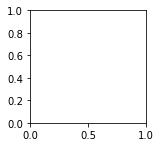

In [35]:
plt.figure(figsize=(12, 12))
for i in range(nrows*ncols):
    ax = plt.subplot(nrows, ncols, i+1)
    plot_image(train_dir, no_mask_images)

# Extracting Features from images

used InceptionV3 model to extract features from the images

In [19]:
def image_feature(direc):
    model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for i in tqdm(direc):
        fname='faces meeting'+'/'+i
        img=image.load_img(fname,target_size=(224,224))
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(i)
    return features,img_name

In [20]:
img_features,img_name=image_feature(no_mask_images)

  0%|                                                                                        | 0/30082 [00:00<?, ?it/s]

1/1 [==============================] - 8s 8s/step


  0%|                                                                             | 1/30082 [00:07<63:39:04,  7.62s/it]

1/1 [==============================] - 0s 28ms/step


  0%|                                                                             | 3/30082 [00:07<16:54:04,  2.02s/it]

1/1 [==============================] - 0s 29ms/step


  0%|                                                                              | 5/30082 [00:07<8:28:23,  1.01s/it]

1/1 [==============================] - 0s 31ms/step


  0%|                                                                              | 7/30082 [00:08<5:07:42,  1.63it/s]

1/1 [==============================] - 0s 23ms/step


  0%|                                                                              | 9/30082 [00:08<3:23:52,  2.46it/s]

1/1 [==============================] - 0s 29ms/step


  0%|                                                                             | 11/30082 [00:08<2:24:12,  3.48it/s]

1/1 [==============================] - 0s 26ms/step


  0%|                                                                             | 13/30082 [00:08<1:46:54,  4.69it/s]

1/1 [==============================] - 0s 23ms/step


  0%|                                                                             | 15/30082 [00:08<1:22:24,  6.08it/s]

1/1 [==============================] - 0s 24ms/step


  0%|                                                                             | 17/30082 [00:08<1:05:57,  7.60it/s]

1/1 [==============================] - 0s 26ms/step


  0%|                                                                               | 19/30082 [00:08<55:03,  9.10it/s]

1/1 [==============================] - 0s 30ms/step


  0%|                                                                               | 21/30082 [00:08<48:38, 10.30it/s]

1/1 [==============================] - 0s 26ms/step


  0%|                                                                               | 23/30082 [00:09<43:57, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


  0%|                                                                               | 25/30082 [00:09<39:56, 12.54it/s]

1/1 [==============================] - 0s 29ms/step


  0%|                                                                               | 27/30082 [00:09<37:56, 13.20it/s]

1/1 [==============================] - 0s 27ms/step


  0%|                                                                               | 29/30082 [00:09<36:19, 13.79it/s]

1/1 [==============================] - 0s 28ms/step


  0%|                                                                               | 31/30082 [00:09<35:27, 14.13it/s]

1/1 [==============================] - 0s 27ms/step


  0%|                                                                               | 33/30082 [00:09<34:56, 14.34it/s]

1/1 [==============================] - 0s 25ms/step


  0%|                                                                               | 35/30082 [00:09<33:56, 14.76it/s]

1/1 [==============================] - 0s 31ms/step


  0%|                                                                               | 37/30082 [00:09<33:45, 14.83it/s]

1/1 [==============================] - 0s 26ms/step


  0%|                                                                               | 39/30082 [00:10<33:11, 15.09it/s]

1/1 [==============================] - 0s 30ms/step


  0%|                                                                               | 41/30082 [00:10<33:06, 15.12it/s]

1/1 [==============================] - 0s 28ms/step


  0%|                                                                               | 43/30082 [00:10<32:47, 15.26it/s]

1/1 [==============================] - 0s 27ms/step


  0%|                                                                               | 45/30082 [00:10<32:14, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


  0%|                                                                               | 47/30082 [00:10<31:39, 15.82it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▏                                                                              | 49/30082 [00:10<31:34, 15.85it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▏                                                                              | 51/30082 [00:10<31:55, 15.67it/s]

1/1 [==============================] - 0s 31ms/step


  0%|▏                                                                              | 53/30082 [00:10<33:58, 14.73it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▏                                                                              | 55/30082 [00:11<33:40, 14.86it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▏                                                                              | 57/30082 [00:11<32:51, 15.23it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▏                                                                              | 59/30082 [00:11<33:12, 15.07it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▏                                                                              | 61/30082 [00:11<33:11, 15.08it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▏                                                                              | 63/30082 [00:11<32:37, 15.33it/s]

1/1 [==============================] - 0s 30ms/step


  0%|▏                                                                              | 65/30082 [00:11<32:38, 15.33it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▏                                                                              | 67/30082 [00:11<32:22, 15.45it/s]

1/1 [==============================] - 0s 24ms/step


  0%|▏                                                                              | 69/30082 [00:12<32:08, 15.56it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▏                                                                              | 71/30082 [00:12<32:35, 15.35it/s]

1/1 [==============================] - 0s 32ms/step


  0%|▏                                                                              | 73/30082 [00:12<32:41, 15.30it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▏                                                                              | 75/30082 [00:12<32:27, 15.41it/s]

1/1 [==============================] - 0s 30ms/step


  0%|▏                                                                              | 77/30082 [00:12<32:26, 15.42it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▏                                                                              | 79/30082 [00:12<32:48, 15.24it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▏                                                                              | 81/30082 [00:12<33:35, 14.89it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▏                                                                              | 83/30082 [00:12<32:58, 15.16it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▏                                                                              | 85/30082 [00:13<32:30, 15.38it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▏                                                                              | 87/30082 [00:13<32:16, 15.49it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▏                                                                              | 89/30082 [00:13<31:59, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▏                                                                              | 91/30082 [00:13<32:00, 15.62it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▏                                                                              | 93/30082 [00:13<31:32, 15.85it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▏                                                                              | 95/30082 [00:13<31:06, 16.06it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▎                                                                              | 97/30082 [00:13<30:58, 16.14it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▎                                                                              | 99/30082 [00:13<31:19, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▎                                                                             | 101/30082 [00:14<31:51, 15.68it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 103/30082 [00:14<31:55, 15.65it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▎                                                                             | 105/30082 [00:14<31:47, 15.72it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 107/30082 [00:14<32:09, 15.54it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▎                                                                             | 109/30082 [00:14<32:13, 15.50it/s]

1/1 [==============================] - 0s 30ms/step


  0%|▎                                                                             | 111/30082 [00:14<33:37, 14.86it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▎                                                                             | 113/30082 [00:14<33:00, 15.14it/s]

1/1 [==============================] - 0s 31ms/step


  0%|▎                                                                             | 115/30082 [00:15<33:04, 15.10it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 117/30082 [00:15<32:31, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▎                                                                             | 119/30082 [00:15<32:55, 15.17it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 121/30082 [00:15<33:10, 15.05it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▎                                                                             | 123/30082 [00:15<33:40, 14.83it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▎                                                                             | 125/30082 [00:15<33:38, 14.84it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 127/30082 [00:15<33:24, 14.94it/s]

1/1 [==============================] - 0s 31ms/step


  0%|▎                                                                             | 129/30082 [00:15<33:49, 14.76it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 131/30082 [00:16<33:22, 14.95it/s]

1/1 [==============================] - 0s 30ms/step


  0%|▎                                                                             | 133/30082 [00:16<33:22, 14.96it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 135/30082 [00:16<33:01, 15.11it/s]

1/1 [==============================] - 0s 24ms/step


  0%|▎                                                                             | 137/30082 [00:16<33:22, 14.95it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▎                                                                             | 139/30082 [00:16<33:24, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▎                                                                             | 141/30082 [00:16<32:41, 15.26it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▎                                                                             | 143/30082 [00:16<32:19, 15.44it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▍                                                                             | 145/30082 [00:16<32:05, 15.55it/s]

1/1 [==============================] - 0s 25ms/step


  0%|▍                                                                             | 147/30082 [00:17<31:28, 15.85it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▍                                                                             | 149/30082 [00:17<31:19, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▍                                                                             | 151/30082 [00:17<30:56, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▍                                                                             | 153/30082 [00:17<31:10, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▍                                                                             | 155/30082 [00:17<31:13, 15.97it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▍                                                                             | 157/30082 [00:17<31:04, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▍                                                                             | 159/30082 [00:17<31:25, 15.87it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▍                                                                             | 161/30082 [00:17<31:25, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▍                                                                             | 163/30082 [00:18<30:45, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▍                                                                             | 165/30082 [00:18<30:01, 16.60it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▍                                                                             | 167/30082 [00:18<30:02, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▍                                                                             | 169/30082 [00:18<30:20, 16.43it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▍                                                                             | 171/30082 [00:18<30:51, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▍                                                                             | 173/30082 [00:18<30:47, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▍                                                                             | 175/30082 [00:18<30:38, 16.27it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▍                                                                             | 177/30082 [00:18<31:24, 15.87it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▍                                                                             | 179/30082 [00:19<32:03, 15.54it/s]

1/1 [==============================] - 0s 36ms/step


  1%|▍                                                                             | 181/30082 [00:19<33:30, 14.87it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▍                                                                             | 183/30082 [00:19<33:59, 14.66it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▍                                                                             | 185/30082 [00:19<34:33, 14.42it/s]

1/1 [==============================] - 0s 37ms/step


  1%|▍                                                                             | 187/30082 [00:19<35:35, 14.00it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▍                                                                             | 189/30082 [00:19<35:38, 13.98it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▍                                                                             | 191/30082 [00:19<34:36, 14.39it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▌                                                                             | 193/30082 [00:20<34:25, 14.47it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                                                             | 195/30082 [00:20<34:20, 14.51it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                                                             | 197/30082 [00:20<35:09, 14.17it/s]

1/1 [==============================] - 0s 47ms/step


  1%|▌                                                                             | 199/30082 [00:20<45:30, 10.94it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▌                                                                             | 201/30082 [00:20<42:21, 11.76it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                                                             | 203/30082 [00:20<40:57, 12.16it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                                                             | 205/30082 [00:21<38:50, 12.82it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▌                                                                             | 207/30082 [00:21<38:24, 12.96it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▌                                                                             | 209/30082 [00:21<37:24, 13.31it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                                                             | 211/30082 [00:21<37:36, 13.24it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                                                             | 213/30082 [00:21<37:14, 13.37it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▌                                                                             | 215/30082 [00:21<38:15, 13.01it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                                                             | 217/30082 [00:21<38:08, 13.05it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▌                                                                             | 219/30082 [00:22<39:18, 12.66it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▌                                                                             | 221/30082 [00:22<42:16, 11.77it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                                                             | 223/30082 [00:22<42:12, 11.79it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                                                             | 225/30082 [00:22<41:38, 11.95it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▌                                                                             | 227/30082 [00:22<39:44, 12.52it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▌                                                                             | 229/30082 [00:22<37:49, 13.16it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▌                                                                             | 231/30082 [00:23<36:36, 13.59it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                                                             | 233/30082 [00:23<36:02, 13.80it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                                                             | 235/30082 [00:23<36:07, 13.77it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▌                                                                             | 237/30082 [00:23<36:29, 13.63it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▌                                                                             | 239/30082 [00:23<36:07, 13.77it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                                                             | 241/30082 [00:23<36:16, 13.71it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▋                                                                             | 243/30082 [00:23<35:35, 13.97it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▋                                                                             | 245/30082 [00:24<35:41, 13.93it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▋                                                                             | 247/30082 [00:24<35:45, 13.90it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▋                                                                             | 249/30082 [00:24<36:30, 13.62it/s]

1/1 [==============================] - 0s 37ms/step


  1%|▋                                                                             | 251/30082 [00:24<38:19, 12.97it/s]

1/1 [==============================] - 0s 38ms/step


  1%|▋                                                                             | 253/30082 [00:24<40:37, 12.24it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▋                                                                             | 255/30082 [00:24<37:55, 13.11it/s]

1/1 [==============================] - 0s 39ms/step


  1%|▋                                                                             | 257/30082 [00:25<39:36, 12.55it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▋                                                                             | 259/30082 [00:25<37:35, 13.22it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▋                                                                             | 261/30082 [00:25<37:38, 13.20it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▋                                                                             | 263/30082 [00:25<36:31, 13.60it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▋                                                                             | 265/30082 [00:25<36:10, 13.74it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▋                                                                             | 267/30082 [00:25<36:15, 13.70it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▋                                                                             | 269/30082 [00:25<36:27, 13.63it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▋                                                                             | 271/30082 [00:26<34:56, 14.22it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▋                                                                             | 273/30082 [00:26<34:23, 14.45it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▋                                                                             | 275/30082 [00:26<35:57, 13.82it/s]

1/1 [==============================] - 0s 36ms/step


  1%|▋                                                                             | 277/30082 [00:26<37:05, 13.39it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▋                                                                             | 279/30082 [00:26<37:32, 13.23it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▋                                                                             | 281/30082 [00:26<37:31, 13.24it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▋                                                                             | 283/30082 [00:26<38:32, 12.88it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▋                                                                             | 285/30082 [00:27<38:09, 13.02it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▋                                                                             | 287/30082 [00:27<37:57, 13.08it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▋                                                                             | 289/30082 [00:27<38:25, 12.92it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▊                                                                             | 291/30082 [00:27<36:48, 13.49it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▊                                                                             | 293/30082 [00:27<36:00, 13.79it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▊                                                                             | 295/30082 [00:27<35:30, 13.98it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▊                                                                             | 297/30082 [00:27<34:32, 14.37it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▊                                                                             | 299/30082 [00:28<33:43, 14.72it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▊                                                                             | 301/30082 [00:28<33:24, 14.86it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▊                                                                             | 303/30082 [00:28<32:26, 15.30it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▊                                                                             | 305/30082 [00:28<32:38, 15.20it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▊                                                                             | 307/30082 [00:28<32:31, 15.26it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▊                                                                             | 309/30082 [00:28<32:42, 15.17it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▊                                                                             | 311/30082 [00:28<32:22, 15.32it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▊                                                                             | 313/30082 [00:29<32:16, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▊                                                                             | 315/30082 [00:29<32:23, 15.32it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▊                                                                             | 317/30082 [00:29<32:22, 15.32it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▊                                                                             | 319/30082 [00:29<32:11, 15.41it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▊                                                                             | 321/30082 [00:29<32:15, 15.38it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▊                                                                             | 323/30082 [00:29<31:43, 15.64it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▊                                                                             | 325/30082 [00:29<32:02, 15.48it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▊                                                                             | 327/30082 [00:29<31:28, 15.76it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▊                                                                             | 329/30082 [00:30<31:31, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▊                                                                             | 331/30082 [00:30<30:52, 16.06it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▊                                                                             | 333/30082 [00:30<31:39, 15.66it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▊                                                                             | 335/30082 [00:30<31:49, 15.58it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▊                                                                             | 337/30082 [00:30<31:25, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▉                                                                             | 339/30082 [00:30<31:10, 15.90it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▉                                                                             | 341/30082 [00:30<31:55, 15.53it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▉                                                                             | 343/30082 [00:30<32:39, 15.18it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▉                                                                             | 345/30082 [00:31<32:50, 15.09it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▉                                                                             | 347/30082 [00:31<33:07, 14.96it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▉                                                                             | 349/30082 [00:31<32:56, 15.04it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▉                                                                             | 351/30082 [00:31<32:42, 15.15it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▉                                                                             | 353/30082 [00:31<32:20, 15.32it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▉                                                                             | 355/30082 [00:31<32:06, 15.43it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▉                                                                             | 357/30082 [00:31<32:51, 15.08it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▉                                                                             | 359/30082 [00:31<32:18, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▉                                                                             | 361/30082 [00:32<30:50, 16.06it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▉                                                                             | 363/30082 [00:32<30:57, 16.00it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▉                                                                             | 365/30082 [00:32<31:26, 15.75it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▉                                                                             | 367/30082 [00:32<31:51, 15.54it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▉                                                                             | 369/30082 [00:32<31:25, 15.76it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▉                                                                             | 371/30082 [00:32<31:23, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▉                                                                             | 373/30082 [00:32<31:31, 15.70it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▉                                                                             | 375/30082 [00:33<32:35, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▉                                                                             | 377/30082 [00:33<31:56, 15.50it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▉                                                                             | 379/30082 [00:33<31:34, 15.68it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▉                                                                             | 381/30082 [00:33<31:35, 15.67it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▉                                                                             | 383/30082 [00:33<32:33, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▉                                                                             | 385/30082 [00:33<32:16, 15.33it/s]

1/1 [==============================] - 0s 29ms/step


  1%|█                                                                             | 387/30082 [00:33<32:09, 15.39it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█                                                                             | 389/30082 [00:33<32:14, 15.35it/s]

1/1 [==============================] - 0s 29ms/step


  1%|█                                                                             | 391/30082 [00:34<32:02, 15.45it/s]

1/1 [==============================] - 0s 29ms/step


  1%|█                                                                             | 393/30082 [00:34<32:18, 15.31it/s]

1/1 [==============================] - 0s 29ms/step


  1%|█                                                                             | 395/30082 [00:34<32:04, 15.43it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█                                                                             | 397/30082 [00:34<31:48, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█                                                                             | 399/30082 [00:34<31:37, 15.64it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█                                                                             | 401/30082 [00:34<31:39, 15.62it/s]

1/1 [==============================] - 0s 27ms/step


  1%|█                                                                             | 403/30082 [00:34<32:06, 15.40it/s]

1/1 [==============================] - 0s 29ms/step


  1%|█                                                                             | 405/30082 [00:34<31:41, 15.60it/s]

1/1 [==============================] - 0s 28ms/step


  1%|█                                                                             | 407/30082 [00:35<31:39, 15.62it/s]

1/1 [==============================] - 0s 28ms/step


  1%|█                                                                             | 409/30082 [00:35<31:38, 15.63it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█                                                                             | 411/30082 [00:35<31:27, 15.72it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█                                                                             | 413/30082 [00:35<32:34, 15.18it/s]

1/1 [==============================] - 0s 28ms/step


  1%|█                                                                             | 415/30082 [00:35<32:02, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


  1%|█                                                                             | 417/30082 [00:35<31:21, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


  1%|█                                                                             | 419/30082 [00:35<30:44, 16.08it/s]

1/1 [==============================] - 0s 31ms/step


  1%|█                                                                             | 421/30082 [00:35<31:10, 15.85it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█                                                                             | 423/30082 [00:36<31:19, 15.78it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█                                                                             | 425/30082 [00:36<31:41, 15.59it/s]

1/1 [==============================] - 0s 27ms/step


  1%|█                                                                             | 427/30082 [00:36<31:02, 15.92it/s]

1/1 [==============================] - 0s 29ms/step


  1%|█                                                                             | 429/30082 [00:36<31:35, 15.65it/s]

1/1 [==============================] - 0s 28ms/step


  1%|█                                                                             | 431/30082 [00:36<31:41, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


  1%|█                                                                             | 433/30082 [00:36<31:45, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█▏                                                                            | 435/30082 [00:36<31:49, 15.53it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█▏                                                                            | 437/30082 [00:36<32:02, 15.42it/s]

1/1 [==============================] - 0s 27ms/step


  1%|█▏                                                                            | 439/30082 [00:37<31:41, 15.59it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█▏                                                                            | 441/30082 [00:37<31:37, 15.62it/s]

1/1 [==============================] - 0s 28ms/step


  1%|█▏                                                                            | 443/30082 [00:37<32:15, 15.31it/s]

1/1 [==============================] - 0s 31ms/step


  1%|█▏                                                                            | 445/30082 [00:37<32:10, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█▏                                                                            | 447/30082 [00:37<31:56, 15.46it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█▏                                                                            | 449/30082 [00:37<32:08, 15.36it/s]

1/1 [==============================] - 0s 31ms/step


  1%|█▏                                                                            | 451/30082 [00:37<32:06, 15.38it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▏                                                                            | 453/30082 [00:38<32:32, 15.17it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 455/30082 [00:38<32:14, 15.32it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▏                                                                            | 457/30082 [00:38<33:10, 14.88it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 459/30082 [00:38<32:45, 15.07it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▏                                                                            | 461/30082 [00:38<33:10, 14.88it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 463/30082 [00:38<32:40, 15.11it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▏                                                                            | 465/30082 [00:38<32:29, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 467/30082 [00:38<32:53, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▏                                                                            | 469/30082 [00:39<32:13, 15.31it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 471/30082 [00:39<31:56, 15.45it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 473/30082 [00:39<31:28, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▏                                                                            | 475/30082 [00:39<30:40, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▏                                                                            | 477/30082 [00:39<30:45, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


  2%|█▏                                                                            | 479/30082 [00:39<30:27, 16.20it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 481/30082 [00:39<31:24, 15.70it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▎                                                                            | 483/30082 [00:39<31:08, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▎                                                                            | 485/30082 [00:40<30:26, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▎                                                                            | 487/30082 [00:40<30:49, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▎                                                                            | 489/30082 [00:40<31:08, 15.84it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▎                                                                            | 491/30082 [00:40<31:20, 15.74it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▎                                                                            | 493/30082 [00:40<31:15, 15.78it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▎                                                                            | 495/30082 [00:40<31:27, 15.68it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▎                                                                            | 497/30082 [00:40<31:25, 15.69it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▎                                                                            | 499/30082 [00:40<32:02, 15.39it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▎                                                                            | 501/30082 [00:41<32:21, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


  2%|█▎                                                                            | 503/30082 [00:41<31:48, 15.50it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▎                                                                            | 505/30082 [00:41<31:48, 15.50it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▎                                                                            | 507/30082 [00:41<31:31, 15.63it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▎                                                                            | 509/30082 [00:41<31:09, 15.82it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▎                                                                            | 511/30082 [00:41<31:46, 15.51it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▎                                                                            | 513/30082 [00:41<31:45, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


  2%|█▎                                                                            | 515/30082 [00:42<31:24, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▎                                                                            | 517/30082 [00:42<31:31, 15.63it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▎                                                                            | 519/30082 [00:42<31:24, 15.69it/s]

1/1 [==============================] - 0s 31ms/step


  2%|█▎                                                                            | 521/30082 [00:42<32:21, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▎                                                                            | 523/30082 [00:42<32:45, 15.04it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▎                                                                            | 525/30082 [00:42<32:33, 15.13it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▎                                                                            | 527/30082 [00:42<31:21, 15.71it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▎                                                                            | 529/30082 [00:42<30:55, 15.93it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 531/30082 [00:43<29:30, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 534/30082 [00:43<27:07, 18.16it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 537/30082 [00:43<25:59, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 540/30082 [00:43<25:30, 19.30it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 543/30082 [00:43<24:53, 19.78it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 545/30082 [00:43<24:50, 19.81it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 548/30082 [00:43<24:27, 20.13it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 551/30082 [00:44<24:31, 20.07it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▍                                                                            | 554/30082 [00:44<24:37, 19.98it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 557/30082 [00:44<24:33, 20.03it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▍                                                                            | 560/30082 [00:44<24:51, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


  2%|█▍                                                                            | 562/30082 [00:44<25:33, 19.26it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▍                                                                            | 564/30082 [00:44<26:33, 18.52it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 566/30082 [00:44<26:41, 18.44it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 569/30082 [00:44<26:27, 18.59it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▍                                                                            | 572/30082 [00:45<25:34, 19.24it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▍                                                                            | 575/30082 [00:45<25:06, 19.59it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▍                                                                            | 577/30082 [00:45<25:15, 19.46it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 579/30082 [00:45<25:25, 19.34it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 582/30082 [00:45<25:00, 19.66it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▌                                                                            | 585/30082 [00:45<24:45, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


  2%|█▌                                                                            | 588/30082 [00:45<24:35, 19.99it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 590/30082 [00:46<24:46, 19.84it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 592/30082 [00:46<24:53, 19.74it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 595/30082 [00:46<24:42, 19.88it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▌                                                                            | 597/30082 [00:46<25:02, 19.62it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 599/30082 [00:46<25:12, 19.49it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 602/30082 [00:46<24:43, 19.87it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▌                                                                            | 604/30082 [00:46<24:54, 19.72it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▌                                                                            | 607/30082 [00:46<24:51, 19.76it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▌                                                                            | 609/30082 [00:46<25:31, 19.24it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▌                                                                            | 612/30082 [00:47<25:03, 19.60it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▌                                                                            | 614/30082 [00:47<25:06, 19.57it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▌                                                                            | 617/30082 [00:47<24:43, 19.87it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▌                                                                            | 619/30082 [00:47<25:01, 19.62it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 621/30082 [00:47<24:59, 19.65it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▌                                                                            | 624/30082 [00:47<24:30, 20.04it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▋                                                                            | 627/30082 [00:47<24:17, 20.21it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 630/30082 [00:48<24:23, 20.12it/s]

1/1 [==============================] - 0s 19ms/step


  2%|█▋                                                                            | 633/30082 [00:48<24:10, 20.30it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 636/30082 [00:48<24:03, 20.40it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▋                                                                            | 639/30082 [00:48<24:14, 20.25it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 642/30082 [00:48<24:08, 20.33it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 645/30082 [00:48<23:55, 20.51it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 648/30082 [00:48<24:14, 20.24it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 651/30082 [00:49<24:05, 20.36it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▋                                                                            | 654/30082 [00:49<24:06, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▋                                                                            | 657/30082 [00:49<24:17, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


  2%|█▋                                                                            | 660/30082 [00:49<25:41, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


  2%|█▋                                                                            | 662/30082 [00:49<26:27, 18.54it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▋                                                                            | 664/30082 [00:49<26:31, 18.49it/s]

1/1 [==============================] - 0s 24ms/step


  2%|█▋                                                                            | 666/30082 [00:49<26:13, 18.69it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▋                                                                            | 668/30082 [00:50<28:08, 17.42it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▋                                                                            | 671/30082 [00:50<26:48, 18.28it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 674/30082 [00:50<26:04, 18.80it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 676/30082 [00:50<25:51, 18.95it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▊                                                                            | 678/30082 [00:50<26:00, 18.84it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▊                                                                            | 680/30082 [00:50<25:41, 19.07it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 683/30082 [00:50<25:05, 19.53it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▊                                                                            | 686/30082 [00:50<25:30, 19.21it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 688/30082 [00:51<25:40, 19.08it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▊                                                                            | 690/30082 [00:51<25:30, 19.21it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▊                                                                            | 692/30082 [00:51<25:32, 19.18it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▊                                                                            | 694/30082 [00:51<25:53, 18.92it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 696/30082 [00:51<25:48, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 698/30082 [00:51<25:34, 19.15it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▊                                                                            | 700/30082 [00:51<25:23, 19.29it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▊                                                                            | 702/30082 [00:51<25:25, 19.26it/s]

1/1 [==============================] - 0s 24ms/step


  2%|█▊                                                                            | 704/30082 [00:51<25:17, 19.35it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▊                                                                            | 706/30082 [00:51<25:53, 18.90it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 708/30082 [00:52<26:01, 18.82it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 710/30082 [00:52<26:09, 18.72it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▊                                                                            | 712/30082 [00:52<25:45, 19.01it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 714/30082 [00:52<25:38, 19.09it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 716/30082 [00:52<25:42, 19.04it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 718/30082 [00:52<25:33, 19.15it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 720/30082 [00:52<25:15, 19.37it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 723/30082 [00:52<25:14, 19.38it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▉                                                                            | 725/30082 [00:52<25:20, 19.31it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▉                                                                            | 727/30082 [00:53<25:19, 19.32it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▉                                                                            | 730/30082 [00:53<24:51, 19.68it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▉                                                                            | 733/30082 [00:53<24:24, 20.03it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▉                                                                            | 735/30082 [00:53<24:49, 19.70it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▉                                                                            | 737/30082 [00:53<24:49, 19.70it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▉                                                                            | 739/30082 [00:53<24:56, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▉                                                                            | 742/30082 [00:53<25:17, 19.33it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▉                                                                            | 745/30082 [00:53<25:03, 19.51it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▉                                                                            | 748/30082 [00:54<24:52, 19.65it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▉                                                                            | 751/30082 [00:54<24:31, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


  3%|█▉                                                                            | 754/30082 [00:54<24:47, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


  3%|█▉                                                                            | 756/30082 [00:54<26:14, 18.63it/s]

1/1 [==============================] - 0s 24ms/step


  3%|█▉                                                                            | 758/30082 [00:54<26:25, 18.50it/s]

1/1 [==============================] - 0s 21ms/step


  3%|█▉                                                                            | 761/30082 [00:54<25:46, 18.96it/s]

1/1 [==============================] - 0s 23ms/step


  3%|█▉                                                                            | 763/30082 [00:54<25:26, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


  3%|█▉                                                                            | 765/30082 [00:55<25:19, 19.29it/s]

1/1 [==============================] - 0s 21ms/step


  3%|█▉                                                                            | 768/30082 [00:55<24:49, 19.68it/s]

1/1 [==============================] - 0s 20ms/step


  3%|█▉                                                                            | 771/30082 [00:55<24:18, 20.10it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 774/30082 [00:55<25:00, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██                                                                            | 776/30082 [00:55<25:18, 19.30it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 779/30082 [00:55<24:47, 19.70it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██                                                                            | 782/30082 [00:55<24:32, 19.89it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██                                                                            | 785/30082 [00:56<24:39, 19.81it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 787/30082 [00:56<35:46, 13.65it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██                                                                            | 789/30082 [00:56<33:26, 14.60it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 792/30082 [00:56<30:01, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 795/30082 [00:56<28:13, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 798/30082 [00:56<26:46, 18.23it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 800/30082 [00:56<26:29, 18.43it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 803/30082 [00:57<25:30, 19.13it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██                                                                            | 805/30082 [00:57<25:20, 19.26it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 807/30082 [00:57<25:31, 19.12it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██                                                                            | 809/30082 [00:57<25:20, 19.25it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██                                                                            | 812/30082 [00:57<24:42, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██                                                                            | 814/30082 [00:57<25:36, 19.05it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 817/30082 [00:57<25:03, 19.46it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 820/30082 [00:57<24:31, 19.89it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 823/30082 [00:58<24:15, 20.10it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▏                                                                           | 826/30082 [00:58<24:54, 19.58it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 829/30082 [00:58<24:37, 19.80it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 832/30082 [00:58<24:20, 20.02it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▏                                                                           | 835/30082 [00:58<24:40, 19.75it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 838/30082 [00:58<24:19, 20.04it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▏                                                                           | 841/30082 [00:59<24:25, 19.96it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 843/30082 [00:59<24:53, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██▏                                                                           | 846/30082 [00:59<24:52, 19.59it/s]

1/1 [==============================] - 0s 29ms/step


  3%|██▏                                                                           | 848/30082 [00:59<26:17, 18.54it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▏                                                                           | 850/30082 [00:59<27:02, 18.02it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▏                                                                           | 852/30082 [00:59<26:26, 18.42it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 854/30082 [00:59<25:59, 18.75it/s]

1/1 [==============================] - 0s 26ms/step


  3%|██▏                                                                           | 857/30082 [00:59<25:30, 19.10it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▏                                                                           | 860/30082 [01:00<24:56, 19.52it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 862/30082 [01:00<24:52, 19.58it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 864/30082 [01:00<25:01, 19.46it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 867/30082 [01:00<24:38, 19.75it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▎                                                                           | 869/30082 [01:00<24:41, 19.72it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 872/30082 [01:00<24:17, 20.04it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▎                                                                           | 874/30082 [01:00<24:28, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██▎                                                                           | 877/30082 [01:00<24:30, 19.86it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 879/30082 [01:01<24:29, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▎                                                                           | 882/30082 [01:01<24:17, 20.04it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 884/30082 [01:01<24:23, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▎                                                                           | 886/30082 [01:01<24:25, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 888/30082 [01:01<24:33, 19.81it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▎                                                                           | 890/30082 [01:01<24:32, 19.83it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 892/30082 [01:01<24:35, 19.78it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▎                                                                           | 895/30082 [01:01<24:08, 20.15it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▎                                                                           | 898/30082 [01:01<24:04, 20.20it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 901/30082 [01:02<24:26, 19.90it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▎                                                                           | 903/30082 [01:02<24:29, 19.85it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▎                                                                           | 905/30082 [01:02<24:42, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██▎                                                                           | 907/30082 [01:02<25:01, 19.44it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 910/30082 [01:02<24:26, 19.89it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▎                                                                           | 912/30082 [01:02<24:24, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 914/30082 [01:02<24:23, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▍                                                                           | 916/30082 [01:02<24:42, 19.67it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▍                                                                           | 918/30082 [01:02<24:56, 19.48it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▍                                                                           | 921/30082 [01:03<24:40, 19.69it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 923/30082 [01:03<24:47, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 926/30082 [01:03<24:17, 20.01it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 928/30082 [01:03<24:21, 19.95it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▍                                                                           | 931/30082 [01:03<24:25, 19.89it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 934/30082 [01:03<24:17, 20.01it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▍                                                                           | 937/30082 [01:03<24:42, 19.66it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 939/30082 [01:04<24:40, 19.68it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 941/30082 [01:04<24:41, 19.67it/s]

1/1 [==============================] - 0s 26ms/step


  3%|██▍                                                                           | 943/30082 [01:04<25:15, 19.22it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▍                                                                           | 945/30082 [01:04<25:59, 18.69it/s]

1/1 [==============================] - 0s 28ms/step


  3%|██▍                                                                           | 947/30082 [01:04<27:06, 17.91it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▍                                                                           | 950/30082 [01:04<25:51, 18.78it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▍                                                                           | 952/30082 [01:04<25:52, 18.77it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▍                                                                           | 955/30082 [01:04<25:13, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 957/30082 [01:04<25:01, 19.40it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▍                                                                           | 960/30082 [01:05<24:34, 19.74it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▍                                                                           | 962/30082 [01:05<24:33, 19.77it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                           | 965/30082 [01:05<24:18, 19.97it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                           | 967/30082 [01:05<24:37, 19.70it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 969/30082 [01:05<24:35, 19.73it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 971/30082 [01:05<24:30, 19.80it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 974/30082 [01:05<24:11, 20.06it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                           | 977/30082 [01:05<24:03, 20.16it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 980/30082 [01:06<24:02, 20.17it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 983/30082 [01:06<23:53, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▌                                                                           | 986/30082 [01:06<24:34, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▌                                                                           | 988/30082 [01:06<24:37, 19.70it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 990/30082 [01:06<24:37, 19.69it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 992/30082 [01:06<24:44, 19.59it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▌                                                                           | 995/30082 [01:06<24:23, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▌                                                                           | 997/30082 [01:07<24:27, 19.81it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                          | 1000/30082 [01:07<24:28, 19.81it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                          | 1002/30082 [01:07<24:58, 19.41it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▌                                                                          | 1004/30082 [01:07<24:50, 19.51it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                          | 1006/30082 [01:07<24:56, 19.43it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▌                                                                          | 1009/30082 [01:07<25:02, 19.35it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                          | 1012/30082 [01:07<24:32, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▌                                                                          | 1015/30082 [01:07<24:19, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▌                                                                          | 1017/30082 [01:08<24:26, 19.82it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                          | 1019/30082 [01:08<25:07, 19.28it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                          | 1022/30082 [01:08<24:43, 19.59it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                          | 1024/30082 [01:08<25:02, 19.34it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▋                                                                          | 1026/30082 [01:08<25:22, 19.08it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▋                                                                          | 1028/30082 [01:08<25:18, 19.13it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▋                                                                          | 1030/30082 [01:08<25:05, 19.30it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▋                                                                          | 1033/30082 [01:08<24:43, 19.58it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▋                                                                          | 1035/30082 [01:08<24:55, 19.42it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▋                                                                          | 1037/30082 [01:09<25:02, 19.34it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▋                                                                          | 1039/30082 [01:09<26:25, 18.32it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▋                                                                          | 1041/30082 [01:09<27:25, 17.65it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▋                                                                          | 1043/30082 [01:09<27:50, 17.39it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▋                                                                          | 1045/30082 [01:09<26:53, 17.99it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▋                                                                          | 1048/30082 [01:09<25:44, 18.80it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▋                                                                          | 1050/30082 [01:09<25:26, 19.02it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▋                                                                          | 1052/30082 [01:09<25:06, 19.27it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1054/30082 [01:09<24:56, 19.39it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1056/30082 [01:10<24:55, 19.40it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1058/30082 [01:10<25:11, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1060/30082 [01:10<25:05, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


  4%|██▋                                                                          | 1063/30082 [01:10<24:49, 19.48it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1066/30082 [01:10<24:16, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1068/30082 [01:10<24:23, 19.83it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▋                                                                          | 1070/30082 [01:10<24:21, 19.85it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1072/30082 [01:10<24:22, 19.84it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1074/30082 [01:10<24:21, 19.85it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▊                                                                          | 1077/30082 [01:11<23:55, 20.20it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▊                                                                          | 1080/30082 [01:11<24:00, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▊                                                                          | 1083/30082 [01:11<23:58, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▊                                                                          | 1086/30082 [01:11<24:36, 19.64it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▊                                                                          | 1088/30082 [01:11<24:38, 19.62it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▊                                                                          | 1090/30082 [01:11<24:37, 19.63it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▊                                                                          | 1093/30082 [01:11<24:35, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▊                                                                          | 1095/30082 [01:12<24:30, 19.71it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▊                                                                          | 1098/30082 [01:12<24:29, 19.73it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██▊                                                                          | 1101/30082 [01:12<24:10, 19.98it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▊                                                                          | 1103/30082 [01:12<24:33, 19.67it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▊                                                                          | 1105/30082 [01:12<24:34, 19.65it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▊                                                                          | 1107/30082 [01:12<24:46, 19.50it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▊                                                                          | 1110/30082 [01:12<24:19, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


  4%|██▊                                                                          | 1112/30082 [01:12<24:20, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▊                                                                          | 1114/30082 [01:13<24:27, 19.73it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▊                                                                          | 1117/30082 [01:13<24:30, 19.69it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██▊                                                                          | 1120/30082 [01:13<24:13, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▊                                                                          | 1122/30082 [01:13<24:20, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


  4%|██▉                                                                          | 1124/30082 [01:13<24:35, 19.63it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1126/30082 [01:13<24:42, 19.53it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1128/30082 [01:13<24:52, 19.39it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1130/30082 [01:13<25:00, 19.30it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██▉                                                                          | 1132/30082 [01:13<25:32, 18.89it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1134/30082 [01:14<25:16, 19.09it/s]

1/1 [==============================] - 0s 25ms/step


  4%|██▉                                                                          | 1136/30082 [01:14<26:09, 18.44it/s]

1/1 [==============================] - 0s 25ms/step


  4%|██▉                                                                          | 1138/30082 [01:14<28:02, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██▉                                                                          | 1140/30082 [01:14<27:26, 17.58it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1142/30082 [01:14<27:34, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▉                                                                          | 1145/30082 [01:14<26:15, 18.37it/s]

1/1 [==============================] - 0s 24ms/step


  4%|██▉                                                                          | 1147/30082 [01:14<26:33, 18.16it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▉                                                                          | 1149/30082 [01:14<26:37, 18.11it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1151/30082 [01:15<26:12, 18.40it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██▉                                                                          | 1154/30082 [01:15<25:16, 19.07it/s]

1/1 [==============================] - 0s 24ms/step


  4%|██▉                                                                          | 1156/30082 [01:15<25:36, 18.83it/s]

1/1 [==============================] - 0s 26ms/step


  4%|██▉                                                                          | 1158/30082 [01:15<25:57, 18.57it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1160/30082 [01:15<25:58, 18.56it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▉                                                                          | 1162/30082 [01:15<25:39, 18.78it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1165/30082 [01:15<24:46, 19.45it/s]

1/1 [==============================] - 0s 26ms/step


  4%|██▉                                                                          | 1167/30082 [01:15<26:24, 18.25it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██▉                                                                          | 1170/30082 [01:16<25:46, 18.70it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1173/30082 [01:16<25:23, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1176/30082 [01:16<24:56, 19.31it/s]

1/1 [==============================] - 0s 24ms/step


  4%|███                                                                          | 1179/30082 [01:16<24:52, 19.37it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███                                                                          | 1181/30082 [01:16<24:46, 19.44it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1184/30082 [01:16<24:27, 19.69it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███                                                                          | 1186/30082 [01:16<24:22, 19.76it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1189/30082 [01:16<24:07, 19.96it/s]

1/1 [==============================] - 0s 22ms/step


  4%|███                                                                          | 1191/30082 [01:17<24:07, 19.96it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1194/30082 [01:17<23:56, 20.11it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1197/30082 [01:17<24:04, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


  4%|███                                                                          | 1199/30082 [01:17<24:10, 19.91it/s]

1/1 [==============================] - 0s 19ms/step


  4%|███                                                                          | 1202/30082 [01:17<23:55, 20.12it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1205/30082 [01:17<24:03, 20.01it/s]

1/1 [==============================] - 0s 22ms/step


  4%|███                                                                          | 1207/30082 [01:17<24:06, 19.96it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███                                                                          | 1210/30082 [01:18<23:56, 20.09it/s]

1/1 [==============================] - 0s 22ms/step


  4%|███                                                                          | 1213/30082 [01:18<24:07, 19.95it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1215/30082 [01:18<24:24, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


  4%|███                                                                          | 1218/30082 [01:18<24:14, 19.85it/s]

1/1 [==============================] - 0s 22ms/step


  4%|███                                                                          | 1220/30082 [01:18<24:14, 19.84it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███▏                                                                         | 1222/30082 [01:18<24:11, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


  4%|███▏                                                                         | 1224/30082 [01:18<24:29, 19.64it/s]

1/1 [==============================] - 0s 31ms/step


  4%|███▏                                                                         | 1226/30082 [01:18<29:54, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▏                                                                         | 1228/30082 [01:19<30:31, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▏                                                                         | 1230/30082 [01:19<31:36, 15.21it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1232/30082 [01:19<31:36, 15.21it/s]

1/1 [==============================] - 0s 34ms/step


  4%|███▏                                                                         | 1234/30082 [01:19<32:55, 14.60it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1236/30082 [01:19<33:06, 14.52it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1238/30082 [01:19<34:19, 14.00it/s]

1/1 [==============================] - 0s 34ms/step


  4%|███▏                                                                         | 1240/30082 [01:19<34:16, 14.02it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1242/30082 [01:20<34:16, 14.03it/s]

1/1 [==============================] - 0s 30ms/step


  4%|███▏                                                                         | 1244/30082 [01:20<34:10, 14.06it/s]

1/1 [==============================] - 0s 23ms/step


  4%|███▏                                                                         | 1246/30082 [01:20<33:03, 14.54it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▏                                                                         | 1248/30082 [01:20<32:47, 14.65it/s]

1/1 [==============================] - 0s 32ms/step


  4%|███▏                                                                         | 1250/30082 [01:20<32:30, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1252/30082 [01:20<32:39, 14.71it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▏                                                                         | 1254/30082 [01:20<33:04, 14.52it/s]

1/1 [==============================] - 0s 28ms/step


  4%|███▏                                                                         | 1256/30082 [01:20<33:06, 14.51it/s]

1/1 [==============================] - 0s 30ms/step


  4%|███▏                                                                         | 1258/30082 [01:21<32:32, 14.76it/s]

1/1 [==============================] - 0s 24ms/step


  4%|███▏                                                                         | 1260/30082 [01:21<32:04, 14.98it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1262/30082 [01:21<31:26, 15.27it/s]

1/1 [==============================] - 0s 24ms/step


  4%|███▏                                                                         | 1264/30082 [01:21<32:02, 14.99it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1266/30082 [01:21<31:27, 15.27it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▏                                                                         | 1268/30082 [01:21<30:54, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


  4%|███▎                                                                         | 1270/30082 [01:21<30:51, 15.57it/s]

1/1 [==============================] - 0s 32ms/step


  4%|███▎                                                                         | 1272/30082 [01:22<31:21, 15.31it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1274/30082 [01:22<31:19, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1276/30082 [01:22<31:49, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


  4%|███▎                                                                         | 1278/30082 [01:22<31:07, 15.42it/s]

1/1 [==============================] - 0s 31ms/step


  4%|███▎                                                                         | 1280/30082 [01:22<31:26, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


  4%|███▎                                                                         | 1282/30082 [01:22<30:36, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1284/30082 [01:22<30:35, 15.69it/s]

1/1 [==============================] - 0s 31ms/step


  4%|███▎                                                                         | 1286/30082 [01:22<30:23, 15.79it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▎                                                                         | 1288/30082 [01:23<30:36, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


  4%|███▎                                                                         | 1290/30082 [01:23<30:07, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


  4%|███▎                                                                         | 1292/30082 [01:23<30:06, 15.94it/s]

1/1 [==============================] - 0s 28ms/step


  4%|███▎                                                                         | 1294/30082 [01:23<31:09, 15.40it/s]

1/1 [==============================] - 0s 30ms/step


  4%|███▎                                                                         | 1296/30082 [01:23<31:14, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1298/30082 [01:23<31:14, 15.35it/s]

1/1 [==============================] - 0s 28ms/step


  4%|███▎                                                                         | 1300/30082 [01:23<30:47, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▎                                                                         | 1302/30082 [01:23<30:42, 15.62it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███▎                                                                         | 1304/30082 [01:24<30:41, 15.63it/s]

1/1 [==============================] - 0s 28ms/step


  4%|███▎                                                                         | 1306/30082 [01:24<31:30, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▎                                                                         | 1308/30082 [01:24<31:55, 15.02it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1310/30082 [01:24<31:55, 15.02it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▎                                                                         | 1312/30082 [01:24<31:13, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1314/30082 [01:24<30:32, 15.70it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▎                                                                         | 1316/30082 [01:24<30:03, 15.95it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1318/30082 [01:24<29:54, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▍                                                                         | 1320/30082 [01:25<29:47, 16.09it/s]

1/1 [==============================] - 0s 30ms/step


  4%|███▍                                                                         | 1322/30082 [01:25<31:20, 15.29it/s]

1/1 [==============================] - 0s 25ms/step


  4%|███▍                                                                         | 1324/30082 [01:25<31:08, 15.39it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▍                                                                         | 1326/30082 [01:25<31:25, 15.25it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▍                                                                         | 1328/30082 [01:25<31:10, 15.37it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▍                                                                         | 1330/30082 [01:25<30:19, 15.80it/s]

1/1 [==============================] - 0s 35ms/step


  4%|███▍                                                                         | 1332/30082 [01:25<32:43, 14.64it/s]

1/1 [==============================] - 0s 31ms/step


  4%|███▍                                                                         | 1334/30082 [01:26<32:49, 14.60it/s]

1/1 [==============================] - 0s 25ms/step


  4%|███▍                                                                         | 1336/30082 [01:26<32:07, 14.92it/s]

1/1 [==============================] - 0s 30ms/step


  4%|███▍                                                                         | 1338/30082 [01:26<31:51, 15.04it/s]

1/1 [==============================] - 0s 31ms/step


  4%|███▍                                                                         | 1340/30082 [01:26<32:12, 14.88it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▍                                                                         | 1342/30082 [01:26<32:21, 14.80it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▍                                                                         | 1344/30082 [01:26<32:15, 14.85it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▍                                                                         | 1346/30082 [01:26<31:53, 15.02it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▍                                                                         | 1348/30082 [01:26<31:49, 15.05it/s]

1/1 [==============================] - 0s 30ms/step


  4%|███▍                                                                         | 1350/30082 [01:27<32:04, 14.93it/s]

1/1 [==============================] - 0s 31ms/step


  4%|███▍                                                                         | 1352/30082 [01:27<33:50, 14.15it/s]

1/1 [==============================] - 0s 35ms/step


  5%|███▍                                                                         | 1354/30082 [01:27<35:20, 13.55it/s]

1/1 [==============================] - 0s 38ms/step


  5%|███▍                                                                         | 1356/30082 [01:27<38:27, 12.45it/s]

1/1 [==============================] - 0s 42ms/step


  5%|███▍                                                                         | 1358/30082 [01:27<43:15, 11.07it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▍                                                                         | 1360/30082 [01:28<41:10, 11.62it/s]

1/1 [==============================] - 0s 37ms/step


  5%|███▍                                                                         | 1362/30082 [01:28<40:41, 11.76it/s]

1/1 [==============================] - 0s 34ms/step


  5%|███▍                                                                         | 1364/30082 [01:28<40:43, 11.75it/s]

1/1 [==============================] - 0s 34ms/step


  5%|███▍                                                                         | 1366/30082 [01:28<40:12, 11.90it/s]

1/1 [==============================] - 0s 35ms/step


  5%|███▌                                                                         | 1368/30082 [01:28<40:23, 11.85it/s]

1/1 [==============================] - 0s 35ms/step


  5%|███▌                                                                         | 1370/30082 [01:28<40:28, 11.82it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▌                                                                         | 1372/30082 [01:29<40:32, 11.80it/s]

1/1 [==============================] - 0s 41ms/step


  5%|███▌                                                                         | 1374/30082 [01:29<40:47, 11.73it/s]

1/1 [==============================] - 0s 35ms/step


  5%|███▌                                                                         | 1376/30082 [01:29<39:48, 12.02it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▌                                                                         | 1378/30082 [01:29<37:42, 12.69it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▌                                                                         | 1380/30082 [01:29<36:12, 13.21it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▌                                                                         | 1382/30082 [01:29<35:40, 13.41it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▌                                                                         | 1384/30082 [01:29<35:36, 13.43it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▌                                                                         | 1386/30082 [01:30<35:20, 13.53it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▌                                                                         | 1388/30082 [01:30<34:49, 13.73it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▌                                                                         | 1390/30082 [01:30<36:01, 13.27it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▌                                                                         | 1392/30082 [01:30<35:39, 13.41it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▌                                                                         | 1394/30082 [01:30<35:49, 13.35it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▌                                                                         | 1396/30082 [01:30<35:40, 13.40it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▌                                                                         | 1398/30082 [01:30<36:36, 13.06it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▌                                                                         | 1400/30082 [01:31<36:50, 12.98it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███▌                                                                         | 1402/30082 [01:31<36:44, 13.01it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███▌                                                                         | 1404/30082 [01:31<35:02, 13.64it/s]

1/1 [==============================] - 0s 36ms/step


  5%|███▌                                                                         | 1406/30082 [01:31<34:47, 13.74it/s]

1/1 [==============================] - 0s 34ms/step


  5%|███▌                                                                         | 1408/30082 [01:31<38:37, 12.37it/s]

1/1 [==============================] - 0s 25ms/step


  5%|███▌                                                                         | 1410/30082 [01:31<37:12, 12.84it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▌                                                                         | 1412/30082 [01:32<36:56, 12.93it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▌                                                                         | 1414/30082 [01:32<37:03, 12.89it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███▌                                                                         | 1416/30082 [01:32<35:06, 13.61it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▋                                                                         | 1418/30082 [01:32<33:53, 14.09it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▋                                                                         | 1420/30082 [01:32<32:02, 14.91it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███▋                                                                         | 1422/30082 [01:32<30:13, 15.80it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▋                                                                         | 1424/30082 [01:32<30:16, 15.78it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███▋                                                                         | 1426/30082 [01:32<31:56, 14.95it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▋                                                                         | 1428/30082 [01:33<31:45, 15.03it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███▋                                                                         | 1430/30082 [01:33<31:29, 15.17it/s]

1/1 [==============================] - 0s 35ms/step


  5%|███▋                                                                         | 1432/30082 [01:33<33:53, 14.09it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▋                                                                         | 1434/30082 [01:33<34:51, 13.70it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███▋                                                                         | 1436/30082 [01:33<35:03, 13.62it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▋                                                                         | 1438/30082 [01:33<34:00, 14.04it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▋                                                                         | 1440/30082 [01:33<33:35, 14.21it/s]

1/1 [==============================] - 0s 31ms/step


  5%|███▋                                                                         | 1442/30082 [01:34<34:04, 14.01it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▋                                                                         | 1444/30082 [01:34<34:28, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▋                                                                         | 1446/30082 [01:34<34:27, 13.85it/s]

1/1 [==============================] - 0s 28ms/step


  5%|███▋                                                                         | 1448/30082 [01:34<33:46, 14.13it/s]

1/1 [==============================] - 0s 28ms/step


  5%|███▋                                                                         | 1450/30082 [01:34<33:19, 14.32it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▋                                                                         | 1452/30082 [01:34<34:31, 13.82it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▋                                                                         | 1454/30082 [01:34<35:19, 13.51it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▋                                                                         | 1456/30082 [01:35<35:30, 13.44it/s]

1/1 [==============================] - 0s 36ms/step


  5%|███▋                                                                         | 1458/30082 [01:35<36:16, 13.15it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▋                                                                         | 1460/30082 [01:35<36:20, 13.13it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▋                                                                         | 1462/30082 [01:35<35:53, 13.29it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▋                                                                         | 1464/30082 [01:35<35:47, 13.33it/s]

1/1 [==============================] - 0s 34ms/step


  5%|███▊                                                                         | 1466/30082 [01:35<34:35, 13.79it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███▊                                                                         | 1468/30082 [01:36<34:47, 13.71it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▊                                                                         | 1470/30082 [01:36<35:02, 13.61it/s]

1/1 [==============================] - 0s 24ms/step


  5%|███▊                                                                         | 1472/30082 [01:36<35:09, 13.56it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▊                                                                         | 1474/30082 [01:36<33:38, 14.17it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▊                                                                         | 1476/30082 [01:36<32:24, 14.71it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▊                                                                         | 1478/30082 [01:36<33:10, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▊                                                                         | 1480/30082 [01:36<33:23, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▊                                                                         | 1482/30082 [01:37<33:41, 14.15it/s]

1/1 [==============================] - 0s 34ms/step


  5%|███▊                                                                         | 1484/30082 [01:37<33:35, 14.19it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▊                                                                         | 1486/30082 [01:37<34:13, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


  5%|███▊                                                                         | 1488/30082 [01:37<36:03, 13.22it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▊                                                                         | 1490/30082 [01:37<35:12, 13.53it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███▊                                                                         | 1492/30082 [01:37<34:02, 14.00it/s]

1/1 [==============================] - 0s 25ms/step


  5%|███▊                                                                         | 1494/30082 [01:37<32:02, 14.87it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███▊                                                                         | 1496/30082 [01:37<30:01, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███▊                                                                         | 1498/30082 [01:38<29:03, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▊                                                                         | 1500/30082 [01:38<27:44, 17.18it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▊                                                                         | 1502/30082 [01:38<26:49, 17.76it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███▊                                                                         | 1504/30082 [01:38<26:11, 18.19it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▊                                                                         | 1506/30082 [01:38<26:04, 18.26it/s]

1/1 [==============================] - 0s 25ms/step


  5%|███▊                                                                         | 1508/30082 [01:38<27:58, 17.03it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███▊                                                                         | 1510/30082 [01:38<28:31, 16.69it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███▊                                                                         | 1512/30082 [01:38<29:24, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


  5%|███▉                                                                         | 1514/30082 [01:39<29:31, 16.13it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▉                                                                         | 1516/30082 [01:39<29:57, 15.89it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▉                                                                         | 1518/30082 [01:39<31:54, 14.92it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▉                                                                         | 1520/30082 [01:39<32:14, 14.76it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▉                                                                         | 1522/30082 [01:39<32:23, 14.70it/s]

1/1 [==============================] - 0s 24ms/step


  5%|███▉                                                                         | 1524/30082 [01:39<31:19, 15.19it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███▉                                                                         | 1526/30082 [01:39<31:12, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


  5%|███▉                                                                         | 1528/30082 [01:39<31:13, 15.24it/s]

1/1 [==============================] - 0s 28ms/step


  5%|███▉                                                                         | 1530/30082 [01:40<32:14, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███▉                                                                         | 1532/30082 [01:40<31:19, 15.19it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▉                                                                         | 1534/30082 [01:40<29:53, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███▉                                                                         | 1536/30082 [01:40<28:10, 16.89it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▉                                                                         | 1538/30082 [01:40<27:39, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███▉                                                                         | 1540/30082 [01:40<26:29, 17.95it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███▉                                                                         | 1542/30082 [01:40<26:00, 18.28it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▉                                                                         | 1544/30082 [01:40<25:29, 18.66it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███▉                                                                         | 1546/30082 [01:40<25:53, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▉                                                                         | 1548/30082 [01:41<25:31, 18.63it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███▉                                                                         | 1551/30082 [01:41<24:41, 19.26it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███▉                                                                         | 1554/30082 [01:41<24:09, 19.68it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▉                                                                         | 1556/30082 [01:41<24:33, 19.36it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███▉                                                                         | 1559/30082 [01:41<24:07, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███▉                                                                         | 1562/30082 [01:41<23:51, 19.92it/s]

1/1 [==============================] - 0s 22ms/step


  5%|████                                                                         | 1564/30082 [01:41<23:52, 19.90it/s]

1/1 [==============================] - 0s 35ms/step


  5%|████                                                                         | 1566/30082 [01:42<27:17, 17.42it/s]

1/1 [==============================] - 0s 36ms/step


  5%|████                                                                         | 1568/30082 [01:42<30:24, 15.63it/s]

1/1 [==============================] - 0s 40ms/step


  5%|████                                                                         | 1570/30082 [01:42<32:20, 14.69it/s]

1/1 [==============================] - 0s 45ms/step


  5%|████                                                                         | 1572/30082 [01:42<36:38, 12.97it/s]

1/1 [==============================] - 0s 38ms/step


  5%|████                                                                         | 1574/30082 [01:42<39:45, 11.95it/s]

1/1 [==============================] - 0s 26ms/step


  5%|████                                                                         | 1576/30082 [01:42<40:48, 11.64it/s]

1/1 [==============================] - 0s 28ms/step


  5%|████                                                                         | 1578/30082 [01:43<37:43, 12.59it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████                                                                         | 1580/30082 [01:43<34:42, 13.68it/s]

1/1 [==============================] - 0s 25ms/step


  5%|████                                                                         | 1582/30082 [01:43<32:33, 14.59it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████                                                                         | 1584/30082 [01:43<31:10, 15.23it/s]

1/1 [==============================] - 0s 28ms/step


  5%|████                                                                         | 1586/30082 [01:43<31:02, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████                                                                         | 1588/30082 [01:43<30:08, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████                                                                         | 1590/30082 [01:43<29:11, 16.26it/s]

1/1 [==============================] - 0s 25ms/step


  5%|████                                                                         | 1592/30082 [01:43<28:48, 16.48it/s]

1/1 [==============================] - 0s 32ms/step


  5%|████                                                                         | 1594/30082 [01:44<29:02, 16.35it/s]

1/1 [==============================] - 0s 28ms/step


  5%|████                                                                         | 1596/30082 [01:44<30:06, 15.76it/s]

1/1 [==============================] - 0s 41ms/step


  5%|████                                                                         | 1598/30082 [01:44<32:02, 14.82it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████                                                                         | 1600/30082 [01:44<31:57, 14.86it/s]

1/1 [==============================] - 0s 28ms/step


  5%|████                                                                         | 1602/30082 [01:44<31:28, 15.08it/s]

1/1 [==============================] - 0s 26ms/step


  5%|████                                                                         | 1604/30082 [01:44<30:13, 15.70it/s]

1/1 [==============================] - 0s 27ms/step


  5%|████                                                                         | 1606/30082 [01:44<30:00, 15.81it/s]

1/1 [==============================] - 0s 27ms/step


  5%|████                                                                         | 1608/30082 [01:44<29:27, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████                                                                         | 1610/30082 [01:45<28:52, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████▏                                                                        | 1612/30082 [01:45<28:34, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1614/30082 [01:45<28:16, 16.78it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1616/30082 [01:45<28:26, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1618/30082 [01:45<28:15, 16.78it/s]

1/1 [==============================] - 0s 28ms/step


  5%|████▏                                                                        | 1620/30082 [01:45<28:00, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████▏                                                                        | 1622/30082 [01:45<27:43, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████▏                                                                        | 1624/30082 [01:45<27:18, 17.37it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1626/30082 [01:45<27:49, 17.04it/s]

1/1 [==============================] - 0s 28ms/step


  5%|████▏                                                                        | 1628/30082 [01:46<27:51, 17.03it/s]

1/1 [==============================] - 0s 25ms/step


  5%|████▏                                                                        | 1630/30082 [01:46<27:56, 16.97it/s]

1/1 [==============================] - 0s 26ms/step


  5%|████▏                                                                        | 1632/30082 [01:46<27:43, 17.10it/s]

1/1 [==============================] - 0s 31ms/step


  5%|████▏                                                                        | 1634/30082 [01:46<28:10, 16.83it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1636/30082 [01:46<28:16, 16.77it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1638/30082 [01:46<27:59, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1640/30082 [01:46<27:58, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


  5%|████▏                                                                        | 1642/30082 [01:46<28:04, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1644/30082 [01:47<27:58, 16.95it/s]

1/1 [==============================] - 0s 26ms/step


  5%|████▏                                                                        | 1646/30082 [01:47<28:10, 16.82it/s]

1/1 [==============================] - 0s 26ms/step


  5%|████▏                                                                        | 1648/30082 [01:47<28:12, 16.80it/s]

1/1 [==============================] - 0s 25ms/step


  5%|████▏                                                                        | 1650/30082 [01:47<27:51, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1652/30082 [01:47<27:56, 16.96it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1654/30082 [01:47<27:18, 17.35it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▏                                                                        | 1656/30082 [01:47<26:19, 17.99it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▏                                                                        | 1659/30082 [01:47<25:08, 18.84it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1662/30082 [01:48<24:28, 19.35it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1665/30082 [01:48<24:27, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▎                                                                        | 1667/30082 [01:48<24:26, 19.38it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████▎                                                                        | 1670/30082 [01:48<24:01, 19.71it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▎                                                                        | 1672/30082 [01:48<24:18, 19.48it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████▎                                                                        | 1675/30082 [01:48<23:54, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▎                                                                        | 1677/30082 [01:48<23:53, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▎                                                                        | 1680/30082 [01:48<23:41, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▎                                                                        | 1682/30082 [01:49<24:19, 19.46it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▎                                                                        | 1684/30082 [01:49<25:30, 18.55it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▎                                                                        | 1686/30082 [01:49<26:47, 17.67it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1688/30082 [01:49<25:58, 18.22it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1690/30082 [01:49<25:25, 18.61it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▎                                                                        | 1692/30082 [01:49<25:16, 18.73it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1694/30082 [01:49<25:15, 18.73it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▎                                                                        | 1696/30082 [01:49<24:49, 19.06it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▎                                                                        | 1698/30082 [01:49<24:29, 19.31it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▎                                                                        | 1700/30082 [01:50<24:24, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▎                                                                        | 1702/30082 [01:50<24:22, 19.41it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1704/30082 [01:50<24:43, 19.14it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▎                                                                        | 1706/30082 [01:50<24:29, 19.32it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1709/30082 [01:50<24:22, 19.40it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▍                                                                        | 1712/30082 [01:50<24:04, 19.65it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▍                                                                        | 1714/30082 [01:50<24:16, 19.48it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1716/30082 [01:50<24:08, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▍                                                                        | 1719/30082 [01:50<24:04, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▍                                                                        | 1721/30082 [01:51<24:12, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▍                                                                        | 1723/30082 [01:51<24:05, 19.62it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1725/30082 [01:51<24:06, 19.61it/s]

1/1 [==============================] - 0s 32ms/step


  6%|████▍                                                                        | 1728/30082 [01:51<24:20, 19.41it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1730/30082 [01:51<24:13, 19.50it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1733/30082 [01:51<24:08, 19.57it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1736/30082 [01:51<23:56, 19.73it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1739/30082 [01:51<23:48, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▍                                                                        | 1741/30082 [01:52<23:49, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▍                                                                        | 1743/30082 [01:52<24:15, 19.47it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1745/30082 [01:52<24:18, 19.43it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▍                                                                        | 1747/30082 [01:52<24:28, 19.30it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1749/30082 [01:52<24:27, 19.31it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1751/30082 [01:52<25:53, 18.24it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1753/30082 [01:52<25:43, 18.36it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1755/30082 [01:52<25:16, 18.68it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1757/30082 [01:52<25:14, 18.70it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▌                                                                        | 1759/30082 [01:53<25:03, 18.84it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▌                                                                        | 1762/30082 [01:53<24:21, 19.38it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▌                                                                        | 1764/30082 [01:53<24:12, 19.49it/s]

1/1 [==============================] - 0s 33ms/step


  6%|████▌                                                                        | 1767/30082 [01:53<25:12, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▌                                                                        | 1769/30082 [01:53<26:55, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▌                                                                        | 1771/30082 [01:53<26:02, 18.12it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▌                                                                        | 1773/30082 [01:53<27:08, 17.38it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▌                                                                        | 1775/30082 [01:53<26:44, 17.64it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▌                                                                        | 1777/30082 [01:54<27:00, 17.47it/s]

1/1 [==============================] - 0s 31ms/step


  6%|████▌                                                                        | 1779/30082 [01:54<27:42, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▌                                                                        | 1781/30082 [01:54<27:01, 17.45it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▌                                                                        | 1783/30082 [01:54<26:26, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▌                                                                        | 1785/30082 [01:54<25:43, 18.34it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▌                                                                        | 1787/30082 [01:54<25:21, 18.59it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▌                                                                        | 1789/30082 [01:54<25:44, 18.32it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▌                                                                        | 1791/30082 [01:54<26:01, 18.12it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▌                                                                        | 1793/30082 [01:54<27:11, 17.34it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▌                                                                        | 1795/30082 [01:55<26:41, 17.66it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▌                                                                        | 1797/30082 [01:55<25:57, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▌                                                                        | 1799/30082 [01:55<25:18, 18.62it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▌                                                                        | 1801/30082 [01:55<25:10, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▌                                                                        | 1803/30082 [01:55<25:40, 18.36it/s]

1/1 [==============================] - 0s 31ms/step


  6%|████▌                                                                        | 1805/30082 [01:55<26:18, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▋                                                                        | 1807/30082 [01:55<25:50, 18.24it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▋                                                                        | 1809/30082 [01:55<26:03, 18.09it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1811/30082 [01:55<26:08, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▋                                                                        | 1813/30082 [01:56<25:57, 18.16it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▋                                                                        | 1815/30082 [01:56<25:48, 18.25it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1817/30082 [01:56<25:12, 18.69it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1819/30082 [01:56<25:00, 18.84it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▋                                                                        | 1821/30082 [01:56<25:06, 18.76it/s]

1/1 [==============================] - 0s 30ms/step


  6%|████▋                                                                        | 1823/30082 [01:56<26:01, 18.10it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▋                                                                        | 1825/30082 [01:56<26:07, 18.02it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▋                                                                        | 1827/30082 [01:56<25:31, 18.45it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1829/30082 [01:56<25:33, 18.42it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▋                                                                        | 1831/30082 [01:57<26:04, 18.06it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1833/30082 [01:57<26:34, 17.72it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▋                                                                        | 1835/30082 [01:57<26:28, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1837/30082 [01:57<26:44, 17.61it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▋                                                                        | 1839/30082 [01:57<26:38, 17.67it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1841/30082 [01:57<27:26, 17.16it/s]

1/1 [==============================] - 0s 29ms/step


  6%|████▋                                                                        | 1843/30082 [01:57<27:47, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1845/30082 [01:57<26:36, 17.68it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▋                                                                        | 1847/30082 [01:57<26:58, 17.45it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▋                                                                        | 1849/30082 [01:58<27:28, 17.12it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▋                                                                        | 1851/30082 [01:58<27:51, 16.89it/s]

1/1 [==============================] - 0s 28ms/step


  6%|████▋                                                                        | 1853/30082 [01:58<27:40, 17.00it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▋                                                                        | 1855/30082 [01:58<27:29, 17.11it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▊                                                                        | 1857/30082 [01:58<26:54, 17.48it/s]

1/1 [==============================] - 0s 28ms/step


  6%|████▊                                                                        | 1859/30082 [01:58<26:55, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▊                                                                        | 1861/30082 [01:58<26:56, 17.45it/s]

1/1 [==============================] - 0s 29ms/step


  6%|████▊                                                                        | 1863/30082 [01:58<28:06, 16.73it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▊                                                                        | 1865/30082 [01:59<29:16, 16.06it/s]

1/1 [==============================] - 0s 28ms/step


  6%|████▊                                                                        | 1867/30082 [01:59<29:39, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▊                                                                        | 1869/30082 [01:59<28:22, 16.57it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▊                                                                        | 1871/30082 [01:59<28:27, 16.52it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▊                                                                        | 1873/30082 [01:59<27:40, 16.99it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▊                                                                        | 1875/30082 [01:59<27:21, 17.19it/s]

1/1 [==============================] - 0s 29ms/step


  6%|████▊                                                                        | 1877/30082 [01:59<27:14, 17.26it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▊                                                                        | 1879/30082 [01:59<26:59, 17.41it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▊                                                                        | 1881/30082 [02:00<46:13, 10.17it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▊                                                                        | 1883/30082 [02:00<40:41, 11.55it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▊                                                                        | 1885/30082 [02:00<36:31, 12.86it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▊                                                                        | 1887/30082 [02:00<33:04, 14.20it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▊                                                                        | 1889/30082 [02:00<30:22, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▊                                                                        | 1891/30082 [02:00<29:22, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▊                                                                        | 1893/30082 [02:00<27:49, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▊                                                                        | 1895/30082 [02:01<26:57, 17.42it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▊                                                                        | 1897/30082 [02:01<26:30, 17.72it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▊                                                                        | 1899/30082 [02:01<27:04, 17.35it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▊                                                                        | 1901/30082 [02:01<27:22, 17.16it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▊                                                                        | 1903/30082 [02:01<26:55, 17.44it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▉                                                                        | 1905/30082 [02:01<26:37, 17.64it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▉                                                                        | 1907/30082 [02:01<26:39, 17.62it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▉                                                                        | 1909/30082 [02:01<26:45, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▉                                                                        | 1911/30082 [02:01<27:06, 17.32it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▉                                                                        | 1913/30082 [02:02<26:56, 17.43it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▉                                                                        | 1915/30082 [02:02<26:36, 17.65it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▉                                                                        | 1917/30082 [02:02<26:41, 17.58it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▉                                                                        | 1919/30082 [02:02<26:45, 17.54it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▉                                                                        | 1921/30082 [02:02<27:16, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▉                                                                        | 1923/30082 [02:02<27:21, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▉                                                                        | 1925/30082 [02:02<27:15, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▉                                                                        | 1927/30082 [02:02<26:51, 17.47it/s]

1/1 [==============================] - 0s 41ms/step


  6%|████▉                                                                        | 1929/30082 [02:03<30:31, 15.37it/s]

1/1 [==============================] - 0s 39ms/step


  6%|████▉                                                                        | 1931/30082 [02:03<33:15, 14.11it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▉                                                                        | 1933/30082 [02:03<33:30, 14.00it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▉                                                                        | 1935/30082 [02:03<31:40, 14.81it/s]

1/1 [==============================] - 0s 29ms/step


  6%|████▉                                                                        | 1937/30082 [02:03<31:47, 14.76it/s]

1/1 [==============================] - 0s 30ms/step


  6%|████▉                                                                        | 1939/30082 [02:03<32:16, 14.53it/s]

1/1 [==============================] - 0s 46ms/step


  6%|████▉                                                                        | 1941/30082 [02:03<35:28, 13.22it/s]

1/1 [==============================] - 0s 47ms/step


  6%|████▉                                                                        | 1943/30082 [02:04<39:11, 11.96it/s]

1/1 [==============================] - 0s 42ms/step


  6%|████▉                                                                        | 1945/30082 [02:04<41:11, 11.38it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▉                                                                        | 1947/30082 [02:04<39:04, 12.00it/s]

1/1 [==============================] - 0s 30ms/step


  6%|████▉                                                                        | 1949/30082 [02:04<37:26, 12.52it/s]

1/1 [==============================] - 0s 36ms/step


  6%|████▉                                                                        | 1951/30082 [02:04<38:52, 12.06it/s]

1/1 [==============================] - 0s 29ms/step


  6%|████▉                                                                        | 1953/30082 [02:04<38:08, 12.29it/s]

1/1 [==============================] - 0s 36ms/step


  6%|█████                                                                        | 1955/30082 [02:05<36:26, 12.86it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████                                                                        | 1957/30082 [02:05<34:32, 13.57it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████                                                                        | 1959/30082 [02:05<33:53, 13.83it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████                                                                        | 1961/30082 [02:05<33:06, 14.16it/s]

1/1 [==============================] - 0s 31ms/step


  7%|█████                                                                        | 1963/30082 [02:05<32:30, 14.42it/s]

1/1 [==============================] - 0s 31ms/step


  7%|█████                                                                        | 1965/30082 [02:05<32:16, 14.52it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████                                                                        | 1967/30082 [02:05<32:10, 14.56it/s]

1/1 [==============================] - 0s 34ms/step


  7%|█████                                                                        | 1969/30082 [02:06<32:31, 14.40it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████                                                                        | 1971/30082 [02:06<31:53, 14.69it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████                                                                        | 1973/30082 [02:06<31:37, 14.81it/s]

1/1 [==============================] - 0s 31ms/step


  7%|█████                                                                        | 1975/30082 [02:06<31:35, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████                                                                        | 1977/30082 [02:06<31:33, 14.84it/s]

1/1 [==============================] - 0s 32ms/step


  7%|█████                                                                        | 1979/30082 [02:06<32:04, 14.60it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████                                                                        | 1981/30082 [02:06<31:32, 14.85it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████                                                                        | 1983/30082 [02:06<31:02, 15.09it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████                                                                        | 1985/30082 [02:07<30:47, 15.21it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████                                                                        | 1987/30082 [02:07<30:13, 15.49it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████                                                                        | 1989/30082 [02:07<30:21, 15.42it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████                                                                        | 1991/30082 [02:07<30:36, 15.29it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████                                                                        | 1993/30082 [02:07<30:27, 15.37it/s]

1/1 [==============================] - 0s 31ms/step


  7%|█████                                                                        | 1995/30082 [02:07<30:39, 15.27it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████                                                                        | 1997/30082 [02:07<30:01, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████                                                                        | 1999/30082 [02:07<29:47, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████                                                                        | 2001/30082 [02:08<29:34, 15.82it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████▏                                                                       | 2003/30082 [02:08<29:27, 15.89it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▏                                                                       | 2005/30082 [02:08<29:38, 15.79it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2007/30082 [02:08<30:06, 15.54it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2009/30082 [02:08<29:36, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████▏                                                                       | 2011/30082 [02:08<29:16, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████▏                                                                       | 2013/30082 [02:08<29:12, 16.01it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▏                                                                       | 2015/30082 [02:08<29:34, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2017/30082 [02:09<30:18, 15.43it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████▏                                                                       | 2019/30082 [02:09<29:52, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▏                                                                       | 2021/30082 [02:09<29:39, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2023/30082 [02:09<29:17, 15.97it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▏                                                                       | 2025/30082 [02:09<29:19, 15.95it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▏                                                                       | 2027/30082 [02:09<29:35, 15.80it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▏                                                                       | 2029/30082 [02:09<29:31, 15.84it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2031/30082 [02:09<29:16, 15.97it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▏                                                                       | 2033/30082 [02:10<29:11, 16.01it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▏                                                                       | 2035/30082 [02:10<29:19, 15.94it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▏                                                                       | 2037/30082 [02:10<29:42, 15.73it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2039/30082 [02:10<29:21, 15.92it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▏                                                                       | 2041/30082 [02:10<29:24, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2043/30082 [02:10<29:27, 15.86it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2045/30082 [02:10<29:26, 15.87it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▏                                                                       | 2047/30082 [02:10<29:59, 15.58it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▏                                                                       | 2049/30082 [02:11<29:15, 15.97it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▏                                                                       | 2051/30082 [02:11<29:13, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▎                                                                       | 2053/30082 [02:11<29:16, 15.96it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2055/30082 [02:11<29:08, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▎                                                                       | 2057/30082 [02:11<29:30, 15.83it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▎                                                                       | 2059/30082 [02:11<29:31, 15.82it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2061/30082 [02:11<29:16, 15.96it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▎                                                                       | 2063/30082 [02:11<29:00, 16.10it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▎                                                                       | 2065/30082 [02:12<29:00, 16.09it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2067/30082 [02:12<29:18, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2069/30082 [02:12<28:42, 16.27it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▎                                                                       | 2071/30082 [02:12<28:56, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2073/30082 [02:12<28:58, 16.11it/s]

1/1 [==============================] - 0s 38ms/step


  7%|█████▎                                                                       | 2075/30082 [02:12<30:02, 15.53it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2077/30082 [02:12<29:56, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▎                                                                       | 2079/30082 [02:13<29:57, 15.57it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▎                                                                       | 2081/30082 [02:13<29:46, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2083/30082 [02:13<29:33, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▎                                                                       | 2085/30082 [02:13<29:45, 15.68it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▎                                                                       | 2087/30082 [02:13<29:46, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2089/30082 [02:13<29:30, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▎                                                                       | 2091/30082 [02:13<29:31, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▎                                                                       | 2093/30082 [02:13<29:38, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████▎                                                                       | 2095/30082 [02:14<29:29, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▎                                                                       | 2097/30082 [02:14<29:27, 15.83it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2099/30082 [02:14<29:11, 15.97it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▍                                                                       | 2101/30082 [02:14<29:05, 16.03it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▍                                                                       | 2103/30082 [02:14<28:52, 16.15it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2105/30082 [02:14<29:08, 16.00it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████▍                                                                       | 2107/30082 [02:14<29:32, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▍                                                                       | 2109/30082 [02:14<29:07, 16.00it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2111/30082 [02:15<29:35, 15.75it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▍                                                                       | 2113/30082 [02:15<29:38, 15.72it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▍                                                                       | 2115/30082 [02:15<30:15, 15.40it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▍                                                                       | 2117/30082 [02:15<29:53, 15.60it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2119/30082 [02:15<30:03, 15.51it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2121/30082 [02:15<29:50, 15.62it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▍                                                                       | 2123/30082 [02:15<29:51, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▍                                                                       | 2125/30082 [02:15<29:58, 15.54it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2127/30082 [02:16<29:59, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████▍                                                                       | 2129/30082 [02:16<29:29, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▍                                                                       | 2131/30082 [02:16<29:12, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2133/30082 [02:16<29:11, 15.96it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2135/30082 [02:16<29:40, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▍                                                                       | 2137/30082 [02:16<29:18, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▍                                                                       | 2139/30082 [02:16<29:24, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▍                                                                       | 2141/30082 [02:16<28:46, 16.18it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▍                                                                       | 2143/30082 [02:17<28:59, 16.06it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▍                                                                       | 2145/30082 [02:17<29:05, 16.00it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2147/30082 [02:17<29:01, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▌                                                                       | 2149/30082 [02:17<29:01, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▌                                                                       | 2151/30082 [02:17<29:00, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████▌                                                                       | 2153/30082 [02:17<28:45, 16.19it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▌                                                                       | 2155/30082 [02:17<29:23, 15.84it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▌                                                                       | 2157/30082 [02:17<29:03, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████▌                                                                       | 2159/30082 [02:18<28:53, 16.11it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▌                                                                       | 2161/30082 [02:18<29:05, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▌                                                                       | 2163/30082 [02:18<29:28, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▌                                                                       | 2165/30082 [02:18<29:55, 15.55it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▌                                                                       | 2167/30082 [02:18<29:35, 15.73it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▌                                                                       | 2169/30082 [02:18<29:33, 15.74it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▌                                                                       | 2171/30082 [02:18<29:26, 15.80it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2173/30082 [02:18<29:57, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▌                                                                       | 2175/30082 [02:19<29:18, 15.87it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2177/30082 [02:19<29:03, 16.01it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▌                                                                       | 2179/30082 [02:19<28:29, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2181/30082 [02:19<28:29, 16.32it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▌                                                                       | 2183/30082 [02:19<28:47, 16.15it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2185/30082 [02:19<28:42, 16.20it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2187/30082 [02:19<28:39, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▌                                                                       | 2189/30082 [02:19<28:44, 16.17it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2191/30082 [02:20<28:40, 16.21it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▌                                                                       | 2193/30082 [02:20<28:57, 16.05it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▌                                                                       | 2195/30082 [02:20<28:47, 16.14it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2197/30082 [02:20<28:27, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████▋                                                                       | 2199/30082 [02:20<28:08, 16.51it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▋                                                                       | 2201/30082 [02:20<28:15, 16.45it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2203/30082 [02:20<28:43, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2205/30082 [02:20<28:40, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▋                                                                       | 2207/30082 [02:21<28:58, 16.04it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2209/30082 [02:21<29:22, 15.82it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2211/30082 [02:21<29:00, 16.02it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2213/30082 [02:21<29:12, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2215/30082 [02:21<28:53, 16.07it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2217/30082 [02:21<28:29, 16.30it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▋                                                                       | 2219/30082 [02:21<28:26, 16.33it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▋                                                                       | 2221/30082 [02:21<28:24, 16.35it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████▋                                                                       | 2223/30082 [02:22<28:34, 16.25it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2225/30082 [02:22<28:40, 16.19it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2227/30082 [02:22<28:18, 16.40it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2229/30082 [02:22<28:23, 16.35it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2231/30082 [02:22<28:29, 16.29it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2233/30082 [02:22<28:47, 16.12it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2235/30082 [02:22<28:36, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▋                                                                       | 2237/30082 [02:22<28:37, 16.21it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▋                                                                       | 2239/30082 [02:23<29:49, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2241/30082 [02:23<29:35, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████▋                                                                       | 2243/30082 [02:23<29:32, 15.70it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2245/30082 [02:23<28:57, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▊                                                                       | 2247/30082 [02:23<28:40, 16.18it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████▊                                                                       | 2249/30082 [02:23<28:38, 16.19it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▊                                                                       | 2251/30082 [02:23<29:52, 15.53it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▊                                                                       | 2253/30082 [02:23<29:41, 15.62it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▊                                                                       | 2255/30082 [02:24<29:26, 15.76it/s]

1/1 [==============================] - 0s 28ms/step


  8%|█████▊                                                                       | 2257/30082 [02:24<29:17, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▊                                                                       | 2259/30082 [02:24<29:12, 15.87it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2261/30082 [02:24<29:26, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▊                                                                       | 2263/30082 [02:24<29:05, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


  8%|█████▊                                                                       | 2265/30082 [02:24<28:39, 16.17it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2267/30082 [02:24<28:33, 16.23it/s]

1/1 [==============================] - 0s 28ms/step


  8%|█████▊                                                                       | 2269/30082 [02:24<28:44, 16.13it/s]

1/1 [==============================] - 0s 28ms/step


  8%|█████▊                                                                       | 2271/30082 [02:25<28:56, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2273/30082 [02:25<28:55, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


  8%|█████▊                                                                       | 2275/30082 [02:25<28:43, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2277/30082 [02:25<28:38, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▊                                                                       | 2279/30082 [02:25<28:18, 16.37it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2281/30082 [02:25<28:36, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2283/30082 [02:25<28:35, 16.21it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2285/30082 [02:25<28:34, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


  8%|█████▊                                                                       | 2287/30082 [02:26<28:37, 16.18it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2289/30082 [02:26<28:26, 16.29it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▊                                                                       | 2291/30082 [02:26<28:36, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


  8%|█████▊                                                                       | 2293/30082 [02:26<28:24, 16.31it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▊                                                                       | 2295/30082 [02:26<28:27, 16.27it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▉                                                                       | 2297/30082 [02:26<28:28, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


  8%|█████▉                                                                       | 2299/30082 [02:26<28:19, 16.35it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▉                                                                       | 2301/30082 [02:26<28:55, 16.01it/s]

1/1 [==============================] - 0s 30ms/step


  8%|█████▉                                                                       | 2303/30082 [02:27<29:02, 15.94it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▉                                                                       | 2305/30082 [02:27<28:59, 15.97it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▉                                                                       | 2307/30082 [02:27<29:08, 15.88it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▉                                                                       | 2309/30082 [02:27<28:42, 16.13it/s]

1/1 [==============================] - 0s 28ms/step


  8%|█████▉                                                                       | 2311/30082 [02:27<29:47, 15.54it/s]

1/1 [==============================] - 0s 28ms/step


  8%|█████▉                                                                       | 2313/30082 [02:27<29:40, 15.60it/s]

1/1 [==============================] - 0s 31ms/step


  8%|█████▉                                                                       | 2315/30082 [02:27<30:31, 15.16it/s]

1/1 [==============================] - 0s 39ms/step


  8%|█████▉                                                                       | 2317/30082 [02:27<32:19, 14.31it/s]

1/1 [==============================] - 0s 34ms/step


  8%|█████▉                                                                       | 2319/30082 [02:28<34:51, 13.27it/s]

1/1 [==============================] - 0s 35ms/step


  8%|█████▉                                                                       | 2321/30082 [02:28<38:39, 11.97it/s]

1/1 [==============================] - 0s 35ms/step


  8%|█████▉                                                                       | 2323/30082 [02:28<37:16, 12.41it/s]

1/1 [==============================] - 0s 35ms/step


  8%|█████▉                                                                       | 2325/30082 [02:28<37:41, 12.27it/s]

1/1 [==============================] - 0s 33ms/step


  8%|█████▉                                                                       | 2327/30082 [02:28<37:27, 12.35it/s]

1/1 [==============================] - 0s 30ms/step


  8%|█████▉                                                                       | 2329/30082 [02:28<38:49, 11.91it/s]

1/1 [==============================] - 0s 35ms/step


  8%|█████▉                                                                       | 2331/30082 [02:29<38:51, 11.90it/s]

1/1 [==============================] - 0s 31ms/step


  8%|█████▉                                                                       | 2333/30082 [02:29<37:48, 12.23it/s]

1/1 [==============================] - 0s 30ms/step


  8%|█████▉                                                                       | 2335/30082 [02:29<36:54, 12.53it/s]

1/1 [==============================] - 0s 33ms/step


  8%|█████▉                                                                       | 2337/30082 [02:29<36:51, 12.55it/s]

1/1 [==============================] - 0s 33ms/step


  8%|█████▉                                                                       | 2339/30082 [02:29<36:16, 12.75it/s]

1/1 [==============================] - 0s 30ms/step


  8%|█████▉                                                                       | 2341/30082 [02:29<35:31, 13.02it/s]

1/1 [==============================] - 0s 34ms/step


  8%|█████▉                                                                       | 2343/30082 [02:30<35:39, 12.97it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████                                                                       | 2345/30082 [02:30<35:33, 13.00it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████                                                                       | 2347/30082 [02:30<35:29, 13.02it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████                                                                       | 2349/30082 [02:30<35:37, 12.97it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████                                                                       | 2351/30082 [02:30<34:58, 13.21it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████                                                                       | 2353/30082 [02:30<34:39, 13.33it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████                                                                       | 2355/30082 [02:30<34:58, 13.21it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████                                                                       | 2357/30082 [02:31<34:25, 13.42it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████                                                                       | 2359/30082 [02:31<34:42, 13.31it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████                                                                       | 2361/30082 [02:31<34:32, 13.38it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████                                                                       | 2363/30082 [02:31<34:22, 13.44it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████                                                                       | 2365/30082 [02:31<34:00, 13.59it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████                                                                       | 2367/30082 [02:31<34:03, 13.56it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████                                                                       | 2369/30082 [02:32<36:04, 12.80it/s]

1/1 [==============================] - 0s 35ms/step


  8%|██████                                                                       | 2371/30082 [02:32<36:02, 12.81it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████                                                                       | 2373/30082 [02:32<34:48, 13.27it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████                                                                       | 2375/30082 [02:32<34:32, 13.37it/s]

1/1 [==============================] - 0s 34ms/step


  8%|██████                                                                       | 2377/30082 [02:32<34:31, 13.37it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████                                                                       | 2379/30082 [02:32<34:21, 13.44it/s]

1/1 [==============================] - 0s 35ms/step


  8%|██████                                                                       | 2381/30082 [02:32<35:17, 13.08it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████                                                                       | 2383/30082 [02:33<34:31, 13.37it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████                                                                       | 2385/30082 [02:33<33:08, 13.93it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████                                                                       | 2387/30082 [02:33<32:11, 14.34it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████                                                                       | 2389/30082 [02:33<32:06, 14.37it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████                                                                       | 2391/30082 [02:33<31:53, 14.47it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▏                                                                      | 2393/30082 [02:33<31:57, 14.44it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▏                                                                      | 2395/30082 [02:33<31:32, 14.63it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▏                                                                      | 2397/30082 [02:34<31:05, 14.84it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▏                                                                      | 2399/30082 [02:34<31:04, 14.85it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▏                                                                      | 2401/30082 [02:34<30:23, 15.18it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▏                                                                      | 2403/30082 [02:34<30:03, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▏                                                                      | 2405/30082 [02:34<29:14, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▏                                                                      | 2407/30082 [02:34<29:38, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▏                                                                      | 2409/30082 [02:34<29:34, 15.59it/s]

1/1 [==============================] - 0s 33ms/step


  8%|██████▏                                                                      | 2411/30082 [02:34<30:21, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▏                                                                      | 2413/30082 [02:35<30:35, 15.07it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▏                                                                      | 2415/30082 [02:35<30:17, 15.22it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▏                                                                      | 2417/30082 [02:35<30:37, 15.06it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▏                                                                      | 2419/30082 [02:35<30:24, 15.16it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▏                                                                      | 2421/30082 [02:35<30:39, 15.03it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████▏                                                                      | 2423/30082 [02:35<30:44, 14.99it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▏                                                                      | 2425/30082 [02:35<30:04, 15.32it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████▏                                                                      | 2427/30082 [02:35<30:38, 15.04it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▏                                                                      | 2429/30082 [02:36<30:39, 15.04it/s]

1/1 [==============================] - 0s 24ms/step


  8%|██████▏                                                                      | 2431/30082 [02:36<30:09, 15.28it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▏                                                                      | 2433/30082 [02:36<30:01, 15.35it/s]

1/1 [==============================] - 0s 23ms/step


  8%|██████▏                                                                      | 2435/30082 [02:36<29:07, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▏                                                                      | 2437/30082 [02:36<28:23, 16.23it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▏                                                                      | 2439/30082 [02:36<27:49, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▏                                                                      | 2441/30082 [02:36<28:06, 16.39it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▎                                                                      | 2443/30082 [02:36<28:18, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▎                                                                      | 2445/30082 [02:37<26:58, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▎                                                                      | 2447/30082 [02:37<27:00, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


  8%|██████▎                                                                      | 2449/30082 [02:37<26:11, 17.58it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▎                                                                      | 2451/30082 [02:37<26:34, 17.33it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▎                                                                      | 2453/30082 [02:37<25:51, 17.81it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▎                                                                      | 2455/30082 [02:37<25:38, 17.95it/s]

1/1 [==============================] - 0s 23ms/step


  8%|██████▎                                                                      | 2457/30082 [02:37<26:05, 17.64it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▎                                                                      | 2459/30082 [02:37<26:23, 17.45it/s]

1/1 [==============================] - 0s 23ms/step


  8%|██████▎                                                                      | 2461/30082 [02:37<26:19, 17.49it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████▎                                                                      | 2463/30082 [02:38<28:02, 16.42it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▎                                                                      | 2465/30082 [02:38<30:08, 15.27it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▎                                                                      | 2467/30082 [02:38<31:09, 14.77it/s]

1/1 [==============================] - 0s 35ms/step


  8%|██████▎                                                                      | 2469/30082 [02:38<32:44, 14.06it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████▎                                                                      | 2471/30082 [02:38<33:47, 13.62it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▎                                                                      | 2473/30082 [02:38<33:45, 13.63it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▎                                                                      | 2475/30082 [02:39<33:08, 13.88it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▎                                                                      | 2477/30082 [02:39<32:54, 13.98it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▎                                                                      | 2479/30082 [02:39<32:10, 14.30it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████▎                                                                      | 2481/30082 [02:39<33:27, 13.75it/s]

1/1 [==============================] - 0s 24ms/step


  8%|██████▎                                                                      | 2483/30082 [02:39<32:29, 14.16it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▎                                                                      | 2485/30082 [02:39<32:47, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


  8%|██████▎                                                                      | 2487/30082 [02:39<33:01, 13.93it/s]

1/1 [==============================] - 0s 35ms/step


  8%|██████▎                                                                      | 2489/30082 [02:40<33:08, 13.88it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▍                                                                      | 2491/30082 [02:40<32:22, 14.21it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▍                                                                      | 2493/30082 [02:40<32:14, 14.26it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▍                                                                      | 2495/30082 [02:40<31:31, 14.58it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▍                                                                      | 2497/30082 [02:40<31:47, 14.46it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▍                                                                      | 2499/30082 [02:40<30:47, 14.93it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▍                                                                      | 2501/30082 [02:40<31:20, 14.67it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▍                                                                      | 2503/30082 [02:40<31:41, 14.51it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████▍                                                                      | 2505/30082 [02:41<31:31, 14.58it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▍                                                                      | 2507/30082 [02:41<31:35, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▍                                                                      | 2509/30082 [02:41<31:45, 14.47it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▍                                                                      | 2511/30082 [02:41<31:10, 14.74it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▍                                                                      | 2513/30082 [02:41<31:06, 14.77it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▍                                                                      | 2515/30082 [02:41<31:11, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▍                                                                      | 2517/30082 [02:41<30:22, 15.12it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▍                                                                      | 2519/30082 [02:42<31:44, 14.47it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▍                                                                      | 2521/30082 [02:42<31:27, 14.60it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▍                                                                      | 2523/30082 [02:42<30:27, 15.08it/s]

1/1 [==============================] - 0s 34ms/step


  8%|██████▍                                                                      | 2525/30082 [02:42<31:42, 14.49it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▍                                                                      | 2527/30082 [02:42<31:03, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▍                                                                      | 2529/30082 [02:42<31:00, 14.81it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▍                                                                      | 2531/30082 [02:42<30:55, 14.85it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▍                                                                      | 2533/30082 [02:43<32:21, 14.19it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▍                                                                      | 2535/30082 [02:43<32:50, 13.98it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▍                                                                      | 2537/30082 [02:43<31:14, 14.70it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▍                                                                      | 2539/30082 [02:43<30:07, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


  8%|██████▌                                                                      | 2541/30082 [02:43<29:04, 15.79it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▌                                                                      | 2543/30082 [02:43<28:27, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▌                                                                      | 2545/30082 [02:43<27:46, 16.52it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▌                                                                      | 2547/30082 [02:43<27:27, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▌                                                                      | 2549/30082 [02:43<27:56, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▌                                                                      | 2551/30082 [02:44<27:13, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▌                                                                      | 2553/30082 [02:44<26:43, 17.17it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▌                                                                      | 2555/30082 [02:44<27:23, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▌                                                                      | 2557/30082 [02:44<27:43, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


  9%|██████▌                                                                      | 2559/30082 [02:44<26:37, 17.23it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▌                                                                      | 2561/30082 [02:44<26:47, 17.12it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▌                                                                      | 2563/30082 [02:44<26:25, 17.35it/s]

1/1 [==============================] - 0s 32ms/step


  9%|██████▌                                                                      | 2565/30082 [02:44<27:46, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▌                                                                      | 2567/30082 [02:45<28:19, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▌                                                                      | 2569/30082 [02:45<28:14, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▌                                                                      | 2571/30082 [02:45<27:02, 16.96it/s]

1/1 [==============================] - 0s 34ms/step


  9%|██████▌                                                                      | 2573/30082 [02:45<27:34, 16.62it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▌                                                                      | 2575/30082 [02:45<27:31, 16.65it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▌                                                                      | 2577/30082 [02:45<26:43, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▌                                                                      | 2579/30082 [02:45<27:02, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


  9%|██████▌                                                                      | 2581/30082 [02:45<26:25, 17.35it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▌                                                                      | 2583/30082 [02:45<26:25, 17.34it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▌                                                                      | 2585/30082 [02:46<26:35, 17.24it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▌                                                                      | 2587/30082 [02:46<27:05, 16.91it/s]

1/1 [==============================] - 0s 33ms/step


  9%|██████▋                                                                      | 2589/30082 [02:46<27:33, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▋                                                                      | 2591/30082 [02:46<26:58, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


  9%|██████▋                                                                      | 2593/30082 [02:46<26:26, 17.33it/s]

1/1 [==============================] - 0s 30ms/step


  9%|██████▋                                                                      | 2595/30082 [02:46<26:51, 17.06it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▋                                                                      | 2597/30082 [02:46<26:55, 17.01it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▋                                                                      | 2599/30082 [02:46<26:39, 17.19it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▋                                                                      | 2601/30082 [02:47<26:48, 17.08it/s]

1/1 [==============================] - 0s 29ms/step


  9%|██████▋                                                                      | 2603/30082 [02:47<26:37, 17.20it/s]

1/1 [==============================] - 0s 29ms/step


  9%|██████▋                                                                      | 2605/30082 [02:47<27:09, 16.86it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▋                                                                      | 2607/30082 [02:47<27:48, 16.46it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▋                                                                      | 2609/30082 [02:47<28:28, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▋                                                                      | 2611/30082 [02:47<28:39, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▋                                                                      | 2613/30082 [02:47<28:23, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


  9%|██████▋                                                                      | 2615/30082 [02:47<28:13, 16.22it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▋                                                                      | 2617/30082 [02:48<28:13, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▋                                                                      | 2619/30082 [02:48<27:52, 16.42it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▋                                                                      | 2621/30082 [02:48<28:26, 16.09it/s]

1/1 [==============================] - 0s 32ms/step


  9%|██████▋                                                                      | 2623/30082 [02:48<29:26, 15.55it/s]

1/1 [==============================] - 0s 30ms/step


  9%|██████▋                                                                      | 2625/30082 [02:48<31:01, 14.75it/s]

1/1 [==============================] - 0s 30ms/step


  9%|██████▋                                                                      | 2627/30082 [02:48<32:01, 14.29it/s]

1/1 [==============================] - 0s 30ms/step


  9%|██████▋                                                                      | 2629/30082 [02:48<32:11, 14.21it/s]

1/1 [==============================] - 0s 32ms/step


  9%|██████▋                                                                      | 2631/30082 [02:49<33:01, 13.85it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▋                                                                      | 2633/30082 [02:49<33:15, 13.76it/s]

1/1 [==============================] - 0s 25ms/step


  9%|██████▋                                                                      | 2635/30082 [02:49<32:53, 13.91it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▋                                                                      | 2637/30082 [02:49<32:03, 14.27it/s]

1/1 [==============================] - 0s 32ms/step


  9%|██████▊                                                                      | 2639/30082 [02:49<31:32, 14.50it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▊                                                                      | 2641/30082 [02:49<31:32, 14.50it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▊                                                                      | 2643/30082 [02:49<31:40, 14.44it/s]

1/1 [==============================] - 0s 29ms/step


  9%|██████▊                                                                      | 2645/30082 [02:50<32:21, 14.13it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2647/30082 [02:50<32:09, 14.22it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▊                                                                      | 2649/30082 [02:50<31:20, 14.59it/s]

1/1 [==============================] - 0s 33ms/step


  9%|██████▊                                                                      | 2651/30082 [02:50<30:54, 14.79it/s]

1/1 [==============================] - 0s 25ms/step


  9%|██████▊                                                                      | 2653/30082 [02:50<30:25, 15.02it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▊                                                                      | 2655/30082 [02:50<30:33, 14.96it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▊                                                                      | 2657/30082 [02:50<30:34, 14.95it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▊                                                                      | 2659/30082 [02:50<31:29, 14.52it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2661/30082 [02:51<31:55, 14.32it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2663/30082 [02:51<32:06, 14.23it/s]

1/1 [==============================] - 0s 29ms/step


  9%|██████▊                                                                      | 2665/30082 [02:51<32:08, 14.21it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▊                                                                      | 2667/30082 [02:51<31:39, 14.44it/s]

1/1 [==============================] - 0s 30ms/step


  9%|██████▊                                                                      | 2669/30082 [02:51<31:11, 14.65it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2671/30082 [02:51<30:25, 15.02it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2673/30082 [02:51<31:02, 14.72it/s]

1/1 [==============================] - 0s 29ms/step


  9%|██████▊                                                                      | 2675/30082 [02:52<31:45, 14.38it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2677/30082 [02:52<32:09, 14.20it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▊                                                                      | 2679/30082 [02:52<31:36, 14.45it/s]

1/1 [==============================] - 0s 32ms/step


  9%|██████▊                                                                      | 2681/30082 [02:52<31:51, 14.34it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2683/30082 [02:52<31:39, 14.42it/s]

1/1 [==============================] - 0s 29ms/step


  9%|██████▊                                                                      | 2685/30082 [02:52<31:29, 14.50it/s]

1/1 [==============================] - 0s 34ms/step


  9%|██████▉                                                                      | 2687/30082 [02:52<32:08, 14.20it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▉                                                                      | 2689/30082 [02:53<31:50, 14.34it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▉                                                                      | 2691/30082 [02:53<31:48, 14.35it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▉                                                                      | 2693/30082 [02:53<30:11, 15.12it/s]

1/1 [==============================] - 0s 25ms/step


  9%|██████▉                                                                      | 2695/30082 [02:53<28:45, 15.87it/s]

1/1 [==============================] - 0s 32ms/step


  9%|██████▉                                                                      | 2697/30082 [02:53<29:26, 15.50it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▉                                                                      | 2699/30082 [02:53<29:46, 15.33it/s]

1/1 [==============================] - 0s 25ms/step


  9%|██████▉                                                                      | 2701/30082 [02:53<28:41, 15.91it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▉                                                                      | 2703/30082 [02:53<28:31, 15.99it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▉                                                                      | 2705/30082 [02:54<27:41, 16.48it/s]

1/1 [==============================] - 0s 25ms/step


  9%|██████▉                                                                      | 2707/30082 [02:54<27:50, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


  9%|██████▉                                                                      | 2709/30082 [02:54<26:39, 17.12it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▉                                                                      | 2711/30082 [02:54<26:11, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▉                                                                      | 2713/30082 [02:54<26:13, 17.39it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▉                                                                      | 2715/30082 [02:54<27:12, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▉                                                                      | 2717/30082 [02:54<27:04, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▉                                                                      | 2719/30082 [02:54<27:11, 16.77it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▉                                                                      | 2721/30082 [02:54<26:56, 16.93it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▉                                                                      | 2723/30082 [02:55<27:48, 16.40it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▉                                                                      | 2725/30082 [02:55<28:19, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▉                                                                      | 2727/30082 [02:55<27:55, 16.32it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▉                                                                      | 2729/30082 [02:55<27:33, 16.55it/s]

1/1 [==============================] - 0s 30ms/step


  9%|██████▉                                                                      | 2731/30082 [02:55<28:07, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▉                                                                      | 2733/30082 [02:55<27:44, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


  9%|███████                                                                      | 2735/30082 [02:55<27:28, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


  9%|███████                                                                      | 2737/30082 [02:55<26:18, 17.32it/s]

1/1 [==============================] - 0s 24ms/step


  9%|███████                                                                      | 2739/30082 [02:56<26:21, 17.29it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███████                                                                      | 2741/30082 [02:56<26:41, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███████                                                                      | 2743/30082 [02:56<26:01, 17.51it/s]

1/1 [==============================] - 0s 24ms/step


  9%|███████                                                                      | 2745/30082 [02:56<25:51, 17.62it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███████                                                                      | 2747/30082 [02:56<25:36, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


  9%|███████                                                                      | 2749/30082 [02:56<25:20, 17.97it/s]

1/1 [==============================] - 0s 24ms/step


  9%|███████                                                                      | 2751/30082 [02:56<26:10, 17.40it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███████                                                                      | 2753/30082 [02:56<25:38, 17.76it/s]

1/1 [==============================] - 0s 26ms/step


  9%|███████                                                                      | 2755/30082 [02:56<26:21, 17.28it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███████                                                                      | 2757/30082 [02:57<27:30, 16.55it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███████                                                                      | 2759/30082 [02:57<28:09, 16.17it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███████                                                                      | 2761/30082 [02:57<28:49, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


  9%|███████                                                                      | 2763/30082 [02:57<28:42, 15.86it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███████                                                                      | 2765/30082 [02:57<28:52, 15.77it/s]

1/1 [==============================] - 0s 26ms/step


  9%|███████                                                                      | 2767/30082 [02:57<29:02, 15.68it/s]

1/1 [==============================] - 0s 26ms/step


  9%|███████                                                                      | 2769/30082 [02:57<29:09, 15.62it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███████                                                                      | 2771/30082 [02:57<30:01, 15.16it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███████                                                                      | 2773/30082 [02:58<29:05, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


  9%|███████                                                                      | 2775/30082 [02:58<28:26, 16.00it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███████                                                                      | 2777/30082 [02:58<30:56, 14.71it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████                                                                      | 2779/30082 [02:58<32:07, 14.17it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████                                                                      | 2781/30082 [02:58<33:27, 13.60it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████                                                                      | 2783/30082 [02:58<34:19, 13.26it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███████▏                                                                     | 2785/30082 [02:59<34:53, 13.04it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████▏                                                                     | 2787/30082 [02:59<34:48, 13.07it/s]

1/1 [==============================] - 0s 38ms/step


  9%|███████▏                                                                     | 2789/30082 [02:59<36:20, 12.51it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███████▏                                                                     | 2791/30082 [02:59<37:16, 12.20it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███████▏                                                                     | 2793/30082 [02:59<36:17, 12.53it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███████▏                                                                     | 2795/30082 [02:59<35:22, 12.86it/s]

1/1 [==============================] - 0s 42ms/step


  9%|███████▏                                                                     | 2797/30082 [02:59<36:23, 12.50it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███████▏                                                                     | 2799/30082 [03:00<36:25, 12.48it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████▏                                                                     | 2801/30082 [03:00<37:34, 12.10it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████▏                                                                     | 2803/30082 [03:00<37:03, 12.27it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███████▏                                                                     | 2805/30082 [03:00<36:03, 12.61it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███████▏                                                                     | 2807/30082 [03:00<34:52, 13.03it/s]

1/1 [==============================] - 0s 26ms/step


  9%|███████▏                                                                     | 2809/30082 [03:00<34:47, 13.06it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███████▏                                                                     | 2811/30082 [03:01<34:49, 13.05it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███████▏                                                                     | 2813/30082 [03:01<34:43, 13.09it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███████▏                                                                     | 2815/30082 [03:01<34:50, 13.04it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███████▏                                                                     | 2817/30082 [03:01<35:30, 12.80it/s]

1/1 [==============================] - 0s 27ms/step


  9%|███████▏                                                                     | 2819/30082 [03:01<35:42, 12.73it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███████▏                                                                     | 2821/30082 [03:01<34:33, 13.15it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███████▏                                                                     | 2823/30082 [03:02<34:29, 13.17it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███████▏                                                                     | 2825/30082 [03:02<34:49, 13.05it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███████▏                                                                     | 2827/30082 [03:02<34:39, 13.11it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███████▏                                                                     | 2829/30082 [03:02<36:18, 12.51it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████▏                                                                     | 2831/30082 [03:02<36:24, 12.47it/s]

1/1 [==============================] - 0s 38ms/step


  9%|███████▎                                                                     | 2833/30082 [03:02<36:54, 12.30it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███████▎                                                                     | 2835/30082 [03:03<41:02, 11.06it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███████▎                                                                     | 2837/30082 [03:03<38:24, 11.82it/s]

1/1 [==============================] - 0s 25ms/step


  9%|███████▎                                                                     | 2839/30082 [03:03<36:32, 12.42it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███████▎                                                                     | 2841/30082 [03:03<36:28, 12.45it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███████▎                                                                     | 2843/30082 [03:03<36:12, 12.54it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███████▎                                                                     | 2845/30082 [03:03<35:49, 12.67it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████▎                                                                     | 2847/30082 [03:03<35:47, 12.68it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████▎                                                                     | 2849/30082 [03:04<34:24, 13.19it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███████▎                                                                     | 2851/30082 [03:04<32:53, 13.80it/s]

1/1 [==============================] - 0s 27ms/step


  9%|███████▎                                                                     | 2853/30082 [03:04<31:24, 14.45it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███████▎                                                                     | 2855/30082 [03:04<30:56, 14.66it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███████▎                                                                     | 2857/30082 [03:04<30:31, 14.86it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▎                                                                     | 2859/30082 [03:04<30:34, 14.84it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▎                                                                     | 2861/30082 [03:04<29:51, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▎                                                                     | 2863/30082 [03:04<28:56, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▎                                                                     | 2865/30082 [03:05<29:03, 15.61it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▎                                                                     | 2867/30082 [03:05<28:35, 15.87it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▎                                                                     | 2869/30082 [03:05<28:58, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▎                                                                     | 2871/30082 [03:05<29:14, 15.51it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▎                                                                     | 2873/30082 [03:05<28:41, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▎                                                                     | 2875/30082 [03:05<28:50, 15.73it/s]

1/1 [==============================] - 0s 43ms/step


 10%|███████▎                                                                     | 2877/30082 [03:05<31:58, 14.18it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▎                                                                     | 2879/30082 [03:06<32:30, 13.94it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▎                                                                     | 2881/30082 [03:06<31:34, 14.36it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▍                                                                     | 2883/30082 [03:06<30:50, 14.70it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▍                                                                     | 2885/30082 [03:06<31:16, 14.49it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▍                                                                     | 2887/30082 [03:06<31:02, 14.60it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▍                                                                     | 2889/30082 [03:06<31:09, 14.54it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▍                                                                     | 2891/30082 [03:06<31:22, 14.44it/s]

1/1 [==============================] - 0s 42ms/step


 10%|███████▍                                                                     | 2893/30082 [03:07<34:24, 13.17it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▍                                                                     | 2895/30082 [03:07<34:56, 12.97it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▍                                                                     | 2897/30082 [03:07<34:53, 12.99it/s]

1/1 [==============================] - 0s 24ms/step


 10%|███████▍                                                                     | 2899/30082 [03:07<32:47, 13.82it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▍                                                                     | 2901/30082 [03:07<32:01, 14.14it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▍                                                                     | 2903/30082 [03:07<30:57, 14.63it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▍                                                                     | 2905/30082 [03:07<30:19, 14.94it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▍                                                                     | 2907/30082 [03:08<30:38, 14.78it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▍                                                                     | 2909/30082 [03:08<30:25, 14.88it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▍                                                                     | 2911/30082 [03:08<30:39, 14.77it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▍                                                                     | 2913/30082 [03:08<31:19, 14.45it/s]

1/1 [==============================] - 0s 38ms/step


 10%|███████▍                                                                     | 2915/30082 [03:08<34:27, 13.14it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▍                                                                     | 2917/30082 [03:08<36:27, 12.42it/s]

1/1 [==============================] - 0s 24ms/step


 10%|███████▍                                                                     | 2919/30082 [03:08<35:20, 12.81it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▍                                                                     | 2921/30082 [03:09<34:23, 13.16it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▍                                                                     | 2923/30082 [03:09<33:38, 13.45it/s]

1/1 [==============================] - 0s 37ms/step


 10%|███████▍                                                                     | 2925/30082 [03:09<34:51, 12.98it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▍                                                                     | 2927/30082 [03:09<36:00, 12.57it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▍                                                                     | 2929/30082 [03:09<35:00, 12.93it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███████▌                                                                     | 2931/30082 [03:09<34:59, 12.93it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▌                                                                     | 2933/30082 [03:10<35:25, 12.77it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▌                                                                     | 2935/30082 [03:10<34:38, 13.06it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███████▌                                                                     | 2937/30082 [03:10<34:13, 13.22it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▌                                                                     | 2939/30082 [03:10<33:30, 13.50it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▌                                                                     | 2941/30082 [03:10<32:40, 13.85it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▌                                                                     | 2943/30082 [03:10<32:45, 13.81it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███████▌                                                                     | 2945/30082 [03:10<33:24, 13.54it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▌                                                                     | 2947/30082 [03:11<34:35, 13.07it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▌                                                                     | 2949/30082 [03:11<34:52, 12.97it/s]

1/1 [==============================] - 0s 36ms/step


 10%|███████▌                                                                     | 2951/30082 [03:11<35:37, 12.69it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▌                                                                     | 2953/30082 [03:11<35:49, 12.62it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▌                                                                     | 2955/30082 [03:11<36:33, 12.37it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▌                                                                     | 2957/30082 [03:11<35:44, 12.65it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▌                                                                     | 2959/30082 [03:12<36:24, 12.41it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▌                                                                     | 2961/30082 [03:12<35:12, 12.84it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▌                                                                     | 2963/30082 [03:12<35:41, 12.66it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███████▌                                                                     | 2965/30082 [03:12<36:07, 12.51it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▌                                                                     | 2967/30082 [03:12<36:18, 12.45it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▌                                                                     | 2969/30082 [03:12<35:34, 12.70it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▌                                                                     | 2971/30082 [03:13<36:21, 12.43it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▌                                                                     | 2973/30082 [03:13<36:58, 12.22it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▌                                                                     | 2975/30082 [03:13<36:27, 12.39it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▌                                                                     | 2977/30082 [03:13<35:53, 12.59it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▋                                                                     | 2979/30082 [03:13<34:33, 13.07it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▋                                                                     | 2981/30082 [03:13<33:37, 13.43it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▋                                                                     | 2983/30082 [03:13<32:50, 13.75it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███████▋                                                                     | 2985/30082 [03:14<33:45, 13.38it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▋                                                                     | 2987/30082 [03:14<58:29,  7.72it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▋                                                                     | 2989/30082 [03:14<51:25,  8.78it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▋                                                                     | 2991/30082 [03:14<47:25,  9.52it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▋                                                                     | 2993/30082 [03:15<43:22, 10.41it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▋                                                                     | 2995/30082 [03:15<41:03, 11.00it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▋                                                                     | 2997/30082 [03:15<38:37, 11.69it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▋                                                                     | 2999/30082 [03:15<36:25, 12.39it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███████▋                                                                     | 3001/30082 [03:15<35:22, 12.76it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▋                                                                     | 3003/30082 [03:15<34:06, 13.23it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▋                                                                     | 3005/30082 [03:15<32:00, 14.10it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▋                                                                     | 3007/30082 [03:16<31:23, 14.38it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▋                                                                     | 3009/30082 [03:16<29:34, 15.26it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▋                                                                     | 3011/30082 [03:16<30:08, 14.97it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▋                                                                     | 3013/30082 [03:16<30:21, 14.86it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▋                                                                     | 3015/30082 [03:16<32:14, 13.99it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███████▋                                                                     | 3017/30082 [03:16<33:22, 13.52it/s]

1/1 [==============================] - 0s 38ms/step


 10%|███████▋                                                                     | 3019/30082 [03:16<35:22, 12.75it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▋                                                                     | 3021/30082 [03:17<35:50, 12.59it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███████▋                                                                     | 3023/30082 [03:17<35:02, 12.87it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▋                                                                     | 3025/30082 [03:17<33:26, 13.49it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███████▋                                                                     | 3027/30082 [03:17<33:42, 13.38it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▊                                                                     | 3029/30082 [03:17<34:56, 12.90it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▊                                                                     | 3031/30082 [03:17<34:30, 13.07it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▊                                                                     | 3033/30082 [03:17<33:33, 13.43it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▊                                                                     | 3035/30082 [03:18<33:12, 13.58it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▊                                                                     | 3037/30082 [03:18<32:53, 13.70it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▊                                                                     | 3039/30082 [03:18<31:57, 14.10it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▊                                                                     | 3041/30082 [03:18<32:41, 13.78it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▊                                                                     | 3043/30082 [03:18<32:07, 14.03it/s]

1/1 [==============================] - 0s 21ms/step


 10%|███████▊                                                                     | 3045/30082 [03:18<30:55, 14.58it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▊                                                                     | 3047/30082 [03:18<29:45, 15.14it/s]

1/1 [==============================] - 0s 40ms/step


 10%|███████▊                                                                     | 3049/30082 [03:19<31:43, 14.20it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▊                                                                     | 3051/30082 [03:19<31:27, 14.32it/s]

1/1 [==============================] - 0s 24ms/step


 10%|███████▊                                                                     | 3053/30082 [03:19<31:30, 14.29it/s]

1/1 [==============================] - 0s 24ms/step


 10%|███████▊                                                                     | 3055/30082 [03:19<30:09, 14.93it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▊                                                                     | 3057/30082 [03:19<28:48, 15.64it/s]

1/1 [==============================] - 0s 21ms/step


 10%|███████▊                                                                     | 3059/30082 [03:19<27:08, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▊                                                                     | 3061/30082 [03:19<27:40, 16.27it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▊                                                                     | 3063/30082 [03:19<29:10, 15.43it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▊                                                                     | 3065/30082 [03:20<31:28, 14.30it/s]

1/1 [==============================] - 0s 22ms/step


 10%|███████▊                                                                     | 3067/30082 [03:20<30:47, 14.62it/s]

1/1 [==============================] - 0s 24ms/step


 10%|███████▊                                                                     | 3069/30082 [03:20<30:16, 14.87it/s]

1/1 [==============================] - 0s 23ms/step


 10%|███████▊                                                                     | 3071/30082 [03:20<29:02, 15.50it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▊                                                                     | 3073/30082 [03:20<28:20, 15.88it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▊                                                                     | 3075/30082 [03:20<27:26, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 10%|███████▉                                                                     | 3077/30082 [03:20<26:55, 16.72it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▉                                                                     | 3079/30082 [03:20<26:44, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 10%|███████▉                                                                     | 3081/30082 [03:21<26:48, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 10%|███████▉                                                                     | 3083/30082 [03:21<27:35, 16.31it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▉                                                                     | 3085/30082 [03:21<28:22, 15.86it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▉                                                                     | 3087/30082 [03:21<28:48, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▉                                                                     | 3089/30082 [03:21<28:20, 15.88it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3091/30082 [03:21<29:27, 15.27it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3093/30082 [03:21<30:01, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3095/30082 [03:22<30:08, 14.92it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▉                                                                     | 3097/30082 [03:22<29:42, 15.14it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▉                                                                     | 3099/30082 [03:22<30:08, 14.92it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3101/30082 [03:22<30:43, 14.64it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▉                                                                     | 3103/30082 [03:22<31:28, 14.29it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3105/30082 [03:22<30:46, 14.61it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▉                                                                     | 3107/30082 [03:22<31:17, 14.37it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▉                                                                     | 3109/30082 [03:23<32:22, 13.89it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▉                                                                     | 3111/30082 [03:23<32:26, 13.86it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3113/30082 [03:23<32:34, 13.80it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███████▉                                                                     | 3115/30082 [03:23<33:10, 13.55it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███████▉                                                                     | 3117/30082 [03:23<34:09, 13.16it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3119/30082 [03:23<33:42, 13.33it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▉                                                                     | 3121/30082 [03:23<32:53, 13.66it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▉                                                                     | 3123/30082 [03:24<33:16, 13.50it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▉                                                                     | 3125/30082 [03:24<32:38, 13.76it/s]

1/1 [==============================] - 0s 30ms/step


 10%|████████                                                                     | 3127/30082 [03:24<32:19, 13.90it/s]

1/1 [==============================] - 0s 30ms/step


 10%|████████                                                                     | 3129/30082 [03:24<32:02, 14.02it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████████                                                                     | 3131/30082 [03:24<32:08, 13.98it/s]

1/1 [==============================] - 0s 34ms/step


 10%|████████                                                                     | 3133/30082 [03:24<33:20, 13.47it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████████                                                                     | 3135/30082 [03:24<33:03, 13.59it/s]

1/1 [==============================] - 0s 36ms/step


 10%|████████                                                                     | 3137/30082 [03:25<34:33, 13.00it/s]

1/1 [==============================] - 0s 28ms/step


 10%|████████                                                                     | 3139/30082 [03:25<33:46, 13.29it/s]

1/1 [==============================] - 0s 30ms/step


 10%|████████                                                                     | 3141/30082 [03:25<34:08, 13.15it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████████                                                                     | 3143/30082 [03:25<34:11, 13.13it/s]

1/1 [==============================] - 0s 30ms/step


 10%|████████                                                                     | 3145/30082 [03:25<33:27, 13.42it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████████                                                                     | 3147/30082 [03:25<32:47, 13.69it/s]

1/1 [==============================] - 0s 27ms/step


 10%|████████                                                                     | 3149/30082 [03:25<32:56, 13.62it/s]

1/1 [==============================] - 0s 25ms/step


 10%|████████                                                                     | 3151/30082 [03:26<33:58, 13.21it/s]

1/1 [==============================] - 0s 21ms/step


 10%|████████                                                                     | 3153/30082 [03:26<32:36, 13.77it/s]

1/1 [==============================] - 0s 23ms/step


 10%|████████                                                                     | 3155/30082 [03:26<30:16, 14.82it/s]

1/1 [==============================] - 0s 22ms/step


 10%|████████                                                                     | 3157/30082 [03:26<28:29, 15.75it/s]

1/1 [==============================] - 0s 21ms/step


 11%|████████                                                                     | 3159/30082 [03:26<26:42, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████                                                                     | 3161/30082 [03:26<26:11, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████                                                                     | 3163/30082 [03:26<26:10, 17.14it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████                                                                     | 3165/30082 [03:26<25:25, 17.64it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████                                                                     | 3167/30082 [03:27<24:51, 18.05it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████                                                                     | 3169/30082 [03:27<24:41, 18.16it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████████                                                                     | 3171/30082 [03:27<26:02, 17.22it/s]

1/1 [==============================] - 0s 21ms/step


 11%|████████                                                                     | 3173/30082 [03:27<25:47, 17.38it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▏                                                                    | 3175/30082 [03:27<25:14, 17.77it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▏                                                                    | 3177/30082 [03:27<24:26, 18.35it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▏                                                                    | 3179/30082 [03:27<24:09, 18.56it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▏                                                                    | 3181/30082 [03:27<25:17, 17.73it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▏                                                                    | 3183/30082 [03:27<25:47, 17.38it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▏                                                                    | 3185/30082 [03:28<25:50, 17.35it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▏                                                                    | 3187/30082 [03:28<27:14, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▏                                                                    | 3189/30082 [03:28<28:00, 16.00it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████████▏                                                                    | 3191/30082 [03:28<29:17, 15.30it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████████▏                                                                    | 3193/30082 [03:28<31:26, 14.26it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▏                                                                    | 3195/30082 [03:28<31:12, 14.36it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▏                                                                    | 3197/30082 [03:28<30:42, 14.59it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▏                                                                    | 3199/30082 [03:29<30:17, 14.79it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▏                                                                    | 3201/30082 [03:29<31:41, 14.14it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▏                                                                    | 3203/30082 [03:29<31:16, 14.33it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▏                                                                    | 3205/30082 [03:29<29:49, 15.02it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▏                                                                    | 3207/30082 [03:29<29:35, 15.14it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▏                                                                    | 3209/30082 [03:29<29:06, 15.39it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▏                                                                    | 3211/30082 [03:29<30:06, 14.88it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▏                                                                    | 3213/30082 [03:29<30:32, 14.66it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▏                                                                    | 3215/30082 [03:30<30:10, 14.84it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▏                                                                    | 3217/30082 [03:30<29:55, 14.96it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▏                                                                    | 3219/30082 [03:30<29:45, 15.05it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▏                                                                    | 3221/30082 [03:30<29:16, 15.29it/s]

1/1 [==============================] - 0s 36ms/step


 11%|████████▏                                                                    | 3223/30082 [03:30<29:12, 15.33it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▎                                                                    | 3225/30082 [03:30<28:48, 15.54it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▎                                                                    | 3227/30082 [03:30<28:49, 15.53it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▎                                                                    | 3229/30082 [03:31<29:28, 15.19it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▎                                                                    | 3231/30082 [03:31<29:39, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▎                                                                    | 3233/30082 [03:31<29:37, 15.11it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████████▎                                                                    | 3235/30082 [03:31<30:27, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▎                                                                    | 3237/30082 [03:31<29:40, 15.07it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▎                                                                    | 3239/30082 [03:31<29:37, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▎                                                                    | 3241/30082 [03:31<28:43, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▎                                                                    | 3243/30082 [03:31<28:20, 15.78it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▎                                                                    | 3245/30082 [03:32<28:31, 15.68it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████████▎                                                                    | 3247/30082 [03:32<28:47, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▎                                                                    | 3249/30082 [03:32<29:33, 15.13it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▎                                                                    | 3251/30082 [03:32<30:20, 14.74it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████████▎                                                                    | 3253/30082 [03:32<31:19, 14.27it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▎                                                                    | 3255/30082 [03:32<30:25, 14.69it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████████▎                                                                    | 3257/30082 [03:32<30:21, 14.73it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████████▎                                                                    | 3259/30082 [03:33<32:04, 13.94it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▎                                                                    | 3261/30082 [03:33<31:50, 14.04it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████████▎                                                                    | 3263/30082 [03:33<31:01, 14.41it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▎                                                                    | 3265/30082 [03:33<31:59, 13.97it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████████▎                                                                    | 3267/30082 [03:33<31:45, 14.07it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▎                                                                    | 3269/30082 [03:33<30:27, 14.67it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▎                                                                    | 3271/30082 [03:33<29:52, 14.96it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▍                                                                    | 3273/30082 [03:33<29:47, 15.00it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▍                                                                    | 3275/30082 [03:34<29:13, 15.29it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▍                                                                    | 3277/30082 [03:34<27:48, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3279/30082 [03:34<27:03, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▍                                                                    | 3281/30082 [03:34<26:00, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▍                                                                    | 3283/30082 [03:34<25:30, 17.51it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▍                                                                    | 3285/30082 [03:34<25:07, 17.78it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3287/30082 [03:34<24:42, 18.07it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▍                                                                    | 3289/30082 [03:34<24:57, 17.89it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▍                                                                    | 3291/30082 [03:34<25:03, 17.82it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▍                                                                    | 3293/30082 [03:35<24:40, 18.10it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▍                                                                    | 3295/30082 [03:35<24:34, 18.16it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3297/30082 [03:35<24:16, 18.40it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3299/30082 [03:35<24:31, 18.20it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3301/30082 [03:35<24:35, 18.15it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▍                                                                    | 3303/30082 [03:35<24:31, 18.20it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3305/30082 [03:35<24:23, 18.29it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3307/30082 [03:35<24:29, 18.23it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3309/30082 [03:35<24:33, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▍                                                                    | 3311/30082 [03:36<24:18, 18.35it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▍                                                                    | 3313/30082 [03:36<24:42, 18.05it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▍                                                                    | 3315/30082 [03:36<25:44, 17.33it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▍                                                                    | 3317/30082 [03:36<26:57, 16.55it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▍                                                                    | 3319/30082 [03:36<27:50, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▌                                                                    | 3321/30082 [03:36<26:37, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▌                                                                    | 3323/30082 [03:36<26:10, 17.04it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▌                                                                    | 3325/30082 [03:36<25:41, 17.36it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▌                                                                    | 3327/30082 [03:37<26:05, 17.09it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▌                                                                    | 3329/30082 [03:37<26:18, 16.95it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▌                                                                    | 3331/30082 [03:37<26:47, 16.64it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▌                                                                    | 3333/30082 [03:37<26:58, 16.53it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▌                                                                    | 3335/30082 [03:37<28:28, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▌                                                                    | 3337/30082 [03:37<28:00, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3339/30082 [03:37<26:41, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▌                                                                    | 3341/30082 [03:37<25:51, 17.24it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▌                                                                    | 3343/30082 [03:38<25:41, 17.35it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3345/30082 [03:38<25:41, 17.35it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3347/30082 [03:38<25:14, 17.65it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▌                                                                    | 3349/30082 [03:38<25:52, 17.22it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▌                                                                    | 3351/30082 [03:38<26:46, 16.64it/s]

1/1 [==============================] - 0s 21ms/step


 11%|████████▌                                                                    | 3353/30082 [03:38<26:06, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3355/30082 [03:38<25:05, 17.75it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3357/30082 [03:38<24:52, 17.90it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▌                                                                    | 3359/30082 [03:38<24:38, 18.07it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▌                                                                    | 3361/30082 [03:39<25:17, 17.61it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3363/30082 [03:39<24:44, 18.00it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▌                                                                    | 3365/30082 [03:39<24:15, 18.36it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3367/30082 [03:39<24:18, 18.32it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▌                                                                    | 3369/30082 [03:39<24:08, 18.45it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▋                                                                    | 3371/30082 [03:39<25:34, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▋                                                                    | 3373/30082 [03:39<26:18, 16.92it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▋                                                                    | 3375/30082 [03:39<26:37, 16.72it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▋                                                                    | 3377/30082 [03:39<27:06, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▋                                                                    | 3379/30082 [03:40<27:11, 16.37it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▋                                                                    | 3381/30082 [03:40<27:03, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▋                                                                    | 3383/30082 [03:40<26:57, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▋                                                                    | 3385/30082 [03:40<27:05, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3387/30082 [03:40<26:34, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3389/30082 [03:40<25:33, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3391/30082 [03:40<24:40, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3393/30082 [03:40<24:08, 18.43it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▋                                                                    | 3395/30082 [03:40<24:36, 18.08it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▋                                                                    | 3397/30082 [03:41<24:12, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3399/30082 [03:41<23:48, 18.67it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▋                                                                    | 3401/30082 [03:41<24:20, 18.27it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3403/30082 [03:41<24:06, 18.44it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▋                                                                    | 3405/30082 [03:41<24:28, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3407/30082 [03:41<24:13, 18.35it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▋                                                                    | 3409/30082 [03:41<24:14, 18.34it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3411/30082 [03:41<24:18, 18.29it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3413/30082 [03:41<23:49, 18.66it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3415/30082 [03:42<24:00, 18.51it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3417/30082 [03:42<23:51, 18.63it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▊                                                                    | 3419/30082 [03:42<23:54, 18.58it/s]

1/1 [==============================] - 0s 21ms/step


 11%|████████▊                                                                    | 3421/30082 [03:42<23:41, 18.75it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▊                                                                    | 3423/30082 [03:42<23:39, 18.79it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3425/30082 [03:42<24:02, 18.48it/s]

1/1 [==============================] - 0s 21ms/step


 11%|████████▊                                                                    | 3427/30082 [03:42<23:43, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3429/30082 [03:42<23:46, 18.68it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▊                                                                    | 3431/30082 [03:42<23:56, 18.56it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▊                                                                    | 3433/30082 [03:43<23:58, 18.53it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3435/30082 [03:43<23:54, 18.57it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▊                                                                    | 3437/30082 [03:43<24:49, 17.89it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▊                                                                    | 3439/30082 [03:43<25:48, 17.21it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▊                                                                    | 3441/30082 [03:43<25:27, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3443/30082 [03:43<24:45, 17.94it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3445/30082 [03:43<24:39, 18.01it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3447/30082 [03:43<24:08, 18.38it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▊                                                                    | 3449/30082 [03:43<23:48, 18.65it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3451/30082 [03:44<23:34, 18.82it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▊                                                                    | 3453/30082 [03:44<23:29, 18.89it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3455/30082 [03:44<23:48, 18.65it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▊                                                                    | 3457/30082 [03:44<23:40, 18.74it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▊                                                                    | 3459/30082 [03:44<23:25, 18.94it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████▊                                                                    | 3461/30082 [03:44<23:31, 18.86it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▊                                                                    | 3463/30082 [03:44<23:30, 18.87it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▊                                                                    | 3465/30082 [03:44<23:41, 18.72it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████▊                                                                    | 3467/30082 [03:44<23:41, 18.73it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████▉                                                                    | 3469/30082 [03:44<23:42, 18.71it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████▉                                                                    | 3471/30082 [03:45<24:22, 18.20it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████████▉                                                                    | 3473/30082 [03:45<24:45, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3475/30082 [03:45<24:04, 18.42it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████▉                                                                    | 3477/30082 [03:45<23:45, 18.66it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3479/30082 [03:45<23:39, 18.74it/s]

1/1 [==============================] - 0s 25ms/step


 12%|████████▉                                                                    | 3481/30082 [03:45<23:37, 18.77it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████▉                                                                    | 3483/30082 [03:45<24:38, 17.99it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3485/30082 [03:45<24:03, 18.43it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3487/30082 [03:45<23:44, 18.67it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3489/30082 [03:46<23:36, 18.77it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3491/30082 [03:46<23:32, 18.83it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████▉                                                                    | 3493/30082 [03:46<23:45, 18.65it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3495/30082 [03:46<23:30, 18.84it/s]

1/1 [==============================] - 0s 26ms/step


 12%|████████▉                                                                    | 3497/30082 [03:46<23:47, 18.63it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3499/30082 [03:46<23:34, 18.79it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3501/30082 [03:46<23:19, 18.99it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3503/30082 [03:46<23:28, 18.87it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████▉                                                                    | 3505/30082 [03:46<23:22, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████▉                                                                    | 3507/30082 [03:47<23:32, 18.82it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3509/30082 [03:47<23:24, 18.92it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3512/30082 [03:47<23:15, 19.04it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████▉                                                                    | 3514/30082 [03:47<23:13, 19.07it/s]

1/1 [==============================] - 0s 27ms/step


 12%|████████▉                                                                    | 3516/30082 [03:47<23:28, 18.86it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████                                                                    | 3518/30082 [03:47<23:07, 19.15it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████                                                                    | 3520/30082 [03:47<23:17, 19.01it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████                                                                    | 3522/30082 [03:47<23:49, 18.59it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████                                                                    | 3524/30082 [03:47<23:34, 18.77it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█████████                                                                    | 3526/30082 [03:48<25:30, 17.35it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█████████                                                                    | 3528/30082 [03:48<27:20, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█████████                                                                    | 3530/30082 [03:48<28:28, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█████████                                                                    | 3532/30082 [03:48<28:22, 15.59it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█████████                                                                    | 3534/30082 [03:48<28:10, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█████████                                                                    | 3536/30082 [03:48<28:38, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█████████                                                                    | 3538/30082 [03:48<28:03, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████                                                                    | 3540/30082 [03:48<27:43, 15.96it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█████████                                                                    | 3542/30082 [03:49<27:50, 15.89it/s]

1/1 [==============================] - 0s 31ms/step


 12%|█████████                                                                    | 3544/30082 [03:49<28:06, 15.73it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████                                                                    | 3546/30082 [03:49<27:42, 15.96it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████                                                                    | 3548/30082 [03:49<26:19, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████                                                                    | 3551/30082 [03:49<24:52, 17.78it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████                                                                    | 3553/30082 [03:49<24:07, 18.32it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████                                                                    | 3555/30082 [03:49<23:39, 18.68it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████                                                                    | 3557/30082 [03:49<23:19, 18.95it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████                                                                    | 3559/30082 [03:50<23:03, 19.17it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████                                                                    | 3561/30082 [03:50<23:04, 19.15it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████                                                                    | 3563/30082 [03:50<22:52, 19.32it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3565/30082 [03:50<22:41, 19.47it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3567/30082 [03:50<22:36, 19.55it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3569/30082 [03:50<22:46, 19.41it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▏                                                                   | 3571/30082 [03:50<22:34, 19.57it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3574/30082 [03:50<22:07, 19.97it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█████████▏                                                                   | 3577/30082 [03:50<22:56, 19.26it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▏                                                                   | 3579/30082 [03:51<22:55, 19.27it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3581/30082 [03:51<23:09, 19.08it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3583/30082 [03:51<22:54, 19.28it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▏                                                                   | 3585/30082 [03:51<22:46, 19.38it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▏                                                                   | 3587/30082 [03:51<22:36, 19.53it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3589/30082 [03:51<22:31, 19.61it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3591/30082 [03:51<22:43, 19.43it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3594/30082 [03:51<22:56, 19.24it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3596/30082 [03:51<22:47, 19.37it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3598/30082 [03:52<22:40, 19.47it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3600/30082 [03:52<22:30, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3603/30082 [03:52<22:09, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▏                                                                   | 3606/30082 [03:52<22:02, 20.01it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3608/30082 [03:52<22:09, 19.91it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3610/30082 [03:52<22:30, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▏                                                                   | 3612/30082 [03:52<22:36, 19.51it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3615/30082 [03:52<22:13, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████▎                                                                   | 3617/30082 [03:52<22:26, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████▎                                                                   | 3619/30082 [03:53<23:12, 19.01it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▎                                                                   | 3621/30082 [03:53<24:22, 18.10it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3624/30082 [03:53<23:21, 18.88it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████▎                                                                   | 3627/30082 [03:53<23:07, 19.07it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▎                                                                   | 3629/30082 [03:53<22:54, 19.25it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▎                                                                   | 3632/30082 [03:53<22:25, 19.65it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3635/30082 [03:53<22:16, 19.80it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▎                                                                   | 3638/30082 [03:54<22:03, 19.99it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▎                                                                   | 3640/30082 [03:54<22:22, 19.69it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3643/30082 [03:54<22:18, 19.75it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3645/30082 [03:54<22:16, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▎                                                                   | 3647/30082 [03:54<22:36, 19.49it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3649/30082 [03:54<22:34, 19.51it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3651/30082 [03:54<22:26, 19.64it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▎                                                                   | 3654/30082 [03:54<22:02, 19.98it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▎                                                                   | 3656/30082 [03:54<22:28, 19.60it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3658/30082 [03:55<22:28, 19.59it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3660/30082 [03:55<22:38, 19.45it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▍                                                                   | 3663/30082 [03:55<22:39, 19.43it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▍                                                                   | 3665/30082 [03:55<22:29, 19.57it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▍                                                                   | 3667/30082 [03:55<22:24, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3669/30082 [03:55<22:22, 19.67it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3672/30082 [03:55<21:59, 20.02it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▍                                                                   | 3675/30082 [03:55<21:52, 20.12it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▍                                                                   | 3678/30082 [03:56<21:54, 20.09it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3681/30082 [03:56<21:38, 20.33it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3684/30082 [03:56<21:37, 20.35it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▍                                                                   | 3687/30082 [03:56<21:47, 20.19it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3690/30082 [03:56<21:48, 20.16it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3693/30082 [03:56<21:48, 20.17it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▍                                                                   | 3696/30082 [03:56<21:56, 20.04it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3699/30082 [03:57<21:57, 20.02it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3702/30082 [03:57<21:56, 20.03it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▍                                                                   | 3705/30082 [03:57<21:47, 20.17it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█████████▍                                                                   | 3708/30082 [03:57<22:25, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3711/30082 [03:57<22:01, 19.95it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█████████▌                                                                   | 3713/30082 [03:57<22:33, 19.48it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█████████▌                                                                   | 3715/30082 [03:57<23:33, 18.65it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████▌                                                                   | 3717/30082 [03:58<24:07, 18.21it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▌                                                                   | 3719/30082 [03:58<24:03, 18.26it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▌                                                                   | 3721/30082 [03:58<24:20, 18.05it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█████████▌                                                                   | 3723/30082 [03:58<24:45, 17.75it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████▌                                                                   | 3725/30082 [03:58<25:03, 17.54it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                   | 3727/30082 [03:58<24:27, 17.95it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▌                                                                   | 3729/30082 [03:58<23:48, 18.45it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▌                                                                   | 3732/30082 [03:58<23:08, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                   | 3734/30082 [03:59<23:54, 18.37it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█████████▌                                                                   | 3736/30082 [03:59<23:52, 18.39it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▌                                                                   | 3738/30082 [03:59<24:23, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▌                                                                   | 3740/30082 [03:59<23:51, 18.41it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█████████▌                                                                   | 3743/30082 [03:59<23:17, 18.84it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▌                                                                   | 3745/30082 [03:59<22:58, 19.11it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                   | 3747/30082 [03:59<23:57, 18.32it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                   | 3749/30082 [03:59<23:37, 18.57it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▌                                                                   | 3751/30082 [03:59<23:26, 18.72it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                   | 3753/30082 [04:00<23:03, 19.04it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▌                                                                   | 3755/30082 [04:00<22:56, 19.13it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████▌                                                                   | 3757/30082 [04:00<23:31, 18.65it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                   | 3759/30082 [04:00<23:12, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████▋                                                                   | 3762/30082 [04:00<22:50, 19.21it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████████▋                                                                   | 3765/30082 [04:00<23:09, 18.95it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▋                                                                   | 3767/30082 [04:00<23:48, 18.42it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▋                                                                   | 3770/30082 [04:00<23:14, 18.87it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████████▋                                                                   | 3772/30082 [04:01<23:51, 18.38it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▋                                                                   | 3774/30082 [04:01<24:39, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▋                                                                   | 3776/30082 [04:01<24:18, 18.04it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▋                                                                   | 3779/30082 [04:01<23:30, 18.65it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▋                                                                   | 3781/30082 [04:01<23:59, 18.27it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▋                                                                   | 3783/30082 [04:01<24:42, 17.75it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████████▋                                                                   | 3785/30082 [04:01<25:26, 17.23it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▋                                                                   | 3787/30082 [04:01<26:27, 16.56it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█████████▋                                                                   | 3789/30082 [04:02<26:23, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▋                                                                   | 3791/30082 [04:02<25:44, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▋                                                                   | 3793/30082 [04:02<24:38, 17.78it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█████████▋                                                                   | 3795/30082 [04:02<24:01, 18.23it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████████▋                                                                   | 3797/30082 [04:02<24:53, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▋                                                                   | 3799/30082 [04:02<24:31, 17.87it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▋                                                                   | 3801/30082 [04:02<23:55, 18.31it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█████████▋                                                                   | 3803/30082 [04:02<24:54, 17.59it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████████▋                                                                   | 3805/30082 [04:02<25:58, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▋                                                                   | 3807/30082 [04:03<24:45, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3810/30082 [04:03<23:32, 18.60it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3812/30082 [04:03<23:05, 18.96it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3814/30082 [04:03<22:45, 19.23it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3816/30082 [04:03<23:00, 19.03it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3818/30082 [04:03<22:54, 19.11it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▊                                                                   | 3820/30082 [04:03<22:59, 19.04it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▊                                                                   | 3822/30082 [04:03<23:21, 18.73it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▊                                                                   | 3824/30082 [04:03<23:36, 18.53it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3826/30082 [04:04<23:50, 18.36it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▊                                                                   | 3828/30082 [04:04<24:04, 18.18it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3830/30082 [04:04<24:08, 18.12it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3832/30082 [04:04<23:54, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3834/30082 [04:04<23:50, 18.35it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█████████▊                                                                   | 3836/30082 [04:04<23:50, 18.34it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3838/30082 [04:04<23:47, 18.39it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3840/30082 [04:04<23:17, 18.77it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▊                                                                   | 3842/30082 [04:04<22:59, 19.03it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3844/30082 [04:05<23:11, 18.86it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3846/30082 [04:05<23:11, 18.86it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3849/30082 [04:05<22:33, 19.38it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3852/30082 [04:05<22:17, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3854/30082 [04:05<22:46, 19.20it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3856/30082 [04:05<22:34, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████▉                                                                   | 3858/30082 [04:05<22:30, 19.42it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█████████▉                                                                   | 3860/30082 [04:05<22:53, 19.09it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▉                                                                   | 3862/30082 [04:05<23:41, 18.45it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3864/30082 [04:06<23:28, 18.61it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████▉                                                                   | 3867/30082 [04:06<23:03, 18.94it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▉                                                                   | 3869/30082 [04:06<24:05, 18.13it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3871/30082 [04:06<23:32, 18.56it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▉                                                                   | 3873/30082 [04:06<23:32, 18.55it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▉                                                                   | 3875/30082 [04:06<23:12, 18.82it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3878/30082 [04:06<22:24, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▉                                                                   | 3880/30082 [04:06<22:29, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████▉                                                                   | 3882/30082 [04:07<22:45, 19.18it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▉                                                                   | 3884/30082 [04:07<23:02, 18.95it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▉                                                                   | 3886/30082 [04:07<22:53, 19.07it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3888/30082 [04:07<22:35, 19.33it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3890/30082 [04:07<22:40, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3892/30082 [04:07<22:26, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████▉                                                                   | 3894/30082 [04:07<24:00, 18.18it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▉                                                                   | 3896/30082 [04:07<24:37, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▉                                                                   | 3899/30082 [04:07<23:17, 18.74it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▉                                                                   | 3901/30082 [04:08<23:00, 18.96it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3903/30082 [04:08<22:45, 19.17it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3906/30082 [04:08<22:13, 19.63it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3908/30082 [04:08<22:30, 19.39it/s]

1/1 [==============================] - 0s 30ms/step


 13%|██████████                                                                   | 3910/30082 [04:08<23:06, 18.87it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████                                                                   | 3912/30082 [04:08<24:07, 18.09it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3914/30082 [04:08<23:37, 18.46it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████                                                                   | 3916/30082 [04:08<23:06, 18.87it/s]

1/1 [==============================] - 0s 29ms/step


 13%|██████████                                                                   | 3918/30082 [04:08<23:37, 18.46it/s]

1/1 [==============================] - 0s 26ms/step


 13%|██████████                                                                   | 3920/30082 [04:09<23:39, 18.43it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████                                                                   | 3922/30082 [04:09<25:08, 17.34it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████                                                                   | 3924/30082 [04:09<26:19, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████                                                                   | 3926/30082 [04:09<25:48, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████                                                                   | 3928/30082 [04:09<25:25, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████                                                                   | 3930/30082 [04:09<25:29, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3932/30082 [04:09<24:40, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3934/30082 [04:09<24:03, 18.12it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████                                                                   | 3936/30082 [04:09<23:39, 18.42it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████                                                                   | 3938/30082 [04:10<23:08, 18.83it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████                                                                   | 3941/30082 [04:10<22:22, 19.47it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3943/30082 [04:10<22:18, 19.52it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3945/30082 [04:10<22:10, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3948/30082 [04:10<21:53, 19.90it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████                                                                   | 3950/30082 [04:10<21:59, 19.81it/s]

1/1 [==============================] - 0s 26ms/step


 13%|██████████                                                                   | 3952/30082 [04:10<22:51, 19.05it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3954/30082 [04:10<22:41, 19.19it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████▏                                                                  | 3956/30082 [04:10<23:09, 18.80it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████▏                                                                  | 3958/30082 [04:11<23:21, 18.63it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3960/30082 [04:11<23:18, 18.68it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▏                                                                  | 3962/30082 [04:11<23:12, 18.75it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3965/30082 [04:11<22:32, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████▏                                                                  | 3967/30082 [04:11<22:53, 19.01it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3969/30082 [04:11<22:39, 19.21it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3971/30082 [04:11<22:49, 19.07it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████▏                                                                  | 3973/30082 [04:11<22:35, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3975/30082 [04:11<22:21, 19.45it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3977/30082 [04:12<22:15, 19.55it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3979/30082 [04:12<22:10, 19.62it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3981/30082 [04:12<22:13, 19.57it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▏                                                                  | 3983/30082 [04:12<22:05, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████▏                                                                  | 3985/30082 [04:12<22:31, 19.30it/s]

1/1 [==============================] - 0s 26ms/step


 13%|██████████▏                                                                  | 3987/30082 [04:12<23:31, 18.48it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▏                                                                  | 3989/30082 [04:12<23:41, 18.36it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3991/30082 [04:12<23:25, 18.57it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████▏                                                                  | 3993/30082 [04:12<23:02, 18.87it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▏                                                                  | 3996/30082 [04:13<22:15, 19.54it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▏                                                                  | 3999/30082 [04:13<22:08, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 4001/30082 [04:13<22:09, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████▏                                                                  | 4003/30082 [04:13<22:21, 19.44it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4005/30082 [04:13<22:35, 19.23it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4008/30082 [04:13<22:09, 19.62it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▎                                                                  | 4010/30082 [04:13<22:14, 19.53it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▎                                                                  | 4013/30082 [04:13<21:56, 19.80it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4016/30082 [04:14<21:47, 19.94it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4019/30082 [04:14<21:35, 20.13it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▎                                                                  | 4022/30082 [04:14<21:53, 19.84it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▎                                                                  | 4025/30082 [04:14<21:45, 19.96it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4027/30082 [04:14<21:55, 19.81it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▎                                                                  | 4030/30082 [04:14<21:53, 19.83it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4032/30082 [04:14<21:59, 19.75it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▎                                                                  | 4034/30082 [04:14<22:02, 19.69it/s]

1/1 [==============================] - 0s 29ms/step


 13%|██████████▎                                                                  | 4036/30082 [04:15<23:22, 18.57it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4039/30082 [04:15<22:58, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████▎                                                                  | 4041/30082 [04:15<22:47, 19.05it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████▎                                                                  | 4043/30082 [04:15<24:27, 17.75it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████▎                                                                  | 4045/30082 [04:15<24:25, 17.76it/s]

1/1 [==============================] - 0s 28ms/step


 13%|██████████▎                                                                  | 4047/30082 [04:15<25:17, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▎                                                                  | 4049/30082 [04:15<25:04, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▎                                                                  | 4051/30082 [04:15<25:10, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▎                                                                  | 4053/30082 [04:16<24:33, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▍                                                                  | 4055/30082 [04:16<24:34, 17.65it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████▍                                                                  | 4057/30082 [04:16<24:08, 17.97it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████▍                                                                  | 4059/30082 [04:16<24:25, 17.76it/s]

1/1 [==============================] - 0s 26ms/step


 13%|██████████▍                                                                  | 4061/30082 [04:16<24:30, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▍                                                                  | 4064/30082 [04:16<23:10, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▍                                                                  | 4066/30082 [04:16<22:57, 18.88it/s]

1/1 [==============================] - 0s 24ms/step


 14%|██████████▍                                                                  | 4068/30082 [04:16<23:15, 18.65it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████▍                                                                  | 4070/30082 [04:17<24:16, 17.85it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▍                                                                  | 4072/30082 [04:17<24:02, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▍                                                                  | 4074/30082 [04:17<24:03, 18.02it/s]

1/1 [==============================] - 0s 29ms/step


 14%|██████████▍                                                                  | 4076/30082 [04:17<24:38, 17.59it/s]

1/1 [==============================] - 0s 29ms/step


 14%|██████████▍                                                                  | 4078/30082 [04:17<25:30, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▍                                                                  | 4080/30082 [04:17<40:34, 10.68it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▍                                                                  | 4082/30082 [04:17<35:02, 12.37it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▍                                                                  | 4084/30082 [04:18<31:32, 13.74it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▍                                                                  | 4086/30082 [04:18<29:00, 14.94it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▍                                                                  | 4089/30082 [04:18<26:19, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▍                                                                  | 4091/30082 [04:18<25:15, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▍                                                                  | 4093/30082 [04:18<24:27, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▍                                                                  | 4095/30082 [04:18<23:47, 18.20it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▍                                                                  | 4097/30082 [04:18<23:30, 18.42it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▍                                                                  | 4099/30082 [04:18<23:34, 18.37it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▍                                                                  | 4101/30082 [04:18<23:32, 18.40it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4104/30082 [04:19<22:46, 19.01it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▌                                                                  | 4106/30082 [04:19<22:32, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4108/30082 [04:19<22:36, 19.15it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4111/30082 [04:19<22:12, 19.49it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▌                                                                  | 4113/30082 [04:19<22:23, 19.33it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▌                                                                  | 4115/30082 [04:19<22:20, 19.38it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4117/30082 [04:19<22:13, 19.47it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▌                                                                  | 4119/30082 [04:19<22:11, 19.50it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▌                                                                  | 4122/30082 [04:20<21:54, 19.75it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4124/30082 [04:20<21:54, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▌                                                                  | 4126/30082 [04:20<22:02, 19.63it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▌                                                                  | 4128/30082 [04:20<22:36, 19.13it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▌                                                                  | 4130/30082 [04:20<22:40, 19.07it/s]

1/1 [==============================] - 0s 28ms/step


 14%|██████████▌                                                                  | 4132/30082 [04:20<23:11, 18.65it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4134/30082 [04:20<22:47, 18.97it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4137/30082 [04:20<22:36, 19.13it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▌                                                                  | 4140/30082 [04:20<22:19, 19.37it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4142/30082 [04:21<22:09, 19.52it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▌                                                                  | 4145/30082 [04:21<21:51, 19.78it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4147/30082 [04:21<21:58, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▌                                                                  | 4150/30082 [04:21<21:43, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▋                                                                  | 4152/30082 [04:21<22:23, 19.30it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▋                                                                  | 4154/30082 [04:21<22:24, 19.28it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▋                                                                  | 4157/30082 [04:21<22:18, 19.37it/s]

1/1 [==============================] - 0s 26ms/step


 14%|██████████▋                                                                  | 4159/30082 [04:21<22:39, 19.06it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▋                                                                  | 4161/30082 [04:22<23:01, 18.76it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▋                                                                  | 4163/30082 [04:22<23:00, 18.78it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████▋                                                                  | 4165/30082 [04:22<23:47, 18.16it/s]

1/1 [==============================] - 0s 24ms/step


 14%|██████████▋                                                                  | 4167/30082 [04:22<24:52, 17.36it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████▋                                                                  | 4170/30082 [04:22<23:54, 18.06it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▋                                                                  | 4172/30082 [04:22<23:37, 18.27it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▋                                                                  | 4175/30082 [04:22<22:50, 18.91it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████▋                                                                  | 4177/30082 [04:22<23:05, 18.69it/s]

1/1 [==============================] - 0s 24ms/step


 14%|██████████▋                                                                  | 4179/30082 [04:23<23:30, 18.37it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▋                                                                  | 4181/30082 [04:23<23:00, 18.76it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▋                                                                  | 4184/30082 [04:23<22:14, 19.41it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▋                                                                  | 4186/30082 [04:23<22:44, 18.98it/s]

1/1 [==============================] - 0s 24ms/step


 14%|██████████▋                                                                  | 4189/30082 [04:23<22:34, 19.12it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▋                                                                  | 4191/30082 [04:23<22:23, 19.27it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▋                                                                  | 4194/30082 [04:23<21:58, 19.63it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▋                                                                  | 4196/30082 [04:23<22:17, 19.36it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▋                                                                  | 4198/30082 [04:23<22:19, 19.33it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▊                                                                  | 4201/30082 [04:24<21:54, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████▊                                                                  | 4204/30082 [04:24<21:51, 19.73it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▊                                                                  | 4206/30082 [04:24<21:59, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▊                                                                  | 4209/30082 [04:24<22:06, 19.51it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▊                                                                  | 4212/30082 [04:24<21:43, 19.84it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▊                                                                  | 4215/30082 [04:24<21:42, 19.87it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▊                                                                  | 4217/30082 [04:24<21:46, 19.79it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▊                                                                  | 4220/30082 [04:25<21:37, 19.94it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▊                                                                  | 4223/30082 [04:25<21:27, 20.08it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▊                                                                  | 4226/30082 [04:25<21:43, 19.84it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▊                                                                  | 4229/30082 [04:25<21:50, 19.72it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▊                                                                  | 4231/30082 [04:25<21:46, 19.78it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▊                                                                  | 4234/30082 [04:25<21:34, 19.97it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▊                                                                  | 4236/30082 [04:25<21:38, 19.90it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▊                                                                  | 4239/30082 [04:26<21:34, 19.97it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▊                                                                  | 4241/30082 [04:26<21:34, 19.97it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▊                                                                  | 4243/30082 [04:26<22:05, 19.49it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▊                                                                  | 4245/30082 [04:26<22:08, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▊                                                                  | 4247/30082 [04:26<22:19, 19.29it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▉                                                                  | 4249/30082 [04:26<22:57, 18.76it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▉                                                                  | 4251/30082 [04:26<22:37, 19.03it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4253/30082 [04:26<22:33, 19.08it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▉                                                                  | 4255/30082 [04:26<22:19, 19.28it/s]

1/1 [==============================] - 0s 24ms/step


 14%|██████████▉                                                                  | 4257/30082 [04:26<22:20, 19.26it/s]

1/1 [==============================] - 0s 27ms/step


 14%|██████████▉                                                                  | 4259/30082 [04:27<23:19, 18.45it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▉                                                                  | 4261/30082 [04:27<23:51, 18.03it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▉                                                                  | 4264/30082 [04:27<22:58, 18.73it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▉                                                                  | 4267/30082 [04:27<22:28, 19.15it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4269/30082 [04:27<22:15, 19.33it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4272/30082 [04:27<21:48, 19.73it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▉                                                                  | 4274/30082 [04:27<21:48, 19.72it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▉                                                                  | 4277/30082 [04:28<21:39, 19.86it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4279/30082 [04:28<21:41, 19.83it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4282/30082 [04:28<21:22, 20.12it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4285/30082 [04:28<21:44, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▉                                                                  | 4287/30082 [04:28<22:03, 19.49it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4290/30082 [04:28<21:43, 19.78it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▉                                                                  | 4292/30082 [04:28<21:53, 19.64it/s]

1/1 [==============================] - 0s 27ms/step


 14%|██████████▉                                                                  | 4294/30082 [04:28<22:43, 18.91it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▉                                                                  | 4296/30082 [04:29<22:37, 19.00it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4298/30082 [04:29<22:24, 19.18it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4300/30082 [04:29<22:14, 19.32it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████                                                                  | 4303/30082 [04:29<21:59, 19.54it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4305/30082 [04:29<22:18, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4307/30082 [04:29<22:11, 19.35it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4310/30082 [04:29<21:46, 19.72it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████                                                                  | 4313/30082 [04:29<21:44, 19.76it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4315/30082 [04:29<21:47, 19.71it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4317/30082 [04:30<21:45, 19.74it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4319/30082 [04:30<21:41, 19.79it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4322/30082 [04:30<21:27, 20.01it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4324/30082 [04:30<21:49, 19.66it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4326/30082 [04:30<22:05, 19.43it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4329/30082 [04:30<21:32, 19.93it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4332/30082 [04:30<21:22, 20.07it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4334/30082 [04:30<21:52, 19.62it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████                                                                  | 4337/30082 [04:31<21:39, 19.82it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4340/30082 [04:31<21:29, 19.96it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4342/30082 [04:31<21:47, 19.69it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4345/30082 [04:31<21:32, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████▏                                                                 | 4347/30082 [04:31<21:44, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████▏                                                                 | 4349/30082 [04:31<21:51, 19.62it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████▏                                                                 | 4351/30082 [04:31<22:05, 19.41it/s]

1/1 [==============================] - 0s 30ms/step


 14%|███████████▏                                                                 | 4353/30082 [04:31<23:46, 18.03it/s]

1/1 [==============================] - 0s 25ms/step


 14%|███████████▏                                                                 | 4355/30082 [04:32<24:26, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████▏                                                                 | 4358/30082 [04:32<23:02, 18.61it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████▏                                                                 | 4361/30082 [04:32<22:23, 19.14it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4363/30082 [04:32<22:11, 19.31it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▏                                                                 | 4365/30082 [04:32<22:24, 19.13it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▏                                                                 | 4367/30082 [04:32<22:26, 19.10it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▏                                                                 | 4370/30082 [04:32<21:52, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▏                                                                 | 4372/30082 [04:32<22:25, 19.10it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4374/30082 [04:33<22:14, 19.26it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▏                                                                 | 4377/30082 [04:33<21:49, 19.63it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4380/30082 [04:33<21:29, 19.92it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▏                                                                 | 4382/30082 [04:33<22:24, 19.11it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▏                                                                 | 4384/30082 [04:33<22:18, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4386/30082 [04:33<22:07, 19.36it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4388/30082 [04:33<21:57, 19.50it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4390/30082 [04:33<21:51, 19.59it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▏                                                                 | 4392/30082 [04:33<21:56, 19.52it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4394/30082 [04:34<21:49, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4397/30082 [04:34<21:31, 19.88it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4400/30082 [04:34<21:22, 20.02it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4402/30082 [04:34<21:43, 19.71it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4404/30082 [04:34<22:00, 19.45it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4407/30082 [04:34<21:38, 19.77it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4410/30082 [04:34<21:33, 19.85it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▎                                                                 | 4412/30082 [04:34<21:54, 19.53it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4415/30082 [04:35<21:37, 19.79it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4418/30082 [04:35<21:23, 20.00it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4421/30082 [04:35<21:26, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▎                                                                 | 4423/30082 [04:35<21:26, 19.95it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4425/30082 [04:35<21:32, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▎                                                                 | 4427/30082 [04:35<22:12, 19.25it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▎                                                                 | 4429/30082 [04:35<22:12, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4431/30082 [04:35<23:10, 18.45it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4434/30082 [04:36<22:21, 19.12it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▎                                                                 | 4436/30082 [04:36<22:15, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4439/30082 [04:36<21:48, 19.59it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4441/30082 [04:36<22:09, 19.29it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4443/30082 [04:36<21:57, 19.46it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4445/30082 [04:36<21:51, 19.54it/s]

1/1 [==============================] - 0s 27ms/step


 15%|███████████▍                                                                 | 4447/30082 [04:36<22:52, 18.68it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▍                                                                 | 4449/30082 [04:36<23:19, 18.31it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4451/30082 [04:36<23:31, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4453/30082 [04:37<23:02, 18.54it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▍                                                                 | 4455/30082 [04:37<22:41, 18.83it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4457/30082 [04:37<22:22, 19.09it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4460/30082 [04:37<22:08, 19.29it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4463/30082 [04:37<21:47, 19.60it/s]

1/1 [==============================] - 0s 29ms/step


 15%|███████████▍                                                                 | 4465/30082 [04:37<22:33, 18.93it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▍                                                                 | 4467/30082 [04:37<22:27, 19.01it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4469/30082 [04:37<22:36, 18.88it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4471/30082 [04:38<22:18, 19.14it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4473/30082 [04:38<22:04, 19.34it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4475/30082 [04:38<21:52, 19.50it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4477/30082 [04:38<21:52, 19.50it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4479/30082 [04:38<22:01, 19.37it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▍                                                                 | 4481/30082 [04:38<22:37, 18.87it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4483/30082 [04:38<23:07, 18.44it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4485/30082 [04:38<22:46, 18.73it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▍                                                                 | 4488/30082 [04:38<22:19, 19.11it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4490/30082 [04:39<22:27, 18.99it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▍                                                                 | 4492/30082 [04:39<22:17, 19.13it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▌                                                                 | 4495/30082 [04:39<21:49, 19.54it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4497/30082 [04:39<21:42, 19.64it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▌                                                                 | 4499/30082 [04:39<21:53, 19.48it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▌                                                                 | 4501/30082 [04:39<21:50, 19.53it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▌                                                                 | 4503/30082 [04:39<21:54, 19.46it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▌                                                                 | 4506/30082 [04:39<21:34, 19.75it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▌                                                                 | 4508/30082 [04:39<21:38, 19.70it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▌                                                                 | 4510/30082 [04:40<21:44, 19.60it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4512/30082 [04:40<21:39, 19.67it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4514/30082 [04:40<21:36, 19.72it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4517/30082 [04:40<21:24, 19.91it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▌                                                                 | 4519/30082 [04:40<21:35, 19.74it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4522/30082 [04:40<21:20, 19.96it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4524/30082 [04:40<21:21, 19.94it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▌                                                                 | 4526/30082 [04:40<21:23, 19.92it/s]

1/1 [==============================] - 0s 26ms/step


 15%|███████████▌                                                                 | 4528/30082 [04:40<22:10, 19.21it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4531/30082 [04:41<21:38, 19.68it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4534/30082 [04:41<21:37, 19.70it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▌                                                                 | 4537/30082 [04:41<21:20, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▌                                                                 | 4539/30082 [04:41<21:51, 19.47it/s]

1/1 [==============================] - 0s 30ms/step


 15%|███████████▌                                                                 | 4541/30082 [04:41<23:12, 18.34it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4543/30082 [04:41<23:43, 17.95it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4545/30082 [04:41<23:07, 18.40it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4548/30082 [04:42<23:09, 18.38it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▋                                                                 | 4550/30082 [04:42<22:45, 18.70it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4552/30082 [04:42<22:36, 18.83it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4554/30082 [04:42<22:23, 19.00it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4556/30082 [04:42<22:07, 19.23it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▋                                                                 | 4558/30082 [04:42<22:21, 19.02it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4560/30082 [04:42<22:07, 19.23it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4562/30082 [04:42<21:59, 19.35it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4564/30082 [04:42<21:55, 19.40it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4566/30082 [04:42<22:13, 19.14it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4568/30082 [04:43<22:28, 18.92it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4570/30082 [04:43<22:08, 19.21it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▋                                                                 | 4573/30082 [04:43<21:45, 19.54it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4575/30082 [04:43<21:47, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▋                                                                 | 4577/30082 [04:43<22:05, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4579/30082 [04:43<21:59, 19.32it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4582/30082 [04:43<21:37, 19.66it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4585/30082 [04:43<21:30, 19.76it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4587/30082 [04:44<22:04, 19.25it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▋                                                                 | 4589/30082 [04:44<22:02, 19.28it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4591/30082 [04:44<21:50, 19.45it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▊                                                                 | 4593/30082 [04:44<21:47, 19.50it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▊                                                                 | 4595/30082 [04:44<21:39, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4597/30082 [04:44<22:08, 19.18it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▊                                                                 | 4599/30082 [04:44<22:02, 19.26it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4602/30082 [04:44<21:40, 19.59it/s]

1/1 [==============================] - 0s 33ms/step


 15%|███████████▊                                                                 | 4604/30082 [04:44<22:21, 18.99it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4606/30082 [04:45<22:29, 18.88it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4608/30082 [04:45<22:49, 18.60it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▊                                                                 | 4610/30082 [04:45<22:24, 18.95it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▊                                                                 | 4613/30082 [04:45<21:44, 19.52it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▊                                                                 | 4616/30082 [04:45<21:49, 19.44it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4618/30082 [04:45<21:44, 19.51it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4620/30082 [04:45<21:40, 19.59it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▊                                                                 | 4622/30082 [04:45<22:06, 19.19it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4624/30082 [04:45<21:58, 19.31it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4626/30082 [04:46<22:16, 19.05it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4628/30082 [04:46<22:00, 19.27it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▊                                                                 | 4630/30082 [04:46<21:59, 19.29it/s]

1/1 [==============================] - 0s 26ms/step


 15%|███████████▊                                                                 | 4632/30082 [04:46<22:00, 19.28it/s]

1/1 [==============================] - 0s 28ms/step


 15%|███████████▊                                                                 | 4634/30082 [04:46<23:08, 18.33it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▊                                                                 | 4636/30082 [04:46<23:40, 17.92it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4638/30082 [04:46<23:14, 18.25it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4640/30082 [04:46<22:53, 18.53it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▉                                                                 | 4642/30082 [04:46<22:52, 18.54it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4644/30082 [04:47<22:34, 18.79it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4646/30082 [04:47<22:36, 18.75it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4648/30082 [04:47<22:30, 18.83it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4650/30082 [04:47<22:34, 18.78it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4652/30082 [04:47<22:15, 19.04it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4654/30082 [04:47<22:02, 19.23it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▉                                                                 | 4656/30082 [04:47<22:16, 19.02it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▉                                                                 | 4658/30082 [04:47<22:01, 19.24it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4660/30082 [04:47<21:51, 19.38it/s]

1/1 [==============================] - 0s 27ms/step


 15%|███████████▉                                                                 | 4662/30082 [04:47<23:10, 18.29it/s]

1/1 [==============================] - 0s 26ms/step


 16%|███████████▉                                                                 | 4664/30082 [04:48<24:42, 17.15it/s]

1/1 [==============================] - 0s 21ms/step


 16%|███████████▉                                                                 | 4666/30082 [04:48<24:48, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 16%|███████████▉                                                                 | 4668/30082 [04:48<23:50, 17.77it/s]

1/1 [==============================] - 0s 20ms/step


 16%|███████████▉                                                                 | 4670/30082 [04:48<23:13, 18.24it/s]

1/1 [==============================] - 0s 21ms/step


 16%|███████████▉                                                                 | 4672/30082 [04:48<22:50, 18.54it/s]

1/1 [==============================] - 0s 21ms/step


 16%|███████████▉                                                                 | 4674/30082 [04:48<22:21, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


 16%|███████████▉                                                                 | 4676/30082 [04:48<22:22, 18.92it/s]

1/1 [==============================] - 0s 21ms/step


 16%|███████████▉                                                                 | 4678/30082 [04:48<22:53, 18.50it/s]

1/1 [==============================] - 0s 21ms/step


 16%|███████████▉                                                                 | 4680/30082 [04:48<22:57, 18.45it/s]

1/1 [==============================] - 0s 22ms/step


 16%|███████████▉                                                                 | 4682/30082 [04:49<23:04, 18.35it/s]

1/1 [==============================] - 0s 25ms/step


 16%|███████████▉                                                                 | 4684/30082 [04:49<23:14, 18.21it/s]

1/1 [==============================] - 0s 20ms/step


 16%|███████████▉                                                                 | 4687/30082 [04:49<22:27, 18.85it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4689/30082 [04:49<22:21, 18.93it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4691/30082 [04:49<22:43, 18.63it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████                                                                 | 4694/30082 [04:49<22:13, 19.04it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4696/30082 [04:49<22:05, 19.16it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4698/30082 [04:49<21:50, 19.36it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4701/30082 [04:50<21:32, 19.64it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4703/30082 [04:50<21:30, 19.66it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4705/30082 [04:50<21:45, 19.44it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4707/30082 [04:50<21:45, 19.44it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4709/30082 [04:50<21:42, 19.48it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4711/30082 [04:50<21:38, 19.53it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4713/30082 [04:50<21:45, 19.43it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4715/30082 [04:50<21:51, 19.35it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4717/30082 [04:50<21:56, 19.27it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4719/30082 [04:51<22:05, 19.14it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4721/30082 [04:51<22:39, 18.65it/s]

1/1 [==============================] - 0s 26ms/step


 16%|████████████                                                                 | 4723/30082 [04:51<22:55, 18.44it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████                                                                 | 4725/30082 [04:51<23:24, 18.05it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████                                                                 | 4727/30082 [04:51<23:52, 17.70it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4729/30082 [04:51<23:07, 18.27it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4731/30082 [04:51<22:31, 18.76it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████                                                                 | 4733/30082 [04:51<22:19, 18.92it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████                                                                 | 4735/30082 [04:51<21:59, 19.21it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4737/30082 [04:51<21:44, 19.43it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4739/30082 [04:52<21:42, 19.45it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4741/30082 [04:52<21:32, 19.61it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████▏                                                                | 4743/30082 [04:52<21:39, 19.50it/s]

1/1 [==============================] - 0s 28ms/step


 16%|████████████▏                                                                | 4745/30082 [04:52<22:31, 18.74it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4748/30082 [04:52<22:05, 19.11it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4750/30082 [04:52<22:03, 19.13it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4752/30082 [04:52<21:57, 19.23it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4754/30082 [04:52<22:18, 18.92it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4756/30082 [04:52<22:27, 18.80it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▏                                                                | 4758/30082 [04:53<22:29, 18.77it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4760/30082 [04:53<22:27, 18.79it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████▏                                                                | 4762/30082 [04:53<22:33, 18.71it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4764/30082 [04:53<22:17, 18.93it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4767/30082 [04:53<21:59, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████▏                                                                | 4769/30082 [04:53<22:00, 19.17it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4771/30082 [04:53<22:03, 19.13it/s]

1/1 [==============================] - 0s 30ms/step


 16%|████████████▏                                                                | 4773/30082 [04:53<22:54, 18.41it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████▏                                                                | 4775/30082 [04:54<26:00, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▏                                                                | 4777/30082 [04:54<26:24, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4779/30082 [04:54<25:02, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4781/30082 [04:54<24:26, 17.25it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████▏                                                                | 4783/30082 [04:54<24:17, 17.35it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4785/30082 [04:54<23:29, 17.95it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▎                                                                | 4787/30082 [04:54<22:51, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▎                                                                | 4789/30082 [04:54<23:00, 18.33it/s]

1/1 [==============================] - 0s 28ms/step


 16%|████████████▎                                                                | 4791/30082 [04:54<23:04, 18.26it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▎                                                                | 4793/30082 [04:55<23:09, 18.20it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▎                                                                | 4796/30082 [04:55<22:09, 19.02it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▎                                                                | 4798/30082 [04:55<22:09, 19.02it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▎                                                                | 4800/30082 [04:55<22:04, 19.08it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▎                                                                | 4802/30082 [04:55<22:01, 19.13it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▎                                                                | 4804/30082 [04:55<22:11, 18.99it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▎                                                                | 4806/30082 [04:55<21:52, 19.26it/s]

1/1 [==============================] - 0s 27ms/step


 16%|████████████▎                                                                | 4808/30082 [04:55<22:09, 19.01it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▎                                                                | 4810/30082 [04:55<21:58, 19.17it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▎                                                                | 4812/30082 [04:56<21:55, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████▎                                                                | 4814/30082 [04:56<22:20, 18.86it/s]

1/1 [==============================] - 0s 26ms/step


 16%|████████████▎                                                                | 4816/30082 [04:56<23:21, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▎                                                                | 4818/30082 [04:56<23:18, 18.07it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████▎                                                                | 4820/30082 [04:56<23:05, 18.23it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▎                                                                | 4822/30082 [04:56<23:09, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▎                                                                | 4824/30082 [04:56<23:01, 18.28it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▎                                                                | 4826/30082 [04:56<22:29, 18.71it/s]

1/1 [==============================] - 0s 27ms/step


 16%|████████████▎                                                                | 4828/30082 [04:56<23:26, 17.96it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▎                                                                | 4830/30082 [04:57<23:07, 18.20it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▎                                                                | 4832/30082 [04:57<22:54, 18.37it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▎                                                                | 4834/30082 [04:57<22:31, 18.68it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4836/30082 [04:57<22:14, 18.91it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4838/30082 [04:57<21:54, 19.20it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4840/30082 [04:57<22:30, 18.69it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4842/30082 [04:57<22:21, 18.82it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████▍                                                                | 4844/30082 [04:57<22:00, 19.12it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4846/30082 [04:57<21:47, 19.30it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4848/30082 [04:57<21:50, 19.26it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4850/30082 [04:58<22:14, 18.91it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4852/30082 [04:58<22:07, 19.01it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4854/30082 [04:58<21:54, 19.19it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4856/30082 [04:58<21:39, 19.41it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4858/30082 [04:58<21:48, 19.27it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▍                                                                | 4860/30082 [04:58<22:18, 18.84it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4862/30082 [04:58<22:29, 18.68it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4864/30082 [04:58<22:09, 18.96it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4866/30082 [04:58<22:00, 19.10it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4868/30082 [04:59<22:12, 18.93it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4870/30082 [04:59<22:11, 18.94it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4872/30082 [04:59<22:05, 19.01it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4874/30082 [04:59<22:29, 18.69it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4876/30082 [04:59<22:13, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████▍                                                                | 4878/30082 [04:59<22:03, 19.05it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4880/30082 [04:59<22:24, 18.74it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4883/30082 [04:59<21:45, 19.30it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▌                                                                | 4885/30082 [04:59<21:42, 19.34it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4888/30082 [05:00<21:16, 19.73it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4890/30082 [05:00<21:24, 19.61it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▌                                                                | 4892/30082 [05:00<21:22, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4894/30082 [05:00<21:20, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 16%|████████████▌                                                                | 4896/30082 [05:00<21:30, 19.51it/s]

1/1 [==============================] - 0s 34ms/step


 16%|████████████▌                                                                | 4898/30082 [05:00<23:03, 18.21it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▌                                                                | 4900/30082 [05:00<23:52, 17.58it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4902/30082 [05:00<23:17, 18.02it/s]

1/1 [==============================] - 0s 27ms/step


 16%|████████████▌                                                                | 4904/30082 [05:00<23:10, 18.10it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████▌                                                                | 4906/30082 [05:01<24:22, 17.21it/s]

1/1 [==============================] - 0s 26ms/step


 16%|████████████▌                                                                | 4908/30082 [05:01<24:37, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4910/30082 [05:01<24:00, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4912/30082 [05:01<23:06, 18.15it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▌                                                                | 4914/30082 [05:01<22:46, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4916/30082 [05:01<22:25, 18.71it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▌                                                                | 4918/30082 [05:01<22:02, 19.02it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4920/30082 [05:01<21:57, 19.09it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4923/30082 [05:01<21:30, 19.49it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4926/30082 [05:02<21:10, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▌                                                                | 4928/30082 [05:02<22:05, 18.97it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4931/30082 [05:02<21:33, 19.44it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▋                                                                | 4933/30082 [05:02<21:26, 19.54it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▋                                                                | 4935/30082 [05:02<21:24, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 16%|████████████▋                                                                | 4937/30082 [05:02<22:23, 18.72it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▋                                                                | 4939/30082 [05:02<22:21, 18.75it/s]

1/1 [==============================] - 0s 28ms/step


 16%|████████████▋                                                                | 4941/30082 [05:02<22:35, 18.55it/s]

1/1 [==============================] - 0s 26ms/step


 16%|████████████▋                                                                | 4943/30082 [05:03<24:59, 16.76it/s]

1/1 [==============================] - 0s 29ms/step


 16%|████████████▋                                                                | 4945/30082 [05:03<26:01, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 16%|████████████▋                                                                | 4947/30082 [05:03<25:36, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


 16%|████████████▋                                                                | 4949/30082 [05:03<25:48, 16.23it/s]

1/1 [==============================] - 0s 32ms/step


 16%|████████████▋                                                                | 4951/30082 [05:03<25:21, 16.52it/s]

1/1 [==============================] - 0s 24ms/step


 16%|████████████▋                                                                | 4953/30082 [05:03<25:53, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▋                                                                | 4955/30082 [05:03<25:02, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▋                                                                | 4957/30082 [05:03<24:28, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▋                                                                | 4959/30082 [05:03<24:39, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▋                                                                | 4961/30082 [05:04<23:49, 17.57it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▋                                                                | 4963/30082 [05:04<23:25, 17.87it/s]

1/1 [==============================] - 0s 20ms/step


 17%|████████████▋                                                                | 4965/30082 [05:04<22:53, 18.29it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▋                                                                | 4967/30082 [05:04<22:55, 18.25it/s]

1/1 [==============================] - 0s 24ms/step


 17%|████████████▋                                                                | 4969/30082 [05:04<22:27, 18.64it/s]

1/1 [==============================] - 0s 27ms/step


 17%|████████████▋                                                                | 4971/30082 [05:04<22:50, 18.33it/s]

1/1 [==============================] - 0s 20ms/step


 17%|████████████▋                                                                | 4973/30082 [05:04<22:30, 18.60it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▋                                                                | 4975/30082 [05:04<22:26, 18.65it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▋                                                                | 4977/30082 [05:04<22:50, 18.32it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▋                                                                | 4979/30082 [05:05<22:51, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▊                                                                | 4982/30082 [05:05<22:04, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 4984/30082 [05:05<22:51, 18.30it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 4987/30082 [05:05<22:15, 18.79it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 4989/30082 [05:05<22:20, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▊                                                                | 4991/30082 [05:05<21:57, 19.04it/s]

1/1 [==============================] - 0s 25ms/step


 17%|████████████▊                                                                | 4994/30082 [05:05<21:43, 19.25it/s]

1/1 [==============================] - 0s 26ms/step


 17%|████████████▊                                                                | 4996/30082 [05:05<22:42, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 4998/30082 [05:06<23:33, 17.74it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5000/30082 [05:06<23:00, 18.17it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5003/30082 [05:06<22:08, 18.87it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5005/30082 [05:06<21:49, 19.15it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5007/30082 [05:06<21:56, 19.04it/s]

1/1 [==============================] - 0s 20ms/step


 17%|████████████▊                                                                | 5010/30082 [05:06<21:23, 19.53it/s]

1/1 [==============================] - 0s 20ms/step


 17%|████████████▊                                                                | 5012/30082 [05:06<21:25, 19.50it/s]

1/1 [==============================] - 0s 26ms/step


 17%|████████████▊                                                                | 5014/30082 [05:06<21:35, 19.35it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5016/30082 [05:07<21:48, 19.15it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5019/30082 [05:07<21:22, 19.54it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5022/30082 [05:07<21:04, 19.81it/s]

1/1 [==============================] - 0s 20ms/step


 17%|████████████▊                                                                | 5025/30082 [05:07<20:50, 20.03it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5027/30082 [05:07<21:14, 19.67it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5030/30082 [05:07<20:58, 19.90it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5032/30082 [05:07<21:00, 19.87it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5035/30082 [05:07<20:52, 20.00it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5037/30082 [05:08<21:05, 19.80it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▉                                                                | 5040/30082 [05:08<21:16, 19.62it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5042/30082 [05:08<21:12, 19.68it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▉                                                                | 5045/30082 [05:08<21:12, 19.68it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5047/30082 [05:08<21:20, 19.55it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5049/30082 [05:08<21:16, 19.62it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▉                                                                | 5052/30082 [05:08<21:22, 19.52it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5054/30082 [05:08<21:29, 19.41it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5056/30082 [05:09<21:48, 19.12it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5059/30082 [05:09<21:17, 19.59it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▉                                                                | 5062/30082 [05:09<21:05, 19.77it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5065/30082 [05:09<21:01, 19.84it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▉                                                                | 5067/30082 [05:09<21:05, 19.77it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5070/30082 [05:09<20:50, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████▉                                                                | 5073/30082 [05:09<20:55, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5075/30082 [05:10<21:11, 19.67it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▉                                                                | 5078/30082 [05:10<20:59, 19.86it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████                                                                | 5080/30082 [05:10<21:02, 19.80it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████                                                                | 5082/30082 [05:10<21:10, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████                                                                | 5084/30082 [05:10<21:20, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████                                                                | 5086/30082 [05:10<21:50, 19.07it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████                                                                | 5088/30082 [05:10<22:03, 18.88it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█████████████                                                                | 5090/30082 [05:10<23:01, 18.09it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█████████████                                                                | 5092/30082 [05:10<23:49, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████                                                                | 5094/30082 [05:11<23:31, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████                                                                | 5096/30082 [05:11<24:07, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5098/30082 [05:11<23:11, 17.95it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█████████████                                                                | 5100/30082 [05:11<24:31, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5102/30082 [05:11<23:34, 17.65it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5104/30082 [05:11<23:43, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████                                                                | 5106/30082 [05:11<22:54, 18.18it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████                                                                | 5109/30082 [05:11<21:55, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5111/30082 [05:11<21:50, 19.05it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5113/30082 [05:12<21:48, 19.08it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████                                                                | 5115/30082 [05:12<21:54, 19.00it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5117/30082 [05:12<21:41, 19.18it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5119/30082 [05:12<21:41, 19.19it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5121/30082 [05:12<21:36, 19.25it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████                                                                | 5124/30082 [05:12<21:26, 19.40it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5126/30082 [05:12<21:28, 19.37it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5129/30082 [05:12<21:06, 19.71it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5131/30082 [05:12<21:23, 19.45it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▏                                                               | 5134/30082 [05:13<21:15, 19.56it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5137/30082 [05:13<21:01, 19.77it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5139/30082 [05:13<20:59, 19.80it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5141/30082 [05:13<21:15, 19.55it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▏                                                               | 5143/30082 [05:13<21:27, 19.37it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▏                                                               | 5145/30082 [05:13<21:35, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5147/30082 [05:13<21:23, 19.43it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▏                                                               | 5149/30082 [05:13<21:18, 19.50it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▏                                                               | 5151/30082 [05:14<21:39, 19.19it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5153/30082 [05:14<21:48, 19.06it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5155/30082 [05:14<21:35, 19.23it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████▏                                                               | 5158/30082 [05:14<21:24, 19.41it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▏                                                               | 5160/30082 [05:14<21:15, 19.53it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5162/30082 [05:14<21:34, 19.25it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▏                                                               | 5164/30082 [05:14<21:49, 19.02it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5166/30082 [05:14<21:43, 19.12it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█████████████▏                                                               | 5168/30082 [05:14<22:04, 18.81it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████▏                                                               | 5170/30082 [05:15<22:17, 18.62it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5172/30082 [05:15<22:01, 18.86it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████▏                                                               | 5174/30082 [05:15<38:33, 10.76it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█████████████▏                                                               | 5176/30082 [05:15<35:10, 11.80it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█████████████▎                                                               | 5178/30082 [05:15<32:43, 12.68it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█████████████▎                                                               | 5180/30082 [05:15<30:57, 13.40it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5182/30082 [05:16<28:28, 14.57it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5184/30082 [05:16<26:37, 15.59it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5186/30082 [05:16<24:59, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5189/30082 [05:16<23:16, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5191/30082 [05:16<22:49, 18.18it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▎                                                               | 5193/30082 [05:16<22:34, 18.38it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5195/30082 [05:16<22:10, 18.71it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5197/30082 [05:16<22:12, 18.68it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5199/30082 [05:16<22:10, 18.70it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████▎                                                               | 5201/30082 [05:16<21:58, 18.87it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5203/30082 [05:17<21:51, 18.97it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5205/30082 [05:17<21:31, 19.26it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5207/30082 [05:17<21:25, 19.35it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5209/30082 [05:17<21:24, 19.37it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5212/30082 [05:17<21:36, 19.18it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▎                                                               | 5214/30082 [05:17<21:24, 19.36it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5217/30082 [05:17<21:09, 19.59it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5220/30082 [05:17<21:07, 19.62it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5222/30082 [05:18<21:27, 19.31it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▎                                                               | 5224/30082 [05:18<21:27, 19.31it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5226/30082 [05:18<21:23, 19.37it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▍                                                               | 5228/30082 [05:18<21:12, 19.53it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▍                                                               | 5230/30082 [05:18<21:04, 19.65it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5232/30082 [05:18<21:38, 19.13it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5234/30082 [05:18<21:30, 19.26it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5237/30082 [05:18<21:05, 19.63it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▍                                                               | 5239/30082 [05:18<21:15, 19.48it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5241/30082 [05:19<21:24, 19.35it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▍                                                               | 5243/30082 [05:19<21:12, 19.52it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5245/30082 [05:19<21:28, 19.27it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▍                                                               | 5247/30082 [05:19<21:46, 19.01it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5249/30082 [05:19<21:34, 19.19it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5251/30082 [05:19<22:08, 18.69it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5253/30082 [05:19<21:50, 18.94it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▍                                                               | 5255/30082 [05:19<21:48, 18.98it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▍                                                               | 5257/30082 [05:19<21:51, 18.92it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████▍                                                               | 5259/30082 [05:20<22:12, 18.63it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▍                                                               | 5261/30082 [05:20<22:22, 18.49it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████▍                                                               | 5263/30082 [05:20<22:04, 18.74it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▍                                                               | 5265/30082 [05:20<21:53, 18.89it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▍                                                               | 5267/30082 [05:20<21:45, 19.01it/s]

1/1 [==============================] - 0s 30ms/step


 18%|█████████████▍                                                               | 5269/30082 [05:20<22:28, 18.40it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█████████████▍                                                               | 5271/30082 [05:20<24:26, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▍                                                               | 5273/30082 [05:20<24:55, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▌                                                               | 5275/30082 [05:20<24:25, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5277/30082 [05:21<23:28, 17.61it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5279/30082 [05:21<22:47, 18.14it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█████████████▌                                                               | 5281/30082 [05:21<22:28, 18.39it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5283/30082 [05:21<22:13, 18.60it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5285/30082 [05:21<21:58, 18.81it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█████████████▌                                                               | 5287/30082 [05:21<22:24, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5289/30082 [05:21<22:07, 18.68it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5291/30082 [05:21<22:18, 18.52it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▌                                                               | 5293/30082 [05:21<22:04, 18.71it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5295/30082 [05:21<22:06, 18.69it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5297/30082 [05:22<21:59, 18.78it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5299/30082 [05:22<21:52, 18.88it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5302/30082 [05:22<21:24, 19.30it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5304/30082 [05:22<21:24, 19.29it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5306/30082 [05:22<21:42, 19.02it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5308/30082 [05:22<21:29, 19.21it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████▌                                                               | 5310/30082 [05:22<22:25, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5312/30082 [05:22<22:11, 18.60it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▌                                                               | 5314/30082 [05:22<22:14, 18.57it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5316/30082 [05:23<21:56, 18.82it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5318/30082 [05:23<21:36, 19.11it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5320/30082 [05:23<21:36, 19.10it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▌                                                               | 5322/30082 [05:23<21:37, 19.08it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5324/30082 [05:23<21:29, 19.19it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▋                                                               | 5326/30082 [05:23<21:31, 19.17it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▋                                                               | 5328/30082 [05:23<21:20, 19.33it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5330/30082 [05:23<21:35, 19.10it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5332/30082 [05:23<21:51, 18.87it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▋                                                               | 5334/30082 [05:24<21:42, 19.00it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▋                                                               | 5336/30082 [05:24<21:44, 18.97it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5338/30082 [05:24<22:08, 18.62it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█████████████▋                                                               | 5340/30082 [05:24<21:51, 18.86it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5342/30082 [05:24<21:46, 18.93it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▋                                                               | 5344/30082 [05:24<22:06, 18.65it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▋                                                               | 5346/30082 [05:24<21:42, 19.00it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▋                                                               | 5348/30082 [05:24<22:06, 18.64it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▋                                                               | 5350/30082 [05:24<22:14, 18.54it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5352/30082 [05:24<22:17, 18.49it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▋                                                               | 5354/30082 [05:25<22:20, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5356/30082 [05:25<21:57, 18.76it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█████████████▋                                                               | 5358/30082 [05:25<21:47, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████▋                                                               | 5360/30082 [05:25<22:28, 18.34it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████▋                                                               | 5362/30082 [05:25<23:43, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5364/30082 [05:25<23:23, 17.61it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5366/30082 [05:25<25:23, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████▋                                                               | 5368/30082 [05:25<25:10, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▋                                                               | 5370/30082 [05:26<25:13, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█████████████▊                                                               | 5372/30082 [05:26<25:07, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████▊                                                               | 5374/30082 [05:26<25:03, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5376/30082 [05:26<25:06, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████▊                                                               | 5378/30082 [05:26<24:27, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5380/30082 [05:26<23:20, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5382/30082 [05:26<22:32, 18.27it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▊                                                               | 5384/30082 [05:26<22:02, 18.67it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5386/30082 [05:26<21:53, 18.80it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█████████████▊                                                               | 5388/30082 [05:27<23:38, 17.41it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█████████████▊                                                               | 5390/30082 [05:27<24:16, 16.96it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████▊                                                               | 5392/30082 [05:27<23:50, 17.26it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█████████████▊                                                               | 5394/30082 [05:27<24:01, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▊                                                               | 5396/30082 [05:27<23:13, 17.72it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5398/30082 [05:27<22:41, 18.14it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▊                                                               | 5400/30082 [05:27<22:19, 18.42it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5402/30082 [05:27<22:09, 18.56it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▊                                                               | 5404/30082 [05:27<22:05, 18.62it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5406/30082 [05:28<22:02, 18.66it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▊                                                               | 5408/30082 [05:28<22:37, 18.17it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▊                                                               | 5410/30082 [05:28<23:20, 17.62it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▊                                                               | 5412/30082 [05:28<23:06, 17.80it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▊                                                               | 5414/30082 [05:28<23:01, 17.86it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▊                                                               | 5416/30082 [05:28<22:54, 17.94it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▊                                                               | 5418/30082 [05:28<23:03, 17.83it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5420/30082 [05:28<22:22, 18.37it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█████████████▉                                                               | 5422/30082 [05:28<22:36, 18.18it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████▉                                                               | 5424/30082 [05:29<22:17, 18.43it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▉                                                               | 5426/30082 [05:29<21:59, 18.69it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▉                                                               | 5428/30082 [05:29<22:17, 18.44it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▉                                                               | 5430/30082 [05:29<22:25, 18.32it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▉                                                               | 5432/30082 [05:29<22:24, 18.33it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▉                                                               | 5434/30082 [05:29<22:19, 18.40it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▉                                                               | 5436/30082 [05:29<22:40, 18.11it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▉                                                               | 5438/30082 [05:29<22:28, 18.28it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▉                                                               | 5440/30082 [05:29<22:17, 18.42it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▉                                                               | 5442/30082 [05:30<22:01, 18.65it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█████████████▉                                                               | 5445/30082 [05:30<21:31, 19.07it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█████████████▉                                                               | 5447/30082 [05:30<22:24, 18.33it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▉                                                               | 5449/30082 [05:30<23:27, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▉                                                               | 5451/30082 [05:30<23:19, 17.60it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▉                                                               | 5453/30082 [05:30<23:00, 17.85it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█████████████▉                                                               | 5455/30082 [05:30<24:13, 16.94it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████▉                                                               | 5457/30082 [05:30<26:44, 15.35it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█████████████▉                                                               | 5459/30082 [05:31<27:16, 15.05it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▉                                                               | 5461/30082 [05:31<26:25, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▉                                                               | 5463/30082 [05:31<25:27, 16.12it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█████████████▉                                                               | 5465/30082 [05:31<25:19, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█████████████▉                                                               | 5467/30082 [05:31<25:23, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▉                                                               | 5469/30082 [05:31<24:25, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████                                                               | 5471/30082 [05:31<23:27, 17.48it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5473/30082 [05:31<22:41, 18.08it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████                                                               | 5475/30082 [05:31<22:04, 18.57it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5477/30082 [05:32<22:02, 18.60it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5479/30082 [05:32<22:06, 18.55it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████                                                               | 5481/30082 [05:32<21:54, 18.72it/s]

1/1 [==============================] - 0s 25ms/step


 18%|██████████████                                                               | 5483/30082 [05:32<21:52, 18.75it/s]

1/1 [==============================] - 0s 24ms/step


 18%|██████████████                                                               | 5485/30082 [05:32<22:15, 18.41it/s]

1/1 [==============================] - 0s 23ms/step


 18%|██████████████                                                               | 5487/30082 [05:32<21:55, 18.69it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5489/30082 [05:32<21:35, 18.98it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5491/30082 [05:32<21:21, 19.19it/s]

1/1 [==============================] - 0s 25ms/step


 18%|██████████████                                                               | 5493/30082 [05:32<21:37, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5495/30082 [05:33<21:56, 18.67it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5497/30082 [05:33<21:42, 18.88it/s]

1/1 [==============================] - 0s 25ms/step


 18%|██████████████                                                               | 5499/30082 [05:33<22:12, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5501/30082 [05:33<22:13, 18.43it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5503/30082 [05:33<22:08, 18.51it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5505/30082 [05:33<22:21, 18.32it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5507/30082 [05:33<21:52, 18.72it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5509/30082 [05:33<21:43, 18.85it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5511/30082 [05:33<21:28, 19.07it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5513/30082 [05:34<21:22, 19.16it/s]

1/1 [==============================] - 0s 24ms/step


 18%|██████████████                                                               | 5515/30082 [05:34<22:17, 18.37it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5517/30082 [05:34<21:52, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5519/30082 [05:34<21:48, 18.77it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5521/30082 [05:34<21:27, 19.08it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5523/30082 [05:34<21:24, 19.12it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5525/30082 [05:34<21:33, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5527/30082 [05:34<21:22, 19.14it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5529/30082 [05:34<21:34, 18.97it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████▏                                                              | 5531/30082 [05:34<21:32, 19.00it/s]

1/1 [==============================] - 0s 25ms/step


 18%|██████████████▏                                                              | 5533/30082 [05:35<21:41, 18.86it/s]

1/1 [==============================] - 0s 26ms/step


 18%|██████████████▏                                                              | 5535/30082 [05:35<22:51, 17.90it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5537/30082 [05:35<22:41, 18.03it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5539/30082 [05:35<22:24, 18.26it/s]

1/1 [==============================] - 0s 24ms/step


 18%|██████████████▏                                                              | 5541/30082 [05:35<22:09, 18.46it/s]

1/1 [==============================] - 0s 23ms/step


 18%|██████████████▏                                                              | 5543/30082 [05:35<22:07, 18.49it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5545/30082 [05:35<22:30, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5547/30082 [05:35<22:20, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5549/30082 [05:35<22:26, 18.23it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████▏                                                              | 5551/30082 [05:36<21:58, 18.61it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5553/30082 [05:36<21:38, 18.89it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5555/30082 [05:36<21:42, 18.83it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5557/30082 [05:36<21:36, 18.92it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5559/30082 [05:36<21:26, 19.06it/s]

1/1 [==============================] - 0s 23ms/step


 18%|██████████████▏                                                              | 5561/30082 [05:36<21:30, 19.01it/s]

1/1 [==============================] - 0s 23ms/step


 18%|██████████████▏                                                              | 5563/30082 [05:36<21:51, 18.70it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5565/30082 [05:36<21:48, 18.74it/s]

1/1 [==============================] - 0s 28ms/step


 19%|██████████████▏                                                              | 5567/30082 [05:36<22:34, 18.10it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▎                                                              | 5569/30082 [05:37<22:17, 18.32it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▎                                                              | 5571/30082 [05:37<21:57, 18.61it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▎                                                              | 5573/30082 [05:37<21:59, 18.58it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5575/30082 [05:37<21:53, 18.66it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▎                                                              | 5577/30082 [05:37<21:42, 18.82it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5579/30082 [05:37<21:34, 18.93it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5581/30082 [05:37<21:14, 19.23it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5583/30082 [05:37<21:20, 19.13it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▎                                                              | 5585/30082 [05:37<21:04, 19.38it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5587/30082 [05:37<21:10, 19.28it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5589/30082 [05:38<21:15, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5592/30082 [05:38<20:58, 19.46it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5594/30082 [05:38<21:08, 19.31it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5596/30082 [05:38<20:57, 19.47it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▎                                                              | 5598/30082 [05:38<20:56, 19.49it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5600/30082 [05:38<20:48, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5602/30082 [05:38<21:00, 19.42it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5604/30082 [05:38<20:58, 19.45it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5606/30082 [05:38<20:59, 19.44it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5608/30082 [05:39<21:00, 19.41it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5610/30082 [05:39<21:01, 19.41it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▎                                                              | 5612/30082 [05:39<21:08, 19.30it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▎                                                              | 5614/30082 [05:39<21:05, 19.33it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5616/30082 [05:39<21:07, 19.31it/s]

1/1 [==============================] - 0s 26ms/step


 19%|██████████████▍                                                              | 5618/30082 [05:39<22:08, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5620/30082 [05:39<21:42, 18.79it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▍                                                              | 5622/30082 [05:39<21:36, 18.86it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▍                                                              | 5624/30082 [05:39<21:46, 18.71it/s]

1/1 [==============================] - 0s 27ms/step


 19%|██████████████▍                                                              | 5626/30082 [05:40<23:05, 17.65it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▍                                                              | 5628/30082 [05:40<23:09, 17.59it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5630/30082 [05:40<22:53, 17.80it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5632/30082 [05:40<22:48, 17.86it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5634/30082 [05:40<22:14, 18.31it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5636/30082 [05:40<22:19, 18.26it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5638/30082 [05:40<21:53, 18.62it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5640/30082 [05:40<21:38, 18.82it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5642/30082 [05:40<21:41, 18.78it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5644/30082 [05:40<21:29, 18.95it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5646/30082 [05:41<21:48, 18.68it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▍                                                              | 5648/30082 [05:41<21:40, 18.79it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▍                                                              | 5650/30082 [05:41<21:19, 19.10it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5652/30082 [05:41<21:17, 19.12it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5654/30082 [05:41<21:14, 19.17it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5656/30082 [05:41<21:26, 18.99it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5658/30082 [05:41<21:17, 19.12it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5660/30082 [05:41<21:14, 19.15it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5662/30082 [05:41<21:27, 18.97it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5664/30082 [05:42<21:23, 19.03it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5667/30082 [05:42<20:55, 19.45it/s]

1/1 [==============================] - 0s 27ms/step


 19%|██████████████▌                                                              | 5669/30082 [05:42<22:04, 18.43it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5671/30082 [05:42<22:16, 18.26it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5673/30082 [05:42<21:50, 18.62it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▌                                                              | 5675/30082 [05:42<21:26, 18.97it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▌                                                              | 5677/30082 [05:42<21:15, 19.13it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5679/30082 [05:42<21:04, 19.30it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▌                                                              | 5681/30082 [05:42<21:32, 18.87it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▌                                                              | 5683/30082 [05:43<21:21, 19.04it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▌                                                              | 5685/30082 [05:43<21:15, 19.12it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5687/30082 [05:43<21:06, 19.26it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▌                                                              | 5689/30082 [05:43<21:08, 19.24it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5691/30082 [05:43<21:08, 19.23it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▌                                                              | 5693/30082 [05:43<21:23, 19.00it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5695/30082 [05:43<21:07, 19.25it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▌                                                              | 5697/30082 [05:43<21:18, 19.08it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▌                                                              | 5699/30082 [05:43<21:21, 19.02it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▌                                                              | 5701/30082 [05:43<21:26, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5703/30082 [05:44<21:14, 19.13it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▌                                                              | 5705/30082 [05:44<21:24, 18.98it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▌                                                              | 5707/30082 [05:44<21:13, 19.14it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████▌                                                              | 5709/30082 [05:44<21:36, 18.80it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5711/30082 [05:44<21:34, 18.82it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▌                                                              | 5713/30082 [05:44<21:21, 19.02it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▋                                                              | 5715/30082 [05:44<21:30, 18.89it/s]

1/1 [==============================] - 0s 28ms/step


 19%|██████████████▋                                                              | 5717/30082 [05:44<22:46, 17.83it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5719/30082 [05:44<22:46, 17.82it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████▋                                                              | 5721/30082 [05:45<23:41, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5723/30082 [05:45<22:45, 17.83it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5725/30082 [05:45<22:14, 18.26it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▋                                                              | 5727/30082 [05:45<22:10, 18.30it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▋                                                              | 5729/30082 [05:45<22:37, 17.94it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▋                                                              | 5731/30082 [05:45<22:04, 18.38it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▋                                                              | 5733/30082 [05:45<21:33, 18.82it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5735/30082 [05:45<21:34, 18.81it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5737/30082 [05:45<21:11, 19.14it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▋                                                              | 5739/30082 [05:46<21:22, 18.98it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5741/30082 [05:46<21:16, 19.07it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5743/30082 [05:46<21:03, 19.27it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5745/30082 [05:46<21:11, 19.14it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▋                                                              | 5747/30082 [05:46<21:16, 19.07it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5749/30082 [05:46<22:14, 18.24it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▋                                                              | 5751/30082 [05:46<21:57, 18.47it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5753/30082 [05:46<21:33, 18.80it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▋                                                              | 5755/30082 [05:46<21:55, 18.50it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████▋                                                              | 5757/30082 [05:47<22:22, 18.13it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▋                                                              | 5759/30082 [05:47<22:36, 17.93it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5761/30082 [05:47<22:03, 18.37it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▊                                                              | 5763/30082 [05:47<22:01, 18.40it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5765/30082 [05:47<21:30, 18.85it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▊                                                              | 5767/30082 [05:47<21:20, 18.99it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▊                                                              | 5769/30082 [05:47<21:33, 18.79it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5771/30082 [05:47<21:21, 18.97it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5773/30082 [05:47<21:40, 18.69it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▊                                                              | 5775/30082 [05:47<21:43, 18.65it/s]

1/1 [==============================] - 0s 31ms/step


 19%|██████████████▊                                                              | 5777/30082 [05:48<23:23, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▊                                                              | 5779/30082 [05:48<22:57, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▊                                                              | 5781/30082 [05:48<22:13, 18.23it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▊                                                              | 5783/30082 [05:48<21:48, 18.57it/s]

1/1 [==============================] - 0s 27ms/step


 19%|██████████████▊                                                              | 5785/30082 [05:48<22:15, 18.19it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▊                                                              | 5787/30082 [05:48<21:59, 18.41it/s]

1/1 [==============================] - 0s 32ms/step


 19%|██████████████▊                                                              | 5789/30082 [05:48<25:10, 16.08it/s]

1/1 [==============================] - 0s 30ms/step


 19%|██████████████▊                                                              | 5791/30082 [05:48<24:49, 16.31it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████▊                                                              | 5793/30082 [05:49<24:04, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▊                                                              | 5795/30082 [05:49<24:01, 16.85it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████▊                                                              | 5797/30082 [05:49<24:14, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5799/30082 [05:49<24:04, 16.81it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████▊                                                              | 5801/30082 [05:49<23:50, 16.98it/s]

1/1 [==============================] - 0s 28ms/step


 19%|██████████████▊                                                              | 5803/30082 [05:49<24:18, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5805/30082 [05:49<23:43, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5807/30082 [05:49<23:30, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5809/30082 [05:49<22:51, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▊                                                              | 5811/30082 [05:50<22:16, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▉                                                              | 5814/30082 [05:50<21:25, 18.87it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5816/30082 [05:50<21:11, 19.08it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▉                                                              | 5818/30082 [05:50<21:16, 19.01it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5820/30082 [05:50<21:11, 19.08it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5822/30082 [05:50<20:57, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▉                                                              | 5824/30082 [05:50<21:11, 19.08it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▉                                                              | 5826/30082 [05:50<21:00, 19.24it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▉                                                              | 5828/30082 [05:50<21:36, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5830/30082 [05:51<21:18, 18.97it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▉                                                              | 5833/30082 [05:51<20:47, 19.44it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▉                                                              | 5835/30082 [05:51<20:41, 19.54it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▉                                                              | 5837/30082 [05:51<21:03, 19.19it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▉                                                              | 5839/30082 [05:51<21:35, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5841/30082 [05:51<21:37, 18.69it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5843/30082 [05:51<21:24, 18.87it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5845/30082 [05:51<21:24, 18.86it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5847/30082 [05:51<21:36, 18.70it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▉                                                              | 5849/30082 [05:52<21:19, 18.93it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▉                                                              | 5852/30082 [05:52<20:53, 19.33it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5854/30082 [05:52<20:45, 19.46it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5856/30082 [05:52<20:53, 19.32it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▉                                                              | 5859/30082 [05:52<20:44, 19.46it/s]

1/1 [==============================] - 0s 21ms/step


 19%|███████████████                                                              | 5861/30082 [05:52<20:42, 19.49it/s]

1/1 [==============================] - 0s 22ms/step


 19%|███████████████                                                              | 5863/30082 [05:52<20:36, 19.58it/s]

1/1 [==============================] - 0s 21ms/step


 19%|███████████████                                                              | 5865/30082 [05:52<20:37, 19.57it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████                                                              | 5867/30082 [05:52<21:10, 19.06it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████                                                              | 5869/30082 [05:53<21:48, 18.51it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████                                                              | 5871/30082 [05:53<21:32, 18.74it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5873/30082 [05:53<21:23, 18.86it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5875/30082 [05:53<21:09, 19.07it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████                                                              | 5877/30082 [05:53<21:16, 18.96it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5879/30082 [05:53<21:16, 18.95it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5881/30082 [05:53<21:40, 18.61it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████                                                              | 5883/30082 [05:53<21:36, 18.66it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████                                                              | 5885/30082 [05:53<22:08, 18.22it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████                                                              | 5887/30082 [05:54<21:58, 18.36it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████                                                              | 5889/30082 [05:54<21:36, 18.66it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████                                                              | 5891/30082 [05:54<21:42, 18.58it/s]

1/1 [==============================] - 0s 27ms/step


 20%|███████████████                                                              | 5893/30082 [05:54<22:23, 18.01it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5895/30082 [05:54<22:43, 17.74it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5897/30082 [05:54<22:44, 17.73it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████                                                              | 5899/30082 [05:54<22:12, 18.15it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████                                                              | 5901/30082 [05:54<21:52, 18.42it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████                                                              | 5903/30082 [05:54<21:51, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5905/30082 [05:55<22:00, 18.31it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5907/30082 [05:55<21:32, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▏                                                             | 5909/30082 [05:55<21:10, 19.02it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▏                                                             | 5911/30082 [05:55<21:00, 19.18it/s]

1/1 [==============================] - 0s 30ms/step


 20%|███████████████▏                                                             | 5913/30082 [05:55<23:49, 16.91it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▏                                                             | 5915/30082 [05:55<24:56, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▏                                                             | 5917/30082 [05:55<25:07, 16.03it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████████████▏                                                             | 5919/30082 [05:55<25:12, 15.98it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▏                                                             | 5921/30082 [05:56<25:17, 15.92it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▏                                                             | 5923/30082 [05:56<25:54, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▏                                                             | 5925/30082 [05:56<26:40, 15.09it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▏                                                             | 5927/30082 [05:56<25:14, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▏                                                             | 5929/30082 [05:56<24:09, 16.66it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████████████▏                                                             | 5931/30082 [05:56<24:39, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▏                                                             | 5933/30082 [05:56<24:17, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▏                                                             | 5935/30082 [05:56<23:56, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▏                                                             | 5937/30082 [05:56<23:57, 16.79it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▏                                                             | 5939/30082 [05:57<23:43, 16.96it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▏                                                             | 5941/30082 [05:57<23:35, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▏                                                             | 5943/30082 [05:57<23:10, 17.37it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▏                                                             | 5945/30082 [05:57<24:27, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▏                                                             | 5947/30082 [05:57<23:56, 16.80it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▏                                                             | 5949/30082 [05:57<23:55, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▏                                                             | 5951/30082 [05:57<24:54, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▏                                                             | 5953/30082 [05:57<23:49, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▏                                                             | 5955/30082 [05:58<24:02, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▏                                                             | 5957/30082 [05:58<23:39, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▎                                                             | 5959/30082 [05:58<23:10, 17.35it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▎                                                             | 5961/30082 [05:58<22:33, 17.82it/s]

1/1 [==============================] - 0s 27ms/step


 20%|███████████████▎                                                             | 5963/30082 [05:58<22:54, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▎                                                             | 5965/30082 [05:58<23:01, 17.46it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▎                                                             | 5967/30082 [05:58<25:27, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▎                                                             | 5969/30082 [05:58<24:14, 16.58it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▎                                                             | 5971/30082 [05:58<24:05, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▎                                                             | 5973/30082 [05:59<24:57, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▎                                                             | 5975/30082 [05:59<24:33, 16.37it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▎                                                             | 5977/30082 [05:59<23:38, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▎                                                             | 5979/30082 [05:59<22:54, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▎                                                             | 5981/30082 [05:59<22:14, 18.06it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▎                                                             | 5983/30082 [05:59<21:59, 18.26it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▎                                                             | 5985/30082 [05:59<21:34, 18.62it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▎                                                             | 5987/30082 [05:59<21:12, 18.94it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▎                                                             | 5989/30082 [05:59<20:56, 19.18it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▎                                                             | 5991/30082 [06:00<21:04, 19.05it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▎                                                             | 5993/30082 [06:00<21:17, 18.85it/s]

1/1 [==============================] - 0s 35ms/step


 20%|███████████████▎                                                             | 5995/30082 [06:00<24:29, 16.39it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████████████▎                                                             | 5997/30082 [06:00<27:03, 14.84it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▎                                                             | 5999/30082 [06:00<25:28, 15.76it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▎                                                             | 6001/30082 [06:00<24:42, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▎                                                             | 6003/30082 [06:00<24:26, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▎                                                             | 6005/30082 [06:00<24:10, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▍                                                             | 6007/30082 [06:01<24:17, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6009/30082 [06:01<23:38, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6011/30082 [06:01<23:43, 16.91it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▍                                                             | 6013/30082 [06:01<23:50, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6015/30082 [06:01<23:31, 17.05it/s]

1/1 [==============================] - 0s 27ms/step


 20%|███████████████▍                                                             | 6017/30082 [06:01<23:03, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6019/30082 [06:01<22:36, 17.73it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▍                                                             | 6021/30082 [06:01<22:47, 17.60it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▍                                                             | 6023/30082 [06:02<24:04, 16.66it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▍                                                             | 6025/30082 [06:02<24:20, 16.47it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▍                                                             | 6027/30082 [06:02<24:26, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▍                                                             | 6029/30082 [06:02<24:30, 16.36it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▍                                                             | 6031/30082 [06:02<25:18, 15.84it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▍                                                             | 6033/30082 [06:02<25:16, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▍                                                             | 6035/30082 [06:02<24:48, 16.16it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▍                                                             | 6037/30082 [06:02<24:29, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▍                                                             | 6039/30082 [06:03<24:32, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6041/30082 [06:03<23:55, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6043/30082 [06:03<23:24, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6045/30082 [06:03<22:39, 17.68it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▍                                                             | 6047/30082 [06:03<22:02, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6049/30082 [06:03<22:44, 17.61it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▍                                                             | 6051/30082 [06:03<22:29, 17.80it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▍                                                             | 6053/30082 [06:03<22:11, 18.05it/s]

1/1 [==============================] - 0s 27ms/step


 20%|███████████████▍                                                             | 6055/30082 [06:03<22:18, 17.94it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▌                                                             | 6057/30082 [06:04<23:28, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▌                                                             | 6059/30082 [06:04<23:00, 17.40it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▌                                                             | 6061/30082 [06:04<23:05, 17.34it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6063/30082 [06:04<22:41, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6065/30082 [06:04<22:28, 17.81it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▌                                                             | 6067/30082 [06:04<22:22, 17.89it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6069/30082 [06:04<21:50, 18.33it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▌                                                             | 6071/30082 [06:04<21:53, 18.28it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▌                                                             | 6073/30082 [06:04<22:45, 17.58it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▌                                                             | 6075/30082 [06:05<22:50, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6077/30082 [06:05<22:12, 18.02it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6079/30082 [06:05<21:58, 18.21it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▌                                                             | 6081/30082 [06:05<21:55, 18.25it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6083/30082 [06:05<21:41, 18.44it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6085/30082 [06:05<21:36, 18.50it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6087/30082 [06:05<21:11, 18.87it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6089/30082 [06:05<20:53, 19.15it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▌                                                             | 6091/30082 [06:05<20:59, 19.06it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6093/30082 [06:05<20:49, 19.20it/s]

1/1 [==============================] - 0s 19ms/step


 20%|███████████████▌                                                             | 6095/30082 [06:06<20:36, 19.40it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6097/30082 [06:06<20:46, 19.25it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6099/30082 [06:06<20:37, 19.38it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6101/30082 [06:06<20:57, 19.07it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6103/30082 [06:06<20:52, 19.15it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▋                                                             | 6105/30082 [06:06<22:21, 17.87it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▋                                                             | 6107/30082 [06:06<22:35, 17.68it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6109/30082 [06:06<21:59, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▋                                                             | 6111/30082 [06:06<22:07, 18.05it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▋                                                             | 6113/30082 [06:07<21:42, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6115/30082 [06:07<21:17, 18.77it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▋                                                             | 6117/30082 [06:07<21:04, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6120/30082 [06:07<20:32, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▋                                                             | 6122/30082 [06:07<21:44, 18.37it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▋                                                             | 6124/30082 [06:07<21:44, 18.37it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6127/30082 [06:07<21:07, 18.90it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6129/30082 [06:07<20:49, 19.17it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▋                                                             | 6131/30082 [06:08<21:19, 18.71it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▋                                                             | 6133/30082 [06:08<21:20, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6135/30082 [06:08<21:14, 18.80it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6137/30082 [06:08<20:55, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▋                                                             | 6139/30082 [06:08<21:14, 18.78it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6141/30082 [06:08<21:22, 18.67it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▋                                                             | 6143/30082 [06:08<21:27, 18.59it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▋                                                             | 6145/30082 [06:08<22:33, 17.68it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▋                                                             | 6147/30082 [06:08<23:03, 17.30it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▋                                                             | 6149/30082 [06:09<22:22, 17.83it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▋                                                             | 6151/30082 [06:09<22:09, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▋                                                             | 6153/30082 [06:09<22:39, 17.61it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▊                                                             | 6155/30082 [06:09<22:03, 18.08it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▊                                                             | 6158/30082 [06:09<21:15, 18.75it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▊                                                             | 6160/30082 [06:09<21:25, 18.61it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▊                                                             | 6162/30082 [06:09<21:22, 18.65it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▊                                                             | 6165/30082 [06:09<20:46, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████▊                                                             | 6167/30082 [06:09<21:05, 18.90it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████▊                                                             | 6169/30082 [06:10<21:02, 18.94it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████▊                                                             | 6171/30082 [06:10<21:12, 18.79it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████▊                                                             | 6173/30082 [06:10<20:59, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6175/30082 [06:10<20:56, 19.03it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████▊                                                             | 6177/30082 [06:10<20:56, 19.02it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6179/30082 [06:10<21:15, 18.74it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6181/30082 [06:10<20:59, 18.97it/s]

1/1 [==============================] - 0s 20ms/step


 21%|███████████████▊                                                             | 6183/30082 [06:10<21:01, 18.95it/s]

1/1 [==============================] - 0s 25ms/step


 21%|███████████████▊                                                             | 6185/30082 [06:10<21:04, 18.89it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6187/30082 [06:11<20:44, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6189/30082 [06:11<20:58, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6191/30082 [06:11<20:44, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6193/30082 [06:11<20:32, 19.38it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6195/30082 [06:11<20:32, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 21%|███████████████▊                                                             | 6197/30082 [06:11<20:41, 19.23it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6199/30082 [06:11<20:47, 19.14it/s]

1/1 [==============================] - 0s 25ms/step


 21%|███████████████▊                                                             | 6201/30082 [06:11<22:29, 17.69it/s]

1/1 [==============================] - 0s 23ms/step


 21%|███████████████▉                                                             | 6203/30082 [06:11<22:23, 17.78it/s]

1/1 [==============================] - 0s 25ms/step


 21%|███████████████▉                                                             | 6205/30082 [06:12<22:42, 17.52it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████▉                                                             | 6207/30082 [06:12<22:43, 17.51it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████▉                                                             | 6209/30082 [06:12<22:49, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6211/30082 [06:12<22:49, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6213/30082 [06:12<22:09, 17.95it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6215/30082 [06:12<21:42, 18.33it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6218/30082 [06:12<21:10, 18.78it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████▉                                                             | 6220/30082 [06:12<21:11, 18.76it/s]

1/1 [==============================] - 0s 26ms/step


 21%|███████████████▉                                                             | 6222/30082 [06:12<22:54, 17.36it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████▉                                                             | 6224/30082 [06:13<23:09, 17.16it/s]

1/1 [==============================] - 0s 28ms/step


 21%|███████████████▉                                                             | 6226/30082 [06:13<23:18, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 21%|███████████████▉                                                             | 6228/30082 [06:13<23:53, 16.64it/s]

1/1 [==============================] - 0s 26ms/step


 21%|███████████████▉                                                             | 6230/30082 [06:13<23:47, 16.71it/s]

1/1 [==============================] - 0s 29ms/step


 21%|███████████████▉                                                             | 6232/30082 [06:13<24:04, 16.51it/s]

1/1 [==============================] - 0s 28ms/step


 21%|███████████████▉                                                             | 6234/30082 [06:13<25:16, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 21%|███████████████▉                                                             | 6236/30082 [06:13<25:16, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████▉                                                             | 6238/30082 [06:13<24:57, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6240/30082 [06:14<23:59, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████▉                                                             | 6242/30082 [06:14<23:00, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6244/30082 [06:14<22:07, 17.96it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████▉                                                             | 6246/30082 [06:14<21:33, 18.42it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6248/30082 [06:14<21:40, 18.32it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6250/30082 [06:14<21:23, 18.57it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████                                                             | 6252/30082 [06:14<21:01, 18.89it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████                                                             | 6254/30082 [06:14<20:45, 19.14it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████                                                             | 6256/30082 [06:14<20:37, 19.26it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████                                                             | 6258/30082 [06:15<38:04, 10.43it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████                                                             | 6260/30082 [06:15<34:21, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████                                                             | 6262/30082 [06:15<31:47, 12.49it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████████████                                                             | 6264/30082 [06:15<32:52, 12.07it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████                                                             | 6266/30082 [06:15<31:59, 12.41it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████                                                             | 6268/30082 [06:16<31:07, 12.75it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████████████                                                             | 6270/30082 [06:16<31:25, 12.63it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████                                                             | 6272/30082 [06:16<30:06, 13.18it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████                                                             | 6274/30082 [06:16<29:49, 13.30it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████                                                             | 6276/30082 [06:16<31:14, 12.70it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████                                                             | 6278/30082 [06:16<31:41, 12.52it/s]

1/1 [==============================] - 0s 43ms/step


 21%|████████████████                                                             | 6280/30082 [06:17<33:23, 11.88it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████████████                                                             | 6282/30082 [06:17<34:43, 11.43it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████████████                                                             | 6284/30082 [06:17<35:26, 11.19it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████                                                             | 6286/30082 [06:17<35:45, 11.09it/s]

1/1 [==============================] - 0s 42ms/step


 21%|████████████████                                                             | 6288/30082 [06:17<37:21, 10.62it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████████████                                                             | 6290/30082 [06:17<37:37, 10.54it/s]

1/1 [==============================] - 0s 41ms/step


 21%|████████████████                                                             | 6292/30082 [06:18<37:38, 10.53it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████                                                             | 6294/30082 [06:18<36:25, 10.89it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████████████                                                             | 6296/30082 [06:18<35:38, 11.12it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████                                                             | 6298/30082 [06:18<35:36, 11.13it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▏                                                            | 6300/30082 [06:18<33:20, 11.89it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████▏                                                            | 6302/30082 [06:18<31:59, 12.39it/s]

1/1 [==============================] - 0s 35ms/step


 21%|████████████████▏                                                            | 6304/30082 [06:19<31:45, 12.48it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████▏                                                            | 6306/30082 [06:19<31:17, 12.66it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████████████▏                                                            | 6308/30082 [06:19<30:44, 12.89it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▏                                                            | 6310/30082 [06:19<29:55, 13.24it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▏                                                            | 6312/30082 [06:19<29:01, 13.65it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▏                                                            | 6314/30082 [06:19<29:06, 13.61it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▏                                                            | 6316/30082 [06:19<29:02, 13.64it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▏                                                            | 6318/30082 [06:20<28:32, 13.88it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████████████▏                                                            | 6320/30082 [06:20<29:14, 13.54it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▏                                                            | 6322/30082 [06:20<28:58, 13.67it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▏                                                            | 6324/30082 [06:20<28:19, 13.98it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▏                                                            | 6326/30082 [06:20<28:23, 13.94it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▏                                                            | 6328/30082 [06:20<28:18, 13.99it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▏                                                            | 6330/30082 [06:21<28:47, 13.75it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▏                                                            | 6332/30082 [06:21<28:24, 13.93it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▏                                                            | 6334/30082 [06:21<28:18, 13.98it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▏                                                            | 6336/30082 [06:21<28:56, 13.68it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▏                                                            | 6338/30082 [06:21<28:41, 13.79it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▏                                                            | 6340/30082 [06:21<28:14, 14.01it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▏                                                            | 6342/30082 [06:21<27:46, 14.25it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▏                                                            | 6344/30082 [06:21<27:58, 14.14it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▏                                                            | 6346/30082 [06:22<28:19, 13.97it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▏                                                            | 6348/30082 [06:22<28:03, 14.10it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▎                                                            | 6350/30082 [06:22<27:58, 14.14it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████▎                                                            | 6352/30082 [06:22<28:05, 14.08it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▎                                                            | 6354/30082 [06:22<27:01, 14.63it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▎                                                            | 6356/30082 [06:22<28:13, 14.01it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▎                                                            | 6358/30082 [06:22<28:17, 13.98it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▎                                                            | 6360/30082 [06:23<28:32, 13.85it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▎                                                            | 6362/30082 [06:23<28:04, 14.08it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████▎                                                            | 6364/30082 [06:23<29:04, 13.59it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▎                                                            | 6366/30082 [06:23<30:08, 13.11it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▎                                                            | 6368/30082 [06:23<29:58, 13.19it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████▎                                                            | 6370/30082 [06:23<29:12, 13.53it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▎                                                            | 6372/30082 [06:24<29:07, 13.57it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████▎                                                            | 6374/30082 [06:24<28:37, 13.81it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████▎                                                            | 6376/30082 [06:24<28:56, 13.66it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▎                                                            | 6378/30082 [06:24<28:08, 14.04it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▎                                                            | 6380/30082 [06:24<27:48, 14.20it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▎                                                            | 6382/30082 [06:24<27:13, 14.51it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▎                                                            | 6384/30082 [06:24<27:35, 14.31it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████▎                                                            | 6386/30082 [06:25<27:44, 14.23it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▎                                                            | 6388/30082 [06:25<27:11, 14.53it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▎                                                            | 6390/30082 [06:25<26:49, 14.72it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▎                                                            | 6392/30082 [06:25<26:32, 14.87it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▎                                                            | 6394/30082 [06:25<27:49, 14.19it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▎                                                            | 6396/30082 [06:25<27:29, 14.36it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▍                                                            | 6398/30082 [06:25<27:19, 14.45it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▍                                                            | 6400/30082 [06:25<27:08, 14.54it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▍                                                            | 6402/30082 [06:26<27:39, 14.27it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▍                                                            | 6404/30082 [06:26<28:05, 14.05it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████▍                                                            | 6406/30082 [06:26<27:21, 14.42it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████▍                                                            | 6408/30082 [06:26<27:09, 14.53it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▍                                                            | 6410/30082 [06:26<27:15, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▍                                                            | 6412/30082 [06:26<26:55, 14.65it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████▍                                                            | 6414/30082 [06:26<27:37, 14.28it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▍                                                            | 6416/30082 [06:27<27:14, 14.48it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▍                                                            | 6418/30082 [06:27<26:41, 14.78it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████████████▍                                                            | 6420/30082 [06:27<27:38, 14.26it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████▍                                                            | 6422/30082 [06:27<28:05, 14.04it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▍                                                            | 6424/30082 [06:27<29:21, 13.43it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▍                                                            | 6426/30082 [06:27<29:28, 13.38it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▍                                                            | 6428/30082 [06:27<29:28, 13.37it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████████████▍                                                            | 6430/30082 [06:28<29:25, 13.40it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████████████▍                                                            | 6432/30082 [06:28<29:20, 13.44it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▍                                                            | 6434/30082 [06:28<30:53, 12.76it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▍                                                            | 6436/30082 [06:28<29:34, 13.32it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▍                                                            | 6438/30082 [06:28<28:36, 13.77it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▍                                                            | 6440/30082 [06:28<27:51, 14.14it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▍                                                            | 6442/30082 [06:28<28:03, 14.05it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▍                                                            | 6444/30082 [06:29<28:03, 14.05it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▍                                                            | 6446/30082 [06:29<27:48, 14.17it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6448/30082 [06:29<27:18, 14.42it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▌                                                            | 6450/30082 [06:29<27:15, 14.45it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6452/30082 [06:29<27:19, 14.41it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6454/30082 [06:29<27:09, 14.50it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6456/30082 [06:29<26:51, 14.66it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████▌                                                            | 6458/30082 [06:30<26:43, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6460/30082 [06:30<26:23, 14.92it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▌                                                            | 6462/30082 [06:30<26:22, 14.92it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6464/30082 [06:30<26:32, 14.83it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6466/30082 [06:30<26:30, 14.85it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▌                                                            | 6468/30082 [06:30<26:32, 14.83it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▌                                                            | 6470/30082 [06:30<26:26, 14.89it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▌                                                            | 6472/30082 [06:31<27:31, 14.29it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▌                                                            | 6474/30082 [06:31<27:07, 14.51it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▌                                                            | 6476/30082 [06:31<27:01, 14.56it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▌                                                            | 6478/30082 [06:31<28:03, 14.02it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▌                                                            | 6480/30082 [06:31<28:18, 13.90it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▌                                                            | 6482/30082 [06:31<28:09, 13.97it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▌                                                            | 6484/30082 [06:31<27:38, 14.23it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▌                                                            | 6486/30082 [06:32<26:55, 14.60it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▌                                                            | 6488/30082 [06:32<27:03, 14.53it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▌                                                            | 6490/30082 [06:32<26:51, 14.64it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▌                                                            | 6492/30082 [06:32<27:14, 14.43it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▌                                                            | 6494/30082 [06:32<27:49, 14.13it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▋                                                            | 6496/30082 [06:32<27:32, 14.27it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▋                                                            | 6498/30082 [06:32<27:32, 14.28it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▋                                                            | 6500/30082 [06:33<27:52, 14.10it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████████████▋                                                            | 6502/30082 [06:33<29:08, 13.49it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▋                                                            | 6504/30082 [06:33<30:13, 13.00it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▋                                                            | 6506/30082 [06:33<29:32, 13.30it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████████████▋                                                            | 6508/30082 [06:33<28:55, 13.58it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████████████▋                                                            | 6510/30082 [06:33<28:11, 13.94it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▋                                                            | 6512/30082 [06:33<28:18, 13.88it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▋                                                            | 6514/30082 [06:34<28:32, 13.76it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▋                                                            | 6516/30082 [06:34<28:31, 13.77it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▋                                                            | 6518/30082 [06:34<29:21, 13.37it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▋                                                            | 6520/30082 [06:34<29:28, 13.33it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▋                                                            | 6522/30082 [06:34<29:47, 13.18it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████████████▋                                                            | 6524/30082 [06:34<30:27, 12.89it/s]

1/1 [==============================] - 0s 38ms/step


 22%|████████████████▋                                                            | 6526/30082 [06:35<32:52, 11.94it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████████████▋                                                            | 6528/30082 [06:35<32:06, 12.22it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████████████▋                                                            | 6530/30082 [06:35<31:52, 12.31it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▋                                                            | 6532/30082 [06:35<31:23, 12.51it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▋                                                            | 6534/30082 [06:35<29:58, 13.09it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▋                                                            | 6536/30082 [06:35<28:33, 13.74it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▋                                                            | 6538/30082 [06:35<27:52, 14.07it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████████████▋                                                            | 6540/30082 [06:36<27:41, 14.17it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▋                                                            | 6542/30082 [06:36<27:41, 14.17it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▊                                                            | 6544/30082 [06:36<26:52, 14.59it/s]

1/1 [==============================] - 0s 24ms/step


 22%|████████████████▊                                                            | 6546/30082 [06:36<26:34, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▊                                                            | 6548/30082 [06:36<26:40, 14.70it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▊                                                            | 6550/30082 [06:36<26:41, 14.69it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████████████▊                                                            | 6552/30082 [06:36<26:37, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▊                                                            | 6554/30082 [06:36<27:03, 14.49it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▊                                                            | 6556/30082 [06:37<26:44, 14.66it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▊                                                            | 6558/30082 [06:37<26:33, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▊                                                            | 6560/30082 [06:37<26:59, 14.52it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▊                                                            | 6562/30082 [06:37<27:13, 14.39it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▊                                                            | 6564/30082 [06:37<26:29, 14.79it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████████████▊                                                            | 6566/30082 [06:37<26:38, 14.71it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████████████▊                                                            | 6568/30082 [06:37<26:22, 14.86it/s]

1/1 [==============================] - 0s 37ms/step


 22%|████████████████▊                                                            | 6570/30082 [06:38<28:40, 13.67it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▊                                                            | 6572/30082 [06:38<28:57, 13.53it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▊                                                            | 6574/30082 [06:38<28:18, 13.84it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▊                                                            | 6576/30082 [06:38<28:00, 13.98it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▊                                                            | 6578/30082 [06:38<28:26, 13.77it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████████████▊                                                            | 6580/30082 [06:38<29:00, 13.51it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▊                                                            | 6582/30082 [06:38<29:50, 13.12it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▊                                                            | 6584/30082 [06:39<28:56, 13.53it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▊                                                            | 6586/30082 [06:39<27:55, 14.03it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▊                                                            | 6588/30082 [06:39<27:00, 14.50it/s]

1/1 [==============================] - 0s 24ms/step


 22%|████████████████▊                                                            | 6590/30082 [06:39<26:50, 14.59it/s]

1/1 [==============================] - 0s 21ms/step


 22%|████████████████▊                                                            | 6592/30082 [06:39<25:06, 15.60it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▉                                                            | 6594/30082 [06:39<24:10, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▉                                                            | 6596/30082 [06:39<24:08, 16.21it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▉                                                            | 6598/30082 [06:40<25:28, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▉                                                            | 6600/30082 [06:40<26:37, 14.70it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████████████▉                                                            | 6602/30082 [06:40<26:46, 14.62it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▉                                                            | 6604/30082 [06:40<26:51, 14.57it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▉                                                            | 6606/30082 [06:40<27:04, 14.45it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▉                                                            | 6608/30082 [06:40<26:56, 14.52it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▉                                                            | 6610/30082 [06:40<27:38, 14.15it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▉                                                            | 6612/30082 [06:41<27:34, 14.19it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▉                                                            | 6614/30082 [06:41<27:27, 14.25it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▉                                                            | 6616/30082 [06:41<27:03, 14.46it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▉                                                            | 6618/30082 [06:41<26:39, 14.67it/s]

1/1 [==============================] - 0s 42ms/step


 22%|████████████████▉                                                            | 6620/30082 [06:41<27:51, 14.04it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▉                                                            | 6622/30082 [06:41<27:51, 14.04it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▉                                                            | 6624/30082 [06:41<27:45, 14.08it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▉                                                            | 6626/30082 [06:41<28:12, 13.86it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████████████▉                                                            | 6628/30082 [06:42<28:57, 13.50it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▉                                                            | 6630/30082 [06:42<28:56, 13.50it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▉                                                            | 6632/30082 [06:42<29:18, 13.34it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▉                                                            | 6634/30082 [06:42<28:50, 13.55it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▉                                                            | 6636/30082 [06:42<27:54, 14.00it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████████████▉                                                            | 6638/30082 [06:42<28:23, 13.76it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████████████▉                                                            | 6640/30082 [06:43<30:25, 12.84it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6642/30082 [06:43<30:06, 12.98it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████                                                            | 6644/30082 [06:43<29:15, 13.35it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6646/30082 [06:43<28:09, 13.87it/s]

1/1 [==============================] - 0s 23ms/step


 22%|█████████████████                                                            | 6648/30082 [06:43<28:11, 13.85it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6650/30082 [06:43<27:05, 14.41it/s]

1/1 [==============================] - 0s 25ms/step


 22%|█████████████████                                                            | 6652/30082 [06:43<27:15, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████                                                            | 6654/30082 [06:44<27:41, 14.10it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████                                                            | 6656/30082 [06:44<27:09, 14.38it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████                                                            | 6658/30082 [06:44<27:19, 14.29it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6660/30082 [06:44<27:16, 14.31it/s]

1/1 [==============================] - 0s 30ms/step


 22%|█████████████████                                                            | 6662/30082 [06:44<26:59, 14.46it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6664/30082 [06:44<26:29, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6666/30082 [06:44<26:30, 14.72it/s]

1/1 [==============================] - 0s 41ms/step


 22%|█████████████████                                                            | 6668/30082 [06:45<28:05, 13.89it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████                                                            | 6670/30082 [06:45<28:56, 13.48it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████                                                            | 6672/30082 [06:45<28:16, 13.80it/s]

1/1 [==============================] - 0s 23ms/step


 22%|█████████████████                                                            | 6674/30082 [06:45<26:50, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6676/30082 [06:45<26:45, 14.58it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████                                                            | 6678/30082 [06:45<27:00, 14.44it/s]

1/1 [==============================] - 0s 30ms/step


 22%|█████████████████                                                            | 6680/30082 [06:45<27:21, 14.25it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████                                                            | 6682/30082 [06:45<27:20, 14.26it/s]

1/1 [==============================] - 0s 25ms/step


 22%|█████████████████                                                            | 6684/30082 [06:46<27:00, 14.43it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████                                                            | 6686/30082 [06:46<26:36, 14.65it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████                                                            | 6688/30082 [06:46<26:55, 14.48it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████                                                            | 6690/30082 [06:46<27:04, 14.40it/s]

1/1 [==============================] - 0s 25ms/step


 22%|█████████████████▏                                                           | 6692/30082 [06:46<26:31, 14.69it/s]

1/1 [==============================] - 0s 22ms/step


 22%|█████████████████▏                                                           | 6694/30082 [06:46<24:51, 15.68it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▏                                                           | 6696/30082 [06:46<23:41, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 22%|█████████████████▏                                                           | 6698/30082 [06:47<23:27, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▏                                                           | 6700/30082 [06:47<22:33, 17.28it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▏                                                           | 6702/30082 [06:47<22:02, 17.68it/s]

1/1 [==============================] - 0s 22ms/step


 22%|█████████████████▏                                                           | 6704/30082 [06:47<21:34, 18.06it/s]

1/1 [==============================] - 0s 22ms/step


 22%|█████████████████▏                                                           | 6706/30082 [06:47<21:37, 18.02it/s]

1/1 [==============================] - 0s 29ms/step


 22%|█████████████████▏                                                           | 6708/30082 [06:47<23:35, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▏                                                           | 6710/30082 [06:47<24:22, 15.98it/s]

1/1 [==============================] - 0s 33ms/step


 22%|█████████████████▏                                                           | 6712/30082 [06:47<26:58, 14.44it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▏                                                           | 6714/30082 [06:48<27:43, 14.05it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▏                                                           | 6716/30082 [06:48<27:31, 14.15it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▏                                                           | 6718/30082 [06:48<27:03, 14.40it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████▏                                                           | 6720/30082 [06:48<27:39, 14.07it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▏                                                           | 6722/30082 [06:48<27:11, 14.31it/s]

1/1 [==============================] - 0s 25ms/step


 22%|█████████████████▏                                                           | 6724/30082 [06:48<26:48, 14.52it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▏                                                           | 6726/30082 [06:48<27:13, 14.30it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▏                                                           | 6728/30082 [06:49<27:06, 14.36it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████▏                                                           | 6730/30082 [06:49<27:14, 14.29it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████▏                                                           | 6732/30082 [06:49<27:11, 14.31it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▏                                                           | 6734/30082 [06:49<26:55, 14.45it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▏                                                           | 6736/30082 [06:49<27:22, 14.21it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▏                                                           | 6738/30082 [06:49<26:48, 14.51it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████▎                                                           | 6740/30082 [06:49<26:56, 14.44it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▎                                                           | 6742/30082 [06:49<26:30, 14.68it/s]

1/1 [==============================] - 0s 25ms/step


 22%|█████████████████▎                                                           | 6744/30082 [06:50<26:48, 14.51it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▎                                                           | 6746/30082 [06:50<26:57, 14.43it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████▎                                                           | 6748/30082 [06:50<26:22, 14.75it/s]

1/1 [==============================] - 0s 25ms/step


 22%|█████████████████▎                                                           | 6750/30082 [06:50<26:30, 14.67it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████▎                                                           | 6752/30082 [06:50<26:28, 14.68it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▎                                                           | 6754/30082 [06:50<26:05, 14.90it/s]

1/1 [==============================] - 0s 29ms/step


 22%|█████████████████▎                                                           | 6756/30082 [06:50<26:49, 14.49it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████▎                                                           | 6758/30082 [06:51<26:27, 14.69it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▎                                                           | 6760/30082 [06:51<26:10, 14.85it/s]

1/1 [==============================] - 0s 22ms/step


 22%|█████████████████▎                                                           | 6762/30082 [06:51<24:44, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████▎                                                           | 6764/30082 [06:51<23:45, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▎                                                           | 6766/30082 [06:51<22:55, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▎                                                           | 6768/30082 [06:51<22:20, 17.39it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▎                                                           | 6770/30082 [06:51<22:00, 17.66it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▎                                                           | 6772/30082 [06:51<21:40, 17.93it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▎                                                           | 6774/30082 [06:51<21:11, 18.33it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▎                                                           | 6776/30082 [06:52<22:43, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▎                                                           | 6778/30082 [06:52<22:31, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▎                                                           | 6780/30082 [06:52<21:51, 17.76it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▎                                                           | 6782/30082 [06:52<21:47, 17.82it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▎                                                           | 6784/30082 [06:52<21:27, 18.10it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▎                                                           | 6786/30082 [06:52<21:35, 17.99it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6788/30082 [06:52<22:38, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▍                                                           | 6790/30082 [06:52<22:55, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▍                                                           | 6792/30082 [06:53<22:28, 17.27it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6794/30082 [06:53<22:31, 17.23it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6796/30082 [06:53<24:01, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6798/30082 [06:53<24:43, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▍                                                           | 6800/30082 [06:53<24:47, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▍                                                           | 6802/30082 [06:53<24:05, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▍                                                           | 6804/30082 [06:53<23:26, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▍                                                           | 6806/30082 [06:53<22:42, 17.08it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6808/30082 [06:53<22:32, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▍                                                           | 6810/30082 [06:54<23:05, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▍                                                           | 6812/30082 [06:54<23:21, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6814/30082 [06:54<23:54, 16.23it/s]

1/1 [==============================] - 0s 43ms/step


 23%|█████████████████▍                                                           | 6816/30082 [06:54<27:29, 14.10it/s]

1/1 [==============================] - 0s 38ms/step


 23%|█████████████████▍                                                           | 6818/30082 [06:54<29:39, 13.08it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6820/30082 [06:54<28:44, 13.49it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▍                                                           | 6822/30082 [06:54<27:53, 13.90it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▍                                                           | 6824/30082 [06:55<25:54, 14.96it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▍                                                           | 6826/30082 [06:55<24:27, 15.85it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▍                                                           | 6828/30082 [06:55<23:11, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▍                                                           | 6830/30082 [06:55<22:30, 17.22it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▍                                                           | 6832/30082 [06:55<22:52, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▍                                                           | 6834/30082 [06:55<22:52, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▍                                                           | 6836/30082 [06:55<22:13, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▌                                                           | 6838/30082 [06:55<21:41, 17.87it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▌                                                           | 6840/30082 [06:55<21:23, 18.11it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6842/30082 [06:56<21:22, 18.12it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▌                                                           | 6844/30082 [06:56<21:24, 18.09it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▌                                                           | 6846/30082 [06:56<22:11, 17.46it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▌                                                           | 6848/30082 [06:56<23:17, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▌                                                           | 6850/30082 [06:56<23:37, 16.39it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▌                                                           | 6852/30082 [06:56<24:00, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▌                                                           | 6854/30082 [06:56<24:23, 15.87it/s]

1/1 [==============================] - 0s 41ms/step


 23%|█████████████████▌                                                           | 6856/30082 [06:57<26:09, 14.80it/s]

1/1 [==============================] - 0s 49ms/step


 23%|█████████████████▌                                                           | 6858/30082 [06:57<32:15, 12.00it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▌                                                           | 6860/30082 [06:57<30:01, 12.89it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▌                                                           | 6862/30082 [06:57<27:48, 13.92it/s]

1/1 [==============================] - 0s 30ms/step


 23%|█████████████████▌                                                           | 6864/30082 [06:57<27:34, 14.03it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▌                                                           | 6866/30082 [06:57<26:12, 14.77it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6868/30082 [06:57<24:20, 15.89it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▌                                                           | 6870/30082 [06:57<22:58, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6872/30082 [06:58<21:59, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6874/30082 [06:58<21:40, 17.84it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6876/30082 [06:58<21:10, 18.26it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6878/30082 [06:58<20:51, 18.55it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6880/30082 [06:58<20:42, 18.67it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▌                                                           | 6882/30082 [06:58<22:22, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▌                                                           | 6884/30082 [06:58<21:57, 17.60it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▋                                                           | 6886/30082 [06:58<21:31, 17.96it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▋                                                           | 6888/30082 [06:58<21:24, 18.06it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▋                                                           | 6890/30082 [06:59<21:11, 18.24it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▋                                                           | 6892/30082 [06:59<21:12, 18.23it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▋                                                           | 6894/30082 [06:59<20:52, 18.51it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▋                                                           | 6896/30082 [06:59<21:07, 18.30it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▋                                                           | 6898/30082 [06:59<20:43, 18.65it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▋                                                           | 6900/30082 [06:59<20:35, 18.77it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▋                                                           | 6902/30082 [06:59<21:06, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▋                                                           | 6904/30082 [06:59<20:52, 18.50it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▋                                                           | 6906/30082 [06:59<20:42, 18.65it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▋                                                           | 6908/30082 [07:00<20:39, 18.69it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▋                                                           | 6910/30082 [07:00<21:45, 17.75it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▋                                                           | 6912/30082 [07:00<21:39, 17.83it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▋                                                           | 6914/30082 [07:00<21:29, 17.97it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▋                                                           | 6916/30082 [07:00<21:47, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▋                                                           | 6918/30082 [07:00<21:40, 17.81it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▋                                                           | 6920/30082 [07:00<21:12, 18.20it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▋                                                           | 6922/30082 [07:00<21:26, 18.00it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▋                                                           | 6924/30082 [07:00<21:22, 18.05it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▋                                                           | 6926/30082 [07:01<21:37, 17.84it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▋                                                           | 6928/30082 [07:01<22:07, 17.45it/s]

1/1 [==============================] - 0s 31ms/step


 23%|█████████████████▋                                                           | 6930/30082 [07:01<24:00, 16.07it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▋                                                           | 6932/30082 [07:01<25:13, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▋                                                           | 6934/30082 [07:01<25:30, 15.13it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▊                                                           | 6936/30082 [07:01<25:06, 15.36it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▊                                                           | 6938/30082 [07:01<25:23, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


 23%|█████████████████▊                                                           | 6940/30082 [07:01<25:35, 15.07it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▊                                                           | 6942/30082 [07:02<26:21, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▊                                                           | 6944/30082 [07:02<25:59, 14.83it/s]

1/1 [==============================] - 0s 31ms/step


 23%|█████████████████▊                                                           | 6946/30082 [07:02<26:21, 14.63it/s]

1/1 [==============================] - 0s 38ms/step


 23%|█████████████████▊                                                           | 6948/30082 [07:02<28:57, 13.32it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▊                                                           | 6950/30082 [07:02<29:25, 13.10it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▊                                                           | 6952/30082 [07:02<29:29, 13.07it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▊                                                           | 6954/30082 [07:03<29:04, 13.26it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▊                                                           | 6956/30082 [07:03<28:03, 13.74it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▊                                                           | 6958/30082 [07:03<27:25, 14.05it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▊                                                           | 6960/30082 [07:03<26:30, 14.54it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▊                                                           | 6962/30082 [07:03<28:24, 13.56it/s]

1/1 [==============================] - 0s 27ms/step


 23%|█████████████████▊                                                           | 6964/30082 [07:03<27:30, 14.01it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▊                                                           | 6966/30082 [07:03<26:51, 14.35it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▊                                                           | 6968/30082 [07:03<26:22, 14.60it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▊                                                           | 6970/30082 [07:04<26:38, 14.46it/s]

1/1 [==============================] - 0s 29ms/step


 23%|█████████████████▊                                                           | 6972/30082 [07:04<26:19, 14.63it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▊                                                           | 6974/30082 [07:04<26:05, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▊                                                           | 6976/30082 [07:04<26:14, 14.68it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▊                                                           | 6978/30082 [07:04<26:11, 14.70it/s]

1/1 [==============================] - 0s 27ms/step


 23%|█████████████████▊                                                           | 6980/30082 [07:04<27:43, 13.89it/s]

1/1 [==============================] - 0s 29ms/step


 23%|█████████████████▊                                                           | 6982/30082 [07:04<27:59, 13.76it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 6984/30082 [07:05<27:27, 14.02it/s]

1/1 [==============================] - 0s 27ms/step


 23%|█████████████████▉                                                           | 6986/30082 [07:05<26:59, 14.27it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 6988/30082 [07:05<26:38, 14.45it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 6990/30082 [07:05<26:54, 14.30it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▉                                                           | 6992/30082 [07:05<26:52, 14.32it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████████████▉                                                           | 6994/30082 [07:05<27:04, 14.21it/s]

1/1 [==============================] - 0s 27ms/step


 23%|█████████████████▉                                                           | 6996/30082 [07:05<26:33, 14.49it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▉                                                           | 6998/30082 [07:06<25:59, 14.80it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▉                                                           | 7000/30082 [07:06<25:47, 14.91it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▉                                                           | 7002/30082 [07:06<25:54, 14.84it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 7004/30082 [07:06<24:55, 15.43it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 7006/30082 [07:06<24:50, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▉                                                           | 7008/30082 [07:06<24:17, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▉                                                           | 7010/30082 [07:06<24:05, 15.96it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 7012/30082 [07:06<23:29, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▉                                                           | 7014/30082 [07:07<22:57, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▉                                                           | 7016/30082 [07:07<22:16, 17.26it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▉                                                           | 7018/30082 [07:07<21:45, 17.66it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 7020/30082 [07:07<22:47, 16.86it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▉                                                           | 7022/30082 [07:07<22:48, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▉                                                           | 7024/30082 [07:07<22:06, 17.38it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▉                                                           | 7026/30082 [07:07<21:24, 17.94it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▉                                                           | 7028/30082 [07:07<20:49, 18.46it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▉                                                           | 7030/30082 [07:07<21:33, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▉                                                           | 7032/30082 [07:08<21:06, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██████████████████                                                           | 7034/30082 [07:08<20:49, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██████████████████                                                           | 7036/30082 [07:08<20:40, 18.57it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██████████████████                                                           | 7038/30082 [07:08<20:18, 18.92it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7040/30082 [07:08<20:24, 18.81it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7042/30082 [07:08<20:30, 18.73it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██████████████████                                                           | 7044/30082 [07:08<20:24, 18.82it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7046/30082 [07:08<20:12, 19.00it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██████████████████                                                           | 7048/30082 [07:08<20:54, 18.36it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7050/30082 [07:09<21:17, 18.03it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7052/30082 [07:09<20:49, 18.43it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7054/30082 [07:09<20:28, 18.74it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7056/30082 [07:09<20:30, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7058/30082 [07:09<20:44, 18.50it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██████████████████                                                           | 7060/30082 [07:09<20:49, 18.42it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7062/30082 [07:09<20:25, 18.78it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██████████████████                                                           | 7064/30082 [07:09<20:29, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██████████████████                                                           | 7066/30082 [07:09<20:17, 18.91it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7068/30082 [07:09<20:24, 18.80it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████                                                           | 7070/30082 [07:10<20:35, 18.63it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████                                                           | 7072/30082 [07:10<20:17, 18.91it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████                                                           | 7074/30082 [07:10<20:52, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████                                                           | 7076/30082 [07:10<20:34, 18.64it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████                                                           | 7078/30082 [07:10<20:24, 18.78it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████                                                           | 7080/30082 [07:10<20:28, 18.73it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▏                                                          | 7082/30082 [07:10<20:09, 19.01it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▏                                                          | 7084/30082 [07:10<20:15, 18.92it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██████████████████▏                                                          | 7086/30082 [07:10<22:33, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▏                                                          | 7088/30082 [07:11<25:19, 15.13it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▏                                                          | 7090/30082 [07:11<23:57, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7092/30082 [07:11<23:36, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▏                                                          | 7094/30082 [07:11<22:47, 16.82it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████▏                                                          | 7096/30082 [07:11<22:36, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7098/30082 [07:11<22:36, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7100/30082 [07:11<21:39, 17.68it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7102/30082 [07:11<21:50, 17.53it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7104/30082 [07:12<21:36, 17.73it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██████████████████▏                                                          | 7106/30082 [07:12<22:21, 17.13it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██████████████████▏                                                          | 7108/30082 [07:12<24:04, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7110/30082 [07:12<23:18, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▏                                                          | 7112/30082 [07:12<22:34, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▏                                                          | 7114/30082 [07:12<21:54, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▏                                                          | 7116/30082 [07:12<21:23, 17.89it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7118/30082 [07:12<21:23, 17.89it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▏                                                          | 7120/30082 [07:12<21:28, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▏                                                          | 7122/30082 [07:13<21:07, 18.11it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7124/30082 [07:13<21:01, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7126/30082 [07:13<20:50, 18.36it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██████████████████▏                                                          | 7128/30082 [07:13<21:48, 17.54it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7130/30082 [07:13<21:37, 17.70it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7132/30082 [07:13<21:17, 17.96it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7134/30082 [07:13<20:59, 18.22it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7136/30082 [07:13<21:15, 17.99it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7138/30082 [07:13<20:58, 18.23it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7140/30082 [07:14<21:05, 18.13it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▎                                                          | 7142/30082 [07:14<20:46, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7144/30082 [07:14<20:46, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7146/30082 [07:14<21:02, 18.17it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7148/30082 [07:14<20:47, 18.38it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▎                                                          | 7150/30082 [07:14<20:39, 18.51it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▎                                                          | 7152/30082 [07:14<20:27, 18.68it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7154/30082 [07:14<20:12, 18.92it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████▎                                                          | 7156/30082 [07:14<20:40, 18.48it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7158/30082 [07:15<21:06, 18.10it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7160/30082 [07:15<20:46, 18.39it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7162/30082 [07:15<21:04, 18.12it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▎                                                          | 7164/30082 [07:15<21:00, 18.18it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7166/30082 [07:15<21:31, 17.75it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7168/30082 [07:15<21:30, 17.75it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██████████████████▎                                                          | 7170/30082 [07:15<21:48, 17.50it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████▎                                                          | 7172/30082 [07:15<21:49, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▎                                                          | 7174/30082 [07:15<21:28, 17.78it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▎                                                          | 7176/30082 [07:16<22:06, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7178/30082 [07:16<21:55, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██████████████████▍                                                          | 7180/30082 [07:16<22:01, 17.33it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7182/30082 [07:16<21:09, 18.04it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▍                                                          | 7184/30082 [07:16<21:04, 18.11it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7186/30082 [07:16<21:20, 17.89it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7188/30082 [07:16<20:44, 18.40it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▍                                                          | 7190/30082 [07:16<20:36, 18.52it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▍                                                          | 7192/30082 [07:16<21:00, 18.16it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██████████████████▍                                                          | 7194/30082 [07:17<21:12, 17.98it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████▍                                                          | 7196/30082 [07:17<22:02, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▍                                                          | 7198/30082 [07:17<22:27, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7200/30082 [07:17<22:00, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▍                                                          | 7202/30082 [07:17<21:39, 17.61it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▍                                                          | 7204/30082 [07:17<22:01, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▍                                                          | 7206/30082 [07:17<21:50, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7208/30082 [07:17<21:11, 17.98it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▍                                                          | 7210/30082 [07:17<20:56, 18.21it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██████████████████▍                                                          | 7212/30082 [07:18<21:56, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7214/30082 [07:18<21:44, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7216/30082 [07:18<21:37, 17.63it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▍                                                          | 7218/30082 [07:18<21:05, 18.07it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7220/30082 [07:18<20:42, 18.39it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7222/30082 [07:18<20:13, 18.84it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▍                                                          | 7224/30082 [07:18<20:12, 18.86it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▍                                                          | 7226/30082 [07:18<22:00, 17.30it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▌                                                          | 7228/30082 [07:19<22:54, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██████████████████▌                                                          | 7230/30082 [07:19<22:55, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7232/30082 [07:19<22:05, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7234/30082 [07:19<21:55, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7236/30082 [07:19<21:20, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7238/30082 [07:19<20:49, 18.29it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7240/30082 [07:19<20:35, 18.49it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7242/30082 [07:19<20:38, 18.45it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7244/30082 [07:19<20:48, 18.29it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7246/30082 [07:19<20:29, 18.58it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▌                                                          | 7248/30082 [07:20<20:39, 18.43it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▌                                                          | 7250/30082 [07:20<20:36, 18.47it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████▌                                                          | 7252/30082 [07:20<21:17, 17.87it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▌                                                          | 7254/30082 [07:20<21:51, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7256/30082 [07:20<21:50, 17.42it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▌                                                          | 7258/30082 [07:20<21:06, 18.02it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7260/30082 [07:20<20:40, 18.40it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7262/30082 [07:20<20:37, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7264/30082 [07:20<20:58, 18.14it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7266/30082 [07:21<20:44, 18.33it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7268/30082 [07:21<20:33, 18.50it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7270/30082 [07:21<20:26, 18.60it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7272/30082 [07:21<20:12, 18.81it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7274/30082 [07:21<20:17, 18.73it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▌                                                          | 7276/30082 [07:21<20:39, 18.39it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▋                                                          | 7278/30082 [07:21<21:21, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▋                                                          | 7280/30082 [07:21<21:17, 17.85it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██████████████████▋                                                          | 7282/30082 [07:21<21:30, 17.67it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▋                                                          | 7284/30082 [07:22<22:21, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7286/30082 [07:22<22:18, 17.03it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▋                                                          | 7288/30082 [07:22<21:35, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7290/30082 [07:22<21:07, 17.98it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▋                                                          | 7292/30082 [07:22<20:52, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▋                                                          | 7294/30082 [07:22<20:56, 18.14it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▋                                                          | 7296/30082 [07:22<20:29, 18.54it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7298/30082 [07:22<20:46, 18.28it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▋                                                          | 7300/30082 [07:22<20:28, 18.55it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7302/30082 [07:23<20:17, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7304/30082 [07:23<20:26, 18.58it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7306/30082 [07:23<20:14, 18.75it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7308/30082 [07:23<20:07, 18.86it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▋                                                          | 7310/30082 [07:23<20:01, 18.96it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7312/30082 [07:23<20:11, 18.79it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▋                                                          | 7314/30082 [07:23<20:11, 18.79it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▋                                                          | 7316/30082 [07:23<20:14, 18.75it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7318/30082 [07:23<20:13, 18.76it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▋                                                          | 7320/30082 [07:24<20:00, 18.97it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▋                                                          | 7322/30082 [07:24<19:51, 19.10it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▋                                                          | 7324/30082 [07:24<20:10, 18.80it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7326/30082 [07:24<20:19, 18.67it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▊                                                          | 7328/30082 [07:24<20:10, 18.80it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██████████████████▊                                                          | 7330/30082 [07:24<21:44, 17.44it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▊                                                          | 7332/30082 [07:24<21:37, 17.53it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7334/30082 [07:24<21:25, 17.70it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▊                                                          | 7336/30082 [07:24<21:07, 17.94it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7338/30082 [07:25<21:02, 18.02it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▊                                                          | 7340/30082 [07:25<20:35, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▊                                                          | 7342/30082 [07:25<20:29, 18.49it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▊                                                          | 7344/30082 [07:25<20:52, 18.16it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▊                                                          | 7346/30082 [07:25<20:41, 18.32it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▊                                                          | 7348/30082 [07:25<20:37, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7350/30082 [07:25<20:37, 18.36it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▊                                                          | 7352/30082 [07:25<20:43, 18.29it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7354/30082 [07:25<20:18, 18.65it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▊                                                          | 7356/30082 [07:26<20:28, 18.50it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████▊                                                          | 7358/30082 [07:26<20:53, 18.12it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██████████████████▊                                                          | 7360/30082 [07:26<21:27, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7362/30082 [07:26<21:17, 17.78it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▊                                                          | 7364/30082 [07:26<34:25, 11.00it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7366/30082 [07:26<30:03, 12.59it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██████████████████▊                                                          | 7368/30082 [07:26<28:28, 13.30it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██████████████████▊                                                          | 7370/30082 [07:27<29:11, 12.97it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██████████████████▊                                                          | 7372/30082 [07:27<28:09, 13.44it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██████████████████▉                                                          | 7374/30082 [07:27<25:39, 14.75it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██████████████████▉                                                          | 7376/30082 [07:27<25:04, 15.09it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██████████████████▉                                                          | 7378/30082 [07:27<23:51, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████▉                                                          | 7380/30082 [07:27<22:58, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██████████████████▉                                                          | 7382/30082 [07:27<22:10, 17.06it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██████████████████▉                                                          | 7384/30082 [07:27<21:21, 17.72it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██████████████████▉                                                          | 7386/30082 [07:28<21:11, 17.85it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██████████████████▉                                                          | 7388/30082 [07:28<20:39, 18.31it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████▉                                                          | 7390/30082 [07:28<20:52, 18.12it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████▉                                                          | 7392/30082 [07:28<21:05, 17.93it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████▉                                                          | 7394/30082 [07:28<21:06, 17.91it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██████████████████▉                                                          | 7396/30082 [07:28<21:36, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████▉                                                          | 7398/30082 [07:28<21:18, 17.74it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████▉                                                          | 7400/30082 [07:28<21:08, 17.89it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████▉                                                          | 7402/30082 [07:28<21:35, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██████████████████▉                                                          | 7404/30082 [07:29<21:42, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████▉                                                          | 7406/30082 [07:29<21:19, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████▉                                                          | 7408/30082 [07:29<20:58, 18.02it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████▉                                                          | 7410/30082 [07:29<20:54, 18.07it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████▉                                                          | 7412/30082 [07:29<21:12, 17.82it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████▉                                                          | 7414/30082 [07:29<21:27, 17.61it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████▉                                                          | 7416/30082 [07:29<21:14, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████▉                                                          | 7418/30082 [07:29<21:01, 17.96it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██████████████████▉                                                          | 7420/30082 [07:29<21:12, 17.81it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████▉                                                          | 7422/30082 [07:30<21:11, 17.83it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7424/30082 [07:30<21:05, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████                                                          | 7426/30082 [07:30<20:54, 18.06it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████                                                          | 7428/30082 [07:30<20:37, 18.31it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████                                                          | 7430/30082 [07:30<20:56, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████                                                          | 7432/30082 [07:30<20:42, 18.23it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████                                                          | 7434/30082 [07:30<20:39, 18.28it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████                                                          | 7436/30082 [07:30<20:31, 18.39it/s]

1/1 [==============================] - 0s 28ms/step


 25%|███████████████████                                                          | 7438/30082 [07:30<21:11, 17.81it/s]

1/1 [==============================] - 0s 29ms/step


 25%|███████████████████                                                          | 7440/30082 [07:31<21:56, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7442/30082 [07:31<21:34, 17.49it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7444/30082 [07:31<21:20, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7446/30082 [07:31<21:22, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████                                                          | 7448/30082 [07:31<21:16, 17.73it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7450/30082 [07:31<21:22, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7452/30082 [07:31<21:06, 17.87it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████                                                          | 7454/30082 [07:31<21:54, 17.22it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████                                                          | 7456/30082 [07:31<22:27, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████                                                          | 7458/30082 [07:32<21:50, 17.26it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████                                                          | 7460/30082 [07:32<21:36, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████                                                          | 7462/30082 [07:32<21:13, 17.76it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████                                                          | 7464/30082 [07:32<20:57, 17.98it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7466/30082 [07:32<20:40, 18.23it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████                                                          | 7468/30082 [07:32<20:27, 18.42it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7470/30082 [07:32<20:35, 18.30it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7472/30082 [07:32<20:37, 18.26it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▏                                                         | 7474/30082 [07:32<20:50, 18.08it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7476/30082 [07:33<21:01, 17.92it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7478/30082 [07:33<20:50, 18.08it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████▏                                                         | 7480/30082 [07:33<21:14, 17.74it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████▏                                                         | 7482/30082 [07:33<21:22, 17.63it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7484/30082 [07:33<20:51, 18.06it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████▏                                                         | 7486/30082 [07:33<21:52, 17.21it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████▏                                                         | 7488/30082 [07:33<21:48, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7490/30082 [07:33<21:35, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7492/30082 [07:33<21:00, 17.93it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7494/30082 [07:34<20:42, 18.18it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7496/30082 [07:34<20:24, 18.44it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7498/30082 [07:34<20:36, 18.27it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7500/30082 [07:34<20:38, 18.24it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7502/30082 [07:34<20:25, 18.43it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7504/30082 [07:34<20:46, 18.11it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7506/30082 [07:34<20:55, 17.98it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7508/30082 [07:34<20:59, 17.93it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▏                                                         | 7510/30082 [07:34<20:56, 17.96it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7512/30082 [07:35<20:41, 18.18it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7514/30082 [07:35<20:40, 18.20it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7516/30082 [07:35<20:33, 18.29it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7518/30082 [07:35<20:53, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7520/30082 [07:35<20:47, 18.09it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7522/30082 [07:35<20:40, 18.19it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7524/30082 [07:35<20:33, 18.29it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7526/30082 [07:35<20:34, 18.28it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▎                                                         | 7528/30082 [07:35<21:04, 17.83it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7530/30082 [07:36<21:02, 17.86it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7532/30082 [07:36<20:36, 18.24it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7534/30082 [07:36<20:25, 18.40it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7536/30082 [07:36<21:12, 17.72it/s]

1/1 [==============================] - 0s 27ms/step


 25%|███████████████████▎                                                         | 7538/30082 [07:36<22:01, 17.06it/s]

1/1 [==============================] - 0s 26ms/step


 25%|███████████████████▎                                                         | 7540/30082 [07:36<21:55, 17.13it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████▎                                                         | 7542/30082 [07:36<22:25, 16.75it/s]

1/1 [==============================] - 0s 26ms/step


 25%|███████████████████▎                                                         | 7544/30082 [07:36<22:54, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▎                                                         | 7546/30082 [07:36<22:19, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7548/30082 [07:37<22:07, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7550/30082 [07:37<21:26, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7552/30082 [07:37<21:14, 17.68it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7554/30082 [07:37<20:44, 18.10it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7556/30082 [07:37<20:21, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7558/30082 [07:37<20:53, 17.98it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7560/30082 [07:37<20:28, 18.33it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▎                                                         | 7562/30082 [07:37<20:14, 18.55it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7564/30082 [07:37<19:55, 18.83it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7566/30082 [07:38<19:51, 18.90it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7568/30082 [07:38<20:22, 18.42it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▍                                                         | 7570/30082 [07:38<19:59, 18.78it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▍                                                         | 7572/30082 [07:38<19:44, 19.01it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▍                                                         | 7574/30082 [07:38<19:50, 18.90it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7576/30082 [07:38<20:22, 18.42it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▍                                                         | 7578/30082 [07:38<20:41, 18.12it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▍                                                         | 7580/30082 [07:38<20:42, 18.12it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▍                                                         | 7582/30082 [07:38<21:09, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▍                                                         | 7584/30082 [07:39<20:48, 18.03it/s]

1/1 [==============================] - 0s 29ms/step


 25%|███████████████████▍                                                         | 7586/30082 [07:39<21:58, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7588/30082 [07:39<21:43, 17.26it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7590/30082 [07:39<21:06, 17.76it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7592/30082 [07:39<20:31, 18.26it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7594/30082 [07:39<20:34, 18.22it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▍                                                         | 7596/30082 [07:39<20:41, 18.11it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▍                                                         | 7598/30082 [07:39<20:24, 18.35it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▍                                                         | 7600/30082 [07:39<20:23, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7602/30082 [07:40<20:11, 18.56it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7604/30082 [07:40<19:56, 18.79it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▍                                                         | 7606/30082 [07:40<20:33, 18.22it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7608/30082 [07:40<20:14, 18.51it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▍                                                         | 7610/30082 [07:40<20:17, 18.46it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7612/30082 [07:40<20:29, 18.28it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▍                                                         | 7614/30082 [07:40<20:18, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7616/30082 [07:40<20:42, 18.09it/s]

1/1 [==============================] - 0s 27ms/step


 25%|███████████████████▍                                                         | 7618/30082 [07:40<20:57, 17.86it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7620/30082 [07:41<20:51, 17.95it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7622/30082 [07:41<20:46, 18.02it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▌                                                         | 7624/30082 [07:41<20:32, 18.23it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7626/30082 [07:41<20:31, 18.24it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▌                                                         | 7628/30082 [07:41<20:07, 18.59it/s]

1/1 [==============================] - 0s 27ms/step


 25%|███████████████████▌                                                         | 7630/30082 [07:41<21:30, 17.40it/s]

1/1 [==============================] - 0s 26ms/step


 25%|███████████████████▌                                                         | 7632/30082 [07:41<22:07, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████▌                                                         | 7634/30082 [07:41<22:23, 16.71it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████▌                                                         | 7636/30082 [07:41<22:24, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▌                                                         | 7638/30082 [07:42<21:40, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7640/30082 [07:42<20:59, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7642/30082 [07:42<20:33, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▌                                                         | 7644/30082 [07:42<20:18, 18.42it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▌                                                         | 7646/30082 [07:42<20:25, 18.31it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7648/30082 [07:42<20:13, 18.49it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7650/30082 [07:42<20:15, 18.45it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▌                                                         | 7652/30082 [07:42<20:08, 18.55it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████▌                                                         | 7654/30082 [07:42<20:25, 18.30it/s]

1/1 [==============================] - 0s 26ms/step


 25%|███████████████████▌                                                         | 7656/30082 [07:43<20:58, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7658/30082 [07:43<21:07, 17.69it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████▌                                                         | 7660/30082 [07:43<21:11, 17.63it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▌                                                         | 7662/30082 [07:43<21:15, 17.58it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▌                                                         | 7664/30082 [07:43<20:58, 17.81it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7666/30082 [07:43<21:23, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▋                                                         | 7668/30082 [07:43<20:45, 17.99it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▋                                                         | 7670/30082 [07:43<20:45, 17.99it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▋                                                         | 7672/30082 [07:43<21:58, 17.00it/s]

1/1 [==============================] - 0s 29ms/step


 26%|███████████████████▋                                                         | 7674/30082 [07:44<22:12, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▋                                                         | 7676/30082 [07:44<22:07, 16.88it/s]

1/1 [==============================] - 0s 28ms/step


 26%|███████████████████▋                                                         | 7678/30082 [07:44<22:11, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▋                                                         | 7680/30082 [07:44<21:59, 16.97it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████▋                                                         | 7682/30082 [07:44<21:56, 17.01it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████▋                                                         | 7684/30082 [07:44<22:34, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▋                                                         | 7686/30082 [07:44<23:15, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████▋                                                         | 7688/30082 [07:44<22:52, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▋                                                         | 7690/30082 [07:45<22:22, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▋                                                         | 7692/30082 [07:45<21:37, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▋                                                         | 7694/30082 [07:45<21:37, 17.25it/s]

1/1 [==============================] - 0s 28ms/step


 26%|███████████████████▋                                                         | 7696/30082 [07:45<21:30, 17.35it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▋                                                         | 7698/30082 [07:45<22:25, 16.63it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████▋                                                         | 7700/30082 [07:45<22:15, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▋                                                         | 7702/30082 [07:45<21:27, 17.38it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▋                                                         | 7704/30082 [07:45<21:30, 17.33it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████▋                                                         | 7706/30082 [07:45<21:50, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████▋                                                         | 7708/30082 [07:46<22:00, 16.94it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████▋                                                         | 7710/30082 [07:46<22:09, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████▋                                                         | 7712/30082 [07:46<21:52, 17.04it/s]

1/1 [==============================] - 0s 30ms/step


 26%|███████████████████▋                                                         | 7714/30082 [07:46<22:36, 16.49it/s]

1/1 [==============================] - 0s 27ms/step


 26%|███████████████████▊                                                         | 7716/30082 [07:46<22:54, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7718/30082 [07:46<22:14, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7720/30082 [07:46<21:20, 17.46it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████▊                                                         | 7722/30082 [07:46<21:15, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7724/30082 [07:47<21:02, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7726/30082 [07:47<21:49, 17.07it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████▊                                                         | 7728/30082 [07:47<22:30, 16.55it/s]

1/1 [==============================] - 0s 31ms/step


 26%|███████████████████▊                                                         | 7730/30082 [07:47<23:16, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 26%|███████████████████▊                                                         | 7732/30082 [07:47<23:57, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▊                                                         | 7734/30082 [07:47<24:00, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████▊                                                         | 7736/30082 [07:47<23:45, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7738/30082 [07:47<22:58, 16.21it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7740/30082 [07:48<22:12, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7742/30082 [07:48<21:36, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7744/30082 [07:48<21:15, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7746/30082 [07:48<20:54, 17.80it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▊                                                         | 7748/30082 [07:48<20:54, 17.80it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▊                                                         | 7750/30082 [07:48<20:32, 18.11it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7752/30082 [07:48<20:34, 18.09it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7754/30082 [07:48<20:59, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▊                                                         | 7756/30082 [07:48<20:47, 17.90it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7758/30082 [07:49<20:26, 18.20it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7760/30082 [07:49<20:28, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7762/30082 [07:49<20:31, 18.12it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7764/30082 [07:49<20:25, 18.21it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7766/30082 [07:49<19:55, 18.66it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▉                                                         | 7768/30082 [07:49<19:46, 18.81it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7770/30082 [07:49<19:32, 19.03it/s]

1/1 [==============================] - 0s 20ms/step


 26%|███████████████████▉                                                         | 7772/30082 [07:49<19:34, 18.99it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7774/30082 [07:49<19:22, 19.18it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7776/30082 [07:49<19:24, 19.15it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7778/30082 [07:50<19:15, 19.30it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7780/30082 [07:50<19:11, 19.36it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7782/30082 [07:50<19:34, 18.99it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7784/30082 [07:50<20:22, 18.25it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7786/30082 [07:50<20:35, 18.05it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7788/30082 [07:50<20:13, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7790/30082 [07:50<20:05, 18.49it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7792/30082 [07:50<20:06, 18.48it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7794/30082 [07:50<20:08, 18.44it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7796/30082 [07:51<20:05, 18.49it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7798/30082 [07:51<19:57, 18.61it/s]

1/1 [==============================] - 0s 20ms/step


 26%|███████████████████▉                                                         | 7800/30082 [07:51<19:43, 18.82it/s]

1/1 [==============================] - 0s 28ms/step


 26%|███████████████████▉                                                         | 7802/30082 [07:51<21:15, 17.46it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████▉                                                         | 7804/30082 [07:51<21:59, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7806/30082 [07:51<21:16, 17.45it/s]

1/1 [==============================] - 0s 20ms/step


 26%|███████████████████▉                                                         | 7808/30082 [07:51<20:39, 17.96it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████▉                                                         | 7810/30082 [07:51<20:35, 18.03it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▉                                                         | 7812/30082 [07:51<20:43, 17.90it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████                                                         | 7814/30082 [07:52<20:51, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████                                                         | 7816/30082 [07:52<20:41, 17.94it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████                                                         | 7818/30082 [07:52<20:42, 17.91it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████                                                         | 7820/30082 [07:52<21:01, 17.64it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████                                                         | 7822/30082 [07:52<21:34, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████                                                         | 7824/30082 [07:52<21:49, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████                                                         | 7826/30082 [07:52<21:35, 17.18it/s]

1/1 [==============================] - 0s 21ms/step


 26%|████████████████████                                                         | 7828/30082 [07:52<21:12, 17.48it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████                                                         | 7830/30082 [07:53<21:22, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████                                                         | 7832/30082 [07:53<21:57, 16.88it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████                                                         | 7834/30082 [07:53<22:10, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████                                                         | 7836/30082 [07:53<21:13, 17.47it/s]

1/1 [==============================] - 0s 30ms/step


 26%|████████████████████                                                         | 7838/30082 [07:53<21:26, 17.29it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████                                                         | 7840/30082 [07:53<22:48, 16.25it/s]

1/1 [==============================] - 0s 35ms/step


 26%|████████████████████                                                         | 7842/30082 [07:53<23:26, 15.81it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████                                                         | 7844/30082 [07:53<23:37, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████                                                         | 7846/30082 [07:53<23:02, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████                                                         | 7848/30082 [07:54<22:40, 16.34it/s]

1/1 [==============================] - 0s 28ms/step


 26%|████████████████████                                                         | 7850/30082 [07:54<23:39, 15.66it/s]

1/1 [==============================] - 0s 34ms/step


 26%|████████████████████                                                         | 7852/30082 [07:54<24:14, 15.29it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████                                                         | 7854/30082 [07:54<23:39, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████                                                         | 7856/30082 [07:54<25:06, 14.75it/s]

1/1 [==============================] - 0s 29ms/step


 26%|████████████████████                                                         | 7858/30082 [07:54<25:15, 14.67it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████                                                         | 7860/30082 [07:54<26:04, 14.20it/s]

1/1 [==============================] - 0s 29ms/step


 26%|████████████████████                                                         | 7862/30082 [07:55<25:59, 14.24it/s]

1/1 [==============================] - 0s 21ms/step


 26%|████████████████████▏                                                        | 7864/30082 [07:55<24:59, 14.81it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████▏                                                        | 7866/30082 [07:55<23:52, 15.51it/s]

1/1 [==============================] - 0s 28ms/step


 26%|████████████████████▏                                                        | 7868/30082 [07:55<23:39, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▏                                                        | 7870/30082 [07:55<23:18, 15.88it/s]

1/1 [==============================] - 0s 29ms/step


 26%|████████████████████▏                                                        | 7872/30082 [07:55<23:44, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████▏                                                        | 7874/30082 [07:55<22:43, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


 26%|████████████████████▏                                                        | 7876/30082 [07:55<21:56, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████▏                                                        | 7878/30082 [07:56<21:30, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████▏                                                        | 7880/30082 [07:56<21:36, 17.12it/s]

1/1 [==============================] - 0s 43ms/step


 26%|████████████████████▏                                                        | 7882/30082 [07:56<24:21, 15.19it/s]

1/1 [==============================] - 0s 36ms/step


 26%|████████████████████▏                                                        | 7884/30082 [07:56<26:51, 13.77it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▏                                                        | 7886/30082 [07:56<26:49, 13.79it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▏                                                        | 7888/30082 [07:56<26:13, 14.10it/s]

1/1 [==============================] - 0s 30ms/step


 26%|████████████████████▏                                                        | 7890/30082 [07:56<26:59, 13.70it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▏                                                        | 7892/30082 [07:57<26:21, 14.03it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████▏                                                        | 7894/30082 [07:57<25:20, 14.59it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▏                                                        | 7896/30082 [07:57<24:50, 14.89it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▏                                                        | 7898/30082 [07:57<24:20, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▏                                                        | 7900/30082 [07:57<24:40, 14.99it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▏                                                        | 7902/30082 [07:57<24:11, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▏                                                        | 7904/30082 [07:57<24:03, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▏                                                        | 7906/30082 [07:57<23:57, 15.42it/s]

1/1 [==============================] - 0s 28ms/step


 26%|████████████████████▏                                                        | 7908/30082 [07:58<24:03, 15.36it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▏                                                        | 7910/30082 [07:58<24:06, 15.32it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▎                                                        | 7912/30082 [07:58<24:10, 15.28it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▎                                                        | 7914/30082 [07:58<24:41, 14.97it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████▎                                                        | 7916/30082 [07:58<24:36, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▎                                                        | 7918/30082 [07:58<24:30, 15.07it/s]

1/1 [==============================] - 0s 29ms/step


 26%|████████████████████▎                                                        | 7920/30082 [07:58<25:22, 14.56it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▎                                                        | 7922/30082 [07:59<25:12, 14.65it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▎                                                        | 7924/30082 [07:59<25:17, 14.60it/s]

1/1 [==============================] - 0s 31ms/step


 26%|████████████████████▎                                                        | 7926/30082 [07:59<25:41, 14.38it/s]

1/1 [==============================] - 0s 28ms/step


 26%|████████████████████▎                                                        | 7928/30082 [07:59<26:05, 14.15it/s]

1/1 [==============================] - 0s 28ms/step


 26%|████████████████████▎                                                        | 7930/30082 [07:59<26:53, 13.73it/s]

1/1 [==============================] - 0s 35ms/step


 26%|████████████████████▎                                                        | 7932/30082 [07:59<26:42, 13.83it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████▎                                                        | 7934/30082 [07:59<25:27, 14.50it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▎                                                        | 7936/30082 [08:00<24:38, 14.98it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▎                                                        | 7938/30082 [08:00<25:06, 14.69it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▎                                                        | 7940/30082 [08:00<25:17, 14.59it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▎                                                        | 7942/30082 [08:00<25:17, 14.59it/s]

1/1 [==============================] - 0s 30ms/step


 26%|████████████████████▎                                                        | 7944/30082 [08:00<26:09, 14.11it/s]

1/1 [==============================] - 0s 28ms/step


 26%|████████████████████▎                                                        | 7946/30082 [08:00<27:04, 13.62it/s]

1/1 [==============================] - 0s 33ms/step


 26%|████████████████████▎                                                        | 7948/30082 [08:00<27:45, 13.29it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▎                                                        | 7950/30082 [08:01<27:28, 13.42it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████▎                                                        | 7952/30082 [08:01<26:37, 13.86it/s]

1/1 [==============================] - 0s 33ms/step


 26%|████████████████████▎                                                        | 7954/30082 [08:01<26:34, 13.88it/s]

1/1 [==============================] - 0s 31ms/step


 26%|████████████████████▎                                                        | 7956/30082 [08:01<27:20, 13.49it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▎                                                        | 7958/30082 [08:01<28:05, 13.12it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▎                                                        | 7960/30082 [08:01<26:57, 13.68it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▍                                                        | 7962/30082 [08:01<26:13, 14.06it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████▍                                                        | 7964/30082 [08:02<24:33, 15.01it/s]

1/1 [==============================] - 0s 21ms/step


 26%|████████████████████▍                                                        | 7966/30082 [08:02<23:25, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████▍                                                        | 7968/30082 [08:02<23:16, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████▍                                                        | 7970/30082 [08:02<24:14, 15.20it/s]

1/1 [==============================] - 0s 22ms/step


 27%|████████████████████▍                                                        | 7972/30082 [08:02<23:04, 15.97it/s]

1/1 [==============================] - 0s 35ms/step


 27%|████████████████████▍                                                        | 7974/30082 [08:02<23:31, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 27%|████████████████████▍                                                        | 7976/30082 [08:02<22:55, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▍                                                        | 7978/30082 [08:02<23:20, 15.78it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▍                                                        | 7980/30082 [08:03<23:36, 15.60it/s]

1/1 [==============================] - 0s 29ms/step


 27%|████████████████████▍                                                        | 7982/30082 [08:03<24:57, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▍                                                        | 7984/30082 [08:03<24:35, 14.97it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▍                                                        | 7986/30082 [08:03<24:56, 14.77it/s]

1/1 [==============================] - 0s 31ms/step


 27%|████████████████████▍                                                        | 7988/30082 [08:03<24:59, 14.73it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▍                                                        | 7990/30082 [08:03<24:22, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▍                                                        | 7992/30082 [08:03<23:47, 15.47it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▍                                                        | 7994/30082 [08:03<23:39, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▍                                                        | 7996/30082 [08:04<23:19, 15.78it/s]

1/1 [==============================] - 0s 21ms/step


 27%|████████████████████▍                                                        | 7998/30082 [08:04<23:11, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 27%|████████████████████▍                                                        | 8000/30082 [08:04<21:59, 16.73it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▍                                                        | 8002/30082 [08:04<21:45, 16.91it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▍                                                        | 8004/30082 [08:04<22:08, 16.62it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▍                                                        | 8006/30082 [08:04<22:33, 16.31it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▍                                                        | 8008/30082 [08:04<23:10, 15.87it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▌                                                        | 8010/30082 [08:04<23:48, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8012/30082 [08:05<24:05, 15.27it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8014/30082 [08:05<24:08, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▌                                                        | 8016/30082 [08:05<24:33, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▌                                                        | 8018/30082 [08:05<24:11, 15.20it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████▌                                                        | 8020/30082 [08:05<23:13, 15.83it/s]

1/1 [==============================] - 0s 30ms/step


 27%|████████████████████▌                                                        | 8022/30082 [08:05<23:39, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▌                                                        | 8024/30082 [08:05<23:46, 15.46it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▌                                                        | 8026/30082 [08:06<24:21, 15.09it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▌                                                        | 8028/30082 [08:06<24:31, 14.99it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8030/30082 [08:06<24:28, 15.02it/s]

1/1 [==============================] - 0s 38ms/step


 27%|████████████████████▌                                                        | 8032/30082 [08:06<26:24, 13.91it/s]

1/1 [==============================] - 0s 33ms/step


 27%|████████████████████▌                                                        | 8034/30082 [08:06<27:23, 13.42it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▌                                                        | 8036/30082 [08:06<27:40, 13.28it/s]

1/1 [==============================] - 0s 38ms/step


 27%|████████████████████▌                                                        | 8038/30082 [08:06<27:51, 13.19it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8040/30082 [08:07<26:53, 13.66it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▌                                                        | 8042/30082 [08:07<25:50, 14.21it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▌                                                        | 8044/30082 [08:07<25:02, 14.67it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8046/30082 [08:07<25:00, 14.69it/s]

1/1 [==============================] - 0s 33ms/step


 27%|████████████████████▌                                                        | 8048/30082 [08:07<25:21, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8050/30082 [08:07<24:56, 14.73it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▌                                                        | 8052/30082 [08:07<24:49, 14.79it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8054/30082 [08:07<24:26, 15.03it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▌                                                        | 8056/30082 [08:08<24:57, 14.71it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▋                                                        | 8058/30082 [08:08<25:11, 14.57it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▋                                                        | 8060/30082 [08:08<24:38, 14.90it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▋                                                        | 8062/30082 [08:08<24:41, 14.87it/s]

1/1 [==============================] - 0s 29ms/step


 27%|████████████████████▋                                                        | 8064/30082 [08:08<25:27, 14.42it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8066/30082 [08:08<26:04, 14.07it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▋                                                        | 8068/30082 [08:08<26:16, 13.96it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8070/30082 [08:09<25:40, 14.29it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▋                                                        | 8072/30082 [08:09<25:29, 14.39it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▋                                                        | 8074/30082 [08:09<25:06, 14.61it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▋                                                        | 8076/30082 [08:09<25:02, 14.64it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▋                                                        | 8078/30082 [08:09<24:56, 14.70it/s]

1/1 [==============================] - 0s 30ms/step


 27%|████████████████████▋                                                        | 8080/30082 [08:09<25:36, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▋                                                        | 8082/30082 [08:09<25:23, 14.44it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▋                                                        | 8084/30082 [08:10<24:55, 14.70it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▋                                                        | 8086/30082 [08:10<24:49, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8088/30082 [08:10<24:27, 14.99it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████▋                                                        | 8090/30082 [08:10<23:58, 15.29it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8092/30082 [08:10<23:51, 15.36it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▋                                                        | 8094/30082 [08:10<24:08, 15.18it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▋                                                        | 8096/30082 [08:10<24:27, 14.98it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████▋                                                        | 8098/30082 [08:10<24:05, 15.21it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8100/30082 [08:11<24:22, 15.03it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8102/30082 [08:11<24:21, 15.04it/s]

1/1 [==============================] - 0s 35ms/step


 27%|████████████████████▋                                                        | 8104/30082 [08:11<25:41, 14.25it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8106/30082 [08:11<26:46, 13.68it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▊                                                        | 8108/30082 [08:11<26:04, 14.05it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8110/30082 [08:11<25:23, 14.42it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▊                                                        | 8112/30082 [08:11<24:26, 14.99it/s]

1/1 [==============================] - 0s 29ms/step


 27%|████████████████████▊                                                        | 8114/30082 [08:12<25:01, 14.63it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8116/30082 [08:12<24:18, 15.06it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8118/30082 [08:12<24:10, 15.14it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▊                                                        | 8120/30082 [08:12<24:00, 15.25it/s]

1/1 [==============================] - 0s 30ms/step


 27%|████████████████████▊                                                        | 8122/30082 [08:12<24:46, 14.77it/s]

1/1 [==============================] - 0s 29ms/step


 27%|████████████████████▊                                                        | 8124/30082 [08:12<25:13, 14.51it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▊                                                        | 8126/30082 [08:12<24:50, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8128/30082 [08:13<25:36, 14.29it/s]

1/1 [==============================] - 0s 29ms/step


 27%|████████████████████▊                                                        | 8130/30082 [08:13<25:18, 14.45it/s]

1/1 [==============================] - 0s 38ms/step


 27%|████████████████████▊                                                        | 8132/30082 [08:13<25:50, 14.16it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▊                                                        | 8134/30082 [08:13<26:40, 13.72it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▊                                                        | 8136/30082 [08:13<26:04, 14.03it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8138/30082 [08:13<24:37, 14.85it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▊                                                        | 8140/30082 [08:13<24:55, 14.68it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8142/30082 [08:14<24:50, 14.72it/s]

1/1 [==============================] - 0s 30ms/step


 27%|████████████████████▊                                                        | 8144/30082 [08:14<25:17, 14.46it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▊                                                        | 8146/30082 [08:14<25:21, 14.41it/s]

1/1 [==============================] - 0s 34ms/step


 27%|████████████████████▊                                                        | 8148/30082 [08:14<25:28, 14.35it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▊                                                        | 8150/30082 [08:14<24:33, 14.88it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▊                                                        | 8152/30082 [08:14<24:39, 14.82it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8154/30082 [08:14<24:23, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▉                                                        | 8156/30082 [08:14<24:20, 15.02it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8158/30082 [08:15<24:15, 15.06it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8160/30082 [08:15<24:11, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▉                                                        | 8162/30082 [08:15<23:58, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▉                                                        | 8164/30082 [08:15<24:06, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▉                                                        | 8166/30082 [08:15<24:27, 14.94it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▉                                                        | 8168/30082 [08:15<24:37, 14.84it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▉                                                        | 8170/30082 [08:15<24:52, 14.69it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▉                                                        | 8172/30082 [08:16<25:51, 14.12it/s]

1/1 [==============================] - 0s 33ms/step


 27%|████████████████████▉                                                        | 8174/30082 [08:16<28:11, 12.95it/s]

1/1 [==============================] - 0s 34ms/step


 27%|████████████████████▉                                                        | 8176/30082 [08:16<29:09, 12.52it/s]

1/1 [==============================] - 0s 32ms/step


 27%|████████████████████▉                                                        | 8178/30082 [08:16<28:54, 12.63it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▉                                                        | 8180/30082 [08:16<27:57, 13.06it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8182/30082 [08:16<27:02, 13.50it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▉                                                        | 8184/30082 [08:16<27:21, 13.34it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8186/30082 [08:17<26:21, 13.84it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8188/30082 [08:17<26:06, 13.98it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8190/30082 [08:17<25:11, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8192/30082 [08:17<24:59, 14.60it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8194/30082 [08:17<24:40, 14.78it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8196/30082 [08:17<24:14, 15.04it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8198/30082 [08:17<24:02, 15.17it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▉                                                        | 8200/30082 [08:18<23:51, 15.28it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8202/30082 [08:18<24:45, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8204/30082 [08:18<24:52, 14.66it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████                                                        | 8206/30082 [08:18<24:43, 14.74it/s]

1/1 [==============================] - 0s 32ms/step


 27%|█████████████████████                                                        | 8208/30082 [08:18<26:13, 13.90it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████                                                        | 8210/30082 [08:18<25:56, 14.05it/s]

1/1 [==============================] - 0s 30ms/step


 27%|█████████████████████                                                        | 8212/30082 [08:18<26:12, 13.91it/s]

1/1 [==============================] - 0s 28ms/step


 27%|█████████████████████                                                        | 8214/30082 [08:19<26:37, 13.68it/s]

1/1 [==============================] - 0s 28ms/step


 27%|█████████████████████                                                        | 8216/30082 [08:19<26:02, 13.99it/s]

1/1 [==============================] - 0s 31ms/step


 27%|█████████████████████                                                        | 8218/30082 [08:19<25:23, 14.35it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████                                                        | 8220/30082 [08:19<25:22, 14.36it/s]

1/1 [==============================] - 0s 30ms/step


 27%|█████████████████████                                                        | 8222/30082 [08:19<25:55, 14.05it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████                                                        | 8224/30082 [08:19<25:15, 14.42it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████                                                        | 8226/30082 [08:19<24:58, 14.59it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████                                                        | 8228/30082 [08:20<24:55, 14.62it/s]

1/1 [==============================] - 0s 29ms/step


 27%|█████████████████████                                                        | 8230/30082 [08:20<26:53, 13.54it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████                                                        | 8232/30082 [08:20<27:01, 13.47it/s]

1/1 [==============================] - 0s 28ms/step


 27%|█████████████████████                                                        | 8234/30082 [08:20<26:22, 13.81it/s]

1/1 [==============================] - 0s 31ms/step


 27%|█████████████████████                                                        | 8236/30082 [08:20<26:08, 13.93it/s]

1/1 [==============================] - 0s 31ms/step


 27%|█████████████████████                                                        | 8238/30082 [08:20<26:56, 13.51it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████                                                        | 8240/30082 [08:20<25:45, 14.13it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████                                                        | 8242/30082 [08:21<26:01, 13.98it/s]

1/1 [==============================] - 0s 28ms/step


 27%|█████████████████████                                                        | 8244/30082 [08:21<25:42, 14.16it/s]

1/1 [==============================] - 0s 29ms/step


 27%|█████████████████████                                                        | 8246/30082 [08:21<25:32, 14.25it/s]

1/1 [==============================] - 0s 31ms/step


 27%|█████████████████████                                                        | 8248/30082 [08:21<26:15, 13.86it/s]

1/1 [==============================] - 0s 28ms/step


 27%|█████████████████████                                                        | 8250/30082 [08:21<26:16, 13.85it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████                                                        | 8252/30082 [08:21<25:38, 14.19it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████▏                                                       | 8254/30082 [08:21<24:35, 14.79it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████▏                                                       | 8256/30082 [08:21<23:37, 15.40it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████▏                                                       | 8258/30082 [08:22<23:25, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████▏                                                       | 8260/30082 [08:22<23:21, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████▏                                                       | 8262/30082 [08:22<23:31, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████▏                                                       | 8264/30082 [08:22<23:18, 15.60it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████▏                                                       | 8266/30082 [08:22<23:26, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████▏                                                       | 8268/30082 [08:22<23:03, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████▏                                                       | 8270/30082 [08:22<23:07, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████▏                                                       | 8272/30082 [08:23<22:57, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▏                                                       | 8274/30082 [08:23<22:30, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▏                                                       | 8276/30082 [08:23<21:38, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▏                                                       | 8278/30082 [08:23<21:07, 17.20it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▏                                                       | 8280/30082 [08:23<21:52, 16.62it/s]

1/1 [==============================] - 0s 31ms/step


 28%|█████████████████████▏                                                       | 8282/30082 [08:23<23:03, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▏                                                       | 8284/30082 [08:23<22:59, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▏                                                       | 8286/30082 [08:23<22:59, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▏                                                       | 8288/30082 [08:23<23:05, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▏                                                       | 8290/30082 [08:24<23:34, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▏                                                       | 8292/30082 [08:24<23:29, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▏                                                       | 8294/30082 [08:24<23:18, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▏                                                       | 8296/30082 [08:24<22:05, 16.43it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▏                                                       | 8298/30082 [08:24<22:29, 16.14it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▏                                                       | 8300/30082 [08:24<22:59, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▎                                                       | 8302/30082 [08:24<22:54, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▎                                                       | 8304/30082 [08:25<23:11, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▎                                                       | 8306/30082 [08:25<23:22, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▎                                                       | 8308/30082 [08:25<23:08, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▎                                                       | 8310/30082 [08:25<23:09, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


 28%|█████████████████████▎                                                       | 8312/30082 [08:25<23:29, 15.44it/s]

1/1 [==============================] - 0s 30ms/step


 28%|█████████████████████▎                                                       | 8314/30082 [08:25<23:54, 15.18it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▎                                                       | 8316/30082 [08:25<24:00, 15.11it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▎                                                       | 8318/30082 [08:25<23:55, 15.17it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▎                                                       | 8320/30082 [08:26<24:09, 15.02it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▎                                                       | 8322/30082 [08:26<22:46, 15.93it/s]

1/1 [==============================] - 0s 32ms/step


 28%|█████████████████████▎                                                       | 8324/30082 [08:26<23:44, 15.28it/s]

1/1 [==============================] - 0s 31ms/step


 28%|█████████████████████▎                                                       | 8326/30082 [08:26<25:25, 14.26it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▎                                                       | 8328/30082 [08:26<25:39, 14.13it/s]

1/1 [==============================] - 0s 30ms/step


 28%|█████████████████████▎                                                       | 8330/30082 [08:26<26:01, 13.93it/s]

1/1 [==============================] - 0s 29ms/step


 28%|█████████████████████▎                                                       | 8332/30082 [08:26<25:31, 14.20it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▎                                                       | 8334/30082 [08:27<24:04, 15.05it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▎                                                       | 8336/30082 [08:27<22:48, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


 28%|█████████████████████▎                                                       | 8338/30082 [08:27<24:32, 14.77it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▎                                                       | 8340/30082 [08:27<24:59, 14.49it/s]

1/1 [==============================] - 0s 31ms/step


 28%|█████████████████████▎                                                       | 8342/30082 [08:27<25:05, 14.44it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▎                                                       | 8344/30082 [08:27<24:40, 14.68it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▎                                                       | 8346/30082 [08:27<24:10, 14.99it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▎                                                       | 8348/30082 [08:27<23:01, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▎                                                       | 8350/30082 [08:28<23:01, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▍                                                       | 8352/30082 [08:28<23:05, 15.68it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▍                                                       | 8354/30082 [08:28<23:34, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▍                                                       | 8356/30082 [08:28<23:54, 15.14it/s]

1/1 [==============================] - 0s 29ms/step


 28%|█████████████████████▍                                                       | 8358/30082 [08:28<24:08, 15.00it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▍                                                       | 8360/30082 [08:28<24:09, 14.99it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▍                                                       | 8362/30082 [08:28<23:31, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▍                                                       | 8364/30082 [08:28<23:17, 15.54it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▍                                                       | 8366/30082 [08:29<22:25, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▍                                                       | 8368/30082 [08:29<22:00, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▍                                                       | 8370/30082 [08:29<21:34, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▍                                                       | 8372/30082 [08:29<20:56, 17.27it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▍                                                       | 8374/30082 [08:29<22:02, 16.42it/s]

1/1 [==============================] - 0s 40ms/step


 28%|█████████████████████▍                                                       | 8376/30082 [08:29<23:21, 15.48it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▍                                                       | 8378/30082 [08:29<23:57, 15.10it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▍                                                       | 8380/30082 [08:29<23:41, 15.26it/s]

1/1 [==============================] - 0s 37ms/step


 28%|█████████████████████▍                                                       | 8382/30082 [08:30<24:14, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▍                                                       | 8384/30082 [08:30<23:34, 15.34it/s]

1/1 [==============================] - 0s 27ms/step


 28%|█████████████████████▍                                                       | 8386/30082 [08:30<23:24, 15.45it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▍                                                       | 8388/30082 [08:30<23:25, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▍                                                       | 8390/30082 [08:30<23:21, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▍                                                       | 8392/30082 [08:30<22:56, 15.76it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▍                                                       | 8394/30082 [08:30<21:58, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▍                                                       | 8396/30082 [08:30<21:17, 16.97it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▍                                                       | 8398/30082 [08:31<21:17, 16.97it/s]

1/1 [==============================] - 0s 31ms/step


 28%|█████████████████████▌                                                       | 8400/30082 [08:31<21:56, 16.47it/s]

1/1 [==============================] - 0s 30ms/step


 28%|█████████████████████▌                                                       | 8402/30082 [08:31<22:09, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8404/30082 [08:31<22:16, 16.22it/s]

1/1 [==============================] - 0s 27ms/step


 28%|█████████████████████▌                                                       | 8406/30082 [08:31<21:47, 16.58it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▌                                                       | 8408/30082 [08:31<21:41, 16.66it/s]

1/1 [==============================] - 0s 20ms/step


 28%|█████████████████████▌                                                       | 8410/30082 [08:31<21:18, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8412/30082 [08:31<21:00, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8414/30082 [08:32<20:51, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8416/30082 [08:32<20:18, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8418/30082 [08:32<20:36, 17.52it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▌                                                       | 8420/30082 [08:32<20:47, 17.36it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▌                                                       | 8422/30082 [08:32<20:39, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8424/30082 [08:32<20:40, 17.46it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▌                                                       | 8426/30082 [08:32<20:18, 17.78it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▌                                                       | 8428/30082 [08:32<21:21, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▌                                                       | 8430/30082 [08:32<22:17, 16.19it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▌                                                       | 8432/30082 [08:33<22:33, 16.00it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▌                                                       | 8434/30082 [08:33<22:40, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▌                                                       | 8436/30082 [08:33<22:55, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▌                                                       | 8438/30082 [08:33<23:46, 15.18it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▌                                                       | 8440/30082 [08:33<23:37, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▌                                                       | 8442/30082 [08:33<22:57, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▌                                                       | 8444/30082 [08:33<22:37, 15.94it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▌                                                       | 8446/30082 [08:34<22:33, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8448/30082 [08:34<21:55, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▋                                                       | 8450/30082 [08:34<21:12, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▋                                                       | 8452/30082 [08:34<20:45, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▋                                                       | 8454/30082 [08:34<20:26, 17.64it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▋                                                       | 8456/30082 [08:34<20:28, 17.61it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▋                                                       | 8458/30082 [08:35<40:51,  8.82it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▋                                                       | 8460/30082 [08:35<36:07,  9.97it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▋                                                       | 8462/30082 [08:35<32:17, 11.16it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▋                                                       | 8464/30082 [08:35<29:15, 12.31it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▋                                                       | 8466/30082 [08:35<27:30, 13.10it/s]

1/1 [==============================] - 0s 29ms/step


 28%|█████████████████████▋                                                       | 8468/30082 [08:35<27:18, 13.19it/s]

1/1 [==============================] - 0s 29ms/step


 28%|█████████████████████▋                                                       | 8470/30082 [08:35<26:26, 13.62it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▋                                                       | 8472/30082 [08:36<26:32, 13.57it/s]

1/1 [==============================] - 0s 29ms/step


 28%|█████████████████████▋                                                       | 8474/30082 [08:36<25:21, 14.20it/s]

1/1 [==============================] - 0s 27ms/step


 28%|█████████████████████▋                                                       | 8476/30082 [08:36<24:35, 14.64it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▋                                                       | 8478/30082 [08:36<24:13, 14.87it/s]

1/1 [==============================] - 0s 30ms/step


 28%|█████████████████████▋                                                       | 8480/30082 [08:36<23:43, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▋                                                       | 8482/30082 [08:36<22:45, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▋                                                       | 8484/30082 [08:36<21:35, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▋                                                       | 8486/30082 [08:36<21:13, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▋                                                       | 8488/30082 [08:36<20:53, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▋                                                       | 8490/30082 [08:37<20:28, 17.58it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▋                                                       | 8492/30082 [08:37<20:04, 17.93it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▋                                                       | 8494/30082 [08:37<19:53, 18.09it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▋                                                       | 8496/30082 [08:37<19:49, 18.14it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8498/30082 [08:37<19:48, 18.17it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▊                                                       | 8500/30082 [08:37<19:56, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8502/30082 [08:37<19:38, 18.32it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▊                                                       | 8504/30082 [08:37<19:19, 18.62it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8506/30082 [08:37<19:36, 18.34it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▊                                                       | 8508/30082 [08:38<19:49, 18.14it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▊                                                       | 8510/30082 [08:38<19:50, 18.12it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8512/30082 [08:38<19:56, 18.03it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▊                                                       | 8514/30082 [08:38<20:33, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▊                                                       | 8516/30082 [08:38<20:35, 17.46it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▊                                                       | 8518/30082 [08:38<20:38, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8520/30082 [08:38<20:18, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8522/30082 [08:38<19:53, 18.07it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▊                                                       | 8524/30082 [08:38<20:05, 17.89it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8526/30082 [08:39<20:04, 17.90it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8528/30082 [08:39<19:49, 18.12it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8530/30082 [08:39<19:36, 18.32it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8532/30082 [08:39<19:24, 18.50it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▊                                                       | 8534/30082 [08:39<19:24, 18.50it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8536/30082 [08:39<20:28, 17.54it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▊                                                       | 8538/30082 [08:39<20:02, 17.91it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▊                                                       | 8540/30082 [08:39<19:39, 18.26it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▊                                                       | 8542/30082 [08:39<19:42, 18.21it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▊                                                       | 8544/30082 [08:40<19:56, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8546/30082 [08:40<20:06, 17.84it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▉                                                       | 8548/30082 [08:40<19:56, 17.99it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▉                                                       | 8550/30082 [08:40<19:37, 18.28it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▉                                                       | 8552/30082 [08:40<19:52, 18.06it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▉                                                       | 8554/30082 [08:40<19:57, 17.98it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▉                                                       | 8556/30082 [08:40<20:10, 17.78it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▉                                                       | 8558/30082 [08:40<19:49, 18.09it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▉                                                       | 8560/30082 [08:40<20:52, 17.18it/s]

1/1 [==============================] - 0s 30ms/step


 28%|█████████████████████▉                                                       | 8562/30082 [08:41<21:36, 16.60it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▉                                                       | 8564/30082 [08:41<22:05, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▉                                                       | 8566/30082 [08:41<22:17, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▉                                                       | 8568/30082 [08:41<21:33, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▉                                                       | 8570/30082 [08:41<21:15, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▉                                                       | 8572/30082 [08:41<20:53, 17.15it/s]

1/1 [==============================] - 0s 21ms/step


 29%|█████████████████████▉                                                       | 8574/30082 [08:41<20:33, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 29%|█████████████████████▉                                                       | 8576/30082 [08:41<20:09, 17.78it/s]

1/1 [==============================] - 0s 21ms/step


 29%|█████████████████████▉                                                       | 8578/30082 [08:42<19:51, 18.04it/s]

1/1 [==============================] - 0s 21ms/step


 29%|█████████████████████▉                                                       | 8580/30082 [08:42<19:41, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


 29%|█████████████████████▉                                                       | 8582/30082 [08:42<19:38, 18.25it/s]

1/1 [==============================] - 0s 23ms/step


 29%|█████████████████████▉                                                       | 8584/30082 [08:42<20:04, 17.86it/s]

1/1 [==============================] - 0s 22ms/step


 29%|█████████████████████▉                                                       | 8586/30082 [08:42<19:58, 17.94it/s]

1/1 [==============================] - 0s 26ms/step


 29%|█████████████████████▉                                                       | 8588/30082 [08:42<19:59, 17.92it/s]

1/1 [==============================] - 0s 23ms/step


 29%|█████████████████████▉                                                       | 8590/30082 [08:42<19:53, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


 29%|█████████████████████▉                                                       | 8592/30082 [08:42<19:44, 18.14it/s]

1/1 [==============================] - 0s 21ms/step


 29%|█████████████████████▉                                                       | 8594/30082 [08:42<19:42, 18.17it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████                                                       | 8596/30082 [08:43<19:46, 18.11it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████                                                       | 8598/30082 [08:43<20:00, 17.90it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████                                                       | 8600/30082 [08:43<19:53, 18.00it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████                                                       | 8602/30082 [08:43<19:42, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████                                                       | 8604/30082 [08:43<20:05, 17.81it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████                                                       | 8606/30082 [08:43<20:07, 17.79it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████                                                       | 8608/30082 [08:43<20:34, 17.40it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████                                                       | 8610/30082 [08:43<20:26, 17.51it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████                                                       | 8612/30082 [08:43<20:24, 17.53it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████                                                       | 8614/30082 [08:44<21:21, 16.76it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████                                                       | 8616/30082 [08:44<21:30, 16.63it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████                                                       | 8618/30082 [08:44<21:04, 16.97it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████                                                       | 8620/30082 [08:44<21:20, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████                                                       | 8622/30082 [08:44<21:37, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████                                                       | 8624/30082 [08:44<22:07, 16.16it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████                                                       | 8626/30082 [08:44<22:32, 15.87it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████                                                       | 8628/30082 [08:44<23:41, 15.09it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██████████████████████                                                       | 8630/30082 [08:45<24:53, 14.36it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████                                                       | 8632/30082 [08:45<24:43, 14.46it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██████████████████████                                                       | 8634/30082 [08:45<24:58, 14.31it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████                                                       | 8636/30082 [08:45<24:20, 14.68it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██████████████████████                                                       | 8638/30082 [08:45<24:34, 14.54it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████                                                       | 8640/30082 [08:45<24:22, 14.67it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████                                                       | 8642/30082 [08:45<24:02, 14.86it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██████████████████████▏                                                      | 8644/30082 [08:46<24:57, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████▏                                                      | 8646/30082 [08:46<24:34, 14.54it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▏                                                      | 8648/30082 [08:46<23:54, 14.94it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8650/30082 [08:46<23:16, 15.35it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▏                                                      | 8652/30082 [08:46<22:30, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▏                                                      | 8654/30082 [08:46<22:57, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▏                                                      | 8656/30082 [08:46<22:38, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▏                                                      | 8658/30082 [08:46<22:17, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8660/30082 [08:47<22:08, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8662/30082 [08:47<21:59, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▏                                                      | 8664/30082 [08:47<22:00, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████▏                                                      | 8666/30082 [08:47<21:49, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▏                                                      | 8668/30082 [08:47<21:38, 16.49it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▏                                                      | 8670/30082 [08:47<21:38, 16.49it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▏                                                      | 8672/30082 [08:47<21:44, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8674/30082 [08:47<21:16, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▏                                                      | 8676/30082 [08:48<20:48, 17.15it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8678/30082 [08:48<20:57, 17.02it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8680/30082 [08:48<20:52, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▏                                                      | 8682/30082 [08:48<21:02, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▏                                                      | 8684/30082 [08:48<20:54, 17.05it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██████████████████████▏                                                      | 8686/30082 [08:48<21:24, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8688/30082 [08:48<20:57, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▏                                                      | 8690/30082 [08:48<20:32, 17.36it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8692/30082 [08:48<21:01, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▎                                                      | 8694/30082 [08:49<20:58, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8696/30082 [08:49<20:55, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▎                                                      | 8698/30082 [08:49<20:46, 17.15it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██████████████████████▎                                                      | 8700/30082 [08:49<21:29, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▎                                                      | 8702/30082 [08:49<22:22, 15.92it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▎                                                      | 8704/30082 [08:49<22:41, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▎                                                      | 8706/30082 [08:49<21:40, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▎                                                      | 8708/30082 [08:49<21:09, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8710/30082 [08:50<20:41, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8712/30082 [08:50<20:22, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▎                                                      | 8714/30082 [08:50<20:17, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8716/30082 [08:50<20:14, 17.60it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8718/30082 [08:50<19:58, 17.83it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▎                                                      | 8720/30082 [08:50<20:07, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▎                                                      | 8722/30082 [08:50<20:14, 17.59it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8724/30082 [08:50<19:51, 17.92it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████▎                                                      | 8726/30082 [08:50<19:59, 17.80it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▎                                                      | 8728/30082 [08:51<20:51, 17.06it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▎                                                      | 8730/30082 [08:51<21:27, 16.59it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██████████████████████▎                                                      | 8732/30082 [08:51<22:25, 15.87it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▎                                                      | 8734/30082 [08:51<22:16, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▎                                                      | 8736/30082 [08:51<22:08, 16.07it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▎                                                      | 8738/30082 [08:51<21:44, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8740/30082 [08:51<21:55, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▍                                                      | 8742/30082 [08:51<22:29, 15.81it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██████████████████████▍                                                      | 8744/30082 [08:52<23:10, 15.35it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▍                                                      | 8746/30082 [08:52<23:46, 14.95it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██████████████████████▍                                                      | 8748/30082 [08:52<24:20, 14.60it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██████████████████████▍                                                      | 8750/30082 [08:52<24:30, 14.51it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▍                                                      | 8752/30082 [08:52<26:02, 13.65it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▍                                                      | 8754/30082 [08:52<25:01, 14.20it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8756/30082 [08:52<25:16, 14.07it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8758/30082 [08:53<24:23, 14.57it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8760/30082 [08:53<23:28, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8762/30082 [08:53<23:24, 15.18it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8764/30082 [08:53<22:47, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▍                                                      | 8766/30082 [08:53<21:51, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▍                                                      | 8768/30082 [08:53<21:16, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8770/30082 [08:53<21:12, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▍                                                      | 8772/30082 [08:53<20:30, 17.32it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▍                                                      | 8774/30082 [08:54<20:12, 17.57it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▍                                                      | 8776/30082 [08:54<19:51, 17.88it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▍                                                      | 8778/30082 [08:54<19:29, 18.22it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▍                                                      | 8780/30082 [08:54<19:43, 18.00it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8782/30082 [08:54<19:54, 17.83it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██████████████████████▍                                                      | 8784/30082 [08:54<21:15, 16.70it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▍                                                      | 8786/30082 [08:54<21:28, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8788/30082 [08:54<21:48, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8790/30082 [08:54<21:46, 16.29it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████▌                                                      | 8792/30082 [08:55<22:46, 15.58it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██████████████████████▌                                                      | 8794/30082 [08:55<23:09, 15.32it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██████████████████████▌                                                      | 8796/30082 [08:55<23:49, 14.89it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▌                                                      | 8798/30082 [08:55<23:31, 15.08it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▌                                                      | 8800/30082 [08:55<22:51, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▌                                                      | 8802/30082 [08:55<21:41, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▌                                                      | 8804/30082 [08:55<21:24, 16.57it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▌                                                      | 8806/30082 [08:55<21:46, 16.28it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▌                                                      | 8808/30082 [08:56<21:54, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▌                                                      | 8810/30082 [08:56<21:54, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▌                                                      | 8812/30082 [08:56<20:59, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▌                                                      | 8814/30082 [08:56<20:15, 17.49it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██████████████████████▌                                                      | 8816/30082 [08:56<21:09, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▌                                                      | 8818/30082 [08:56<21:21, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▌                                                      | 8820/30082 [08:56<21:14, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▌                                                      | 8822/30082 [08:56<21:05, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▌                                                      | 8824/30082 [08:57<20:23, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▌                                                      | 8826/30082 [08:57<20:16, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▌                                                      | 8828/30082 [08:57<20:15, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▌                                                      | 8830/30082 [08:57<21:10, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▌                                                      | 8832/30082 [08:57<20:54, 16.93it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▌                                                      | 8834/30082 [08:57<22:01, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▌                                                      | 8836/30082 [08:57<22:27, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▌                                                      | 8838/30082 [08:57<22:28, 15.75it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██████████████████████▋                                                      | 8840/30082 [08:58<23:48, 14.87it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████▋                                                      | 8842/30082 [08:58<23:43, 14.92it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████▋                                                      | 8844/30082 [08:58<24:10, 14.64it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▋                                                      | 8846/30082 [08:58<24:20, 14.54it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▋                                                      | 8848/30082 [08:58<24:02, 14.72it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▋                                                      | 8850/30082 [08:58<23:19, 15.18it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▋                                                      | 8852/30082 [08:58<22:28, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▋                                                      | 8854/30082 [08:58<22:02, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▋                                                      | 8856/30082 [08:59<21:52, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▋                                                      | 8858/30082 [08:59<21:20, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▋                                                      | 8860/30082 [08:59<21:10, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▋                                                      | 8862/30082 [08:59<20:42, 17.08it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▋                                                      | 8864/30082 [08:59<20:15, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▋                                                      | 8866/30082 [08:59<19:57, 17.71it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▋                                                      | 8868/30082 [08:59<20:12, 17.49it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▋                                                      | 8870/30082 [08:59<21:06, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▋                                                      | 8872/30082 [09:00<21:49, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▋                                                      | 8874/30082 [09:00<22:45, 15.53it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██████████████████████▋                                                      | 8876/30082 [09:00<23:02, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██████████████████████▋                                                      | 8878/30082 [09:00<23:34, 14.99it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██████████████████████▋                                                      | 8880/30082 [09:00<24:00, 14.72it/s]

1/1 [==============================] - 0s 31ms/step


 30%|██████████████████████▋                                                      | 8882/30082 [09:00<24:06, 14.65it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██████████████████████▋                                                      | 8884/30082 [09:00<24:01, 14.71it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██████████████████████▋                                                      | 8886/30082 [09:00<23:44, 14.88it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▊                                                      | 8888/30082 [09:01<23:39, 14.94it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██████████████████████▊                                                      | 8890/30082 [09:01<22:16, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▊                                                      | 8892/30082 [09:01<21:19, 16.56it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██████████████████████▊                                                      | 8894/30082 [09:01<21:02, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▊                                                      | 8896/30082 [09:01<20:41, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▊                                                      | 8898/30082 [09:01<20:55, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▊                                                      | 8900/30082 [09:01<20:05, 17.57it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▊                                                      | 8902/30082 [09:01<19:56, 17.70it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██████████████████████▊                                                      | 8904/30082 [09:02<19:56, 17.69it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▊                                                      | 8906/30082 [09:02<19:55, 17.71it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██████████████████████▊                                                      | 8908/30082 [09:02<20:09, 17.50it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▊                                                      | 8910/30082 [09:02<20:21, 17.34it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██████████████████████▊                                                      | 8912/30082 [09:02<19:50, 17.79it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██████████████████████▊                                                      | 8914/30082 [09:02<19:54, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▊                                                      | 8916/30082 [09:02<19:55, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▊                                                      | 8918/30082 [09:02<19:54, 17.72it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██████████████████████▊                                                      | 8920/30082 [09:02<19:55, 17.71it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▊                                                      | 8922/30082 [09:03<19:41, 17.91it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██████████████████████▊                                                      | 8924/30082 [09:03<19:29, 18.09it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██████████████████████▊                                                      | 8926/30082 [09:03<19:16, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▊                                                      | 8928/30082 [09:03<19:39, 17.94it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▊                                                      | 8930/30082 [09:03<19:33, 18.03it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██████████████████████▊                                                      | 8932/30082 [09:03<19:35, 17.99it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██████████████████████▊                                                      | 8934/30082 [09:03<19:23, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▊                                                      | 8936/30082 [09:03<19:54, 17.71it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▉                                                      | 8938/30082 [09:03<19:58, 17.64it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▉                                                      | 8940/30082 [09:04<20:31, 17.17it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▉                                                      | 8942/30082 [09:04<20:24, 17.27it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▉                                                      | 8944/30082 [09:04<20:04, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▉                                                      | 8946/30082 [09:04<20:11, 17.45it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▉                                                      | 8948/30082 [09:04<19:52, 17.72it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██████████████████████▉                                                      | 8950/30082 [09:04<20:10, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▉                                                      | 8952/30082 [09:04<19:44, 17.84it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██████████████████████▉                                                      | 8954/30082 [09:04<19:27, 18.09it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▉                                                      | 8956/30082 [09:04<20:12, 17.42it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▉                                                      | 8958/30082 [09:05<20:16, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▉                                                      | 8960/30082 [09:05<20:12, 17.43it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▉                                                      | 8962/30082 [09:05<20:19, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▉                                                      | 8964/30082 [09:05<20:05, 17.52it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▉                                                      | 8966/30082 [09:05<20:46, 16.95it/s]

1/1 [==============================] - 0s 30ms/step


 30%|██████████████████████▉                                                      | 8968/30082 [09:05<21:52, 16.08it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██████████████████████▉                                                      | 8970/30082 [09:05<23:09, 15.19it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██████████████████████▉                                                      | 8972/30082 [09:05<24:14, 14.51it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██████████████████████▉                                                      | 8974/30082 [09:06<23:55, 14.71it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██████████████████████▉                                                      | 8976/30082 [09:06<23:23, 15.03it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▉                                                      | 8978/30082 [09:06<22:15, 15.80it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██████████████████████▉                                                      | 8980/30082 [09:06<21:50, 16.10it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██████████████████████▉                                                      | 8982/30082 [09:06<21:34, 16.30it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██████████████████████▉                                                      | 8984/30082 [09:06<21:16, 16.53it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████                                                      | 8986/30082 [09:06<21:29, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████                                                      | 8988/30082 [09:06<21:03, 16.69it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████                                                      | 8990/30082 [09:07<21:25, 16.40it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███████████████████████                                                      | 8992/30082 [09:07<22:01, 15.96it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████                                                      | 8994/30082 [09:07<22:19, 15.74it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███████████████████████                                                      | 8996/30082 [09:07<23:26, 15.00it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████████████████                                                      | 8998/30082 [09:07<24:06, 14.58it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████████████████                                                      | 9000/30082 [09:07<24:17, 14.46it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████                                                      | 9002/30082 [09:07<24:26, 14.38it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████                                                      | 9004/30082 [09:08<24:19, 14.44it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████                                                      | 9006/30082 [09:08<24:24, 14.39it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████                                                      | 9008/30082 [09:08<23:24, 15.01it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████                                                      | 9010/30082 [09:08<22:30, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████                                                      | 9012/30082 [09:08<22:01, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████                                                      | 9014/30082 [09:08<21:46, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████                                                      | 9016/30082 [09:08<21:46, 16.13it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████████████████                                                      | 9018/30082 [09:08<22:54, 15.32it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███████████████████████                                                      | 9020/30082 [09:09<23:18, 15.06it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████                                                      | 9022/30082 [09:09<22:23, 15.67it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████                                                      | 9024/30082 [09:09<21:41, 16.18it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████████████████                                                      | 9026/30082 [09:09<22:09, 15.84it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███████████████████████                                                      | 9028/30082 [09:09<22:03, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████                                                      | 9030/30082 [09:09<21:43, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████                                                      | 9032/30082 [09:09<21:02, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████                                                      | 9034/30082 [09:09<21:17, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▏                                                     | 9036/30082 [09:10<20:53, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▏                                                     | 9038/30082 [09:10<20:26, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▏                                                     | 9040/30082 [09:10<20:37, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▏                                                     | 9042/30082 [09:10<20:28, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▏                                                     | 9044/30082 [09:10<20:55, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▏                                                     | 9046/30082 [09:10<20:49, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███████████████████████▏                                                     | 9048/30082 [09:10<20:32, 17.06it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▏                                                     | 9050/30082 [09:10<21:30, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▏                                                     | 9052/30082 [09:10<22:14, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▏                                                     | 9054/30082 [09:11<22:10, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▏                                                     | 9056/30082 [09:11<21:21, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▏                                                     | 9058/30082 [09:11<21:10, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▏                                                     | 9060/30082 [09:11<20:36, 17.00it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████████████████▏                                                     | 9062/30082 [09:11<21:06, 16.60it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███████████████████████▏                                                     | 9064/30082 [09:11<21:38, 16.18it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▏                                                     | 9066/30082 [09:11<21:28, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▏                                                     | 9068/30082 [09:11<21:09, 16.56it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███████████████████████▏                                                     | 9070/30082 [09:12<21:06, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▏                                                     | 9072/30082 [09:12<20:36, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▏                                                     | 9074/30082 [09:12<20:33, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▏                                                     | 9076/30082 [09:12<20:19, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▏                                                     | 9078/30082 [09:12<20:00, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▏                                                     | 9080/30082 [09:12<20:06, 17.41it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▏                                                     | 9082/30082 [09:12<20:15, 17.28it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▎                                                     | 9084/30082 [09:12<20:43, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▎                                                     | 9086/30082 [09:13<20:36, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▎                                                     | 9088/30082 [09:13<20:25, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▎                                                     | 9090/30082 [09:13<20:03, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▎                                                     | 9092/30082 [09:13<19:48, 17.66it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▎                                                     | 9094/30082 [09:13<20:22, 17.16it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▎                                                     | 9096/30082 [09:13<20:14, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▎                                                     | 9098/30082 [09:13<20:17, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▎                                                     | 9100/30082 [09:13<20:12, 17.30it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████████████████▎                                                     | 9102/30082 [09:13<21:39, 16.15it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████████████████▎                                                     | 9104/30082 [09:14<23:17, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███████████████████████▎                                                     | 9106/30082 [09:14<22:55, 15.25it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▎                                                     | 9108/30082 [09:14<22:39, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████▎                                                     | 9110/30082 [09:14<23:17, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████▎                                                     | 9112/30082 [09:14<22:40, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████▎                                                     | 9114/30082 [09:14<22:25, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▎                                                     | 9116/30082 [09:14<21:37, 16.16it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▎                                                     | 9118/30082 [09:14<21:27, 16.29it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████████████████▎                                                     | 9120/30082 [09:15<21:56, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▎                                                     | 9122/30082 [09:15<23:35, 14.81it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████████████████▎                                                     | 9124/30082 [09:15<24:45, 14.11it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████████████████▎                                                     | 9126/30082 [09:15<25:11, 13.86it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████████████████▎                                                     | 9128/30082 [09:15<25:52, 13.50it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████████████████▎                                                     | 9130/30082 [09:15<25:31, 13.68it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▎                                                     | 9132/30082 [09:16<25:46, 13.55it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████████████████▍                                                     | 9134/30082 [09:16<25:53, 13.48it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████▍                                                     | 9136/30082 [09:16<25:33, 13.66it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███████████████████████▍                                                     | 9138/30082 [09:16<24:22, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███████████████████████▍                                                     | 9140/30082 [09:16<23:12, 15.04it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▍                                                     | 9142/30082 [09:16<23:28, 14.87it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████████████████▍                                                     | 9144/30082 [09:16<24:50, 14.05it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████████████████▍                                                     | 9146/30082 [09:17<25:24, 13.73it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████████████████▍                                                     | 9148/30082 [09:17<25:25, 13.72it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████████████████▍                                                     | 9150/30082 [09:17<26:03, 13.39it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████████████████▍                                                     | 9152/30082 [09:17<25:43, 13.56it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████████████████▍                                                     | 9154/30082 [09:17<26:16, 13.27it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████████████████▍                                                     | 9156/30082 [09:17<25:50, 13.50it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████████████████▍                                                     | 9158/30082 [09:17<25:12, 13.84it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███████████████████████▍                                                     | 9160/30082 [09:18<25:15, 13.81it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████████████████▍                                                     | 9162/30082 [09:18<25:41, 13.58it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███████████████████████▍                                                     | 9164/30082 [09:18<25:09, 13.86it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▍                                                     | 9166/30082 [09:18<24:10, 14.42it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████▍                                                     | 9168/30082 [09:18<23:35, 14.77it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███████████████████████▍                                                     | 9170/30082 [09:18<22:43, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▍                                                     | 9172/30082 [09:18<22:09, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▍                                                     | 9174/30082 [09:18<21:36, 16.13it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▍                                                     | 9176/30082 [09:19<21:58, 15.86it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███████████████████████▍                                                     | 9178/30082 [09:19<22:44, 15.32it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███████████████████████▍                                                     | 9180/30082 [09:19<23:42, 14.70it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████████████████▌                                                     | 9182/30082 [09:19<24:50, 14.02it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███████████████████████▌                                                     | 9184/30082 [09:19<24:44, 14.07it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▌                                                     | 9186/30082 [09:19<24:14, 14.36it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▌                                                     | 9188/30082 [09:19<23:13, 14.99it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▌                                                     | 9190/30082 [09:20<22:20, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▌                                                     | 9192/30082 [09:20<22:03, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▌                                                     | 9194/30082 [09:20<21:27, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▌                                                     | 9196/30082 [09:20<21:10, 16.44it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▌                                                     | 9198/30082 [09:20<20:57, 16.60it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▌                                                     | 9200/30082 [09:20<21:27, 16.22it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████████████████▌                                                     | 9202/30082 [09:20<22:42, 15.32it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███████████████████████▌                                                     | 9204/30082 [09:20<22:50, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▌                                                     | 9206/30082 [09:21<22:27, 15.49it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▌                                                     | 9208/30082 [09:21<22:00, 15.81it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███████████████████████▌                                                     | 9210/30082 [09:21<22:21, 15.56it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▌                                                     | 9212/30082 [09:21<23:28, 14.82it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███████████████████████▌                                                     | 9214/30082 [09:21<23:15, 14.95it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███████████████████████▌                                                     | 9216/30082 [09:21<23:50, 14.59it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▌                                                     | 9218/30082 [09:21<23:43, 14.65it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▌                                                     | 9220/30082 [09:21<23:49, 14.60it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███████████████████████▌                                                     | 9222/30082 [09:22<24:01, 14.47it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▌                                                     | 9224/30082 [09:22<23:29, 14.80it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▌                                                     | 9226/30082 [09:22<22:47, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▌                                                     | 9228/30082 [09:22<22:51, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9230/30082 [09:22<22:50, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9232/30082 [09:22<23:00, 15.10it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9234/30082 [09:22<22:45, 15.27it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9236/30082 [09:23<23:07, 15.02it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███████████████████████▋                                                     | 9238/30082 [09:23<23:07, 15.02it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▋                                                     | 9240/30082 [09:23<22:42, 15.29it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▋                                                     | 9242/30082 [09:23<21:59, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▋                                                     | 9244/30082 [09:23<21:38, 16.04it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███████████████████████▋                                                     | 9246/30082 [09:23<21:26, 16.20it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9248/30082 [09:23<20:53, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▋                                                     | 9250/30082 [09:23<20:23, 17.02it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▋                                                     | 9252/30082 [09:23<20:13, 17.17it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███████████████████████▋                                                     | 9254/30082 [09:24<19:40, 17.64it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9256/30082 [09:24<19:35, 17.72it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▋                                                     | 9258/30082 [09:24<19:55, 17.42it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████████████████▋                                                     | 9260/30082 [09:24<21:24, 16.21it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███████████████████████▋                                                     | 9262/30082 [09:24<22:27, 15.45it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▋                                                     | 9264/30082 [09:24<22:15, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▋                                                     | 9266/30082 [09:24<21:38, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▋                                                     | 9268/30082 [09:24<20:51, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▋                                                     | 9270/30082 [09:25<20:35, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▋                                                     | 9272/30082 [09:25<19:50, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▋                                                     | 9274/30082 [09:25<19:23, 17.88it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▋                                                     | 9276/30082 [09:25<19:31, 17.76it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9278/30082 [09:25<20:12, 17.16it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███████████████████████▊                                                     | 9280/30082 [09:25<22:37, 15.32it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████████████████▊                                                     | 9282/30082 [09:25<24:09, 14.35it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9284/30082 [09:25<23:41, 14.63it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███████████████████████▊                                                     | 9286/30082 [09:26<22:09, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▊                                                     | 9288/30082 [09:26<21:09, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▊                                                     | 9290/30082 [09:26<20:54, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▊                                                     | 9292/30082 [09:26<20:14, 17.11it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███████████████████████▊                                                     | 9294/30082 [09:26<20:04, 17.26it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9296/30082 [09:26<20:16, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9298/30082 [09:26<19:48, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▊                                                     | 9300/30082 [09:26<20:01, 17.30it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▊                                                     | 9302/30082 [09:27<20:00, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▊                                                     | 9304/30082 [09:27<19:36, 17.67it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9306/30082 [09:27<19:28, 17.78it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9308/30082 [09:27<19:15, 17.99it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9310/30082 [09:27<19:31, 17.73it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▊                                                     | 9312/30082 [09:27<19:20, 17.89it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███████████████████████▊                                                     | 9314/30082 [09:27<19:43, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▊                                                     | 9316/30082 [09:27<19:36, 17.66it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▊                                                     | 9318/30082 [09:27<19:28, 17.77it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▊                                                     | 9320/30082 [09:28<19:46, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▊                                                     | 9322/30082 [09:28<19:23, 17.84it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9324/30082 [09:28<19:37, 17.64it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▊                                                     | 9326/30082 [09:28<19:22, 17.85it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███████████████████████▉                                                     | 9328/30082 [09:28<20:17, 17.05it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▉                                                     | 9330/30082 [09:28<20:36, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▉                                                     | 9332/30082 [09:28<20:06, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▉                                                     | 9334/30082 [09:28<19:36, 17.63it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▉                                                     | 9336/30082 [09:28<19:28, 17.75it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▉                                                     | 9338/30082 [09:29<19:33, 17.68it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███████████████████████▉                                                     | 9340/30082 [09:29<22:08, 15.61it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███████████████████████▉                                                     | 9342/30082 [09:29<23:29, 14.72it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███████████████████████▉                                                     | 9344/30082 [09:29<24:25, 14.15it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███████████████████████▉                                                     | 9346/30082 [09:29<26:09, 13.21it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▉                                                     | 9348/30082 [09:29<26:34, 13.01it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████████████████▉                                                     | 9350/30082 [09:29<25:56, 13.32it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███████████████████████▉                                                     | 9352/30082 [09:30<26:16, 13.15it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▉                                                     | 9354/30082 [09:30<25:37, 13.48it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▉                                                     | 9356/30082 [09:30<24:27, 14.12it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▉                                                     | 9358/30082 [09:30<23:42, 14.56it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▉                                                     | 9360/30082 [09:30<23:17, 14.83it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▉                                                     | 9362/30082 [09:30<23:48, 14.51it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▉                                                     | 9364/30082 [09:30<23:54, 14.44it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███████████████████████▉                                                     | 9366/30082 [09:31<23:14, 14.85it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███████████████████████▉                                                     | 9368/30082 [09:31<23:04, 14.96it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▉                                                     | 9370/30082 [09:31<22:43, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▉                                                     | 9372/30082 [09:31<22:29, 15.34it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▉                                                     | 9374/30082 [09:31<22:17, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▉                                                     | 9376/30082 [09:31<21:58, 15.71it/s]

1/1 [==============================] - 0s 28ms/step


 31%|████████████████████████                                                     | 9378/30082 [09:31<21:58, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████                                                     | 9380/30082 [09:31<21:07, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████                                                     | 9382/30082 [09:32<20:24, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████                                                     | 9384/30082 [09:32<20:03, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████                                                     | 9386/30082 [09:32<19:35, 17.61it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████                                                     | 9388/30082 [09:32<20:27, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████                                                     | 9390/30082 [09:32<20:46, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 31%|████████████████████████                                                     | 9392/30082 [09:32<20:23, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████                                                     | 9394/30082 [09:32<19:46, 17.43it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████                                                     | 9396/30082 [09:32<19:14, 17.91it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████                                                     | 9398/30082 [09:32<19:36, 17.59it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████                                                     | 9400/30082 [09:33<19:52, 17.34it/s]

1/1 [==============================] - 0s 26ms/step


 31%|████████████████████████                                                     | 9402/30082 [09:33<19:36, 17.58it/s]

1/1 [==============================] - 0s 24ms/step


 31%|████████████████████████                                                     | 9404/30082 [09:33<19:13, 17.92it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████████████████                                                     | 9406/30082 [09:33<20:34, 16.75it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████                                                     | 9408/30082 [09:33<22:35, 15.26it/s]

1/1 [==============================] - 0s 26ms/step


 31%|████████████████████████                                                     | 9410/30082 [09:33<22:39, 15.21it/s]

1/1 [==============================] - 0s 24ms/step


 31%|████████████████████████                                                     | 9412/30082 [09:33<22:24, 15.38it/s]

1/1 [==============================] - 0s 26ms/step


 31%|████████████████████████                                                     | 9414/30082 [09:34<22:17, 15.45it/s]

1/1 [==============================] - 0s 28ms/step


 31%|████████████████████████                                                     | 9416/30082 [09:34<22:18, 15.44it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████                                                     | 9418/30082 [09:34<21:37, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████                                                     | 9420/30082 [09:34<20:56, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████                                                     | 9422/30082 [09:34<20:18, 16.95it/s]

1/1 [==============================] - 0s 29ms/step


 31%|████████████████████████                                                     | 9424/30082 [09:34<20:13, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████▏                                                    | 9426/30082 [09:34<19:52, 17.33it/s]

1/1 [==============================] - 0s 21ms/step


 31%|████████████████████████▏                                                    | 9428/30082 [09:34<19:26, 17.70it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████▏                                                    | 9430/30082 [09:34<19:39, 17.50it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████▏                                                    | 9432/30082 [09:35<20:12, 17.03it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████▏                                                    | 9434/30082 [09:35<20:54, 16.46it/s]

1/1 [==============================] - 0s 28ms/step


 31%|████████████████████████▏                                                    | 9436/30082 [09:35<21:28, 16.02it/s]

1/1 [==============================] - 0s 26ms/step


 31%|████████████████████████▏                                                    | 9438/30082 [09:35<21:36, 15.92it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████▏                                                    | 9440/30082 [09:35<22:00, 15.63it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████████████████▏                                                    | 9442/30082 [09:35<23:28, 14.65it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████████████████▏                                                    | 9444/30082 [09:35<24:44, 13.90it/s]

1/1 [==============================] - 0s 29ms/step


 31%|████████████████████████▏                                                    | 9446/30082 [09:36<25:26, 13.52it/s]

1/1 [==============================] - 0s 26ms/step


 31%|████████████████████████▏                                                    | 9448/30082 [09:36<24:28, 14.05it/s]

1/1 [==============================] - 0s 36ms/step


 31%|████████████████████████▏                                                    | 9450/30082 [09:36<24:31, 14.02it/s]

1/1 [==============================] - 0s 30ms/step


 31%|████████████████████████▏                                                    | 9452/30082 [09:36<23:41, 14.51it/s]

1/1 [==============================] - 0s 31ms/step


 31%|████████████████████████▏                                                    | 9454/30082 [09:36<23:31, 14.62it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████▏                                                    | 9456/30082 [09:36<23:32, 14.60it/s]

1/1 [==============================] - 0s 25ms/step


 31%|████████████████████████▏                                                    | 9458/30082 [09:36<23:03, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 31%|████████████████████████▏                                                    | 9460/30082 [09:36<23:08, 14.86it/s]

1/1 [==============================] - 0s 26ms/step


 31%|████████████████████████▏                                                    | 9462/30082 [09:37<23:04, 14.90it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████▏                                                    | 9464/30082 [09:37<22:20, 15.38it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████▏                                                    | 9466/30082 [09:37<22:02, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████▏                                                    | 9468/30082 [09:37<21:31, 15.96it/s]

1/1 [==============================] - 0s 28ms/step


 31%|████████████████████████▏                                                    | 9470/30082 [09:37<22:20, 15.38it/s]

1/1 [==============================] - 0s 24ms/step


 31%|████████████████████████▏                                                    | 9472/30082 [09:37<23:06, 14.87it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████▎                                                    | 9474/30082 [09:37<24:32, 13.99it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▎                                                    | 9476/30082 [09:38<24:05, 14.26it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▎                                                    | 9478/30082 [09:38<23:23, 14.68it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████████████████▎                                                    | 9480/30082 [09:38<23:54, 14.37it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▎                                                    | 9482/30082 [09:38<22:36, 15.19it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▎                                                    | 9484/30082 [09:38<22:09, 15.50it/s]

1/1 [==============================] - 0s 21ms/step


 32%|████████████████████████▎                                                    | 9486/30082 [09:38<21:26, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▎                                                    | 9488/30082 [09:38<20:30, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▎                                                    | 9490/30082 [09:38<19:47, 17.34it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▎                                                    | 9492/30082 [09:39<19:35, 17.52it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▎                                                    | 9494/30082 [09:39<20:03, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▎                                                    | 9496/30082 [09:39<21:00, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▎                                                    | 9498/30082 [09:39<20:33, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▎                                                    | 9500/30082 [09:39<20:19, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▎                                                    | 9502/30082 [09:39<21:21, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▎                                                    | 9504/30082 [09:39<21:07, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▎                                                    | 9506/30082 [09:39<20:53, 16.41it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████████████████▎                                                    | 9508/30082 [09:40<21:38, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▎                                                    | 9510/30082 [09:40<22:04, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▎                                                    | 9512/30082 [09:40<21:33, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▎                                                    | 9514/30082 [09:40<21:46, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▎                                                    | 9516/30082 [09:40<20:58, 16.34it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▎                                                    | 9518/30082 [09:40<20:53, 16.41it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▎                                                    | 9520/30082 [09:40<21:26, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▎                                                    | 9522/30082 [09:40<21:45, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▍                                                    | 9524/30082 [09:41<21:16, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▍                                                    | 9526/30082 [09:41<20:32, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▍                                                    | 9528/30082 [09:41<19:59, 17.13it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▍                                                    | 9530/30082 [09:41<20:11, 16.97it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▍                                                    | 9532/30082 [09:41<19:55, 17.18it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▍                                                    | 9534/30082 [09:41<20:37, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▍                                                    | 9536/30082 [09:41<20:13, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▍                                                    | 9538/30082 [09:41<19:37, 17.45it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▍                                                    | 9540/30082 [09:41<20:11, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▍                                                    | 9542/30082 [09:42<19:54, 17.20it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▍                                                    | 9544/30082 [09:42<20:09, 16.98it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▍                                                    | 9546/30082 [09:42<19:46, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▍                                                    | 9548/30082 [09:42<19:26, 17.60it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▍                                                    | 9550/30082 [09:42<19:47, 17.29it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▍                                                    | 9552/30082 [09:42<20:40, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▍                                                    | 9554/30082 [09:42<21:40, 15.78it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▍                                                    | 9556/30082 [09:42<21:45, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▍                                                    | 9558/30082 [09:43<21:33, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▍                                                    | 9560/30082 [09:43<21:47, 15.69it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████████████████▍                                                    | 9562/30082 [09:43<23:31, 14.54it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▍                                                    | 9564/30082 [09:43<24:58, 13.69it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▍                                                    | 9566/30082 [09:43<41:04,  8.32it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████████████████▍                                                    | 9568/30082 [09:44<35:47,  9.55it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████████████████▍                                                    | 9570/30082 [09:44<33:18, 10.27it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▌                                                    | 9572/30082 [09:44<30:13, 11.31it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▌                                                    | 9574/30082 [09:44<30:10, 11.33it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▌                                                    | 9576/30082 [09:44<27:46, 12.30it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▌                                                    | 9578/30082 [09:44<25:00, 13.66it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▌                                                    | 9580/30082 [09:44<23:24, 14.60it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▌                                                    | 9582/30082 [09:45<22:13, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▌                                                    | 9584/30082 [09:45<21:36, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▌                                                    | 9586/30082 [09:45<21:30, 15.89it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▌                                                    | 9588/30082 [09:45<22:56, 14.89it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▌                                                    | 9590/30082 [09:45<23:16, 14.67it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▌                                                    | 9592/30082 [09:45<24:29, 13.94it/s]

1/1 [==============================] - 0s 40ms/step


 32%|████████████████████████▌                                                    | 9594/30082 [09:45<27:24, 12.46it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████████████████▌                                                    | 9596/30082 [09:46<28:18, 12.06it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████████████████▌                                                    | 9598/30082 [09:46<27:09, 12.57it/s]

1/1 [==============================] - 0s 36ms/step


 32%|████████████████████████▌                                                    | 9600/30082 [09:46<27:12, 12.55it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▌                                                    | 9602/30082 [09:46<26:51, 12.71it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▌                                                    | 9604/30082 [09:46<26:54, 12.68it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▌                                                    | 9606/30082 [09:46<25:54, 13.17it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████████████████▌                                                    | 9608/30082 [09:46<25:23, 13.44it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▌                                                    | 9610/30082 [09:47<25:40, 13.29it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▌                                                    | 9612/30082 [09:47<26:40, 12.79it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▌                                                    | 9614/30082 [09:47<27:09, 12.56it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▌                                                    | 9616/30082 [09:47<26:18, 12.97it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▌                                                    | 9618/30082 [09:47<25:25, 13.42it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▌                                                    | 9620/30082 [09:47<24:48, 13.75it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▋                                                    | 9622/30082 [09:48<25:23, 13.43it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▋                                                    | 9624/30082 [09:48<24:24, 13.97it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▋                                                    | 9626/30082 [09:48<23:15, 14.66it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▋                                                    | 9628/30082 [09:48<21:59, 15.50it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▋                                                    | 9630/30082 [09:48<22:11, 15.35it/s]

1/1 [==============================] - 0s 38ms/step


 32%|████████████████████████▋                                                    | 9632/30082 [09:48<23:25, 14.55it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▋                                                    | 9634/30082 [09:48<24:13, 14.07it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████████████████▋                                                    | 9636/30082 [09:49<24:05, 14.14it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▋                                                    | 9638/30082 [09:49<24:20, 14.00it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████████████████▋                                                    | 9640/30082 [09:49<24:57, 13.65it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▋                                                    | 9642/30082 [09:49<26:08, 13.03it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▋                                                    | 9644/30082 [09:49<26:08, 13.03it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▋                                                    | 9646/30082 [09:49<25:16, 13.48it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████████████████▋                                                    | 9648/30082 [09:49<25:48, 13.20it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▋                                                    | 9650/30082 [09:50<25:03, 13.59it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▋                                                    | 9652/30082 [09:50<24:40, 13.80it/s]

1/1 [==============================] - 0s 38ms/step


 32%|████████████████████████▋                                                    | 9654/30082 [09:50<25:04, 13.58it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████████████████▋                                                    | 9656/30082 [09:50<25:25, 13.39it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▋                                                    | 9658/30082 [09:50<25:38, 13.27it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████████████████▋                                                    | 9660/30082 [09:50<26:21, 12.91it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████████████████▋                                                    | 9662/30082 [09:51<27:24, 12.41it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▋                                                    | 9664/30082 [09:51<26:33, 12.81it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████████████████▋                                                    | 9666/30082 [09:51<26:11, 12.99it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▋                                                    | 9668/30082 [09:51<25:25, 13.38it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▊                                                    | 9670/30082 [09:51<24:20, 13.97it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9672/30082 [09:51<24:01, 14.16it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▊                                                    | 9674/30082 [09:51<24:11, 14.06it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▊                                                    | 9676/30082 [09:52<25:09, 13.52it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▊                                                    | 9678/30082 [09:52<25:02, 13.58it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▊                                                    | 9680/30082 [09:52<25:01, 13.59it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9682/30082 [09:52<24:37, 13.80it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████████████████▊                                                    | 9684/30082 [09:52<24:42, 13.76it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▊                                                    | 9686/30082 [09:52<23:49, 14.27it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▊                                                    | 9688/30082 [09:52<23:36, 14.39it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9690/30082 [09:52<23:38, 14.38it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9692/30082 [09:53<24:28, 13.88it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████████████████▊                                                    | 9694/30082 [09:53<23:49, 14.27it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████████████████▊                                                    | 9696/30082 [09:53<24:13, 14.03it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████████████████▊                                                    | 9698/30082 [09:53<24:46, 13.71it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▊                                                    | 9700/30082 [09:53<25:31, 13.31it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▊                                                    | 9702/30082 [09:53<25:09, 13.50it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9704/30082 [09:54<25:35, 13.27it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▊                                                    | 9706/30082 [09:54<24:53, 13.64it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9708/30082 [09:54<24:23, 13.92it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▊                                                    | 9710/30082 [09:54<24:27, 13.88it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████████████████▊                                                    | 9712/30082 [09:54<25:32, 13.29it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▊                                                    | 9714/30082 [09:54<25:10, 13.49it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9716/30082 [09:54<24:05, 14.09it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▊                                                    | 9718/30082 [09:55<23:33, 14.41it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▉                                                    | 9720/30082 [09:55<22:50, 14.86it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▉                                                    | 9722/30082 [09:55<22:43, 14.93it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▉                                                    | 9724/30082 [09:55<23:25, 14.48it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████████████████▉                                                    | 9726/30082 [09:55<24:26, 13.88it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▉                                                    | 9728/30082 [09:55<23:59, 14.14it/s]

1/1 [==============================] - 0s 36ms/step


 32%|████████████████████████▉                                                    | 9730/30082 [09:55<24:39, 13.75it/s]

1/1 [==============================] - 0s 39ms/step


 32%|████████████████████████▉                                                    | 9732/30082 [09:56<26:05, 13.00it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▉                                                    | 9734/30082 [09:56<25:22, 13.36it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▉                                                    | 9736/30082 [09:56<24:35, 13.79it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▉                                                    | 9738/30082 [09:56<23:52, 14.20it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▉                                                    | 9740/30082 [09:56<22:53, 14.81it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▉                                                    | 9742/30082 [09:56<21:25, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▉                                                    | 9744/30082 [09:56<20:30, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▉                                                    | 9746/30082 [09:56<19:43, 17.19it/s]

1/1 [==============================] - 0s 21ms/step


 32%|████████████████████████▉                                                    | 9748/30082 [09:57<19:11, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▉                                                    | 9750/30082 [09:57<19:09, 17.69it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▉                                                    | 9752/30082 [09:57<19:10, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


 32%|████████████████████████▉                                                    | 9754/30082 [09:57<18:55, 17.90it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▉                                                    | 9756/30082 [09:57<18:53, 17.93it/s]

1/1 [==============================] - 0s 43ms/step


 32%|████████████████████████▉                                                    | 9758/30082 [09:57<23:01, 14.71it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▉                                                    | 9760/30082 [09:57<24:41, 13.72it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▉                                                    | 9762/30082 [09:57<22:55, 14.77it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▉                                                    | 9764/30082 [09:58<21:30, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▉                                                    | 9766/30082 [09:58<20:48, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 32%|█████████████████████████                                                    | 9768/30082 [09:58<20:53, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 32%|█████████████████████████                                                    | 9770/30082 [09:58<20:38, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 32%|█████████████████████████                                                    | 9772/30082 [09:58<20:18, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 32%|█████████████████████████                                                    | 9774/30082 [09:58<20:06, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 32%|█████████████████████████                                                    | 9776/30082 [09:58<19:21, 17.48it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████                                                    | 9778/30082 [09:58<19:05, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9780/30082 [09:58<19:19, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9782/30082 [09:59<18:58, 17.83it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████                                                    | 9784/30082 [09:59<18:37, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9786/30082 [09:59<18:32, 18.24it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9788/30082 [09:59<18:36, 18.17it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████                                                    | 9790/30082 [09:59<18:57, 17.84it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████                                                    | 9792/30082 [09:59<19:02, 17.77it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████                                                    | 9794/30082 [09:59<18:42, 18.08it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9796/30082 [09:59<18:23, 18.38it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9798/30082 [09:59<18:32, 18.23it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9800/30082 [10:00<18:13, 18.54it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████                                                    | 9802/30082 [10:00<18:16, 18.50it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████                                                    | 9804/30082 [10:00<18:17, 18.48it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████                                                    | 9806/30082 [10:00<18:15, 18.52it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9808/30082 [10:00<18:16, 18.49it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████                                                    | 9810/30082 [10:00<18:33, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9812/30082 [10:00<18:32, 18.22it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████                                                    | 9814/30082 [10:00<18:50, 17.93it/s]

1/1 [==============================] - 0s 31ms/step


 33%|█████████████████████████▏                                                   | 9816/30082 [10:00<20:02, 16.85it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▏                                                   | 9818/30082 [10:01<21:20, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▏                                                   | 9820/30082 [10:01<20:51, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▏                                                   | 9822/30082 [10:01<20:22, 16.58it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▏                                                   | 9824/30082 [10:01<20:00, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▏                                                   | 9826/30082 [10:01<19:47, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████▏                                                   | 9828/30082 [10:01<19:40, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▏                                                   | 9830/30082 [10:01<19:39, 17.17it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▏                                                   | 9832/30082 [10:01<19:55, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▏                                                   | 9834/30082 [10:02<19:21, 17.43it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▏                                                   | 9836/30082 [10:02<19:22, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▏                                                   | 9838/30082 [10:02<19:18, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▏                                                   | 9840/30082 [10:02<18:59, 17.76it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▏                                                   | 9842/30082 [10:02<18:28, 18.26it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████▏                                                   | 9844/30082 [10:02<18:08, 18.59it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▏                                                   | 9846/30082 [10:02<18:48, 17.92it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████▏                                                   | 9848/30082 [10:02<18:54, 17.84it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▏                                                   | 9850/30082 [10:02<19:06, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▏                                                   | 9852/30082 [10:03<19:06, 17.64it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▏                                                   | 9854/30082 [10:03<19:06, 17.64it/s]

1/1 [==============================] - 0s 36ms/step


 33%|█████████████████████████▏                                                   | 9856/30082 [10:03<19:57, 16.89it/s]

1/1 [==============================] - 0s 30ms/step


 33%|█████████████████████████▏                                                   | 9858/30082 [10:03<21:46, 15.48it/s]

1/1 [==============================] - 0s 40ms/step


 33%|█████████████████████████▏                                                   | 9860/30082 [10:03<23:28, 14.36it/s]

1/1 [==============================] - 0s 43ms/step


 33%|█████████████████████████▏                                                   | 9862/30082 [10:03<28:08, 11.98it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▏                                                   | 9864/30082 [10:03<27:41, 12.17it/s]

1/1 [==============================] - 0s 40ms/step


 33%|█████████████████████████▎                                                   | 9866/30082 [10:04<28:21, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▎                                                   | 9868/30082 [10:04<29:06, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▎                                                   | 9870/30082 [10:04<26:35, 12.67it/s]

1/1 [==============================] - 0s 31ms/step


 33%|█████████████████████████▎                                                   | 9872/30082 [10:04<25:34, 13.17it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▎                                                   | 9874/30082 [10:04<24:15, 13.89it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▎                                                   | 9876/30082 [10:04<23:28, 14.35it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▎                                                   | 9878/30082 [10:04<23:07, 14.56it/s]

1/1 [==============================] - 0s 29ms/step


 33%|█████████████████████████▎                                                   | 9880/30082 [10:05<22:44, 14.80it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                   | 9882/30082 [10:05<22:01, 15.28it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                   | 9884/30082 [10:05<21:13, 15.86it/s]

1/1 [==============================] - 0s 40ms/step


 33%|█████████████████████████▎                                                   | 9886/30082 [10:05<24:13, 13.89it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▎                                                   | 9888/30082 [10:05<25:05, 13.41it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                   | 9890/30082 [10:05<24:31, 13.72it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▎                                                   | 9892/30082 [10:05<24:27, 13.76it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▎                                                   | 9894/30082 [10:06<24:33, 13.70it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▎                                                   | 9896/30082 [10:06<23:56, 14.05it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▎                                                   | 9898/30082 [10:06<22:58, 14.64it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                   | 9900/30082 [10:06<22:30, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▎                                                   | 9902/30082 [10:06<22:05, 15.23it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                   | 9904/30082 [10:06<22:03, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


 33%|█████████████████████████▎                                                   | 9906/30082 [10:06<23:05, 14.56it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                   | 9908/30082 [10:07<22:52, 14.70it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▎                                                   | 9910/30082 [10:07<21:59, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                   | 9912/30082 [10:07<20:56, 16.05it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▍                                                   | 9914/30082 [10:07<20:41, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9916/30082 [10:07<20:14, 16.61it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▍                                                   | 9918/30082 [10:07<20:33, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9920/30082 [10:07<20:52, 16.09it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▍                                                   | 9922/30082 [10:07<21:00, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▍                                                   | 9924/30082 [10:08<20:53, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▍                                                   | 9926/30082 [10:08<20:51, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9928/30082 [10:08<20:23, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9930/30082 [10:08<20:11, 16.64it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                   | 9932/30082 [10:08<19:58, 16.81it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▍                                                   | 9934/30082 [10:08<20:00, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▍                                                   | 9936/30082 [10:08<19:57, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▍                                                   | 9938/30082 [10:08<19:55, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9940/30082 [10:08<20:30, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▍                                                   | 9942/30082 [10:09<20:39, 16.25it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▍                                                   | 9944/30082 [10:09<20:26, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9946/30082 [10:09<20:53, 16.06it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                   | 9948/30082 [10:09<20:28, 16.39it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▍                                                   | 9950/30082 [10:09<20:33, 16.32it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▍                                                   | 9952/30082 [10:09<20:42, 16.20it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                   | 9954/30082 [10:09<20:04, 16.71it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▍                                                   | 9956/30082 [10:09<20:21, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▍                                                   | 9958/30082 [10:10<19:54, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9960/30082 [10:10<19:50, 16.90it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▍                                                   | 9962/30082 [10:10<20:11, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▌                                                   | 9964/30082 [10:10<19:52, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▌                                                   | 9966/30082 [10:10<19:35, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▌                                                   | 9968/30082 [10:10<19:24, 17.28it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▌                                                   | 9970/30082 [10:10<20:16, 16.53it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▌                                                   | 9972/30082 [10:10<20:36, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▌                                                   | 9974/30082 [10:11<20:27, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▌                                                   | 9976/30082 [10:11<20:22, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▌                                                   | 9978/30082 [10:11<20:07, 16.65it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▌                                                   | 9980/30082 [10:11<20:07, 16.64it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▌                                                   | 9982/30082 [10:11<20:05, 16.67it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▌                                                   | 9984/30082 [10:11<20:56, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▌                                                   | 9986/30082 [10:11<20:40, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▌                                                   | 9988/30082 [10:11<20:43, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▌                                                   | 9990/30082 [10:12<20:44, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████▌                                                   | 9992/30082 [10:12<20:29, 16.34it/s]

1/1 [==============================] - 0s 29ms/step


 33%|█████████████████████████▌                                                   | 9994/30082 [10:12<20:33, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▌                                                   | 9996/30082 [10:12<20:02, 16.70it/s]

1/1 [==============================] - 0s 30ms/step


 33%|█████████████████████████▌                                                   | 9998/30082 [10:12<20:21, 16.45it/s]

1/1 [==============================] - 0s 29ms/step


 33%|█████████████████████████▎                                                  | 10000/30082 [10:12<20:42, 16.17it/s]

1/1 [==============================] - 0s 42ms/step


 33%|█████████████████████████▎                                                  | 10002/30082 [10:12<22:36, 14.80it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                  | 10004/30082 [10:12<27:12, 12.30it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▎                                                  | 10006/30082 [10:13<25:23, 13.18it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▎                                                  | 10008/30082 [10:13<24:10, 13.84it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▎                                                  | 10010/30082 [10:13<23:02, 14.52it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                  | 10012/30082 [10:13<23:00, 14.54it/s]

1/1 [==============================] - 0s 31ms/step


 33%|█████████████████████████▎                                                  | 10014/30082 [10:13<23:22, 14.30it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▎                                                  | 10016/30082 [10:13<21:51, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▎                                                  | 10018/30082 [10:13<21:15, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▎                                                  | 10020/30082 [10:14<21:11, 15.78it/s]

1/1 [==============================] - 0s 29ms/step


 33%|█████████████████████████▎                                                  | 10022/30082 [10:14<21:08, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▎                                                  | 10024/30082 [10:14<21:28, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                  | 10026/30082 [10:14<21:08, 15.81it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                  | 10028/30082 [10:14<20:50, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                  | 10030/30082 [10:14<20:51, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                  | 10032/30082 [10:14<20:38, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▎                                                  | 10034/30082 [10:14<20:11, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▎                                                  | 10036/30082 [10:14<19:43, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                  | 10038/30082 [10:15<20:01, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▎                                                  | 10040/30082 [10:15<19:57, 16.73it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▎                                                  | 10042/30082 [10:15<19:28, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                  | 10044/30082 [10:15<19:46, 16.88it/s]

1/1 [==============================] - 0s 30ms/step


 33%|█████████████████████████▍                                                  | 10046/30082 [10:15<20:23, 16.38it/s]

1/1 [==============================] - 0s 30ms/step


 33%|█████████████████████████▍                                                  | 10048/30082 [10:15<20:52, 16.00it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▍                                                  | 10050/30082 [10:15<20:58, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                  | 10052/30082 [10:15<20:49, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                  | 10054/30082 [10:16<20:50, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                  | 10056/30082 [10:16<20:26, 16.33it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▍                                                  | 10058/30082 [10:16<21:31, 15.50it/s]

1/1 [==============================] - 0s 36ms/step


 33%|█████████████████████████▍                                                  | 10060/30082 [10:16<21:52, 15.26it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                  | 10062/30082 [10:16<21:49, 15.29it/s]

1/1 [==============================] - 0s 32ms/step


 33%|█████████████████████████▍                                                  | 10064/30082 [10:16<22:40, 14.71it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▍                                                  | 10066/30082 [10:16<23:55, 13.94it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                  | 10068/30082 [10:17<22:04, 15.11it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                  | 10070/30082 [10:17<20:55, 15.94it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                  | 10072/30082 [10:17<22:04, 15.10it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▍                                                  | 10074/30082 [10:17<22:11, 15.03it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▍                                                  | 10076/30082 [10:17<21:25, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▍                                                  | 10078/30082 [10:17<21:10, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▍                                                  | 10080/30082 [10:17<20:49, 16.01it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▍                                                  | 10082/30082 [10:17<21:08, 15.76it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████████████████▍                                                  | 10084/30082 [10:18<21:28, 15.52it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▍                                                  | 10086/30082 [10:18<21:53, 15.22it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▍                                                  | 10088/30082 [10:18<20:59, 15.88it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████████████████▍                                                  | 10090/30082 [10:18<20:50, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▍                                                  | 10092/30082 [10:18<21:22, 15.58it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▌                                                  | 10094/30082 [10:18<20:54, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▌                                                  | 10096/30082 [10:18<20:26, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▌                                                  | 10098/30082 [10:18<20:20, 16.38it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▌                                                  | 10100/30082 [10:19<21:22, 15.58it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▌                                                  | 10102/30082 [10:19<21:37, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▌                                                  | 10104/30082 [10:19<20:52, 15.95it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▌                                                  | 10106/30082 [10:19<20:21, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▌                                                  | 10108/30082 [10:19<19:55, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▌                                                  | 10110/30082 [10:19<20:14, 16.44it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▌                                                  | 10112/30082 [10:19<21:09, 15.72it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▌                                                  | 10114/30082 [10:19<20:46, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▌                                                  | 10116/30082 [10:20<21:05, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▌                                                  | 10118/30082 [10:20<20:26, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▌                                                  | 10120/30082 [10:20<20:21, 16.34it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▌                                                  | 10122/30082 [10:20<20:39, 16.11it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▌                                                  | 10124/30082 [10:20<20:22, 16.33it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▌                                                  | 10126/30082 [10:20<20:47, 16.00it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▌                                                  | 10128/30082 [10:20<21:50, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▌                                                  | 10130/30082 [10:20<21:23, 15.55it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▌                                                  | 10132/30082 [10:21<21:13, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▌                                                  | 10134/30082 [10:21<20:23, 16.30it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▌                                                  | 10136/30082 [10:21<20:05, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▌                                                  | 10138/30082 [10:21<19:43, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 34%|█████████████████████████▌                                                  | 10140/30082 [10:21<19:02, 17.45it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▌                                                  | 10142/30082 [10:21<19:37, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10144/30082 [10:21<19:12, 17.29it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▋                                                  | 10146/30082 [10:21<18:47, 17.67it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▋                                                  | 10148/30082 [10:21<18:28, 17.99it/s]

1/1 [==============================] - 0s 21ms/step


 34%|█████████████████████████▋                                                  | 10150/30082 [10:22<18:40, 17.79it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▋                                                  | 10152/30082 [10:22<18:36, 17.85it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10154/30082 [10:22<18:25, 18.02it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████████████████▋                                                  | 10156/30082 [10:22<18:40, 17.78it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10158/30082 [10:22<18:59, 17.48it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▋                                                  | 10160/30082 [10:22<20:26, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▋                                                  | 10162/30082 [10:22<20:55, 15.87it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████████████████▋                                                  | 10164/30082 [10:22<21:20, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▋                                                  | 10166/30082 [10:23<21:20, 15.55it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████████████████▋                                                  | 10168/30082 [10:23<23:15, 14.27it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████████████████▋                                                  | 10170/30082 [10:23<24:42, 13.43it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▋                                                  | 10172/30082 [10:23<23:51, 13.91it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10174/30082 [10:23<22:53, 14.49it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▋                                                  | 10176/30082 [10:23<21:57, 15.11it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10178/30082 [10:23<21:17, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10180/30082 [10:24<20:50, 15.91it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▋                                                  | 10182/30082 [10:24<20:31, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 34%|█████████████████████████▋                                                  | 10184/30082 [10:24<19:37, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10186/30082 [10:24<19:10, 17.29it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▋                                                  | 10188/30082 [10:24<19:01, 17.44it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▋                                                  | 10190/30082 [10:24<19:00, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 34%|█████████████████████████▋                                                  | 10192/30082 [10:24<18:40, 17.75it/s]

1/1 [==============================] - 0s 22ms/step


 34%|█████████████████████████▊                                                  | 10194/30082 [10:24<18:16, 18.14it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▊                                                  | 10196/30082 [10:24<17:58, 18.43it/s]

1/1 [==============================] - 0s 22ms/step


 34%|█████████████████████████▊                                                  | 10198/30082 [10:25<18:09, 18.25it/s]

1/1 [==============================] - 0s 22ms/step


 34%|█████████████████████████▊                                                  | 10200/30082 [10:25<18:20, 18.06it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▊                                                  | 10202/30082 [10:25<18:09, 18.24it/s]

1/1 [==============================] - 0s 20ms/step


 34%|█████████████████████████▊                                                  | 10204/30082 [10:25<18:02, 18.36it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▊                                                  | 10206/30082 [10:25<18:00, 18.39it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████████████████▊                                                  | 10208/30082 [10:25<19:19, 17.14it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████████████████▊                                                  | 10210/30082 [10:25<21:25, 15.46it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▊                                                  | 10212/30082 [10:25<22:08, 14.96it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▊                                                  | 10214/30082 [10:26<21:40, 15.28it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▊                                                  | 10216/30082 [10:26<21:36, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▊                                                  | 10218/30082 [10:26<21:23, 15.47it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████████████████▊                                                  | 10220/30082 [10:26<22:44, 14.55it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████████████████▊                                                  | 10222/30082 [10:26<24:01, 13.78it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▊                                                  | 10224/30082 [10:26<22:37, 14.63it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▊                                                  | 10226/30082 [10:26<22:23, 14.77it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████████████████▊                                                  | 10228/30082 [10:27<23:58, 13.80it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▊                                                  | 10230/30082 [10:27<23:41, 13.96it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████████████████▊                                                  | 10232/30082 [10:27<24:12, 13.67it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████████████████▊                                                  | 10234/30082 [10:27<24:23, 13.56it/s]

1/1 [==============================] - 0s 36ms/step


 34%|█████████████████████████▊                                                  | 10236/30082 [10:27<24:57, 13.25it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████████████████▊                                                  | 10238/30082 [10:27<25:59, 12.72it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████████████████▊                                                  | 10240/30082 [10:27<25:52, 12.78it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████████████████▉                                                  | 10242/30082 [10:28<27:01, 12.23it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▉                                                  | 10244/30082 [10:28<26:29, 12.48it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████████████████▉                                                  | 10246/30082 [10:28<25:49, 12.80it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▉                                                  | 10248/30082 [10:28<25:19, 13.05it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████████████████▉                                                  | 10250/30082 [10:28<25:49, 12.80it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████████████████▉                                                  | 10252/30082 [10:28<25:48, 12.81it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████████████████▉                                                  | 10254/30082 [10:29<26:17, 12.57it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▉                                                  | 10256/30082 [10:29<25:28, 12.97it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████████████████▉                                                  | 10258/30082 [10:29<25:10, 13.13it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▉                                                  | 10260/30082 [10:29<24:13, 13.64it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▉                                                  | 10262/30082 [10:29<24:00, 13.76it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▉                                                  | 10264/30082 [10:29<23:31, 14.04it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▉                                                  | 10266/30082 [10:29<23:14, 14.21it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████████████████▉                                                  | 10268/30082 [10:30<23:34, 14.01it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▉                                                  | 10270/30082 [10:30<23:32, 14.03it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▉                                                  | 10272/30082 [10:30<23:43, 13.92it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▉                                                  | 10274/30082 [10:30<23:14, 14.21it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████████████████▉                                                  | 10276/30082 [10:30<23:20, 14.14it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████████████████▉                                                  | 10278/30082 [10:30<24:03, 13.72it/s]

1/1 [==============================] - 0s 38ms/step


 34%|█████████████████████████▉                                                  | 10280/30082 [10:30<25:24, 12.99it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▉                                                  | 10282/30082 [10:31<24:29, 13.48it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▉                                                  | 10284/30082 [10:31<23:36, 13.97it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▉                                                  | 10286/30082 [10:31<22:57, 14.37it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▉                                                  | 10288/30082 [10:31<23:37, 13.97it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▉                                                  | 10290/30082 [10:31<23:18, 14.15it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████                                                  | 10292/30082 [10:31<22:50, 14.44it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████                                                  | 10294/30082 [10:31<22:17, 14.80it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████                                                  | 10296/30082 [10:32<22:01, 14.97it/s]

1/1 [==============================] - 0s 27ms/step


 34%|██████████████████████████                                                  | 10298/30082 [10:32<22:15, 14.81it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████                                                  | 10300/30082 [10:32<21:23, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████                                                  | 10302/30082 [10:32<20:30, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████                                                  | 10304/30082 [10:32<19:54, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████                                                  | 10306/30082 [10:32<19:56, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████                                                  | 10308/30082 [10:32<19:47, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████                                                  | 10310/30082 [10:32<19:29, 16.91it/s]

1/1 [==============================] - 0s 27ms/step


 34%|██████████████████████████                                                  | 10312/30082 [10:32<19:32, 16.86it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████                                                  | 10314/30082 [10:33<19:29, 16.90it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████                                                  | 10316/30082 [10:33<20:35, 16.00it/s]

1/1 [==============================] - 0s 33ms/step


 34%|██████████████████████████                                                  | 10318/30082 [10:33<21:45, 15.14it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████                                                  | 10320/30082 [10:33<21:49, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████                                                  | 10322/30082 [10:33<21:13, 15.52it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████                                                  | 10324/30082 [10:33<20:31, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


 34%|██████████████████████████                                                  | 10326/30082 [10:33<21:06, 15.60it/s]

1/1 [==============================] - 0s 28ms/step


 34%|██████████████████████████                                                  | 10328/30082 [10:34<21:25, 15.37it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████                                                  | 10330/30082 [10:34<21:29, 15.31it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████                                                  | 10332/30082 [10:34<21:21, 15.42it/s]

1/1 [==============================] - 0s 28ms/step


 34%|██████████████████████████                                                  | 10334/30082 [10:34<22:15, 14.79it/s]

1/1 [==============================] - 0s 30ms/step


 34%|██████████████████████████                                                  | 10336/30082 [10:34<23:17, 14.13it/s]

1/1 [==============================] - 0s 30ms/step


 34%|██████████████████████████                                                  | 10338/30082 [10:34<23:16, 14.14it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████                                                  | 10340/30082 [10:34<22:33, 14.59it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████▏                                                 | 10342/30082 [10:34<21:28, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████▏                                                 | 10344/30082 [10:35<20:31, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████▏                                                 | 10346/30082 [10:35<20:03, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████▏                                                 | 10348/30082 [10:35<19:21, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████▏                                                 | 10350/30082 [10:35<19:05, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████▏                                                 | 10352/30082 [10:35<18:38, 17.63it/s]

1/1 [==============================] - 0s 27ms/step


 34%|██████████████████████████▏                                                 | 10354/30082 [10:35<18:48, 17.49it/s]

1/1 [==============================] - 0s 29ms/step


 34%|██████████████████████████▏                                                 | 10356/30082 [10:35<19:55, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████▏                                                 | 10358/30082 [10:35<19:53, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████▏                                                 | 10360/30082 [10:35<19:24, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████▏                                                 | 10362/30082 [10:36<18:45, 17.52it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████▏                                                 | 10364/30082 [10:36<18:23, 17.87it/s]

1/1 [==============================] - 0s 21ms/step


 34%|██████████████████████████▏                                                 | 10366/30082 [10:36<18:21, 17.91it/s]

1/1 [==============================] - 0s 21ms/step


 34%|██████████████████████████▏                                                 | 10368/30082 [10:36<18:05, 18.16it/s]

1/1 [==============================] - 0s 21ms/step


 34%|██████████████████████████▏                                                 | 10370/30082 [10:36<17:52, 18.38it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████▏                                                 | 10372/30082 [10:36<18:04, 18.17it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████▏                                                 | 10374/30082 [10:36<18:14, 18.01it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████▏                                                 | 10376/30082 [10:36<18:55, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████▏                                                 | 10378/30082 [10:36<18:58, 17.31it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▏                                                 | 10380/30082 [10:37<18:42, 17.55it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▏                                                 | 10382/30082 [10:37<19:37, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▏                                                 | 10384/30082 [10:37<19:23, 16.93it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████████████████▏                                                 | 10386/30082 [10:37<20:23, 16.10it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▏                                                 | 10388/30082 [10:37<21:26, 15.30it/s]

1/1 [==============================] - 0s 34ms/step


 35%|██████████████████████████▏                                                 | 10390/30082 [10:37<22:59, 14.28it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▎                                                 | 10392/30082 [10:37<22:30, 14.58it/s]

1/1 [==============================] - 0s 34ms/step


 35%|██████████████████████████▎                                                 | 10394/30082 [10:38<22:51, 14.36it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▎                                                 | 10396/30082 [10:38<22:59, 14.27it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▎                                                 | 10398/30082 [10:38<22:30, 14.57it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▎                                                 | 10400/30082 [10:38<22:19, 14.69it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▎                                                 | 10402/30082 [10:38<22:13, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▎                                                 | 10404/30082 [10:38<22:00, 14.90it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▎                                                 | 10406/30082 [10:38<22:42, 14.44it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10408/30082 [10:39<22:55, 14.30it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10410/30082 [10:39<21:39, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▎                                                 | 10412/30082 [10:39<20:54, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▎                                                 | 10414/30082 [10:39<20:12, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▎                                                 | 10416/30082 [10:39<19:33, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10418/30082 [10:39<19:11, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10420/30082 [10:39<18:56, 17.29it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10422/30082 [10:39<18:51, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▎                                                 | 10424/30082 [10:39<19:00, 17.24it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10426/30082 [10:40<18:48, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▎                                                 | 10428/30082 [10:40<18:34, 17.64it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10430/30082 [10:40<19:00, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▎                                                 | 10432/30082 [10:40<18:33, 17.65it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▎                                                 | 10434/30082 [10:40<19:05, 17.15it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▎                                                 | 10436/30082 [10:40<19:43, 16.61it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▎                                                 | 10438/30082 [10:40<20:13, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▍                                                 | 10440/30082 [10:40<19:39, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▍                                                 | 10442/30082 [10:41<19:31, 16.76it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▍                                                 | 10444/30082 [10:41<19:25, 16.86it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▍                                                 | 10446/30082 [10:41<19:21, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▍                                                 | 10448/30082 [10:41<19:03, 17.18it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▍                                                 | 10450/30082 [10:41<18:42, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▍                                                 | 10452/30082 [10:41<18:20, 17.83it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▍                                                 | 10454/30082 [10:41<18:29, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▍                                                 | 10456/30082 [10:41<18:15, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▍                                                 | 10458/30082 [10:41<18:19, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▍                                                 | 10460/30082 [10:42<18:06, 18.06it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▍                                                 | 10462/30082 [10:42<18:01, 18.14it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▍                                                 | 10464/30082 [10:42<18:15, 17.91it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▍                                                 | 10466/30082 [10:42<18:24, 17.77it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▍                                                 | 10468/30082 [10:42<18:36, 17.57it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▍                                                 | 10470/30082 [10:42<18:20, 17.82it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▍                                                 | 10472/30082 [10:42<18:35, 17.58it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▍                                                 | 10474/30082 [10:42<18:42, 17.47it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▍                                                 | 10476/30082 [10:42<18:32, 17.63it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▍                                                 | 10478/30082 [10:43<18:31, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


 35%|██████████████████████████▍                                                 | 10480/30082 [10:43<18:16, 17.87it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▍                                                 | 10482/30082 [10:43<18:20, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 35%|██████████████████████████▍                                                 | 10484/30082 [10:43<18:28, 17.68it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▍                                                 | 10486/30082 [10:43<18:43, 17.44it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▍                                                 | 10488/30082 [10:43<18:49, 17.35it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▌                                                 | 10490/30082 [10:43<18:39, 17.50it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10492/30082 [10:43<18:16, 17.86it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▌                                                 | 10494/30082 [10:43<18:38, 17.51it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▌                                                 | 10496/30082 [10:44<18:43, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▌                                                 | 10498/30082 [10:44<18:28, 17.67it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▌                                                 | 10500/30082 [10:44<18:19, 17.81it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10502/30082 [10:44<18:30, 17.64it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▌                                                 | 10504/30082 [10:44<18:49, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10506/30082 [10:44<18:43, 17.42it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10508/30082 [10:44<18:24, 17.72it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▌                                                 | 10510/30082 [10:44<18:33, 17.57it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▌                                                 | 10512/30082 [10:44<18:51, 17.29it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10514/30082 [10:45<18:45, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▌                                                 | 10516/30082 [10:45<18:27, 17.66it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▌                                                 | 10518/30082 [10:45<18:28, 17.65it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▌                                                 | 10520/30082 [10:45<18:37, 17.50it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████████████████▌                                                 | 10522/30082 [10:45<20:00, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▌                                                 | 10524/30082 [10:45<20:33, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▌                                                 | 10526/30082 [10:45<20:15, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10528/30082 [10:45<19:26, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10530/30082 [10:46<18:51, 17.27it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10532/30082 [10:46<18:43, 17.40it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▌                                                 | 10534/30082 [10:46<18:36, 17.51it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10536/30082 [10:46<18:37, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10538/30082 [10:46<18:24, 17.69it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▋                                                 | 10540/30082 [10:46<18:32, 17.57it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▋                                                 | 10542/30082 [10:46<18:42, 17.41it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████████████████▋                                                 | 10544/30082 [10:46<20:03, 16.23it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▋                                                 | 10546/30082 [10:46<20:20, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▋                                                 | 10548/30082 [10:47<20:29, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▋                                                 | 10550/30082 [10:47<19:46, 16.47it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▋                                                 | 10552/30082 [10:47<20:13, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▋                                                 | 10554/30082 [10:47<20:42, 15.71it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▋                                                 | 10556/30082 [10:47<21:43, 14.98it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▋                                                 | 10558/30082 [10:47<21:40, 15.01it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▋                                                 | 10560/30082 [10:47<20:37, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▋                                                 | 10562/30082 [10:48<20:16, 16.04it/s]

1/1 [==============================] - 0s 31ms/step


 35%|██████████████████████████▋                                                 | 10564/30082 [10:48<19:55, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 35%|██████████████████████████▋                                                 | 10566/30082 [10:48<19:04, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▋                                                 | 10568/30082 [10:48<18:35, 17.50it/s]

1/1 [==============================] - 0s 31ms/step


 35%|██████████████████████████▋                                                 | 10570/30082 [10:48<20:22, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▋                                                 | 10572/30082 [10:48<21:52, 14.86it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▋                                                 | 10574/30082 [10:48<21:04, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▋                                                 | 10576/30082 [10:48<20:09, 16.12it/s]

1/1 [==============================] - 0s 44ms/step


 35%|██████████████████████████▋                                                 | 10578/30082 [10:49<21:54, 14.84it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▋                                                 | 10580/30082 [10:49<22:52, 14.21it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▋                                                 | 10582/30082 [10:49<21:51, 14.86it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▋                                                 | 10584/30082 [10:49<20:44, 15.67it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▋                                                 | 10586/30082 [10:49<20:25, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▋                                                 | 10588/30082 [10:49<20:11, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▊                                                 | 10590/30082 [10:49<20:10, 16.11it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████████████████▊                                                 | 10592/30082 [10:49<20:43, 15.68it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▊                                                 | 10594/30082 [10:50<21:01, 15.44it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▊                                                 | 10596/30082 [10:50<21:19, 15.23it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▊                                                 | 10598/30082 [10:50<21:33, 15.07it/s]

1/1 [==============================] - 0s 31ms/step


 35%|██████████████████████████▊                                                 | 10600/30082 [10:50<23:50, 13.62it/s]

1/1 [==============================] - 0s 30ms/step


 35%|██████████████████████████▊                                                 | 10602/30082 [10:50<24:34, 13.21it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▊                                                 | 10604/30082 [10:50<23:15, 13.96it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▊                                                 | 10606/30082 [10:50<21:40, 14.98it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▊                                                 | 10608/30082 [10:51<20:41, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▊                                                 | 10610/30082 [10:51<20:05, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▊                                                 | 10612/30082 [10:51<19:19, 16.79it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▊                                                 | 10614/30082 [10:51<18:53, 17.18it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▊                                                 | 10616/30082 [10:51<19:05, 16.99it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▊                                                 | 10618/30082 [10:51<18:44, 17.31it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▊                                                 | 10620/30082 [10:51<18:53, 17.17it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▊                                                 | 10622/30082 [10:51<18:54, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▊                                                 | 10624/30082 [10:51<18:37, 17.40it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▊                                                 | 10626/30082 [10:52<18:13, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▊                                                 | 10628/30082 [10:52<18:04, 17.94it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▊                                                 | 10630/30082 [10:52<18:23, 17.63it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▊                                                 | 10632/30082 [10:52<18:14, 17.76it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▊                                                 | 10634/30082 [10:52<17:58, 18.02it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▊                                                 | 10636/30082 [10:52<18:16, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▉                                                 | 10638/30082 [10:52<17:54, 18.09it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▉                                                 | 10640/30082 [10:52<19:09, 16.91it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████████████████▉                                                 | 10642/30082 [10:52<20:07, 16.10it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▉                                                 | 10644/30082 [10:53<20:54, 15.50it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████████████████▉                                                 | 10646/30082 [10:53<21:36, 14.99it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▉                                                 | 10648/30082 [10:53<20:44, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▉                                                 | 10650/30082 [10:53<20:34, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▉                                                 | 10652/30082 [10:53<20:02, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▉                                                 | 10654/30082 [10:53<19:16, 16.80it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▉                                                 | 10656/30082 [10:53<19:06, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▉                                                 | 10658/30082 [10:53<18:56, 17.09it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▉                                                 | 10660/30082 [10:54<19:08, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▉                                                 | 10662/30082 [10:54<19:11, 16.87it/s]

1/1 [==============================] - 0s 41ms/step


 35%|██████████████████████████▉                                                 | 10664/30082 [10:54<20:20, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▉                                                 | 10666/30082 [10:54<20:24, 15.86it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▉                                                 | 10668/30082 [10:54<19:43, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▉                                                 | 10670/30082 [10:54<32:39,  9.91it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▉                                                 | 10672/30082 [10:55<29:11, 11.08it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▉                                                 | 10674/30082 [10:55<25:44, 12.56it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▉                                                 | 10676/30082 [10:55<23:45, 13.61it/s]

1/1 [==============================] - 0s 44ms/step


 35%|██████████████████████████▉                                                 | 10678/30082 [10:55<25:12, 12.83it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████████████████▉                                                 | 10680/30082 [10:55<26:20, 12.27it/s]

1/1 [==============================] - 0s 28ms/step


 36%|██████████████████████████▉                                                 | 10682/30082 [10:55<25:05, 12.89it/s]

1/1 [==============================] - 0s 30ms/step


 36%|██████████████████████████▉                                                 | 10684/30082 [10:55<24:54, 12.98it/s]

1/1 [==============================] - 0s 27ms/step


 36%|██████████████████████████▉                                                 | 10686/30082 [10:56<24:37, 13.13it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████                                                 | 10688/30082 [10:56<23:38, 13.67it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████                                                 | 10690/30082 [10:56<23:21, 13.84it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████                                                 | 10692/30082 [10:56<22:44, 14.21it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████                                                 | 10694/30082 [10:56<22:30, 14.36it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████                                                 | 10696/30082 [10:56<22:05, 14.63it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████                                                 | 10698/30082 [10:56<22:09, 14.58it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███████████████████████████                                                 | 10700/30082 [10:57<22:24, 14.42it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████                                                 | 10702/30082 [10:57<22:18, 14.48it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████                                                 | 10704/30082 [10:57<22:08, 14.58it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████                                                 | 10706/30082 [10:57<22:01, 14.67it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████                                                 | 10708/30082 [10:57<22:18, 14.47it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████                                                 | 10710/30082 [10:57<21:55, 14.72it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████                                                 | 10712/30082 [10:57<21:59, 14.69it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████                                                 | 10714/30082 [10:58<21:01, 15.35it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███████████████████████████                                                 | 10716/30082 [10:58<20:04, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████                                                 | 10718/30082 [10:58<19:43, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████                                                 | 10720/30082 [10:58<19:28, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████                                                 | 10722/30082 [10:58<19:16, 16.73it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████                                                 | 10724/30082 [10:58<19:26, 16.60it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████                                                 | 10726/30082 [10:58<18:51, 17.10it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████                                                 | 10728/30082 [10:58<19:06, 16.89it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████                                                 | 10730/30082 [10:58<18:44, 17.21it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████                                                 | 10732/30082 [10:59<19:02, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████                                                 | 10734/30082 [10:59<18:55, 17.04it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████                                                 | 10736/30082 [10:59<18:41, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███████████████████████████▏                                                | 10738/30082 [10:59<18:52, 17.08it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▏                                                | 10740/30082 [10:59<18:54, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███████████████████████████▏                                                | 10742/30082 [10:59<18:53, 17.06it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▏                                                | 10744/30082 [10:59<18:41, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▏                                                | 10746/30082 [10:59<18:26, 17.48it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████▏                                                | 10748/30082 [10:59<18:32, 17.38it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▏                                                | 10750/30082 [11:00<19:24, 16.60it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▏                                                | 10752/30082 [11:00<20:04, 16.05it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▏                                                | 10754/30082 [11:00<20:45, 15.52it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▏                                                | 10756/30082 [11:00<21:37, 14.89it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███████████████████████████▏                                                | 10758/30082 [11:00<24:14, 13.28it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▏                                                | 10760/30082 [11:00<24:03, 13.39it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███████████████████████████▏                                                | 10762/30082 [11:01<24:27, 13.17it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▏                                                | 10764/30082 [11:01<23:29, 13.70it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███████████████████████████▏                                                | 10766/30082 [11:01<23:29, 13.70it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▏                                                | 10768/30082 [11:01<23:11, 13.88it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▏                                                | 10770/30082 [11:01<23:04, 13.94it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▏                                                | 10772/30082 [11:01<22:43, 14.16it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▏                                                | 10774/30082 [11:01<22:11, 14.50it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▏                                                | 10776/30082 [11:01<22:27, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▏                                                | 10778/30082 [11:02<22:02, 14.59it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▏                                                | 10780/30082 [11:02<22:08, 14.53it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▏                                                | 10782/30082 [11:02<22:07, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▏                                                | 10784/30082 [11:02<21:30, 14.95it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▎                                                | 10786/30082 [11:02<22:15, 14.45it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▎                                                | 10788/30082 [11:02<21:36, 14.88it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▎                                                | 10790/30082 [11:02<22:31, 14.28it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▎                                                | 10792/30082 [11:03<23:00, 13.97it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▎                                                | 10794/30082 [11:03<23:02, 13.95it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▎                                                | 10796/30082 [11:03<22:36, 14.22it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▎                                                | 10798/30082 [11:03<21:54, 14.67it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▎                                                | 10800/30082 [11:03<22:03, 14.57it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▎                                                | 10802/30082 [11:03<22:18, 14.41it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▎                                                | 10804/30082 [11:03<22:15, 14.43it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███████████████████████████▎                                                | 10806/30082 [11:04<24:42, 13.00it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███████████████████████████▎                                                | 10808/30082 [11:04<24:53, 12.90it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███████████████████████████▎                                                | 10810/30082 [11:04<26:03, 12.32it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███████████████████████████▎                                                | 10812/30082 [11:04<26:06, 12.30it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▎                                                | 10814/30082 [11:04<25:17, 12.70it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▎                                                | 10816/30082 [11:04<25:04, 12.81it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▎                                                | 10818/30082 [11:05<25:40, 12.50it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▎                                                | 10820/30082 [11:05<24:51, 12.91it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▎                                                | 10822/30082 [11:05<23:38, 13.58it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▎                                                | 10824/30082 [11:05<24:17, 13.22it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███████████████████████████▎                                                | 10826/30082 [11:05<25:51, 12.41it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▎                                                | 10828/30082 [11:05<24:53, 12.89it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▎                                                | 10830/30082 [11:05<24:02, 13.35it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▎                                                | 10832/30082 [11:06<23:47, 13.49it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▎                                                | 10834/30082 [11:06<24:09, 13.28it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▍                                                | 10836/30082 [11:06<25:14, 12.71it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▍                                                | 10838/30082 [11:06<24:28, 13.11it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▍                                                | 10840/30082 [11:06<23:39, 13.55it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▍                                                | 10842/30082 [11:06<23:09, 13.85it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▍                                                | 10844/30082 [11:07<22:56, 13.98it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▍                                                | 10846/30082 [11:07<22:54, 14.00it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▍                                                | 10848/30082 [11:07<22:23, 14.32it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▍                                                | 10850/30082 [11:07<22:22, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▍                                                | 10852/30082 [11:07<22:06, 14.50it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▍                                                | 10854/30082 [11:07<22:41, 14.13it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███████████████████████████▍                                                | 10856/30082 [11:07<22:51, 14.02it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▍                                                | 10858/30082 [11:08<23:04, 13.89it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▍                                                | 10860/30082 [11:08<22:43, 14.10it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▍                                                | 10862/30082 [11:08<22:01, 14.54it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███████████████████████████▍                                                | 10864/30082 [11:08<22:27, 14.26it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▍                                                | 10866/30082 [11:08<22:25, 14.28it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▍                                                | 10868/30082 [11:08<21:28, 14.91it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▍                                                | 10870/30082 [11:08<20:23, 15.71it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▍                                                | 10872/30082 [11:08<19:46, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▍                                                | 10874/30082 [11:09<19:32, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████▍                                                | 10876/30082 [11:09<19:40, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███████████████████████████▍                                                | 10878/30082 [11:09<19:11, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███████████████████████████▍                                                | 10880/30082 [11:09<18:41, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▍                                                | 10882/30082 [11:09<18:21, 17.44it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▍                                                | 10884/30082 [11:09<18:49, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████▌                                                | 10886/30082 [11:09<18:34, 17.23it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████▌                                                | 10888/30082 [11:09<18:17, 17.48it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▌                                                | 10890/30082 [11:09<18:10, 17.59it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▌                                                | 10892/30082 [11:10<18:09, 17.61it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▌                                                | 10894/30082 [11:10<18:20, 17.44it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▌                                                | 10896/30082 [11:10<18:23, 17.38it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▌                                                | 10898/30082 [11:10<18:01, 17.75it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▌                                                | 10900/30082 [11:10<18:35, 17.19it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▌                                                | 10902/30082 [11:10<19:18, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▌                                                | 10904/30082 [11:10<20:10, 15.85it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███████████████████████████▌                                                | 10906/30082 [11:10<21:54, 14.59it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▌                                                | 10908/30082 [11:11<22:23, 14.27it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▌                                                | 10910/30082 [11:11<21:58, 14.54it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▌                                                | 10912/30082 [11:11<21:41, 14.73it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▌                                                | 10914/30082 [11:11<22:59, 13.90it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▌                                                | 10916/30082 [11:11<22:39, 14.10it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▌                                                | 10918/30082 [11:11<22:06, 14.45it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▌                                                | 10920/30082 [11:11<22:03, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▌                                                | 10922/30082 [11:12<21:46, 14.66it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▌                                                | 10924/30082 [11:12<21:45, 14.67it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▌                                                | 10926/30082 [11:12<22:16, 14.33it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▌                                                | 10928/30082 [11:12<22:07, 14.43it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███████████████████████████▌                                                | 10930/30082 [11:12<23:15, 13.72it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███████████████████████████▌                                                | 10932/30082 [11:12<23:23, 13.65it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▌                                                | 10934/30082 [11:12<23:19, 13.68it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▋                                                | 10936/30082 [11:13<23:15, 13.72it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▋                                                | 10938/30082 [11:13<22:28, 14.20it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▋                                                | 10940/30082 [11:13<22:12, 14.37it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▋                                                | 10942/30082 [11:13<22:05, 14.44it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▋                                                | 10944/30082 [11:13<21:39, 14.72it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▋                                                | 10946/30082 [11:13<21:08, 15.09it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▋                                                | 10948/30082 [11:13<20:18, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████▋                                                | 10950/30082 [11:13<19:25, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▋                                                | 10952/30082 [11:14<19:31, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▋                                                | 10954/30082 [11:14<19:08, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▋                                                | 10956/30082 [11:14<19:21, 16.46it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███████████████████████████▋                                                | 10958/30082 [11:14<19:35, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▋                                                | 10960/30082 [11:14<19:10, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▋                                                | 10962/30082 [11:14<19:13, 16.57it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▋                                                | 10964/30082 [11:14<18:46, 16.97it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▋                                                | 10966/30082 [11:14<19:27, 16.38it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▋                                                | 10968/30082 [11:15<19:34, 16.27it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███████████████████████████▋                                                | 10970/30082 [11:15<22:02, 14.45it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███████████████████████████▋                                                | 10972/30082 [11:15<27:22, 11.63it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███████████████████████████▋                                                | 10974/30082 [11:15<27:59, 11.38it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▋                                                | 10976/30082 [11:15<26:46, 11.90it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▋                                                | 10978/30082 [11:15<25:25, 12.52it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███████████████████████████▋                                                | 10980/30082 [11:16<24:17, 13.10it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███████████████████████████▋                                                | 10982/30082 [11:16<24:13, 13.14it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███████████████████████████▊                                                | 10984/30082 [11:16<23:09, 13.74it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▊                                                | 10986/30082 [11:16<21:19, 14.92it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███████████████████████████▊                                                | 10988/30082 [11:16<20:34, 15.47it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███████████████████████████▊                                                | 10990/30082 [11:16<20:15, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████▊                                                | 10992/30082 [11:16<19:52, 16.01it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███████████████████████████▊                                                | 10994/30082 [11:16<20:30, 15.51it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███████████████████████████▊                                                | 10996/30082 [11:17<22:59, 13.83it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███████████████████████████▊                                                | 10998/30082 [11:17<25:46, 12.34it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███████████████████████████▊                                                | 11000/30082 [11:17<25:32, 12.45it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███████████████████████████▊                                                | 11002/30082 [11:17<26:14, 12.12it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███████████████████████████▊                                                | 11004/30082 [11:17<24:47, 12.83it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███████████████████████████▊                                                | 11006/30082 [11:17<23:42, 13.41it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███████████████████████████▊                                                | 11008/30082 [11:18<23:29, 13.53it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████▊                                                | 11010/30082 [11:18<22:45, 13.97it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███████████████████████████▊                                                | 11012/30082 [11:18<22:37, 14.04it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████▊                                                | 11014/30082 [11:18<22:03, 14.41it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████▊                                                | 11016/30082 [11:18<21:43, 14.63it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▊                                                | 11018/30082 [11:18<20:42, 15.34it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▊                                                | 11020/30082 [11:18<19:48, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████▊                                                | 11022/30082 [11:18<19:48, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▊                                                | 11024/30082 [11:19<19:05, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▊                                                | 11026/30082 [11:19<18:26, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▊                                                | 11028/30082 [11:19<18:11, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▊                                                | 11030/30082 [11:19<18:00, 17.64it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▊                                                | 11032/30082 [11:19<18:07, 17.52it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11034/30082 [11:19<18:08, 17.50it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11036/30082 [11:19<18:02, 17.60it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11038/30082 [11:19<17:57, 17.68it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11040/30082 [11:19<17:43, 17.90it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▉                                                | 11042/30082 [11:20<18:11, 17.44it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▉                                                | 11044/30082 [11:20<17:54, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▉                                                | 11046/30082 [11:20<17:37, 18.01it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████▉                                                | 11048/30082 [11:20<18:33, 17.09it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███████████████████████████▉                                                | 11050/30082 [11:20<19:39, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▉                                                | 11052/30082 [11:20<19:13, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▉                                                | 11054/30082 [11:20<18:40, 16.99it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████▉                                                | 11056/30082 [11:20<18:23, 17.23it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███████████████████████████▉                                                | 11058/30082 [11:21<18:14, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▉                                                | 11060/30082 [11:21<18:14, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▉                                                | 11062/30082 [11:21<17:56, 17.67it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11064/30082 [11:21<17:36, 18.01it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11066/30082 [11:21<17:35, 18.02it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████▉                                                | 11068/30082 [11:21<17:49, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11070/30082 [11:21<18:06, 17.49it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▉                                                | 11072/30082 [11:21<17:58, 17.62it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███████████████████████████▉                                                | 11074/30082 [11:21<17:41, 17.90it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11076/30082 [11:22<17:45, 17.85it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▉                                                | 11078/30082 [11:22<17:49, 17.77it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▉                                                | 11080/30082 [11:22<18:00, 17.58it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▉                                                | 11082/30082 [11:22<17:46, 17.82it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11084/30082 [11:22<17:33, 18.04it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11086/30082 [11:22<17:49, 17.76it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████                                                | 11088/30082 [11:22<17:49, 17.76it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11090/30082 [11:22<18:03, 17.52it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████                                                | 11092/30082 [11:22<18:01, 17.56it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████                                                | 11094/30082 [11:23<17:51, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████                                                | 11096/30082 [11:23<18:08, 17.44it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████                                                | 11098/30082 [11:23<18:10, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████                                                | 11100/30082 [11:23<18:06, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████                                                | 11102/30082 [11:23<17:55, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


 37%|████████████████████████████                                                | 11104/30082 [11:23<17:52, 17.69it/s]

1/1 [==============================] - 0s 29ms/step


 37%|████████████████████████████                                                | 11106/30082 [11:23<18:18, 17.28it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████                                                | 11108/30082 [11:23<18:31, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11110/30082 [11:24<18:51, 16.77it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████                                                | 11112/30082 [11:24<18:34, 17.02it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11114/30082 [11:24<18:24, 17.18it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11116/30082 [11:24<18:05, 17.47it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11118/30082 [11:24<18:10, 17.38it/s]

1/1 [==============================] - 0s 31ms/step


 37%|████████████████████████████                                                | 11120/30082 [11:24<18:43, 16.87it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████                                                | 11122/30082 [11:24<18:40, 16.92it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11124/30082 [11:24<18:40, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11126/30082 [11:24<18:37, 16.97it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11128/30082 [11:25<18:38, 16.95it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████                                                | 11130/30082 [11:25<18:51, 16.74it/s]

1/1 [==============================] - 0s 29ms/step


 37%|████████████████████████████                                                | 11132/30082 [11:25<19:05, 16.54it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▏                                               | 11134/30082 [11:25<19:33, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▏                                               | 11136/30082 [11:25<19:32, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████▏                                               | 11138/30082 [11:25<19:30, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████▏                                               | 11140/30082 [11:25<18:52, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████▏                                               | 11142/30082 [11:25<18:19, 17.23it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████▏                                               | 11144/30082 [11:26<18:23, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▏                                               | 11146/30082 [11:26<18:41, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████▏                                               | 11148/30082 [11:26<19:21, 16.30it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▏                                               | 11150/30082 [11:26<19:00, 16.60it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████▏                                               | 11152/30082 [11:26<18:45, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████▏                                               | 11154/30082 [11:26<18:47, 16.79it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▏                                               | 11156/30082 [11:26<18:34, 16.99it/s]

1/1 [==============================] - 0s 27ms/step


 37%|████████████████████████████▏                                               | 11158/30082 [11:26<18:50, 16.74it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████▏                                               | 11160/30082 [11:26<18:36, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████▏                                               | 11162/30082 [11:27<18:37, 16.93it/s]

1/1 [==============================] - 0s 29ms/step


 37%|████████████████████████████▏                                               | 11164/30082 [11:27<20:29, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████▏                                               | 11166/30082 [11:27<20:18, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▏                                               | 11168/30082 [11:27<20:23, 15.46it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████▏                                               | 11170/30082 [11:27<19:40, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████▏                                               | 11172/30082 [11:27<19:25, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


 37%|████████████████████████████▏                                               | 11174/30082 [11:27<19:13, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████▏                                               | 11176/30082 [11:27<18:58, 16.60it/s]

1/1 [==============================] - 0s 31ms/step


 37%|████████████████████████████▏                                               | 11178/30082 [11:28<19:33, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████▏                                               | 11180/30082 [11:28<19:17, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


 37%|████████████████████████████▎                                               | 11182/30082 [11:28<18:57, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████▎                                               | 11184/30082 [11:28<18:49, 16.73it/s]

1/1 [==============================] - 0s 31ms/step


 37%|████████████████████████████▎                                               | 11186/30082 [11:28<18:58, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▎                                               | 11188/30082 [11:28<19:07, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████▎                                               | 11190/30082 [11:28<18:55, 16.64it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▎                                               | 11192/30082 [11:28<18:58, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████▎                                               | 11194/30082 [11:29<18:50, 16.71it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████▎                                               | 11196/30082 [11:29<19:00, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


 37%|████████████████████████████▎                                               | 11198/30082 [11:29<19:43, 15.95it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▎                                               | 11200/30082 [11:29<19:38, 16.02it/s]

1/1 [==============================] - 0s 30ms/step


 37%|████████████████████████████▎                                               | 11202/30082 [11:29<19:48, 15.89it/s]

1/1 [==============================] - 0s 32ms/step


 37%|████████████████████████████▎                                               | 11204/30082 [11:29<19:57, 15.76it/s]

1/1 [==============================] - 0s 32ms/step


 37%|████████████████████████████▎                                               | 11206/30082 [11:29<20:08, 15.62it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████▎                                               | 11208/30082 [11:29<20:20, 15.46it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████▎                                               | 11210/30082 [11:30<19:45, 15.92it/s]

1/1 [==============================] - 0s 30ms/step


 37%|████████████████████████████▎                                               | 11212/30082 [11:30<20:54, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████▎                                               | 11214/30082 [11:30<20:42, 15.19it/s]

1/1 [==============================] - 0s 35ms/step


 37%|████████████████████████████▎                                               | 11216/30082 [11:30<22:02, 14.26it/s]

1/1 [==============================] - 0s 33ms/step


 37%|████████████████████████████▎                                               | 11218/30082 [11:30<23:18, 13.49it/s]

1/1 [==============================] - 0s 28ms/step


 37%|████████████████████████████▎                                               | 11220/30082 [11:30<22:28, 13.99it/s]

1/1 [==============================] - 0s 28ms/step


 37%|████████████████████████████▎                                               | 11222/30082 [11:30<22:08, 14.19it/s]

1/1 [==============================] - 0s 29ms/step


 37%|████████████████████████████▎                                               | 11224/30082 [11:31<21:56, 14.32it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▎                                               | 11226/30082 [11:31<21:11, 14.83it/s]

1/1 [==============================] - 0s 34ms/step


 37%|████████████████████████████▎                                               | 11228/30082 [11:31<21:19, 14.73it/s]

1/1 [==============================] - 0s 28ms/step


 37%|████████████████████████████▎                                               | 11230/30082 [11:31<20:39, 15.22it/s]

1/1 [==============================] - 0s 27ms/step


 37%|████████████████████████████▍                                               | 11232/30082 [11:31<20:34, 15.27it/s]

1/1 [==============================] - 0s 28ms/step


 37%|████████████████████████████▍                                               | 11234/30082 [11:31<20:14, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████▍                                               | 11236/30082 [11:31<19:43, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████▍                                               | 11238/30082 [11:31<20:10, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████▍                                               | 11240/30082 [11:32<19:21, 16.22it/s]

1/1 [==============================] - 0s 27ms/step


 37%|████████████████████████████▍                                               | 11242/30082 [11:32<19:03, 16.48it/s]

1/1 [==============================] - 0s 29ms/step


 37%|████████████████████████████▍                                               | 11244/30082 [11:32<19:09, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████▍                                               | 11246/30082 [11:32<19:20, 16.23it/s]

1/1 [==============================] - 0s 29ms/step


 37%|████████████████████████████▍                                               | 11248/30082 [11:32<19:49, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▍                                               | 11250/30082 [11:32<19:29, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 37%|████████████████████████████▍                                               | 11252/30082 [11:32<18:53, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████▍                                               | 11254/30082 [11:32<18:42, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████▍                                               | 11256/30082 [11:33<18:19, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████▍                                               | 11258/30082 [11:33<18:39, 16.81it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████▍                                               | 11260/30082 [11:33<18:39, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████▍                                               | 11262/30082 [11:33<18:19, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████▍                                               | 11264/30082 [11:33<18:33, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████▍                                               | 11266/30082 [11:33<18:28, 16.98it/s]

1/1 [==============================] - 0s 27ms/step


 37%|████████████████████████████▍                                               | 11268/30082 [11:33<18:41, 16.78it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▍                                               | 11270/30082 [11:33<18:32, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████▍                                               | 11272/30082 [11:34<18:13, 17.20it/s]

1/1 [==============================] - 0s 27ms/step


 37%|████████████████████████████▍                                               | 11274/30082 [11:34<18:15, 17.17it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████▍                                               | 11276/30082 [11:34<18:30, 16.94it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████▍                                               | 11278/30082 [11:34<18:43, 16.73it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▍                                               | 11280/30082 [11:34<18:36, 16.84it/s]

1/1 [==============================] - 0s 26ms/step


 38%|████████████████████████████▌                                               | 11282/30082 [11:34<18:35, 16.85it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████▌                                               | 11284/30082 [11:34<18:58, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▌                                               | 11286/30082 [11:34<19:12, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▌                                               | 11288/30082 [11:34<19:04, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▌                                               | 11290/30082 [11:35<19:16, 16.25it/s]

1/1 [==============================] - 0s 27ms/step


 38%|████████████████████████████▌                                               | 11292/30082 [11:35<19:40, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▌                                               | 11294/30082 [11:35<19:28, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▌                                               | 11296/30082 [11:35<19:27, 16.08it/s]

1/1 [==============================] - 0s 28ms/step


 38%|████████████████████████████▌                                               | 11298/30082 [11:35<19:16, 16.24it/s]

1/1 [==============================] - 0s 35ms/step


 38%|████████████████████████████▌                                               | 11300/30082 [11:35<19:32, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▌                                               | 11302/30082 [11:35<19:31, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▌                                               | 11304/30082 [11:35<19:07, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████▌                                               | 11306/30082 [11:36<18:49, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▌                                               | 11308/30082 [11:36<18:35, 16.83it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▌                                               | 11310/30082 [11:36<18:15, 17.13it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▌                                               | 11312/30082 [11:36<17:57, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████▌                                               | 11314/30082 [11:36<17:46, 17.60it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▌                                               | 11316/30082 [11:36<18:20, 17.05it/s]

1/1 [==============================] - 0s 28ms/step


 38%|████████████████████████████▌                                               | 11318/30082 [11:36<18:10, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▌                                               | 11320/30082 [11:36<18:22, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████▌                                               | 11322/30082 [11:37<18:14, 17.14it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▌                                               | 11324/30082 [11:37<17:57, 17.42it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▌                                               | 11326/30082 [11:37<17:53, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▌                                               | 11328/30082 [11:37<17:45, 17.59it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▌                                               | 11330/30082 [11:37<18:05, 17.28it/s]

1/1 [==============================] - 0s 28ms/step


 38%|████████████████████████████▋                                               | 11332/30082 [11:37<18:20, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▋                                               | 11334/30082 [11:37<18:53, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▋                                               | 11336/30082 [11:37<18:35, 16.81it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▋                                               | 11338/30082 [11:37<18:09, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 38%|████████████████████████████▋                                               | 11340/30082 [11:38<17:46, 17.57it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████▋                                               | 11342/30082 [11:38<17:41, 17.66it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████▋                                               | 11344/30082 [11:38<17:49, 17.53it/s]

1/1 [==============================] - 0s 30ms/step


 38%|████████████████████████████▋                                               | 11346/30082 [11:38<18:44, 16.66it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████▋                                               | 11348/30082 [11:38<19:04, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████▋                                               | 11350/30082 [11:38<18:35, 16.80it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▋                                               | 11352/30082 [11:38<18:08, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████▋                                               | 11354/30082 [11:38<18:49, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▋                                               | 11356/30082 [11:39<19:40, 15.87it/s]

1/1 [==============================] - 0s 26ms/step


 38%|████████████████████████████▋                                               | 11358/30082 [11:39<20:01, 15.58it/s]

1/1 [==============================] - 0s 33ms/step


 38%|████████████████████████████▋                                               | 11360/30082 [11:39<20:20, 15.34it/s]

1/1 [==============================] - 0s 27ms/step


 38%|████████████████████████████▋                                               | 11362/30082 [11:39<20:36, 15.14it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▋                                               | 11364/30082 [11:39<19:43, 15.82it/s]

1/1 [==============================] - 0s 31ms/step


 38%|████████████████████████████▋                                               | 11366/30082 [11:39<20:29, 15.22it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▋                                               | 11368/30082 [11:39<20:08, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▋                                               | 11370/30082 [11:39<19:12, 16.23it/s]

1/1 [==============================] - 0s 30ms/step


 38%|████████████████████████████▋                                               | 11372/30082 [11:40<19:31, 15.98it/s]

1/1 [==============================] - 0s 30ms/step


 38%|████████████████████████████▋                                               | 11374/30082 [11:40<19:43, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


 38%|████████████████████████████▋                                               | 11376/30082 [11:40<19:46, 15.76it/s]

1/1 [==============================] - 0s 32ms/step


 38%|████████████████████████████▋                                               | 11378/30082 [11:40<19:34, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████▊                                               | 11380/30082 [11:40<19:00, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▊                                               | 11382/30082 [11:40<19:38, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████▊                                               | 11384/30082 [11:40<19:14, 16.20it/s]

1/1 [==============================] - 0s 29ms/step


 38%|████████████████████████████▊                                               | 11386/30082 [11:40<18:58, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▊                                               | 11388/30082 [11:41<18:57, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▊                                               | 11390/30082 [11:41<18:25, 16.91it/s]

1/1 [==============================] - 0s 28ms/step


 38%|████████████████████████████▊                                               | 11392/30082 [11:41<18:25, 16.91it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████▊                                               | 11394/30082 [11:41<18:47, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▊                                               | 11396/30082 [11:41<18:24, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████▊                                               | 11398/30082 [11:41<18:23, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▊                                               | 11400/30082 [11:41<18:01, 17.27it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▊                                               | 11402/30082 [11:41<17:51, 17.43it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▊                                               | 11404/30082 [11:41<18:04, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▊                                               | 11406/30082 [11:42<17:55, 17.37it/s]

1/1 [==============================] - 0s 28ms/step


 38%|████████████████████████████▊                                               | 11408/30082 [11:42<18:00, 17.29it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▊                                               | 11410/30082 [11:42<17:57, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▊                                               | 11412/30082 [11:42<17:44, 17.54it/s]

1/1 [==============================] - 0s 28ms/step


 38%|████████████████████████████▊                                               | 11414/30082 [11:42<18:11, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▊                                               | 11416/30082 [11:42<18:08, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████▊                                               | 11418/30082 [11:42<17:52, 17.40it/s]

1/1 [==============================] - 0s 28ms/step


 38%|████████████████████████████▊                                               | 11420/30082 [11:42<18:00, 17.28it/s]

1/1 [==============================] - 0s 29ms/step


 38%|████████████████████████████▊                                               | 11422/30082 [11:43<19:26, 15.99it/s]

1/1 [==============================] - 0s 27ms/step


 38%|████████████████████████████▊                                               | 11424/30082 [11:43<20:14, 15.36it/s]

1/1 [==============================] - 0s 37ms/step


 38%|████████████████████████████▊                                               | 11426/30082 [11:43<20:09, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 38%|████████████████████████████▊                                               | 11428/30082 [11:43<20:56, 14.85it/s]

1/1 [==============================] - 0s 26ms/step


 38%|████████████████████████████▉                                               | 11430/30082 [11:43<20:16, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▉                                               | 11432/30082 [11:43<19:49, 15.68it/s]

1/1 [==============================] - 0s 28ms/step


 38%|████████████████████████████▉                                               | 11434/30082 [11:43<19:41, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▉                                               | 11436/30082 [11:43<19:03, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▉                                               | 11438/30082 [11:44<18:19, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▉                                               | 11440/30082 [11:44<17:52, 17.37it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▉                                               | 11442/30082 [11:44<17:47, 17.47it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▉                                               | 11444/30082 [11:44<17:47, 17.45it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████▉                                               | 11446/30082 [11:44<17:48, 17.44it/s]

1/1 [==============================] - 0s 30ms/step


 38%|████████████████████████████▉                                               | 11448/30082 [11:44<18:03, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▉                                               | 11450/30082 [11:44<18:00, 17.25it/s]

1/1 [==============================] - 0s 27ms/step


 38%|████████████████████████████▉                                               | 11452/30082 [11:44<18:31, 16.76it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████▉                                               | 11454/30082 [11:44<19:50, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▉                                               | 11456/30082 [11:45<20:05, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▉                                               | 11458/30082 [11:45<19:04, 16.28it/s]

1/1 [==============================] - 0s 25ms/step


 38%|████████████████████████████▉                                               | 11460/30082 [11:45<18:40, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████▉                                               | 11462/30082 [11:45<17:59, 17.25it/s]

1/1 [==============================] - 0s 26ms/step


 38%|████████████████████████████▉                                               | 11464/30082 [11:45<18:24, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▉                                               | 11466/30082 [11:45<18:24, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████▉                                               | 11468/30082 [11:45<18:04, 17.16it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▉                                               | 11470/30082 [11:45<17:46, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


 38%|████████████████████████████▉                                               | 11472/30082 [11:46<18:14, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▉                                               | 11474/30082 [11:46<17:53, 17.34it/s]

1/1 [==============================] - 0s 24ms/step


 38%|████████████████████████████▉                                               | 11476/30082 [11:46<17:41, 17.53it/s]

1/1 [==============================] - 0s 23ms/step


 38%|████████████████████████████▉                                               | 11478/30082 [11:46<17:19, 17.90it/s]

1/1 [==============================] - 0s 25ms/step


 38%|█████████████████████████████                                               | 11480/30082 [11:46<17:15, 17.96it/s]

1/1 [==============================] - 0s 23ms/step


 38%|█████████████████████████████                                               | 11482/30082 [11:46<17:36, 17.61it/s]

1/1 [==============================] - 0s 23ms/step


 38%|█████████████████████████████                                               | 11484/30082 [11:46<17:21, 17.85it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████                                               | 11486/30082 [11:46<17:24, 17.80it/s]

1/1 [==============================] - 0s 23ms/step


 38%|█████████████████████████████                                               | 11488/30082 [11:46<17:22, 17.84it/s]

1/1 [==============================] - 0s 26ms/step


 38%|█████████████████████████████                                               | 11490/30082 [11:47<17:16, 17.93it/s]

1/1 [==============================] - 0s 25ms/step


 38%|█████████████████████████████                                               | 11492/30082 [11:47<18:14, 16.99it/s]

1/1 [==============================] - 0s 25ms/step


 38%|█████████████████████████████                                               | 11494/30082 [11:47<18:22, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 38%|█████████████████████████████                                               | 11496/30082 [11:47<18:36, 16.65it/s]

1/1 [==============================] - 0s 25ms/step


 38%|█████████████████████████████                                               | 11498/30082 [11:47<18:13, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 38%|█████████████████████████████                                               | 11500/30082 [11:47<18:07, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 38%|█████████████████████████████                                               | 11502/30082 [11:47<18:02, 17.16it/s]

1/1 [==============================] - 0s 25ms/step


 38%|█████████████████████████████                                               | 11504/30082 [11:47<18:15, 16.96it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████                                               | 11506/30082 [11:48<18:17, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 38%|█████████████████████████████                                               | 11508/30082 [11:48<17:42, 17.48it/s]

1/1 [==============================] - 0s 26ms/step


 38%|█████████████████████████████                                               | 11510/30082 [11:48<17:35, 17.60it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████                                               | 11512/30082 [11:48<17:39, 17.53it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████                                               | 11514/30082 [11:48<17:37, 17.56it/s]

1/1 [==============================] - 0s 26ms/step


 38%|█████████████████████████████                                               | 11516/30082 [11:48<17:45, 17.42it/s]

1/1 [==============================] - 0s 27ms/step


 38%|█████████████████████████████                                               | 11518/30082 [11:48<18:23, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████                                               | 11520/30082 [11:48<18:12, 16.99it/s]

1/1 [==============================] - 0s 27ms/step


 38%|█████████████████████████████                                               | 11522/30082 [11:48<18:43, 16.52it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████                                               | 11524/30082 [11:49<18:19, 16.89it/s]

1/1 [==============================] - 0s 26ms/step


 38%|█████████████████████████████                                               | 11526/30082 [11:49<18:30, 16.71it/s]

1/1 [==============================] - 0s 26ms/step


 38%|█████████████████████████████                                               | 11528/30082 [11:49<18:44, 16.50it/s]

1/1 [==============================] - 0s 29ms/step


 38%|█████████████████████████████▏                                              | 11530/30082 [11:49<18:39, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 38%|█████████████████████████████▏                                              | 11532/30082 [11:49<18:29, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 38%|█████████████████████████████▏                                              | 11534/30082 [11:49<17:59, 17.18it/s]

1/1 [==============================] - 0s 28ms/step


 38%|█████████████████████████████▏                                              | 11536/30082 [11:49<18:36, 16.61it/s]

1/1 [==============================] - 0s 26ms/step


 38%|█████████████████████████████▏                                              | 11538/30082 [11:49<19:00, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 38%|█████████████████████████████▏                                              | 11540/30082 [11:50<18:20, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 38%|█████████████████████████████▏                                              | 11542/30082 [11:50<18:13, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 38%|█████████████████████████████▏                                              | 11544/30082 [11:50<17:45, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 38%|█████████████████████████████▏                                              | 11546/30082 [11:50<17:20, 17.81it/s]

1/1 [==============================] - 0s 23ms/step


 38%|█████████████████████████████▏                                              | 11548/30082 [11:50<17:07, 18.04it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████▏                                              | 11550/30082 [11:50<16:59, 18.19it/s]

1/1 [==============================] - 0s 23ms/step


 38%|█████████████████████████████▏                                              | 11552/30082 [11:50<17:39, 17.48it/s]

1/1 [==============================] - 0s 26ms/step


 38%|█████████████████████████████▏                                              | 11554/30082 [11:50<18:03, 17.10it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████▏                                              | 11556/30082 [11:50<17:53, 17.26it/s]

1/1 [==============================] - 0s 25ms/step


 38%|█████████████████████████████▏                                              | 11558/30082 [11:51<18:06, 17.05it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████▏                                              | 11560/30082 [11:51<17:53, 17.26it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████▏                                              | 11562/30082 [11:51<18:10, 16.98it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████▏                                              | 11564/30082 [11:51<17:56, 17.21it/s]

1/1 [==============================] - 0s 26ms/step


 38%|█████████████████████████████▏                                              | 11566/30082 [11:51<18:18, 16.86it/s]

1/1 [==============================] - 0s 25ms/step


 38%|█████████████████████████████▏                                              | 11568/30082 [11:51<18:26, 16.73it/s]

1/1 [==============================] - 0s 32ms/step


 38%|█████████████████████████████▏                                              | 11570/30082 [11:51<18:33, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 38%|█████████████████████████████▏                                              | 11572/30082 [11:51<18:30, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 38%|█████████████████████████████▏                                              | 11574/30082 [11:51<18:09, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 38%|█████████████████████████████▏                                              | 11576/30082 [11:52<17:43, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 38%|█████████████████████████████▎                                              | 11578/30082 [11:52<17:25, 17.70it/s]

1/1 [==============================] - 0s 23ms/step


 38%|█████████████████████████████▎                                              | 11580/30082 [11:52<17:19, 17.80it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▎                                              | 11582/30082 [11:52<17:30, 17.61it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▎                                              | 11584/30082 [11:52<17:19, 17.80it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▎                                              | 11586/30082 [11:52<17:30, 17.60it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▎                                              | 11588/30082 [11:52<17:14, 17.87it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▎                                              | 11590/30082 [11:52<17:10, 17.94it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▎                                              | 11592/30082 [11:53<17:44, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▎                                              | 11594/30082 [11:53<17:33, 17.54it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▎                                              | 11596/30082 [11:53<17:25, 17.68it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▎                                              | 11598/30082 [11:53<17:05, 18.03it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▎                                              | 11600/30082 [11:53<17:16, 17.83it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████▎                                              | 11602/30082 [11:53<17:13, 17.89it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▎                                              | 11604/30082 [11:53<17:28, 17.63it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▎                                              | 11606/30082 [11:53<17:09, 17.95it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▎                                              | 11608/30082 [11:53<16:57, 18.15it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▎                                              | 11610/30082 [11:54<17:22, 17.72it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████▎                                              | 11612/30082 [11:54<17:27, 17.64it/s]

1/1 [==============================] - 0s 28ms/step


 39%|█████████████████████████████▎                                              | 11614/30082 [11:54<17:29, 17.60it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▎                                              | 11616/30082 [11:54<17:21, 17.73it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▎                                              | 11618/30082 [11:54<17:38, 17.44it/s]

1/1 [==============================] - 0s 30ms/step


 39%|█████████████████████████████▎                                              | 11620/30082 [11:54<18:30, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


 39%|█████████████████████████████▎                                              | 11622/30082 [11:54<19:03, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▎                                              | 11624/30082 [11:54<18:41, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▎                                              | 11626/30082 [11:54<18:26, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▍                                              | 11628/30082 [11:55<18:11, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▍                                              | 11630/30082 [11:55<18:08, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▍                                              | 11632/30082 [11:55<17:47, 17.29it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████▍                                              | 11634/30082 [11:55<17:33, 17.51it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▍                                              | 11636/30082 [11:55<17:36, 17.45it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▍                                              | 11638/30082 [11:55<17:38, 17.43it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▍                                              | 11640/30082 [11:55<17:39, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▍                                              | 11642/30082 [11:55<17:23, 17.67it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▍                                              | 11644/30082 [11:55<17:43, 17.33it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▍                                              | 11646/30082 [11:56<17:28, 17.59it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▍                                              | 11648/30082 [11:56<17:06, 17.96it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▍                                              | 11650/30082 [11:56<17:21, 17.71it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▍                                              | 11652/30082 [11:56<17:02, 18.02it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▍                                              | 11654/30082 [11:56<16:54, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▍                                              | 11656/30082 [11:56<17:00, 18.06it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▍                                              | 11658/30082 [11:56<17:05, 17.96it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▍                                              | 11660/30082 [11:56<17:14, 17.81it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▍                                              | 11662/30082 [11:56<17:15, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▍                                              | 11664/30082 [11:57<17:12, 17.84it/s]

1/1 [==============================] - 0s 32ms/step


 39%|█████████████████████████████▍                                              | 11666/30082 [11:57<17:29, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▍                                              | 11668/30082 [11:57<17:10, 17.87it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▍                                              | 11670/30082 [11:57<17:34, 17.46it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▍                                              | 11672/30082 [11:57<17:45, 17.28it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▍                                              | 11674/30082 [11:57<17:45, 17.28it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▍                                              | 11676/30082 [11:57<17:45, 17.27it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████▌                                              | 11678/30082 [11:57<17:32, 17.48it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▌                                              | 11680/30082 [11:58<18:04, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


 39%|█████████████████████████████▌                                              | 11682/30082 [11:58<17:38, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▌                                              | 11684/30082 [11:58<17:49, 17.21it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▌                                              | 11686/30082 [11:58<17:57, 17.08it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▌                                              | 11688/30082 [11:58<17:38, 17.38it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▌                                              | 11690/30082 [11:58<17:52, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▌                                              | 11692/30082 [11:58<17:28, 17.53it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████▌                                              | 11694/30082 [11:58<17:29, 17.52it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████▌                                              | 11696/30082 [11:58<17:48, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▌                                              | 11698/30082 [11:59<17:49, 17.18it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████▌                                              | 11700/30082 [11:59<18:02, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▌                                              | 11702/30082 [11:59<17:37, 17.39it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▌                                              | 11704/30082 [11:59<17:51, 17.15it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████▌                                              | 11706/30082 [11:59<18:22, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▌                                              | 11708/30082 [11:59<18:24, 16.63it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▌                                              | 11710/30082 [11:59<18:22, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▌                                              | 11712/30082 [11:59<18:00, 17.01it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▌                                              | 11714/30082 [12:00<17:42, 17.29it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▌                                              | 11716/30082 [12:00<18:04, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▌                                              | 11718/30082 [12:00<17:49, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▌                                              | 11720/30082 [12:00<18:01, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▌                                              | 11722/30082 [12:00<17:30, 17.47it/s]

1/1 [==============================] - 0s 28ms/step


 39%|█████████████████████████████▌                                              | 11724/30082 [12:00<17:39, 17.32it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▌                                              | 11726/30082 [12:00<17:22, 17.60it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▋                                              | 11728/30082 [12:00<17:15, 17.72it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▋                                              | 11730/30082 [12:00<17:15, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▋                                              | 11732/30082 [12:01<17:17, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


 39%|█████████████████████████████▋                                              | 11734/30082 [12:01<17:01, 17.97it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▋                                              | 11736/30082 [12:01<16:57, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▋                                              | 11738/30082 [12:01<17:11, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▋                                              | 11740/30082 [12:01<17:05, 17.89it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████▋                                              | 11742/30082 [12:01<17:07, 17.85it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▋                                              | 11744/30082 [12:01<16:58, 18.01it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▋                                              | 11746/30082 [12:01<16:41, 18.30it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▋                                              | 11748/30082 [12:01<17:01, 17.94it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▋                                              | 11750/30082 [12:02<16:51, 18.12it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▋                                              | 11752/30082 [12:02<17:03, 17.91it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▋                                              | 11754/30082 [12:02<17:00, 17.96it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▋                                              | 11756/30082 [12:02<16:53, 18.09it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▋                                              | 11758/30082 [12:02<17:06, 17.85it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▋                                              | 11760/30082 [12:02<17:21, 17.59it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▋                                              | 11762/30082 [12:02<17:07, 17.83it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▋                                              | 11764/30082 [12:02<17:16, 17.67it/s]

1/1 [==============================] - 0s 27ms/step


 39%|█████████████████████████████▋                                              | 11766/30082 [12:02<17:11, 17.75it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▋                                              | 11768/30082 [12:03<17:18, 17.64it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▋                                              | 11770/30082 [12:03<17:05, 17.86it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▋                                              | 11772/30082 [12:03<16:55, 18.02it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▋                                              | 11774/30082 [12:03<17:06, 17.84it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▊                                              | 11776/30082 [12:03<16:56, 18.02it/s]

1/1 [==============================] - 0s 21ms/step


 39%|█████████████████████████████▊                                              | 11778/30082 [12:03<29:06, 10.48it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▊                                              | 11780/30082 [12:03<25:35, 11.92it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▊                                              | 11782/30082 [12:04<22:55, 13.30it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▊                                              | 11784/30082 [12:04<21:10, 14.40it/s]

1/1 [==============================] - 0s 29ms/step


 39%|█████████████████████████████▊                                              | 11786/30082 [12:04<20:50, 14.64it/s]

1/1 [==============================] - 0s 27ms/step


 39%|█████████████████████████████▊                                              | 11788/30082 [12:04<20:49, 14.64it/s]

1/1 [==============================] - 0s 29ms/step


 39%|█████████████████████████████▊                                              | 11790/30082 [12:04<20:01, 15.22it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▊                                              | 11792/30082 [12:04<19:32, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▊                                              | 11794/30082 [12:04<18:49, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████▊                                              | 11796/30082 [12:04<18:26, 16.52it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▊                                              | 11798/30082 [12:05<18:20, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▊                                              | 11800/30082 [12:05<18:22, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▊                                              | 11802/30082 [12:05<18:10, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▊                                              | 11804/30082 [12:05<17:43, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▊                                              | 11806/30082 [12:05<17:27, 17.45it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▊                                              | 11808/30082 [12:05<17:54, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▊                                              | 11810/30082 [12:05<17:54, 17.01it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████▊                                              | 11812/30082 [12:05<18:04, 16.85it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▊                                              | 11814/30082 [12:06<18:45, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▊                                              | 11816/30082 [12:06<18:36, 16.36it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▊                                              | 11818/30082 [12:06<18:47, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▊                                              | 11820/30082 [12:06<18:14, 16.69it/s]

1/1 [==============================] - 0s 28ms/step


 39%|█████████████████████████████▊                                              | 11822/30082 [12:06<18:12, 16.72it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▊                                              | 11824/30082 [12:06<18:11, 16.73it/s]

1/1 [==============================] - 0s 28ms/step


 39%|█████████████████████████████▉                                              | 11826/30082 [12:06<18:31, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▉                                              | 11828/30082 [12:06<18:15, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▉                                              | 11830/30082 [12:06<18:14, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▉                                              | 11832/30082 [12:07<18:15, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▉                                              | 11834/30082 [12:07<17:56, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▉                                              | 11836/30082 [12:07<17:52, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▉                                              | 11838/30082 [12:07<17:53, 16.99it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▉                                              | 11840/30082 [12:07<17:42, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▉                                              | 11842/30082 [12:07<17:35, 17.28it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▉                                              | 11844/30082 [12:07<17:18, 17.56it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▉                                              | 11846/30082 [12:07<17:48, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████▉                                              | 11848/30082 [12:08<18:02, 16.84it/s]

1/1 [==============================] - 0s 26ms/step


 39%|█████████████████████████████▉                                              | 11850/30082 [12:08<17:49, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▉                                              | 11852/30082 [12:08<17:29, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▉                                              | 11854/30082 [12:08<17:10, 17.69it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▉                                              | 11856/30082 [12:08<17:32, 17.32it/s]

1/1 [==============================] - 0s 27ms/step


 39%|█████████████████████████████▉                                              | 11858/30082 [12:08<17:45, 17.10it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▉                                              | 11860/30082 [12:08<17:38, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 39%|█████████████████████████████▉                                              | 11862/30082 [12:08<17:26, 17.40it/s]

1/1 [==============================] - 0s 27ms/step


 39%|█████████████████████████████▉                                              | 11864/30082 [12:08<17:43, 17.13it/s]

1/1 [==============================] - 0s 28ms/step


 39%|█████████████████████████████▉                                              | 11866/30082 [12:09<18:45, 16.18it/s]

1/1 [==============================] - 0s 28ms/step


 39%|█████████████████████████████▉                                              | 11868/30082 [12:09<19:13, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 39%|█████████████████████████████▉                                              | 11870/30082 [12:09<19:11, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 39%|█████████████████████████████▉                                              | 11872/30082 [12:09<18:42, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 39%|█████████████████████████████▉                                              | 11874/30082 [12:09<18:19, 16.56it/s]

1/1 [==============================] - 0s 25ms/step


 39%|██████████████████████████████                                              | 11876/30082 [12:09<18:37, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 39%|██████████████████████████████                                              | 11878/30082 [12:09<18:14, 16.64it/s]

1/1 [==============================] - 0s 24ms/step


 39%|██████████████████████████████                                              | 11880/30082 [12:09<17:38, 17.19it/s]

1/1 [==============================] - 0s 26ms/step


 39%|██████████████████████████████                                              | 11882/30082 [12:10<17:26, 17.39it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████                                              | 11884/30082 [12:10<17:30, 17.32it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████                                              | 11886/30082 [12:10<17:43, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████                                              | 11888/30082 [12:10<17:18, 17.52it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████                                              | 11890/30082 [12:10<17:26, 17.38it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████                                              | 11892/30082 [12:10<17:42, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████                                              | 11894/30082 [12:10<17:18, 17.51it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████                                              | 11896/30082 [12:10<17:22, 17.44it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████                                              | 11898/30082 [12:10<17:40, 17.15it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████                                              | 11900/30082 [12:11<17:32, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 40%|██████████████████████████████                                              | 11902/30082 [12:11<17:21, 17.45it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████                                              | 11904/30082 [12:11<17:13, 17.59it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████                                              | 11906/30082 [12:11<17:20, 17.47it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████                                              | 11908/30082 [12:11<17:37, 17.18it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████                                              | 11910/30082 [12:11<17:38, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████                                              | 11912/30082 [12:11<17:59, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████                                              | 11914/30082 [12:11<18:08, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 40%|██████████████████████████████                                              | 11916/30082 [12:12<17:51, 16.95it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████                                              | 11918/30082 [12:12<17:47, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████                                              | 11920/30082 [12:12<17:49, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████                                              | 11922/30082 [12:12<17:46, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▏                                             | 11924/30082 [12:12<18:04, 16.74it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▏                                             | 11926/30082 [12:12<18:08, 16.68it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▏                                             | 11928/30082 [12:12<17:46, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▏                                             | 11930/30082 [12:12<17:48, 16.99it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▏                                             | 11932/30082 [12:12<17:38, 17.14it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▏                                             | 11934/30082 [12:13<18:30, 16.35it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▏                                             | 11936/30082 [12:13<18:17, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▏                                             | 11938/30082 [12:13<18:13, 16.59it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▏                                             | 11940/30082 [12:13<18:00, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████▏                                             | 11942/30082 [12:13<18:22, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▏                                             | 11944/30082 [12:13<18:48, 16.07it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▏                                             | 11946/30082 [12:13<18:48, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▏                                             | 11948/30082 [12:13<18:34, 16.28it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████▏                                             | 11950/30082 [12:14<19:14, 15.70it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▏                                             | 11952/30082 [12:14<19:22, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▏                                             | 11954/30082 [12:14<19:03, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▏                                             | 11956/30082 [12:14<18:41, 16.17it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▏                                             | 11958/30082 [12:14<18:31, 16.30it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▏                                             | 11960/30082 [12:14<18:11, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▏                                             | 11962/30082 [12:14<17:52, 16.89it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▏                                             | 11964/30082 [12:14<18:39, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▏                                             | 11966/30082 [12:15<18:14, 16.55it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▏                                             | 11968/30082 [12:15<18:02, 16.74it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▏                                             | 11970/30082 [12:15<18:09, 16.63it/s]

1/1 [==============================] - 0s 30ms/step


 40%|██████████████████████████████▏                                             | 11972/30082 [12:15<18:06, 16.67it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▎                                             | 11974/30082 [12:15<17:56, 16.81it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▎                                             | 11976/30082 [12:15<18:08, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▎                                             | 11978/30082 [12:15<17:44, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▎                                             | 11980/30082 [12:15<17:24, 17.33it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▎                                             | 11982/30082 [12:16<17:51, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▎                                             | 11984/30082 [12:16<17:53, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 40%|██████████████████████████████▎                                             | 11986/30082 [12:16<17:24, 17.33it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▎                                             | 11988/30082 [12:16<17:29, 17.24it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████▎                                             | 11990/30082 [12:16<17:39, 17.08it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▎                                             | 11992/30082 [12:16<17:34, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▎                                             | 11994/30082 [12:16<17:34, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▎                                             | 11996/30082 [12:16<17:34, 17.15it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▎                                             | 11998/30082 [12:16<17:24, 17.32it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▎                                             | 12000/30082 [12:17<17:26, 17.28it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▎                                             | 12002/30082 [12:17<17:27, 17.26it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▎                                             | 12004/30082 [12:17<18:04, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▎                                             | 12006/30082 [12:17<18:03, 16.68it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▎                                             | 12008/30082 [12:17<18:20, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▎                                             | 12010/30082 [12:17<18:14, 16.51it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▎                                             | 12012/30082 [12:17<18:32, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▎                                             | 12014/30082 [12:17<19:08, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▎                                             | 12016/30082 [12:18<18:24, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▎                                             | 12018/30082 [12:18<18:06, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████▎                                             | 12020/30082 [12:18<19:55, 15.11it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▎                                             | 12022/30082 [12:18<19:23, 15.52it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▍                                             | 12024/30082 [12:18<19:32, 15.41it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▍                                             | 12026/30082 [12:18<19:30, 15.43it/s]

1/1 [==============================] - 0s 29ms/step


 40%|██████████████████████████████▍                                             | 12028/30082 [12:18<20:14, 14.86it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████▍                                             | 12030/30082 [12:18<20:59, 14.34it/s]

1/1 [==============================] - 0s 31ms/step


 40%|██████████████████████████████▍                                             | 12032/30082 [12:19<21:21, 14.08it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▍                                             | 12034/30082 [12:19<21:30, 13.99it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▍                                             | 12036/30082 [12:19<20:16, 14.83it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▍                                             | 12038/30082 [12:19<19:31, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▍                                             | 12040/30082 [12:19<19:22, 15.52it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████▍                                             | 12042/30082 [12:19<19:27, 15.45it/s]

1/1 [==============================] - 0s 29ms/step


 40%|██████████████████████████████▍                                             | 12044/30082 [12:19<20:23, 14.75it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▍                                             | 12046/30082 [12:20<20:01, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▍                                             | 12048/30082 [12:20<19:13, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 40%|██████████████████████████████▍                                             | 12050/30082 [12:20<18:38, 16.13it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▍                                             | 12052/30082 [12:20<18:08, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 40%|██████████████████████████████▍                                             | 12054/30082 [12:20<17:56, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 40%|██████████████████████████████▍                                             | 12056/30082 [12:20<17:55, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▍                                             | 12058/30082 [12:20<17:43, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▍                                             | 12060/30082 [12:20<17:25, 17.23it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████▍                                             | 12062/30082 [12:20<17:19, 17.34it/s]

1/1 [==============================] - 0s 35ms/step


 40%|██████████████████████████████▍                                             | 12064/30082 [12:21<18:20, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▍                                             | 12066/30082 [12:21<18:30, 16.22it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▍                                             | 12068/30082 [12:21<18:04, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▍                                             | 12070/30082 [12:21<18:11, 16.51it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████▍                                             | 12072/30082 [12:21<18:10, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▌                                             | 12074/30082 [12:21<18:28, 16.24it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▌                                             | 12076/30082 [12:21<18:15, 16.43it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▌                                             | 12078/30082 [12:21<17:49, 16.84it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▌                                             | 12080/30082 [12:22<18:09, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▌                                             | 12082/30082 [12:22<18:32, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▌                                             | 12084/30082 [12:22<18:14, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 40%|██████████████████████████████▌                                             | 12086/30082 [12:22<17:45, 16.90it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▌                                             | 12088/30082 [12:22<17:37, 17.02it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▌                                             | 12090/30082 [12:22<19:14, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▌                                             | 12092/30082 [12:22<19:30, 15.37it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████▌                                             | 12094/30082 [12:22<19:18, 15.53it/s]

1/1 [==============================] - 0s 28ms/step


 40%|██████████████████████████████▌                                             | 12096/30082 [12:23<19:34, 15.32it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▌                                             | 12098/30082 [12:23<19:24, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▌                                             | 12100/30082 [12:23<18:56, 15.82it/s]

1/1 [==============================] - 0s 30ms/step


 40%|██████████████████████████████▌                                             | 12102/30082 [12:23<19:47, 15.14it/s]

1/1 [==============================] - 0s 30ms/step


 40%|██████████████████████████████▌                                             | 12104/30082 [12:23<20:09, 14.86it/s]

1/1 [==============================] - 0s 30ms/step


 40%|██████████████████████████████▌                                             | 12106/30082 [12:23<19:45, 15.16it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▌                                             | 12108/30082 [12:23<19:30, 15.35it/s]

1/1 [==============================] - 0s 22ms/step


 40%|██████████████████████████████▌                                             | 12110/30082 [12:23<18:54, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▌                                             | 12112/30082 [12:24<18:56, 15.81it/s]

1/1 [==============================] - 0s 32ms/step


 40%|██████████████████████████████▌                                             | 12114/30082 [12:24<18:40, 16.04it/s]

1/1 [==============================] - 0s 21ms/step


 40%|██████████████████████████████▌                                             | 12116/30082 [12:24<17:59, 16.65it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▌                                             | 12118/30082 [12:24<17:43, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▌                                             | 12120/30082 [12:24<17:28, 17.14it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▋                                             | 12122/30082 [12:24<18:09, 16.49it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▋                                             | 12124/30082 [12:24<17:59, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▋                                             | 12126/30082 [12:24<17:50, 16.77it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▋                                             | 12128/30082 [12:25<18:03, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▋                                             | 12130/30082 [12:25<17:30, 17.10it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▋                                             | 12132/30082 [12:25<17:48, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▋                                             | 12134/30082 [12:25<17:35, 17.00it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▋                                             | 12136/30082 [12:25<17:33, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▋                                             | 12138/30082 [12:25<17:26, 17.14it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▋                                             | 12140/30082 [12:25<17:33, 17.03it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▋                                             | 12142/30082 [12:25<17:33, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▋                                             | 12144/30082 [12:25<17:09, 17.43it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▋                                             | 12146/30082 [12:26<17:13, 17.36it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▋                                             | 12148/30082 [12:26<17:03, 17.52it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▋                                             | 12150/30082 [12:26<17:14, 17.34it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▋                                             | 12152/30082 [12:26<17:41, 16.90it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▋                                             | 12154/30082 [12:26<17:25, 17.14it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▋                                             | 12156/30082 [12:26<17:27, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▋                                             | 12158/30082 [12:26<17:42, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 40%|██████████████████████████████▋                                             | 12160/30082 [12:26<17:43, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 40%|██████████████████████████████▋                                             | 12162/30082 [12:27<18:05, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▋                                             | 12164/30082 [12:27<17:39, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▋                                             | 12166/30082 [12:27<17:19, 17.23it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▋                                             | 12168/30082 [12:27<17:06, 17.46it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▋                                             | 12170/30082 [12:27<16:48, 17.76it/s]

1/1 [==============================] - 0s 25ms/step


 40%|██████████████████████████████▊                                             | 12172/30082 [12:27<17:29, 17.06it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▊                                             | 12174/30082 [12:27<17:31, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▊                                             | 12176/30082 [12:27<17:04, 17.47it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▊                                             | 12178/30082 [12:27<17:04, 17.47it/s]

1/1 [==============================] - 0s 27ms/step


 40%|██████████████████████████████▊                                             | 12180/30082 [12:28<16:56, 17.61it/s]

1/1 [==============================] - 0s 23ms/step


 40%|██████████████████████████████▊                                             | 12182/30082 [12:28<17:12, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████▊                                             | 12184/30082 [12:28<17:13, 17.32it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████▊                                             | 12186/30082 [12:28<17:07, 17.41it/s]

1/1 [==============================] - 0s 26ms/step


 41%|██████████████████████████████▊                                             | 12188/30082 [12:28<17:08, 17.39it/s]

1/1 [==============================] - 0s 28ms/step


 41%|██████████████████████████████▊                                             | 12190/30082 [12:28<18:23, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████▊                                             | 12192/30082 [12:28<18:12, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████▊                                             | 12194/30082 [12:28<17:48, 16.74it/s]

1/1 [==============================] - 0s 27ms/step


 41%|██████████████████████████████▊                                             | 12196/30082 [12:29<17:54, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 41%|██████████████████████████████▊                                             | 12198/30082 [12:29<17:48, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 41%|██████████████████████████████▊                                             | 12200/30082 [12:29<17:42, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████▊                                             | 12202/30082 [12:29<17:29, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 41%|██████████████████████████████▊                                             | 12204/30082 [12:29<17:07, 17.40it/s]

1/1 [==============================] - 0s 35ms/step


 41%|██████████████████████████████▊                                             | 12206/30082 [12:29<17:24, 17.11it/s]

1/1 [==============================] - 0s 25ms/step


 41%|██████████████████████████████▊                                             | 12208/30082 [12:29<17:37, 16.90it/s]

1/1 [==============================] - 0s 26ms/step


 41%|██████████████████████████████▊                                             | 12210/30082 [12:29<18:04, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████▊                                             | 12212/30082 [12:29<17:45, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████▊                                             | 12214/30082 [12:30<17:34, 16.95it/s]

1/1 [==============================] - 0s 25ms/step


 41%|██████████████████████████████▊                                             | 12216/30082 [12:30<17:52, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 41%|██████████████████████████████▊                                             | 12218/30082 [12:30<17:38, 16.88it/s]

1/1 [==============================] - 0s 29ms/step


 41%|██████████████████████████████▊                                             | 12220/30082 [12:30<17:50, 16.69it/s]

1/1 [==============================] - 0s 27ms/step


 41%|██████████████████████████████▉                                             | 12222/30082 [12:30<18:00, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████▉                                             | 12224/30082 [12:30<17:30, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████▉                                             | 12226/30082 [12:30<17:06, 17.39it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████▉                                             | 12228/30082 [12:30<16:57, 17.54it/s]

1/1 [==============================] - 0s 25ms/step


 41%|██████████████████████████████▉                                             | 12230/30082 [12:31<17:44, 16.77it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████▉                                             | 12232/30082 [12:31<17:33, 16.94it/s]

1/1 [==============================] - 0s 28ms/step


 41%|██████████████████████████████▉                                             | 12234/30082 [12:31<17:49, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████▉                                             | 12236/30082 [12:31<17:30, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 41%|██████████████████████████████▉                                             | 12238/30082 [12:31<17:32, 16.96it/s]

1/1 [==============================] - 0s 25ms/step


 41%|██████████████████████████████▉                                             | 12240/30082 [12:31<17:47, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████▉                                             | 12242/30082 [12:31<17:38, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████▉                                             | 12244/30082 [12:31<17:29, 16.99it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████▉                                             | 12246/30082 [12:31<17:09, 17.32it/s]

1/1 [==============================] - 0s 28ms/step


 41%|██████████████████████████████▉                                             | 12248/30082 [12:32<17:13, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████▉                                             | 12250/30082 [12:32<17:32, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████▉                                             | 12252/30082 [12:32<17:08, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████▉                                             | 12254/30082 [12:32<16:56, 17.54it/s]

1/1 [==============================] - 0s 26ms/step


 41%|██████████████████████████████▉                                             | 12256/30082 [12:32<16:49, 17.66it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████▉                                             | 12258/30082 [12:32<17:05, 17.39it/s]

1/1 [==============================] - 0s 26ms/step


 41%|██████████████████████████████▉                                             | 12260/30082 [12:32<17:30, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


 41%|██████████████████████████████▉                                             | 12262/30082 [12:32<17:19, 17.14it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████▉                                             | 12264/30082 [12:33<17:27, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████▉                                             | 12266/30082 [12:33<17:35, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


 41%|██████████████████████████████▉                                             | 12268/30082 [12:33<17:20, 17.12it/s]

1/1 [==============================] - 0s 27ms/step


 41%|██████████████████████████████▉                                             | 12270/30082 [12:33<17:43, 16.75it/s]

1/1 [==============================] - 0s 30ms/step


 41%|███████████████████████████████                                             | 12272/30082 [12:33<18:10, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 41%|███████████████████████████████                                             | 12274/30082 [12:33<18:16, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████                                             | 12276/30082 [12:33<17:56, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 41%|███████████████████████████████                                             | 12278/30082 [12:33<17:21, 17.09it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████                                             | 12280/30082 [12:33<17:27, 16.99it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████                                             | 12282/30082 [12:34<17:36, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████                                             | 12284/30082 [12:34<17:22, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████                                             | 12286/30082 [12:34<17:17, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████                                             | 12288/30082 [12:34<17:20, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████                                             | 12290/30082 [12:34<17:13, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████                                             | 12292/30082 [12:34<17:29, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████                                             | 12294/30082 [12:34<17:28, 16.97it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████                                             | 12296/30082 [12:34<17:15, 17.18it/s]

1/1 [==============================] - 0s 63ms/step


 41%|███████████████████████████████                                             | 12298/30082 [12:35<19:39, 15.08it/s]

1/1 [==============================] - 0s 28ms/step


 41%|███████████████████████████████                                             | 12300/30082 [12:35<20:38, 14.35it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████                                             | 12302/30082 [12:35<19:58, 14.84it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████                                             | 12304/30082 [12:35<19:14, 15.40it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████                                             | 12306/30082 [12:35<18:28, 16.04it/s]

1/1 [==============================] - 0s 32ms/step


 41%|███████████████████████████████                                             | 12308/30082 [12:35<18:24, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████                                             | 12310/30082 [12:35<18:29, 16.02it/s]

1/1 [==============================] - 0s 28ms/step


 41%|███████████████████████████████                                             | 12312/30082 [12:35<18:22, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████                                             | 12314/30082 [12:36<17:50, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████                                             | 12316/30082 [12:36<17:41, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████                                             | 12318/30082 [12:36<17:41, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▏                                            | 12320/30082 [12:36<17:47, 16.64it/s]

1/1 [==============================] - 0s 28ms/step


 41%|███████████████████████████████▏                                            | 12322/30082 [12:36<17:45, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 41%|███████████████████████████████▏                                            | 12324/30082 [12:36<17:38, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▏                                            | 12326/30082 [12:36<17:12, 17.20it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▏                                            | 12328/30082 [12:36<17:33, 16.85it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████▏                                            | 12330/30082 [12:37<17:35, 16.82it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████▏                                            | 12332/30082 [12:37<17:26, 16.95it/s]

1/1 [==============================] - 0s 28ms/step


 41%|███████████████████████████████▏                                            | 12334/30082 [12:37<17:35, 16.81it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████▏                                            | 12336/30082 [12:37<17:30, 16.89it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████▏                                            | 12338/30082 [12:37<17:41, 16.72it/s]

1/1 [==============================] - 0s 30ms/step


 41%|███████████████████████████████▏                                            | 12340/30082 [12:37<17:43, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████▏                                            | 12342/30082 [12:37<17:41, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 41%|███████████████████████████████▏                                            | 12344/30082 [12:37<17:30, 16.89it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████▏                                            | 12346/30082 [12:37<17:23, 17.00it/s]

1/1 [==============================] - 0s 28ms/step


 41%|███████████████████████████████▏                                            | 12348/30082 [12:38<17:49, 16.58it/s]

1/1 [==============================] - 0s 36ms/step


 41%|███████████████████████████████▏                                            | 12350/30082 [12:38<21:25, 13.80it/s]

1/1 [==============================] - 0s 27ms/step


 41%|███████████████████████████████▏                                            | 12352/30082 [12:38<21:46, 13.57it/s]

1/1 [==============================] - 0s 29ms/step


 41%|███████████████████████████████▏                                            | 12354/30082 [12:38<21:32, 13.71it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████▏                                            | 12356/30082 [12:38<20:21, 14.51it/s]

1/1 [==============================] - 0s 28ms/step


 41%|███████████████████████████████▏                                            | 12358/30082 [12:38<19:42, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████▏                                            | 12360/30082 [12:38<19:04, 15.49it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▏                                            | 12362/30082 [12:39<18:59, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 41%|███████████████████████████████▏                                            | 12364/30082 [12:39<18:25, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 41%|███████████████████████████████▏                                            | 12366/30082 [12:39<18:15, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 41%|███████████████████████████████▏                                            | 12368/30082 [12:39<18:14, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 41%|███████████████████████████████▎                                            | 12370/30082 [12:39<17:48, 16.57it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████▎                                            | 12372/30082 [12:39<17:53, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▎                                            | 12374/30082 [12:39<17:29, 16.87it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▎                                            | 12376/30082 [12:39<17:04, 17.28it/s]

1/1 [==============================] - 0s 27ms/step


 41%|███████████████████████████████▎                                            | 12378/30082 [12:40<17:15, 17.10it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████▎                                            | 12380/30082 [12:40<17:07, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 41%|███████████████████████████████▎                                            | 12382/30082 [12:40<17:09, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▎                                            | 12384/30082 [12:40<17:03, 17.30it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▎                                            | 12386/30082 [12:40<17:01, 17.32it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████▎                                            | 12388/30082 [12:40<17:23, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▎                                            | 12390/30082 [12:40<17:14, 17.11it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████▎                                            | 12392/30082 [12:40<17:15, 17.09it/s]

1/1 [==============================] - 0s 27ms/step


 41%|███████████████████████████████▎                                            | 12394/30082 [12:40<17:16, 17.06it/s]

1/1 [==============================] - 0s 27ms/step


 41%|███████████████████████████████▎                                            | 12396/30082 [12:41<17:24, 16.94it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████▎                                            | 12398/30082 [12:41<17:28, 16.87it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▎                                            | 12400/30082 [12:41<17:14, 17.09it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████▎                                            | 12402/30082 [12:41<17:05, 17.24it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▎                                            | 12404/30082 [12:41<17:05, 17.23it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▎                                            | 12406/30082 [12:41<16:58, 17.35it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▎                                            | 12408/30082 [12:41<17:24, 16.92it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▎                                            | 12410/30082 [12:41<17:34, 16.76it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████▎                                            | 12412/30082 [12:42<17:34, 16.76it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████▎                                            | 12414/30082 [12:42<17:23, 16.93it/s]

1/1 [==============================] - 0s 27ms/step


 41%|███████████████████████████████▎                                            | 12416/30082 [12:42<17:12, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 41%|███████████████████████████████▎                                            | 12418/30082 [12:42<17:23, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▍                                            | 12420/30082 [12:42<17:16, 17.03it/s]

1/1 [==============================] - 0s 27ms/step


 41%|███████████████████████████████▍                                            | 12422/30082 [12:42<17:19, 16.98it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████▍                                            | 12424/30082 [12:42<17:06, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


 41%|███████████████████████████████▍                                            | 12426/30082 [12:42<17:25, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▍                                            | 12428/30082 [12:42<17:28, 16.84it/s]

1/1 [==============================] - 0s 28ms/step


 41%|███████████████████████████████▍                                            | 12430/30082 [12:43<17:40, 16.65it/s]

1/1 [==============================] - 0s 28ms/step


 41%|███████████████████████████████▍                                            | 12432/30082 [12:43<17:43, 16.59it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▍                                            | 12434/30082 [12:43<18:13, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


 41%|███████████████████████████████▍                                            | 12436/30082 [12:43<18:46, 15.66it/s]

1/1 [==============================] - 0s 27ms/step


 41%|███████████████████████████████▍                                            | 12438/30082 [12:43<18:20, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████▍                                            | 12440/30082 [12:43<17:55, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▍                                            | 12442/30082 [12:43<17:45, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████▍                                            | 12444/30082 [12:43<17:31, 16.77it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████▍                                            | 12446/30082 [12:44<17:41, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 41%|███████████████████████████████▍                                            | 12448/30082 [12:44<17:37, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 41%|███████████████████████████████▍                                            | 12450/30082 [12:44<17:23, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▍                                            | 12452/30082 [12:44<16:49, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


 41%|███████████████████████████████▍                                            | 12454/30082 [12:44<16:32, 17.76it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▍                                            | 12456/30082 [12:44<16:54, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▍                                            | 12458/30082 [12:44<16:50, 17.45it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████▍                                            | 12460/30082 [12:44<16:52, 17.40it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▍                                            | 12462/30082 [12:44<16:49, 17.46it/s]

1/1 [==============================] - 0s 26ms/step


 41%|███████████████████████████████▍                                            | 12464/30082 [12:45<17:09, 17.11it/s]

1/1 [==============================] - 0s 28ms/step


 41%|███████████████████████████████▍                                            | 12466/30082 [12:45<17:21, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▍                                            | 12468/30082 [12:45<17:17, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 41%|███████████████████████████████▌                                            | 12470/30082 [12:45<16:52, 17.39it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▌                                            | 12472/30082 [12:45<16:53, 17.37it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▌                                            | 12474/30082 [12:45<17:05, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▌                                            | 12476/30082 [12:45<17:13, 17.04it/s]

1/1 [==============================] - 0s 31ms/step


 41%|███████████████████████████████▌                                            | 12478/30082 [12:45<17:17, 16.97it/s]

1/1 [==============================] - 0s 29ms/step


 41%|███████████████████████████████▌                                            | 12480/30082 [12:46<18:43, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 41%|███████████████████████████████▌                                            | 12482/30082 [12:46<18:14, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 41%|███████████████████████████████▌                                            | 12484/30082 [12:46<17:53, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▌                                            | 12486/30082 [12:46<17:53, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▌                                            | 12488/30082 [12:46<17:25, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▌                                            | 12490/30082 [12:46<17:09, 17.09it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▌                                            | 12492/30082 [12:46<17:01, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▌                                            | 12494/30082 [12:46<17:09, 17.09it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▌                                            | 12496/30082 [12:47<17:22, 16.87it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▌                                            | 12498/30082 [12:47<17:24, 16.84it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████▌                                            | 12500/30082 [12:47<17:17, 16.94it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▌                                            | 12502/30082 [12:47<17:16, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 42%|███████████████████████████████▌                                            | 12504/30082 [12:47<17:03, 17.18it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▌                                            | 12506/30082 [12:47<17:25, 16.81it/s]

1/1 [==============================] - 0s 29ms/step


 42%|███████████████████████████████▌                                            | 12508/30082 [12:47<17:34, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▌                                            | 12510/30082 [12:47<17:10, 17.04it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████▌                                            | 12512/30082 [12:47<16:55, 17.31it/s]

1/1 [==============================] - 0s 29ms/step


 42%|███████████████████████████████▌                                            | 12514/30082 [12:48<17:22, 16.86it/s]

1/1 [==============================] - 0s 30ms/step


 42%|███████████████████████████████▌                                            | 12516/30082 [12:48<18:46, 15.59it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▋                                            | 12518/30082 [12:48<18:22, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▋                                            | 12520/30082 [12:48<18:06, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▋                                            | 12522/30082 [12:48<17:40, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 42%|███████████████████████████████▋                                            | 12524/30082 [12:48<17:21, 16.86it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████▋                                            | 12526/30082 [12:48<17:22, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


 42%|███████████████████████████████▋                                            | 12528/30082 [12:48<18:20, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


 42%|███████████████████████████████▋                                            | 12530/30082 [12:49<19:43, 14.82it/s]

1/1 [==============================] - 0s 22ms/step


 42%|███████████████████████████████▋                                            | 12532/30082 [12:49<19:23, 15.09it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▋                                            | 12534/30082 [12:49<18:50, 15.53it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▋                                            | 12536/30082 [12:49<18:40, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▋                                            | 12538/30082 [12:49<18:06, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 42%|███████████████████████████████▋                                            | 12540/30082 [12:49<17:35, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▋                                            | 12542/30082 [12:49<17:11, 17.00it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████▋                                            | 12544/30082 [12:49<17:24, 16.79it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████▋                                            | 12546/30082 [12:50<17:43, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 42%|███████████████████████████████▋                                            | 12548/30082 [12:50<17:27, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 42%|███████████████████████████████▋                                            | 12550/30082 [12:50<17:12, 16.98it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▋                                            | 12552/30082 [12:50<17:06, 17.07it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████▋                                            | 12554/30082 [12:50<17:31, 16.68it/s]

1/1 [==============================] - 0s 28ms/step


 42%|███████████████████████████████▋                                            | 12556/30082 [12:50<17:36, 16.59it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▋                                            | 12558/30082 [12:50<17:06, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▋                                            | 12560/30082 [12:50<16:57, 17.22it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████▋                                            | 12562/30082 [12:51<17:02, 17.13it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▋                                            | 12564/30082 [12:51<16:56, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 42%|███████████████████████████████▋                                            | 12566/30082 [12:51<16:40, 17.50it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████▊                                            | 12568/30082 [12:51<16:53, 17.29it/s]

1/1 [==============================] - 0s 39ms/step


 42%|███████████████████████████████▊                                            | 12570/30082 [12:51<17:13, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▊                                            | 12572/30082 [12:51<16:52, 17.30it/s]

1/1 [==============================] - 0s 28ms/step


 42%|███████████████████████████████▊                                            | 12574/30082 [12:51<17:41, 16.49it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▊                                            | 12576/30082 [12:51<17:42, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▊                                            | 12578/30082 [12:51<17:23, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▊                                            | 12580/30082 [12:52<17:20, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▊                                            | 12582/30082 [12:52<17:01, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▊                                            | 12584/30082 [12:52<17:02, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 42%|███████████████████████████████▊                                            | 12586/30082 [12:52<16:48, 17.35it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▊                                            | 12588/30082 [12:52<16:32, 17.62it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▊                                            | 12590/30082 [12:52<16:54, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▊                                            | 12592/30082 [12:52<17:01, 17.12it/s]

1/1 [==============================] - 0s 28ms/step


 42%|███████████████████████████████▊                                            | 12594/30082 [12:52<18:03, 16.13it/s]

1/1 [==============================] - 0s 29ms/step


 42%|███████████████████████████████▊                                            | 12596/30082 [12:53<18:59, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▊                                            | 12598/30082 [12:53<18:39, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▊                                            | 12600/30082 [12:53<17:42, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▊                                            | 12602/30082 [12:53<17:10, 16.97it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▊                                            | 12604/30082 [12:53<17:36, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▊                                            | 12606/30082 [12:53<17:20, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▊                                            | 12608/30082 [12:53<16:54, 17.22it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▊                                            | 12610/30082 [12:53<17:01, 17.10it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▊                                            | 12612/30082 [12:53<16:54, 17.22it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▊                                            | 12614/30082 [12:54<17:02, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▊                                            | 12616/30082 [12:54<16:47, 17.33it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▉                                            | 12618/30082 [12:54<16:50, 17.29it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▉                                            | 12620/30082 [12:54<16:56, 17.18it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▉                                            | 12622/30082 [12:54<16:55, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


 42%|███████████████████████████████▉                                            | 12624/30082 [12:54<17:13, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▉                                            | 12626/30082 [12:54<17:30, 16.61it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████▉                                            | 12628/30082 [12:54<17:29, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▉                                            | 12630/30082 [12:55<17:34, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████▉                                            | 12632/30082 [12:55<17:37, 16.50it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████▉                                            | 12634/30082 [12:55<17:35, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▉                                            | 12636/30082 [12:55<17:29, 16.62it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▉                                            | 12638/30082 [12:55<17:13, 16.87it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▉                                            | 12640/30082 [12:55<17:15, 16.85it/s]

1/1 [==============================] - 0s 27ms/step


 42%|███████████████████████████████▉                                            | 12642/30082 [12:55<17:08, 16.96it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▉                                            | 12644/30082 [12:55<17:10, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▉                                            | 12646/30082 [12:55<17:02, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▉                                            | 12648/30082 [12:56<16:57, 17.14it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▉                                            | 12650/30082 [12:56<16:53, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▉                                            | 12652/30082 [12:56<16:46, 17.32it/s]

1/1 [==============================] - 0s 23ms/step


 42%|███████████████████████████████▉                                            | 12654/30082 [12:56<16:48, 17.29it/s]

1/1 [==============================] - 0s 25ms/step


 42%|███████████████████████████████▉                                            | 12656/30082 [12:56<16:42, 17.38it/s]

1/1 [==============================] - 0s 22ms/step


 42%|███████████████████████████████▉                                            | 12658/30082 [12:56<16:52, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 42%|███████████████████████████████▉                                            | 12660/30082 [12:56<16:44, 17.34it/s]

1/1 [==============================] - 0s 26ms/step


 42%|███████████████████████████████▉                                            | 12662/30082 [12:56<16:48, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 42%|███████████████████████████████▉                                            | 12664/30082 [12:57<16:32, 17.55it/s]

1/1 [==============================] - 0s 24ms/step


 42%|███████████████████████████████▉                                            | 12666/30082 [12:57<16:30, 17.58it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████████████████████████████████                                            | 12668/30082 [12:57<16:24, 17.69it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████████████████████████████████                                            | 12670/30082 [12:57<16:19, 17.78it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████████████████████████████████                                            | 12672/30082 [12:57<16:42, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████████████████████████████████                                            | 12674/30082 [12:57<16:38, 17.43it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████████████████████████████████                                            | 12676/30082 [12:57<16:34, 17.49it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████████████████████████████████                                            | 12678/30082 [12:57<17:23, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████████████████████████████████                                            | 12680/30082 [12:57<17:33, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████████████████████████████████                                            | 12682/30082 [12:58<18:13, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████████████████████████████████                                            | 12684/30082 [12:58<17:31, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████████████████████████████████                                            | 12686/30082 [12:58<17:26, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████████████████████████████████                                            | 12688/30082 [12:58<17:18, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████████████████████████████████                                            | 12690/30082 [12:58<16:50, 17.21it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████████████████████████████████                                            | 12692/30082 [12:58<17:14, 16.80it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████████████████████████████████                                            | 12694/30082 [12:58<17:00, 17.04it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████████████████████████████████                                            | 12696/30082 [12:58<17:26, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████████████████████████████████                                            | 12698/30082 [12:59<17:58, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████████████████████████████████                                            | 12700/30082 [12:59<17:21, 16.70it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████████████████████████████████                                            | 12702/30082 [12:59<18:43, 15.47it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████████████████████████████████                                            | 12704/30082 [12:59<18:27, 15.69it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████████████████████████████████                                            | 12706/30082 [12:59<18:22, 15.76it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████████████████████                                            | 12708/30082 [12:59<18:44, 15.45it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████████████████████████████████                                            | 12710/30082 [12:59<18:59, 15.25it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████████████████████████████████                                            | 12712/30082 [12:59<18:45, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████████████████████████████████                                            | 12714/30082 [13:00<18:19, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████████████████████████████████▏                                           | 12716/30082 [13:00<17:54, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████████████████████████████████▏                                           | 12718/30082 [13:00<17:46, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████████████████████████████████▏                                           | 12720/30082 [13:00<17:34, 16.46it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████████████████████████████████▏                                           | 12722/30082 [13:00<19:44, 14.66it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████████████████████████████████▏                                           | 12724/30082 [13:00<19:53, 14.54it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████████████████████▏                                           | 12726/30082 [13:00<20:57, 13.80it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████████████████████████████████▏                                           | 12728/30082 [13:01<21:00, 13.77it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████████████████████████████████▏                                           | 12730/30082 [13:01<20:31, 14.09it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████████████████████████████████▏                                           | 12732/30082 [13:01<20:27, 14.14it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████████████████████████████████▏                                           | 12734/30082 [13:01<19:28, 14.84it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████████████████████████████████▏                                           | 12736/30082 [13:01<18:36, 15.53it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████████████████████▏                                           | 12738/30082 [13:01<18:24, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████████████████████████████████▏                                           | 12740/30082 [13:01<17:54, 16.13it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████████████████████▏                                           | 12742/30082 [13:01<18:01, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████████████████████████████████▏                                           | 12744/30082 [13:02<17:45, 16.28it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████████████████████████████████▏                                           | 12746/30082 [13:02<17:30, 16.50it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████████████████████████████████▏                                           | 12748/30082 [13:02<17:33, 16.46it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████████████████████████████████▏                                           | 12750/30082 [13:02<17:04, 16.91it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████████████████████████████████▏                                           | 12752/30082 [13:02<17:11, 16.80it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████████████████████████████████▏                                           | 12754/30082 [13:02<17:06, 16.87it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████████████████████▏                                           | 12756/30082 [13:02<17:48, 16.22it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████████████████████▏                                           | 12758/30082 [13:02<18:10, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████████████████████████████████▏                                           | 12760/30082 [13:03<19:00, 15.19it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████████████████████████████████▏                                           | 12762/30082 [13:03<18:55, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████████████████████████████████▏                                           | 12764/30082 [13:03<18:32, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████████████████████████████████▎                                           | 12766/30082 [13:03<18:02, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████████████████████████████████▎                                           | 12768/30082 [13:03<17:27, 16.53it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████████████████████████████████▎                                           | 12770/30082 [13:03<17:31, 16.46it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████████████████████████████████▎                                           | 12772/30082 [13:03<17:20, 16.64it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████████████████████████████████▎                                           | 12774/30082 [13:03<18:38, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████████████████████████████████▎                                           | 12776/30082 [13:04<18:43, 15.40it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████████████████████████████████▎                                           | 12778/30082 [13:04<18:00, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████████████████████████████████▎                                           | 12780/30082 [13:04<17:53, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████████████████████████████████▎                                           | 12782/30082 [13:04<17:54, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████████████████████████████████▎                                           | 12784/30082 [13:04<17:07, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████████████████████████████████▎                                           | 12786/30082 [13:04<17:51, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▎                                           | 12788/30082 [13:04<17:33, 16.42it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████████████████████████████████▎                                           | 12790/30082 [13:04<17:52, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▎                                           | 12792/30082 [13:05<17:54, 16.10it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▎                                           | 12794/30082 [13:05<17:28, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▎                                           | 12796/30082 [13:05<17:04, 16.87it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▎                                           | 12798/30082 [13:05<16:50, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▎                                           | 12800/30082 [13:05<16:57, 16.98it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▎                                           | 12802/30082 [13:05<16:37, 17.33it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████████████████████████████████▎                                           | 12804/30082 [13:05<16:28, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████████████████████████████████▎                                           | 12806/30082 [13:05<16:16, 17.69it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▎                                           | 12808/30082 [13:05<16:16, 17.70it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████████████████████████████████▎                                           | 12810/30082 [13:06<16:38, 17.29it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▎                                           | 12812/30082 [13:06<16:31, 17.42it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▎                                           | 12814/30082 [13:06<16:17, 17.67it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████████████████████▍                                           | 12816/30082 [13:06<16:45, 17.18it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▍                                           | 12818/30082 [13:06<16:29, 17.45it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████████████████████████████████▍                                           | 12820/30082 [13:06<16:39, 17.26it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▍                                           | 12822/30082 [13:06<16:23, 17.55it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▍                                           | 12824/30082 [13:06<16:24, 17.52it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████████████████████████████████▍                                           | 12826/30082 [13:06<17:02, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████████████████████████████████▍                                           | 12828/30082 [13:07<16:47, 17.13it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▍                                           | 12830/30082 [13:07<16:50, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▍                                           | 12832/30082 [13:07<16:53, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▍                                           | 12834/30082 [13:07<16:28, 17.44it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████████████████████████████████▍                                           | 12836/30082 [13:07<16:54, 17.00it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▍                                           | 12838/30082 [13:07<17:30, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▍                                           | 12840/30082 [13:07<18:14, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▍                                           | 12842/30082 [13:07<18:02, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▍                                           | 12844/30082 [13:08<17:34, 16.35it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████████████████████████████████▍                                           | 12846/30082 [13:08<17:16, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▍                                           | 12848/30082 [13:08<16:49, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▍                                           | 12850/30082 [13:08<16:52, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████████████████████████████████▍                                           | 12852/30082 [13:08<16:35, 17.31it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████████████████████████████████▍                                           | 12854/30082 [13:08<16:36, 17.29it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▍                                           | 12856/30082 [13:08<16:26, 17.46it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▍                                           | 12858/30082 [13:08<16:07, 17.80it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▍                                           | 12860/30082 [13:08<16:35, 17.31it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▍                                           | 12862/30082 [13:09<16:29, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▍                                           | 12864/30082 [13:09<16:14, 17.66it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████████████████████████████████▌                                           | 12866/30082 [13:09<16:21, 17.54it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████████████████████▌                                           | 12868/30082 [13:09<16:39, 17.22it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▌                                           | 12870/30082 [13:09<16:58, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████████████████████████████████▌                                           | 12872/30082 [13:09<16:56, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▌                                           | 12874/30082 [13:09<16:41, 17.19it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▌                                           | 12876/30082 [13:09<16:43, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▌                                           | 12878/30082 [13:10<16:56, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▌                                           | 12880/30082 [13:10<27:24, 10.46it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▌                                           | 12882/30082 [13:10<23:56, 11.98it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████████████████████████████████▌                                           | 12884/30082 [13:10<21:46, 13.16it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▌                                           | 12886/30082 [13:10<20:06, 14.26it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▌                                           | 12888/30082 [13:10<18:44, 15.29it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████████████████████████████████▌                                           | 12890/30082 [13:10<18:16, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▌                                           | 12892/30082 [13:11<18:08, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▌                                           | 12894/30082 [13:11<17:38, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████████████████████████████████▌                                           | 12896/30082 [13:11<17:10, 16.68it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▌                                           | 12898/30082 [13:11<17:39, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▌                                           | 12900/30082 [13:11<17:36, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▌                                           | 12902/30082 [13:11<17:13, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▌                                           | 12904/30082 [13:11<16:43, 17.12it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████████████████████████████████▌                                           | 12906/30082 [13:11<16:32, 17.30it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▌                                           | 12908/30082 [13:12<16:54, 16.93it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████████████████████████████████▌                                           | 12910/30082 [13:12<16:53, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▌                                           | 12912/30082 [13:12<16:33, 17.29it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▋                                           | 12914/30082 [13:12<16:15, 17.60it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████████████████████████████████▋                                           | 12916/30082 [13:12<16:42, 17.12it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████████████████████████████████▋                                           | 12918/30082 [13:12<17:38, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▋                                           | 12920/30082 [13:12<17:38, 16.22it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████████████████████████████████▋                                           | 12922/30082 [13:12<18:03, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▋                                           | 12924/30082 [13:13<17:54, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▋                                           | 12926/30082 [13:13<17:16, 16.55it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████████████████████████████████▋                                           | 12928/30082 [13:13<17:40, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▋                                           | 12930/30082 [13:13<17:17, 16.53it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████████████████████████████████▋                                           | 12932/30082 [13:13<17:00, 16.81it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████████████████████████████████▋                                           | 12934/30082 [13:13<17:10, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▋                                           | 12936/30082 [13:13<16:52, 16.93it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████████████████████████████████▋                                           | 12938/30082 [13:13<16:52, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████████████████████████████████▋                                           | 12940/30082 [13:13<17:01, 16.78it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▋                                           | 12942/30082 [13:14<17:07, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▋                                           | 12944/30082 [13:14<16:45, 17.05it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▋                                           | 12946/30082 [13:14<16:22, 17.45it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▋                                           | 12948/30082 [13:14<16:43, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▋                                           | 12950/30082 [13:14<16:30, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████████████████████████████████▋                                           | 12952/30082 [13:14<16:27, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▋                                           | 12954/30082 [13:14<16:06, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▋                                           | 12956/30082 [13:14<16:11, 17.62it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▋                                           | 12958/30082 [13:14<16:02, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████████████████████████████████▋                                           | 12960/30082 [13:15<16:00, 17.83it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▋                                           | 12962/30082 [13:15<15:59, 17.83it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████████████████████████████████▊                                           | 12964/30082 [13:15<16:07, 17.70it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▊                                           | 12966/30082 [13:15<16:36, 17.18it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████████████████████████████████▊                                           | 12968/30082 [13:15<16:38, 17.13it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▊                                           | 12970/30082 [13:15<16:53, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▊                                           | 12972/30082 [13:15<16:32, 17.24it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▊                                           | 12974/30082 [13:15<16:23, 17.40it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▊                                           | 12976/30082 [13:16<16:47, 16.98it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▊                                           | 12978/30082 [13:16<16:37, 17.15it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████████████████████████████████▊                                           | 12980/30082 [13:16<16:44, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▊                                           | 12982/30082 [13:16<16:26, 17.34it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▊                                           | 12984/30082 [13:16<16:17, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▊                                           | 12986/30082 [13:16<16:25, 17.35it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▊                                           | 12988/30082 [13:16<16:24, 17.37it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▊                                           | 12990/30082 [13:16<16:41, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▊                                           | 12992/30082 [13:16<16:32, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▊                                           | 12994/30082 [13:17<16:42, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▊                                           | 12996/30082 [13:17<16:41, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▊                                           | 12998/30082 [13:17<16:29, 17.26it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████████████████████████████████▊                                           | 13000/30082 [13:17<17:24, 16.35it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████████████████████████████████▊                                           | 13002/30082 [13:17<17:46, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▊                                           | 13004/30082 [13:17<17:22, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▊                                           | 13006/30082 [13:17<17:05, 16.65it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████████████████████████████████▊                                           | 13008/30082 [13:17<16:57, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▊                                           | 13010/30082 [13:18<16:29, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▊                                           | 13012/30082 [13:18<16:11, 17.57it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▉                                           | 13014/30082 [13:18<15:55, 17.86it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████████████████████████████████▉                                           | 13016/30082 [13:18<16:14, 17.52it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████████████████████████████████▉                                           | 13018/30082 [13:18<16:47, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████████████████████████████████▉                                           | 13020/30082 [13:18<16:39, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▉                                           | 13022/30082 [13:18<16:35, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▉                                           | 13024/30082 [13:18<16:24, 17.32it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▉                                           | 13026/30082 [13:18<16:45, 16.96it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▉                                           | 13028/30082 [13:19<16:45, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▉                                           | 13030/30082 [13:19<16:21, 17.38it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▉                                           | 13032/30082 [13:19<16:10, 17.56it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████████████████████████████████▉                                           | 13034/30082 [13:19<16:15, 17.48it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▉                                           | 13036/30082 [13:19<16:24, 17.31it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▉                                           | 13038/30082 [13:19<16:38, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████████████████████████████████▉                                           | 13040/30082 [13:19<16:26, 17.27it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████████████████████████████████▉                                           | 13042/30082 [13:19<16:15, 17.47it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▉                                           | 13044/30082 [13:19<16:29, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▉                                           | 13046/30082 [13:20<16:17, 17.43it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████████████████████████████████▉                                           | 13048/30082 [13:20<16:10, 17.55it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████████████████████████████████▉                                           | 13050/30082 [13:20<16:06, 17.62it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▉                                           | 13052/30082 [13:20<15:58, 17.78it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████████████████████████████████▉                                           | 13054/30082 [13:20<16:09, 17.56it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▉                                           | 13056/30082 [13:20<16:09, 17.55it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████████████████████████████████▉                                           | 13058/30082 [13:20<15:59, 17.74it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████████████████████████████████▉                                           | 13060/30082 [13:20<15:54, 17.84it/s]

1/1 [==============================] - 0s 25ms/step


 43%|█████████████████████████████████                                           | 13062/30082 [13:21<16:46, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 43%|█████████████████████████████████                                           | 13064/30082 [13:21<16:51, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 43%|█████████████████████████████████                                           | 13066/30082 [13:21<17:15, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 43%|█████████████████████████████████                                           | 13068/30082 [13:21<16:57, 16.73it/s]

1/1 [==============================] - 0s 25ms/step


 43%|█████████████████████████████████                                           | 13070/30082 [13:21<16:45, 16.91it/s]

1/1 [==============================] - 0s 27ms/step


 43%|█████████████████████████████████                                           | 13072/30082 [13:21<16:41, 16.98it/s]

1/1 [==============================] - 0s 26ms/step


 43%|█████████████████████████████████                                           | 13074/30082 [13:21<16:37, 17.05it/s]

1/1 [==============================] - 0s 24ms/step


 43%|█████████████████████████████████                                           | 13076/30082 [13:21<16:49, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 43%|█████████████████████████████████                                           | 13078/30082 [13:21<16:41, 16.98it/s]

1/1 [==============================] - 0s 29ms/step


 43%|█████████████████████████████████                                           | 13080/30082 [13:22<17:05, 16.58it/s]

1/1 [==============================] - 0s 30ms/step


 43%|█████████████████████████████████                                           | 13082/30082 [13:22<17:49, 15.90it/s]

1/1 [==============================] - 0s 27ms/step


 43%|█████████████████████████████████                                           | 13084/30082 [13:22<19:25, 14.59it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████                                           | 13086/30082 [13:22<18:50, 15.04it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████                                           | 13088/30082 [13:22<18:06, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████                                           | 13090/30082 [13:22<17:16, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████                                           | 13092/30082 [13:22<16:54, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████                                           | 13094/30082 [13:22<17:06, 16.56it/s]

1/1 [==============================] - 0s 27ms/step


 44%|█████████████████████████████████                                           | 13096/30082 [13:23<17:08, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████                                           | 13098/30082 [13:23<16:43, 16.92it/s]

1/1 [==============================] - 0s 30ms/step


 44%|█████████████████████████████████                                           | 13100/30082 [13:23<17:04, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████                                           | 13102/30082 [13:23<16:49, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████                                           | 13104/30082 [13:23<16:46, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████                                           | 13106/30082 [13:23<16:32, 17.10it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████                                           | 13108/30082 [13:23<16:12, 17.45it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████                                           | 13110/30082 [13:23<16:12, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


 44%|█████████████████████████████████▏                                          | 13112/30082 [13:24<15:55, 17.76it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▏                                          | 13114/30082 [13:24<16:21, 17.29it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████████████████████▏                                          | 13116/30082 [13:24<16:57, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▏                                          | 13118/30082 [13:24<16:30, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▏                                          | 13120/30082 [13:24<16:11, 17.46it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▏                                          | 13122/30082 [13:24<16:09, 17.50it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▏                                          | 13124/30082 [13:24<16:35, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▏                                          | 13126/30082 [13:24<16:32, 17.09it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████▏                                          | 13128/30082 [13:24<16:33, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▏                                          | 13130/30082 [13:25<16:26, 17.19it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████▏                                          | 13132/30082 [13:25<16:40, 16.94it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████▏                                          | 13134/30082 [13:25<16:35, 17.02it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▏                                          | 13136/30082 [13:25<16:32, 17.08it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▏                                          | 13138/30082 [13:25<16:20, 17.29it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▏                                          | 13140/30082 [13:25<16:05, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▏                                          | 13142/30082 [13:25<16:04, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▏                                          | 13144/30082 [13:25<15:45, 17.92it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▏                                          | 13146/30082 [13:25<15:58, 17.67it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▏                                          | 13148/30082 [13:26<15:46, 17.89it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▏                                          | 13150/30082 [13:26<15:36, 18.09it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▏                                          | 13152/30082 [13:26<15:54, 17.73it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▏                                          | 13154/30082 [13:26<15:53, 17.76it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▏                                          | 13156/30082 [13:26<16:12, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▏                                          | 13158/30082 [13:26<15:54, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▏                                          | 13160/30082 [13:26<15:45, 17.90it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▎                                          | 13162/30082 [13:26<16:14, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▎                                          | 13164/30082 [13:27<16:22, 17.23it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████▎                                          | 13166/30082 [13:27<17:14, 16.35it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▎                                          | 13168/30082 [13:27<17:18, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▎                                          | 13170/30082 [13:27<16:57, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▎                                          | 13172/30082 [13:27<16:51, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


 44%|█████████████████████████████████▎                                          | 13174/30082 [13:27<16:31, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 44%|█████████████████████████████████▎                                          | 13176/30082 [13:27<16:21, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▎                                          | 13178/30082 [13:27<16:06, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▎                                          | 13180/30082 [13:27<15:54, 17.70it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▎                                          | 13182/30082 [13:28<15:58, 17.62it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▎                                          | 13184/30082 [13:28<15:50, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▎                                          | 13186/30082 [13:28<15:46, 17.85it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▎                                          | 13188/30082 [13:28<15:48, 17.82it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▎                                          | 13190/30082 [13:28<15:49, 17.80it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▎                                          | 13192/30082 [13:28<16:31, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▎                                          | 13194/30082 [13:28<16:15, 17.32it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▎                                          | 13196/30082 [13:28<16:21, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▎                                          | 13198/30082 [13:28<16:14, 17.33it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▎                                          | 13200/30082 [13:29<16:01, 17.56it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▎                                          | 13202/30082 [13:29<15:59, 17.59it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▎                                          | 13204/30082 [13:29<15:51, 17.75it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▎                                          | 13206/30082 [13:29<15:39, 17.97it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▎                                          | 13208/30082 [13:29<16:02, 17.53it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▎                                          | 13210/30082 [13:29<16:05, 17.48it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▍                                          | 13212/30082 [13:29<16:17, 17.26it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▍                                          | 13214/30082 [13:29<16:32, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▍                                          | 13216/30082 [13:30<16:44, 16.79it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▍                                          | 13218/30082 [13:30<17:28, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▍                                          | 13220/30082 [13:30<17:08, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▍                                          | 13222/30082 [13:30<17:15, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▍                                          | 13224/30082 [13:30<16:52, 16.64it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████████████████████▍                                          | 13226/30082 [13:30<16:58, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▍                                          | 13228/30082 [13:30<16:31, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▍                                          | 13230/30082 [13:30<16:14, 17.30it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▍                                          | 13232/30082 [13:31<17:07, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▍                                          | 13234/30082 [13:31<17:05, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▍                                          | 13236/30082 [13:31<16:57, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▍                                          | 13238/30082 [13:31<16:40, 16.83it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▍                                          | 13240/30082 [13:31<16:59, 16.52it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████▍                                          | 13242/30082 [13:31<16:46, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▍                                          | 13244/30082 [13:31<16:47, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▍                                          | 13246/30082 [13:31<16:21, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▍                                          | 13248/30082 [13:31<16:09, 17.37it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████████████████████▍                                          | 13250/30082 [13:32<17:57, 15.61it/s]

1/1 [==============================] - 0s 27ms/step


 44%|█████████████████████████████████▍                                          | 13252/30082 [13:32<19:41, 14.24it/s]

1/1 [==============================] - 0s 30ms/step


 44%|█████████████████████████████████▍                                          | 13254/30082 [13:32<19:41, 14.24it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▍                                          | 13256/30082 [13:32<18:55, 14.82it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████▍                                          | 13258/30082 [13:32<18:07, 15.47it/s]

1/1 [==============================] - 0s 31ms/step


 44%|█████████████████████████████████▌                                          | 13260/30082 [13:32<18:09, 15.45it/s]

1/1 [==============================] - 0s 27ms/step


 44%|█████████████████████████████████▌                                          | 13262/30082 [13:32<17:50, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▌                                          | 13264/30082 [13:33<17:31, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▌                                          | 13266/30082 [13:33<16:59, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▌                                          | 13268/30082 [13:33<16:39, 16.82it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▌                                          | 13270/30082 [13:33<17:12, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▌                                          | 13272/30082 [13:33<16:41, 16.79it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▌                                          | 13274/30082 [13:33<16:27, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▌                                          | 13276/30082 [13:33<16:29, 16.98it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▌                                          | 13278/30082 [13:33<16:29, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▌                                          | 13280/30082 [13:33<16:33, 16.92it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▌                                          | 13282/30082 [13:34<16:25, 17.05it/s]

1/1 [==============================] - 0s 27ms/step


 44%|█████████████████████████████████▌                                          | 13284/30082 [13:34<16:18, 17.17it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████▌                                          | 13286/30082 [13:34<17:01, 16.44it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████████████████████▌                                          | 13288/30082 [13:34<17:07, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▌                                          | 13290/30082 [13:34<17:08, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▌                                          | 13292/30082 [13:34<17:17, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▌                                          | 13294/30082 [13:34<16:50, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▌                                          | 13296/30082 [13:34<16:31, 16.92it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████████████████████▌                                          | 13298/30082 [13:35<16:44, 16.71it/s]

1/1 [==============================] - 0s 30ms/step


 44%|█████████████████████████████████▌                                          | 13300/30082 [13:35<17:15, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▌                                          | 13302/30082 [13:35<17:38, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▌                                          | 13304/30082 [13:35<17:12, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▌                                          | 13306/30082 [13:35<16:44, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▌                                          | 13308/30082 [13:35<16:47, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▋                                          | 13310/30082 [13:35<17:25, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▋                                          | 13312/30082 [13:35<17:06, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▋                                          | 13314/30082 [13:36<16:51, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▋                                          | 13316/30082 [13:36<16:33, 16.88it/s]

1/1 [==============================] - 0s 29ms/step


 44%|█████████████████████████████████▋                                          | 13318/30082 [13:36<16:27, 16.97it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████▋                                          | 13320/30082 [13:36<16:52, 16.55it/s]

1/1 [==============================] - 0s 27ms/step


 44%|█████████████████████████████████▋                                          | 13322/30082 [13:36<16:37, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████████████████████▋                                          | 13324/30082 [13:36<16:52, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▋                                          | 13326/30082 [13:36<16:46, 16.65it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████▋                                          | 13328/30082 [13:36<16:35, 16.82it/s]

1/1 [==============================] - 0s 31ms/step


 44%|█████████████████████████████████▋                                          | 13330/30082 [13:37<17:48, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▋                                          | 13332/30082 [13:37<17:40, 15.80it/s]

1/1 [==============================] - 0s 21ms/step


 44%|█████████████████████████████████▋                                          | 13334/30082 [13:37<16:46, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▋                                          | 13336/30082 [13:37<16:16, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▋                                          | 13338/30082 [13:37<15:57, 17.48it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▋                                          | 13340/30082 [13:37<16:13, 17.19it/s]

1/1 [==============================] - 0s 26ms/step


 44%|█████████████████████████████████▋                                          | 13342/30082 [13:37<16:20, 17.06it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▋                                          | 13344/30082 [13:37<16:04, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▋                                          | 13346/30082 [13:37<15:50, 17.61it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▋                                          | 13348/30082 [13:38<15:47, 17.66it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▋                                          | 13350/30082 [13:38<15:53, 17.55it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▋                                          | 13352/30082 [13:38<15:34, 17.91it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▋                                          | 13354/30082 [13:38<15:34, 17.89it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▋                                          | 13356/30082 [13:38<15:22, 18.14it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▋                                          | 13358/30082 [13:38<16:16, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▊                                          | 13360/30082 [13:38<16:04, 17.34it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▊                                          | 13362/30082 [13:38<15:51, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


 44%|█████████████████████████████████▊                                          | 13364/30082 [13:38<15:33, 17.91it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▊                                          | 13366/30082 [13:39<15:34, 17.90it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▊                                          | 13368/30082 [13:39<15:50, 17.58it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▊                                          | 13370/30082 [13:39<15:50, 17.58it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▊                                          | 13372/30082 [13:39<15:35, 17.87it/s]

1/1 [==============================] - 0s 22ms/step


 44%|█████████████████████████████████▊                                          | 13374/30082 [13:39<15:23, 18.09it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▊                                          | 13376/30082 [13:39<15:21, 18.12it/s]

1/1 [==============================] - 0s 25ms/step


 44%|█████████████████████████████████▊                                          | 13378/30082 [13:39<15:45, 17.67it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████████████████████▊                                          | 13380/30082 [13:39<15:34, 17.88it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▊                                          | 13382/30082 [13:39<15:26, 18.03it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▊                                          | 13384/30082 [13:40<15:29, 17.96it/s]

1/1 [==============================] - 0s 23ms/step


 44%|█████████████████████████████████▊                                          | 13386/30082 [13:40<15:26, 18.02it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████▊                                          | 13388/30082 [13:40<15:34, 17.86it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████▊                                          | 13390/30082 [13:40<15:43, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


 45%|█████████████████████████████████▊                                          | 13392/30082 [13:40<15:27, 18.00it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████▊                                          | 13394/30082 [13:40<15:34, 17.86it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████▊                                          | 13396/30082 [13:40<15:51, 17.54it/s]

1/1 [==============================] - 0s 22ms/step


 45%|█████████████████████████████████▊                                          | 13398/30082 [13:40<15:58, 17.41it/s]

1/1 [==============================] - 0s 26ms/step


 45%|█████████████████████████████████▊                                          | 13400/30082 [13:40<15:53, 17.50it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████▊                                          | 13402/30082 [13:41<15:55, 17.45it/s]

1/1 [==============================] - 0s 26ms/step


 45%|█████████████████████████████████▊                                          | 13404/30082 [13:41<16:11, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████▊                                          | 13406/30082 [13:41<16:00, 17.37it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████▊                                          | 13408/30082 [13:41<16:09, 17.19it/s]

1/1 [==============================] - 0s 28ms/step


 45%|█████████████████████████████████▉                                          | 13410/30082 [13:41<16:31, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 45%|█████████████████████████████████▉                                          | 13412/30082 [13:41<16:31, 16.81it/s]

1/1 [==============================] - 0s 29ms/step


 45%|█████████████████████████████████▉                                          | 13414/30082 [13:41<16:37, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


 45%|█████████████████████████████████▉                                          | 13416/30082 [13:41<17:07, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████▉                                          | 13418/30082 [13:42<17:18, 16.05it/s]

1/1 [==============================] - 0s 28ms/step


 45%|█████████████████████████████████▉                                          | 13420/30082 [13:42<17:09, 16.18it/s]

1/1 [==============================] - 0s 25ms/step


 45%|█████████████████████████████████▉                                          | 13422/30082 [13:42<17:13, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████▉                                          | 13424/30082 [13:42<16:43, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 45%|█████████████████████████████████▉                                          | 13426/30082 [13:42<16:17, 17.03it/s]

1/1 [==============================] - 0s 29ms/step


 45%|█████████████████████████████████▉                                          | 13428/30082 [13:42<16:54, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████▉                                          | 13430/30082 [13:42<16:23, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 45%|█████████████████████████████████▉                                          | 13432/30082 [13:42<16:01, 17.32it/s]

1/1 [==============================] - 0s 27ms/step


 45%|█████████████████████████████████▉                                          | 13434/30082 [13:42<16:01, 17.31it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████▉                                          | 13436/30082 [13:43<16:05, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████▉                                          | 13438/30082 [13:43<15:49, 17.53it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████▉                                          | 13440/30082 [13:43<15:36, 17.76it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████▉                                          | 13442/30082 [13:43<15:33, 17.82it/s]

1/1 [==============================] - 0s 22ms/step


 45%|█████████████████████████████████▉                                          | 13444/30082 [13:43<15:25, 17.98it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████▉                                          | 13446/30082 [13:43<15:49, 17.53it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████▉                                          | 13448/30082 [13:43<15:37, 17.74it/s]

1/1 [==============================] - 0s 29ms/step


 45%|█████████████████████████████████▉                                          | 13450/30082 [13:43<15:45, 17.59it/s]

1/1 [==============================] - 0s 22ms/step


 45%|█████████████████████████████████▉                                          | 13452/30082 [13:43<15:40, 17.67it/s]

1/1 [==============================] - 0s 23ms/step


 45%|█████████████████████████████████▉                                          | 13454/30082 [13:44<15:41, 17.66it/s]

1/1 [==============================] - 0s 24ms/step


 45%|█████████████████████████████████▉                                          | 13456/30082 [13:44<15:55, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████                                          | 13458/30082 [13:44<16:11, 17.10it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████                                          | 13460/30082 [13:44<15:55, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████                                          | 13462/30082 [13:44<15:53, 17.43it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████                                          | 13464/30082 [13:44<16:04, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████                                          | 13466/30082 [13:44<16:00, 17.30it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████                                          | 13468/30082 [13:44<15:59, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████                                          | 13470/30082 [13:45<15:58, 17.33it/s]

1/1 [==============================] - 0s 21ms/step


 45%|██████████████████████████████████                                          | 13472/30082 [13:45<15:37, 17.72it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████                                          | 13474/30082 [13:45<15:53, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████                                          | 13476/30082 [13:45<16:04, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████                                          | 13478/30082 [13:45<16:06, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████                                          | 13480/30082 [13:45<15:39, 17.67it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████                                          | 13482/30082 [13:45<15:40, 17.66it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████                                          | 13484/30082 [13:45<15:29, 17.85it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████                                          | 13486/30082 [13:45<15:33, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████                                          | 13488/30082 [13:46<15:29, 17.85it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████                                          | 13490/30082 [13:46<15:40, 17.63it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████                                          | 13492/30082 [13:46<15:57, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████                                          | 13494/30082 [13:46<15:42, 17.60it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████                                          | 13496/30082 [13:46<15:57, 17.33it/s]

1/1 [==============================] - 0s 31ms/step


 45%|██████████████████████████████████                                          | 13498/30082 [13:46<16:43, 16.53it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████                                          | 13500/30082 [13:46<17:19, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 45%|██████████████████████████████████                                          | 13502/30082 [13:46<16:47, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████                                          | 13504/30082 [13:47<16:28, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████                                          | 13506/30082 [13:47<16:38, 16.60it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▏                                         | 13508/30082 [13:47<16:17, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 45%|██████████████████████████████████▏                                         | 13510/30082 [13:47<15:49, 17.46it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▏                                         | 13512/30082 [13:47<16:03, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████▏                                         | 13514/30082 [13:47<15:46, 17.50it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▏                                         | 13516/30082 [13:47<16:05, 17.17it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▏                                         | 13518/30082 [13:47<15:52, 17.38it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▏                                         | 13520/30082 [13:47<15:38, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████▏                                         | 13522/30082 [13:48<15:22, 17.95it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▏                                         | 13524/30082 [13:48<15:27, 17.86it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████▏                                         | 13526/30082 [13:48<15:49, 17.44it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▏                                         | 13528/30082 [13:48<15:52, 17.38it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▏                                         | 13530/30082 [13:48<15:38, 17.63it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▏                                         | 13532/30082 [13:48<15:28, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 45%|██████████████████████████████████▏                                         | 13534/30082 [13:48<15:21, 17.95it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████▏                                         | 13536/30082 [13:48<15:42, 17.56it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████▏                                         | 13538/30082 [13:48<15:58, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████▏                                         | 13540/30082 [13:49<15:56, 17.29it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▏                                         | 13542/30082 [13:49<15:39, 17.60it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▏                                         | 13544/30082 [13:49<15:32, 17.73it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▏                                         | 13546/30082 [13:49<15:47, 17.45it/s]

1/1 [==============================] - 0s 30ms/step


 45%|██████████████████████████████████▏                                         | 13548/30082 [13:49<16:41, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▏                                         | 13550/30082 [13:49<16:47, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▏                                         | 13552/30082 [13:49<16:16, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████▏                                         | 13554/30082 [13:49<15:47, 17.45it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▏                                         | 13556/30082 [13:50<16:34, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▎                                         | 13558/30082 [13:50<16:28, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████▎                                         | 13560/30082 [13:50<16:06, 17.10it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▎                                         | 13562/30082 [13:50<16:30, 16.68it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▎                                         | 13564/30082 [13:50<16:01, 17.18it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████▎                                         | 13566/30082 [13:50<16:19, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▎                                         | 13568/30082 [13:50<16:20, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████▎                                         | 13570/30082 [13:50<16:06, 17.08it/s]

1/1 [==============================] - 0s 31ms/step


 45%|██████████████████████████████████▎                                         | 13572/30082 [13:50<16:21, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▎                                         | 13574/30082 [13:51<15:58, 17.22it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▎                                         | 13576/30082 [13:51<16:17, 16.88it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▎                                         | 13578/30082 [13:51<16:12, 16.97it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▎                                         | 13580/30082 [13:51<16:04, 17.10it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████▎                                         | 13582/30082 [13:51<16:48, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▎                                         | 13584/30082 [13:51<17:05, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▎                                         | 13586/30082 [13:51<16:44, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▎                                         | 13588/30082 [13:51<16:18, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████▎                                         | 13590/30082 [13:52<15:50, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████▎                                         | 13592/30082 [13:52<15:35, 17.63it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▎                                         | 13594/30082 [13:52<15:47, 17.40it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▎                                         | 13596/30082 [13:52<15:40, 17.53it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▎                                         | 13598/30082 [13:52<15:28, 17.76it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▎                                         | 13600/30082 [13:52<15:18, 17.94it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▎                                         | 13602/30082 [13:52<16:02, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▎                                         | 13604/30082 [13:52<16:04, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▎                                         | 13606/30082 [13:52<15:54, 17.25it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▍                                         | 13608/30082 [13:53<15:59, 17.18it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▍                                         | 13610/30082 [13:53<15:47, 17.39it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████▍                                         | 13612/30082 [13:53<15:49, 17.34it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▍                                         | 13614/30082 [13:53<16:16, 16.87it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▍                                         | 13616/30082 [13:53<15:58, 17.17it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████▍                                         | 13618/30082 [13:53<15:47, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▍                                         | 13620/30082 [13:53<15:59, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▍                                         | 13622/30082 [13:53<15:40, 17.49it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▍                                         | 13624/30082 [13:53<15:50, 17.31it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▍                                         | 13626/30082 [13:54<15:45, 17.40it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▍                                         | 13628/30082 [13:54<15:49, 17.34it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████▍                                         | 13630/30082 [13:54<15:50, 17.30it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▍                                         | 13632/30082 [13:54<15:37, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▍                                         | 13634/30082 [13:54<15:51, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████▍                                         | 13636/30082 [13:54<15:39, 17.50it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▍                                         | 13638/30082 [13:54<15:27, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████▍                                         | 13640/30082 [13:54<15:12, 18.02it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▍                                         | 13642/30082 [13:55<15:19, 17.88it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▍                                         | 13644/30082 [13:55<15:46, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████▍                                         | 13646/30082 [13:55<15:44, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 45%|██████████████████████████████████▍                                         | 13648/30082 [13:55<15:38, 17.51it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▍                                         | 13650/30082 [13:55<15:49, 17.31it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▍                                         | 13652/30082 [13:55<15:47, 17.34it/s]

1/1 [==============================] - 0s 31ms/step


 45%|██████████████████████████████████▍                                         | 13654/30082 [13:55<17:39, 15.51it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████████████████████▌                                         | 13656/30082 [13:55<17:17, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▌                                         | 13658/30082 [13:55<16:39, 16.43it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▌                                         | 13660/30082 [13:56<16:47, 16.30it/s]

1/1 [==============================] - 0s 27ms/step


 45%|██████████████████████████████████▌                                         | 13662/30082 [13:56<16:49, 16.27it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████▌                                         | 13664/30082 [13:56<17:16, 15.84it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████▌                                         | 13666/30082 [13:56<17:44, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▌                                         | 13668/30082 [13:56<17:44, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▌                                         | 13670/30082 [13:56<17:26, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▌                                         | 13672/30082 [13:56<16:58, 16.12it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████▌                                         | 13674/30082 [13:56<17:11, 15.91it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▌                                         | 13676/30082 [13:57<16:51, 16.23it/s]

1/1 [==============================] - 0s 29ms/step


 45%|██████████████████████████████████▌                                         | 13678/30082 [13:57<17:00, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


 45%|██████████████████████████████████▌                                         | 13680/30082 [13:57<17:51, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████████████████████▌                                         | 13682/30082 [13:57<17:24, 15.70it/s]

1/1 [==============================] - 0s 28ms/step


 45%|██████████████████████████████████▌                                         | 13684/30082 [13:57<17:07, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 45%|██████████████████████████████████▌                                         | 13686/30082 [13:57<17:04, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 46%|██████████████████████████████████▌                                         | 13688/30082 [13:57<16:37, 16.43it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▌                                         | 13690/30082 [13:57<16:27, 16.60it/s]

1/1 [==============================] - 0s 28ms/step


 46%|██████████████████████████████████▌                                         | 13692/30082 [13:58<16:46, 16.28it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▌                                         | 13694/30082 [13:58<16:31, 16.53it/s]

1/1 [==============================] - 0s 27ms/step


 46%|██████████████████████████████████▌                                         | 13696/30082 [13:58<16:19, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▌                                         | 13698/30082 [13:58<16:05, 16.97it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▌                                         | 13700/30082 [13:58<15:52, 17.21it/s]

1/1 [==============================] - 0s 27ms/step


 46%|██████████████████████████████████▌                                         | 13702/30082 [13:58<16:11, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▌                                         | 13704/30082 [13:58<16:01, 17.03it/s]

1/1 [==============================] - 0s 27ms/step


 46%|██████████████████████████████████▋                                         | 13706/30082 [13:58<16:02, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▋                                         | 13708/30082 [13:59<16:03, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▋                                         | 13710/30082 [13:59<15:56, 17.11it/s]

1/1 [==============================] - 0s 26ms/step


 46%|██████████████████████████████████▋                                         | 13712/30082 [13:59<16:29, 16.55it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▋                                         | 13714/30082 [13:59<16:30, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▋                                         | 13716/30082 [13:59<16:36, 16.42it/s]

1/1 [==============================] - 0s 27ms/step


 46%|██████████████████████████████████▋                                         | 13718/30082 [13:59<16:39, 16.37it/s]

1/1 [==============================] - 0s 27ms/step


 46%|██████████████████████████████████▋                                         | 13720/30082 [13:59<16:32, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▋                                         | 13722/30082 [13:59<16:45, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 46%|██████████████████████████████████▋                                         | 13724/30082 [14:00<16:38, 16.38it/s]

1/1 [==============================] - 0s 27ms/step


 46%|██████████████████████████████████▋                                         | 13726/30082 [14:00<16:27, 16.56it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▋                                         | 13728/30082 [14:00<16:25, 16.59it/s]

1/1 [==============================] - 0s 28ms/step


 46%|██████████████████████████████████▋                                         | 13730/30082 [14:00<16:25, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 46%|██████████████████████████████████▋                                         | 13732/30082 [14:00<16:32, 16.48it/s]

1/1 [==============================] - 0s 30ms/step


 46%|██████████████████████████████████▋                                         | 13734/30082 [14:00<17:19, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▋                                         | 13736/30082 [14:00<16:47, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 46%|██████████████████████████████████▋                                         | 13738/30082 [14:00<16:14, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▋                                         | 13740/30082 [14:00<16:30, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▋                                         | 13742/30082 [14:01<16:16, 16.73it/s]

1/1 [==============================] - 0s 26ms/step


 46%|██████████████████████████████████▋                                         | 13744/30082 [14:01<16:07, 16.89it/s]

1/1 [==============================] - 0s 26ms/step


 46%|██████████████████████████████████▋                                         | 13746/30082 [14:01<16:39, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 46%|██████████████████████████████████▋                                         | 13748/30082 [14:01<16:32, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▋                                         | 13750/30082 [14:01<16:00, 17.00it/s]

1/1 [==============================] - 0s 27ms/step


 46%|██████████████████████████████████▋                                         | 13752/30082 [14:01<16:16, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 46%|██████████████████████████████████▋                                         | 13754/30082 [14:01<15:49, 17.19it/s]

1/1 [==============================] - 0s 26ms/step


 46%|██████████████████████████████████▊                                         | 13756/30082 [14:01<15:54, 17.10it/s]

1/1 [==============================] - 0s 22ms/step


 46%|██████████████████████████████████▊                                         | 13758/30082 [14:02<15:49, 17.19it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▊                                         | 13760/30082 [14:02<15:46, 17.25it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▊                                         | 13762/30082 [14:02<16:20, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▊                                         | 13764/30082 [14:02<16:04, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 46%|██████████████████████████████████▊                                         | 13766/30082 [14:02<15:49, 17.17it/s]

1/1 [==============================] - 0s 26ms/step


 46%|██████████████████████████████████▊                                         | 13768/30082 [14:02<15:48, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▊                                         | 13770/30082 [14:02<15:33, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▊                                         | 13772/30082 [14:02<15:50, 17.16it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▊                                         | 13774/30082 [14:02<15:52, 17.13it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▊                                         | 13776/30082 [14:03<15:50, 17.16it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▊                                         | 13778/30082 [14:03<16:04, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▊                                         | 13780/30082 [14:03<16:07, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 46%|██████████████████████████████████▊                                         | 13782/30082 [14:03<16:05, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▊                                         | 13784/30082 [14:03<15:59, 16.98it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▊                                         | 13786/30082 [14:03<15:48, 17.19it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▊                                         | 13788/30082 [14:03<15:33, 17.45it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▊                                         | 13790/30082 [14:03<15:32, 17.47it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▊                                         | 13792/30082 [14:04<15:30, 17.51it/s]

1/1 [==============================] - 0s 27ms/step


 46%|██████████████████████████████████▊                                         | 13794/30082 [14:04<15:37, 17.38it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▊                                         | 13796/30082 [14:04<15:31, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▊                                         | 13798/30082 [14:04<15:23, 17.63it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▊                                         | 13800/30082 [14:04<15:36, 17.38it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▊                                         | 13802/30082 [14:04<15:35, 17.40it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▊                                         | 13804/30082 [14:04<15:36, 17.38it/s]

1/1 [==============================] - 0s 22ms/step


 46%|██████████████████████████████████▉                                         | 13806/30082 [14:04<15:30, 17.49it/s]

1/1 [==============================] - 0s 26ms/step


 46%|██████████████████████████████████▉                                         | 13808/30082 [14:04<15:34, 17.42it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▉                                         | 13810/30082 [14:05<15:56, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▉                                         | 13812/30082 [14:05<15:45, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▉                                         | 13814/30082 [14:05<16:02, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▉                                         | 13816/30082 [14:05<16:00, 16.93it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▉                                         | 13818/30082 [14:05<15:47, 17.16it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▉                                         | 13820/30082 [14:05<16:07, 16.81it/s]

1/1 [==============================] - 0s 28ms/step


 46%|██████████████████████████████████▉                                         | 13822/30082 [14:05<15:57, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 46%|██████████████████████████████████▉                                         | 13824/30082 [14:05<15:35, 17.37it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▉                                         | 13826/30082 [14:06<15:33, 17.42it/s]

1/1 [==============================] - 0s 29ms/step


 46%|██████████████████████████████████▉                                         | 13828/30082 [14:06<15:48, 17.13it/s]

1/1 [==============================] - 0s 29ms/step


 46%|██████████████████████████████████▉                                         | 13830/30082 [14:06<16:39, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▉                                         | 13832/30082 [14:06<16:17, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 46%|██████████████████████████████████▉                                         | 13834/30082 [14:06<15:48, 17.13it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████████████████████▉                                         | 13836/30082 [14:06<15:35, 17.36it/s]

1/1 [==============================] - 0s 21ms/step


 46%|██████████████████████████████████▉                                         | 13838/30082 [14:06<15:32, 17.42it/s]

1/1 [==============================] - 0s 27ms/step


 46%|██████████████████████████████████▉                                         | 13840/30082 [14:06<15:53, 17.04it/s]

1/1 [==============================] - 0s 29ms/step


 46%|██████████████████████████████████▉                                         | 13842/30082 [14:06<16:09, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 46%|██████████████████████████████████▉                                         | 13844/30082 [14:07<15:49, 17.10it/s]

1/1 [==============================] - 0s 24ms/step


 46%|██████████████████████████████████▉                                         | 13846/30082 [14:07<15:40, 17.27it/s]

1/1 [==============================] - 0s 26ms/step


 46%|██████████████████████████████████▉                                         | 13848/30082 [14:07<15:36, 17.34it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▉                                         | 13850/30082 [14:07<15:48, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 46%|██████████████████████████████████▉                                         | 13852/30082 [14:07<15:30, 17.44it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████                                         | 13854/30082 [14:07<15:54, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████                                         | 13856/30082 [14:07<15:31, 17.43it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████                                         | 13858/30082 [14:07<15:22, 17.58it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████                                         | 13860/30082 [14:07<15:40, 17.25it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████                                         | 13862/30082 [14:08<15:30, 17.43it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████                                         | 13864/30082 [14:08<15:25, 17.51it/s]

1/1 [==============================] - 0s 37ms/step


 46%|███████████████████████████████████                                         | 13866/30082 [14:08<15:52, 17.03it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████                                         | 13868/30082 [14:08<15:48, 17.09it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████                                         | 13870/30082 [14:08<16:02, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████                                         | 13872/30082 [14:08<16:11, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████                                         | 13874/30082 [14:08<16:10, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████                                         | 13876/30082 [14:08<16:14, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████                                         | 13878/30082 [14:09<15:51, 17.03it/s]

1/1 [==============================] - 0s 28ms/step


 46%|███████████████████████████████████                                         | 13880/30082 [14:09<16:10, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████                                         | 13882/30082 [14:09<15:55, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 46%|███████████████████████████████████                                         | 13884/30082 [14:09<15:57, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████                                         | 13886/30082 [14:09<15:52, 17.01it/s]

1/1 [==============================] - 0s 28ms/step


 46%|███████████████████████████████████                                         | 13888/30082 [14:09<16:10, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████                                         | 13890/30082 [14:09<15:57, 16.92it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████                                         | 13892/30082 [14:09<15:34, 17.33it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████                                         | 13894/30082 [14:09<15:35, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████                                         | 13896/30082 [14:10<15:28, 17.44it/s]

1/1 [==============================] - 0s 27ms/step


 46%|███████████████████████████████████                                         | 13898/30082 [14:10<15:49, 17.04it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████                                         | 13900/30082 [14:10<15:45, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████                                         | 13902/30082 [14:10<15:36, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 46%|███████████████████████████████████▏                                        | 13904/30082 [14:10<15:20, 17.57it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████▏                                        | 13906/30082 [14:10<15:47, 17.07it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████▏                                        | 13908/30082 [14:10<16:03, 16.78it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████▏                                        | 13910/30082 [14:10<16:04, 16.76it/s]

1/1 [==============================] - 0s 31ms/step


 46%|███████████████████████████████████▏                                        | 13912/30082 [14:11<16:48, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████▏                                        | 13914/30082 [14:11<16:52, 15.98it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████▏                                        | 13916/30082 [14:11<16:52, 15.96it/s]

1/1 [==============================] - 0s 27ms/step


 46%|███████████████████████████████████▏                                        | 13918/30082 [14:11<17:03, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████▏                                        | 13920/30082 [14:11<16:44, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████▏                                        | 13922/30082 [14:11<16:36, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████▏                                        | 13924/30082 [14:11<16:31, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████▏                                        | 13926/30082 [14:11<16:35, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████▏                                        | 13928/30082 [14:12<16:42, 16.11it/s]

1/1 [==============================] - 0s 29ms/step


 46%|███████████████████████████████████▏                                        | 13930/30082 [14:12<16:49, 16.00it/s]

1/1 [==============================] - 0s 21ms/step


 46%|███████████████████████████████████▏                                        | 13932/30082 [14:12<16:27, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████▏                                        | 13934/30082 [14:12<15:56, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 46%|███████████████████████████████████▏                                        | 13936/30082 [14:12<15:36, 17.25it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████▏                                        | 13938/30082 [14:12<15:55, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 46%|███████████████████████████████████▏                                        | 13940/30082 [14:12<15:28, 17.39it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████▏                                        | 13942/30082 [14:12<15:45, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████▏                                        | 13944/30082 [14:12<15:31, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


 46%|███████████████████████████████████▏                                        | 13946/30082 [14:13<15:16, 17.60it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████▏                                        | 13948/30082 [14:13<15:56, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████▏                                        | 13950/30082 [14:13<15:44, 17.07it/s]

1/1 [==============================] - 0s 26ms/step


 46%|███████████████████████████████████▏                                        | 13952/30082 [14:13<15:52, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████▎                                        | 13954/30082 [14:13<15:46, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████▎                                        | 13956/30082 [14:13<15:38, 17.19it/s]

1/1 [==============================] - 0s 27ms/step


 46%|███████████████████████████████████▎                                        | 13958/30082 [14:13<16:05, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████▎                                        | 13960/30082 [14:13<15:51, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████▎                                        | 13962/30082 [14:14<15:44, 17.06it/s]

1/1 [==============================] - 0s 29ms/step


 46%|███████████████████████████████████▎                                        | 13964/30082 [14:14<16:02, 16.74it/s]

1/1 [==============================] - 0s 27ms/step


 46%|███████████████████████████████████▎                                        | 13966/30082 [14:14<16:18, 16.47it/s]

1/1 [==============================] - 0s 32ms/step


 46%|███████████████████████████████████▎                                        | 13968/30082 [14:14<16:42, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████▎                                        | 13970/30082 [14:14<16:24, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████▎                                        | 13972/30082 [14:14<16:15, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████▎                                        | 13974/30082 [14:14<15:55, 16.86it/s]

1/1 [==============================] - 0s 25ms/step


 46%|███████████████████████████████████▎                                        | 13976/30082 [14:14<16:00, 16.77it/s]

1/1 [==============================] - 0s 27ms/step


 46%|███████████████████████████████████▎                                        | 13978/30082 [14:15<16:45, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 46%|███████████████████████████████████▎                                        | 13980/30082 [14:15<16:18, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████▎                                        | 13982/30082 [14:15<15:58, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 46%|███████████████████████████████████▎                                        | 13984/30082 [14:15<15:30, 17.31it/s]

1/1 [==============================] - 0s 24ms/step


 46%|███████████████████████████████████▎                                        | 13986/30082 [14:15<15:32, 17.27it/s]

1/1 [==============================] - 0s 27ms/step


 46%|███████████████████████████████████▎                                        | 13988/30082 [14:15<27:07,  9.89it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▎                                        | 13990/30082 [14:16<24:17, 11.04it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▎                                        | 13992/30082 [14:16<21:33, 12.44it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▎                                        | 13994/30082 [14:16<19:47, 13.54it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▎                                        | 13996/30082 [14:16<18:28, 14.52it/s]

1/1 [==============================] - 0s 28ms/step


 47%|███████████████████████████████████▎                                        | 13998/30082 [14:16<18:04, 14.83it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▎                                        | 14000/30082 [14:16<17:10, 15.60it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▍                                        | 14002/30082 [14:16<16:55, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▍                                        | 14004/30082 [14:16<16:26, 16.30it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▍                                        | 14006/30082 [14:16<16:10, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▍                                        | 14008/30082 [14:17<16:38, 16.09it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▍                                        | 14010/30082 [14:17<16:30, 16.23it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▍                                        | 14012/30082 [14:17<16:18, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▍                                        | 14014/30082 [14:17<15:58, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▍                                        | 14016/30082 [14:17<16:13, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▍                                        | 14018/30082 [14:17<16:02, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▍                                        | 14020/30082 [14:17<16:14, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 47%|███████████████████████████████████▍                                        | 14022/30082 [14:17<15:57, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▍                                        | 14024/30082 [14:18<16:00, 16.72it/s]

1/1 [==============================] - 0s 27ms/step


 47%|███████████████████████████████████▍                                        | 14026/30082 [14:18<16:10, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 47%|███████████████████████████████████▍                                        | 14028/30082 [14:18<16:19, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▍                                        | 14030/30082 [14:18<15:55, 16.80it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▍                                        | 14032/30082 [14:18<15:53, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 47%|███████████████████████████████████▍                                        | 14034/30082 [14:18<15:58, 16.75it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▍                                        | 14036/30082 [14:18<16:04, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▍                                        | 14038/30082 [14:18<15:51, 16.87it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▍                                        | 14040/30082 [14:19<15:56, 16.78it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▍                                        | 14042/30082 [14:19<15:48, 16.91it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▍                                        | 14044/30082 [14:19<15:46, 16.95it/s]

1/1 [==============================] - 0s 27ms/step


 47%|███████████████████████████████████▍                                        | 14046/30082 [14:19<16:02, 16.66it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▍                                        | 14048/30082 [14:19<16:09, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▍                                        | 14050/30082 [14:19<15:47, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▌                                        | 14052/30082 [14:19<15:49, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▌                                        | 14054/30082 [14:19<15:46, 16.94it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▌                                        | 14056/30082 [14:19<16:09, 16.53it/s]

1/1 [==============================] - 0s 28ms/step


 47%|███████████████████████████████████▌                                        | 14058/30082 [14:20<16:16, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▌                                        | 14060/30082 [14:20<16:10, 16.52it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▌                                        | 14062/30082 [14:20<16:00, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▌                                        | 14064/30082 [14:20<15:56, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▌                                        | 14066/30082 [14:20<16:08, 16.53it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▌                                        | 14068/30082 [14:20<16:22, 16.30it/s]

1/1 [==============================] - 0s 29ms/step


 47%|███████████████████████████████████▌                                        | 14070/30082 [14:20<16:50, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 47%|███████████████████████████████████▌                                        | 14072/30082 [14:20<17:16, 15.44it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▌                                        | 14074/30082 [14:21<17:03, 15.65it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▌                                        | 14076/30082 [14:21<16:46, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 47%|███████████████████████████████████▌                                        | 14078/30082 [14:21<16:23, 16.28it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▌                                        | 14080/30082 [14:21<16:26, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▌                                        | 14082/30082 [14:21<16:08, 16.52it/s]

1/1 [==============================] - 0s 28ms/step


 47%|███████████████████████████████████▌                                        | 14084/30082 [14:21<16:31, 16.13it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▌                                        | 14086/30082 [14:21<16:30, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▌                                        | 14088/30082 [14:21<16:08, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▌                                        | 14090/30082 [14:22<16:25, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


 47%|███████████████████████████████████▌                                        | 14092/30082 [14:22<16:11, 16.46it/s]

1/1 [==============================] - 0s 28ms/step


 47%|███████████████████████████████████▌                                        | 14094/30082 [14:22<16:21, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▌                                        | 14096/30082 [14:22<15:56, 16.72it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▌                                        | 14098/30082 [14:22<15:45, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▌                                        | 14100/30082 [14:22<15:44, 16.93it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▋                                        | 14102/30082 [14:22<15:57, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▋                                        | 14104/30082 [14:22<16:18, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▋                                        | 14106/30082 [14:23<15:58, 16.67it/s]

1/1 [==============================] - 0s 29ms/step


 47%|███████████████████████████████████▋                                        | 14108/30082 [14:23<16:00, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▋                                        | 14110/30082 [14:23<15:52, 16.76it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▋                                        | 14112/30082 [14:23<16:01, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▋                                        | 14114/30082 [14:23<17:00, 15.65it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▋                                        | 14116/30082 [14:23<16:34, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▋                                        | 14118/30082 [14:23<16:09, 16.47it/s]

1/1 [==============================] - 0s 27ms/step


 47%|███████████████████████████████████▋                                        | 14120/30082 [14:23<16:06, 16.51it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▋                                        | 14122/30082 [14:24<16:07, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▋                                        | 14124/30082 [14:24<16:13, 16.39it/s]

1/1 [==============================] - 0s 28ms/step


 47%|███████████████████████████████████▋                                        | 14126/30082 [14:24<16:10, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▋                                        | 14128/30082 [14:24<16:07, 16.49it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▋                                        | 14130/30082 [14:24<15:52, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▋                                        | 14132/30082 [14:24<15:57, 16.67it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▋                                        | 14134/30082 [14:24<16:23, 16.21it/s]

1/1 [==============================] - 0s 28ms/step


 47%|███████████████████████████████████▋                                        | 14136/30082 [14:24<16:21, 16.25it/s]

1/1 [==============================] - 0s 28ms/step


 47%|███████████████████████████████████▋                                        | 14138/30082 [14:24<16:16, 16.33it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▋                                        | 14140/30082 [14:25<16:10, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 47%|███████████████████████████████████▋                                        | 14142/30082 [14:25<16:05, 16.50it/s]

1/1 [==============================] - 0s 27ms/step


 47%|███████████████████████████████████▋                                        | 14144/30082 [14:25<16:33, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▋                                        | 14146/30082 [14:25<16:07, 16.48it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▋                                        | 14148/30082 [14:25<16:06, 16.49it/s]

1/1 [==============================] - 0s 29ms/step


 47%|███████████████████████████████████▋                                        | 14150/30082 [14:25<16:44, 15.86it/s]

1/1 [==============================] - 0s 28ms/step


 47%|███████████████████████████████████▊                                        | 14152/30082 [14:25<16:50, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▊                                        | 14154/30082 [14:25<16:43, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▊                                        | 14156/30082 [14:26<16:29, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▊                                        | 14158/30082 [14:26<16:06, 16.48it/s]

1/1 [==============================] - 0s 27ms/step


 47%|███████████████████████████████████▊                                        | 14160/30082 [14:26<16:10, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 47%|███████████████████████████████████▊                                        | 14162/30082 [14:26<15:49, 16.76it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▊                                        | 14164/30082 [14:26<16:01, 16.56it/s]

1/1 [==============================] - 0s 27ms/step


 47%|███████████████████████████████████▊                                        | 14166/30082 [14:26<16:35, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▊                                        | 14168/30082 [14:26<16:15, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▊                                        | 14170/30082 [14:26<16:08, 16.43it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▊                                        | 14172/30082 [14:27<16:11, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▊                                        | 14174/30082 [14:27<16:37, 15.95it/s]

1/1 [==============================] - 0s 27ms/step


 47%|███████████████████████████████████▊                                        | 14176/30082 [14:27<16:16, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▊                                        | 14178/30082 [14:27<15:52, 16.70it/s]

1/1 [==============================] - 0s 27ms/step


 47%|███████████████████████████████████▊                                        | 14180/30082 [14:27<15:53, 16.68it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▊                                        | 14182/30082 [14:27<16:03, 16.50it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▊                                        | 14184/30082 [14:27<16:22, 16.18it/s]

1/1 [==============================] - 0s 28ms/step


 47%|███████████████████████████████████▊                                        | 14186/30082 [14:27<16:18, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▊                                        | 14188/30082 [14:28<16:10, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▊                                        | 14190/30082 [14:28<16:13, 16.32it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▊                                        | 14192/30082 [14:28<15:59, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▊                                        | 14194/30082 [14:28<16:09, 16.39it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▊                                        | 14196/30082 [14:28<15:53, 16.66it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▊                                        | 14198/30082 [14:28<16:03, 16.49it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▉                                        | 14200/30082 [14:28<15:51, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 47%|███████████████████████████████████▉                                        | 14202/30082 [14:28<15:22, 17.21it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▉                                        | 14204/30082 [14:29<15:57, 16.58it/s]

1/1 [==============================] - 0s 27ms/step


 47%|███████████████████████████████████▉                                        | 14206/30082 [14:29<16:06, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 47%|███████████████████████████████████▉                                        | 14208/30082 [14:29<15:37, 16.93it/s]

1/1 [==============================] - 0s 25ms/step


 47%|███████████████████████████████████▉                                        | 14210/30082 [14:29<15:20, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▉                                        | 14212/30082 [14:29<15:08, 17.47it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▉                                        | 14214/30082 [14:29<15:19, 17.26it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▉                                        | 14216/30082 [14:29<15:19, 17.26it/s]

1/1 [==============================] - 0s 29ms/step


 47%|███████████████████████████████████▉                                        | 14218/30082 [14:29<15:57, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▉                                        | 14220/30082 [14:29<15:45, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▉                                        | 14222/30082 [14:30<15:44, 16.79it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▉                                        | 14224/30082 [14:30<16:15, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▉                                        | 14226/30082 [14:30<16:08, 16.36it/s]

1/1 [==============================] - 0s 30ms/step


 47%|███████████████████████████████████▉                                        | 14228/30082 [14:30<16:25, 16.09it/s]

1/1 [==============================] - 0s 28ms/step


 47%|███████████████████████████████████▉                                        | 14230/30082 [14:30<16:47, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 47%|███████████████████████████████████▉                                        | 14232/30082 [14:30<16:51, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 47%|███████████████████████████████████▉                                        | 14234/30082 [14:30<16:12, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 47%|███████████████████████████████████▉                                        | 14236/30082 [14:30<15:55, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▉                                        | 14238/30082 [14:31<16:00, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


 47%|███████████████████████████████████▉                                        | 14240/30082 [14:31<15:39, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 47%|███████████████████████████████████▉                                        | 14242/30082 [14:31<15:29, 17.04it/s]

1/1 [==============================] - 0s 24ms/step


 47%|███████████████████████████████████▉                                        | 14244/30082 [14:31<15:25, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 47%|███████████████████████████████████▉                                        | 14246/30082 [14:31<15:18, 17.24it/s]

1/1 [==============================] - 0s 26ms/step


 47%|███████████████████████████████████▉                                        | 14248/30082 [14:31<15:26, 17.10it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████                                        | 14250/30082 [14:31<15:29, 17.03it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████████████████████████████████████                                        | 14252/30082 [14:31<15:45, 16.74it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████                                        | 14254/30082 [14:32<15:53, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████                                        | 14256/30082 [14:32<15:38, 16.87it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████                                        | 14258/30082 [14:32<15:23, 17.13it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████                                        | 14260/30082 [14:32<15:36, 16.89it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████████████████████████████████████                                        | 14262/30082 [14:32<15:43, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████████████████████████████████████                                        | 14264/30082 [14:32<15:31, 16.98it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████                                        | 14266/30082 [14:32<15:26, 17.08it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████                                        | 14268/30082 [14:32<15:52, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████                                        | 14270/30082 [14:32<15:46, 16.71it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████                                        | 14272/30082 [14:33<16:01, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████                                        | 14274/30082 [14:33<15:39, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████████████████████████████████████                                        | 14276/30082 [14:33<15:41, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████████████████████████████████████                                        | 14278/30082 [14:33<15:39, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████████████████████████████████████                                        | 14280/30082 [14:33<15:22, 17.13it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████████████████████████████████████                                        | 14282/30082 [14:33<15:48, 16.65it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████                                        | 14284/30082 [14:33<15:36, 16.86it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████████████████████████████████████                                        | 14286/30082 [14:33<15:29, 16.99it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████████████████████████████████████                                        | 14288/30082 [14:34<15:32, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████                                        | 14290/30082 [14:34<15:24, 17.08it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████                                        | 14292/30082 [14:34<15:40, 16.80it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████                                        | 14294/30082 [14:34<15:26, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████                                        | 14296/30082 [14:34<15:13, 17.28it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████████████████████████████████████                                        | 14298/30082 [14:34<15:13, 17.28it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████████████████████████████████████▏                                       | 14300/30082 [14:34<15:46, 16.67it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████████████████████████████████████▏                                       | 14302/30082 [14:34<16:07, 16.31it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████████████████████████████████████▏                                       | 14304/30082 [14:34<16:30, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▏                                       | 14306/30082 [14:35<15:48, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████████████████████████████████████▏                                       | 14308/30082 [14:35<15:37, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████████████████████████████████████▏                                       | 14310/30082 [14:35<15:51, 16.57it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████████████████████████████████████▏                                       | 14312/30082 [14:35<16:41, 15.75it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████████████████████████████████████▏                                       | 14314/30082 [14:35<16:28, 15.95it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▏                                       | 14316/30082 [14:35<16:17, 16.13it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████████████████████████████████████▏                                       | 14318/30082 [14:35<16:18, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▏                                       | 14320/30082 [14:35<16:05, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▏                                       | 14322/30082 [14:36<16:04, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▏                                       | 14324/30082 [14:36<15:45, 16.66it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▏                                       | 14326/30082 [14:36<15:58, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▏                                       | 14328/30082 [14:36<15:37, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▏                                       | 14330/30082 [14:36<15:18, 17.15it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████████████████████████████████████▏                                       | 14332/30082 [14:36<15:57, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▏                                       | 14334/30082 [14:36<15:51, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▏                                       | 14336/30082 [14:36<15:53, 16.51it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▏                                       | 14338/30082 [14:37<15:49, 16.58it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████████████████████████████████████▏                                       | 14340/30082 [14:37<16:00, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▏                                       | 14342/30082 [14:37<15:38, 16.78it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▏                                       | 14344/30082 [14:37<15:41, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▏                                       | 14346/30082 [14:37<15:22, 17.06it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▏                                       | 14348/30082 [14:37<15:28, 16.95it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▎                                       | 14350/30082 [14:37<15:45, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▎                                       | 14352/30082 [14:37<15:22, 17.05it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████████████████████████████████████▎                                       | 14354/30082 [14:37<15:38, 16.77it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▎                                       | 14356/30082 [14:38<15:36, 16.79it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▎                                       | 14358/30082 [14:38<15:32, 16.86it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▎                                       | 14360/30082 [14:38<15:53, 16.48it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▎                                       | 14362/30082 [14:38<15:47, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▎                                       | 14364/30082 [14:38<16:09, 16.20it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▎                                       | 14366/30082 [14:38<16:14, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████████████████████████████████████▎                                       | 14368/30082 [14:38<16:03, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▎                                       | 14370/30082 [14:38<15:57, 16.41it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████████████████████████████████████▎                                       | 14372/30082 [14:39<17:01, 15.38it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▎                                       | 14374/30082 [14:39<17:29, 14.96it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▎                                       | 14376/30082 [14:39<17:13, 15.20it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▎                                       | 14378/30082 [14:39<16:42, 15.67it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▎                                       | 14380/30082 [14:39<16:39, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▎                                       | 14382/30082 [14:39<16:08, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▎                                       | 14384/30082 [14:39<15:48, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▎                                       | 14386/30082 [14:39<15:16, 17.13it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████████████████████████████████████▎                                       | 14388/30082 [14:40<15:19, 17.07it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████████████████████████████████████▎                                       | 14390/30082 [14:40<16:33, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▎                                       | 14392/30082 [14:40<16:40, 15.69it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████████████████████████████████████▎                                       | 14394/30082 [14:40<16:30, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▎                                       | 14396/30082 [14:40<17:07, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▍                                       | 14398/30082 [14:40<16:32, 15.80it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████████████████████████████████████▍                                       | 14400/30082 [14:40<16:36, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▍                                       | 14402/30082 [14:41<16:45, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▍                                       | 14404/30082 [14:41<16:16, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▍                                       | 14406/30082 [14:41<16:07, 16.20it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████████████████████████████████████▍                                       | 14408/30082 [14:41<15:57, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▍                                       | 14410/30082 [14:41<15:40, 16.67it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▍                                       | 14412/30082 [14:41<15:42, 16.63it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████████████████████████████████████▍                                       | 14414/30082 [14:41<16:22, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▍                                       | 14416/30082 [14:41<16:06, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▍                                       | 14418/30082 [14:41<15:55, 16.39it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████████████████████████████████████▍                                       | 14420/30082 [14:42<16:41, 15.64it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████████████████████████████████████▍                                       | 14422/30082 [14:42<16:50, 15.50it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▍                                       | 14424/30082 [14:42<17:12, 15.16it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▍                                       | 14426/30082 [14:42<16:38, 15.69it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████████████████████████████████████▍                                       | 14428/30082 [14:42<16:30, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▍                                       | 14430/30082 [14:42<16:17, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▍                                       | 14432/30082 [14:42<16:00, 16.30it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████████████████████████████████████▍                                       | 14434/30082 [14:43<16:41, 15.63it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████████████████████████████████████▍                                       | 14436/30082 [14:43<17:30, 14.89it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████████████████████████████████████▍                                       | 14438/30082 [14:43<17:52, 14.59it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▍                                       | 14440/30082 [14:43<17:11, 15.17it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▍                                       | 14442/30082 [14:43<16:39, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▍                                       | 14444/30082 [14:43<16:09, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▍                                       | 14446/30082 [14:43<15:47, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▌                                       | 14448/30082 [14:43<15:26, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▌                                       | 14450/30082 [14:43<15:29, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▌                                       | 14452/30082 [14:44<15:18, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████████████████████████████████████▌                                       | 14454/30082 [14:44<15:12, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▌                                       | 14456/30082 [14:44<14:51, 17.53it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▌                                       | 14458/30082 [14:44<15:05, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▌                                       | 14460/30082 [14:44<14:49, 17.56it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▌                                       | 14462/30082 [14:44<15:01, 17.33it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▌                                       | 14464/30082 [14:44<14:42, 17.70it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▌                                       | 14466/30082 [14:44<14:51, 17.52it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▌                                       | 14468/30082 [14:45<15:33, 16.73it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████████████████████████████████████▌                                       | 14470/30082 [14:45<16:08, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▌                                       | 14472/30082 [14:45<15:59, 16.26it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▌                                       | 14474/30082 [14:45<15:34, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▌                                       | 14476/30082 [14:45<15:12, 17.10it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████████████████████████████████████▌                                       | 14478/30082 [14:45<15:28, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▌                                       | 14480/30082 [14:45<15:17, 17.01it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▌                                       | 14482/30082 [14:45<15:11, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▌                                       | 14484/30082 [14:45<14:54, 17.43it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▌                                       | 14486/30082 [14:46<14:39, 17.73it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████████████████████████████████████▌                                       | 14488/30082 [14:46<15:05, 17.22it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████████████████████████████████████▌                                       | 14490/30082 [14:46<15:19, 16.95it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▌                                       | 14492/30082 [14:46<15:07, 17.18it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▌                                       | 14494/30082 [14:46<14:52, 17.47it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▌                                       | 14496/30082 [14:46<14:52, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▋                                       | 14498/30082 [14:46<15:10, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▋                                       | 14500/30082 [14:46<14:56, 17.38it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▋                                       | 14502/30082 [14:47<14:53, 17.43it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████████████████████████████████████▋                                       | 14504/30082 [14:47<15:00, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▋                                       | 14506/30082 [14:47<14:53, 17.43it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▋                                       | 14508/30082 [14:47<15:12, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▋                                       | 14510/30082 [14:47<14:57, 17.35it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▋                                       | 14512/30082 [14:47<14:47, 17.54it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▋                                       | 14514/30082 [14:47<15:24, 16.84it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████████████████████████████████████▋                                       | 14516/30082 [14:47<15:44, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▋                                       | 14518/30082 [14:47<15:44, 16.48it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▋                                       | 14520/30082 [14:48<16:00, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▋                                       | 14522/30082 [14:48<15:27, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▋                                       | 14524/30082 [14:48<15:12, 17.04it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▋                                       | 14526/30082 [14:48<15:08, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▋                                       | 14528/30082 [14:48<15:23, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▋                                       | 14530/30082 [14:48<15:24, 16.83it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▋                                       | 14532/30082 [14:48<15:14, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▋                                       | 14534/30082 [14:48<14:58, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▋                                       | 14536/30082 [14:49<15:02, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▋                                       | 14538/30082 [14:49<15:30, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▋                                       | 14540/30082 [14:49<15:28, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▋                                       | 14542/30082 [14:49<15:11, 17.05it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▋                                       | 14544/30082 [14:49<15:01, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▋                                       | 14546/30082 [14:49<15:04, 17.18it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▊                                       | 14548/30082 [14:49<15:26, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▊                                       | 14550/30082 [14:49<15:03, 17.19it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▊                                       | 14552/30082 [14:49<15:31, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▊                                       | 14554/30082 [14:50<15:48, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▊                                       | 14556/30082 [14:50<15:24, 16.80it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▊                                       | 14558/30082 [14:50<15:30, 16.68it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▊                                       | 14560/30082 [14:50<15:27, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▊                                       | 14562/30082 [14:50<15:21, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▊                                       | 14564/30082 [14:50<15:13, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▊                                       | 14566/30082 [14:50<14:50, 17.42it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▊                                       | 14568/30082 [14:50<15:01, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▊                                       | 14570/30082 [14:51<14:58, 17.27it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▊                                       | 14572/30082 [14:51<15:01, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▊                                       | 14574/30082 [14:51<14:46, 17.50it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▊                                       | 14576/30082 [14:51<14:47, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████████████████████████████████████▊                                       | 14578/30082 [14:51<14:49, 17.43it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████████████████████████████████████▊                                       | 14580/30082 [14:51<14:52, 17.36it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████████████████████████████████████▊                                       | 14582/30082 [14:51<15:26, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▊                                       | 14584/30082 [14:51<15:12, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████████████████████████████████████▊                                       | 14586/30082 [14:51<14:54, 17.33it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████████████████████████████████████▊                                       | 14588/30082 [14:52<15:07, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████████████████████████████████████▊                                       | 14590/30082 [14:52<14:58, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████████████████████████████████████▊                                       | 14592/30082 [14:52<14:38, 17.62it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████████████████████████████████████▊                                       | 14594/30082 [14:52<14:39, 17.62it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████▉                                       | 14596/30082 [14:52<14:42, 17.54it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████████████████████████████████████▉                                       | 14598/30082 [14:52<14:49, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████████████████████████████████████▉                                       | 14600/30082 [14:52<14:42, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████████████████████████████████████▉                                       | 14602/30082 [14:52<14:35, 17.68it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████████████████████████████████████▉                                       | 14604/30082 [14:52<14:35, 17.68it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████████████████████████████████████▉                                       | 14606/30082 [14:53<15:06, 17.07it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████████████████████████████████████▉                                       | 14608/30082 [14:53<15:02, 17.15it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████▉                                       | 14610/30082 [14:53<15:00, 17.18it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████████████████████████████████████▉                                       | 14612/30082 [14:53<14:48, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████████████████████████████████████▉                                       | 14614/30082 [14:53<14:43, 17.50it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████████████████████████████████████▉                                       | 14616/30082 [14:53<15:33, 16.57it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████▉                                       | 14618/30082 [14:53<15:12, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████▉                                       | 14620/30082 [14:53<15:07, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████████████████████████████████████▉                                       | 14622/30082 [14:54<14:55, 17.26it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████████████████████████████████████▉                                       | 14624/30082 [14:54<15:00, 17.17it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████▉                                       | 14626/30082 [14:54<15:19, 16.81it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████▉                                       | 14628/30082 [14:54<15:05, 17.06it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████████████████████████████████████▉                                       | 14630/30082 [14:54<14:53, 17.30it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████████████████████████████████████▉                                       | 14632/30082 [14:54<14:59, 17.17it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████████████████████████████████████▉                                       | 14634/30082 [14:54<15:07, 17.03it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████████████████████████████████████▉                                       | 14636/30082 [14:54<16:00, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████████████████████████████████████▉                                       | 14638/30082 [14:55<16:25, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████████████████████████████████████▉                                       | 14640/30082 [14:55<15:44, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████████████████████████████████████▉                                       | 14642/30082 [14:55<15:13, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████████████████████████████████████▉                                       | 14644/30082 [14:55<14:57, 17.21it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████                                       | 14646/30082 [14:55<15:03, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████                                       | 14648/30082 [14:55<14:50, 17.34it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████                                       | 14650/30082 [14:55<14:59, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 49%|█████████████████████████████████████                                       | 14652/30082 [14:55<14:43, 17.47it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████                                       | 14654/30082 [14:55<14:36, 17.61it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████                                       | 14656/30082 [14:56<14:41, 17.49it/s]

1/1 [==============================] - 0s 22ms/step


 49%|█████████████████████████████████████                                       | 14658/30082 [14:56<14:28, 17.75it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████                                       | 14660/30082 [14:56<14:21, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


 49%|█████████████████████████████████████                                       | 14662/30082 [14:56<14:20, 17.92it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████                                       | 14664/30082 [14:56<14:23, 17.86it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████                                       | 14666/30082 [14:56<14:41, 17.50it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████                                       | 14668/30082 [14:56<15:03, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████                                       | 14670/30082 [14:56<14:51, 17.29it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████                                       | 14672/30082 [14:56<14:49, 17.32it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████                                       | 14674/30082 [14:57<14:40, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████                                       | 14676/30082 [14:57<14:55, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████                                       | 14678/30082 [14:57<14:40, 17.49it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████                                       | 14680/30082 [14:57<14:54, 17.22it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████                                       | 14682/30082 [14:57<14:53, 17.24it/s]

1/1 [==============================] - 0s 27ms/step


 49%|█████████████████████████████████████                                       | 14684/30082 [14:57<14:59, 17.13it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████                                       | 14686/30082 [14:57<15:06, 16.99it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████                                       | 14688/30082 [14:57<14:49, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████                                       | 14690/30082 [14:57<14:37, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████                                       | 14692/30082 [14:58<14:23, 17.82it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████                                       | 14694/30082 [14:58<14:23, 17.81it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▏                                      | 14696/30082 [14:58<14:43, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▏                                      | 14698/30082 [14:58<14:42, 17.43it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▏                                      | 14700/30082 [14:58<14:38, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


 49%|█████████████████████████████████████▏                                      | 14702/30082 [14:58<14:52, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▏                                      | 14704/30082 [14:58<14:37, 17.53it/s]

1/1 [==============================] - 0s 28ms/step


 49%|█████████████████████████████████████▏                                      | 14706/30082 [14:58<16:05, 15.92it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▏                                      | 14708/30082 [14:59<16:04, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▏                                      | 14710/30082 [14:59<15:43, 16.28it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▏                                      | 14712/30082 [14:59<15:26, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▏                                      | 14714/30082 [14:59<15:37, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▏                                      | 14716/30082 [14:59<15:37, 16.40it/s]

1/1 [==============================] - 0s 32ms/step


 49%|█████████████████████████████████████▏                                      | 14718/30082 [14:59<16:07, 15.89it/s]

1/1 [==============================] - 0s 27ms/step


 49%|█████████████████████████████████████▏                                      | 14720/30082 [14:59<16:25, 15.59it/s]

1/1 [==============================] - 0s 27ms/step


 49%|█████████████████████████████████████▏                                      | 14722/30082 [14:59<16:08, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████▏                                      | 14724/30082 [15:00<15:36, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▏                                      | 14726/30082 [15:00<15:59, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 49%|█████████████████████████████████████▏                                      | 14728/30082 [15:00<16:16, 15.73it/s]

1/1 [==============================] - 0s 36ms/step


 49%|█████████████████████████████████████▏                                      | 14730/30082 [15:00<16:26, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▏                                      | 14732/30082 [15:00<15:55, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▏                                      | 14734/30082 [15:00<16:31, 15.49it/s]

1/1 [==============================] - 0s 29ms/step


 49%|█████████████████████████████████████▏                                      | 14736/30082 [15:00<16:22, 15.62it/s]

1/1 [==============================] - 0s 27ms/step


 49%|█████████████████████████████████████▏                                      | 14738/30082 [15:00<16:04, 15.90it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▏                                      | 14740/30082 [15:01<16:08, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▏                                      | 14742/30082 [15:01<16:02, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


 49%|█████████████████████████████████████▏                                      | 14744/30082 [15:01<15:59, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▎                                      | 14746/30082 [15:01<15:50, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 49%|█████████████████████████████████████▎                                      | 14748/30082 [15:01<15:20, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 49%|█████████████████████████████████████▎                                      | 14750/30082 [15:01<15:09, 16.86it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▎                                      | 14752/30082 [15:01<14:49, 17.23it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▎                                      | 14754/30082 [15:01<15:08, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 49%|█████████████████████████████████████▎                                      | 14756/30082 [15:02<15:02, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▎                                      | 14758/30082 [15:02<15:04, 16.94it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▎                                      | 14760/30082 [15:02<14:51, 17.19it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▎                                      | 14762/30082 [15:02<14:49, 17.23it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▎                                      | 14764/30082 [15:02<15:06, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████▎                                      | 14766/30082 [15:02<15:02, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 49%|█████████████████████████████████████▎                                      | 14768/30082 [15:02<14:53, 17.14it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▎                                      | 14770/30082 [15:02<15:03, 16.94it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▎                                      | 14772/30082 [15:02<15:03, 16.95it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▎                                      | 14774/30082 [15:03<15:22, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▎                                      | 14776/30082 [15:03<15:30, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████▎                                      | 14778/30082 [15:03<15:08, 16.84it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▎                                      | 14780/30082 [15:03<15:22, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▎                                      | 14782/30082 [15:03<15:09, 16.82it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▎                                      | 14784/30082 [15:03<15:20, 16.62it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▎                                      | 14786/30082 [15:03<15:20, 16.62it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▎                                      | 14788/30082 [15:03<15:04, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▎                                      | 14790/30082 [15:04<14:51, 17.15it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▎                                      | 14792/30082 [15:04<15:08, 16.82it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▍                                      | 14794/30082 [15:04<15:26, 16.50it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▍                                      | 14796/30082 [15:04<15:13, 16.74it/s]

1/1 [==============================] - 0s 28ms/step


 49%|█████████████████████████████████████▍                                      | 14798/30082 [15:04<15:32, 16.40it/s]

1/1 [==============================] - 0s 27ms/step


 49%|█████████████████████████████████████▍                                      | 14800/30082 [15:04<16:20, 15.59it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▍                                      | 14802/30082 [15:04<15:59, 15.93it/s]

1/1 [==============================] - 0s 30ms/step


 49%|█████████████████████████████████████▍                                      | 14804/30082 [15:04<16:41, 15.26it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▍                                      | 14806/30082 [15:05<16:55, 15.05it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████▍                                      | 14808/30082 [15:05<16:14, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▍                                      | 14810/30082 [15:05<15:55, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████▍                                      | 14812/30082 [15:05<15:51, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▍                                      | 14814/30082 [15:05<15:52, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▍                                      | 14816/30082 [15:05<15:38, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 49%|█████████████████████████████████████▍                                      | 14818/30082 [15:05<15:14, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▍                                      | 14820/30082 [15:05<15:07, 16.81it/s]

1/1 [==============================] - 0s 27ms/step


 49%|█████████████████████████████████████▍                                      | 14822/30082 [15:06<15:34, 16.32it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▍                                      | 14824/30082 [15:06<15:39, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▍                                      | 14826/30082 [15:06<15:19, 16.58it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████▍                                      | 14828/30082 [15:06<14:57, 17.00it/s]

1/1 [==============================] - 0s 28ms/step


 49%|█████████████████████████████████████▍                                      | 14830/30082 [15:06<15:02, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▍                                      | 14832/30082 [15:06<14:55, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▍                                      | 14834/30082 [15:06<15:23, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▍                                      | 14836/30082 [15:06<15:24, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████▍                                      | 14838/30082 [15:06<15:20, 16.55it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████▍                                      | 14840/30082 [15:07<15:16, 16.63it/s]

1/1 [==============================] - 0s 34ms/step


 49%|█████████████████████████████████████▍                                      | 14842/30082 [15:07<15:47, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▌                                      | 14844/30082 [15:07<16:00, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▌                                      | 14846/30082 [15:07<15:37, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▌                                      | 14848/30082 [15:07<15:23, 16.49it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▌                                      | 14850/30082 [15:07<15:30, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████▌                                      | 14852/30082 [15:07<15:11, 16.72it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▌                                      | 14854/30082 [15:07<15:47, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▌                                      | 14856/30082 [15:08<15:24, 16.47it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▌                                      | 14858/30082 [15:08<15:22, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▌                                      | 14860/30082 [15:08<15:23, 16.48it/s]

1/1 [==============================] - 0s 27ms/step


 49%|█████████████████████████████████████▌                                      | 14862/30082 [15:08<15:17, 16.58it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▌                                      | 14864/30082 [15:08<15:23, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▌                                      | 14866/30082 [15:08<15:27, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▌                                      | 14868/30082 [15:08<15:38, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▌                                      | 14870/30082 [15:08<15:20, 16.52it/s]

1/1 [==============================] - 0s 26ms/step


 49%|█████████████████████████████████████▌                                      | 14872/30082 [15:09<15:36, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 49%|█████████████████████████████████████▌                                      | 14874/30082 [15:09<15:23, 16.47it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▌                                      | 14876/30082 [15:09<15:21, 16.50it/s]

1/1 [==============================] - 0s 28ms/step


 49%|█████████████████████████████████████▌                                      | 14878/30082 [15:09<15:50, 15.99it/s]

1/1 [==============================] - 0s 27ms/step


 49%|█████████████████████████████████████▌                                      | 14880/30082 [15:09<16:05, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▌                                      | 14882/30082 [15:09<16:09, 15.68it/s]

1/1 [==============================] - 0s 27ms/step


 49%|█████████████████████████████████████▌                                      | 14884/30082 [15:09<16:03, 15.78it/s]

1/1 [==============================] - 0s 29ms/step


 49%|█████████████████████████████████████▌                                      | 14886/30082 [15:09<16:37, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 49%|█████████████████████████████████████▌                                      | 14888/30082 [15:10<16:15, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 49%|█████████████████████████████████████▌                                      | 14890/30082 [15:10<15:54, 15.91it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████████████████████████████████████▌                                      | 14892/30082 [15:10<16:04, 15.74it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████████████████████████████████████▋                                      | 14894/30082 [15:10<15:47, 16.02it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▋                                      | 14896/30082 [15:10<15:57, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████▋                                      | 14898/30082 [15:10<15:49, 15.99it/s]

1/1 [==============================] - 0s 29ms/step


 50%|█████████████████████████████████████▋                                      | 14900/30082 [15:10<16:16, 15.55it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▋                                      | 14902/30082 [15:10<16:39, 15.19it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▋                                      | 14904/30082 [15:11<16:26, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████▋                                      | 14906/30082 [15:11<15:53, 15.92it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████████████████████████████████████▋                                      | 14908/30082 [15:11<16:00, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████▋                                      | 14910/30082 [15:11<15:41, 16.12it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▋                                      | 14912/30082 [15:11<15:52, 15.92it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████████████████████████████████████▋                                      | 14914/30082 [15:11<15:40, 16.13it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████████████████████████████████████▋                                      | 14916/30082 [15:11<15:36, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████▋                                      | 14918/30082 [15:11<15:28, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████▋                                      | 14920/30082 [15:12<15:14, 16.58it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▋                                      | 14922/30082 [15:12<15:26, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▋                                      | 14924/30082 [15:12<15:30, 16.29it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▋                                      | 14926/30082 [15:12<15:28, 16.32it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▋                                      | 14928/30082 [15:12<16:05, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████▋                                      | 14930/30082 [15:12<15:45, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▋                                      | 14932/30082 [15:12<16:01, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████▋                                      | 14934/30082 [15:12<15:54, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████▋                                      | 14936/30082 [15:13<15:16, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████▋                                      | 14938/30082 [15:13<15:04, 16.75it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▋                                      | 14940/30082 [15:13<15:02, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████▋                                      | 14942/30082 [15:13<15:07, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████▊                                      | 14944/30082 [15:13<14:54, 16.92it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▊                                      | 14946/30082 [15:13<15:13, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▊                                      | 14948/30082 [15:13<15:47, 15.97it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████████████████████████████████████▊                                      | 14950/30082 [15:13<15:43, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████▊                                      | 14952/30082 [15:14<15:47, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▊                                      | 14954/30082 [15:14<15:28, 16.29it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▊                                      | 14956/30082 [15:14<15:46, 15.99it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████████████████████████████████████▊                                      | 14958/30082 [15:14<16:02, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████▊                                      | 14960/30082 [15:14<15:48, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████▊                                      | 14962/30082 [15:14<15:37, 16.12it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████████████████████████████████████▊                                      | 14964/30082 [15:14<16:04, 15.67it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▊                                      | 14966/30082 [15:14<16:01, 15.72it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████████████████████████████████████▊                                      | 14968/30082 [15:15<15:59, 15.75it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▊                                      | 14970/30082 [15:15<16:05, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████▊                                      | 14972/30082 [15:15<15:40, 16.06it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████████████████████████████████████▊                                      | 14974/30082 [15:15<15:14, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████▊                                      | 14976/30082 [15:15<14:57, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████▊                                      | 14978/30082 [15:15<14:51, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████████████████████████████████████▊                                      | 14980/30082 [15:15<15:29, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▊                                      | 14982/30082 [15:15<15:29, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████▊                                      | 14984/30082 [15:16<15:19, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████▊                                      | 14986/30082 [15:16<15:05, 16.67it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▊                                      | 14988/30082 [15:16<15:02, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████▊                                      | 14990/30082 [15:16<15:15, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████▉                                      | 14992/30082 [15:16<14:58, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████▉                                      | 14994/30082 [15:16<14:43, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████████████████████████████████████▉                                      | 14996/30082 [15:16<14:38, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████▉                                      | 14998/30082 [15:16<14:42, 17.09it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████████████████████████████████████▉                                      | 15000/30082 [15:16<15:05, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████▉                                      | 15002/30082 [15:17<15:10, 16.56it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▉                                      | 15004/30082 [15:17<14:52, 16.90it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▉                                      | 15006/30082 [15:17<14:56, 16.82it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████████████████████████████████████▉                                      | 15008/30082 [15:17<15:05, 16.64it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▉                                      | 15010/30082 [15:17<15:16, 16.45it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████████████████████████████████████▉                                      | 15012/30082 [15:17<15:33, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████████████████████████████████████▉                                      | 15014/30082 [15:17<15:38, 16.06it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████████████████████████████████████▉                                      | 15016/30082 [15:17<15:47, 15.90it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▉                                      | 15018/30082 [15:18<16:04, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▉                                      | 15020/30082 [15:18<16:30, 15.20it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████▉                                      | 15022/30082 [15:18<16:13, 15.46it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████▉                                      | 15024/30082 [15:18<15:52, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████████████████████████████████████▉                                      | 15026/30082 [15:18<15:29, 16.20it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▉                                      | 15028/30082 [15:18<15:28, 16.21it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▉                                      | 15030/30082 [15:18<15:48, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▉                                      | 15032/30082 [15:18<15:44, 15.93it/s]

1/1 [==============================] - 0s 29ms/step


 50%|█████████████████████████████████████▉                                      | 15034/30082 [15:19<16:09, 15.51it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████████████████████████████████████▉                                      | 15036/30082 [15:19<16:14, 15.44it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████████████████████████████████████▉                                      | 15038/30082 [15:19<16:11, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████████████████████████████████████▉                                      | 15040/30082 [15:19<15:57, 15.71it/s]

1/1 [==============================] - 0s 25ms/step


 50%|██████████████████████████████████████                                      | 15042/30082 [15:19<15:55, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████                                      | 15044/30082 [15:19<15:42, 15.96it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████                                      | 15046/30082 [15:19<15:18, 16.37it/s]

1/1 [==============================] - 0s 29ms/step


 50%|██████████████████████████████████████                                      | 15048/30082 [15:19<15:27, 16.22it/s]

1/1 [==============================] - 0s 27ms/step


 50%|██████████████████████████████████████                                      | 15050/30082 [15:20<15:35, 16.07it/s]

1/1 [==============================] - 0s 27ms/step


 50%|██████████████████████████████████████                                      | 15052/30082 [15:20<15:32, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████                                      | 15054/30082 [15:20<15:12, 16.47it/s]

1/1 [==============================] - 0s 38ms/step


 50%|██████████████████████████████████████                                      | 15056/30082 [15:20<15:32, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████                                      | 15058/30082 [15:20<15:08, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████                                      | 15060/30082 [15:20<15:26, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████                                      | 15062/30082 [15:20<15:26, 16.21it/s]

1/1 [==============================] - 0s 30ms/step


 50%|██████████████████████████████████████                                      | 15064/30082 [15:20<15:59, 15.66it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████                                      | 15066/30082 [15:21<15:55, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 50%|██████████████████████████████████████                                      | 15068/30082 [15:21<15:56, 15.70it/s]

1/1 [==============================] - 0s 25ms/step


 50%|██████████████████████████████████████                                      | 15070/30082 [15:21<15:45, 15.87it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████                                      | 15072/30082 [15:21<15:40, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 50%|██████████████████████████████████████                                      | 15074/30082 [15:21<15:13, 16.44it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████                                      | 15076/30082 [15:21<15:14, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 50%|██████████████████████████████████████                                      | 15078/30082 [15:21<15:28, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████                                      | 15080/30082 [15:21<15:09, 16.50it/s]

1/1 [==============================] - 0s 27ms/step


 50%|██████████████████████████████████████                                      | 15082/30082 [15:22<14:59, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 50%|██████████████████████████████████████                                      | 15084/30082 [15:22<14:47, 16.90it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████                                      | 15086/30082 [15:22<14:43, 16.98it/s]

1/1 [==============================] - 0s 27ms/step


 50%|██████████████████████████████████████                                      | 15088/30082 [15:22<15:04, 16.57it/s]

1/1 [==============================] - 0s 25ms/step


 50%|██████████████████████████████████████                                      | 15090/30082 [15:22<14:53, 16.79it/s]

1/1 [==============================] - 0s 28ms/step


 50%|██████████████████████████████████████▏                                     | 15092/30082 [15:22<14:59, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 50%|██████████████████████████████████████▏                                     | 15094/30082 [15:22<14:48, 16.86it/s]

1/1 [==============================] - 0s 25ms/step


 50%|██████████████████████████████████████▏                                     | 15096/30082 [15:22<14:37, 17.07it/s]

1/1 [==============================] - 0s 27ms/step


 50%|██████████████████████████████████████▏                                     | 15098/30082 [15:23<15:08, 16.49it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████▏                                     | 15100/30082 [15:23<24:42, 10.11it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████▏                                     | 15102/30082 [15:23<21:52, 11.41it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████▏                                     | 15104/30082 [15:23<19:54, 12.54it/s]

1/1 [==============================] - 0s 27ms/step


 50%|██████████████████████████████████████▏                                     | 15106/30082 [15:23<18:45, 13.31it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████▏                                     | 15108/30082 [15:23<17:47, 14.02it/s]

1/1 [==============================] - 0s 32ms/step


 50%|██████████████████████████████████████▏                                     | 15110/30082 [15:24<17:37, 14.15it/s]

1/1 [==============================] - 0s 32ms/step


 50%|██████████████████████████████████████▏                                     | 15112/30082 [15:24<17:32, 14.23it/s]

1/1 [==============================] - 0s 25ms/step


 50%|██████████████████████████████████████▏                                     | 15114/30082 [15:24<16:46, 14.87it/s]

1/1 [==============================] - 0s 22ms/step


 50%|██████████████████████████████████████▏                                     | 15116/30082 [15:24<16:09, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 50%|██████████████████████████████████████▏                                     | 15118/30082 [15:24<15:57, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████▏                                     | 15120/30082 [15:24<15:39, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████▏                                     | 15122/30082 [15:24<15:23, 16.20it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████▏                                     | 15124/30082 [15:24<14:57, 16.67it/s]

1/1 [==============================] - 0s 25ms/step


 50%|██████████████████████████████████████▏                                     | 15126/30082 [15:25<14:56, 16.68it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████▏                                     | 15128/30082 [15:25<15:09, 16.44it/s]

1/1 [==============================] - 0s 25ms/step


 50%|██████████████████████████████████████▏                                     | 15130/30082 [15:25<15:10, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████▏                                     | 15132/30082 [15:25<15:13, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 50%|██████████████████████████████████████▏                                     | 15134/30082 [15:25<15:14, 16.35it/s]

1/1 [==============================] - 0s 27ms/step


 50%|██████████████████████████████████████▏                                     | 15136/30082 [15:25<15:10, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 50%|██████████████████████████████████████▏                                     | 15138/30082 [15:25<15:16, 16.31it/s]

1/1 [==============================] - 0s 27ms/step


 50%|██████████████████████████████████████▎                                     | 15140/30082 [15:25<15:05, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████▎                                     | 15142/30082 [15:26<15:01, 16.58it/s]

1/1 [==============================] - 0s 25ms/step


 50%|██████████████████████████████████████▎                                     | 15144/30082 [15:26<14:59, 16.60it/s]

1/1 [==============================] - 0s 28ms/step


 50%|██████████████████████████████████████▎                                     | 15146/30082 [15:26<15:13, 16.34it/s]

1/1 [==============================] - 0s 28ms/step


 50%|██████████████████████████████████████▎                                     | 15148/30082 [15:26<15:36, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 50%|██████████████████████████████████████▎                                     | 15150/30082 [15:26<15:09, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████▎                                     | 15152/30082 [15:26<15:14, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 50%|██████████████████████████████████████▎                                     | 15154/30082 [15:26<15:14, 16.32it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████▎                                     | 15156/30082 [15:26<14:58, 16.62it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████▎                                     | 15158/30082 [15:26<15:39, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 50%|██████████████████████████████████████▎                                     | 15160/30082 [15:27<15:07, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████▎                                     | 15162/30082 [15:27<15:06, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 50%|██████████████████████████████████████▎                                     | 15164/30082 [15:27<14:53, 16.70it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████▎                                     | 15166/30082 [15:27<15:28, 16.07it/s]

1/1 [==============================] - 0s 29ms/step


 50%|██████████████████████████████████████▎                                     | 15168/30082 [15:27<15:24, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 50%|██████████████████████████████████████▎                                     | 15170/30082 [15:27<15:20, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████▎                                     | 15172/30082 [15:27<15:03, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 50%|██████████████████████████████████████▎                                     | 15174/30082 [15:27<14:42, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 50%|██████████████████████████████████████▎                                     | 15176/30082 [15:28<14:39, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████▎                                     | 15178/30082 [15:28<14:36, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 50%|██████████████████████████████████████▎                                     | 15180/30082 [15:28<14:36, 17.01it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████▎                                     | 15182/30082 [15:28<14:38, 16.96it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████▎                                     | 15184/30082 [15:28<14:53, 16.67it/s]

1/1 [==============================] - 0s 26ms/step


 50%|██████████████████████████████████████▎                                     | 15186/30082 [15:28<15:05, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 50%|██████████████████████████████████████▎                                     | 15188/30082 [15:28<14:51, 16.70it/s]

1/1 [==============================] - 0s 27ms/step


 50%|██████████████████████████████████████▍                                     | 15190/30082 [15:28<15:19, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▍                                     | 15192/30082 [15:29<15:36, 15.90it/s]

1/1 [==============================] - 0s 29ms/step


 51%|██████████████████████████████████████▍                                     | 15194/30082 [15:29<15:53, 15.61it/s]

1/1 [==============================] - 0s 28ms/step


 51%|██████████████████████████████████████▍                                     | 15196/30082 [15:29<16:00, 15.49it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▍                                     | 15198/30082 [15:29<15:38, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▍                                     | 15200/30082 [15:29<15:23, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▍                                     | 15202/30082 [15:29<15:16, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▍                                     | 15204/30082 [15:29<15:30, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▍                                     | 15206/30082 [15:29<15:29, 16.01it/s]

1/1 [==============================] - 0s 28ms/step


 51%|██████████████████████████████████████▍                                     | 15208/30082 [15:30<15:30, 15.98it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▍                                     | 15210/30082 [15:30<15:43, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▍                                     | 15212/30082 [15:30<15:26, 16.04it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▍                                     | 15214/30082 [15:30<15:15, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▍                                     | 15216/30082 [15:30<15:20, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▍                                     | 15218/30082 [15:30<14:54, 16.61it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████▍                                     | 15220/30082 [15:30<15:08, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████▍                                     | 15222/30082 [15:30<15:09, 16.35it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████▍                                     | 15224/30082 [15:31<15:08, 16.36it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▍                                     | 15226/30082 [15:31<15:20, 16.13it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▍                                     | 15228/30082 [15:31<15:12, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▍                                     | 15230/30082 [15:31<14:46, 16.75it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▍                                     | 15232/30082 [15:31<14:45, 16.78it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▍                                     | 15234/30082 [15:31<14:36, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▍                                     | 15236/30082 [15:31<14:41, 16.84it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▍                                     | 15238/30082 [15:31<14:36, 16.94it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▌                                     | 15240/30082 [15:31<14:47, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▌                                     | 15242/30082 [15:32<14:40, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▌                                     | 15244/30082 [15:32<14:43, 16.79it/s]

1/1 [==============================] - 0s 30ms/step


 51%|██████████████████████████████████████▌                                     | 15246/30082 [15:32<15:34, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▌                                     | 15248/30082 [15:32<15:10, 16.29it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▌                                     | 15250/30082 [15:32<14:56, 16.55it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▌                                     | 15252/30082 [15:32<15:06, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▌                                     | 15254/30082 [15:32<15:00, 16.47it/s]

1/1 [==============================] - 0s 30ms/step


 51%|██████████████████████████████████████▌                                     | 15256/30082 [15:33<16:10, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▌                                     | 15258/30082 [15:33<15:40, 15.76it/s]

1/1 [==============================] - 0s 47ms/step


 51%|██████████████████████████████████████▌                                     | 15260/30082 [15:33<16:38, 14.85it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▌                                     | 15262/30082 [15:33<16:27, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▌                                     | 15264/30082 [15:33<16:11, 15.25it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▌                                     | 15266/30082 [15:33<16:13, 15.22it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▌                                     | 15268/30082 [15:33<16:02, 15.39it/s]

1/1 [==============================] - 0s 33ms/step


 51%|██████████████████████████████████████▌                                     | 15270/30082 [15:33<16:52, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▌                                     | 15272/30082 [15:34<16:47, 14.70it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▌                                     | 15274/30082 [15:34<16:20, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▌                                     | 15276/30082 [15:34<15:45, 15.66it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████▌                                     | 15278/30082 [15:34<15:29, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▌                                     | 15280/30082 [15:34<15:25, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▌                                     | 15282/30082 [15:34<15:20, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▌                                     | 15284/30082 [15:34<15:29, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▌                                     | 15286/30082 [15:34<15:04, 16.35it/s]

1/1 [==============================] - 0s 38ms/step


 51%|██████████████████████████████████████▌                                     | 15288/30082 [15:35<15:37, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▋                                     | 15290/30082 [15:35<15:18, 16.11it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▋                                     | 15292/30082 [15:35<15:09, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▋                                     | 15294/30082 [15:35<15:17, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▋                                     | 15296/30082 [15:35<15:06, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▋                                     | 15298/30082 [15:35<15:02, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 51%|██████████████████████████████████████▋                                     | 15300/30082 [15:35<14:41, 16.77it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▋                                     | 15302/30082 [15:35<14:33, 16.93it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▋                                     | 15304/30082 [15:36<14:48, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


 51%|██████████████████████████████████████▋                                     | 15306/30082 [15:36<14:43, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 51%|██████████████████████████████████████▋                                     | 15308/30082 [15:36<14:32, 16.93it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▋                                     | 15310/30082 [15:36<14:35, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▋                                     | 15312/30082 [15:36<14:27, 17.02it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▋                                     | 15314/30082 [15:36<15:24, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▋                                     | 15316/30082 [15:36<15:11, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▋                                     | 15318/30082 [15:36<14:55, 16.49it/s]

1/1 [==============================] - 0s 28ms/step


 51%|██████████████████████████████████████▋                                     | 15320/30082 [15:36<15:01, 16.37it/s]

1/1 [==============================] - 0s 31ms/step


 51%|██████████████████████████████████████▋                                     | 15322/30082 [15:37<15:06, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▋                                     | 15324/30082 [15:37<15:16, 16.10it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▋                                     | 15326/30082 [15:37<15:03, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▋                                     | 15328/30082 [15:37<14:52, 16.53it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▋                                     | 15330/30082 [15:37<14:33, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▋                                     | 15332/30082 [15:37<14:28, 16.98it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▋                                     | 15334/30082 [15:37<14:47, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


 51%|██████████████████████████████████████▋                                     | 15336/30082 [15:37<15:09, 16.21it/s]

1/1 [==============================] - 0s 30ms/step


 51%|██████████████████████████████████████▊                                     | 15338/30082 [15:38<15:28, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▊                                     | 15340/30082 [15:38<15:19, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▊                                     | 15342/30082 [15:38<14:47, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▊                                     | 15344/30082 [15:38<15:15, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 51%|██████████████████████████████████████▊                                     | 15346/30082 [15:38<14:42, 16.69it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████▊                                     | 15348/30082 [15:38<14:43, 16.67it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████▊                                     | 15350/30082 [15:38<15:27, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 51%|██████████████████████████████████████▊                                     | 15352/30082 [15:38<15:36, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▊                                     | 15354/30082 [15:39<15:33, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▊                                     | 15356/30082 [15:39<15:05, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▊                                     | 15358/30082 [15:39<15:03, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▊                                     | 15360/30082 [15:39<14:40, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▊                                     | 15362/30082 [15:39<14:26, 16.99it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▊                                     | 15364/30082 [15:39<14:51, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 51%|██████████████████████████████████████▊                                     | 15366/30082 [15:39<14:30, 16.90it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▊                                     | 15368/30082 [15:39<14:19, 17.12it/s]

1/1 [==============================] - 0s 31ms/step


 51%|██████████████████████████████████████▊                                     | 15370/30082 [15:40<14:31, 16.88it/s]

1/1 [==============================] - 0s 28ms/step


 51%|██████████████████████████████████████▊                                     | 15372/30082 [15:40<16:30, 14.85it/s]

1/1 [==============================] - 0s 36ms/step


 51%|██████████████████████████████████████▊                                     | 15374/30082 [15:40<17:57, 13.65it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████▊                                     | 15376/30082 [15:40<17:14, 14.21it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████▊                                     | 15378/30082 [15:40<16:23, 14.95it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▊                                     | 15380/30082 [15:40<16:01, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▊                                     | 15382/30082 [15:40<15:29, 15.82it/s]

1/1 [==============================] - 0s 34ms/step


 51%|██████████████████████████████████████▊                                     | 15384/30082 [15:41<16:25, 14.92it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▊                                     | 15386/30082 [15:41<16:38, 14.72it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▉                                     | 15388/30082 [15:41<16:02, 15.26it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▉                                     | 15390/30082 [15:41<15:24, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


 51%|██████████████████████████████████████▉                                     | 15392/30082 [15:41<15:09, 16.16it/s]

1/1 [==============================] - 0s 33ms/step


 51%|██████████████████████████████████████▉                                     | 15394/30082 [15:41<16:02, 15.27it/s]

1/1 [==============================] - 0s 24ms/step


 51%|██████████████████████████████████████▉                                     | 15396/30082 [15:41<16:20, 14.98it/s]

1/1 [==============================] - 0s 30ms/step


 51%|██████████████████████████████████████▉                                     | 15398/30082 [15:41<16:07, 15.18it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▉                                     | 15400/30082 [15:42<16:10, 15.12it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████▉                                     | 15402/30082 [15:42<15:55, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▉                                     | 15404/30082 [15:42<15:48, 15.48it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████▉                                     | 15406/30082 [15:42<15:22, 15.91it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▉                                     | 15408/30082 [15:42<15:01, 16.27it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▉                                     | 15410/30082 [15:42<14:36, 16.73it/s]

1/1 [==============================] - 0s 27ms/step


 51%|██████████████████████████████████████▉                                     | 15412/30082 [15:42<14:56, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▉                                     | 15414/30082 [15:42<14:42, 16.62it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▉                                     | 15416/30082 [15:43<14:54, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▉                                     | 15418/30082 [15:43<14:45, 16.57it/s]

1/1 [==============================] - 0s 26ms/step


 51%|██████████████████████████████████████▉                                     | 15420/30082 [15:43<14:38, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▉                                     | 15422/30082 [15:43<15:50, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 51%|██████████████████████████████████████▉                                     | 15424/30082 [15:43<15:39, 15.60it/s]

1/1 [==============================] - 0s 30ms/step


 51%|██████████████████████████████████████▉                                     | 15426/30082 [15:43<15:36, 15.65it/s]

1/1 [==============================] - 0s 30ms/step


 51%|██████████████████████████████████████▉                                     | 15428/30082 [15:43<15:59, 15.28it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▉                                     | 15430/30082 [15:43<15:43, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▉                                     | 15432/30082 [15:44<15:37, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▉                                     | 15434/30082 [15:44<15:06, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 51%|██████████████████████████████████████▉                                     | 15436/30082 [15:44<14:41, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 51%|███████████████████████████████████████                                     | 15438/30082 [15:44<14:33, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 51%|███████████████████████████████████████                                     | 15440/30082 [15:44<14:51, 16.43it/s]

1/1 [==============================] - 0s 25ms/step


 51%|███████████████████████████████████████                                     | 15442/30082 [15:44<14:50, 16.44it/s]

1/1 [==============================] - 0s 25ms/step


 51%|███████████████████████████████████████                                     | 15444/30082 [15:44<14:25, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 51%|███████████████████████████████████████                                     | 15446/30082 [15:44<14:25, 16.91it/s]

1/1 [==============================] - 0s 28ms/step


 51%|███████████████████████████████████████                                     | 15448/30082 [15:44<14:42, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 51%|███████████████████████████████████████                                     | 15450/30082 [15:45<14:39, 16.64it/s]

1/1 [==============================] - 0s 26ms/step


 51%|███████████████████████████████████████                                     | 15452/30082 [15:45<14:49, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████                                     | 15454/30082 [15:45<14:33, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████                                     | 15456/30082 [15:45<14:18, 17.03it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████                                     | 15458/30082 [15:45<14:12, 17.15it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████                                     | 15460/30082 [15:45<13:57, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


 51%|███████████████████████████████████████                                     | 15462/30082 [15:45<14:11, 17.16it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████                                     | 15464/30082 [15:45<13:56, 17.47it/s]

1/1 [==============================] - 0s 26ms/step


 51%|███████████████████████████████████████                                     | 15466/30082 [15:46<13:55, 17.50it/s]

1/1 [==============================] - 0s 25ms/step


 51%|███████████████████████████████████████                                     | 15468/30082 [15:46<14:39, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 51%|███████████████████████████████████████                                     | 15470/30082 [15:46<14:19, 17.00it/s]

1/1 [==============================] - 0s 25ms/step


 51%|███████████████████████████████████████                                     | 15472/30082 [15:46<14:59, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████                                     | 15474/30082 [15:46<14:47, 16.46it/s]

1/1 [==============================] - 0s 27ms/step


 51%|███████████████████████████████████████                                     | 15476/30082 [15:46<14:51, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 51%|███████████████████████████████████████                                     | 15478/30082 [15:46<14:33, 16.72it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████                                     | 15480/30082 [15:46<14:32, 16.73it/s]

1/1 [==============================] - 0s 25ms/step


 51%|███████████████████████████████████████                                     | 15482/30082 [15:47<15:02, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 51%|███████████████████████████████████████                                     | 15484/30082 [15:47<14:48, 16.43it/s]

1/1 [==============================] - 0s 25ms/step


 51%|███████████████████████████████████████                                     | 15486/30082 [15:47<14:37, 16.64it/s]

1/1 [==============================] - 0s 25ms/step


 51%|███████████████████████████████████████▏                                    | 15488/30082 [15:47<14:25, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 51%|███████████████████████████████████████▏                                    | 15490/30082 [15:47<14:06, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 51%|███████████████████████████████████████▏                                    | 15492/30082 [15:47<14:18, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▏                                    | 15494/30082 [15:47<14:24, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▏                                    | 15496/30082 [15:47<14:40, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▏                                    | 15498/30082 [15:47<14:31, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▏                                    | 15500/30082 [15:48<14:17, 17.00it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▏                                    | 15502/30082 [15:48<14:45, 16.47it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▏                                    | 15504/30082 [15:48<14:33, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▏                                    | 15506/30082 [15:48<14:16, 17.02it/s]

1/1 [==============================] - 0s 27ms/step


 52%|███████████████████████████████████████▏                                    | 15508/30082 [15:48<14:37, 16.61it/s]

1/1 [==============================] - 0s 30ms/step


 52%|███████████████████████████████████████▏                                    | 15510/30082 [15:48<15:23, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▏                                    | 15512/30082 [15:48<15:33, 15.61it/s]

1/1 [==============================] - 0s 28ms/step


 52%|███████████████████████████████████████▏                                    | 15514/30082 [15:48<15:32, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▏                                    | 15516/30082 [15:49<15:21, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▏                                    | 15518/30082 [15:49<14:38, 16.58it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▏                                    | 15520/30082 [15:49<14:20, 16.93it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▏                                    | 15522/30082 [15:49<14:25, 16.82it/s]

1/1 [==============================] - 0s 29ms/step


 52%|███████████████████████████████████████▏                                    | 15524/30082 [15:49<14:51, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▏                                    | 15526/30082 [15:49<14:36, 16.60it/s]

1/1 [==============================] - 0s 34ms/step


 52%|███████████████████████████████████████▏                                    | 15528/30082 [15:49<14:55, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▏                                    | 15530/30082 [15:49<14:45, 16.43it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▏                                    | 15532/30082 [15:50<14:55, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▏                                    | 15534/30082 [15:50<14:23, 16.85it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▎                                    | 15536/30082 [15:50<14:08, 17.15it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▎                                    | 15538/30082 [15:50<14:03, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▎                                    | 15540/30082 [15:50<14:04, 17.22it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▎                                    | 15542/30082 [15:50<13:58, 17.35it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▎                                    | 15544/30082 [15:50<14:01, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▎                                    | 15546/30082 [15:50<13:47, 17.56it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▎                                    | 15548/30082 [15:50<13:43, 17.65it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▎                                    | 15550/30082 [15:51<14:14, 17.00it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▎                                    | 15552/30082 [15:51<14:26, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▎                                    | 15554/30082 [15:51<14:05, 17.18it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▎                                    | 15556/30082 [15:51<13:52, 17.44it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▎                                    | 15558/30082 [15:51<13:53, 17.44it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▎                                    | 15560/30082 [15:51<14:06, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▎                                    | 15562/30082 [15:51<13:58, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▎                                    | 15564/30082 [15:51<13:56, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▎                                    | 15566/30082 [15:51<13:55, 17.37it/s]

1/1 [==============================] - 0s 27ms/step


 52%|███████████████████████████████████████▎                                    | 15568/30082 [15:52<14:07, 17.13it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▎                                    | 15570/30082 [15:52<14:17, 16.92it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▎                                    | 15572/30082 [15:52<14:14, 16.97it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▎                                    | 15574/30082 [15:52<14:02, 17.21it/s]

1/1 [==============================] - 0s 33ms/step


 52%|███████████████████████████████████████▎                                    | 15576/30082 [15:52<14:36, 16.55it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▎                                    | 15578/30082 [15:52<14:31, 16.63it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▎                                    | 15580/30082 [15:52<14:33, 16.60it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▎                                    | 15582/30082 [15:52<14:26, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▎                                    | 15584/30082 [15:53<14:46, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▍                                    | 15586/30082 [15:53<14:30, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▍                                    | 15588/30082 [15:53<14:05, 17.14it/s]

1/1 [==============================] - 0s 31ms/step


 52%|███████████████████████████████████████▍                                    | 15590/30082 [15:53<14:49, 16.28it/s]

1/1 [==============================] - 0s 32ms/step


 52%|███████████████████████████████████████▍                                    | 15592/30082 [15:53<15:22, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▍                                    | 15594/30082 [15:53<15:40, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▍                                    | 15596/30082 [15:53<15:01, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▍                                    | 15598/30082 [15:53<14:41, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▍                                    | 15600/30082 [15:54<14:43, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▍                                    | 15602/30082 [15:54<14:41, 16.43it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▍                                    | 15604/30082 [15:54<14:14, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▍                                    | 15606/30082 [15:54<14:03, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▍                                    | 15608/30082 [15:54<13:46, 17.51it/s]

1/1 [==============================] - 0s 27ms/step


 52%|███████████████████████████████████████▍                                    | 15610/30082 [15:54<14:03, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▍                                    | 15612/30082 [15:54<14:03, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▍                                    | 15614/30082 [15:54<13:57, 17.28it/s]

1/1 [==============================] - 0s 30ms/step


 52%|███████████████████████████████████████▍                                    | 15616/30082 [15:54<14:04, 17.13it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▍                                    | 15618/30082 [15:55<14:17, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▍                                    | 15620/30082 [15:55<14:25, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▍                                    | 15622/30082 [15:55<14:31, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▍                                    | 15624/30082 [15:55<14:28, 16.64it/s]

1/1 [==============================] - 0s 62ms/step


 52%|███████████████████████████████████████▍                                    | 15626/30082 [15:55<16:29, 14.60it/s]

1/1 [==============================] - 0s 31ms/step


 52%|███████████████████████████████████████▍                                    | 15628/30082 [15:55<17:12, 14.00it/s]

1/1 [==============================] - 0s 40ms/step


 52%|███████████████████████████████████████▍                                    | 15630/30082 [15:55<18:00, 13.38it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▍                                    | 15632/30082 [15:56<17:27, 13.80it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▍                                    | 15634/30082 [15:56<16:52, 14.28it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▌                                    | 15636/30082 [15:56<16:02, 15.00it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▌                                    | 15638/30082 [15:56<15:23, 15.64it/s]

1/1 [==============================] - 0s 27ms/step


 52%|███████████████████████████████████████▌                                    | 15640/30082 [15:56<15:20, 15.68it/s]

1/1 [==============================] - 0s 29ms/step


 52%|███████████████████████████████████████▌                                    | 15642/30082 [15:56<16:22, 14.70it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▌                                    | 15644/30082 [15:56<17:10, 14.01it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▌                                    | 15646/30082 [15:57<16:24, 14.66it/s]

1/1 [==============================] - 0s 27ms/step


 52%|███████████████████████████████████████▌                                    | 15648/30082 [15:57<15:47, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▌                                    | 15650/30082 [15:57<15:25, 15.59it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▌                                    | 15652/30082 [15:57<15:18, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▌                                    | 15654/30082 [15:57<14:54, 16.13it/s]

1/1 [==============================] - 0s 28ms/step


 52%|███████████████████████████████████████▌                                    | 15656/30082 [15:57<14:44, 16.31it/s]

1/1 [==============================] - 0s 30ms/step


 52%|███████████████████████████████████████▌                                    | 15658/30082 [15:57<14:58, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▌                                    | 15660/30082 [15:57<14:42, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▌                                    | 15662/30082 [15:58<14:33, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▌                                    | 15664/30082 [15:58<14:19, 16.78it/s]

1/1 [==============================] - 0s 27ms/step


 52%|███████████████████████████████████████▌                                    | 15666/30082 [15:58<14:25, 16.66it/s]

1/1 [==============================] - 0s 29ms/step


 52%|███████████████████████████████████████▌                                    | 15668/30082 [15:58<14:57, 16.06it/s]

1/1 [==============================] - 0s 37ms/step


 52%|███████████████████████████████████████▌                                    | 15670/30082 [15:58<16:30, 14.55it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▌                                    | 15672/30082 [15:58<17:04, 14.06it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▌                                    | 15674/30082 [15:58<16:21, 14.68it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▌                                    | 15676/30082 [15:58<15:58, 15.02it/s]

1/1 [==============================] - 0s 27ms/step


 52%|███████████████████████████████████████▌                                    | 15678/30082 [15:59<16:15, 14.77it/s]

1/1 [==============================] - 0s 27ms/step


 52%|███████████████████████████████████████▌                                    | 15680/30082 [15:59<15:53, 15.11it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▌                                    | 15682/30082 [15:59<15:54, 15.09it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▌                                    | 15684/30082 [15:59<15:12, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▋                                    | 15686/30082 [15:59<14:34, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▋                                    | 15688/30082 [15:59<14:39, 16.36it/s]

1/1 [==============================] - 0s 39ms/step


 52%|███████████████████████████████████████▋                                    | 15690/30082 [15:59<15:02, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▋                                    | 15692/30082 [15:59<15:07, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▋                                    | 15694/30082 [16:00<14:43, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▋                                    | 15696/30082 [16:00<14:28, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


 52%|███████████████████████████████████████▋                                    | 15698/30082 [16:00<14:59, 16.00it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▋                                    | 15700/30082 [16:00<15:05, 15.88it/s]

1/1 [==============================] - 0s 21ms/step


 52%|███████████████████████████████████████▋                                    | 15702/30082 [16:00<14:38, 16.36it/s]

1/1 [==============================] - 0s 28ms/step


 52%|███████████████████████████████████████▋                                    | 15704/30082 [16:00<14:47, 16.21it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▋                                    | 15706/30082 [16:00<14:31, 16.50it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▋                                    | 15708/30082 [16:00<14:31, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▋                                    | 15710/30082 [16:01<14:47, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▋                                    | 15712/30082 [16:01<14:27, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▋                                    | 15714/30082 [16:01<14:07, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 52%|███████████████████████████████████████▋                                    | 15716/30082 [16:01<13:47, 17.36it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▋                                    | 15718/30082 [16:01<14:09, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▋                                    | 15720/30082 [16:01<14:07, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▋                                    | 15722/30082 [16:01<13:50, 17.29it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▋                                    | 15724/30082 [16:01<13:46, 17.38it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▋                                    | 15726/30082 [16:01<13:39, 17.52it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▋                                    | 15728/30082 [16:02<13:53, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▋                                    | 15730/30082 [16:02<14:00, 17.07it/s]

1/1 [==============================] - 0s 28ms/step


 52%|███████████████████████████████████████▋                                    | 15732/30082 [16:02<14:04, 16.99it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▊                                    | 15734/30082 [16:02<13:53, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▊                                    | 15736/30082 [16:02<13:44, 17.39it/s]

1/1 [==============================] - 0s 27ms/step


 52%|███████████████████████████████████████▊                                    | 15738/30082 [16:02<14:13, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▊                                    | 15740/30082 [16:02<14:04, 16.98it/s]

1/1 [==============================] - 0s 34ms/step


 52%|███████████████████████████████████████▊                                    | 15742/30082 [16:02<14:26, 16.54it/s]

1/1 [==============================] - 0s 30ms/step


 52%|███████████████████████████████████████▊                                    | 15744/30082 [16:03<16:25, 14.56it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▊                                    | 15746/30082 [16:03<16:16, 14.69it/s]

1/1 [==============================] - 0s 29ms/step


 52%|███████████████████████████████████████▊                                    | 15748/30082 [16:03<16:49, 14.20it/s]

1/1 [==============================] - 0s 28ms/step


 52%|███████████████████████████████████████▊                                    | 15750/30082 [16:03<16:40, 14.33it/s]

1/1 [==============================] - 0s 31ms/step


 52%|███████████████████████████████████████▊                                    | 15752/30082 [16:03<16:09, 14.77it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▊                                    | 15754/30082 [16:03<15:33, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▊                                    | 15756/30082 [16:03<15:22, 15.53it/s]

1/1 [==============================] - 0s 28ms/step


 52%|███████████████████████████████████████▊                                    | 15758/30082 [16:04<15:16, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▊                                    | 15760/30082 [16:04<15:29, 15.41it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▊                                    | 15762/30082 [16:04<15:11, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▊                                    | 15764/30082 [16:04<14:36, 16.34it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▊                                    | 15766/30082 [16:04<14:27, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▊                                    | 15768/30082 [16:04<14:21, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▊                                    | 15770/30082 [16:04<14:20, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▊                                    | 15772/30082 [16:04<14:14, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 52%|███████████████████████████████████████▊                                    | 15774/30082 [16:04<14:07, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▊                                    | 15776/30082 [16:05<14:29, 16.45it/s]

1/1 [==============================] - 0s 27ms/step


 52%|███████████████████████████████████████▊                                    | 15778/30082 [16:05<14:29, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▊                                    | 15780/30082 [16:05<14:19, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▊                                    | 15782/30082 [16:05<14:08, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 52%|███████████████████████████████████████▉                                    | 15784/30082 [16:05<13:59, 17.04it/s]

1/1 [==============================] - 0s 26ms/step


 52%|███████████████████████████████████████▉                                    | 15786/30082 [16:05<14:08, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 52%|███████████████████████████████████████▉                                    | 15788/30082 [16:05<13:59, 17.03it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▉                                    | 15790/30082 [16:05<13:56, 17.08it/s]

1/1 [==============================] - 0s 25ms/step


 52%|███████████████████████████████████████▉                                    | 15792/30082 [16:06<14:05, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 53%|███████████████████████████████████████▉                                    | 15794/30082 [16:06<13:59, 17.02it/s]

1/1 [==============================] - 0s 27ms/step


 53%|███████████████████████████████████████▉                                    | 15796/30082 [16:06<14:31, 16.39it/s]

1/1 [==============================] - 0s 26ms/step


 53%|███████████████████████████████████████▉                                    | 15798/30082 [16:06<14:28, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 53%|███████████████████████████████████████▉                                    | 15800/30082 [16:06<14:14, 16.72it/s]

1/1 [==============================] - 0s 27ms/step


 53%|███████████████████████████████████████▉                                    | 15802/30082 [16:06<14:14, 16.71it/s]

1/1 [==============================] - 0s 29ms/step


 53%|███████████████████████████████████████▉                                    | 15804/30082 [16:06<14:17, 16.64it/s]

1/1 [==============================] - 0s 24ms/step


 53%|███████████████████████████████████████▉                                    | 15806/30082 [16:06<14:38, 16.26it/s]

1/1 [==============================] - 0s 25ms/step


 53%|███████████████████████████████████████▉                                    | 15808/30082 [16:07<14:39, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 53%|███████████████████████████████████████▉                                    | 15810/30082 [16:07<14:19, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


 53%|███████████████████████████████████████▉                                    | 15812/30082 [16:07<14:13, 16.72it/s]

1/1 [==============================] - 0s 26ms/step


 53%|███████████████████████████████████████▉                                    | 15814/30082 [16:07<14:08, 16.81it/s]

1/1 [==============================] - 0s 26ms/step


 53%|███████████████████████████████████████▉                                    | 15816/30082 [16:07<14:20, 16.58it/s]

1/1 [==============================] - 0s 26ms/step


 53%|███████████████████████████████████████▉                                    | 15818/30082 [16:07<14:21, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 53%|███████████████████████████████████████▉                                    | 15820/30082 [16:07<14:01, 16.95it/s]

1/1 [==============================] - 0s 26ms/step


 53%|███████████████████████████████████████▉                                    | 15822/30082 [16:07<13:50, 17.17it/s]

1/1 [==============================] - 0s 25ms/step


 53%|███████████████████████████████████████▉                                    | 15824/30082 [16:07<13:56, 17.05it/s]

1/1 [==============================] - 0s 25ms/step


 53%|███████████████████████████████████████▉                                    | 15826/30082 [16:08<14:37, 16.25it/s]

1/1 [==============================] - 0s 27ms/step


 53%|███████████████████████████████████████▉                                    | 15828/30082 [16:08<14:21, 16.54it/s]

1/1 [==============================] - 0s 26ms/step


 53%|███████████████████████████████████████▉                                    | 15830/30082 [16:08<14:39, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 53%|███████████████████████████████████████▉                                    | 15832/30082 [16:08<14:39, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████                                    | 15834/30082 [16:08<14:24, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████                                    | 15836/30082 [16:08<14:48, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████                                    | 15838/30082 [16:08<14:35, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████                                    | 15840/30082 [16:08<14:37, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 53%|████████████████████████████████████████                                    | 15842/30082 [16:09<14:26, 16.44it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████                                    | 15844/30082 [16:09<14:27, 16.41it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████                                    | 15846/30082 [16:09<15:02, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████                                    | 15848/30082 [16:09<14:40, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████                                    | 15850/30082 [16:09<14:22, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████                                    | 15852/30082 [16:09<14:21, 16.51it/s]

1/1 [==============================] - 0s 40ms/step


 53%|████████████████████████████████████████                                    | 15854/30082 [16:09<14:43, 16.11it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████                                    | 15856/30082 [16:09<14:46, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 53%|████████████████████████████████████████                                    | 15858/30082 [16:10<14:30, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 53%|████████████████████████████████████████                                    | 15860/30082 [16:10<14:27, 16.40it/s]

1/1 [==============================] - 0s 28ms/step


 53%|████████████████████████████████████████                                    | 15862/30082 [16:10<14:41, 16.13it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████                                    | 15864/30082 [16:10<14:37, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


 53%|████████████████████████████████████████                                    | 15866/30082 [16:10<14:27, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████                                    | 15868/30082 [16:10<14:18, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████                                    | 15870/30082 [16:10<14:20, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████                                    | 15872/30082 [16:10<14:27, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████                                    | 15874/30082 [16:11<14:32, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████                                    | 15876/30082 [16:11<14:09, 16.72it/s]

1/1 [==============================] - 0s 28ms/step


 53%|████████████████████████████████████████                                    | 15878/30082 [16:11<14:06, 16.79it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████                                    | 15880/30082 [16:11<14:03, 16.83it/s]

1/1 [==============================] - 0s 28ms/step


 53%|████████████████████████████████████████                                    | 15882/30082 [16:11<14:20, 16.49it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▏                                   | 15884/30082 [16:11<14:37, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▏                                   | 15886/30082 [16:11<14:22, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 53%|████████████████████████████████████████▏                                   | 15888/30082 [16:11<14:00, 16.89it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▏                                   | 15890/30082 [16:11<13:56, 16.97it/s]

1/1 [==============================] - 0s 28ms/step


 53%|████████████████████████████████████████▏                                   | 15892/30082 [16:12<13:50, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████▏                                   | 15894/30082 [16:12<13:59, 16.90it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▏                                   | 15896/30082 [16:12<13:46, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████▏                                   | 15898/30082 [16:12<13:37, 17.36it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▏                                   | 15900/30082 [16:12<13:47, 17.14it/s]

1/1 [==============================] - 0s 28ms/step


 53%|████████████████████████████████████████▏                                   | 15902/30082 [16:12<14:06, 16.76it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▏                                   | 15904/30082 [16:12<14:24, 16.39it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▏                                   | 15906/30082 [16:12<14:28, 16.32it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▏                                   | 15908/30082 [16:13<14:34, 16.22it/s]

1/1 [==============================] - 0s 29ms/step


 53%|████████████████████████████████████████▏                                   | 15910/30082 [16:13<14:54, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▏                                   | 15912/30082 [16:13<14:58, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▏                                   | 15914/30082 [16:13<14:58, 15.77it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▏                                   | 15916/30082 [16:13<14:42, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▏                                   | 15918/30082 [16:13<14:37, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████▏                                   | 15920/30082 [16:13<14:22, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▏                                   | 15922/30082 [16:13<14:06, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▏                                   | 15924/30082 [16:14<14:23, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▏                                   | 15926/30082 [16:14<14:14, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 53%|████████████████████████████████████████▏                                   | 15928/30082 [16:14<13:54, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 53%|████████████████████████████████████████▏                                   | 15930/30082 [16:14<13:53, 16.99it/s]

1/1 [==============================] - 0s 28ms/step


 53%|████████████████████████████████████████▎                                   | 15932/30082 [16:14<13:51, 17.01it/s]

1/1 [==============================] - 0s 29ms/step


 53%|████████████████████████████████████████▎                                   | 15934/30082 [16:14<14:18, 16.48it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▎                                   | 15936/30082 [16:14<14:24, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▎                                   | 15938/30082 [16:14<14:11, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▎                                   | 15940/30082 [16:15<14:13, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▎                                   | 15942/30082 [16:15<14:03, 16.75it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▎                                   | 15944/30082 [16:15<14:24, 16.36it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▎                                   | 15946/30082 [16:15<14:44, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▎                                   | 15948/30082 [16:15<14:55, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████▎                                   | 15950/30082 [16:15<14:44, 15.97it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▎                                   | 15952/30082 [16:15<14:46, 15.95it/s]

1/1 [==============================] - 0s 31ms/step


 53%|████████████████████████████████████████▎                                   | 15954/30082 [16:15<15:21, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▎                                   | 15956/30082 [16:16<15:29, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▎                                   | 15958/30082 [16:16<15:07, 15.56it/s]

1/1 [==============================] - 0s 28ms/step


 53%|████████████████████████████████████████▎                                   | 15960/30082 [16:16<15:15, 15.43it/s]

1/1 [==============================] - 0s 30ms/step


 53%|████████████████████████████████████████▎                                   | 15962/30082 [16:16<16:06, 14.61it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▎                                   | 15964/30082 [16:16<15:55, 14.78it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████▎                                   | 15966/30082 [16:16<15:22, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▎                                   | 15968/30082 [16:16<14:41, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▎                                   | 15970/30082 [16:16<14:26, 16.28it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▎                                   | 15972/30082 [16:17<14:49, 15.86it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▎                                   | 15974/30082 [16:17<14:30, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▎                                   | 15976/30082 [16:17<14:06, 16.66it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▎                                   | 15978/30082 [16:17<14:08, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▎                                   | 15980/30082 [16:17<13:50, 16.99it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▍                                   | 15982/30082 [16:17<14:01, 16.76it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▍                                   | 15984/30082 [16:17<14:03, 16.72it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▍                                   | 15986/30082 [16:17<14:04, 16.68it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████████████████████████▍                                   | 15988/30082 [16:18<14:46, 15.89it/s]

1/1 [==============================] - 0s 30ms/step


 53%|████████████████████████████████████████▍                                   | 15990/30082 [16:18<15:38, 15.02it/s]

1/1 [==============================] - 0s 28ms/step


 53%|████████████████████████████████████████▍                                   | 15992/30082 [16:18<16:15, 14.45it/s]

1/1 [==============================] - 0s 21ms/step


 53%|████████████████████████████████████████▍                                   | 15994/30082 [16:18<15:19, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████▍                                   | 15996/30082 [16:18<14:52, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▍                                   | 15998/30082 [16:18<14:39, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████▍                                   | 16000/30082 [16:18<14:19, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▍                                   | 16002/30082 [16:18<14:20, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▍                                   | 16004/30082 [16:19<14:30, 16.17it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▍                                   | 16006/30082 [16:19<14:21, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▍                                   | 16008/30082 [16:19<14:08, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▍                                   | 16010/30082 [16:19<14:58, 15.67it/s]

1/1 [==============================] - 0s 29ms/step


 53%|████████████████████████████████████████▍                                   | 16012/30082 [16:19<15:23, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▍                                   | 16014/30082 [16:19<15:12, 15.41it/s]

1/1 [==============================] - 0s 29ms/step


 53%|████████████████████████████████████████▍                                   | 16016/30082 [16:19<15:19, 15.29it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▍                                   | 16018/30082 [16:19<15:07, 15.50it/s]

1/1 [==============================] - 0s 36ms/step


 53%|████████████████████████████████████████▍                                   | 16020/30082 [16:20<17:12, 13.62it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▍                                   | 16022/30082 [16:20<17:49, 13.14it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▍                                   | 16024/30082 [16:20<16:43, 14.01it/s]

1/1 [==============================] - 0s 28ms/step


 53%|████████████████████████████████████████▍                                   | 16026/30082 [16:20<16:00, 14.63it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▍                                   | 16028/30082 [16:20<15:38, 14.98it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████▍                                   | 16030/30082 [16:20<15:05, 15.51it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▌                                   | 16032/30082 [16:20<14:58, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 53%|████████████████████████████████████████▌                                   | 16034/30082 [16:21<14:31, 16.12it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▌                                   | 16036/30082 [16:21<15:20, 15.25it/s]

1/1 [==============================] - 0s 30ms/step


 53%|████████████████████████████████████████▌                                   | 16038/30082 [16:21<16:36, 14.10it/s]

1/1 [==============================] - 0s 30ms/step


 53%|████████████████████████████████████████▌                                   | 16040/30082 [16:21<16:33, 14.14it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████████████████████████▌                                   | 16042/30082 [16:21<16:43, 13.99it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████████████████████████▌                                   | 16044/30082 [16:21<16:38, 14.05it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▌                                   | 16046/30082 [16:21<15:46, 14.83it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▌                                   | 16048/30082 [16:22<15:59, 14.63it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▌                                   | 16050/30082 [16:22<15:51, 14.74it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▌                                   | 16052/30082 [16:22<16:18, 14.33it/s]

1/1 [==============================] - 0s 36ms/step


 53%|████████████████████████████████████████▌                                   | 16054/30082 [16:22<16:30, 14.16it/s]

1/1 [==============================] - 0s 30ms/step


 53%|████████████████████████████████████████▌                                   | 16056/30082 [16:22<16:45, 13.95it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▌                                   | 16058/30082 [16:22<16:34, 14.10it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▌                                   | 16060/30082 [16:22<15:49, 14.77it/s]

1/1 [==============================] - 0s 29ms/step


 53%|████████████████████████████████████████▌                                   | 16062/30082 [16:23<16:11, 14.43it/s]

1/1 [==============================] - 0s 29ms/step


 53%|████████████████████████████████████████▌                                   | 16064/30082 [16:23<16:09, 14.47it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▌                                   | 16066/30082 [16:23<16:01, 14.57it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████▌                                   | 16068/30082 [16:23<15:37, 14.94it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▌                                   | 16070/30082 [16:23<15:08, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 53%|████████████████████████████████████████▌                                   | 16072/30082 [16:23<15:32, 15.03it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▌                                   | 16074/30082 [16:23<15:18, 15.25it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████▌                                   | 16076/30082 [16:23<15:13, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


 53%|████████████████████████████████████████▌                                   | 16078/30082 [16:24<14:53, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 53%|████████████████████████████████████████▌                                   | 16080/30082 [16:24<14:50, 15.72it/s]

1/1 [==============================] - 0s 28ms/step


 53%|████████████████████████████████████████▋                                   | 16082/30082 [16:24<14:56, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████▋                                   | 16084/30082 [16:24<14:42, 15.86it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▋                                   | 16086/30082 [16:24<14:30, 16.07it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████████████████████████▋                                   | 16088/30082 [16:24<15:00, 15.54it/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████▋                                   | 16090/30082 [16:24<14:58, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


 53%|████████████████████████████████████████▋                                   | 16092/30082 [16:24<14:45, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▋                                   | 16094/30082 [16:25<14:37, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▋                                   | 16096/30082 [16:25<14:19, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▋                                   | 16098/30082 [16:25<13:57, 16.70it/s]

1/1 [==============================] - 0s 31ms/step


 54%|████████████████████████████████████████▋                                   | 16100/30082 [16:25<15:16, 15.25it/s]

1/1 [==============================] - 0s 36ms/step


 54%|████████████████████████████████████████▋                                   | 16102/30082 [16:25<16:21, 14.24it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▋                                   | 16104/30082 [16:25<15:50, 14.70it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▋                                   | 16106/30082 [16:25<15:06, 15.42it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▋                                   | 16108/30082 [16:25<14:35, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▋                                   | 16110/30082 [16:26<14:37, 15.92it/s]

1/1 [==============================] - 0s 28ms/step


 54%|████████████████████████████████████████▋                                   | 16112/30082 [16:26<14:15, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▋                                   | 16114/30082 [16:26<14:03, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 54%|████████████████████████████████████████▋                                   | 16116/30082 [16:26<13:32, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 54%|████████████████████████████████████████▋                                   | 16118/30082 [16:26<13:13, 17.60it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▋                                   | 16120/30082 [16:26<13:24, 17.36it/s]

1/1 [==============================] - 0s 27ms/step


 54%|████████████████████████████████████████▋                                   | 16122/30082 [16:26<14:11, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▋                                   | 16124/30082 [16:26<14:51, 15.65it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▋                                   | 16126/30082 [16:27<14:38, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 54%|████████████████████████████████████████▋                                   | 16128/30082 [16:27<14:02, 16.57it/s]

1/1 [==============================] - 0s 33ms/step


 54%|████████████████████████████████████████▊                                   | 16130/30082 [16:27<14:28, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 54%|████████████████████████████████████████▊                                   | 16132/30082 [16:27<14:07, 16.46it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▊                                   | 16134/30082 [16:27<13:42, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▊                                   | 16136/30082 [16:27<13:37, 17.06it/s]

1/1 [==============================] - 0s 26ms/step


 54%|████████████████████████████████████████▊                                   | 16138/30082 [16:27<13:32, 17.15it/s]

1/1 [==============================] - 0s 27ms/step


 54%|████████████████████████████████████████▊                                   | 16140/30082 [16:27<13:57, 16.65it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▊                                   | 16142/30082 [16:28<14:20, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▊                                   | 16144/30082 [16:28<14:33, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 54%|████████████████████████████████████████▊                                   | 16146/30082 [16:28<14:00, 16.59it/s]

1/1 [==============================] - 0s 36ms/step


 54%|████████████████████████████████████████▊                                   | 16148/30082 [16:28<14:22, 16.16it/s]

1/1 [==============================] - 0s 27ms/step


 54%|████████████████████████████████████████▊                                   | 16150/30082 [16:28<14:38, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▊                                   | 16152/30082 [16:28<14:19, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


 54%|████████████████████████████████████████▊                                   | 16154/30082 [16:28<14:03, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▊                                   | 16156/30082 [16:28<14:11, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


 54%|████████████████████████████████████████▊                                   | 16158/30082 [16:29<14:29, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▊                                   | 16160/30082 [16:29<14:30, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▊                                   | 16162/30082 [16:29<14:21, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▊                                   | 16164/30082 [16:29<14:11, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▊                                   | 16166/30082 [16:29<13:55, 16.65it/s]

1/1 [==============================] - 0s 35ms/step


 54%|████████████████████████████████████████▊                                   | 16168/30082 [16:29<14:02, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 54%|████████████████████████████████████████▊                                   | 16170/30082 [16:29<14:39, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 54%|████████████████████████████████████████▊                                   | 16172/30082 [16:29<14:22, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▊                                   | 16174/30082 [16:29<14:15, 16.26it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▊                                   | 16176/30082 [16:30<14:14, 16.28it/s]

1/1 [==============================] - 0s 26ms/step


 54%|████████████████████████████████████████▊                                   | 16178/30082 [16:30<14:24, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▉                                   | 16180/30082 [16:30<14:29, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▉                                   | 16182/30082 [16:30<14:22, 16.11it/s]

1/1 [==============================] - 0s 26ms/step


 54%|████████████████████████████████████████▉                                   | 16184/30082 [16:30<14:07, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▉                                   | 16186/30082 [16:30<14:02, 16.50it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▉                                   | 16188/30082 [16:30<14:16, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▉                                   | 16190/30082 [16:30<14:10, 16.34it/s]

1/1 [==============================] - 0s 27ms/step


 54%|████████████████████████████████████████▉                                   | 16192/30082 [16:31<14:16, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▉                                   | 16194/30082 [16:31<13:59, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▉                                   | 16196/30082 [16:31<13:49, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▉                                   | 16198/30082 [16:31<13:47, 16.78it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▉                                   | 16200/30082 [16:31<13:35, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▉                                   | 16202/30082 [16:31<13:36, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▉                                   | 16204/30082 [16:31<13:48, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▉                                   | 16206/30082 [16:31<13:39, 16.93it/s]

1/1 [==============================] - 0s 29ms/step


 54%|████████████████████████████████████████▉                                   | 16208/30082 [16:32<14:21, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▉                                   | 16210/30082 [16:32<23:09,  9.99it/s]

1/1 [==============================] - 0s 22ms/step


 54%|████████████████████████████████████████▉                                   | 16212/30082 [16:32<20:15, 11.42it/s]

1/1 [==============================] - 0s 25ms/step


 54%|████████████████████████████████████████▉                                   | 16214/30082 [16:32<18:05, 12.77it/s]

1/1 [==============================] - 0s 29ms/step


 54%|████████████████████████████████████████▉                                   | 16216/30082 [16:32<16:54, 13.67it/s]

1/1 [==============================] - 0s 31ms/step


 54%|████████████████████████████████████████▉                                   | 16218/30082 [16:32<16:46, 13.77it/s]

1/1 [==============================] - 0s 29ms/step


 54%|████████████████████████████████████████▉                                   | 16220/30082 [16:33<16:53, 13.68it/s]

1/1 [==============================] - 0s 23ms/step


 54%|████████████████████████████████████████▉                                   | 16222/30082 [16:33<15:53, 14.53it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▉                                   | 16224/30082 [16:33<14:58, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 54%|████████████████████████████████████████▉                                   | 16226/30082 [16:33<14:28, 15.95it/s]

1/1 [==============================] - 0s 27ms/step


 54%|████████████████████████████████████████▉                                   | 16228/30082 [16:33<14:29, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████                                   | 16230/30082 [16:33<14:03, 16.42it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████████████████████████████████████████                                   | 16232/30082 [16:33<13:47, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████                                   | 16234/30082 [16:33<13:47, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████                                   | 16236/30082 [16:34<13:42, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████                                   | 16238/30082 [16:34<13:39, 16.89it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████████████████████████████████████████                                   | 16240/30082 [16:34<13:40, 16.87it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████                                   | 16242/30082 [16:34<13:33, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████                                   | 16244/30082 [16:34<13:23, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████                                   | 16246/30082 [16:34<13:15, 17.38it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████                                   | 16248/30082 [16:34<13:21, 17.27it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████                                   | 16250/30082 [16:34<13:08, 17.54it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████                                   | 16252/30082 [16:34<13:06, 17.58it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████                                   | 16254/30082 [16:35<13:12, 17.45it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████                                   | 16256/30082 [16:35<13:09, 17.52it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████                                   | 16258/30082 [16:35<13:23, 17.21it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████████████████████████████████████████                                   | 16260/30082 [16:35<13:24, 17.19it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████                                   | 16262/30082 [16:35<13:18, 17.30it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████                                   | 16264/30082 [16:35<13:16, 17.35it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████                                   | 16266/30082 [16:35<13:08, 17.52it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████████████████████████████████████████                                   | 16268/30082 [16:35<13:33, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████                                   | 16270/30082 [16:35<13:34, 16.95it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████                                   | 16272/30082 [16:36<13:22, 17.21it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████████████████████████████████████████                                   | 16274/30082 [16:36<13:23, 17.19it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████                                   | 16276/30082 [16:36<14:00, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████████████████████████████████████████▏                                  | 16278/30082 [16:36<13:44, 16.75it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▏                                  | 16280/30082 [16:36<13:36, 16.90it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████████████████████████████████████████▏                                  | 16282/30082 [16:36<13:28, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▏                                  | 16284/30082 [16:36<13:19, 17.26it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▏                                  | 16286/30082 [16:36<13:48, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████▏                                  | 16288/30082 [16:37<13:42, 16.77it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▏                                  | 16290/30082 [16:37<13:36, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▏                                  | 16292/30082 [16:37<13:27, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▏                                  | 16294/30082 [16:37<13:25, 17.13it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████████████████████████████████████████▏                                  | 16296/30082 [16:37<13:40, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████▏                                  | 16298/30082 [16:37<13:29, 17.02it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████████████████████████████████████████▏                                  | 16300/30082 [16:37<13:37, 16.86it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████████████████████████████████████████▏                                  | 16302/30082 [16:37<14:15, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████████████████████████████████████████▏                                  | 16304/30082 [16:38<14:37, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████████████████████████████████████████▏                                  | 16306/30082 [16:38<14:29, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████████████████████████████████████████▏                                  | 16308/30082 [16:38<14:02, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▏                                  | 16310/30082 [16:38<13:45, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████████████████████████████████████████▏                                  | 16312/30082 [16:38<13:34, 16.91it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████████████████████████████████████████▏                                  | 16314/30082 [16:38<13:25, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████▏                                  | 16316/30082 [16:38<13:27, 17.04it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▏                                  | 16318/30082 [16:38<13:28, 17.02it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████████████████████████████████████████▏                                  | 16320/30082 [16:38<13:29, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████▏                                  | 16322/30082 [16:39<13:31, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▏                                  | 16324/30082 [16:39<13:21, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████▏                                  | 16326/30082 [16:39<13:38, 16.81it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████████████████████████████████████████▎                                  | 16328/30082 [16:39<13:30, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████▎                                  | 16330/30082 [16:39<13:16, 17.26it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████████████████████████████████████████▎                                  | 16332/30082 [16:39<13:44, 16.67it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████████████████████████████████████████▎                                  | 16334/30082 [16:39<14:19, 16.00it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████████████████████████████████████████▎                                  | 16336/30082 [16:39<14:54, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▎                                  | 16338/30082 [16:40<14:34, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▎                                  | 16340/30082 [16:40<14:18, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████████████████████████████████████████▎                                  | 16342/30082 [16:40<14:17, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████████████████████████████████████████▎                                  | 16344/30082 [16:40<14:11, 16.14it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▎                                  | 16346/30082 [16:40<14:11, 16.13it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████████████████████████████████████████▎                                  | 16348/30082 [16:40<13:53, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▎                                  | 16350/30082 [16:40<13:41, 16.72it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▎                                  | 16352/30082 [16:40<13:47, 16.59it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▎                                  | 16354/30082 [16:41<13:47, 16.59it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▎                                  | 16356/30082 [16:41<13:47, 16.59it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▎                                  | 16358/30082 [16:41<13:31, 16.91it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▎                                  | 16360/30082 [16:41<13:22, 17.11it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▎                                  | 16362/30082 [16:41<13:16, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████▎                                  | 16364/30082 [16:41<13:16, 17.22it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▎                                  | 16366/30082 [16:41<13:31, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▎                                  | 16368/30082 [16:41<13:25, 17.02it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▎                                  | 16370/30082 [16:41<13:29, 16.93it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▎                                  | 16372/30082 [16:42<13:22, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▎                                  | 16374/30082 [16:42<13:24, 17.05it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▎                                  | 16376/30082 [16:42<13:38, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████████████████████████████████████████▍                                  | 16378/30082 [16:42<13:29, 16.93it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▍                                  | 16380/30082 [16:42<13:28, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████▍                                  | 16382/30082 [16:42<13:20, 17.12it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████████████████████████████████████████▍                                  | 16384/30082 [16:42<13:36, 16.77it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████████████████████████████████████████▍                                  | 16386/30082 [16:42<14:58, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████████████████████████████████████████▍                                  | 16388/30082 [16:43<15:19, 14.89it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████▍                                  | 16390/30082 [16:43<14:51, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████████████████████████▍                                  | 16392/30082 [16:43<14:46, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████████████████████████████████████████▍                                  | 16394/30082 [16:43<14:20, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▍                                  | 16396/30082 [16:43<14:13, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████████████████████████████████████████▍                                  | 16398/30082 [16:43<14:09, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▍                                  | 16400/30082 [16:43<14:14, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▍                                  | 16402/30082 [16:43<13:52, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▍                                  | 16404/30082 [16:44<13:49, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▍                                  | 16406/30082 [16:44<13:38, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▍                                  | 16408/30082 [16:44<13:22, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▍                                  | 16410/30082 [16:44<13:12, 17.26it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▍                                  | 16412/30082 [16:44<13:04, 17.43it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████████████████████████████████████████▍                                  | 16414/30082 [16:44<13:43, 16.59it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████████████████████████████████████████▍                                  | 16416/30082 [16:44<13:50, 16.45it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▍                                  | 16418/30082 [16:44<13:37, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▍                                  | 16420/30082 [16:45<13:15, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▍                                  | 16422/30082 [16:45<13:12, 17.24it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▍                                  | 16424/30082 [16:45<13:23, 17.00it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████████████████████████████████████████▍                                  | 16426/30082 [16:45<13:25, 16.96it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▌                                  | 16428/30082 [16:45<13:18, 17.10it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▌                                  | 16430/30082 [16:45<13:07, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▌                                  | 16432/30082 [16:45<13:01, 17.47it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▌                                  | 16434/30082 [16:45<13:13, 17.19it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████████████████████████████████████████▌                                  | 16436/30082 [16:45<13:25, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▌                                  | 16438/30082 [16:46<13:10, 17.26it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▌                                  | 16440/30082 [16:46<13:09, 17.29it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▌                                  | 16442/30082 [16:46<12:57, 17.54it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▌                                  | 16444/30082 [16:46<13:11, 17.23it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████████████████████████████████████████▌                                  | 16446/30082 [16:46<13:07, 17.32it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████████████████████████▌                                  | 16448/30082 [16:46<13:38, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▌                                  | 16450/30082 [16:46<13:17, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▌                                  | 16452/30082 [16:46<13:05, 17.35it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████████████████████████████████████████▌                                  | 16454/30082 [16:46<13:29, 16.84it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▌                                  | 16456/30082 [16:47<13:33, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▌                                  | 16458/30082 [16:47<13:31, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▌                                  | 16460/30082 [16:47<13:15, 17.13it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▌                                  | 16462/30082 [16:47<13:21, 16.99it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▌                                  | 16464/30082 [16:47<13:39, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▌                                  | 16466/30082 [16:47<13:26, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████████████████████████████████████████▌                                  | 16468/30082 [16:47<13:22, 16.97it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████████████████████████████████████████▌                                  | 16470/30082 [16:47<14:02, 16.16it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████████████████████████████████████████▌                                  | 16472/30082 [16:48<14:31, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▌                                  | 16474/30082 [16:48<14:28, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▋                                  | 16476/30082 [16:48<13:54, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████████████████████████████████████████▋                                  | 16478/30082 [16:48<13:25, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▋                                  | 16480/30082 [16:48<13:00, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▋                                  | 16482/30082 [16:48<12:55, 17.54it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████████████████████████████████████████▋                                  | 16484/30082 [16:48<13:13, 17.13it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████████████████████████████████████████▋                                  | 16486/30082 [16:48<13:22, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▋                                  | 16488/30082 [16:49<13:21, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▋                                  | 16490/30082 [16:49<13:02, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▋                                  | 16492/30082 [16:49<13:09, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▋                                  | 16494/30082 [16:49<13:37, 16.62it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▋                                  | 16496/30082 [16:49<13:17, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▋                                  | 16498/30082 [16:49<12:59, 17.42it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████████████████████████████████████████▋                                  | 16500/30082 [16:49<13:12, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████████████████████████████████████████▋                                  | 16502/30082 [16:49<13:32, 16.70it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████████████████████████████████████████▋                                  | 16504/30082 [16:49<13:45, 16.46it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▋                                  | 16506/30082 [16:50<14:08, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████████████████████████████████████████▋                                  | 16508/30082 [16:50<13:56, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▋                                  | 16510/30082 [16:50<13:28, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▋                                  | 16512/30082 [16:50<13:28, 16.78it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████████████████████████████████████████▋                                  | 16514/30082 [16:50<13:32, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▋                                  | 16516/30082 [16:50<13:16, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▋                                  | 16518/30082 [16:50<13:07, 17.22it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▋                                  | 16520/30082 [16:50<13:04, 17.29it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████████████████████████████████████████▋                                  | 16522/30082 [16:51<13:34, 16.64it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▋                                  | 16524/30082 [16:51<13:29, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▊                                  | 16526/30082 [16:51<13:07, 17.20it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▊                                  | 16528/30082 [16:51<13:03, 17.29it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▊                                  | 16530/30082 [16:51<12:51, 17.57it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▊                                  | 16532/30082 [16:51<13:05, 17.26it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████████████████████████████████████████▊                                  | 16534/30082 [16:51<13:02, 17.31it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████████████████████████████████████████▊                                  | 16536/30082 [16:51<12:59, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▊                                  | 16538/30082 [16:51<13:01, 17.34it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▊                                  | 16540/30082 [16:52<13:02, 17.32it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▊                                  | 16542/30082 [16:52<13:08, 17.18it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████████████████████████████████████████▊                                  | 16544/30082 [16:52<13:02, 17.29it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▊                                  | 16546/30082 [16:52<13:11, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▊                                  | 16548/30082 [16:52<13:01, 17.32it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▊                                  | 16550/30082 [16:52<13:13, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▊                                  | 16552/30082 [16:52<13:08, 17.16it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████████████████████████████████████████▊                                  | 16554/30082 [16:52<13:21, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▊                                  | 16556/30082 [16:53<13:44, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▊                                  | 16558/30082 [16:53<13:52, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▊                                  | 16560/30082 [16:53<13:21, 16.88it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▊                                  | 16562/30082 [16:53<13:24, 16.81it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████████████████████████████████████████▊                                  | 16564/30082 [16:53<14:10, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▊                                  | 16566/30082 [16:53<13:47, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▊                                  | 16568/30082 [16:53<13:41, 16.46it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████████████████████████████████████████▊                                  | 16570/30082 [16:53<13:35, 16.57it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████████████████████████████████████████▊                                  | 16572/30082 [16:54<13:51, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▊                                  | 16574/30082 [16:54<13:30, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▉                                  | 16576/30082 [16:54<13:09, 17.11it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▉                                  | 16578/30082 [16:54<13:03, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▉                                  | 16580/30082 [16:54<12:52, 17.48it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▉                                  | 16582/30082 [16:54<13:04, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▉                                  | 16584/30082 [16:54<13:01, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▉                                  | 16586/30082 [16:54<12:49, 17.53it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▉                                  | 16588/30082 [16:54<12:54, 17.42it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████████████████████████████████████████▉                                  | 16590/30082 [16:55<12:56, 17.37it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▉                                  | 16592/30082 [16:55<13:05, 17.18it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▉                                  | 16594/30082 [16:55<12:58, 17.32it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▉                                  | 16596/30082 [16:55<12:48, 17.55it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▉                                  | 16598/30082 [16:55<12:38, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▉                                  | 16600/30082 [16:55<12:33, 17.88it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▉                                  | 16602/30082 [16:55<12:58, 17.31it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▉                                  | 16604/30082 [16:55<12:56, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▉                                  | 16606/30082 [16:55<12:50, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▉                                  | 16608/30082 [16:56<12:47, 17.56it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████████████████████████████████████████▉                                  | 16610/30082 [16:56<12:58, 17.30it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▉                                  | 16612/30082 [16:56<12:57, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▉                                  | 16614/30082 [16:56<12:50, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████████████████████████████████████████▉                                  | 16616/30082 [16:56<12:50, 17.47it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▉                                  | 16618/30082 [16:56<12:40, 17.69it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████████████████████████████████████████▉                                  | 16620/30082 [16:56<13:10, 17.03it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████████████████████████████████████████▉                                  | 16622/30082 [16:56<12:57, 17.31it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████████████████████████████████████████▉                                  | 16624/30082 [16:57<13:44, 16.33it/s]

1/1 [==============================] - 0s 25ms/step


 55%|██████████████████████████████████████████                                  | 16626/30082 [16:57<13:44, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 55%|██████████████████████████████████████████                                  | 16628/30082 [16:57<13:44, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 55%|██████████████████████████████████████████                                  | 16630/30082 [16:57<13:36, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 55%|██████████████████████████████████████████                                  | 16632/30082 [16:57<13:24, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 55%|██████████████████████████████████████████                                  | 16634/30082 [16:57<13:13, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 55%|██████████████████████████████████████████                                  | 16636/30082 [16:57<12:59, 17.24it/s]

1/1 [==============================] - 0s 27ms/step


 55%|██████████████████████████████████████████                                  | 16638/30082 [16:57<13:03, 17.16it/s]

1/1 [==============================] - 0s 30ms/step


 55%|██████████████████████████████████████████                                  | 16640/30082 [16:57<14:11, 15.79it/s]

1/1 [==============================] - 0s 29ms/step


 55%|██████████████████████████████████████████                                  | 16642/30082 [16:58<14:39, 15.28it/s]

1/1 [==============================] - 0s 22ms/step


 55%|██████████████████████████████████████████                                  | 16644/30082 [16:58<14:08, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 55%|██████████████████████████████████████████                                  | 16646/30082 [16:58<13:43, 16.31it/s]

1/1 [==============================] - 0s 25ms/step


 55%|██████████████████████████████████████████                                  | 16648/30082 [16:58<13:41, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 55%|██████████████████████████████████████████                                  | 16650/30082 [16:58<13:50, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 55%|██████████████████████████████████████████                                  | 16652/30082 [16:58<13:28, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 55%|██████████████████████████████████████████                                  | 16654/30082 [16:58<13:21, 16.76it/s]

1/1 [==============================] - 0s 25ms/step


 55%|██████████████████████████████████████████                                  | 16656/30082 [16:58<13:22, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 55%|██████████████████████████████████████████                                  | 16658/30082 [16:59<13:34, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 55%|██████████████████████████████████████████                                  | 16660/30082 [16:59<13:35, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 55%|██████████████████████████████████████████                                  | 16662/30082 [16:59<13:27, 16.62it/s]

1/1 [==============================] - 0s 26ms/step


 55%|██████████████████████████████████████████                                  | 16664/30082 [16:59<13:23, 16.71it/s]

1/1 [==============================] - 0s 25ms/step


 55%|██████████████████████████████████████████                                  | 16666/30082 [16:59<13:06, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 55%|██████████████████████████████████████████                                  | 16668/30082 [16:59<13:01, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 55%|██████████████████████████████████████████                                  | 16670/30082 [16:59<13:11, 16.95it/s]

1/1 [==============================] - 0s 25ms/step


 55%|██████████████████████████████████████████                                  | 16672/30082 [16:59<13:00, 17.19it/s]

1/1 [==============================] - 0s 29ms/step


 55%|██████████████████████████████████████████▏                                 | 16674/30082 [17:00<13:30, 16.55it/s]

1/1 [==============================] - 0s 24ms/step


 55%|██████████████████████████████████████████▏                                 | 16676/30082 [17:00<13:08, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 55%|██████████████████████████████████████████▏                                 | 16678/30082 [17:00<12:58, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 55%|██████████████████████████████████████████▏                                 | 16680/30082 [17:00<13:01, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


 55%|██████████████████████████████████████████▏                                 | 16682/30082 [17:00<13:14, 16.87it/s]

1/1 [==============================] - 0s 24ms/step


 55%|██████████████████████████████████████████▏                                 | 16684/30082 [17:00<13:07, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 55%|██████████████████████████████████████████▏                                 | 16686/30082 [17:00<13:00, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 55%|██████████████████████████████████████████▏                                 | 16688/30082 [17:00<12:54, 17.29it/s]

1/1 [==============================] - 0s 26ms/step


 55%|██████████████████████████████████████████▏                                 | 16690/30082 [17:00<13:30, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 55%|██████████████████████████████████████████▏                                 | 16692/30082 [17:01<13:18, 16.77it/s]

1/1 [==============================] - 0s 24ms/step


 55%|██████████████████████████████████████████▏                                 | 16694/30082 [17:01<13:05, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▏                                 | 16696/30082 [17:01<12:53, 17.31it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▏                                 | 16698/30082 [17:01<12:49, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▏                                 | 16700/30082 [17:01<12:56, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▏                                 | 16702/30082 [17:01<12:42, 17.54it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▏                                 | 16704/30082 [17:01<12:40, 17.59it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▏                                 | 16706/30082 [17:01<12:41, 17.57it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▏                                 | 16708/30082 [17:01<12:40, 17.58it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▏                                 | 16710/30082 [17:02<13:00, 17.13it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▏                                 | 16712/30082 [17:02<13:13, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▏                                 | 16714/30082 [17:02<13:07, 16.98it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▏                                 | 16716/30082 [17:02<12:52, 17.29it/s]

1/1 [==============================] - 0s 26ms/step


 56%|██████████████████████████████████████████▏                                 | 16718/30082 [17:02<13:02, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▏                                 | 16720/30082 [17:02<13:00, 17.12it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▏                                 | 16722/30082 [17:02<12:51, 17.32it/s]

1/1 [==============================] - 0s 27ms/step


 56%|██████████████████████████████████████████▎                                 | 16724/30082 [17:02<13:20, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 56%|██████████████████████████████████████████▎                                 | 16726/30082 [17:03<13:54, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▎                                 | 16728/30082 [17:03<14:14, 15.63it/s]

1/1 [==============================] - 0s 26ms/step


 56%|██████████████████████████████████████████▎                                 | 16730/30082 [17:03<14:02, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▎                                 | 16732/30082 [17:03<13:40, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▎                                 | 16734/30082 [17:03<13:52, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


 56%|██████████████████████████████████████████▎                                 | 16736/30082 [17:03<13:34, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▎                                 | 16738/30082 [17:03<13:42, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▎                                 | 16740/30082 [17:03<13:40, 16.26it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▎                                 | 16742/30082 [17:04<13:39, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▎                                 | 16744/30082 [17:04<13:18, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▎                                 | 16746/30082 [17:04<13:10, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▎                                 | 16748/30082 [17:04<13:14, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▎                                 | 16750/30082 [17:04<13:15, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▎                                 | 16752/30082 [17:04<13:00, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▎                                 | 16754/30082 [17:04<12:50, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▎                                 | 16756/30082 [17:04<12:46, 17.39it/s]

1/1 [==============================] - 0s 28ms/step


 56%|██████████████████████████████████████████▎                                 | 16758/30082 [17:05<13:17, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▎                                 | 16760/30082 [17:05<13:06, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▎                                 | 16762/30082 [17:05<12:53, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▎                                 | 16764/30082 [17:05<12:41, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▎                                 | 16766/30082 [17:05<12:38, 17.55it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▎                                 | 16768/30082 [17:05<12:51, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▎                                 | 16770/30082 [17:05<12:41, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▎                                 | 16772/30082 [17:05<12:37, 17.57it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▍                                 | 16774/30082 [17:05<12:32, 17.68it/s]

1/1 [==============================] - 0s 26ms/step


 56%|██████████████████████████████████████████▍                                 | 16776/30082 [17:06<12:36, 17.59it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▍                                 | 16778/30082 [17:06<12:41, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▍                                 | 16780/30082 [17:06<12:40, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▍                                 | 16782/30082 [17:06<12:33, 17.66it/s]

1/1 [==============================] - 0s 37ms/step


 56%|██████████████████████████████████████████▍                                 | 16784/30082 [17:06<12:57, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▍                                 | 16786/30082 [17:06<12:47, 17.33it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▍                                 | 16788/30082 [17:06<13:02, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▍                                 | 16790/30082 [17:06<12:51, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▍                                 | 16792/30082 [17:06<13:02, 16.98it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▍                                 | 16794/30082 [17:07<13:06, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▍                                 | 16796/30082 [17:07<12:53, 17.18it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▍                                 | 16798/30082 [17:07<13:09, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▍                                 | 16800/30082 [17:07<13:02, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▍                                 | 16802/30082 [17:07<12:59, 17.04it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▍                                 | 16804/30082 [17:07<12:56, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▍                                 | 16806/30082 [17:07<12:57, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▍                                 | 16808/30082 [17:07<13:02, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 56%|██████████████████████████████████████████▍                                 | 16810/30082 [17:08<13:29, 16.39it/s]

1/1 [==============================] - 0s 28ms/step


 56%|██████████████████████████████████████████▍                                 | 16812/30082 [17:08<13:55, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▍                                 | 16814/30082 [17:08<13:45, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▍                                 | 16816/30082 [17:08<13:23, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▍                                 | 16818/30082 [17:08<13:30, 16.37it/s]

1/1 [==============================] - 0s 26ms/step


 56%|██████████████████████████████████████████▍                                 | 16820/30082 [17:08<13:19, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▍                                 | 16822/30082 [17:08<13:08, 16.83it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▌                                 | 16824/30082 [17:08<12:55, 17.10it/s]

1/1 [==============================] - 0s 28ms/step


 56%|██████████████████████████████████████████▌                                 | 16826/30082 [17:08<13:10, 16.78it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▌                                 | 16828/30082 [17:09<13:06, 16.85it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▌                                 | 16830/30082 [17:09<13:11, 16.74it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▌                                 | 16832/30082 [17:09<13:05, 16.87it/s]

1/1 [==============================] - 0s 26ms/step


 56%|██████████████████████████████████████████▌                                 | 16834/30082 [17:09<13:49, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▌                                 | 16836/30082 [17:09<13:48, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▌                                 | 16838/30082 [17:09<13:22, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▌                                 | 16840/30082 [17:09<13:05, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▌                                 | 16842/30082 [17:09<13:24, 16.46it/s]

1/1 [==============================] - 0s 26ms/step


 56%|██████████████████████████████████████████▌                                 | 16844/30082 [17:10<13:35, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▌                                 | 16846/30082 [17:10<13:46, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▌                                 | 16848/30082 [17:10<13:33, 16.27it/s]

1/1 [==============================] - 0s 27ms/step


 56%|██████████████████████████████████████████▌                                 | 16850/30082 [17:10<13:32, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▌                                 | 16852/30082 [17:10<13:15, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▌                                 | 16854/30082 [17:10<12:55, 17.06it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▌                                 | 16856/30082 [17:10<13:07, 16.80it/s]

1/1 [==============================] - 0s 27ms/step


 56%|██████████████████████████████████████████▌                                 | 16858/30082 [17:10<13:05, 16.83it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▌                                 | 16860/30082 [17:11<13:26, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▌                                 | 16862/30082 [17:11<13:30, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▌                                 | 16864/30082 [17:11<13:18, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▌                                 | 16866/30082 [17:11<13:24, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▌                                 | 16868/30082 [17:11<13:20, 16.51it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▌                                 | 16870/30082 [17:11<13:14, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▋                                 | 16872/30082 [17:11<13:11, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 56%|██████████████████████████████████████████▋                                 | 16874/30082 [17:11<13:08, 16.74it/s]

1/1 [==============================] - 0s 34ms/step


 56%|██████████████████████████████████████████▋                                 | 16876/30082 [17:12<13:52, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▋                                 | 16878/30082 [17:12<13:34, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▋                                 | 16880/30082 [17:12<13:10, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▋                                 | 16882/30082 [17:12<12:58, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▋                                 | 16884/30082 [17:12<12:57, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▋                                 | 16886/30082 [17:12<13:01, 16.88it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▋                                 | 16888/30082 [17:12<12:53, 17.06it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▋                                 | 16890/30082 [17:12<12:48, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 56%|██████████████████████████████████████████▋                                 | 16892/30082 [17:12<12:58, 16.94it/s]

1/1 [==============================] - 0s 28ms/step


 56%|██████████████████████████████████████████▋                                 | 16894/30082 [17:13<13:57, 15.75it/s]

1/1 [==============================] - 0s 27ms/step


 56%|██████████████████████████████████████████▋                                 | 16896/30082 [17:13<14:29, 15.17it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▋                                 | 16898/30082 [17:13<14:07, 15.55it/s]

1/1 [==============================] - 0s 41ms/step


 56%|██████████████████████████████████████████▋                                 | 16900/30082 [17:13<14:17, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▋                                 | 16902/30082 [17:13<14:03, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▋                                 | 16904/30082 [17:13<13:23, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▋                                 | 16906/30082 [17:13<13:18, 16.50it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▋                                 | 16908/30082 [17:13<13:27, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▋                                 | 16910/30082 [17:14<13:08, 16.71it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▋                                 | 16912/30082 [17:14<13:00, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▋                                 | 16914/30082 [17:14<12:46, 17.17it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▋                                 | 16916/30082 [17:14<12:53, 17.03it/s]

1/1 [==============================] - 0s 26ms/step


 56%|██████████████████████████████████████████▋                                 | 16918/30082 [17:14<12:53, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▋                                 | 16920/30082 [17:14<12:46, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▊                                 | 16922/30082 [17:14<12:34, 17.44it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▊                                 | 16924/30082 [17:14<12:50, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▊                                 | 16926/30082 [17:15<12:54, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▊                                 | 16928/30082 [17:15<12:35, 17.40it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▊                                 | 16930/30082 [17:15<12:28, 17.57it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▊                                 | 16932/30082 [17:15<12:27, 17.59it/s]

1/1 [==============================] - 0s 27ms/step


 56%|██████████████████████████████████████████▊                                 | 16934/30082 [17:15<12:44, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▊                                 | 16936/30082 [17:15<12:42, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▊                                 | 16938/30082 [17:15<12:34, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▊                                 | 16940/30082 [17:15<12:30, 17.51it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▊                                 | 16942/30082 [17:15<12:50, 17.05it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▊                                 | 16944/30082 [17:16<13:15, 16.52it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▊                                 | 16946/30082 [17:16<13:05, 16.71it/s]

1/1 [==============================] - 0s 33ms/step


 56%|██████████████████████████████████████████▊                                 | 16948/30082 [17:16<13:27, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 56%|██████████████████████████████████████████▊                                 | 16950/30082 [17:16<13:06, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▊                                 | 16952/30082 [17:16<12:49, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▊                                 | 16954/30082 [17:16<12:54, 16.95it/s]

1/1 [==============================] - 0s 27ms/step


 56%|██████████████████████████████████████████▊                                 | 16956/30082 [17:16<12:55, 16.93it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▊                                 | 16958/30082 [17:16<12:50, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▊                                 | 16960/30082 [17:17<12:39, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▊                                 | 16962/30082 [17:17<12:31, 17.46it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▊                                 | 16964/30082 [17:17<12:44, 17.15it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▊                                 | 16966/30082 [17:17<12:36, 17.34it/s]

1/1 [==============================] - 0s 26ms/step


 56%|██████████████████████████████████████████▊                                 | 16968/30082 [17:17<12:30, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▊                                 | 16970/30082 [17:17<12:26, 17.58it/s]

1/1 [==============================] - 0s 22ms/step


 56%|██████████████████████████████████████████▉                                 | 16972/30082 [17:17<12:14, 17.85it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▉                                 | 16974/30082 [17:17<12:38, 17.27it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▉                                 | 16976/30082 [17:17<12:37, 17.31it/s]

1/1 [==============================] - 0s 29ms/step


 56%|██████████████████████████████████████████▉                                 | 16978/30082 [17:18<13:02, 16.75it/s]

1/1 [==============================] - 0s 29ms/step


 56%|██████████████████████████████████████████▉                                 | 16980/30082 [17:18<13:30, 16.17it/s]

1/1 [==============================] - 0s 28ms/step


 56%|██████████████████████████████████████████▉                                 | 16982/30082 [17:18<13:54, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▉                                 | 16984/30082 [17:18<13:53, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▉                                 | 16986/30082 [17:18<13:27, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▉                                 | 16988/30082 [17:18<13:05, 16.67it/s]

1/1 [==============================] - 0s 26ms/step


 56%|██████████████████████████████████████████▉                                 | 16990/30082 [17:18<12:59, 16.80it/s]

1/1 [==============================] - 0s 24ms/step


 56%|██████████████████████████████████████████▉                                 | 16992/30082 [17:18<12:50, 16.98it/s]

1/1 [==============================] - 0s 26ms/step


 56%|██████████████████████████████████████████▉                                 | 16994/30082 [17:19<12:59, 16.78it/s]

1/1 [==============================] - 0s 25ms/step


 56%|██████████████████████████████████████████▉                                 | 16996/30082 [17:19<12:56, 16.85it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████▉                                 | 16998/30082 [17:19<12:46, 17.06it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████▉                                 | 17000/30082 [17:19<12:39, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████▉                                 | 17002/30082 [17:19<12:23, 17.60it/s]

1/1 [==============================] - 0s 24ms/step


 57%|██████████████████████████████████████████▉                                 | 17004/30082 [17:19<12:39, 17.22it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████████████████████████▉                                 | 17006/30082 [17:19<12:55, 16.86it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████▉                                 | 17008/30082 [17:19<12:52, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 57%|██████████████████████████████████████████▉                                 | 17010/30082 [17:19<12:47, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 57%|██████████████████████████████████████████▉                                 | 17012/30082 [17:20<12:41, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████████████████████████▉                                 | 17014/30082 [17:20<13:07, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 57%|██████████████████████████████████████████▉                                 | 17016/30082 [17:20<12:54, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 57%|██████████████████████████████████████████▉                                 | 17018/30082 [17:20<12:42, 17.14it/s]

1/1 [==============================] - 0s 25ms/step


 57%|██████████████████████████████████████████▉                                 | 17020/30082 [17:20<12:34, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


 57%|███████████████████████████████████████████                                 | 17022/30082 [17:20<12:25, 17.51it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████                                 | 17024/30082 [17:20<12:33, 17.33it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████                                 | 17026/30082 [17:20<12:40, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████                                 | 17028/30082 [17:21<12:41, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████                                 | 17030/30082 [17:21<12:44, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████                                 | 17032/30082 [17:21<12:38, 17.20it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████                                 | 17034/30082 [17:21<12:51, 16.90it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████                                 | 17036/30082 [17:21<12:56, 16.80it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████                                 | 17038/30082 [17:21<12:46, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████                                 | 17040/30082 [17:21<12:39, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 57%|███████████████████████████████████████████                                 | 17042/30082 [17:21<12:31, 17.35it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████                                 | 17044/30082 [17:21<13:01, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████                                 | 17046/30082 [17:22<12:49, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████                                 | 17048/30082 [17:22<12:35, 17.24it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████                                 | 17050/30082 [17:22<12:29, 17.38it/s]

1/1 [==============================] - 0s 27ms/step


 57%|███████████████████████████████████████████                                 | 17052/30082 [17:22<12:48, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████                                 | 17054/30082 [17:22<12:54, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 57%|███████████████████████████████████████████                                 | 17056/30082 [17:22<12:59, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 57%|███████████████████████████████████████████                                 | 17058/30082 [17:22<12:53, 16.83it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████                                 | 17060/30082 [17:22<12:48, 16.93it/s]

1/1 [==============================] - 0s 31ms/step


 57%|███████████████████████████████████████████                                 | 17062/30082 [17:23<13:30, 16.06it/s]

1/1 [==============================] - 0s 28ms/step


 57%|███████████████████████████████████████████                                 | 17064/30082 [17:23<13:58, 15.53it/s]

1/1 [==============================] - 0s 27ms/step


 57%|███████████████████████████████████████████                                 | 17066/30082 [17:23<14:10, 15.30it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████                                 | 17068/30082 [17:23<13:24, 16.17it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████▏                                | 17070/30082 [17:23<13:00, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▏                                | 17072/30082 [17:23<13:01, 16.64it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▏                                | 17074/30082 [17:23<12:54, 16.79it/s]

1/1 [==============================] - 0s 27ms/step


 57%|███████████████████████████████████████████▏                                | 17076/30082 [17:23<12:58, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▏                                | 17078/30082 [17:24<12:54, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 57%|███████████████████████████████████████████▏                                | 17080/30082 [17:24<12:37, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████▏                                | 17082/30082 [17:24<12:55, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 57%|███████████████████████████████████████████▏                                | 17084/30082 [17:24<12:40, 17.10it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▏                                | 17086/30082 [17:24<12:44, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▏                                | 17088/30082 [17:24<12:38, 17.14it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▏                                | 17090/30082 [17:24<12:22, 17.49it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▏                                | 17092/30082 [17:24<12:26, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 57%|███████████████████████████████████████████▏                                | 17094/30082 [17:24<12:26, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▏                                | 17096/30082 [17:25<12:30, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


 57%|███████████████████████████████████████████▏                                | 17098/30082 [17:25<12:27, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▏                                | 17100/30082 [17:25<12:17, 17.61it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▏                                | 17102/30082 [17:25<12:28, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▏                                | 17104/30082 [17:25<12:31, 17.26it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▏                                | 17106/30082 [17:25<12:27, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


 57%|███████████████████████████████████████████▏                                | 17108/30082 [17:25<12:16, 17.62it/s]

1/1 [==============================] - 0s 22ms/step


 57%|███████████████████████████████████████████▏                                | 17110/30082 [17:25<12:13, 17.68it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▏                                | 17112/30082 [17:25<12:49, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▏                                | 17114/30082 [17:26<13:03, 16.56it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▏                                | 17116/30082 [17:26<12:50, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▏                                | 17118/30082 [17:26<12:49, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▎                                | 17120/30082 [17:26<12:38, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▎                                | 17122/30082 [17:26<12:52, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▎                                | 17124/30082 [17:26<12:42, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▎                                | 17126/30082 [17:26<12:28, 17.31it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▎                                | 17128/30082 [17:26<12:39, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▎                                | 17130/30082 [17:27<12:39, 17.06it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▎                                | 17132/30082 [17:27<12:51, 16.78it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████▎                                | 17134/30082 [17:27<12:41, 17.00it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████▎                                | 17136/30082 [17:27<12:45, 16.92it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▎                                | 17138/30082 [17:27<12:30, 17.26it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▎                                | 17140/30082 [17:27<12:43, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▎                                | 17142/30082 [17:27<12:50, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▎                                | 17144/30082 [17:27<12:42, 16.96it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████▎                                | 17146/30082 [17:28<13:03, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▎                                | 17148/30082 [17:28<13:33, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████▎                                | 17150/30082 [17:28<13:38, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▎                                | 17152/30082 [17:28<13:24, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▎                                | 17154/30082 [17:28<12:58, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▎                                | 17156/30082 [17:28<12:40, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▎                                | 17158/30082 [17:28<12:29, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▎                                | 17160/30082 [17:28<12:17, 17.51it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▎                                | 17162/30082 [17:28<12:36, 17.09it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▎                                | 17164/30082 [17:29<13:10, 16.34it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████▎                                | 17166/30082 [17:29<13:00, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▎                                | 17168/30082 [17:29<12:57, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▍                                | 17170/30082 [17:29<13:01, 16.53it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▍                                | 17172/30082 [17:29<12:50, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▍                                | 17174/30082 [17:29<12:42, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▍                                | 17176/30082 [17:29<12:59, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████▍                                | 17178/30082 [17:29<13:08, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▍                                | 17180/30082 [17:30<13:14, 16.25it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▍                                | 17182/30082 [17:30<13:16, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▍                                | 17184/30082 [17:30<13:07, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▍                                | 17186/30082 [17:30<12:50, 16.73it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▍                                | 17188/30082 [17:30<12:51, 16.72it/s]

1/1 [==============================] - 0s 27ms/step


 57%|███████████████████████████████████████████▍                                | 17190/30082 [17:30<13:00, 16.51it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▍                                | 17192/30082 [17:30<12:53, 16.66it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▍                                | 17194/30082 [17:30<12:50, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▍                                | 17196/30082 [17:31<12:41, 16.93it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▍                                | 17198/30082 [17:31<12:31, 17.15it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▍                                | 17200/30082 [17:31<12:37, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▍                                | 17202/30082 [17:31<12:28, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▍                                | 17204/30082 [17:31<12:30, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▍                                | 17206/30082 [17:31<12:13, 17.54it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▍                                | 17208/30082 [17:31<12:11, 17.60it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▍                                | 17210/30082 [17:31<12:32, 17.10it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████▍                                | 17212/30082 [17:31<12:45, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 57%|███████████████████████████████████████████▍                                | 17214/30082 [17:32<12:35, 17.03it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████▍                                | 17216/30082 [17:32<12:38, 16.96it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▌                                | 17218/30082 [17:32<12:31, 17.12it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▌                                | 17220/30082 [17:32<12:47, 16.75it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▌                                | 17222/30082 [17:32<12:51, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 57%|███████████████████████████████████████████▌                                | 17224/30082 [17:32<12:41, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▌                                | 17226/30082 [17:32<12:28, 17.17it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▌                                | 17228/30082 [17:32<12:24, 17.27it/s]

1/1 [==============================] - 0s 30ms/step


 57%|███████████████████████████████████████████▌                                | 17230/30082 [17:33<13:10, 16.26it/s]

1/1 [==============================] - 0s 28ms/step


 57%|███████████████████████████████████████████▌                                | 17232/30082 [17:33<13:39, 15.67it/s]

1/1 [==============================] - 0s 31ms/step


 57%|███████████████████████████████████████████▌                                | 17234/30082 [17:33<14:31, 14.74it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▌                                | 17236/30082 [17:33<13:50, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▌                                | 17238/30082 [17:33<13:10, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████▌                                | 17240/30082 [17:33<13:23, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▌                                | 17242/30082 [17:33<13:14, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▌                                | 17244/30082 [17:33<12:56, 16.54it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████▌                                | 17246/30082 [17:34<12:44, 16.79it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▌                                | 17248/30082 [17:34<12:42, 16.84it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▌                                | 17250/30082 [17:34<12:44, 16.79it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▌                                | 17252/30082 [17:34<12:35, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 57%|███████████████████████████████████████████▌                                | 17254/30082 [17:34<12:46, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 57%|███████████████████████████████████████████▌                                | 17256/30082 [17:34<12:31, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▌                                | 17258/30082 [17:34<12:22, 17.27it/s]

1/1 [==============================] - 0s 26ms/step


 57%|███████████████████████████████████████████▌                                | 17260/30082 [17:34<12:36, 16.95it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▌                                | 17262/30082 [17:34<12:43, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 57%|███████████████████████████████████████████▌                                | 17264/30082 [17:35<12:44, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▌                                | 17266/30082 [17:35<12:23, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▋                                | 17268/30082 [17:35<12:25, 17.19it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▋                                | 17270/30082 [17:35<12:37, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 57%|███████████████████████████████████████████▋                                | 17272/30082 [17:35<12:42, 16.80it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▋                                | 17274/30082 [17:35<12:29, 17.09it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▋                                | 17276/30082 [17:35<12:32, 17.01it/s]

1/1 [==============================] - 0s 28ms/step


 57%|███████████████████████████████████████████▋                                | 17278/30082 [17:35<12:29, 17.09it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▋                                | 17280/30082 [17:36<12:33, 17.00it/s]

1/1 [==============================] - 0s 22ms/step


 57%|███████████████████████████████████████████▋                                | 17282/30082 [17:36<12:30, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 57%|███████████████████████████████████████████▋                                | 17284/30082 [17:36<12:36, 16.91it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▋                                | 17286/30082 [17:36<12:32, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▋                                | 17288/30082 [17:36<12:34, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 57%|███████████████████████████████████████████▋                                | 17290/30082 [17:36<12:42, 16.78it/s]

1/1 [==============================] - 0s 24ms/step


 57%|███████████████████████████████████████████▋                                | 17292/30082 [17:36<12:30, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


 57%|███████████████████████████████████████████▋                                | 17294/30082 [17:36<12:43, 16.76it/s]

1/1 [==============================] - 0s 25ms/step


 57%|███████████████████████████████████████████▋                                | 17296/30082 [17:36<12:40, 16.81it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████▋                                | 17298/30082 [17:37<12:55, 16.48it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████▋                                | 17300/30082 [17:37<12:52, 16.55it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████▋                                | 17302/30082 [17:37<12:38, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 58%|███████████████████████████████████████████▋                                | 17304/30082 [17:37<12:26, 17.12it/s]

1/1 [==============================] - 0s 27ms/step


 58%|███████████████████████████████████████████▋                                | 17306/30082 [17:37<12:23, 17.18it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████▋                                | 17308/30082 [17:37<12:36, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▋                                | 17310/30082 [17:37<12:29, 17.05it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████▋                                | 17312/30082 [17:37<12:40, 16.78it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▋                                | 17314/30082 [17:38<12:37, 16.86it/s]

1/1 [==============================] - 0s 29ms/step


 58%|███████████████████████████████████████████▋                                | 17316/30082 [17:38<12:46, 16.65it/s]

1/1 [==============================] - 0s 29ms/step


 58%|███████████████████████████████████████████▊                                | 17318/30082 [17:38<13:33, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▊                                | 17320/30082 [17:38<21:39,  9.82it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▊                                | 17322/30082 [17:38<18:49, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████▊                                | 17324/30082 [17:38<17:01, 12.49it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▊                                | 17326/30082 [17:39<15:49, 13.44it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████▊                                | 17328/30082 [17:39<15:03, 14.11it/s]

1/1 [==============================] - 0s 27ms/step


 58%|███████████████████████████████████████████▊                                | 17330/30082 [17:39<14:21, 14.81it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▊                                | 17332/30082 [17:39<13:40, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▊                                | 17334/30082 [17:39<13:15, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▊                                | 17336/30082 [17:39<12:48, 16.58it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████▊                                | 17338/30082 [17:39<12:53, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▊                                | 17340/30082 [17:39<12:37, 16.83it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████▊                                | 17342/30082 [17:39<12:34, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████▊                                | 17344/30082 [17:40<12:32, 16.93it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████▊                                | 17346/30082 [17:40<12:31, 16.96it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████▊                                | 17348/30082 [17:40<12:44, 16.65it/s]

1/1 [==============================] - 0s 28ms/step


 58%|███████████████████████████████████████████▊                                | 17350/30082 [17:40<13:00, 16.31it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████▊                                | 17352/30082 [17:40<13:01, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▊                                | 17354/30082 [17:40<12:39, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████▊                                | 17356/30082 [17:40<12:27, 17.02it/s]

1/1 [==============================] - 0s 28ms/step


 58%|███████████████████████████████████████████▊                                | 17358/30082 [17:40<13:05, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▊                                | 17360/30082 [17:41<12:59, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▊                                | 17362/30082 [17:41<12:42, 16.68it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▊                                | 17364/30082 [17:41<12:32, 16.90it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████▊                                | 17366/30082 [17:41<12:27, 17.02it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████▉                                | 17368/30082 [17:41<12:41, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 58%|███████████████████████████████████████████▉                                | 17370/30082 [17:41<12:42, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████▉                                | 17372/30082 [17:41<12:32, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████▉                                | 17374/30082 [17:41<12:26, 17.03it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████▉                                | 17376/30082 [17:42<12:23, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████▉                                | 17378/30082 [17:42<12:27, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▉                                | 17380/30082 [17:42<12:14, 17.29it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████▉                                | 17382/30082 [17:42<12:11, 17.36it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████▉                                | 17384/30082 [17:42<12:15, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 58%|███████████████████████████████████████████▉                                | 17386/30082 [17:42<12:10, 17.38it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████▉                                | 17388/30082 [17:42<12:23, 17.06it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████▉                                | 17390/30082 [17:42<12:28, 16.96it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████▉                                | 17392/30082 [17:42<12:44, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████▉                                | 17394/30082 [17:43<12:44, 16.59it/s]

1/1 [==============================] - 0s 29ms/step


 58%|███████████████████████████████████████████▉                                | 17396/30082 [17:43<13:15, 15.95it/s]

1/1 [==============================] - 0s 27ms/step


 58%|███████████████████████████████████████████▉                                | 17398/30082 [17:43<13:36, 15.53it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▉                                | 17400/30082 [17:43<13:40, 15.46it/s]

1/1 [==============================] - 0s 23ms/step


 58%|███████████████████████████████████████████▉                                | 17402/30082 [17:43<13:13, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▉                                | 17404/30082 [17:43<13:00, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▉                                | 17406/30082 [17:43<12:50, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████████████████████████▉                                | 17408/30082 [17:43<13:09, 16.05it/s]

1/1 [==============================] - 0s 27ms/step


 58%|███████████████████████████████████████████▉                                | 17410/30082 [17:44<12:57, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 58%|███████████████████████████████████████████▉                                | 17412/30082 [17:44<12:44, 16.58it/s]

1/1 [==============================] - 0s 26ms/step


 58%|███████████████████████████████████████████▉                                | 17414/30082 [17:44<12:45, 16.55it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████                                | 17416/30082 [17:44<13:04, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████                                | 17418/30082 [17:44<12:45, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████                                | 17420/30082 [17:44<12:26, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 58%|████████████████████████████████████████████                                | 17422/30082 [17:44<12:22, 17.06it/s]

1/1 [==============================] - 0s 28ms/step


 58%|████████████████████████████████████████████                                | 17424/30082 [17:44<12:31, 16.85it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████                                | 17426/30082 [17:45<13:00, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████                                | 17428/30082 [17:45<12:39, 16.67it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████                                | 17430/30082 [17:45<12:52, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████                                | 17432/30082 [17:45<12:52, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████                                | 17434/30082 [17:45<12:54, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████                                | 17436/30082 [17:45<12:54, 16.33it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████                                | 17438/30082 [17:45<12:47, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████                                | 17440/30082 [17:45<12:32, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████                                | 17442/30082 [17:46<12:37, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████                                | 17444/30082 [17:46<12:24, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████                                | 17446/30082 [17:46<12:33, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████                                | 17448/30082 [17:46<12:28, 16.87it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████                                | 17450/30082 [17:46<12:15, 17.18it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████                                | 17452/30082 [17:46<12:07, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████                                | 17454/30082 [17:46<12:03, 17.45it/s]

1/1 [==============================] - 0s 27ms/step


 58%|████████████████████████████████████████████                                | 17456/30082 [17:46<12:23, 16.98it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████                                | 17458/30082 [17:46<12:26, 16.92it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████                                | 17460/30082 [17:47<12:33, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████                                | 17462/30082 [17:47<12:17, 17.10it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████                                | 17464/30082 [17:47<12:12, 17.23it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▏                               | 17466/30082 [17:47<12:50, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▏                               | 17468/30082 [17:47<12:41, 16.57it/s]

1/1 [==============================] - 0s 30ms/step


 58%|████████████████████████████████████████████▏                               | 17470/30082 [17:47<12:44, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████▏                               | 17472/30082 [17:47<12:37, 16.64it/s]

1/1 [==============================] - 0s 28ms/step


 58%|████████████████████████████████████████████▏                               | 17474/30082 [17:47<12:45, 16.47it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▏                               | 17476/30082 [17:48<13:07, 16.00it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▏                               | 17478/30082 [17:48<12:48, 16.41it/s]

1/1 [==============================] - 0s 29ms/step


 58%|████████████████████████████████████████████▏                               | 17480/30082 [17:48<13:05, 16.05it/s]

1/1 [==============================] - 0s 31ms/step


 58%|████████████████████████████████████████████▏                               | 17482/30082 [17:48<13:36, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▏                               | 17484/30082 [17:48<13:44, 15.29it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████▏                               | 17486/30082 [17:48<13:24, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▏                               | 17488/30082 [17:48<13:03, 16.07it/s]

1/1 [==============================] - 0s 27ms/step


 58%|████████████████████████████████████████████▏                               | 17490/30082 [17:48<13:07, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████▏                               | 17492/30082 [17:49<13:16, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 58%|████████████████████████████████████████████▏                               | 17494/30082 [17:49<12:48, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▏                               | 17496/30082 [17:49<12:50, 16.32it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▏                               | 17498/30082 [17:49<12:37, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▏                               | 17500/30082 [17:49<12:27, 16.83it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▏                               | 17502/30082 [17:49<12:25, 16.86it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▏                               | 17504/30082 [17:49<12:20, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████▏                               | 17506/30082 [17:49<12:11, 17.18it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▏                               | 17508/30082 [17:49<12:28, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████▏                               | 17510/30082 [17:50<12:14, 17.11it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▏                               | 17512/30082 [17:50<12:04, 17.34it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████▏                               | 17514/30082 [17:50<12:14, 17.12it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▎                               | 17516/30082 [17:50<12:11, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 58%|████████████████████████████████████████████▎                               | 17518/30082 [17:50<12:07, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 58%|████████████████████████████████████████████▎                               | 17520/30082 [17:50<12:00, 17.44it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████▎                               | 17522/30082 [17:50<12:01, 17.42it/s]

1/1 [==============================] - 0s 27ms/step


 58%|████████████████████████████████████████████▎                               | 17524/30082 [17:50<12:22, 16.92it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████▎                               | 17526/30082 [17:51<12:26, 16.83it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▎                               | 17528/30082 [17:51<12:41, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▎                               | 17530/30082 [17:51<12:31, 16.71it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▎                               | 17532/30082 [17:51<12:29, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████▎                               | 17534/30082 [17:51<12:46, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████▎                               | 17536/30082 [17:51<12:49, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 58%|████████████████████████████████████████████▎                               | 17538/30082 [17:51<12:30, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████▎                               | 17540/30082 [17:51<12:16, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████▎                               | 17542/30082 [17:51<12:17, 17.01it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▎                               | 17544/30082 [17:52<12:24, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▎                               | 17546/30082 [17:52<12:21, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 58%|████████████████████████████████████████████▎                               | 17548/30082 [17:52<12:14, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▎                               | 17550/30082 [17:52<12:09, 17.18it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████▎                               | 17552/30082 [17:52<12:00, 17.38it/s]

1/1 [==============================] - 0s 28ms/step


 58%|████████████████████████████████████████████▎                               | 17554/30082 [17:52<12:23, 16.84it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████▎                               | 17556/30082 [17:52<12:19, 16.93it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▎                               | 17558/30082 [17:52<12:21, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▎                               | 17560/30082 [17:53<12:32, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████▎                               | 17562/30082 [17:53<12:29, 16.71it/s]

1/1 [==============================] - 0s 32ms/step


 58%|████████████████████████████████████████████▎                               | 17564/30082 [17:53<13:05, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▍                               | 17566/30082 [17:53<13:20, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▍                               | 17568/30082 [17:53<13:17, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████▍                               | 17570/30082 [17:53<12:51, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▍                               | 17572/30082 [17:53<12:25, 16.77it/s]

1/1 [==============================] - 0s 26ms/step


 58%|████████████████████████████████████████████▍                               | 17574/30082 [17:53<12:44, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▍                               | 17576/30082 [17:54<12:37, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 58%|████████████████████████████████████████████▍                               | 17578/30082 [17:54<12:18, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████▍                               | 17580/30082 [17:54<12:11, 17.09it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▍                               | 17582/30082 [17:54<12:15, 17.00it/s]

1/1 [==============================] - 0s 27ms/step


 58%|████████████████████████████████████████████▍                               | 17584/30082 [17:54<12:23, 16.81it/s]

1/1 [==============================] - 0s 25ms/step


 58%|████████████████████████████████████████████▍                               | 17586/30082 [17:54<12:41, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▍                               | 17588/30082 [17:54<12:30, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▍                               | 17590/30082 [17:54<12:13, 17.02it/s]

1/1 [==============================] - 0s 28ms/step


 58%|████████████████████████████████████████████▍                               | 17592/30082 [17:55<12:55, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 58%|████████████████████████████████████████████▍                               | 17594/30082 [17:55<12:46, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 58%|████████████████████████████████████████████▍                               | 17596/30082 [17:55<12:24, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▍                               | 17598/30082 [17:55<12:23, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▍                               | 17600/30082 [17:55<12:09, 17.10it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▍                               | 17602/30082 [17:55<12:21, 16.83it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▍                               | 17604/30082 [17:55<12:23, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 59%|████████████████████████████████████████████▍                               | 17606/30082 [17:55<12:05, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▍                               | 17608/30082 [17:55<12:06, 17.16it/s]

1/1 [==============================] - 0s 21ms/step


 59%|████████████████████████████████████████████▍                               | 17610/30082 [17:56<12:03, 17.23it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▍                               | 17612/30082 [17:56<12:21, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████▌                               | 17614/30082 [17:56<12:16, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▌                               | 17616/30082 [17:56<12:10, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▌                               | 17618/30082 [17:56<12:02, 17.26it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▌                               | 17620/30082 [17:56<11:50, 17.53it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▌                               | 17622/30082 [17:56<12:02, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▌                               | 17624/30082 [17:56<11:59, 17.31it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▌                               | 17626/30082 [17:56<12:09, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▌                               | 17628/30082 [17:57<12:05, 17.17it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▌                               | 17630/30082 [17:57<11:54, 17.44it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▌                               | 17632/30082 [17:57<12:02, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▌                               | 17634/30082 [17:57<11:53, 17.44it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▌                               | 17636/30082 [17:57<11:59, 17.29it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▌                               | 17638/30082 [17:57<11:55, 17.38it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████▌                               | 17640/30082 [17:57<12:06, 17.12it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████▌                               | 17642/30082 [17:57<12:33, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▌                               | 17644/30082 [17:58<12:55, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▌                               | 17646/30082 [17:58<12:39, 16.37it/s]

1/1 [==============================] - 0s 29ms/step


 59%|████████████████████████████████████████████▌                               | 17648/30082 [17:58<12:40, 16.35it/s]

1/1 [==============================] - 0s 32ms/step


 59%|████████████████████████████████████████████▌                               | 17650/30082 [17:58<13:17, 15.58it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████▌                               | 17652/30082 [17:58<13:37, 15.20it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▌                               | 17654/30082 [17:58<13:08, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▌                               | 17656/30082 [17:58<12:46, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▌                               | 17658/30082 [17:58<12:39, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▌                               | 17660/30082 [17:59<12:28, 16.60it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▌                               | 17662/30082 [17:59<12:35, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▋                               | 17664/30082 [17:59<12:15, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▋                               | 17666/30082 [17:59<11:55, 17.35it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▋                               | 17668/30082 [17:59<11:54, 17.38it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▋                               | 17670/30082 [17:59<11:56, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▋                               | 17672/30082 [17:59<12:18, 16.80it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▋                               | 17674/30082 [17:59<12:14, 16.89it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████▋                               | 17676/30082 [17:59<12:26, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▋                               | 17678/30082 [18:00<12:14, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▋                               | 17680/30082 [18:00<12:02, 17.16it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▋                               | 17682/30082 [18:00<12:19, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▋                               | 17684/30082 [18:00<12:09, 17.00it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▋                               | 17686/30082 [18:00<12:04, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▋                               | 17688/30082 [18:00<11:58, 17.26it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▋                               | 17690/30082 [18:00<11:43, 17.61it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████▋                               | 17692/30082 [18:00<12:03, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▋                               | 17694/30082 [18:01<12:19, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▋                               | 17696/30082 [18:01<12:02, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▋                               | 17698/30082 [18:01<11:56, 17.28it/s]

1/1 [==============================] - 0s 36ms/step


 59%|████████████████████████████████████████████▋                               | 17700/30082 [18:01<12:29, 16.52it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████▋                               | 17702/30082 [18:01<12:22, 16.68it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████▋                               | 17704/30082 [18:01<12:22, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▋                               | 17706/30082 [18:01<12:06, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▋                               | 17708/30082 [18:01<11:58, 17.22it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████▋                               | 17710/30082 [18:02<12:47, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▋                               | 17712/30082 [18:02<12:36, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████▊                               | 17714/30082 [18:02<12:28, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▊                               | 17716/30082 [18:02<12:09, 16.96it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▊                               | 17718/30082 [18:02<12:06, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▊                               | 17720/30082 [18:02<12:10, 16.92it/s]

1/1 [==============================] - 0s 29ms/step


 59%|████████████████████████████████████████████▊                               | 17722/30082 [18:02<12:14, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▊                               | 17724/30082 [18:02<12:10, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▊                               | 17726/30082 [18:02<12:03, 17.08it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▊                               | 17728/30082 [18:03<12:13, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▊                               | 17730/30082 [18:03<12:34, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▊                               | 17732/30082 [18:03<12:15, 16.79it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████▊                               | 17734/30082 [18:03<12:42, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████▊                               | 17736/30082 [18:03<13:09, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▊                               | 17738/30082 [18:03<12:44, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████▊                               | 17740/30082 [18:03<12:45, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▊                               | 17742/30082 [18:03<12:34, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▊                               | 17744/30082 [18:04<12:13, 16.81it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▊                               | 17746/30082 [18:04<12:30, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▊                               | 17748/30082 [18:04<12:16, 16.75it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▊                               | 17750/30082 [18:04<12:25, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▊                               | 17752/30082 [18:04<12:16, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▊                               | 17754/30082 [18:04<12:14, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▊                               | 17756/30082 [18:04<11:56, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▊                               | 17758/30082 [18:04<11:50, 17.34it/s]

1/1 [==============================] - 0s 30ms/step


 59%|████████████████████████████████████████████▊                               | 17760/30082 [18:05<12:21, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▊                               | 17762/30082 [18:05<12:05, 16.97it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▉                               | 17764/30082 [18:05<12:26, 16.50it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▉                               | 17766/30082 [18:05<12:07, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▉                               | 17768/30082 [18:05<11:51, 17.31it/s]

1/1 [==============================] - 0s 30ms/step


 59%|████████████████████████████████████████████▉                               | 17770/30082 [18:05<12:18, 16.66it/s]

1/1 [==============================] - 0s 26ms/step


 59%|████████████████████████████████████████████▉                               | 17772/30082 [18:05<12:24, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▉                               | 17774/30082 [18:05<12:08, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▉                               | 17776/30082 [18:05<12:08, 16.89it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▉                               | 17778/30082 [18:06<12:00, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▉                               | 17780/30082 [18:06<12:03, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▉                               | 17782/30082 [18:06<11:51, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▉                               | 17784/30082 [18:06<11:38, 17.60it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▉                               | 17786/30082 [18:06<11:29, 17.83it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▉                               | 17788/30082 [18:06<11:46, 17.41it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▉                               | 17790/30082 [18:06<11:48, 17.35it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▉                               | 17792/30082 [18:06<11:37, 17.61it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▉                               | 17794/30082 [18:06<11:38, 17.59it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████▉                               | 17796/30082 [18:07<11:53, 17.22it/s]

1/1 [==============================] - 0s 24ms/step


 59%|████████████████████████████████████████████▉                               | 17798/30082 [18:07<11:59, 17.07it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████▉                               | 17800/30082 [18:07<12:03, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 59%|████████████████████████████████████████████▉                               | 17802/30082 [18:07<11:55, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▉                               | 17804/30082 [18:07<11:42, 17.47it/s]

1/1 [==============================] - 0s 23ms/step


 59%|████████████████████████████████████████████▉                               | 17806/30082 [18:07<11:36, 17.64it/s]

1/1 [==============================] - 0s 25ms/step


 59%|████████████████████████████████████████████▉                               | 17808/30082 [18:07<11:45, 17.41it/s]

1/1 [==============================] - 0s 27ms/step


 59%|████████████████████████████████████████████▉                               | 17810/30082 [18:07<11:51, 17.24it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████                               | 17812/30082 [18:08<11:56, 17.13it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████                               | 17814/30082 [18:08<12:18, 16.60it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████████████████████████████████████████████                               | 17816/30082 [18:08<12:23, 16.49it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████████████████████████████████████████████                               | 17818/30082 [18:08<13:24, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████                               | 17820/30082 [18:08<13:24, 15.25it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████                               | 17822/30082 [18:08<12:55, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████                               | 17824/30082 [18:08<12:37, 16.18it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████████████████████████████████████████████                               | 17826/30082 [18:08<12:34, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████                               | 17828/30082 [18:09<12:52, 15.87it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████████████████████████████████████████████                               | 17830/30082 [18:09<12:28, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████████████████████████████████████████████                               | 17832/30082 [18:09<12:07, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████                               | 17834/30082 [18:09<11:54, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████                               | 17836/30082 [18:09<11:47, 17.31it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████                               | 17838/30082 [18:09<11:57, 17.06it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████                               | 17840/30082 [18:09<12:00, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████████████████████████████████████████████                               | 17842/30082 [18:09<11:47, 17.30it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████                               | 17844/30082 [18:09<11:58, 17.03it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████                               | 17846/30082 [18:10<12:00, 16.97it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████████████████████████████████████████████                               | 17848/30082 [18:10<12:12, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████                               | 17850/30082 [18:10<12:10, 16.74it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████                               | 17852/30082 [18:10<12:01, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████                               | 17854/30082 [18:10<11:56, 17.06it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████                               | 17856/30082 [18:10<11:50, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████                               | 17858/30082 [18:10<12:06, 16.83it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████                               | 17860/30082 [18:10<12:16, 16.60it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████▏                              | 17862/30082 [18:11<12:10, 16.74it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████████████████████████████████████████████▏                              | 17864/30082 [18:11<12:27, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████▏                              | 17866/30082 [18:11<12:09, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████▏                              | 17868/30082 [18:11<12:16, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████▏                              | 17870/30082 [18:11<12:12, 16.68it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████▏                              | 17872/30082 [18:11<12:01, 16.93it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████▏                              | 17874/30082 [18:11<12:06, 16.80it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████▏                              | 17876/30082 [18:11<11:58, 16.98it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████▏                              | 17878/30082 [18:12<12:19, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████████████████████████████████████████████▏                              | 17880/30082 [18:12<12:12, 16.66it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████████████████████████████████████████████▏                              | 17882/30082 [18:12<12:03, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████████████████████████████████████████████▏                              | 17884/30082 [18:12<11:50, 17.17it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████▏                              | 17886/30082 [18:12<12:16, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████▏                              | 17888/30082 [18:12<12:05, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████████████████████████████████████████████▏                              | 17890/30082 [18:12<11:52, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████▏                              | 17892/30082 [18:12<11:44, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████████████████████████████████████████████▏                              | 17894/30082 [18:12<11:38, 17.44it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████████████████████████████████████████████▏                              | 17896/30082 [18:13<12:11, 16.65it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████████████████████████████████████████████▏                              | 17898/30082 [18:13<12:02, 16.87it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▏                              | 17900/30082 [18:13<12:15, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████████████████████████████████████████████▏                              | 17902/30082 [18:13<12:29, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▏                              | 17904/30082 [18:13<12:27, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▏                              | 17906/30082 [18:13<12:21, 16.43it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▏                              | 17908/30082 [18:13<12:13, 16.61it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████████████████████████████████████████████▏                              | 17910/30082 [18:13<12:06, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▎                              | 17912/30082 [18:14<12:00, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▎                              | 17914/30082 [18:14<11:49, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████████████████████████████████████████████▎                              | 17916/30082 [18:14<12:01, 16.87it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▎                              | 17918/30082 [18:14<11:49, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▎                              | 17920/30082 [18:14<11:36, 17.47it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▎                              | 17922/30082 [18:14<11:31, 17.59it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▎                              | 17924/30082 [18:14<11:50, 17.11it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████████████████████████████████████████████▎                              | 17926/30082 [18:14<11:58, 16.91it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▎                              | 17928/30082 [18:14<12:11, 16.61it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▎                              | 17930/30082 [18:15<12:38, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▎                              | 17932/30082 [18:15<12:26, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▎                              | 17934/30082 [18:15<12:09, 16.66it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████████████████████████████████████████████▎                              | 17936/30082 [18:15<12:08, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▎                              | 17938/30082 [18:15<11:55, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▎                              | 17940/30082 [18:15<11:50, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▎                              | 17942/30082 [18:15<11:43, 17.26it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▎                              | 17944/30082 [18:15<11:51, 17.05it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████████████████████████████████████████████▎                              | 17946/30082 [18:16<12:35, 16.06it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████████████████████████████████████████████▎                              | 17948/30082 [18:16<13:10, 15.35it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▎                              | 17950/30082 [18:16<12:58, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▎                              | 17952/30082 [18:16<12:27, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▎                              | 17954/30082 [18:16<12:05, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▎                              | 17956/30082 [18:16<12:07, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▎                              | 17958/30082 [18:16<12:01, 16.81it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▎                              | 17960/30082 [18:16<11:50, 17.05it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▍                              | 17962/30082 [18:17<11:54, 16.96it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▍                              | 17964/30082 [18:17<11:50, 17.06it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▍                              | 17966/30082 [18:17<12:09, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▍                              | 17968/30082 [18:17<12:01, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▍                              | 17970/30082 [18:17<11:52, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▍                              | 17972/30082 [18:17<11:42, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▍                              | 17974/30082 [18:17<11:39, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████████████████████████████████████████████▍                              | 17976/30082 [18:17<11:46, 17.12it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████████████████████████████████████████████▍                              | 17978/30082 [18:17<11:51, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▍                              | 17980/30082 [18:18<11:43, 17.19it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▍                              | 17982/30082 [18:18<11:59, 16.81it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▍                              | 17984/30082 [18:18<12:45, 15.80it/s]

1/1 [==============================] - 0s 32ms/step


 60%|█████████████████████████████████████████████▍                              | 17986/30082 [18:18<13:33, 14.86it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▍                              | 17988/30082 [18:18<12:56, 15.57it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▍                              | 17990/30082 [18:18<12:31, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▍                              | 17992/30082 [18:18<12:10, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▍                              | 17994/30082 [18:18<12:21, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▍                              | 17996/30082 [18:19<12:14, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▍                              | 17998/30082 [18:19<11:51, 17.00it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▍                              | 18000/30082 [18:19<11:41, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▍                              | 18002/30082 [18:19<11:49, 17.02it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████████████████████████████████████████████▍                              | 18004/30082 [18:19<11:56, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▍                              | 18006/30082 [18:19<11:50, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▍                              | 18008/30082 [18:19<11:39, 17.27it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████████████████████████████████████████████▌                              | 18010/30082 [18:19<11:54, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▌                              | 18012/30082 [18:20<11:47, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▌                              | 18014/30082 [18:20<12:04, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▌                              | 18016/30082 [18:20<11:57, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▌                              | 18018/30082 [18:20<11:52, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▌                              | 18020/30082 [18:20<11:38, 17.27it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▌                              | 18022/30082 [18:20<11:25, 17.60it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▌                              | 18024/30082 [18:20<11:35, 17.33it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▌                              | 18026/30082 [18:20<11:38, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▌                              | 18028/30082 [18:20<11:48, 17.02it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▌                              | 18030/30082 [18:21<11:58, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▌                              | 18032/30082 [18:21<12:02, 16.69it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████████████████████████████████████████████▌                              | 18034/30082 [18:21<12:50, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▌                              | 18036/30082 [18:21<12:37, 15.90it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████████████████████████████████████████████▌                              | 18038/30082 [18:21<12:50, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▌                              | 18040/30082 [18:21<12:58, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▌                              | 18042/30082 [18:21<12:32, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▌                              | 18044/30082 [18:21<12:35, 15.93it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████████████████████████████████████████████▌                              | 18046/30082 [18:22<12:45, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▌                              | 18048/30082 [18:22<12:18, 16.31it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████████████████████████████████████████████▌                              | 18050/30082 [18:22<12:24, 16.16it/s]

1/1 [==============================] - 0s 32ms/step


 60%|█████████████████████████████████████████████▌                              | 18052/30082 [18:22<12:11, 16.44it/s]

1/1 [==============================] - 0s 32ms/step


 60%|█████████████████████████████████████████████▌                              | 18054/30082 [18:22<13:46, 14.56it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████████████████████████████████████████████▌                              | 18056/30082 [18:22<13:50, 14.48it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▌                              | 18058/30082 [18:22<13:27, 14.89it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▋                              | 18060/30082 [18:23<13:08, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▋                              | 18062/30082 [18:23<12:38, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▋                              | 18064/30082 [18:23<12:48, 15.63it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████████████████████████████████████████████▋                              | 18066/30082 [18:23<13:06, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▋                              | 18068/30082 [18:23<13:21, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████████████████████████████████████████████▋                              | 18070/30082 [18:23<13:04, 15.31it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▋                              | 18072/30082 [18:23<12:53, 15.53it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████████████████████████████████████████████▋                              | 18074/30082 [18:23<13:07, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▋                              | 18076/30082 [18:24<12:43, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▋                              | 18078/30082 [18:24<12:27, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▋                              | 18080/30082 [18:24<12:21, 16.18it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▋                              | 18082/30082 [18:24<12:09, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▋                              | 18084/30082 [18:24<12:12, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▋                              | 18086/30082 [18:24<12:09, 16.45it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▋                              | 18088/30082 [18:24<12:11, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▋                              | 18090/30082 [18:24<12:16, 16.28it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▋                              | 18092/30082 [18:25<12:26, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████████████████████████████████████████████▋                              | 18094/30082 [18:25<12:38, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▋                              | 18096/30082 [18:25<12:27, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▋                              | 18098/30082 [18:25<12:11, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▋                              | 18100/30082 [18:25<11:56, 16.72it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████████████████████████████████████████████▋                              | 18102/30082 [18:25<12:03, 16.55it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▋                              | 18104/30082 [18:25<12:00, 16.62it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████████████████████████████████████████████▋                              | 18106/30082 [18:25<12:11, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▋                              | 18108/30082 [18:25<12:12, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▊                              | 18110/30082 [18:26<12:11, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▊                              | 18112/30082 [18:26<12:49, 15.55it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████████████████████████████████████████████▊                              | 18114/30082 [18:26<12:34, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▊                              | 18116/30082 [18:26<12:12, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▊                              | 18118/30082 [18:26<12:11, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▊                              | 18120/30082 [18:26<12:03, 16.54it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▊                              | 18122/30082 [18:26<12:20, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▊                              | 18124/30082 [18:26<12:14, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▊                              | 18126/30082 [18:27<11:59, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▊                              | 18128/30082 [18:27<12:01, 16.57it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▊                              | 18130/30082 [18:27<11:54, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▊                              | 18132/30082 [18:27<11:54, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▊                              | 18134/30082 [18:27<11:44, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▊                              | 18136/30082 [18:27<11:36, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▊                              | 18138/30082 [18:27<11:27, 17.36it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████████████████████████████████████████████▊                              | 18140/30082 [18:27<11:52, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▊                              | 18142/30082 [18:28<12:11, 16.33it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████████████████████████████████████████████▊                              | 18144/30082 [18:28<11:48, 16.85it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▊                              | 18146/30082 [18:28<11:48, 16.86it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▊                              | 18148/30082 [18:28<12:17, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▊                              | 18150/30082 [18:28<12:40, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▊                              | 18152/30082 [18:28<12:34, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▊                              | 18154/30082 [18:28<12:16, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████████████████████████████████████████████▊                              | 18156/30082 [18:28<12:12, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▊                              | 18158/30082 [18:29<12:07, 16.38it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████████████████████████████████████████████▉                              | 18160/30082 [18:29<12:32, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▉                              | 18162/30082 [18:29<12:27, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▉                              | 18164/30082 [18:29<12:10, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▉                              | 18166/30082 [18:29<12:39, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████████████████████████████████████████████▉                              | 18168/30082 [18:29<12:23, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▉                              | 18170/30082 [18:29<12:06, 16.39it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████████████████████████████████████████████▉                              | 18172/30082 [18:29<12:10, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▉                              | 18174/30082 [18:30<12:04, 16.44it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▉                              | 18176/30082 [18:30<11:55, 16.63it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▉                              | 18178/30082 [18:30<11:54, 16.67it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████████████████████████████████████████████▉                              | 18180/30082 [18:30<11:55, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▉                              | 18182/30082 [18:30<12:12, 16.25it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▉                              | 18184/30082 [18:30<11:59, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▉                              | 18186/30082 [18:30<11:55, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▉                              | 18188/30082 [18:30<12:01, 16.48it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▉                              | 18190/30082 [18:31<12:18, 16.10it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████████████████████████████████████████████▉                              | 18192/30082 [18:31<13:31, 14.64it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████████████████████████████████████████████▉                              | 18194/30082 [18:31<13:19, 14.87it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████████████████████████████████████████████▉                              | 18196/30082 [18:31<12:43, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████████████████████████████████████████████▉                              | 18198/30082 [18:31<12:23, 15.99it/s]

1/1 [==============================] - 0s 27ms/step


 61%|█████████████████████████████████████████████▉                              | 18200/30082 [18:31<12:18, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 61%|█████████████████████████████████████████████▉                              | 18202/30082 [18:31<12:29, 15.84it/s]

1/1 [==============================] - 0s 29ms/step


 61%|█████████████████████████████████████████████▉                              | 18204/30082 [18:31<12:46, 15.49it/s]

1/1 [==============================] - 0s 23ms/step


 61%|█████████████████████████████████████████████▉                              | 18206/30082 [18:32<12:18, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████                              | 18208/30082 [18:32<12:26, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████                              | 18210/30082 [18:32<12:21, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████                              | 18212/30082 [18:32<11:57, 16.55it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████████████████████████████████████████████                              | 18214/30082 [18:32<12:21, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████████████████████████████████████████████                              | 18216/30082 [18:32<11:52, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████                              | 18218/30082 [18:32<11:56, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████                              | 18220/30082 [18:32<11:58, 16.50it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████████████████████████████████████████████                              | 18222/30082 [18:33<12:09, 16.25it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████                              | 18224/30082 [18:33<12:13, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████                              | 18226/30082 [18:33<12:02, 16.41it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████████████████████████████████████████████                              | 18228/30082 [18:33<12:51, 15.37it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████                              | 18230/30082 [18:33<13:23, 14.75it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████                              | 18232/30082 [18:33<13:04, 15.11it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████                              | 18234/30082 [18:33<12:31, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████                              | 18236/30082 [18:33<12:24, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████                              | 18238/30082 [18:34<12:17, 16.06it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████                              | 18240/30082 [18:34<12:24, 15.90it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████████████████████████████████████████████                              | 18242/30082 [18:34<12:14, 16.13it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████                              | 18244/30082 [18:34<12:07, 16.28it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████                              | 18246/30082 [18:34<11:53, 16.59it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████                              | 18248/30082 [18:34<11:46, 16.76it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████                              | 18250/30082 [18:34<11:52, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████                              | 18252/30082 [18:34<11:40, 16.89it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████████████████████████████████████████████                              | 18254/30082 [18:34<11:56, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████                              | 18256/30082 [18:35<11:53, 16.58it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▏                             | 18258/30082 [18:35<11:43, 16.81it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▏                             | 18260/30082 [18:35<11:59, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████████████████████████████████████████████▏                             | 18262/30082 [18:35<11:38, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▏                             | 18264/30082 [18:35<11:29, 17.15it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████▏                             | 18266/30082 [18:35<11:31, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▏                             | 18268/30082 [18:35<11:31, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▏                             | 18270/30082 [18:35<11:59, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████▏                             | 18272/30082 [18:36<11:55, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▏                             | 18274/30082 [18:36<11:40, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▏                             | 18276/30082 [18:36<11:25, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████████████████████████████████████████████▏                             | 18278/30082 [18:36<11:18, 17.39it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████▏                             | 18280/30082 [18:36<11:41, 16.83it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████▏                             | 18282/30082 [18:36<11:48, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▏                             | 18284/30082 [18:36<11:40, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▏                             | 18286/30082 [18:36<11:33, 17.00it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████████████████████████████████████████████▏                             | 18288/30082 [18:37<11:41, 16.81it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████▏                             | 18290/30082 [18:37<12:01, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▏                             | 18292/30082 [18:37<11:54, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▏                             | 18294/30082 [18:37<11:53, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████████████████████████████████████████████▏                             | 18296/30082 [18:37<11:46, 16.67it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████████████████████████████████████████████▏                             | 18298/30082 [18:37<11:38, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▏                             | 18300/30082 [18:37<11:49, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████▏                             | 18302/30082 [18:37<11:51, 16.57it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▏                             | 18304/30082 [18:37<11:45, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▏                             | 18306/30082 [18:38<11:43, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████████████████████████████████████████████▎                             | 18308/30082 [18:38<11:27, 17.12it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▎                             | 18310/30082 [18:38<11:35, 16.93it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████████████████████████████████████████████▎                             | 18312/30082 [18:38<12:02, 16.28it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████████████████████████████████████████████▎                             | 18314/30082 [18:38<12:28, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▎                             | 18316/30082 [18:38<12:08, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████▎                             | 18318/30082 [18:38<12:16, 15.97it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████████████████████████████████████████████▎                             | 18320/30082 [18:38<12:43, 15.40it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▎                             | 18322/30082 [18:39<12:25, 15.78it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████████████████████████████████████████████▎                             | 18324/30082 [18:39<12:10, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████████████████████████████████████████████▎                             | 18326/30082 [18:39<12:25, 15.77it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████████████████████████████████████████████▎                             | 18328/30082 [18:39<12:25, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▎                             | 18330/30082 [18:39<12:03, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████▎                             | 18332/30082 [18:39<12:04, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▎                             | 18334/30082 [18:39<11:55, 16.41it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████▎                             | 18336/30082 [18:39<12:08, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▎                             | 18338/30082 [18:40<12:18, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████████████████████████████████████████████▎                             | 18340/30082 [18:40<12:10, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▎                             | 18342/30082 [18:40<11:51, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████████████████████████████████████████████▎                             | 18344/30082 [18:40<11:36, 16.85it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████████████████████████████████████████████▎                             | 18346/30082 [18:40<12:36, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████▎                             | 18348/30082 [18:40<12:49, 15.24it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████▎                             | 18350/30082 [18:40<12:32, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████▎                             | 18352/30082 [18:40<12:36, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████████████████████████████████████████████▎                             | 18354/30082 [18:41<12:27, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▍                             | 18356/30082 [18:41<12:05, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████▍                             | 18358/30082 [18:41<12:31, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▍                             | 18360/30082 [18:41<12:12, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████████████████████████████████████████████▍                             | 18362/30082 [18:41<11:58, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▍                             | 18364/30082 [18:41<11:56, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▍                             | 18366/30082 [18:41<11:56, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████████████████████████████████████████████▍                             | 18368/30082 [18:41<12:02, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▍                             | 18370/30082 [18:42<11:53, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████▍                             | 18372/30082 [18:42<11:50, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▍                             | 18374/30082 [18:42<11:41, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████████████████████████████████████████████▍                             | 18376/30082 [18:42<11:32, 16.90it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████▍                             | 18378/30082 [18:42<11:48, 16.51it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████████████████████████████████████████████▍                             | 18380/30082 [18:42<12:10, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████▍                             | 18382/30082 [18:42<12:44, 15.31it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████████████████████████████████████████████▍                             | 18384/30082 [18:42<12:58, 15.03it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████████████████████████████████████████████▍                             | 18386/30082 [18:43<13:32, 14.40it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████████████████████████████████████████████▍                             | 18388/30082 [18:43<13:50, 14.08it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████████████████████████████████████████████▍                             | 18390/30082 [18:43<14:42, 13.25it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████████████████████████████████████████████▍                             | 18392/30082 [18:43<15:15, 12.78it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████████████████████████████████████████████▍                             | 18394/30082 [18:43<15:01, 12.96it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████████████████████████████████████████████▍                             | 18396/30082 [18:43<14:57, 13.02it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████████████████████████████████████████████▍                             | 18398/30082 [18:44<15:33, 12.52it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████████████████████████████████████████████▍                             | 18400/30082 [18:44<16:24, 11.86it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████████████████████████████████████████████▍                             | 18402/30082 [18:44<16:35, 11.73it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████████████████████████████████████████████▍                             | 18404/30082 [18:44<16:54, 11.51it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████████████████████████████████████████████▌                             | 18406/30082 [18:44<16:56, 11.48it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████████████████████████████████████████████▌                             | 18408/30082 [18:45<17:39, 11.02it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████████████████████████████████████████████▌                             | 18410/30082 [18:45<17:11, 11.32it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████████████████████████████████████████████▌                             | 18412/30082 [18:45<16:18, 11.92it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████████████████████████████████████████████▌                             | 18414/30082 [18:45<16:15, 11.96it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████████████████████████████████████████████▌                             | 18416/30082 [18:45<16:23, 11.86it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████████████████████████████████████████████▌                             | 18418/30082 [18:45<16:10, 12.02it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████████████████████████████████████████████▌                             | 18420/30082 [18:46<16:50, 11.54it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████████████████████████████████████████████▌                             | 18422/30082 [18:46<16:54, 11.49it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████████████████████████████████████████████▌                             | 18424/30082 [18:46<16:46, 11.58it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████████████████████████████████████████████▌                             | 18426/30082 [18:46<16:53, 11.50it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████████████████████████████████████████████▌                             | 18428/30082 [18:47<27:13,  7.13it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████████████████████████████████████████████▌                             | 18430/30082 [18:47<23:57,  8.11it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████████████████████████████████████████████▌                             | 18432/30082 [18:47<21:55,  8.86it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████████████████████████████████████████████▌                             | 18434/30082 [18:47<19:46,  9.82it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████████████████████████████████████████████▌                             | 18436/30082 [18:47<18:41, 10.38it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████████████████████████████████████████████▌                             | 18438/30082 [18:47<18:07, 10.71it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████████████████████████████████████████████▌                             | 18440/30082 [18:48<18:53, 10.27it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████████████████████████████████████████████▌                             | 18442/30082 [18:48<18:42, 10.37it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████████████████████████████████████████████▌                             | 18444/30082 [18:48<18:33, 10.45it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████████████████████████████████████████████▌                             | 18446/30082 [18:48<17:49, 10.88it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████████████████████████████████████████████▌                             | 18448/30082 [18:48<16:35, 11.68it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████████████████████████████████████████████▌                             | 18450/30082 [18:48<16:10, 11.98it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████████████████████████████████████████████▌                             | 18452/30082 [18:49<16:05, 12.04it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████████████████████████████████████████████▌                             | 18454/30082 [18:49<15:57, 12.15it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████████████████████████████████████████████▋                             | 18456/30082 [18:49<16:21, 11.84it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████████████████████████████████████████████▋                             | 18458/30082 [18:49<16:32, 11.72it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████████████████████████████████████████████▋                             | 18460/30082 [18:49<16:05, 12.04it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████████████████████████████████████████████▋                             | 18462/30082 [18:49<15:57, 12.13it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████████████████████████████████████████████▋                             | 18464/30082 [18:50<17:19, 11.17it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████▋                             | 18466/30082 [18:50<16:36, 11.66it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████████████████████████████████████████████▋                             | 18468/30082 [18:50<16:16, 11.90it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████████████████████████████████████████████▋                             | 18470/30082 [18:50<15:48, 12.24it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████████████████████████████████████████████▋                             | 18472/30082 [18:50<14:49, 13.05it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████████████████████████████████████████████▋                             | 18474/30082 [18:50<14:24, 13.43it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████▋                             | 18476/30082 [18:51<14:19, 13.50it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████████████████████████████████████████████▋                             | 18478/30082 [18:51<15:00, 12.89it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████████████████████████████████████████████▋                             | 18480/30082 [18:51<14:39, 13.19it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████████████████████████████████████████████▋                             | 18482/30082 [18:51<14:24, 13.41it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████████████████████████████████████████████▋                             | 18484/30082 [18:51<14:42, 13.14it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████████████████████████████████████████████▋                             | 18486/30082 [18:51<14:37, 13.21it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████████████████████████████████████████████▋                             | 18488/30082 [18:51<14:10, 13.63it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████▋                             | 18490/30082 [18:52<13:47, 14.01it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████████████████████████████████████████████▋                             | 18492/30082 [18:52<13:29, 14.32it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████████████████████████████████████████████▋                             | 18494/30082 [18:52<13:21, 14.45it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████████████████████████████████████████████▋                             | 18496/30082 [18:52<13:13, 14.60it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████████████████████████████████████████████▋                             | 18498/30082 [18:52<13:47, 14.00it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████████████████████████████████████████████▋                             | 18500/30082 [18:52<13:45, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████████████████████████████████████████████▋                             | 18502/30082 [18:52<14:01, 13.75it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████████████████████████████████████████████▋                             | 18504/30082 [18:53<14:40, 13.15it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████▊                             | 18506/30082 [18:53<13:53, 13.89it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████▊                             | 18508/30082 [18:53<13:18, 14.49it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████████████████████████████████████████████▊                             | 18510/30082 [18:53<14:00, 13.77it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████████████████████████████████████████████▊                             | 18512/30082 [18:53<13:59, 13.78it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████▊                             | 18514/30082 [18:53<13:55, 13.85it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▊                             | 18516/30082 [18:53<13:56, 13.83it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▊                             | 18518/30082 [18:54<13:16, 14.52it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████████████████████████████████████████████▊                             | 18520/30082 [18:54<12:43, 15.15it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████▊                             | 18522/30082 [18:54<12:41, 15.18it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████████████████████████████████████████████▊                             | 18524/30082 [18:54<12:38, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▊                             | 18526/30082 [18:54<12:23, 15.54it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████████████████████████████████████████████▊                             | 18528/30082 [18:54<12:23, 15.53it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████████████████████████████████████████████▊                             | 18530/30082 [18:54<12:15, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████▊                             | 18532/30082 [18:54<12:26, 15.46it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▊                             | 18534/30082 [18:55<12:26, 15.47it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████▊                             | 18536/30082 [18:55<12:21, 15.57it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████▊                             | 18538/30082 [18:55<12:11, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████▊                             | 18540/30082 [18:55<12:08, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▊                             | 18542/30082 [18:55<12:08, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▊                             | 18544/30082 [18:55<12:20, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▊                             | 18546/30082 [18:55<12:15, 15.68it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████▊                             | 18548/30082 [18:55<12:18, 15.61it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████▊                             | 18550/30082 [18:56<12:12, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████▊                             | 18552/30082 [18:56<12:03, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▉                             | 18554/30082 [18:56<12:09, 15.80it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████████████████████████████████████████████▉                             | 18556/30082 [18:56<12:11, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▉                             | 18558/30082 [18:56<12:10, 15.78it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████▉                             | 18560/30082 [18:56<12:07, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▉                             | 18562/30082 [18:56<12:32, 15.32it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████████████████████████████████████████████▉                             | 18564/30082 [18:57<12:47, 15.01it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████▉                             | 18566/30082 [18:57<12:45, 15.05it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▉                             | 18568/30082 [18:57<12:41, 15.12it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████▉                             | 18570/30082 [18:57<13:11, 14.55it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████▉                             | 18572/30082 [18:57<13:05, 14.66it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████▉                             | 18574/30082 [18:57<12:50, 14.94it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████▉                             | 18576/30082 [18:57<12:44, 15.05it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████████████████████████████████████████████▉                             | 18578/30082 [18:57<13:23, 14.31it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████▉                             | 18580/30082 [18:58<13:11, 14.52it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████▉                             | 18582/30082 [18:58<13:41, 14.00it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████████████████████████████████████████████▉                             | 18584/30082 [18:58<13:24, 14.29it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████████████████████████████████████████████▉                             | 18586/30082 [18:58<13:45, 13.92it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████████████████████████████████████████████▉                             | 18588/30082 [18:58<13:59, 13.70it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▉                             | 18590/30082 [18:58<13:27, 14.24it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████████████████████████████████████████████▉                             | 18592/30082 [18:58<13:25, 14.26it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▉                             | 18594/30082 [18:59<13:17, 14.40it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▉                             | 18596/30082 [18:59<12:47, 14.97it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████████████████████████████████████████████▉                             | 18598/30082 [18:59<12:35, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████████████████████████████████████████████▉                             | 18600/30082 [18:59<12:22, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████████████████████████████████████████████▉                             | 18602/30082 [18:59<12:40, 15.10it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████                             | 18604/30082 [18:59<12:27, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████                             | 18606/30082 [18:59<12:33, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████                             | 18608/30082 [19:00<12:26, 15.37it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████                             | 18610/30082 [19:00<12:19, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████                             | 18612/30082 [19:00<12:55, 14.79it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████                             | 18614/30082 [19:00<12:32, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████                             | 18616/30082 [19:00<12:15, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


 62%|███████████████████████████████████████████████                             | 18618/30082 [19:00<12:25, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 62%|███████████████████████████████████████████████                             | 18620/30082 [19:00<12:08, 15.73it/s]

1/1 [==============================] - 0s 30ms/step


 62%|███████████████████████████████████████████████                             | 18622/30082 [19:00<12:25, 15.38it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████                             | 18624/30082 [19:01<12:34, 15.19it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████                             | 18626/30082 [19:01<12:32, 15.22it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████                             | 18628/30082 [19:01<12:46, 14.94it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████                             | 18630/30082 [19:01<12:20, 15.47it/s]

1/1 [==============================] - 0s 28ms/step


 62%|███████████████████████████████████████████████                             | 18632/30082 [19:01<12:38, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████                             | 18634/30082 [19:01<12:17, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 62%|███████████████████████████████████████████████                             | 18636/30082 [19:01<12:22, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 62%|███████████████████████████████████████████████                             | 18638/30082 [19:01<12:17, 15.52it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████                             | 18640/30082 [19:02<12:18, 15.49it/s]

1/1 [==============================] - 0s 27ms/step


 62%|███████████████████████████████████████████████                             | 18642/30082 [19:02<12:19, 15.46it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████                             | 18644/30082 [19:02<12:19, 15.46it/s]

1/1 [==============================] - 0s 23ms/step


 62%|███████████████████████████████████████████████                             | 18646/30082 [19:02<11:59, 15.90it/s]

1/1 [==============================] - 0s 27ms/step


 62%|███████████████████████████████████████████████                             | 18648/30082 [19:02<11:51, 16.06it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████                             | 18650/30082 [19:02<11:52, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████                             | 18652/30082 [19:02<11:51, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▏                            | 18654/30082 [19:02<11:57, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▏                            | 18656/30082 [19:03<11:53, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▏                            | 18658/30082 [19:03<11:48, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▏                            | 18660/30082 [19:03<12:02, 15.80it/s]

1/1 [==============================] - 0s 28ms/step


 62%|███████████████████████████████████████████████▏                            | 18662/30082 [19:03<12:12, 15.60it/s]

1/1 [==============================] - 0s 28ms/step


 62%|███████████████████████████████████████████████▏                            | 18664/30082 [19:03<12:47, 14.87it/s]

1/1 [==============================] - 0s 27ms/step


 62%|███████████████████████████████████████████████▏                            | 18666/30082 [19:03<12:47, 14.87it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▏                            | 18668/30082 [19:03<12:32, 15.16it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▏                            | 18670/30082 [19:04<12:26, 15.29it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▏                            | 18672/30082 [19:04<12:12, 15.57it/s]

1/1 [==============================] - 0s 27ms/step


 62%|███████████████████████████████████████████████▏                            | 18674/30082 [19:04<12:28, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████▏                            | 18676/30082 [19:04<12:29, 15.22it/s]

1/1 [==============================] - 0s 27ms/step


 62%|███████████████████████████████████████████████▏                            | 18678/30082 [19:04<12:45, 14.90it/s]

1/1 [==============================] - 0s 27ms/step


 62%|███████████████████████████████████████████████▏                            | 18680/30082 [19:04<13:09, 14.44it/s]

1/1 [==============================] - 0s 23ms/step


 62%|███████████████████████████████████████████████▏                            | 18682/30082 [19:04<12:47, 14.85it/s]

1/1 [==============================] - 0s 22ms/step


 62%|███████████████████████████████████████████████▏                            | 18684/30082 [19:04<12:27, 15.24it/s]

1/1 [==============================] - 0s 22ms/step


 62%|███████████████████████████████████████████████▏                            | 18686/30082 [19:05<12:14, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 62%|███████████████████████████████████████████████▏                            | 18688/30082 [19:05<12:08, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▏                            | 18690/30082 [19:05<12:40, 14.97it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▏                            | 18692/30082 [19:05<12:19, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▏                            | 18694/30082 [19:05<12:05, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████▏                            | 18696/30082 [19:05<11:53, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▏                            | 18698/30082 [19:05<11:56, 15.90it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▏                            | 18700/30082 [19:05<12:10, 15.59it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████▏                            | 18702/30082 [19:06<11:57, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▎                            | 18704/30082 [19:06<11:54, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 62%|███████████████████████████████████████████████▎                            | 18706/30082 [19:06<11:47, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▎                            | 18708/30082 [19:06<11:40, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▎                            | 18710/30082 [19:06<11:51, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 62%|███████████████████████████████████████████████▎                            | 18712/30082 [19:06<11:43, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▎                            | 18714/30082 [19:06<11:46, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▎                            | 18716/30082 [19:06<11:52, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▎                            | 18718/30082 [19:07<12:07, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▎                            | 18720/30082 [19:07<11:58, 15.82it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▎                            | 18722/30082 [19:07<12:08, 15.60it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▎                            | 18724/30082 [19:07<12:02, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▎                            | 18726/30082 [19:07<12:06, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████▎                            | 18728/30082 [19:07<12:23, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 62%|███████████████████████████████████████████████▎                            | 18730/30082 [19:07<12:20, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▎                            | 18732/30082 [19:07<12:21, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▎                            | 18734/30082 [19:08<12:08, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▎                            | 18736/30082 [19:08<12:07, 15.60it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████▎                            | 18738/30082 [19:08<12:16, 15.40it/s]

1/1 [==============================] - 0s 31ms/step


 62%|███████████████████████████████████████████████▎                            | 18740/30082 [19:08<13:49, 13.67it/s]

1/1 [==============================] - 0s 28ms/step


 62%|███████████████████████████████████████████████▎                            | 18742/30082 [19:08<14:08, 13.36it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▎                            | 18744/30082 [19:08<13:38, 13.85it/s]

1/1 [==============================] - 0s 23ms/step


 62%|███████████████████████████████████████████████▎                            | 18746/30082 [19:08<13:10, 14.33it/s]

1/1 [==============================] - 0s 30ms/step


 62%|███████████████████████████████████████████████▎                            | 18748/30082 [19:09<13:31, 13.96it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████▎                            | 18750/30082 [19:09<13:29, 14.00it/s]

1/1 [==============================] - 0s 23ms/step


 62%|███████████████████████████████████████████████▍                            | 18752/30082 [19:09<12:52, 14.67it/s]

1/1 [==============================] - 0s 28ms/step


 62%|███████████████████████████████████████████████▍                            | 18754/30082 [19:09<12:43, 14.84it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▍                            | 18756/30082 [19:09<12:34, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████▍                            | 18758/30082 [19:09<12:54, 14.62it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████▍                            | 18760/30082 [19:09<12:33, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▍                            | 18762/30082 [19:10<12:11, 15.47it/s]

1/1 [==============================] - 0s 25ms/step


 62%|███████████████████████████████████████████████▍                            | 18764/30082 [19:10<11:58, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▍                            | 18766/30082 [19:10<11:43, 16.09it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████▍                            | 18768/30082 [19:10<12:13, 15.43it/s]

1/1 [==============================] - 0s 27ms/step


 62%|███████████████████████████████████████████████▍                            | 18770/30082 [19:10<12:04, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 62%|███████████████████████████████████████████████▍                            | 18772/30082 [19:10<12:01, 15.68it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████▍                            | 18774/30082 [19:10<11:55, 15.80it/s]

1/1 [==============================] - 0s 28ms/step


 62%|███████████████████████████████████████████████▍                            | 18776/30082 [19:10<11:54, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▍                            | 18778/30082 [19:11<12:13, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▍                            | 18780/30082 [19:11<11:57, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 62%|███████████████████████████████████████████████▍                            | 18782/30082 [19:11<11:46, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▍                            | 18784/30082 [19:11<11:45, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▍                            | 18786/30082 [19:11<11:30, 16.35it/s]

1/1 [==============================] - 0s 26ms/step


 62%|███████████████████████████████████████████████▍                            | 18788/30082 [19:11<11:49, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▍                            | 18790/30082 [19:11<11:44, 16.03it/s]

1/1 [==============================] - 0s 28ms/step


 62%|███████████████████████████████████████████████▍                            | 18792/30082 [19:11<11:45, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▍                            | 18794/30082 [19:12<11:39, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 62%|███████████████████████████████████████████████▍                            | 18796/30082 [19:12<11:30, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▍                            | 18798/30082 [19:12<11:37, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 62%|███████████████████████████████████████████████▍                            | 18800/30082 [19:12<11:33, 16.27it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████▌                            | 18802/30082 [19:12<11:36, 16.21it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████▌                            | 18804/30082 [19:12<11:42, 16.06it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████▌                            | 18806/30082 [19:12<12:32, 14.99it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████▌                            | 18808/30082 [19:12<12:58, 14.49it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▌                            | 18810/30082 [19:13<13:47, 13.63it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▌                            | 18812/30082 [19:13<13:37, 13.78it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▌                            | 18814/30082 [19:13<13:09, 14.27it/s]

1/1 [==============================] - 0s 31ms/step


 63%|███████████████████████████████████████████████▌                            | 18816/30082 [19:13<13:02, 14.39it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▌                            | 18818/30082 [19:13<13:06, 14.32it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████▌                            | 18820/30082 [19:13<13:27, 13.95it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▌                            | 18822/30082 [19:13<13:08, 14.29it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▌                            | 18824/30082 [19:14<12:34, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▌                            | 18826/30082 [19:14<12:27, 15.06it/s]

1/1 [==============================] - 0s 28ms/step


 63%|███████████████████████████████████████████████▌                            | 18828/30082 [19:14<12:17, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████▌                            | 18830/30082 [19:14<12:01, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▌                            | 18832/30082 [19:14<11:41, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▌                            | 18834/30082 [19:14<11:37, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▌                            | 18836/30082 [19:14<11:44, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▌                            | 18838/30082 [19:14<11:39, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████▌                            | 18840/30082 [19:15<11:49, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▌                            | 18842/30082 [19:15<11:30, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▌                            | 18844/30082 [19:15<11:26, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▌                            | 18846/30082 [19:15<11:34, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▌                            | 18848/30082 [19:15<11:33, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


 63%|███████████████████████████████████████████████▌                            | 18850/30082 [19:15<11:35, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▋                            | 18852/30082 [19:15<11:30, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▋                            | 18854/30082 [19:15<11:33, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▋                            | 18856/30082 [19:16<11:55, 15.69it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████▋                            | 18858/30082 [19:16<11:47, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▋                            | 18860/30082 [19:16<11:42, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▋                            | 18862/30082 [19:16<11:36, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▋                            | 18864/30082 [19:16<11:31, 16.22it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████▋                            | 18866/30082 [19:16<12:26, 15.03it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████▋                            | 18868/30082 [19:16<12:09, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▋                            | 18870/30082 [19:16<12:16, 15.21it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▋                            | 18872/30082 [19:17<12:18, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▋                            | 18874/30082 [19:17<12:19, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▋                            | 18876/30082 [19:17<12:31, 14.92it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▋                            | 18878/30082 [19:17<12:15, 15.23it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▋                            | 18880/30082 [19:17<11:57, 15.62it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████▋                            | 18882/30082 [19:17<11:51, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▋                            | 18884/30082 [19:17<11:40, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████▋                            | 18886/30082 [19:18<12:07, 15.39it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▋                            | 18888/30082 [19:18<12:18, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▋                            | 18890/30082 [19:18<12:03, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▋                            | 18892/30082 [19:18<11:51, 15.73it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████▋                            | 18894/30082 [19:18<11:58, 15.56it/s]

1/1 [==============================] - 0s 30ms/step


 63%|███████████████████████████████████████████████▋                            | 18896/30082 [19:18<12:28, 14.95it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▋                            | 18898/30082 [19:18<12:44, 14.63it/s]

1/1 [==============================] - 0s 22ms/step


 63%|███████████████████████████████████████████████▋                            | 18900/30082 [19:18<12:26, 14.99it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▊                            | 18902/30082 [19:19<12:22, 15.05it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▊                            | 18904/30082 [19:19<12:18, 15.15it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████▊                            | 18906/30082 [19:19<12:08, 15.35it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▊                            | 18908/30082 [19:19<11:57, 15.57it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████▊                            | 18910/30082 [19:19<11:45, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▊                            | 18912/30082 [19:19<11:47, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▊                            | 18914/30082 [19:19<11:59, 15.53it/s]

1/1 [==============================] - 0s 36ms/step


 63%|███████████████████████████████████████████████▊                            | 18916/30082 [19:19<12:20, 15.09it/s]

1/1 [==============================] - 0s 28ms/step


 63%|███████████████████████████████████████████████▊                            | 18918/30082 [19:20<12:30, 14.87it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▊                            | 18920/30082 [19:20<12:20, 15.08it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████▊                            | 18922/30082 [19:20<12:00, 15.50it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▊                            | 18924/30082 [19:20<12:00, 15.48it/s]

1/1 [==============================] - 0s 28ms/step


 63%|███████████████████████████████████████████████▊                            | 18926/30082 [19:20<12:19, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▊                            | 18928/30082 [19:20<12:06, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▊                            | 18930/30082 [19:20<11:49, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▊                            | 18932/30082 [19:21<11:46, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▊                            | 18934/30082 [19:21<12:01, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▊                            | 18936/30082 [19:21<11:55, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▊                            | 18938/30082 [19:21<11:40, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▊                            | 18940/30082 [19:21<11:29, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▊                            | 18942/30082 [19:21<11:17, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████▊                            | 18944/30082 [19:21<11:35, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▊                            | 18946/30082 [19:21<11:36, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▊                            | 18948/30082 [19:22<11:43, 15.83it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▉                            | 18950/30082 [19:22<11:44, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▉                            | 18952/30082 [19:22<11:47, 15.73it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████▉                            | 18954/30082 [19:22<12:01, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▉                            | 18956/30082 [19:22<12:03, 15.38it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████▉                            | 18958/30082 [19:22<11:55, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▉                            | 18960/30082 [19:22<11:37, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▉                            | 18962/30082 [19:22<11:30, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▉                            | 18964/30082 [19:23<11:45, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▉                            | 18966/30082 [19:23<11:47, 15.71it/s]

1/1 [==============================] - 0s 31ms/step


 63%|███████████████████████████████████████████████▉                            | 18968/30082 [19:23<11:55, 15.54it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▉                            | 18970/30082 [19:23<11:48, 15.68it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████▉                            | 18972/30082 [19:23<11:49, 15.66it/s]

1/1 [==============================] - 0s 32ms/step


 63%|███████████████████████████████████████████████▉                            | 18974/30082 [19:23<12:32, 14.76it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▉                            | 18976/30082 [19:23<12:28, 14.85it/s]

1/1 [==============================] - 0s 25ms/step


 63%|███████████████████████████████████████████████▉                            | 18978/30082 [19:23<12:11, 15.17it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████▉                            | 18980/30082 [19:24<11:49, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 63%|███████████████████████████████████████████████▉                            | 18982/30082 [19:24<12:20, 14.99it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▉                            | 18984/30082 [19:24<12:13, 15.12it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▉                            | 18986/30082 [19:24<11:59, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▉                            | 18988/30082 [19:24<11:42, 15.78it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████▉                            | 18990/30082 [19:24<11:41, 15.81it/s]

1/1 [==============================] - 0s 27ms/step


 63%|███████████████████████████████████████████████▉                            | 18992/30082 [19:24<11:57, 15.46it/s]

1/1 [==============================] - 0s 32ms/step


 63%|███████████████████████████████████████████████▉                            | 18994/30082 [19:25<12:28, 14.82it/s]

1/1 [==============================] - 0s 24ms/step


 63%|███████████████████████████████████████████████▉                            | 18996/30082 [19:25<12:02, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 63%|███████████████████████████████████████████████▉                            | 18998/30082 [19:25<11:45, 15.71it/s]

1/1 [==============================] - 0s 25ms/step


 63%|████████████████████████████████████████████████                            | 19000/30082 [19:25<11:38, 15.87it/s]

1/1 [==============================] - 0s 26ms/step


 63%|████████████████████████████████████████████████                            | 19002/30082 [19:25<11:45, 15.70it/s]

1/1 [==============================] - 0s 27ms/step


 63%|████████████████████████████████████████████████                            | 19004/30082 [19:25<11:38, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 63%|████████████████████████████████████████████████                            | 19006/30082 [19:25<11:33, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 63%|████████████████████████████████████████████████                            | 19008/30082 [19:25<11:27, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 63%|████████████████████████████████████████████████                            | 19010/30082 [19:26<11:40, 15.80it/s]

1/1 [==============================] - 0s 27ms/step


 63%|████████████████████████████████████████████████                            | 19012/30082 [19:26<11:50, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 63%|████████████████████████████████████████████████                            | 19014/30082 [19:26<11:43, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 63%|████████████████████████████████████████████████                            | 19016/30082 [19:26<11:31, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 63%|████████████████████████████████████████████████                            | 19018/30082 [19:26<11:26, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 63%|████████████████████████████████████████████████                            | 19020/30082 [19:26<11:13, 16.42it/s]

1/1 [==============================] - 0s 26ms/step


 63%|████████████████████████████████████████████████                            | 19022/30082 [19:26<11:28, 16.06it/s]

1/1 [==============================] - 0s 28ms/step


 63%|████████████████████████████████████████████████                            | 19024/30082 [19:26<11:29, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 63%|████████████████████████████████████████████████                            | 19026/30082 [19:27<11:37, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 63%|████████████████████████████████████████████████                            | 19028/30082 [19:27<11:32, 15.97it/s]

1/1 [==============================] - 0s 39ms/step


 63%|████████████████████████████████████████████████                            | 19030/30082 [19:27<12:11, 15.12it/s]

1/1 [==============================] - 0s 32ms/step


 63%|████████████████████████████████████████████████                            | 19032/30082 [19:27<13:52, 13.27it/s]

1/1 [==============================] - 0s 32ms/step


 63%|████████████████████████████████████████████████                            | 19034/30082 [19:27<14:35, 12.61it/s]

1/1 [==============================] - 0s 32ms/step


 63%|████████████████████████████████████████████████                            | 19036/30082 [19:27<14:53, 12.37it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████████████████████████████                            | 19038/30082 [19:28<15:30, 11.86it/s]

1/1 [==============================] - 0s 25ms/step


 63%|████████████████████████████████████████████████                            | 19040/30082 [19:28<14:51, 12.38it/s]

1/1 [==============================] - 0s 29ms/step


 63%|████████████████████████████████████████████████                            | 19042/30082 [19:28<15:13, 12.08it/s]

1/1 [==============================] - 0s 40ms/step


 63%|████████████████████████████████████████████████                            | 19044/30082 [19:28<14:55, 12.32it/s]

1/1 [==============================] - 0s 37ms/step


 63%|████████████████████████████████████████████████                            | 19046/30082 [19:28<15:06, 12.17it/s]

1/1 [==============================] - 0s 25ms/step


 63%|████████████████████████████████████████████████                            | 19048/30082 [19:28<15:13, 12.08it/s]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████████████████████████████▏                           | 19050/30082 [19:28<14:28, 12.70it/s]

1/1 [==============================] - 0s 29ms/step


 63%|████████████████████████████████████████████████▏                           | 19052/30082 [19:29<14:16, 12.87it/s]

1/1 [==============================] - 0s 26ms/step


 63%|████████████████████████████████████████████████▏                           | 19054/30082 [19:29<13:56, 13.18it/s]

1/1 [==============================] - 0s 27ms/step


 63%|████████████████████████████████████████████████▏                           | 19056/30082 [19:29<13:40, 13.43it/s]

1/1 [==============================] - 0s 30ms/step


 63%|████████████████████████████████████████████████▏                           | 19058/30082 [19:29<13:36, 13.50it/s]

1/1 [==============================] - 0s 29ms/step


 63%|████████████████████████████████████████████████▏                           | 19060/30082 [19:29<13:56, 13.17it/s]

1/1 [==============================] - 0s 27ms/step


 63%|████████████████████████████████████████████████▏                           | 19062/30082 [19:29<14:26, 12.72it/s]

1/1 [==============================] - 0s 26ms/step


 63%|████████████████████████████████████████████████▏                           | 19064/30082 [19:30<13:47, 13.32it/s]

1/1 [==============================] - 0s 25ms/step


 63%|████████████████████████████████████████████████▏                           | 19066/30082 [19:30<13:18, 13.79it/s]

1/1 [==============================] - 0s 25ms/step


 63%|████████████████████████████████████████████████▏                           | 19068/30082 [19:30<13:00, 14.11it/s]

1/1 [==============================] - 0s 27ms/step


 63%|████████████████████████████████████████████████▏                           | 19070/30082 [19:30<13:28, 13.62it/s]

1/1 [==============================] - 0s 27ms/step


 63%|████████████████████████████████████████████████▏                           | 19072/30082 [19:30<13:03, 14.06it/s]

1/1 [==============================] - 0s 27ms/step


 63%|████████████████████████████████████████████████▏                           | 19074/30082 [19:30<12:49, 14.30it/s]

1/1 [==============================] - 0s 25ms/step


 63%|████████████████████████████████████████████████▏                           | 19076/30082 [19:30<12:44, 14.39it/s]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████████████████████████████▏                           | 19078/30082 [19:30<12:37, 14.52it/s]

1/1 [==============================] - 0s 26ms/step


 63%|████████████████████████████████████████████████▏                           | 19080/30082 [19:31<12:57, 14.14it/s]

1/1 [==============================] - 0s 27ms/step


 63%|████████████████████████████████████████████████▏                           | 19082/30082 [19:31<12:49, 14.30it/s]

1/1 [==============================] - 0s 28ms/step


 63%|████████████████████████████████████████████████▏                           | 19084/30082 [19:31<12:41, 14.44it/s]

1/1 [==============================] - 0s 26ms/step


 63%|████████████████████████████████████████████████▏                           | 19086/30082 [19:31<12:40, 14.46it/s]

1/1 [==============================] - 0s 24ms/step


 63%|████████████████████████████████████████████████▏                           | 19088/30082 [19:31<12:07, 15.11it/s]

1/1 [==============================] - 0s 26ms/step


 63%|████████████████████████████████████████████████▏                           | 19090/30082 [19:31<12:12, 15.01it/s]

1/1 [==============================] - 0s 30ms/step


 63%|████████████████████████████████████████████████▏                           | 19092/30082 [19:31<12:21, 14.81it/s]

1/1 [==============================] - 0s 27ms/step


 63%|████████████████████████████████████████████████▏                           | 19094/30082 [19:32<12:09, 15.06it/s]

1/1 [==============================] - 0s 27ms/step


 63%|████████████████████████████████████████████████▏                           | 19096/30082 [19:32<11:50, 15.47it/s]

1/1 [==============================] - 0s 27ms/step


 63%|████████████████████████████████████████████████▏                           | 19098/30082 [19:32<11:52, 15.41it/s]

1/1 [==============================] - 0s 26ms/step


 63%|████████████████████████████████████████████████▎                           | 19100/30082 [19:32<12:10, 15.04it/s]

1/1 [==============================] - 0s 29ms/step


 63%|████████████████████████████████████████████████▎                           | 19102/30082 [19:32<12:08, 15.08it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▎                           | 19104/30082 [19:32<11:47, 15.52it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▎                           | 19106/30082 [19:32<11:36, 15.75it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▎                           | 19108/30082 [19:32<11:44, 15.58it/s]

1/1 [==============================] - 0s 30ms/step


 64%|████████████████████████████████████████████████▎                           | 19110/30082 [19:33<12:41, 14.40it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▎                           | 19112/30082 [19:33<12:50, 14.25it/s]

1/1 [==============================] - 0s 29ms/step


 64%|████████████████████████████████████████████████▎                           | 19114/30082 [19:33<12:58, 14.09it/s]

1/1 [==============================] - 0s 33ms/step


 64%|████████████████████████████████████████████████▎                           | 19116/30082 [19:33<13:44, 13.31it/s]

1/1 [==============================] - 0s 31ms/step


 64%|████████████████████████████████████████████████▎                           | 19118/30082 [19:33<13:51, 13.19it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▎                           | 19120/30082 [19:33<13:47, 13.25it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▎                           | 19122/30082 [19:34<13:36, 13.42it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▎                           | 19124/30082 [19:34<13:00, 14.04it/s]

1/1 [==============================] - 0s 33ms/step


 64%|████████████████████████████████████████████████▎                           | 19126/30082 [19:34<13:01, 14.02it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▎                           | 19128/30082 [19:34<13:11, 13.84it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▎                           | 19130/30082 [19:34<12:59, 14.04it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▎                           | 19132/30082 [19:34<12:27, 14.65it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▎                           | 19134/30082 [19:34<12:13, 14.92it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▎                           | 19136/30082 [19:34<12:12, 14.95it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▎                           | 19138/30082 [19:35<12:32, 14.54it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████▎                           | 19140/30082 [19:35<12:14, 14.90it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████▎                           | 19142/30082 [19:35<11:53, 15.34it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▎                           | 19144/30082 [19:35<11:39, 15.64it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▎                           | 19146/30082 [19:35<11:35, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▍                           | 19148/30082 [19:35<11:37, 15.67it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▍                           | 19150/30082 [19:35<11:28, 15.88it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▍                           | 19152/30082 [19:35<11:50, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████▍                           | 19154/30082 [19:36<12:08, 15.00it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████▍                           | 19156/30082 [19:36<12:09, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▍                           | 19158/30082 [19:36<12:04, 15.09it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▍                           | 19160/30082 [19:36<12:00, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▍                           | 19162/30082 [19:36<11:43, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▍                           | 19164/30082 [19:36<11:41, 15.56it/s]

1/1 [==============================] - 0s 30ms/step


 64%|████████████████████████████████████████████████▍                           | 19166/30082 [19:36<11:44, 15.50it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▍                           | 19168/30082 [19:37<11:55, 15.26it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▍                           | 19170/30082 [19:37<11:41, 15.55it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▍                           | 19172/30082 [19:37<11:57, 15.21it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▍                           | 19174/30082 [19:37<12:17, 14.80it/s]

1/1 [==============================] - 0s 38ms/step


 64%|████████████████████████████████████████████████▍                           | 19176/30082 [19:37<12:30, 14.54it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▍                           | 19178/30082 [19:37<12:23, 14.66it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▍                           | 19180/30082 [19:37<12:22, 14.68it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▍                           | 19182/30082 [19:37<12:17, 14.78it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▍                           | 19184/30082 [19:38<11:52, 15.31it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▍                           | 19186/30082 [19:38<11:39, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▍                           | 19188/30082 [19:38<11:54, 15.24it/s]

1/1 [==============================] - 0s 29ms/step


 64%|████████████████████████████████████████████████▍                           | 19190/30082 [19:38<11:49, 15.35it/s]

1/1 [==============================] - 0s 30ms/step


 64%|████████████████████████████████████████████████▍                           | 19192/30082 [19:38<12:12, 14.87it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▍                           | 19194/30082 [19:38<12:03, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▍                           | 19196/30082 [19:38<11:45, 15.44it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▌                           | 19198/30082 [19:39<12:00, 15.10it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▌                           | 19200/30082 [19:39<11:52, 15.27it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▌                           | 19202/30082 [19:39<11:39, 15.55it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▌                           | 19204/30082 [19:39<11:39, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▌                           | 19206/30082 [19:39<11:39, 15.55it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▌                           | 19208/30082 [19:39<11:53, 15.24it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▌                           | 19210/30082 [19:39<11:47, 15.37it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▌                           | 19212/30082 [19:39<12:07, 14.95it/s]

1/1 [==============================] - 0s 32ms/step


 64%|████████████████████████████████████████████████▌                           | 19214/30082 [19:40<12:27, 14.54it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▌                           | 19216/30082 [19:40<12:29, 14.50it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▌                           | 19218/30082 [19:40<12:15, 14.77it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▌                           | 19220/30082 [19:40<11:56, 15.15it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▌                           | 19222/30082 [19:40<11:43, 15.44it/s]

1/1 [==============================] - 0s 37ms/step


 64%|████████████████████████████████████████████████▌                           | 19224/30082 [19:40<12:08, 14.90it/s]

1/1 [==============================] - 0s 34ms/step


 64%|████████████████████████████████████████████████▌                           | 19226/30082 [19:40<13:37, 13.28it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▌                           | 19228/30082 [19:41<14:02, 12.88it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▌                           | 19230/30082 [19:41<13:22, 13.53it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▌                           | 19232/30082 [19:41<12:47, 14.13it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▌                           | 19234/30082 [19:41<13:00, 13.90it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▌                           | 19236/30082 [19:41<12:53, 14.01it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▌                           | 19238/30082 [19:41<12:31, 14.43it/s]

1/1 [==============================] - 0s 30ms/step


 64%|████████████████████████████████████████████████▌                           | 19240/30082 [19:41<12:41, 14.24it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▌                           | 19242/30082 [19:42<12:23, 14.58it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████▌                           | 19244/30082 [19:42<11:57, 15.11it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▌                           | 19246/30082 [19:42<12:04, 14.95it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▋                           | 19248/30082 [19:42<11:55, 15.15it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▋                           | 19250/30082 [19:42<11:48, 15.29it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▋                           | 19252/30082 [19:42<11:37, 15.53it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▋                           | 19254/30082 [19:42<12:04, 14.95it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▋                           | 19256/30082 [19:42<12:23, 14.57it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▋                           | 19258/30082 [19:43<12:13, 14.76it/s]

1/1 [==============================] - 0s 29ms/step


 64%|████████████████████████████████████████████████▋                           | 19260/30082 [19:43<11:56, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▋                           | 19262/30082 [19:43<11:50, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▋                           | 19264/30082 [19:43<11:41, 15.43it/s]

1/1 [==============================] - 0s 31ms/step


 64%|████████████████████████████████████████████████▋                           | 19266/30082 [19:43<12:39, 14.23it/s]

1/1 [==============================] - 0s 34ms/step


 64%|████████████████████████████████████████████████▋                           | 19268/30082 [19:43<13:37, 13.22it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▋                           | 19270/30082 [19:43<13:30, 13.33it/s]

1/1 [==============================] - 0s 32ms/step


 64%|████████████████████████████████████████████████▋                           | 19272/30082 [19:44<13:57, 12.91it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▋                           | 19274/30082 [19:44<14:01, 12.84it/s]

1/1 [==============================] - 0s 29ms/step


 64%|████████████████████████████████████████████████▋                           | 19276/30082 [19:44<14:03, 12.81it/s]

1/1 [==============================] - 0s 29ms/step


 64%|████████████████████████████████████████████████▋                           | 19278/30082 [19:44<13:50, 13.01it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▋                           | 19280/30082 [19:44<13:20, 13.49it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▋                           | 19282/30082 [19:44<12:41, 14.19it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▋                           | 19284/30082 [19:45<12:19, 14.60it/s]

1/1 [==============================] - 0s 38ms/step


 64%|████████████████████████████████████████████████▋                           | 19286/30082 [19:45<12:44, 14.12it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▋                           | 19288/30082 [19:45<12:16, 14.66it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▋                           | 19290/30082 [19:45<11:56, 15.06it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▋                           | 19292/30082 [19:45<11:39, 15.42it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▋                           | 19294/30082 [19:45<12:00, 14.98it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▋                           | 19296/30082 [19:45<11:43, 15.33it/s]

1/1 [==============================] - 0s 35ms/step


 64%|████████████████████████████████████████████████▊                           | 19298/30082 [19:45<11:51, 15.16it/s]

1/1 [==============================] - 0s 37ms/step


 64%|████████████████████████████████████████████████▊                           | 19300/30082 [19:46<12:05, 14.87it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▊                           | 19302/30082 [19:46<11:39, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▊                           | 19304/30082 [19:46<11:39, 15.42it/s]

1/1 [==============================] - 0s 22ms/step


 64%|████████████████████████████████████████████████▊                           | 19306/30082 [19:46<11:20, 15.85it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▊                           | 19308/30082 [19:46<11:17, 15.91it/s]

1/1 [==============================] - 0s 31ms/step


 64%|████████████████████████████████████████████████▊                           | 19310/30082 [19:46<11:20, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▊                           | 19312/30082 [19:46<11:15, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▊                           | 19314/30082 [19:46<11:34, 15.50it/s]

1/1 [==============================] - 0s 33ms/step


 64%|████████████████████████████████████████████████▊                           | 19316/30082 [19:47<11:56, 15.02it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▊                           | 19318/30082 [19:47<11:40, 15.37it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▊                           | 19320/30082 [19:47<11:45, 15.25it/s]

1/1 [==============================] - 0s 22ms/step


 64%|████████████████████████████████████████████████▊                           | 19322/30082 [19:47<11:23, 15.74it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▊                           | 19324/30082 [19:47<11:33, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▊                           | 19326/30082 [19:47<11:40, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▊                           | 19328/30082 [19:47<11:36, 15.44it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▊                           | 19330/30082 [19:48<12:08, 14.76it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▊                           | 19332/30082 [19:48<12:24, 14.43it/s]

1/1 [==============================] - 0s 33ms/step


 64%|████████████████████████████████████████████████▊                           | 19334/30082 [19:48<12:56, 13.83it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▊                           | 19336/30082 [19:48<12:41, 14.11it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▊                           | 19338/30082 [19:48<12:22, 14.48it/s]

1/1 [==============================] - 0s 31ms/step


 64%|████████████████████████████████████████████████▊                           | 19340/30082 [19:48<12:36, 14.20it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▊                           | 19342/30082 [19:48<12:22, 14.47it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▊                           | 19344/30082 [19:49<12:40, 14.13it/s]

1/1 [==============================] - 0s 37ms/step


 64%|████████████████████████████████████████████████▉                           | 19346/30082 [19:49<12:47, 13.99it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████▉                           | 19348/30082 [19:49<12:37, 14.18it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▉                           | 19350/30082 [19:49<12:06, 14.78it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▉                           | 19352/30082 [19:49<11:51, 15.08it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▉                           | 19354/30082 [19:49<12:17, 14.55it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▉                           | 19356/30082 [19:49<11:56, 14.98it/s]

1/1 [==============================] - 0s 27ms/step


 64%|████████████████████████████████████████████████▉                           | 19358/30082 [19:49<11:36, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████▉                           | 19360/30082 [19:50<11:27, 15.59it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▉                           | 19362/30082 [19:50<11:21, 15.74it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▉                           | 19364/30082 [19:50<11:29, 15.54it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▉                           | 19366/30082 [19:50<11:27, 15.59it/s]

1/1 [==============================] - 0s 32ms/step


 64%|████████████████████████████████████████████████▉                           | 19368/30082 [19:50<11:27, 15.59it/s]

1/1 [==============================] - 0s 26ms/step


 64%|████████████████████████████████████████████████▉                           | 19370/30082 [19:50<11:18, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████▉                           | 19372/30082 [19:50<11:08, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▉                           | 19374/30082 [19:50<11:40, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▉                           | 19376/30082 [19:51<11:35, 15.39it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▉                           | 19378/30082 [19:51<11:21, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████▉                           | 19380/30082 [19:51<11:07, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▉                           | 19382/30082 [19:51<11:14, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▉                           | 19384/30082 [19:51<11:14, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 64%|████████████████████████████████████████████████▉                           | 19386/30082 [19:51<11:00, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▉                           | 19388/30082 [19:51<10:56, 16.30it/s]

1/1 [==============================] - 0s 28ms/step


 64%|████████████████████████████████████████████████▉                           | 19390/30082 [19:51<11:05, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 64%|████████████████████████████████████████████████▉                           | 19392/30082 [19:52<11:08, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 64%|████████████████████████████████████████████████▉                           | 19394/30082 [19:52<11:12, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 64%|█████████████████████████████████████████████████                           | 19396/30082 [19:52<11:10, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 64%|█████████████████████████████████████████████████                           | 19398/30082 [19:52<11:01, 16.16it/s]

1/1 [==============================] - 0s 27ms/step


 64%|█████████████████████████████████████████████████                           | 19400/30082 [19:52<10:56, 16.27it/s]

1/1 [==============================] - 0s 26ms/step


 64%|█████████████████████████████████████████████████                           | 19402/30082 [19:52<11:08, 15.99it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████                           | 19404/30082 [19:52<11:12, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████                           | 19406/30082 [19:52<11:14, 15.82it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████                           | 19408/30082 [19:53<11:52, 14.98it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████                           | 19410/30082 [19:53<11:30, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████                           | 19412/30082 [19:53<11:31, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████                           | 19414/30082 [19:53<11:35, 15.34it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████                           | 19416/30082 [19:53<11:42, 15.19it/s]

1/1 [==============================] - 0s 28ms/step


 65%|█████████████████████████████████████████████████                           | 19418/30082 [19:53<11:59, 14.82it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████                           | 19420/30082 [19:53<11:42, 15.17it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████                           | 19422/30082 [19:54<11:50, 15.00it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████                           | 19424/30082 [19:54<11:39, 15.25it/s]

1/1 [==============================] - 0s 28ms/step


 65%|█████████████████████████████████████████████████                           | 19426/30082 [19:54<11:34, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████                           | 19428/30082 [19:54<11:25, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████                           | 19430/30082 [19:54<11:14, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████                           | 19432/30082 [19:54<11:18, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████                           | 19434/30082 [19:54<11:13, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████                           | 19436/30082 [19:54<11:08, 15.92it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████                           | 19438/30082 [19:55<11:18, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████                           | 19440/30082 [19:55<11:33, 15.35it/s]

1/1 [==============================] - 0s 29ms/step


 65%|█████████████████████████████████████████████████                           | 19442/30082 [19:55<11:45, 15.09it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████                           | 19444/30082 [19:55<11:31, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▏                          | 19446/30082 [19:55<11:20, 15.64it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▏                          | 19448/30082 [19:55<11:07, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▏                          | 19450/30082 [19:55<11:16, 15.72it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▏                          | 19452/30082 [19:55<11:29, 15.42it/s]

1/1 [==============================] - 0s 28ms/step


 65%|█████████████████████████████████████████████████▏                          | 19454/30082 [19:56<11:32, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▏                          | 19456/30082 [19:56<11:23, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████▏                          | 19458/30082 [19:56<11:12, 15.81it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▏                          | 19460/30082 [19:56<11:43, 15.09it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▏                          | 19462/30082 [19:56<11:58, 14.77it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▏                          | 19464/30082 [19:56<11:56, 14.82it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████▏                          | 19466/30082 [19:56<11:43, 15.09it/s]

1/1 [==============================] - 0s 28ms/step


 65%|█████████████████████████████████████████████████▏                          | 19468/30082 [19:57<11:53, 14.88it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▏                          | 19470/30082 [19:57<11:33, 15.29it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▏                          | 19472/30082 [19:57<11:33, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▏                          | 19474/30082 [19:57<11:33, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▏                          | 19476/30082 [19:57<11:21, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████▏                          | 19478/30082 [19:57<11:00, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▏                          | 19480/30082 [19:57<11:12, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▏                          | 19482/30082 [19:57<11:02, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████▏                          | 19484/30082 [19:58<11:04, 15.95it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▏                          | 19486/30082 [19:58<11:07, 15.88it/s]

1/1 [==============================] - 0s 30ms/step


 65%|█████████████████████████████████████████████████▏                          | 19488/30082 [19:58<11:05, 15.92it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▏                          | 19490/30082 [19:58<11:13, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████▏                          | 19492/30082 [19:58<11:17, 15.63it/s]

1/1 [==============================] - 0s 32ms/step


 65%|█████████████████████████████████████████████████▎                          | 19494/30082 [19:58<12:21, 14.28it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▎                          | 19496/30082 [19:58<12:11, 14.46it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▎                          | 19498/30082 [19:58<11:54, 14.81it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▎                          | 19500/30082 [19:59<12:07, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▎                          | 19502/30082 [19:59<11:59, 14.70it/s]

1/1 [==============================] - 0s 28ms/step


 65%|█████████████████████████████████████████████████▎                          | 19504/30082 [19:59<11:44, 15.01it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▎                          | 19506/30082 [19:59<11:25, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▎                          | 19508/30082 [19:59<11:23, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████▎                          | 19510/30082 [19:59<11:26, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████▎                          | 19512/30082 [19:59<11:30, 15.30it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▎                          | 19514/30082 [19:59<11:26, 15.40it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▎                          | 19516/30082 [20:00<11:12, 15.72it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▎                          | 19518/30082 [20:00<11:09, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


 65%|█████████████████████████████████████████████████▎                          | 19520/30082 [20:00<11:33, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▎                          | 19522/30082 [20:00<11:40, 15.07it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▎                          | 19524/30082 [20:00<11:45, 14.96it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▎                          | 19526/30082 [20:00<11:32, 15.25it/s]

1/1 [==============================] - 0s 29ms/step


 65%|█████████████████████████████████████████████████▎                          | 19528/30082 [20:00<11:34, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▎                          | 19530/30082 [20:01<20:24,  8.62it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▎                          | 19532/30082 [20:01<17:59,  9.77it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▎                          | 19534/30082 [20:01<15:49, 11.11it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████▎                          | 19536/30082 [20:01<14:16, 12.31it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▎                          | 19538/30082 [20:01<13:14, 13.26it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▎                          | 19540/30082 [20:02<12:56, 13.58it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████████████████████████████▎                          | 19542/30082 [20:02<12:31, 14.02it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▍                          | 19544/30082 [20:02<11:58, 14.67it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▍                          | 19546/30082 [20:02<11:40, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▍                          | 19548/30082 [20:02<11:26, 15.34it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▍                          | 19550/30082 [20:02<11:45, 14.92it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▍                          | 19552/30082 [20:02<11:29, 15.26it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▍                          | 19554/30082 [20:02<11:34, 15.17it/s]

1/1 [==============================] - 0s 28ms/step


 65%|█████████████████████████████████████████████████▍                          | 19556/30082 [20:03<11:33, 15.17it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▍                          | 19558/30082 [20:03<11:29, 15.27it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▍                          | 19560/30082 [20:03<11:29, 15.26it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▍                          | 19562/30082 [20:03<11:32, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▍                          | 19564/30082 [20:03<12:11, 14.38it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▍                          | 19566/30082 [20:03<11:57, 14.65it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▍                          | 19568/30082 [20:03<11:58, 14.63it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▍                          | 19570/30082 [20:04<11:42, 14.96it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▍                          | 19572/30082 [20:04<11:23, 15.38it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▍                          | 19574/30082 [20:04<11:15, 15.56it/s]

1/1 [==============================] - 0s 33ms/step


 65%|█████████████████████████████████████████████████▍                          | 19576/30082 [20:04<11:27, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▍                          | 19578/30082 [20:04<11:21, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▍                          | 19580/30082 [20:04<11:09, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▍                          | 19582/30082 [20:04<11:27, 15.27it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▍                          | 19584/30082 [20:04<11:16, 15.52it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▍                          | 19586/30082 [20:05<11:21, 15.39it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████████████████████████████▍                          | 19588/30082 [20:05<12:20, 14.17it/s]

1/1 [==============================] - 0s 33ms/step


 65%|█████████████████████████████████████████████████▍                          | 19590/30082 [20:05<13:15, 13.19it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▍                          | 19592/30082 [20:05<13:07, 13.32it/s]

1/1 [==============================] - 0s 28ms/step


 65%|█████████████████████████████████████████████████▌                          | 19594/30082 [20:05<13:06, 13.33it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████████████████████████████▌                          | 19596/30082 [20:05<13:20, 13.10it/s]

1/1 [==============================] - 0s 34ms/step


 65%|█████████████████████████████████████████████████▌                          | 19598/30082 [20:06<14:18, 12.22it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▌                          | 19600/30082 [20:06<13:47, 12.67it/s]

1/1 [==============================] - 0s 29ms/step


 65%|█████████████████████████████████████████████████▌                          | 19602/30082 [20:06<12:59, 13.45it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▌                          | 19604/30082 [20:06<12:16, 14.23it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▌                          | 19606/30082 [20:06<11:47, 14.81it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████▌                          | 19608/30082 [20:06<11:43, 14.88it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▌                          | 19610/30082 [20:06<11:30, 15.17it/s]

1/1 [==============================] - 0s 28ms/step


 65%|█████████████████████████████████████████████████▌                          | 19612/30082 [20:06<11:55, 14.63it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████████████████████████████▌                          | 19614/30082 [20:07<12:56, 13.48it/s]

1/1 [==============================] - 0s 29ms/step


 65%|█████████████████████████████████████████████████▌                          | 19616/30082 [20:07<13:20, 13.07it/s]

1/1 [==============================] - 0s 30ms/step


 65%|█████████████████████████████████████████████████▌                          | 19618/30082 [20:07<13:30, 12.90it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▌                          | 19620/30082 [20:07<13:18, 13.10it/s]

1/1 [==============================] - 0s 40ms/step


 65%|█████████████████████████████████████████████████▌                          | 19622/30082 [20:07<13:24, 13.01it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▌                          | 19624/30082 [20:07<13:00, 13.40it/s]

1/1 [==============================] - 0s 29ms/step


 65%|█████████████████████████████████████████████████▌                          | 19626/30082 [20:08<12:24, 14.05it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▌                          | 19628/30082 [20:08<12:09, 14.33it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▌                          | 19630/30082 [20:08<11:46, 14.80it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▌                          | 19632/30082 [20:08<12:04, 14.42it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▌                          | 19634/30082 [20:08<11:51, 14.68it/s]

1/1 [==============================] - 0s 28ms/step


 65%|█████████████████████████████████████████████████▌                          | 19636/30082 [20:08<11:40, 14.92it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▌                          | 19638/30082 [20:08<11:32, 15.09it/s]

1/1 [==============================] - 0s 29ms/step


 65%|█████████████████████████████████████████████████▌                          | 19640/30082 [20:08<11:28, 15.16it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▌                          | 19642/30082 [20:09<11:22, 15.31it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▋                          | 19644/30082 [20:09<11:27, 15.18it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▋                          | 19646/30082 [20:09<11:18, 15.39it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▋                          | 19648/30082 [20:09<11:14, 15.47it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▋                          | 19650/30082 [20:09<11:10, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▋                          | 19652/30082 [20:09<11:38, 14.93it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▋                          | 19654/30082 [20:09<11:31, 15.08it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████▋                          | 19656/30082 [20:09<11:40, 14.88it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▋                          | 19658/30082 [20:10<11:35, 14.99it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▋                          | 19660/30082 [20:10<11:11, 15.52it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▋                          | 19662/30082 [20:10<10:55, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▋                          | 19664/30082 [20:10<10:38, 16.32it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▋                          | 19666/30082 [20:10<10:50, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▋                          | 19668/30082 [20:10<10:40, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▋                          | 19670/30082 [20:10<10:42, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 65%|█████████████████████████████████████████████████▋                          | 19672/30082 [20:10<10:51, 15.98it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▋                          | 19674/30082 [20:11<10:59, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▋                          | 19676/30082 [20:11<11:01, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▋                          | 19678/30082 [20:11<10:49, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 65%|█████████████████████████████████████████████████▋                          | 19680/30082 [20:11<11:12, 15.46it/s]

1/1 [==============================] - 0s 29ms/step


 65%|█████████████████████████████████████████████████▋                          | 19682/30082 [20:11<11:40, 14.85it/s]

1/1 [==============================] - 0s 32ms/step


 65%|█████████████████████████████████████████████████▋                          | 19684/30082 [20:11<12:17, 14.10it/s]

1/1 [==============================] - 0s 33ms/step


 65%|█████████████████████████████████████████████████▋                          | 19686/30082 [20:11<12:35, 13.76it/s]

1/1 [==============================] - 0s 29ms/step


 65%|█████████████████████████████████████████████████▋                          | 19688/30082 [20:12<13:28, 12.86it/s]

1/1 [==============================] - 0s 26ms/step


 65%|█████████████████████████████████████████████████▋                          | 19690/30082 [20:12<13:13, 13.10it/s]

1/1 [==============================] - 0s 30ms/step


 65%|█████████████████████████████████████████████████▊                          | 19692/30082 [20:12<12:47, 13.54it/s]

1/1 [==============================] - 0s 22ms/step


 65%|█████████████████████████████████████████████████▊                          | 19694/30082 [20:12<12:00, 14.43it/s]

1/1 [==============================] - 0s 30ms/step


 65%|█████████████████████████████████████████████████▊                          | 19696/30082 [20:12<12:00, 14.41it/s]

1/1 [==============================] - 0s 24ms/step


 65%|█████████████████████████████████████████████████▊                          | 19698/30082 [20:12<11:44, 14.73it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████████████████████████████▊                          | 19700/30082 [20:12<11:43, 14.77it/s]

1/1 [==============================] - 0s 28ms/step


 65%|█████████████████████████████████████████████████▊                          | 19702/30082 [20:13<11:55, 14.50it/s]

1/1 [==============================] - 0s 27ms/step


 66%|█████████████████████████████████████████████████▊                          | 19704/30082 [20:13<12:22, 13.99it/s]

1/1 [==============================] - 0s 27ms/step


 66%|█████████████████████████████████████████████████▊                          | 19706/30082 [20:13<12:26, 13.90it/s]

1/1 [==============================] - 0s 24ms/step


 66%|█████████████████████████████████████████████████▊                          | 19708/30082 [20:13<11:57, 14.46it/s]

1/1 [==============================] - 0s 25ms/step


 66%|█████████████████████████████████████████████████▊                          | 19710/30082 [20:13<11:42, 14.77it/s]

1/1 [==============================] - 0s 23ms/step


 66%|█████████████████████████████████████████████████▊                          | 19712/30082 [20:13<11:22, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


 66%|█████████████████████████████████████████████████▊                          | 19714/30082 [20:13<11:02, 15.65it/s]

1/1 [==============================] - 0s 24ms/step


 66%|█████████████████████████████████████████████████▊                          | 19716/30082 [20:14<11:08, 15.50it/s]

1/1 [==============================] - 0s 28ms/step


 66%|█████████████████████████████████████████████████▊                          | 19718/30082 [20:14<11:03, 15.61it/s]

1/1 [==============================] - 0s 25ms/step


 66%|█████████████████████████████████████████████████▊                          | 19720/30082 [20:14<10:58, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 66%|█████████████████████████████████████████████████▊                          | 19722/30082 [20:14<10:45, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 66%|█████████████████████████████████████████████████▊                          | 19724/30082 [20:14<10:25, 16.57it/s]

1/1 [==============================] - 0s 25ms/step


 66%|█████████████████████████████████████████████████▊                          | 19726/30082 [20:14<10:26, 16.53it/s]

1/1 [==============================] - 0s 26ms/step


 66%|█████████████████████████████████████████████████▊                          | 19728/30082 [20:14<10:24, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 66%|█████████████████████████████████████████████████▊                          | 19730/30082 [20:14<10:20, 16.68it/s]

1/1 [==============================] - 0s 26ms/step


 66%|█████████████████████████████████████████████████▊                          | 19732/30082 [20:14<10:24, 16.59it/s]

1/1 [==============================] - 0s 25ms/step


 66%|█████████████████████████████████████████████████▊                          | 19734/30082 [20:15<10:23, 16.60it/s]

1/1 [==============================] - 0s 29ms/step


 66%|█████████████████████████████████████████████████▊                          | 19736/30082 [20:15<10:37, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 66%|█████████████████████████████████████████████████▊                          | 19738/30082 [20:15<10:28, 16.45it/s]

1/1 [==============================] - 0s 25ms/step


 66%|█████████████████████████████████████████████████▊                          | 19740/30082 [20:15<10:22, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 66%|█████████████████████████████████████████████████▉                          | 19742/30082 [20:15<10:06, 17.04it/s]

1/1 [==============================] - 0s 26ms/step


 66%|█████████████████████████████████████████████████▉                          | 19744/30082 [20:15<10:21, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 66%|█████████████████████████████████████████████████▉                          | 19746/30082 [20:15<10:16, 16.76it/s]

1/1 [==============================] - 0s 27ms/step


 66%|█████████████████████████████████████████████████▉                          | 19748/30082 [20:15<10:23, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 66%|█████████████████████████████████████████████████▉                          | 19750/30082 [20:16<10:22, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 66%|█████████████████████████████████████████████████▉                          | 19752/30082 [20:16<10:22, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 66%|█████████████████████████████████████████████████▉                          | 19754/30082 [20:16<10:31, 16.36it/s]

1/1 [==============================] - 0s 28ms/step


 66%|█████████████████████████████████████████████████▉                          | 19756/30082 [20:16<10:28, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 66%|█████████████████████████████████████████████████▉                          | 19758/30082 [20:16<10:22, 16.60it/s]

1/1 [==============================] - 0s 27ms/step


 66%|█████████████████████████████████████████████████▉                          | 19760/30082 [20:16<10:15, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 66%|█████████████████████████████████████████████████▉                          | 19762/30082 [20:16<10:06, 17.03it/s]

1/1 [==============================] - 0s 25ms/step


 66%|█████████████████████████████████████████████████▉                          | 19764/30082 [20:16<10:16, 16.73it/s]

1/1 [==============================] - 0s 25ms/step


 66%|█████████████████████████████████████████████████▉                          | 19766/30082 [20:17<10:51, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 66%|█████████████████████████████████████████████████▉                          | 19768/30082 [20:17<10:32, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 66%|█████████████████████████████████████████████████▉                          | 19770/30082 [20:17<10:24, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 66%|█████████████████████████████████████████████████▉                          | 19772/30082 [20:17<10:31, 16.32it/s]

1/1 [==============================] - 0s 28ms/step


 66%|█████████████████████████████████████████████████▉                          | 19774/30082 [20:17<10:41, 16.07it/s]

1/1 [==============================] - 0s 25ms/step


 66%|█████████████████████████████████████████████████▉                          | 19776/30082 [20:17<10:41, 16.08it/s]

1/1 [==============================] - 0s 28ms/step


 66%|█████████████████████████████████████████████████▉                          | 19778/30082 [20:17<10:43, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 66%|█████████████████████████████████████████████████▉                          | 19780/30082 [20:17<10:24, 16.49it/s]

1/1 [==============================] - 0s 28ms/step


 66%|█████████████████████████████████████████████████▉                          | 19782/30082 [20:18<10:32, 16.28it/s]

1/1 [==============================] - 0s 27ms/step


 66%|█████████████████████████████████████████████████▉                          | 19784/30082 [20:18<11:00, 15.59it/s]

1/1 [==============================] - 0s 26ms/step


 66%|█████████████████████████████████████████████████▉                          | 19786/30082 [20:18<11:02, 15.54it/s]

1/1 [==============================] - 0s 22ms/step


 66%|█████████████████████████████████████████████████▉                          | 19788/30082 [20:18<10:30, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 66%|█████████████████████████████████████████████████▉                          | 19790/30082 [20:18<10:16, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████████████████████████████████████████████████                          | 19792/30082 [20:18<10:05, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████                          | 19794/30082 [20:18<10:13, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████                          | 19796/30082 [20:18<10:05, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████                          | 19798/30082 [20:18<10:05, 16.99it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████                          | 19800/30082 [20:19<10:15, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████                          | 19802/30082 [20:19<10:10, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████████████████████████████████████████████████                          | 19804/30082 [20:19<10:18, 16.63it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████                          | 19806/30082 [20:19<10:09, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████                          | 19808/30082 [20:19<10:03, 17.03it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████                          | 19810/30082 [20:19<10:12, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████                          | 19812/30082 [20:19<10:22, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████                          | 19814/30082 [20:19<10:33, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████████████████████████████████████████████████                          | 19816/30082 [20:20<10:22, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████████████████████████████████████████████████                          | 19818/30082 [20:20<10:11, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████                          | 19820/30082 [20:20<10:04, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████████████████████████████████████████████████                          | 19822/30082 [20:20<10:17, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████                          | 19824/30082 [20:20<10:31, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████                          | 19826/30082 [20:20<10:17, 16.61it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████                          | 19828/30082 [20:20<10:43, 15.94it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████████████████████████████████████████████████                          | 19830/30082 [20:20<10:53, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████                          | 19832/30082 [20:21<10:42, 15.95it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████████████████████████████████████████████████                          | 19834/30082 [20:21<11:25, 14.95it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████                          | 19836/30082 [20:21<10:54, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████                          | 19838/30082 [20:21<10:40, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████                          | 19840/30082 [20:21<10:37, 16.08it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████████████████████████████████████████████████▏                         | 19842/30082 [20:21<10:37, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▏                         | 19844/30082 [20:21<11:08, 15.32it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████▏                         | 19846/30082 [20:21<10:50, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████▏                         | 19848/30082 [20:22<10:37, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▏                         | 19850/30082 [20:22<10:23, 16.40it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████████████████████████████████████████████████▏                         | 19852/30082 [20:22<10:21, 16.46it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▏                         | 19854/30082 [20:22<10:13, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▏                         | 19856/30082 [20:22<10:09, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████████████████████████████████████████████████▏                         | 19858/30082 [20:22<10:08, 16.81it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▏                         | 19860/30082 [20:22<10:02, 16.95it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████████████████████████████████████████████████▏                         | 19862/30082 [20:22<10:39, 15.98it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████████████████████████████████████████████████▏                         | 19864/30082 [20:23<11:03, 15.41it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████████████████████████████████████████████████▏                         | 19866/30082 [20:23<10:46, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▏                         | 19868/30082 [20:23<10:24, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▏                         | 19870/30082 [20:23<10:09, 16.76it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▏                         | 19872/30082 [20:23<10:18, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▏                         | 19874/30082 [20:23<10:13, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████████████████████████████████████████████████▏                         | 19876/30082 [20:23<10:07, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▏                         | 19878/30082 [20:23<09:54, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████████████████████████████████████████████████▏                         | 19880/30082 [20:23<09:57, 17.09it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▏                         | 19882/30082 [20:24<10:03, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▏                         | 19884/30082 [20:24<10:06, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████████████████████████████████████████████████▏                         | 19886/30082 [20:24<09:54, 17.14it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████▏                         | 19888/30082 [20:24<09:53, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▎                         | 19890/30082 [20:24<09:49, 17.28it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▎                         | 19892/30082 [20:24<09:57, 17.04it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▎                         | 19894/30082 [20:24<09:49, 17.28it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████████████████████████████████████████████████▎                         | 19896/30082 [20:24<10:02, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▎                         | 19898/30082 [20:25<10:16, 16.52it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▎                         | 19900/30082 [20:25<10:08, 16.73it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████▎                         | 19902/30082 [20:25<10:18, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▎                         | 19904/30082 [20:25<10:09, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▎                         | 19906/30082 [20:25<10:01, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▎                         | 19908/30082 [20:25<09:56, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▎                         | 19910/30082 [20:25<09:53, 17.13it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▎                         | 19912/30082 [20:25<10:14, 16.56it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▎                         | 19914/30082 [20:26<10:15, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▎                         | 19916/30082 [20:26<10:09, 16.69it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████▎                         | 19918/30082 [20:26<10:12, 16.59it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▎                         | 19920/30082 [20:26<10:12, 16.58it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████████████████████████████████████████████████▎                         | 19922/30082 [20:26<10:31, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▎                         | 19924/30082 [20:26<10:20, 16.37it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████████████████████████████████████████████████▎                         | 19926/30082 [20:26<10:15, 16.49it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▎                         | 19928/30082 [20:26<10:11, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▎                         | 19930/30082 [20:26<10:14, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████████████████████████████████████████████████▎                         | 19932/30082 [20:27<10:35, 15.97it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████▎                         | 19934/30082 [20:27<10:39, 15.86it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▎                         | 19936/30082 [20:27<10:27, 16.18it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▎                         | 19938/30082 [20:27<10:20, 16.34it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████▍                         | 19940/30082 [20:27<10:17, 16.42it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████████████████████████████████████████████████▍                         | 19942/30082 [20:27<10:25, 16.21it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████▍                         | 19944/30082 [20:27<10:52, 15.54it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████████████████████████████████████████████████▍                         | 19946/30082 [20:28<10:56, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▍                         | 19948/30082 [20:28<10:33, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▍                         | 19950/30082 [20:28<10:16, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▍                         | 19952/30082 [20:28<10:17, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▍                         | 19954/30082 [20:28<10:12, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▍                         | 19956/30082 [20:28<10:05, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▍                         | 19958/30082 [20:28<10:01, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████████████████████████████████████████████████▍                         | 19960/30082 [20:28<09:52, 17.08it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████████████████████████████████████████████████▍                         | 19962/30082 [20:28<10:17, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▍                         | 19964/30082 [20:29<10:22, 16.25it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▍                         | 19966/30082 [20:29<10:14, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▍                         | 19968/30082 [20:29<10:05, 16.70it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████▍                         | 19970/30082 [20:29<10:15, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▍                         | 19972/30082 [20:29<10:36, 15.88it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████▍                         | 19974/30082 [20:29<10:35, 15.92it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████████████████████████████████████████████████▍                         | 19976/30082 [20:29<11:31, 14.61it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████▍                         | 19978/30082 [20:30<11:56, 14.11it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████▍                         | 19980/30082 [20:30<11:52, 14.18it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▍                         | 19982/30082 [20:30<11:33, 14.57it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████████████████████████████████████████████████▍                         | 19984/30082 [20:30<10:57, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▍                         | 19986/30082 [20:30<10:39, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▍                         | 19988/30082 [20:30<10:21, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▌                         | 19990/30082 [20:30<10:20, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▌                         | 19992/30082 [20:30<10:07, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████████████████████████████▌                         | 19994/30082 [20:30<10:02, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████████████████████████████████████████████████▌                         | 19996/30082 [20:31<10:17, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████████████████████████████████████████████████▌                         | 19998/30082 [20:31<10:27, 16.06it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████████████████████████████████████████████████▌                         | 20000/30082 [20:31<11:07, 15.10it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████████████████████████████████████████████████▌                         | 20002/30082 [20:31<11:40, 14.38it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████████████████████████████████████████████████▌                         | 20004/30082 [20:31<12:05, 13.90it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████████████████████████████████████████████████▌                         | 20006/30082 [20:31<12:04, 13.91it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████████████████████████████████████████████████▌                         | 20008/30082 [20:32<12:43, 13.20it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████████████████████████████████████████████████▌                         | 20010/30082 [20:32<12:54, 13.01it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████████████████████████████████████████████████▌                         | 20012/30082 [20:32<12:23, 13.55it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████████████████████████████████████████████████▌                         | 20014/30082 [20:32<12:17, 13.64it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████████████████████████████████████████████████▌                         | 20016/30082 [20:32<11:53, 14.10it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████████████████████████████████████████████████▌                         | 20018/30082 [20:32<11:54, 14.09it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████████████████████████████████████████████████▌                         | 20020/30082 [20:32<12:00, 13.97it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████████████████████████████████████████████████▌                         | 20022/30082 [20:33<11:43, 14.31it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▌                         | 20024/30082 [20:33<11:20, 14.78it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████████████████████████████████████████████████▌                         | 20026/30082 [20:33<10:47, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████████████████████████████████████████████████▌                         | 20028/30082 [20:33<10:24, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████▌                         | 20030/30082 [20:33<10:24, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████████████████████████████████████████████████▌                         | 20032/30082 [20:33<10:12, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▌                         | 20034/30082 [20:33<10:02, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████▌                         | 20036/30082 [20:33<10:00, 16.73it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▌                         | 20038/30082 [20:33<09:59, 16.75it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▋                         | 20040/30082 [20:34<10:13, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▋                         | 20042/30082 [20:34<10:12, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████▋                         | 20044/30082 [20:34<10:02, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████▋                         | 20046/30082 [20:34<09:57, 16.81it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████████████████████████████████████████████████▋                         | 20048/30082 [20:34<10:07, 16.52it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▋                         | 20050/30082 [20:34<10:03, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████████████████████████████████████████████████▋                         | 20052/30082 [20:34<10:02, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████▋                         | 20054/30082 [20:34<09:58, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████████████████████████████████████████████████▋                         | 20056/30082 [20:35<10:04, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████████████████████████████████████████████████▋                         | 20058/30082 [20:35<10:20, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▋                         | 20060/30082 [20:35<10:24, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████████████████████████████████████████████████▋                         | 20062/30082 [20:35<11:01, 15.15it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████████████████████████████████████████████████▋                         | 20064/30082 [20:35<11:43, 14.24it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████████████████████████████████████████████████▋                         | 20066/30082 [20:35<12:06, 13.78it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████████████████████████████████████████████████▋                         | 20068/30082 [20:35<13:23, 12.47it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████████████████████████████████████████████████▋                         | 20070/30082 [20:36<13:19, 12.52it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▋                         | 20072/30082 [20:36<12:51, 12.98it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▋                         | 20074/30082 [20:36<12:18, 13.56it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████████████████████████████████████████████████▋                         | 20076/30082 [20:36<11:57, 13.95it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████▋                         | 20078/30082 [20:36<11:32, 14.44it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████▋                         | 20080/30082 [20:36<11:01, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████████████████████████████████████████████████▋                         | 20082/30082 [20:36<10:37, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████████████████████████████████████████████████▋                         | 20084/30082 [20:36<10:21, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████▋                         | 20086/30082 [20:37<10:08, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████▊                         | 20088/30082 [20:37<10:11, 16.34it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████▊                         | 20090/30082 [20:37<09:59, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████▊                         | 20092/30082 [20:37<09:55, 16.77it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████████████████████████████████████████████████▊                         | 20094/30082 [20:37<10:22, 16.04it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████████████████████████████████████████████████▊                         | 20096/30082 [20:37<10:33, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████████████████████████████████████████████████▊                         | 20098/30082 [20:37<10:46, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████████████████████████████████████████████████▊                         | 20100/30082 [20:38<10:48, 15.40it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████████████████████████████████████████████████▊                         | 20102/30082 [20:38<10:51, 15.32it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▊                         | 20104/30082 [20:38<10:49, 15.36it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████████████████████████████████████████████████▊                         | 20106/30082 [20:38<11:06, 14.96it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████████████████████████████████████████████████▊                         | 20108/30082 [20:38<12:26, 13.37it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▊                         | 20110/30082 [20:38<12:12, 13.62it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████████████████████████████████████████████████▊                         | 20112/30082 [20:38<12:13, 13.58it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████████████████████████████████████████████████▊                         | 20114/30082 [20:39<12:19, 13.47it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████████████████████████████████████████████████▊                         | 20116/30082 [20:39<12:15, 13.55it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████████████████████████████████████████████████▊                         | 20118/30082 [20:39<12:10, 13.63it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▊                         | 20120/30082 [20:39<11:58, 13.87it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▊                         | 20122/30082 [20:39<11:34, 14.33it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▊                         | 20124/30082 [20:39<11:03, 15.01it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████████████████████████████████████████████████▊                         | 20126/30082 [20:39<10:39, 15.56it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████████████████████████████████████████████████▊                         | 20128/30082 [20:39<10:41, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████████████████████████████████████████████████▊                         | 20130/30082 [20:40<10:21, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████████████████████████████████████████████████▊                         | 20132/30082 [20:40<10:06, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████████████████████████████████████████████████▊                         | 20134/30082 [20:40<09:53, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████▊                         | 20136/30082 [20:40<09:44, 17.01it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████████████████████████████████████████████████▉                         | 20138/30082 [20:40<10:00, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████████████████████████████████████████████████▉                         | 20140/30082 [20:40<10:20, 16.01it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████████████████████████████████████████████████▉                         | 20142/30082 [20:40<10:17, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████████████████████████████████████████████████▉                         | 20144/30082 [20:40<10:17, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████████████████████████████████████████████████▉                         | 20146/30082 [20:41<10:35, 15.64it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▉                         | 20148/30082 [20:41<10:41, 15.49it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████████████████████████████▉                         | 20150/30082 [20:41<10:30, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▉                         | 20152/30082 [20:41<10:22, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████████████████████████████████████████████████▉                         | 20154/30082 [20:41<10:24, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████████████████████████████████████████████████▉                         | 20156/30082 [20:41<10:23, 15.93it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████████████████████████████████████████████████▉                         | 20158/30082 [20:41<11:04, 14.93it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████████████████████████████████████████████████▉                         | 20160/30082 [20:41<11:14, 14.72it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████████████████████████████████████████████████▉                         | 20162/30082 [20:42<11:01, 15.00it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▉                         | 20164/30082 [20:42<10:51, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▉                         | 20166/30082 [20:42<10:41, 15.46it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████████████████████████████████████████████████▉                         | 20168/30082 [20:42<10:53, 15.17it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████████████████████████████████████████████████▉                         | 20170/30082 [20:42<11:19, 14.60it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████████████████████████████████████████████████▉                         | 20172/30082 [20:42<10:54, 15.14it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████████████████████████████████████████████████▉                         | 20174/30082 [20:42<10:41, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████████████████████████████████████████████████▉                         | 20176/30082 [20:43<10:59, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▉                         | 20178/30082 [20:43<10:50, 15.23it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████████████████████████████████████████████████▉                         | 20180/30082 [20:43<10:27, 15.78it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████████████████████████████████████████████████▉                         | 20182/30082 [20:43<10:17, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▉                         | 20184/30082 [20:43<10:15, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████████████████████████████████████████████████▉                         | 20186/30082 [20:43<10:20, 15.96it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████                         | 20188/30082 [20:43<10:20, 15.94it/s]

1/1 [==============================] - 0s 27ms/step


 67%|███████████████████████████████████████████████████                         | 20190/30082 [20:43<10:15, 16.07it/s]

1/1 [==============================] - 0s 27ms/step


 67%|███████████████████████████████████████████████████                         | 20192/30082 [20:44<10:09, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 67%|███████████████████████████████████████████████████                         | 20194/30082 [20:44<10:02, 16.42it/s]

1/1 [==============================] - 0s 27ms/step


 67%|███████████████████████████████████████████████████                         | 20196/30082 [20:44<10:11, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████                         | 20198/30082 [20:44<10:10, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████                         | 20200/30082 [20:44<10:00, 16.47it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████                         | 20202/30082 [20:44<09:53, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████                         | 20204/30082 [20:44<09:51, 16.69it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████                         | 20206/30082 [20:44<10:10, 16.17it/s]

1/1 [==============================] - 0s 35ms/step


 67%|███████████████████████████████████████████████████                         | 20208/30082 [20:45<10:44, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████                         | 20210/30082 [20:45<10:40, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████                         | 20212/30082 [20:45<10:30, 15.66it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████                         | 20214/30082 [20:45<10:43, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████                         | 20216/30082 [20:45<10:40, 15.40it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████                         | 20218/30082 [20:45<10:32, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████                         | 20220/30082 [20:45<10:24, 15.80it/s]

1/1 [==============================] - 0s 28ms/step


 67%|███████████████████████████████████████████████████                         | 20222/30082 [20:45<10:17, 15.96it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████                         | 20224/30082 [20:46<10:16, 16.00it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████                         | 20226/30082 [20:46<10:22, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████                         | 20228/30082 [20:46<10:16, 15.97it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████                         | 20230/30082 [20:46<10:14, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████                         | 20232/30082 [20:46<10:07, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████                         | 20234/30082 [20:46<10:02, 16.34it/s]

1/1 [==============================] - 0s 28ms/step


 67%|███████████████████████████████████████████████████                         | 20236/30082 [20:46<10:22, 15.82it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████▏                        | 20238/30082 [20:46<10:14, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████▏                        | 20240/30082 [20:47<10:19, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████▏                        | 20242/30082 [20:47<10:11, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████▏                        | 20244/30082 [20:47<10:22, 15.81it/s]

1/1 [==============================] - 0s 28ms/step


 67%|███████████████████████████████████████████████████▏                        | 20246/30082 [20:47<10:36, 15.46it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████▏                        | 20248/30082 [20:47<10:54, 15.03it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████▏                        | 20250/30082 [20:47<10:44, 15.25it/s]

1/1 [==============================] - 0s 28ms/step


 67%|███████████████████████████████████████████████████▏                        | 20252/30082 [20:47<10:34, 15.49it/s]

1/1 [==============================] - 0s 29ms/step


 67%|███████████████████████████████████████████████████▏                        | 20254/30082 [20:47<10:40, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████▏                        | 20256/30082 [20:48<10:36, 15.44it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████▏                        | 20258/30082 [20:48<10:32, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████▏                        | 20260/30082 [20:48<10:31, 15.54it/s]

1/1 [==============================] - 0s 29ms/step


 67%|███████████████████████████████████████████████████▏                        | 20262/30082 [20:48<10:21, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


 67%|███████████████████████████████████████████████████▏                        | 20264/30082 [20:48<10:37, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 67%|███████████████████████████████████████████████████▏                        | 20266/30082 [20:48<10:16, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 67%|███████████████████████████████████████████████████▏                        | 20268/30082 [20:48<10:05, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


 67%|███████████████████████████████████████████████████▏                        | 20270/30082 [20:48<10:13, 16.00it/s]

1/1 [==============================] - 0s 28ms/step


 67%|███████████████████████████████████████████████████▏                        | 20272/30082 [20:49<10:22, 15.76it/s]

1/1 [==============================] - 0s 31ms/step


 67%|███████████████████████████████████████████████████▏                        | 20274/30082 [20:49<10:48, 15.12it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████▏                        | 20276/30082 [20:49<10:47, 15.15it/s]

1/1 [==============================] - 0s 27ms/step


 67%|███████████████████████████████████████████████████▏                        | 20278/30082 [20:49<10:41, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████▏                        | 20280/30082 [20:49<10:32, 15.49it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████▏                        | 20282/30082 [20:49<10:19, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████▏                        | 20284/30082 [20:49<10:29, 15.57it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████▎                        | 20286/30082 [20:49<10:28, 15.58it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████▎                        | 20288/30082 [20:50<10:32, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████▎                        | 20290/30082 [20:50<10:25, 15.65it/s]

1/1 [==============================] - 0s 24ms/step


 67%|███████████████████████████████████████████████████▎                        | 20292/30082 [20:50<10:20, 15.77it/s]

1/1 [==============================] - 0s 26ms/step


 67%|███████████████████████████████████████████████████▎                        | 20294/30082 [20:50<10:29, 15.54it/s]

1/1 [==============================] - 0s 27ms/step


 67%|███████████████████████████████████████████████████▎                        | 20296/30082 [20:50<10:44, 15.19it/s]

1/1 [==============================] - 0s 29ms/step


 67%|███████████████████████████████████████████████████▎                        | 20298/30082 [20:50<10:53, 14.97it/s]

1/1 [==============================] - 0s 25ms/step


 67%|███████████████████████████████████████████████████▎                        | 20300/30082 [20:50<10:55, 14.92it/s]

1/1 [==============================] - 0s 28ms/step


 67%|███████████████████████████████████████████████████▎                        | 20302/30082 [20:51<11:00, 14.80it/s]

1/1 [==============================] - 0s 27ms/step


 67%|███████████████████████████████████████████████████▎                        | 20304/30082 [20:51<11:01, 14.79it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▎                        | 20306/30082 [20:51<11:02, 14.75it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▎                        | 20308/30082 [20:51<10:45, 15.14it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▎                        | 20310/30082 [20:51<10:26, 15.61it/s]

1/1 [==============================] - 0s 29ms/step


 68%|███████████████████████████████████████████████████▎                        | 20312/30082 [20:51<10:32, 15.46it/s]

1/1 [==============================] - 0s 28ms/step


 68%|███████████████████████████████████████████████████▎                        | 20314/30082 [20:51<10:40, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▎                        | 20316/30082 [20:51<10:39, 15.28it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▎                        | 20318/30082 [20:52<10:54, 14.91it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▎                        | 20320/30082 [20:52<10:39, 15.28it/s]

1/1 [==============================] - 0s 31ms/step


 68%|███████████████████████████████████████████████████▎                        | 20322/30082 [20:52<10:55, 14.89it/s]

1/1 [==============================] - 0s 33ms/step


 68%|███████████████████████████████████████████████████▎                        | 20324/30082 [20:52<11:34, 14.04it/s]

1/1 [==============================] - 0s 30ms/step


 68%|███████████████████████████████████████████████████▎                        | 20326/30082 [20:52<11:22, 14.29it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▎                        | 20328/30082 [20:52<10:56, 14.86it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▎                        | 20330/30082 [20:52<10:32, 15.41it/s]

1/1 [==============================] - 0s 28ms/step


 68%|███████████████████████████████████████████████████▎                        | 20332/30082 [20:53<10:41, 15.20it/s]

1/1 [==============================] - 0s 30ms/step


 68%|███████████████████████████████████████████████████▎                        | 20334/30082 [20:53<10:57, 14.82it/s]

1/1 [==============================] - 0s 28ms/step


 68%|███████████████████████████████████████████████████▍                        | 20336/30082 [20:53<11:13, 14.47it/s]

1/1 [==============================] - 0s 28ms/step


 68%|███████████████████████████████████████████████████▍                        | 20338/30082 [20:53<11:23, 14.25it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▍                        | 20340/30082 [20:53<11:03, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▍                        | 20342/30082 [20:53<10:53, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▍                        | 20344/30082 [20:53<10:40, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▍                        | 20346/30082 [20:53<10:34, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▍                        | 20348/30082 [20:54<10:17, 15.75it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▍                        | 20350/30082 [20:54<10:13, 15.87it/s]

1/1 [==============================] - 0s 28ms/step


 68%|███████████████████████████████████████████████████▍                        | 20352/30082 [20:54<10:26, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 68%|███████████████████████████████████████████████████▍                        | 20354/30082 [20:54<10:11, 15.92it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▍                        | 20356/30082 [20:54<10:06, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▍                        | 20358/30082 [20:54<09:59, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▍                        | 20360/30082 [20:54<09:57, 16.26it/s]

1/1 [==============================] - 0s 32ms/step


 68%|███████████████████████████████████████████████████▍                        | 20362/30082 [20:55<10:45, 15.06it/s]

1/1 [==============================] - 0s 28ms/step


 68%|███████████████████████████████████████████████████▍                        | 20364/30082 [20:55<10:58, 14.76it/s]

1/1 [==============================] - 0s 29ms/step


 68%|███████████████████████████████████████████████████▍                        | 20366/30082 [20:55<11:23, 14.22it/s]

1/1 [==============================] - 0s 30ms/step


 68%|███████████████████████████████████████████████████▍                        | 20368/30082 [20:55<12:10, 13.29it/s]

1/1 [==============================] - 0s 30ms/step


 68%|███████████████████████████████████████████████████▍                        | 20370/30082 [20:55<12:28, 12.98it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▍                        | 20372/30082 [20:55<12:21, 13.09it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▍                        | 20374/30082 [20:55<11:54, 13.59it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▍                        | 20376/30082 [20:56<11:06, 14.56it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▍                        | 20378/30082 [20:56<10:45, 15.04it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▍                        | 20380/30082 [20:56<10:20, 15.63it/s]

1/1 [==============================] - 0s 27ms/step


 68%|███████████████████████████████████████████████████▍                        | 20382/30082 [20:56<10:37, 15.22it/s]

1/1 [==============================] - 0s 21ms/step


 68%|███████████████████████████████████████████████████▍                        | 20384/30082 [20:56<10:12, 15.83it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▌                        | 20386/30082 [20:56<10:13, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▌                        | 20388/30082 [20:56<10:15, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▌                        | 20390/30082 [20:56<10:18, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▌                        | 20392/30082 [20:57<10:44, 15.03it/s]

1/1 [==============================] - 0s 32ms/step


 68%|███████████████████████████████████████████████████▌                        | 20394/30082 [20:57<10:45, 15.00it/s]

1/1 [==============================] - 0s 30ms/step


 68%|███████████████████████████████████████████████████▌                        | 20396/30082 [20:57<11:08, 14.49it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▌                        | 20398/30082 [20:57<11:10, 14.44it/s]

1/1 [==============================] - 0s 33ms/step


 68%|███████████████████████████████████████████████████▌                        | 20400/30082 [20:57<11:20, 14.23it/s]

1/1 [==============================] - 0s 28ms/step


 68%|███████████████████████████████████████████████████▌                        | 20402/30082 [20:57<12:41, 12.71it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▌                        | 20404/30082 [20:57<12:29, 12.91it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▌                        | 20406/30082 [20:58<11:52, 13.59it/s]

1/1 [==============================] - 0s 34ms/step


 68%|███████████████████████████████████████████████████▌                        | 20408/30082 [20:58<11:36, 13.88it/s]

1/1 [==============================] - 0s 30ms/step


 68%|███████████████████████████████████████████████████▌                        | 20410/30082 [20:58<11:26, 14.09it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▌                        | 20412/30082 [20:58<11:12, 14.38it/s]

1/1 [==============================] - 0s 28ms/step


 68%|███████████████████████████████████████████████████▌                        | 20414/30082 [20:58<11:02, 14.60it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▌                        | 20416/30082 [20:58<10:43, 15.02it/s]

1/1 [==============================] - 0s 30ms/step


 68%|███████████████████████████████████████████████████▌                        | 20418/30082 [20:58<10:35, 15.21it/s]

1/1 [==============================] - 0s 27ms/step


 68%|███████████████████████████████████████████████████▌                        | 20420/30082 [20:59<11:09, 14.43it/s]

1/1 [==============================] - 0s 29ms/step


 68%|███████████████████████████████████████████████████▌                        | 20422/30082 [20:59<11:14, 14.33it/s]

1/1 [==============================] - 0s 27ms/step


 68%|███████████████████████████████████████████████████▌                        | 20424/30082 [20:59<12:03, 13.36it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▌                        | 20426/30082 [20:59<11:47, 13.65it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▌                        | 20428/30082 [20:59<11:11, 14.39it/s]

1/1 [==============================] - 0s 27ms/step


 68%|███████████████████████████████████████████████████▌                        | 20430/30082 [20:59<10:56, 14.70it/s]

1/1 [==============================] - 0s 29ms/step


 68%|███████████████████████████████████████████████████▌                        | 20432/30082 [20:59<10:52, 14.79it/s]

1/1 [==============================] - 0s 27ms/step


 68%|███████████████████████████████████████████████████▋                        | 20434/30082 [21:00<10:57, 14.67it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▋                        | 20436/30082 [21:00<10:38, 15.12it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▋                        | 20438/30082 [21:00<10:25, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▋                        | 20440/30082 [21:00<10:38, 15.11it/s]

1/1 [==============================] - 0s 28ms/step


 68%|███████████████████████████████████████████████████▋                        | 20442/30082 [21:00<10:36, 15.16it/s]

1/1 [==============================] - 0s 31ms/step


 68%|███████████████████████████████████████████████████▋                        | 20444/30082 [21:00<10:37, 15.12it/s]

1/1 [==============================] - 0s 32ms/step


 68%|███████████████████████████████████████████████████▋                        | 20446/30082 [21:00<10:43, 14.99it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▋                        | 20448/30082 [21:00<10:33, 15.20it/s]

1/1 [==============================] - 0s 28ms/step


 68%|███████████████████████████████████████████████████▋                        | 20450/30082 [21:01<10:57, 14.66it/s]

1/1 [==============================] - 0s 28ms/step


 68%|███████████████████████████████████████████████████▋                        | 20452/30082 [21:01<11:02, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▋                        | 20454/30082 [21:01<10:56, 14.68it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▋                        | 20456/30082 [21:01<10:38, 15.09it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▋                        | 20458/30082 [21:01<10:38, 15.07it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▋                        | 20460/30082 [21:01<10:39, 15.04it/s]

1/1 [==============================] - 0s 29ms/step


 68%|███████████████████████████████████████████████████▋                        | 20462/30082 [21:01<10:37, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▋                        | 20464/30082 [21:02<10:24, 15.40it/s]

1/1 [==============================] - 0s 27ms/step


 68%|███████████████████████████████████████████████████▋                        | 20466/30082 [21:02<10:20, 15.50it/s]

1/1 [==============================] - 0s 30ms/step


 68%|███████████████████████████████████████████████████▋                        | 20468/30082 [21:02<10:33, 15.18it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▋                        | 20470/30082 [21:02<10:43, 14.93it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▋                        | 20472/30082 [21:02<10:31, 15.21it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▋                        | 20474/30082 [21:02<10:23, 15.41it/s]

1/1 [==============================] - 0s 33ms/step


 68%|███████████████████████████████████████████████████▋                        | 20476/30082 [21:02<10:21, 15.46it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▋                        | 20478/30082 [21:02<10:20, 15.47it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▋                        | 20480/30082 [21:03<10:41, 14.96it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▋                        | 20482/30082 [21:03<10:30, 15.22it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▊                        | 20484/30082 [21:03<10:15, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▊                        | 20486/30082 [21:03<10:05, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▊                        | 20488/30082 [21:03<09:58, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▊                        | 20490/30082 [21:03<10:12, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▊                        | 20492/30082 [21:03<09:56, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▊                        | 20494/30082 [21:03<09:50, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▊                        | 20496/30082 [21:04<09:53, 16.15it/s]

1/1 [==============================] - 0s 29ms/step


 68%|███████████████████████████████████████████████████▊                        | 20498/30082 [21:04<10:21, 15.41it/s]

1/1 [==============================] - 0s 30ms/step


 68%|███████████████████████████████████████████████████▊                        | 20500/30082 [21:04<10:41, 14.94it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▊                        | 20502/30082 [21:04<10:20, 15.44it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▊                        | 20504/30082 [21:04<10:04, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▊                        | 20506/30082 [21:04<09:44, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▊                        | 20508/30082 [21:04<09:53, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▊                        | 20510/30082 [21:04<09:45, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▊                        | 20512/30082 [21:05<10:01, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▊                        | 20514/30082 [21:05<09:45, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▊                        | 20516/30082 [21:05<09:41, 16.45it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▊                        | 20518/30082 [21:05<09:49, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▊                        | 20520/30082 [21:05<09:44, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▊                        | 20522/30082 [21:05<09:43, 16.39it/s]

1/1 [==============================] - 0s 28ms/step


 68%|███████████████████████████████████████████████████▊                        | 20524/30082 [21:05<09:45, 16.32it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▊                        | 20526/30082 [21:05<09:44, 16.35it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▊                        | 20528/30082 [21:06<09:53, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▊                        | 20530/30082 [21:06<09:41, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▊                        | 20532/30082 [21:06<09:38, 16.52it/s]

1/1 [==============================] - 0s 32ms/step


 68%|███████████████████████████████████████████████████▉                        | 20534/30082 [21:06<09:41, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▉                        | 20536/30082 [21:06<09:38, 16.51it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▉                        | 20538/30082 [21:06<09:52, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▉                        | 20540/30082 [21:06<09:49, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 68%|███████████████████████████████████████████████████▉                        | 20542/30082 [21:06<09:46, 16.26it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▉                        | 20544/30082 [21:07<10:05, 15.76it/s]

1/1 [==============================] - 0s 27ms/step


 68%|███████████████████████████████████████████████████▉                        | 20546/30082 [21:07<10:25, 15.26it/s]

1/1 [==============================] - 0s 34ms/step


 68%|███████████████████████████████████████████████████▉                        | 20548/30082 [21:07<10:41, 14.86it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▉                        | 20550/30082 [21:07<10:42, 14.83it/s]

1/1 [==============================] - 0s 27ms/step


 68%|███████████████████████████████████████████████████▉                        | 20552/30082 [21:07<11:23, 13.95it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▉                        | 20554/30082 [21:07<10:54, 14.55it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▉                        | 20556/30082 [21:07<10:49, 14.67it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▉                        | 20558/30082 [21:08<10:54, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▉                        | 20560/30082 [21:08<10:43, 14.80it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▉                        | 20562/30082 [21:08<10:23, 15.26it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▉                        | 20564/30082 [21:08<10:25, 15.21it/s]

1/1 [==============================] - 0s 23ms/step


 68%|███████████████████████████████████████████████████▉                        | 20566/30082 [21:08<10:10, 15.59it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▉                        | 20568/30082 [21:08<10:20, 15.33it/s]

1/1 [==============================] - 0s 27ms/step


 68%|███████████████████████████████████████████████████▉                        | 20570/30082 [21:08<10:09, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████████████████████████████▉                        | 20572/30082 [21:08<10:00, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 68%|███████████████████████████████████████████████████▉                        | 20574/30082 [21:09<10:05, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▉                        | 20576/30082 [21:09<09:58, 15.88it/s]

1/1 [==============================] - 0s 30ms/step


 68%|███████████████████████████████████████████████████▉                        | 20578/30082 [21:09<10:49, 14.64it/s]

1/1 [==============================] - 0s 28ms/step


 68%|███████████████████████████████████████████████████▉                        | 20580/30082 [21:09<11:10, 14.17it/s]

1/1 [==============================] - 0s 26ms/step


 68%|███████████████████████████████████████████████████▉                        | 20582/30082 [21:09<11:06, 14.26it/s]

1/1 [==============================] - 0s 27ms/step


 68%|████████████████████████████████████████████████████                        | 20584/30082 [21:09<11:07, 14.23it/s]

1/1 [==============================] - 0s 27ms/step


 68%|████████████████████████████████████████████████████                        | 20586/30082 [21:09<11:11, 14.13it/s]

1/1 [==============================] - 0s 24ms/step


 68%|████████████████████████████████████████████████████                        | 20588/30082 [21:10<11:28, 13.78it/s]

1/1 [==============================] - 0s 24ms/step


 68%|████████████████████████████████████████████████████                        | 20590/30082 [21:10<10:51, 14.57it/s]

1/1 [==============================] - 0s 24ms/step


 68%|████████████████████████████████████████████████████                        | 20592/30082 [21:10<10:24, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 68%|████████████████████████████████████████████████████                        | 20594/30082 [21:10<10:01, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 68%|████████████████████████████████████████████████████                        | 20596/30082 [21:10<09:51, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 68%|████████████████████████████████████████████████████                        | 20598/30082 [21:10<09:43, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 68%|████████████████████████████████████████████████████                        | 20600/30082 [21:10<09:32, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 68%|████████████████████████████████████████████████████                        | 20602/30082 [21:10<09:19, 16.95it/s]

1/1 [==============================] - 0s 32ms/step


 68%|████████████████████████████████████████████████████                        | 20604/30082 [21:10<09:47, 16.14it/s]

1/1 [==============================] - 0s 29ms/step


 68%|████████████████████████████████████████████████████                        | 20606/30082 [21:11<10:01, 15.76it/s]

1/1 [==============================] - 0s 31ms/step


 69%|████████████████████████████████████████████████████                        | 20608/30082 [21:11<11:05, 14.24it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████                        | 20610/30082 [21:11<11:17, 13.98it/s]

1/1 [==============================] - 0s 29ms/step


 69%|████████████████████████████████████████████████████                        | 20612/30082 [21:11<11:07, 14.19it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████                        | 20614/30082 [21:11<10:58, 14.39it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████                        | 20616/30082 [21:11<10:34, 14.91it/s]

1/1 [==============================] - 0s 35ms/step


 69%|████████████████████████████████████████████████████                        | 20618/30082 [21:11<10:57, 14.39it/s]

1/1 [==============================] - 0s 34ms/step


 69%|████████████████████████████████████████████████████                        | 20620/30082 [21:12<12:01, 13.12it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████                        | 20622/30082 [21:12<12:13, 12.90it/s]

1/1 [==============================] - 0s 37ms/step


 69%|████████████████████████████████████████████████████                        | 20624/30082 [21:12<12:09, 12.96it/s]

1/1 [==============================] - 0s 29ms/step


 69%|████████████████████████████████████████████████████                        | 20626/30082 [21:12<12:17, 12.82it/s]

1/1 [==============================] - 0s 23ms/step


 69%|████████████████████████████████████████████████████                        | 20628/30082 [21:12<11:41, 13.47it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████                        | 20630/30082 [21:12<11:03, 14.24it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▏                       | 20632/30082 [21:13<10:50, 14.53it/s]

1/1 [==============================] - 0s 22ms/step


 69%|████████████████████████████████████████████████████▏                       | 20634/30082 [21:13<10:24, 15.13it/s]

1/1 [==============================] - 0s 30ms/step


 69%|████████████████████████████████████████████████████▏                       | 20636/30082 [21:13<19:16,  8.17it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▏                       | 20638/30082 [21:13<16:56,  9.29it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▏                       | 20640/30082 [21:13<15:02, 10.46it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▏                       | 20642/30082 [21:14<13:46, 11.42it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▏                       | 20644/30082 [21:14<12:53, 12.20it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▏                       | 20646/30082 [21:14<12:06, 12.99it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████▏                       | 20648/30082 [21:14<11:27, 13.72it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▏                       | 20650/30082 [21:14<10:47, 14.57it/s]

1/1 [==============================] - 0s 30ms/step


 69%|████████████████████████████████████████████████████▏                       | 20652/30082 [21:14<10:49, 14.53it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▏                       | 20654/30082 [21:14<11:00, 14.28it/s]

1/1 [==============================] - 0s 30ms/step


 69%|████████████████████████████████████████████████████▏                       | 20656/30082 [21:15<11:34, 13.58it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▏                       | 20658/30082 [21:15<11:06, 14.14it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████▏                       | 20660/30082 [21:15<10:34, 14.84it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▏                       | 20662/30082 [21:15<10:18, 15.22it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▏                       | 20664/30082 [21:15<10:01, 15.65it/s]

1/1 [==============================] - 0s 30ms/step


 69%|████████████████████████████████████████████████████▏                       | 20666/30082 [21:15<10:18, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████▏                       | 20668/30082 [21:15<09:57, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 69%|████████████████████████████████████████████████████▏                       | 20670/30082 [21:15<09:45, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████▏                       | 20672/30082 [21:16<09:42, 16.14it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▏                       | 20674/30082 [21:16<09:43, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 69%|████████████████████████████████████████████████████▏                       | 20676/30082 [21:16<09:50, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▏                       | 20678/30082 [21:16<09:40, 16.20it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▏                       | 20680/30082 [21:16<09:45, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████▎                       | 20682/30082 [21:16<09:38, 16.25it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▎                       | 20684/30082 [21:16<09:43, 16.11it/s]

1/1 [==============================] - 0s 32ms/step


 69%|████████████████████████████████████████████████████▎                       | 20686/30082 [21:16<10:12, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▎                       | 20688/30082 [21:17<10:28, 14.95it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████▎                       | 20690/30082 [21:17<10:11, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▎                       | 20692/30082 [21:17<10:24, 15.04it/s]

1/1 [==============================] - 0s 30ms/step


 69%|████████████████████████████████████████████████████▎                       | 20694/30082 [21:17<11:10, 14.01it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▎                       | 20696/30082 [21:17<11:11, 13.98it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▎                       | 20698/30082 [21:17<10:46, 14.52it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▎                       | 20700/30082 [21:17<10:33, 14.80it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▎                       | 20702/30082 [21:18<10:28, 14.94it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▎                       | 20704/30082 [21:18<10:19, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▎                       | 20706/30082 [21:18<10:15, 15.22it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▎                       | 20708/30082 [21:18<10:31, 14.85it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▎                       | 20710/30082 [21:18<10:14, 15.26it/s]

1/1 [==============================] - 0s 29ms/step


 69%|████████████████████████████████████████████████████▎                       | 20712/30082 [21:18<10:17, 15.16it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▎                       | 20714/30082 [21:18<10:21, 15.08it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▎                       | 20716/30082 [21:18<10:09, 15.36it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▎                       | 20718/30082 [21:19<10:20, 15.08it/s]

1/1 [==============================] - 0s 32ms/step


 69%|████████████████████████████████████████████████████▎                       | 20720/30082 [21:19<10:55, 14.28it/s]

1/1 [==============================] - 0s 30ms/step


 69%|████████████████████████████████████████████████████▎                       | 20722/30082 [21:19<11:02, 14.13it/s]

1/1 [==============================] - 0s 31ms/step


 69%|████████████████████████████████████████████████████▎                       | 20724/30082 [21:19<11:29, 13.57it/s]

1/1 [==============================] - 0s 29ms/step


 69%|████████████████████████████████████████████████████▎                       | 20726/30082 [21:19<11:28, 13.59it/s]

1/1 [==============================] - 0s 34ms/step


 69%|████████████████████████████████████████████████████▎                       | 20728/30082 [21:19<11:19, 13.76it/s]

1/1 [==============================] - 0s 23ms/step


 69%|████████████████████████████████████████████████████▎                       | 20730/30082 [21:19<10:47, 14.44it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████▍                       | 20732/30082 [21:20<10:30, 14.84it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▍                       | 20734/30082 [21:20<10:42, 14.56it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▍                       | 20736/30082 [21:20<10:50, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


 69%|████████████████████████████████████████████████████▍                       | 20738/30082 [21:20<10:59, 14.16it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▍                       | 20740/30082 [21:20<10:51, 14.33it/s]

1/1 [==============================] - 0s 30ms/step


 69%|████████████████████████████████████████████████████▍                       | 20742/30082 [21:20<11:04, 14.06it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▍                       | 20744/30082 [21:20<10:58, 14.18it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▍                       | 20746/30082 [21:21<10:48, 14.39it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▍                       | 20748/30082 [21:21<10:29, 14.82it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▍                       | 20750/30082 [21:21<10:12, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████▍                       | 20752/30082 [21:21<09:49, 15.83it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▍                       | 20754/30082 [21:21<09:55, 15.67it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▍                       | 20756/30082 [21:21<09:47, 15.86it/s]

1/1 [==============================] - 0s 31ms/step


 69%|████████████████████████████████████████████████████▍                       | 20758/30082 [21:21<10:26, 14.87it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▍                       | 20760/30082 [21:21<10:32, 14.75it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▍                       | 20762/30082 [21:22<10:22, 14.97it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▍                       | 20764/30082 [21:22<10:21, 14.99it/s]

1/1 [==============================] - 0s 32ms/step


 69%|████████████████████████████████████████████████████▍                       | 20766/30082 [21:22<10:44, 14.46it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▍                       | 20768/30082 [21:22<10:37, 14.61it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▍                       | 20770/30082 [21:22<10:08, 15.30it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▍                       | 20772/30082 [21:22<10:10, 15.25it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▍                       | 20774/30082 [21:22<09:54, 15.66it/s]

1/1 [==============================] - 0s 29ms/step


 69%|████████████████████████████████████████████████████▍                       | 20776/30082 [21:23<10:00, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 69%|████████████████████████████████████████████████████▍                       | 20778/30082 [21:23<09:50, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▍                       | 20780/30082 [21:23<09:40, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▌                       | 20782/30082 [21:23<09:49, 15.78it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▌                       | 20784/30082 [21:23<09:46, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 69%|████████████████████████████████████████████████████▌                       | 20786/30082 [21:23<09:32, 16.23it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▌                       | 20788/30082 [21:23<09:29, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████▌                       | 20790/30082 [21:23<09:23, 16.50it/s]

1/1 [==============================] - 0s 30ms/step


 69%|████████████████████████████████████████████████████▌                       | 20792/30082 [21:24<09:58, 15.52it/s]

1/1 [==============================] - 0s 32ms/step


 69%|████████████████████████████████████████████████████▌                       | 20794/30082 [21:24<10:32, 14.68it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▌                       | 20796/30082 [21:24<10:27, 14.79it/s]

1/1 [==============================] - 0s 22ms/step


 69%|████████████████████████████████████████████████████▌                       | 20798/30082 [21:24<10:15, 15.08it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████▌                       | 20800/30082 [21:24<09:54, 15.61it/s]

1/1 [==============================] - 0s 32ms/step


 69%|████████████████████████████████████████████████████▌                       | 20802/30082 [21:24<10:26, 14.81it/s]

1/1 [==============================] - 0s 31ms/step


 69%|████████████████████████████████████████████████████▌                       | 20804/30082 [21:24<10:50, 14.27it/s]

1/1 [==============================] - 0s 31ms/step


 69%|████████████████████████████████████████████████████▌                       | 20806/30082 [21:24<11:05, 13.93it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▌                       | 20808/30082 [21:25<10:48, 14.30it/s]

1/1 [==============================] - 0s 30ms/step


 69%|████████████████████████████████████████████████████▌                       | 20810/30082 [21:25<10:52, 14.21it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▌                       | 20812/30082 [21:25<11:00, 14.04it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████▌                       | 20814/30082 [21:25<10:40, 14.48it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▌                       | 20816/30082 [21:25<10:17, 15.00it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▌                       | 20818/30082 [21:25<10:26, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


 69%|████████████████████████████████████████████████████▌                       | 20820/30082 [21:25<10:38, 14.50it/s]

1/1 [==============================] - 0s 41ms/step


 69%|████████████████████████████████████████████████████▌                       | 20822/30082 [21:26<11:42, 13.18it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▌                       | 20824/30082 [21:26<11:55, 12.94it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▌                       | 20826/30082 [21:26<11:40, 13.22it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▌                       | 20828/30082 [21:26<11:22, 13.56it/s]

1/1 [==============================] - 0s 33ms/step


 69%|████████████████████████████████████████████████████▋                       | 20830/30082 [21:26<11:52, 12.98it/s]

1/1 [==============================] - 0s 33ms/step


 69%|████████████████████████████████████████████████████▋                       | 20832/30082 [21:26<12:36, 12.23it/s]

1/1 [==============================] - 0s 32ms/step


 69%|████████████████████████████████████████████████████▋                       | 20834/30082 [21:27<13:05, 11.78it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▋                       | 20836/30082 [21:27<12:54, 11.93it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▋                       | 20838/30082 [21:27<12:42, 12.13it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▋                       | 20840/30082 [21:27<12:09, 12.67it/s]

1/1 [==============================] - 0s 36ms/step


 69%|████████████████████████████████████████████████████▋                       | 20842/30082 [21:27<12:40, 12.15it/s]

1/1 [==============================] - 0s 21ms/step


 69%|████████████████████████████████████████████████████▋                       | 20844/30082 [21:27<11:37, 13.24it/s]

1/1 [==============================] - 0s 24ms/step


 69%|████████████████████████████████████████████████████▋                       | 20846/30082 [21:28<11:01, 13.97it/s]

1/1 [==============================] - 0s 23ms/step


 69%|████████████████████████████████████████████████████▋                       | 20848/30082 [21:28<10:54, 14.11it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▋                       | 20850/30082 [21:28<10:37, 14.47it/s]

1/1 [==============================] - 0s 31ms/step


 69%|████████████████████████████████████████████████████▋                       | 20852/30082 [21:28<10:44, 14.31it/s]

1/1 [==============================] - 0s 31ms/step


 69%|████████████████████████████████████████████████████▋                       | 20854/30082 [21:28<11:00, 13.97it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▋                       | 20856/30082 [21:28<11:35, 13.27it/s]

1/1 [==============================] - 0s 29ms/step


 69%|████████████████████████████████████████████████████▋                       | 20858/30082 [21:28<11:11, 13.74it/s]

1/1 [==============================] - 0s 31ms/step


 69%|████████████████████████████████████████████████████▋                       | 20860/30082 [21:29<10:59, 13.97it/s]

1/1 [==============================] - 0s 33ms/step


 69%|████████████████████████████████████████████████████▋                       | 20862/30082 [21:29<11:21, 13.52it/s]

1/1 [==============================] - 0s 30ms/step


 69%|████████████████████████████████████████████████████▋                       | 20864/30082 [21:29<11:35, 13.25it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▋                       | 20866/30082 [21:29<11:04, 13.87it/s]

1/1 [==============================] - 0s 25ms/step


 69%|████████████████████████████████████████████████████▋                       | 20868/30082 [21:29<10:29, 14.65it/s]

1/1 [==============================] - 0s 32ms/step


 69%|████████████████████████████████████████████████████▋                       | 20870/30082 [21:29<11:09, 13.77it/s]

1/1 [==============================] - 0s 29ms/step


 69%|████████████████████████████████████████████████████▋                       | 20872/30082 [21:29<11:20, 13.52it/s]

1/1 [==============================] - 0s 30ms/step


 69%|████████████████████████████████████████████████████▋                       | 20874/30082 [21:30<11:37, 13.20it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▋                       | 20876/30082 [21:30<11:46, 13.04it/s]

1/1 [==============================] - 0s 29ms/step


 69%|████████████████████████████████████████████████████▋                       | 20878/30082 [21:30<11:38, 13.17it/s]

1/1 [==============================] - 0s 35ms/step


 69%|████████████████████████████████████████████████████▊                       | 20880/30082 [21:30<12:17, 12.48it/s]

1/1 [==============================] - 0s 29ms/step


 69%|████████████████████████████████████████████████████▊                       | 20882/30082 [21:30<12:08, 12.63it/s]

1/1 [==============================] - 0s 35ms/step


 69%|████████████████████████████████████████████████████▊                       | 20884/30082 [21:30<12:11, 12.57it/s]

1/1 [==============================] - 0s 31ms/step


 69%|████████████████████████████████████████████████████▊                       | 20886/30082 [21:31<12:02, 12.73it/s]

1/1 [==============================] - 0s 29ms/step


 69%|████████████████████████████████████████████████████▊                       | 20888/30082 [21:31<11:46, 13.01it/s]

1/1 [==============================] - 0s 30ms/step


 69%|████████████████████████████████████████████████████▊                       | 20890/30082 [21:31<12:18, 12.45it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▊                       | 20892/30082 [21:31<11:38, 13.16it/s]

1/1 [==============================] - 0s 31ms/step


 69%|████████████████████████████████████████████████████▊                       | 20894/30082 [21:31<11:17, 13.57it/s]

1/1 [==============================] - 0s 28ms/step


 69%|████████████████████████████████████████████████████▊                       | 20896/30082 [21:31<11:09, 13.73it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▊                       | 20898/30082 [21:31<10:57, 13.96it/s]

1/1 [==============================] - 0s 26ms/step


 69%|████████████████████████████████████████████████████▊                       | 20900/30082 [21:32<10:43, 14.26it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▊                       | 20902/30082 [21:32<10:16, 14.90it/s]

1/1 [==============================] - 0s 27ms/step


 69%|████████████████████████████████████████████████████▊                       | 20904/30082 [21:32<09:57, 15.37it/s]

1/1 [==============================] - 0s 23ms/step


 69%|████████████████████████████████████████████████████▊                       | 20906/30082 [21:32<09:38, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████▊                       | 20908/30082 [21:32<09:27, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████▊                       | 20910/30082 [21:32<09:40, 15.80it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████▊                       | 20912/30082 [21:32<09:46, 15.65it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████▊                       | 20914/30082 [21:32<09:40, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████▊                       | 20916/30082 [21:33<09:42, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████▊                       | 20918/30082 [21:33<09:33, 15.97it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████▊                       | 20920/30082 [21:33<09:56, 15.35it/s]

1/1 [==============================] - 0s 29ms/step


 70%|████████████████████████████████████████████████████▊                       | 20922/30082 [21:33<09:55, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████▊                       | 20924/30082 [21:33<09:50, 15.50it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████▊                       | 20926/30082 [21:33<09:38, 15.82it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████▊                       | 20928/30082 [21:33<10:04, 15.14it/s]

1/1 [==============================] - 0s 28ms/step


 70%|████████████████████████████████████████████████████▉                       | 20930/30082 [21:33<10:29, 14.53it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████▉                       | 20932/30082 [21:34<10:25, 14.63it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████▉                       | 20934/30082 [21:34<10:11, 14.96it/s]

1/1 [==============================] - 0s 26ms/step


 70%|████████████████████████████████████████████████████▉                       | 20936/30082 [21:34<10:56, 13.93it/s]

1/1 [==============================] - 0s 28ms/step


 70%|████████████████████████████████████████████████████▉                       | 20938/30082 [21:34<11:58, 12.72it/s]

1/1 [==============================] - 0s 31ms/step


 70%|████████████████████████████████████████████████████▉                       | 20940/30082 [21:34<11:55, 12.77it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████▉                       | 20942/30082 [21:34<11:22, 13.39it/s]

1/1 [==============================] - 0s 28ms/step


 70%|████████████████████████████████████████████████████▉                       | 20944/30082 [21:34<10:40, 14.28it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████▉                       | 20946/30082 [21:35<10:07, 15.04it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████▉                       | 20948/30082 [21:35<09:43, 15.65it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████▉                       | 20950/30082 [21:35<09:22, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 70%|████████████████████████████████████████████████████▉                       | 20952/30082 [21:35<08:59, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 70%|████████████████████████████████████████████████████▉                       | 20954/30082 [21:35<08:48, 17.26it/s]

1/1 [==============================] - 0s 20ms/step


 70%|████████████████████████████████████████████████████▉                       | 20956/30082 [21:35<08:40, 17.54it/s]

1/1 [==============================] - 0s 23ms/step


 70%|████████████████████████████████████████████████████▉                       | 20958/30082 [21:35<08:40, 17.52it/s]

1/1 [==============================] - 0s 28ms/step


 70%|████████████████████████████████████████████████████▉                       | 20960/30082 [21:35<09:00, 16.88it/s]

1/1 [==============================] - 0s 28ms/step


 70%|████████████████████████████████████████████████████▉                       | 20962/30082 [21:36<09:33, 15.90it/s]

1/1 [==============================] - 0s 31ms/step


 70%|████████████████████████████████████████████████████▉                       | 20964/30082 [21:36<10:14, 14.84it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████▉                       | 20966/30082 [21:36<10:11, 14.90it/s]

1/1 [==============================] - 0s 29ms/step


 70%|████████████████████████████████████████████████████▉                       | 20968/30082 [21:36<10:16, 14.77it/s]

1/1 [==============================] - 0s 32ms/step


 70%|████████████████████████████████████████████████████▉                       | 20970/30082 [21:36<10:39, 14.25it/s]

1/1 [==============================] - 0s 27ms/step


 70%|████████████████████████████████████████████████████▉                       | 20972/30082 [21:36<10:38, 14.28it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████████████████████████████▉                       | 20974/30082 [21:36<10:14, 14.82it/s]

1/1 [==============================] - 0s 25ms/step


 70%|████████████████████████████████████████████████████▉                       | 20976/30082 [21:36<09:57, 15.25it/s]

1/1 [==============================] - 0s 29ms/step


 70%|████████████████████████████████████████████████████▉                       | 20978/30082 [21:37<10:00, 15.15it/s]

1/1 [==============================] - 0s 29ms/step


 70%|█████████████████████████████████████████████████████                       | 20980/30082 [21:37<10:00, 15.16it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████                       | 20982/30082 [21:37<09:48, 15.47it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████                       | 20984/30082 [21:37<09:42, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████                       | 20986/30082 [21:37<09:36, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████                       | 20988/30082 [21:37<09:41, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████                       | 20990/30082 [21:37<09:32, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████                       | 20992/30082 [21:37<09:22, 16.17it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████                       | 20994/30082 [21:38<09:09, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████                       | 20996/30082 [21:38<09:02, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████                       | 20998/30082 [21:38<09:18, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████                       | 21000/30082 [21:38<09:40, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 70%|█████████████████████████████████████████████████████                       | 21002/30082 [21:38<09:23, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████                       | 21004/30082 [21:38<09:14, 16.37it/s]

1/1 [==============================] - 0s 27ms/step


 70%|█████████████████████████████████████████████████████                       | 21006/30082 [21:38<09:21, 16.16it/s]

1/1 [==============================] - 0s 28ms/step


 70%|█████████████████████████████████████████████████████                       | 21008/30082 [21:38<09:50, 15.37it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████                       | 21010/30082 [21:39<09:37, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 70%|█████████████████████████████████████████████████████                       | 21012/30082 [21:39<09:21, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████                       | 21014/30082 [21:39<09:20, 16.18it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████                       | 21016/30082 [21:39<09:20, 16.17it/s]

1/1 [==============================] - 0s 36ms/step


 70%|█████████████████████████████████████████████████████                       | 21018/30082 [21:39<09:50, 15.34it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████                       | 21020/30082 [21:39<09:34, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████                       | 21022/30082 [21:39<09:20, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████                       | 21024/30082 [21:39<09:12, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████                       | 21026/30082 [21:40<09:20, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21028/30082 [21:40<09:31, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21030/30082 [21:40<09:21, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21032/30082 [21:40<09:29, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21034/30082 [21:40<09:13, 16.34it/s]

1/1 [==============================] - 0s 31ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21036/30082 [21:40<09:41, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21038/30082 [21:40<10:06, 14.90it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21040/30082 [21:41<10:02, 15.00it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21042/30082 [21:41<09:48, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21044/30082 [21:41<09:44, 15.46it/s]

1/1 [==============================] - 0s 30ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21046/30082 [21:41<09:52, 15.24it/s]

1/1 [==============================] - 0s 31ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21048/30082 [21:41<10:14, 14.69it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21050/30082 [21:41<10:05, 14.91it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21052/30082 [21:41<09:43, 15.47it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21054/30082 [21:41<09:27, 15.90it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21056/30082 [21:42<09:26, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21058/30082 [21:42<09:20, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21060/30082 [21:42<09:13, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21062/30082 [21:42<09:05, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21064/30082 [21:42<09:15, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21066/30082 [21:42<09:36, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21068/30082 [21:42<09:29, 15.82it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21070/30082 [21:42<09:24, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21072/30082 [21:43<09:34, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21074/30082 [21:43<09:30, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▏                      | 21076/30082 [21:43<09:28, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21078/30082 [21:43<09:31, 15.75it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21080/30082 [21:43<09:17, 16.13it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21082/30082 [21:43<09:13, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21084/30082 [21:43<09:03, 16.56it/s]

1/1 [==============================] - 0s 38ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21086/30082 [21:43<10:31, 14.25it/s]

1/1 [==============================] - 0s 28ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21088/30082 [21:44<10:23, 14.43it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21090/30082 [21:44<10:00, 14.97it/s]

1/1 [==============================] - 0s 28ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21092/30082 [21:44<10:05, 14.86it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21094/30082 [21:44<10:08, 14.78it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21096/30082 [21:44<10:07, 14.79it/s]

1/1 [==============================] - 0s 35ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21098/30082 [21:44<10:00, 14.95it/s]

1/1 [==============================] - 0s 27ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21100/30082 [21:44<09:47, 15.29it/s]

1/1 [==============================] - 0s 27ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21102/30082 [21:45<09:39, 15.48it/s]

1/1 [==============================] - 0s 29ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21104/30082 [21:45<09:41, 15.44it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21106/30082 [21:45<09:34, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21108/30082 [21:45<09:28, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21110/30082 [21:45<09:18, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21112/30082 [21:45<09:11, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21114/30082 [21:45<09:25, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21116/30082 [21:45<09:22, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21118/30082 [21:46<09:46, 15.28it/s]

1/1 [==============================] - 0s 29ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21120/30082 [21:46<09:48, 15.23it/s]

1/1 [==============================] - 0s 34ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21122/30082 [21:46<09:55, 15.05it/s]

1/1 [==============================] - 0s 35ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21124/30082 [21:46<10:34, 14.12it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▎                      | 21126/30082 [21:46<10:24, 14.35it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21128/30082 [21:46<10:07, 14.75it/s]

1/1 [==============================] - 0s 22ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21130/30082 [21:46<09:40, 15.43it/s]

1/1 [==============================] - 0s 22ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21132/30082 [21:46<09:20, 15.97it/s]

1/1 [==============================] - 0s 27ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21134/30082 [21:47<09:36, 15.53it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21136/30082 [21:47<09:28, 15.74it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21138/30082 [21:47<09:18, 16.01it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21140/30082 [21:47<09:25, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21142/30082 [21:47<09:09, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21144/30082 [21:47<09:16, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21146/30082 [21:47<09:06, 16.35it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21148/30082 [21:47<09:05, 16.38it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21150/30082 [21:48<08:59, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21152/30082 [21:48<08:59, 16.55it/s]

1/1 [==============================] - 0s 28ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21154/30082 [21:48<09:13, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21156/30082 [21:48<09:10, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21158/30082 [21:48<09:24, 15.81it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21160/30082 [21:48<09:32, 15.59it/s]

1/1 [==============================] - 0s 29ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21162/30082 [21:48<09:47, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21164/30082 [21:48<09:55, 14.98it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21166/30082 [21:49<10:09, 14.64it/s]

1/1 [==============================] - 0s 21ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21168/30082 [21:49<09:49, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21170/30082 [21:49<09:31, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21172/30082 [21:49<09:18, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21174/30082 [21:49<09:23, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▍                      | 21176/30082 [21:49<09:12, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21178/30082 [21:49<08:59, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21180/30082 [21:49<08:57, 16.57it/s]

1/1 [==============================] - 0s 24ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21182/30082 [21:50<09:01, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21184/30082 [21:50<09:13, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21186/30082 [21:50<09:01, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21188/30082 [21:50<08:49, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21190/30082 [21:50<08:44, 16.95it/s]

1/1 [==============================] - 0s 29ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21192/30082 [21:50<09:06, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21194/30082 [21:50<08:56, 16.56it/s]

1/1 [==============================] - 0s 25ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21196/30082 [21:50<08:59, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21198/30082 [21:51<09:04, 16.32it/s]

1/1 [==============================] - 0s 28ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21200/30082 [21:51<09:02, 16.36it/s]

1/1 [==============================] - 0s 30ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21202/30082 [21:51<09:45, 15.17it/s]

1/1 [==============================] - 0s 26ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21204/30082 [21:51<09:54, 14.93it/s]

1/1 [==============================] - 0s 23ms/step


 70%|█████████████████████████████████████████████████████▌                      | 21206/30082 [21:51<09:25, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▌                      | 21208/30082 [21:51<09:22, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


 71%|█████████████████████████████████████████████████████▌                      | 21210/30082 [21:51<09:38, 15.35it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▌                      | 21212/30082 [21:51<09:36, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████▌                      | 21214/30082 [21:52<09:23, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████▌                      | 21216/30082 [21:52<09:16, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████▌                      | 21218/30082 [21:52<09:05, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████▌                      | 21220/30082 [21:52<08:56, 16.53it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████▌                      | 21222/30082 [21:52<09:03, 16.30it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████▌                      | 21224/30082 [21:52<09:02, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21226/30082 [21:52<08:55, 16.53it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21228/30082 [21:52<08:47, 16.79it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21230/30082 [21:53<08:48, 16.76it/s]

1/1 [==============================] - 0s 29ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21232/30082 [21:53<09:01, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21234/30082 [21:53<09:01, 16.34it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21236/30082 [21:53<09:01, 16.33it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21238/30082 [21:53<09:06, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21240/30082 [21:53<08:59, 16.40it/s]

1/1 [==============================] - 0s 28ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21242/30082 [21:53<09:20, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21244/30082 [21:53<09:17, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21246/30082 [21:54<09:02, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21248/30082 [21:54<08:54, 16.52it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21250/30082 [21:54<08:55, 16.50it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21252/30082 [21:54<09:06, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21254/30082 [21:54<08:59, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21256/30082 [21:54<09:02, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21258/30082 [21:54<08:56, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21260/30082 [21:54<08:51, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21262/30082 [21:55<09:07, 16.11it/s]

1/1 [==============================] - 0s 28ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21264/30082 [21:55<09:30, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21266/30082 [21:55<09:21, 15.69it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21268/30082 [21:55<09:07, 16.11it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21270/30082 [21:55<09:33, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21272/30082 [21:55<09:37, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████▋                      | 21274/30082 [21:55<09:26, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21276/30082 [21:55<09:12, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21278/30082 [21:56<09:16, 15.82it/s]

1/1 [==============================] - 0s 29ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21280/30082 [21:56<09:40, 15.17it/s]

1/1 [==============================] - 0s 28ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21282/30082 [21:56<10:02, 14.61it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21284/30082 [21:56<09:40, 15.16it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21286/30082 [21:56<09:19, 15.71it/s]

1/1 [==============================] - 0s 28ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21288/30082 [21:56<09:56, 14.74it/s]

1/1 [==============================] - 0s 34ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21290/30082 [21:56<10:32, 13.90it/s]

1/1 [==============================] - 0s 31ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21292/30082 [21:57<10:51, 13.50it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21294/30082 [21:57<10:34, 13.85it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21296/30082 [21:57<10:20, 14.16it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21298/30082 [21:57<09:53, 14.81it/s]

1/1 [==============================] - 0s 27ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21300/30082 [21:57<09:54, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21302/30082 [21:57<09:37, 15.20it/s]

1/1 [==============================] - 0s 26ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21304/30082 [21:57<09:29, 15.42it/s]

1/1 [==============================] - 0s 28ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21306/30082 [21:57<09:49, 14.90it/s]

1/1 [==============================] - 0s 31ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21308/30082 [21:58<10:19, 14.16it/s]

1/1 [==============================] - 0s 38ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21310/30082 [21:58<12:16, 11.92it/s]

1/1 [==============================] - 0s 40ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21312/30082 [21:58<13:30, 10.82it/s]

1/1 [==============================] - 0s 32ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21314/30082 [21:58<13:02, 11.21it/s]

1/1 [==============================] - 0s 32ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21316/30082 [21:58<12:52, 11.35it/s]

1/1 [==============================] - 0s 29ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21318/30082 [21:59<13:01, 11.21it/s]

1/1 [==============================] - 0s 33ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21320/30082 [21:59<13:49, 10.57it/s]

1/1 [==============================] - 0s 38ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21322/30082 [21:59<13:56, 10.47it/s]

1/1 [==============================] - 0s 35ms/step


 71%|█████████████████████████████████████████████████████▊                      | 21324/30082 [21:59<14:06, 10.35it/s]

1/1 [==============================] - 0s 28ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21326/30082 [21:59<13:17, 10.99it/s]

1/1 [==============================] - 0s 41ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21328/30082 [22:00<13:51, 10.53it/s]

1/1 [==============================] - 0s 44ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21330/30082 [22:00<14:54,  9.78it/s]

1/1 [==============================] - 0s 58ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21332/30082 [22:00<17:02,  8.55it/s]

1/1 [==============================] - 0s 59ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21333/30082 [22:00<17:59,  8.11it/s]

1/1 [==============================] - 0s 44ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21334/30082 [22:00<18:27,  7.90it/s]

1/1 [==============================] - 0s 38ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21335/30082 [22:01<17:54,  8.14it/s]

1/1 [==============================] - 0s 46ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21336/30082 [22:01<17:56,  8.13it/s]

1/1 [==============================] - 0s 35ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21337/30082 [22:01<17:07,  8.51it/s]

1/1 [==============================] - 0s 36ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21338/30082 [22:01<16:43,  8.72it/s]

1/1 [==============================] - 0s 42ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21340/30082 [22:01<16:09,  9.01it/s]

1/1 [==============================] - 0s 39ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21341/30082 [22:01<15:55,  9.15it/s]

1/1 [==============================] - 0s 32ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21343/30082 [22:01<14:28, 10.06it/s]

1/1 [==============================] - 0s 27ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21345/30082 [22:01<12:49, 11.36it/s]

1/1 [==============================] - 0s 23ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21347/30082 [22:02<11:54, 12.23it/s]

1/1 [==============================] - 0s 28ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21349/30082 [22:02<11:17, 12.89it/s]

1/1 [==============================] - 0s 27ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21351/30082 [22:02<10:52, 13.38it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21353/30082 [22:02<10:25, 13.95it/s]

1/1 [==============================] - 0s 27ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21355/30082 [22:02<10:14, 14.21it/s]

1/1 [==============================] - 0s 28ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21357/30082 [22:02<10:14, 14.20it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21359/30082 [22:02<10:24, 13.98it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21361/30082 [22:03<10:05, 14.40it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21363/30082 [22:03<09:54, 14.66it/s]

1/1 [==============================] - 0s 28ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21365/30082 [22:03<09:52, 14.71it/s]

1/1 [==============================] - 0s 24ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21367/30082 [22:03<09:42, 14.96it/s]

1/1 [==============================] - 0s 30ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21369/30082 [22:03<09:54, 14.66it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21371/30082 [22:03<09:59, 14.54it/s]

1/1 [==============================] - 0s 25ms/step


 71%|█████████████████████████████████████████████████████▉                      | 21373/30082 [22:03<09:45, 14.86it/s]

1/1 [==============================] - 0s 27ms/step


 71%|██████████████████████████████████████████████████████                      | 21375/30082 [22:04<09:37, 15.07it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████                      | 21377/30082 [22:04<09:34, 15.16it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████                      | 21379/30082 [22:04<09:40, 14.99it/s]

1/1 [==============================] - 0s 29ms/step


 71%|██████████████████████████████████████████████████████                      | 21381/30082 [22:04<09:35, 15.11it/s]

1/1 [==============================] - 0s 22ms/step


 71%|██████████████████████████████████████████████████████                      | 21383/30082 [22:04<09:28, 15.29it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████                      | 21385/30082 [22:04<09:15, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████                      | 21387/30082 [22:04<09:12, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████                      | 21389/30082 [22:04<09:20, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████                      | 21391/30082 [22:05<09:19, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████                      | 21393/30082 [22:05<09:18, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████                      | 21395/30082 [22:05<09:18, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████                      | 21397/30082 [22:05<09:10, 15.77it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████                      | 21399/30082 [22:05<09:30, 15.21it/s]

1/1 [==============================] - 0s 31ms/step


 71%|██████████████████████████████████████████████████████                      | 21401/30082 [22:05<09:30, 15.22it/s]

1/1 [==============================] - 0s 27ms/step


 71%|██████████████████████████████████████████████████████                      | 21403/30082 [22:05<09:34, 15.11it/s]

1/1 [==============================] - 0s 23ms/step


 71%|██████████████████████████████████████████████████████                      | 21405/30082 [22:05<09:26, 15.33it/s]

1/1 [==============================] - 0s 30ms/step


 71%|██████████████████████████████████████████████████████                      | 21407/30082 [22:06<09:32, 15.16it/s]

1/1 [==============================] - 0s 31ms/step


 71%|██████████████████████████████████████████████████████                      | 21409/30082 [22:06<10:38, 13.59it/s]

1/1 [==============================] - 0s 29ms/step


 71%|██████████████████████████████████████████████████████                      | 21411/30082 [22:06<10:38, 13.57it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████                      | 21413/30082 [22:06<10:11, 14.18it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████                      | 21415/30082 [22:06<09:55, 14.55it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████                      | 21417/30082 [22:06<09:47, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


 71%|██████████████████████████████████████████████████████                      | 21419/30082 [22:06<09:49, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████                      | 21421/30082 [22:07<09:51, 14.64it/s]

1/1 [==============================] - 0s 27ms/step


 71%|██████████████████████████████████████████████████████                      | 21423/30082 [22:07<09:44, 14.81it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21425/30082 [22:07<09:30, 15.17it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21427/30082 [22:07<09:26, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21429/30082 [22:07<09:29, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21431/30082 [22:07<09:38, 14.97it/s]

1/1 [==============================] - 0s 23ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21433/30082 [22:07<09:32, 15.10it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21435/30082 [22:08<09:19, 15.46it/s]

1/1 [==============================] - 0s 27ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21437/30082 [22:08<09:22, 15.37it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21439/30082 [22:08<09:23, 15.34it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21441/30082 [22:08<09:18, 15.47it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21443/30082 [22:08<09:07, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21445/30082 [22:08<09:04, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21447/30082 [22:08<09:15, 15.56it/s]

1/1 [==============================] - 0s 28ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21449/30082 [22:08<09:13, 15.59it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21451/30082 [22:09<09:17, 15.49it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21453/30082 [22:09<09:10, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21455/30082 [22:09<09:13, 15.60it/s]

1/1 [==============================] - 0s 30ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21457/30082 [22:09<09:37, 14.95it/s]

1/1 [==============================] - 0s 28ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21459/30082 [22:09<09:45, 14.73it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21461/30082 [22:09<09:41, 14.81it/s]

1/1 [==============================] - 0s 27ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21463/30082 [22:09<09:45, 14.71it/s]

1/1 [==============================] - 0s 27ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21465/30082 [22:09<09:44, 14.73it/s]

1/1 [==============================] - 0s 28ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21467/30082 [22:10<10:05, 14.23it/s]

1/1 [==============================] - 0s 30ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21469/30082 [22:10<10:07, 14.18it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21471/30082 [22:10<09:57, 14.40it/s]

1/1 [==============================] - 0s 28ms/step


 71%|██████████████████████████████████████████████████████▏                     | 21473/30082 [22:10<10:10, 14.09it/s]

1/1 [==============================] - 0s 27ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21475/30082 [22:10<09:58, 14.39it/s]

1/1 [==============================] - 0s 28ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21477/30082 [22:10<10:03, 14.27it/s]

1/1 [==============================] - 0s 22ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21479/30082 [22:10<09:44, 14.72it/s]

1/1 [==============================] - 0s 29ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21481/30082 [22:11<10:27, 13.70it/s]

1/1 [==============================] - 0s 30ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21483/30082 [22:11<10:43, 13.36it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21485/30082 [22:11<10:25, 13.74it/s]

1/1 [==============================] - 0s 30ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21487/30082 [22:11<10:35, 13.52it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21489/30082 [22:11<10:15, 13.96it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21491/30082 [22:11<09:56, 14.40it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21493/30082 [22:11<09:41, 14.78it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21495/30082 [22:12<09:21, 15.30it/s]

1/1 [==============================] - 0s 28ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21497/30082 [22:12<09:34, 14.95it/s]

1/1 [==============================] - 0s 24ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21499/30082 [22:12<09:24, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21501/30082 [22:12<09:41, 14.75it/s]

1/1 [==============================] - 0s 26ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21503/30082 [22:12<09:36, 14.88it/s]

1/1 [==============================] - 0s 25ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21505/30082 [22:12<09:33, 14.97it/s]

1/1 [==============================] - 0s 29ms/step


 71%|██████████████████████████████████████████████████████▎                     | 21507/30082 [22:12<09:55, 14.41it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▎                     | 21509/30082 [22:13<09:57, 14.36it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▎                     | 21511/30082 [22:13<09:50, 14.53it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▎                     | 21513/30082 [22:13<09:33, 14.94it/s]

1/1 [==============================] - 0s 30ms/step


 72%|██████████████████████████████████████████████████████▎                     | 21515/30082 [22:13<09:46, 14.60it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▎                     | 21517/30082 [22:13<09:38, 14.80it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▎                     | 21519/30082 [22:13<09:28, 15.07it/s]

1/1 [==============================] - 0s 23ms/step


 72%|██████████████████████████████████████████████████████▎                     | 21521/30082 [22:13<09:19, 15.29it/s]

1/1 [==============================] - 0s 23ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21523/30082 [22:13<09:14, 15.44it/s]

1/1 [==============================] - 0s 29ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21525/30082 [22:14<09:19, 15.30it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21527/30082 [22:14<09:24, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21529/30082 [22:14<09:16, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21531/30082 [22:14<09:16, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21533/30082 [22:14<09:24, 15.15it/s]

1/1 [==============================] - 0s 29ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21535/30082 [22:14<09:45, 14.60it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21537/30082 [22:14<09:40, 14.71it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21539/30082 [22:15<09:51, 14.44it/s]

1/1 [==============================] - 0s 29ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21541/30082 [22:15<10:01, 14.19it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21543/30082 [22:15<10:24, 13.67it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21545/30082 [22:15<10:20, 13.76it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21547/30082 [22:15<09:57, 14.30it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21549/30082 [22:15<09:55, 14.34it/s]

1/1 [==============================] - 0s 23ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21551/30082 [22:15<09:40, 14.69it/s]

1/1 [==============================] - 0s 31ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21553/30082 [22:16<09:44, 14.59it/s]

1/1 [==============================] - 0s 32ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21555/30082 [22:16<10:18, 13.80it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21557/30082 [22:16<10:12, 13.92it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21559/30082 [22:16<09:45, 14.55it/s]

1/1 [==============================] - 0s 23ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21561/30082 [22:16<09:28, 14.98it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21563/30082 [22:16<09:14, 15.37it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21565/30082 [22:16<09:29, 14.95it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21567/30082 [22:16<09:20, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21569/30082 [22:17<09:19, 15.22it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▍                     | 21571/30082 [22:17<09:13, 15.39it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21573/30082 [22:17<09:06, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21575/30082 [22:17<09:22, 15.13it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21577/30082 [22:17<09:20, 15.17it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21579/30082 [22:17<09:09, 15.49it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21581/30082 [22:17<09:04, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21583/30082 [22:18<09:03, 15.65it/s]

1/1 [==============================] - 0s 28ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21585/30082 [22:18<09:22, 15.09it/s]

1/1 [==============================] - 0s 30ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21587/30082 [22:18<09:31, 14.86it/s]

1/1 [==============================] - 0s 28ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21589/30082 [22:18<09:20, 15.16it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21591/30082 [22:18<09:14, 15.32it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21593/30082 [22:18<09:16, 15.25it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21595/30082 [22:18<09:08, 15.47it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21597/30082 [22:18<09:04, 15.58it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21599/30082 [22:19<09:08, 15.45it/s]

1/1 [==============================] - 0s 31ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21601/30082 [22:19<09:15, 15.26it/s]

1/1 [==============================] - 0s 31ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21603/30082 [22:19<09:22, 15.08it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21605/30082 [22:19<09:15, 15.27it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21607/30082 [22:19<09:10, 15.40it/s]

1/1 [==============================] - 0s 29ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21609/30082 [22:19<09:34, 14.75it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21611/30082 [22:19<09:46, 14.44it/s]

1/1 [==============================] - 0s 30ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21613/30082 [22:20<10:42, 13.18it/s]

1/1 [==============================] - 0s 33ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21615/30082 [22:20<10:48, 13.05it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21617/30082 [22:20<10:34, 13.33it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21619/30082 [22:20<10:00, 14.10it/s]

1/1 [==============================] - 0s 31ms/step


 72%|██████████████████████████████████████████████████████▌                     | 21621/30082 [22:20<09:50, 14.32it/s]

1/1 [==============================] - 0s 29ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21623/30082 [22:20<10:13, 13.79it/s]

1/1 [==============================] - 0s 30ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21625/30082 [22:20<10:00, 14.07it/s]

1/1 [==============================] - 0s 28ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21627/30082 [22:21<10:28, 13.44it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21629/30082 [22:21<10:28, 13.46it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21631/30082 [22:21<10:04, 13.98it/s]

1/1 [==============================] - 0s 30ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21633/30082 [22:21<10:10, 13.83it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21635/30082 [22:21<09:52, 14.26it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21637/30082 [22:21<09:29, 14.82it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21639/30082 [22:21<09:16, 15.17it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21641/30082 [22:22<09:26, 14.90it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21643/30082 [22:22<09:36, 14.63it/s]

1/1 [==============================] - 0s 33ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21645/30082 [22:22<09:43, 14.46it/s]

1/1 [==============================] - 0s 29ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21647/30082 [22:22<09:34, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21649/30082 [22:22<09:26, 14.89it/s]

1/1 [==============================] - 0s 28ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21651/30082 [22:22<09:26, 14.88it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21653/30082 [22:22<09:31, 14.75it/s]

1/1 [==============================] - 0s 22ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21655/30082 [22:22<09:19, 15.05it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21657/30082 [22:23<09:19, 15.07it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21659/30082 [22:23<09:23, 14.93it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21661/30082 [22:23<09:22, 14.97it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21663/30082 [22:23<09:52, 14.22it/s]

1/1 [==============================] - 0s 28ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21665/30082 [22:23<09:34, 14.65it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21667/30082 [22:23<09:23, 14.94it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▋                     | 21669/30082 [22:23<09:10, 15.30it/s]

1/1 [==============================] - 0s 48ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21671/30082 [22:24<11:09, 12.56it/s]

1/1 [==============================] - 0s 43ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21673/30082 [22:24<12:46, 10.97it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21675/30082 [22:24<12:02, 11.63it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21677/30082 [22:24<11:09, 12.56it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21679/30082 [22:24<10:33, 13.26it/s]

1/1 [==============================] - 0s 28ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21681/30082 [22:24<10:41, 13.09it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21683/30082 [22:25<10:20, 13.53it/s]

1/1 [==============================] - 0s 28ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21685/30082 [22:25<09:52, 14.16it/s]

1/1 [==============================] - 0s 28ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21687/30082 [22:25<09:41, 14.44it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21689/30082 [22:25<09:24, 14.86it/s]

1/1 [==============================] - 0s 32ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21691/30082 [22:25<09:25, 14.83it/s]

1/1 [==============================] - 0s 23ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21693/30082 [22:25<09:15, 15.09it/s]

1/1 [==============================] - 0s 28ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21695/30082 [22:25<09:15, 15.09it/s]

1/1 [==============================] - 0s 31ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21697/30082 [22:25<09:49, 14.23it/s]

1/1 [==============================] - 0s 29ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21699/30082 [22:26<09:54, 14.11it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21701/30082 [22:26<09:54, 14.10it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21703/30082 [22:26<09:43, 14.36it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21705/30082 [22:26<09:22, 14.89it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21707/30082 [22:26<09:14, 15.11it/s]

1/1 [==============================] - 0s 23ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21709/30082 [22:26<09:07, 15.29it/s]

1/1 [==============================] - 0s 28ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21711/30082 [22:26<09:29, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21713/30082 [22:27<09:19, 14.96it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21715/30082 [22:27<09:06, 15.30it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21717/30082 [22:27<09:02, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▊                     | 21719/30082 [22:27<08:57, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21721/30082 [22:27<09:04, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21723/30082 [22:27<09:07, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21725/30082 [22:27<09:03, 15.37it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21727/30082 [22:27<08:54, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21729/30082 [22:28<08:52, 15.70it/s]

1/1 [==============================] - 0s 29ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21731/30082 [22:28<09:09, 15.19it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21733/30082 [22:28<09:07, 15.25it/s]

1/1 [==============================] - 0s 23ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21735/30082 [22:28<09:11, 15.15it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21737/30082 [22:28<09:11, 15.13it/s]

1/1 [==============================] - 0s 28ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21739/30082 [22:28<09:40, 14.36it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21741/30082 [22:28<09:43, 14.30it/s]

1/1 [==============================] - 0s 27ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21743/30082 [22:29<09:42, 14.32it/s]

1/1 [==============================] - 0s 30ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21745/30082 [22:29<09:40, 14.36it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21747/30082 [22:29<09:43, 14.29it/s]

1/1 [==============================] - 0s 29ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21749/30082 [22:29<09:49, 14.14it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21751/30082 [22:29<15:58,  8.69it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21753/30082 [22:30<13:52, 10.01it/s]

1/1 [==============================] - 0s 25ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21755/30082 [22:30<12:32, 11.07it/s]

1/1 [==============================] - 0s 28ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21757/30082 [22:30<11:42, 11.86it/s]

1/1 [==============================] - 0s 30ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21759/30082 [22:30<11:02, 12.57it/s]

1/1 [==============================] - 0s 32ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21761/30082 [22:30<11:26, 12.12it/s]

1/1 [==============================] - 0s 32ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21763/30082 [22:30<11:20, 12.23it/s]

1/1 [==============================] - 0s 30ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21765/30082 [22:30<11:24, 12.15it/s]

1/1 [==============================] - 0s 26ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21767/30082 [22:31<11:14, 12.32it/s]

1/1 [==============================] - 0s 24ms/step


 72%|██████████████████████████████████████████████████████▉                     | 21769/30082 [22:31<10:50, 12.79it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████████████████████████████████████████████████████                     | 21771/30082 [22:31<10:22, 13.35it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████████████████████████████████████████████████████                     | 21773/30082 [22:31<10:04, 13.75it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████                     | 21775/30082 [22:31<09:39, 14.33it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████████████████████████████████████████████████████                     | 21777/30082 [22:31<09:35, 14.42it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████                     | 21779/30082 [22:31<09:44, 14.21it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████                     | 21781/30082 [22:32<09:33, 14.48it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████████████████████████████████████████████████████                     | 21783/30082 [22:32<09:23, 14.72it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████                     | 21785/30082 [22:32<09:23, 14.71it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████████████████████████████████████████████████████                     | 21787/30082 [22:32<09:22, 14.74it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████████████████████████████████████████████████████                     | 21789/30082 [22:32<09:34, 14.43it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████                     | 21791/30082 [22:32<09:21, 14.77it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████████████████████████████████████████████████████                     | 21793/30082 [22:32<09:21, 14.75it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████████████████████████████████████████████████████                     | 21795/30082 [22:33<09:44, 14.18it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████████████████████████████████████████████████████                     | 21797/30082 [22:33<09:26, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████                     | 21799/30082 [22:33<09:43, 14.19it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████████████████████████████████████████████████████                     | 21801/30082 [22:33<09:31, 14.48it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████████████████████████████████████████████████████                     | 21803/30082 [22:33<09:52, 13.97it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████                     | 21805/30082 [22:33<09:43, 14.18it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████████████████████████████████████████████████████                     | 21807/30082 [22:33<09:41, 14.23it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████████████████████████████████████████████████████                     | 21809/30082 [22:34<10:04, 13.69it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████████████████████████████████████████████████████                     | 21811/30082 [22:34<09:56, 13.87it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████                     | 21813/30082 [22:34<09:43, 14.18it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████                     | 21815/30082 [22:34<09:28, 14.53it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████                     | 21817/30082 [22:34<09:33, 14.42it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████                     | 21819/30082 [22:34<09:28, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21821/30082 [22:34<09:23, 14.67it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21823/30082 [22:34<09:20, 14.72it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21825/30082 [22:35<09:20, 14.74it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21827/30082 [22:35<09:31, 14.45it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21829/30082 [22:35<09:20, 14.73it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21831/30082 [22:35<09:23, 14.65it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21833/30082 [22:35<09:19, 14.74it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21835/30082 [22:35<09:27, 14.54it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21837/30082 [22:35<10:01, 13.71it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21839/30082 [22:36<09:56, 13.83it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21841/30082 [22:36<09:47, 14.03it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21843/30082 [22:36<09:33, 14.37it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21845/30082 [22:36<09:16, 14.80it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21847/30082 [22:36<09:19, 14.71it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21849/30082 [22:36<09:20, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21851/30082 [22:36<09:14, 14.85it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21853/30082 [22:37<09:16, 14.78it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21855/30082 [22:37<09:26, 14.53it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21857/30082 [22:37<09:40, 14.18it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21859/30082 [22:37<09:37, 14.24it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21861/30082 [22:37<09:23, 14.60it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21863/30082 [22:37<09:12, 14.89it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21865/30082 [22:37<08:59, 15.23it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████████████████████████████████████████████████████▏                    | 21867/30082 [22:38<09:44, 14.04it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21869/30082 [22:38<09:31, 14.38it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21871/30082 [22:38<09:28, 14.44it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21873/30082 [22:38<09:34, 14.29it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21875/30082 [22:38<09:33, 14.31it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21877/30082 [22:38<09:28, 14.44it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21879/30082 [22:38<09:28, 14.43it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21881/30082 [22:39<09:18, 14.67it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21883/30082 [22:39<09:19, 14.66it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21885/30082 [22:39<09:22, 14.58it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21887/30082 [22:39<09:29, 14.39it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21889/30082 [22:39<09:26, 14.47it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21891/30082 [22:39<09:21, 14.60it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21893/30082 [22:39<09:16, 14.73it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21895/30082 [22:39<09:23, 14.52it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21897/30082 [22:40<09:27, 14.43it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21899/30082 [22:40<09:21, 14.58it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21901/30082 [22:40<09:17, 14.68it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21903/30082 [22:40<09:46, 13.96it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21905/30082 [22:40<10:15, 13.28it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21907/30082 [22:40<10:33, 12.90it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21909/30082 [22:41<10:42, 12.72it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21911/30082 [22:41<10:17, 13.23it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21913/30082 [22:41<10:21, 13.15it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21915/30082 [22:41<10:30, 12.96it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▎                    | 21917/30082 [22:41<10:19, 13.19it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21919/30082 [22:41<10:02, 13.54it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21921/30082 [22:41<09:46, 13.91it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21923/30082 [22:42<09:35, 14.17it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21925/30082 [22:42<09:36, 14.15it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21927/30082 [22:42<09:30, 14.29it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21929/30082 [22:42<09:23, 14.46it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21931/30082 [22:42<09:24, 14.43it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21933/30082 [22:42<09:58, 13.61it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21935/30082 [22:42<09:48, 13.84it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21937/30082 [22:43<09:56, 13.65it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21939/30082 [22:43<09:46, 13.88it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21941/30082 [22:43<09:56, 13.66it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21943/30082 [22:43<09:37, 14.09it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21945/30082 [22:43<09:31, 14.23it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21947/30082 [22:43<09:24, 14.42it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21949/30082 [22:43<09:33, 14.19it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21951/30082 [22:44<09:19, 14.52it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21953/30082 [22:44<09:13, 14.69it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21955/30082 [22:44<09:27, 14.33it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21957/30082 [22:44<09:15, 14.61it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21959/30082 [22:44<09:03, 14.94it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21961/30082 [22:44<08:46, 15.41it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21963/30082 [22:44<08:42, 15.53it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21965/30082 [22:44<08:56, 15.12it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▍                    | 21967/30082 [22:45<09:09, 14.77it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21969/30082 [22:45<09:09, 14.77it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21971/30082 [22:45<08:58, 15.07it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21973/30082 [22:45<08:48, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21975/30082 [22:45<09:03, 14.93it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21977/30082 [22:45<09:31, 14.18it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21979/30082 [22:45<09:48, 13.76it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21981/30082 [22:46<09:33, 14.14it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21983/30082 [22:46<09:14, 14.61it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21985/30082 [22:46<09:18, 14.50it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21987/30082 [22:46<09:04, 14.86it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21989/30082 [22:46<09:02, 14.91it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21991/30082 [22:46<09:00, 14.97it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21993/30082 [22:46<09:01, 14.93it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21995/30082 [22:46<08:54, 15.13it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21997/30082 [22:47<08:49, 15.26it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▌                    | 21999/30082 [22:47<08:57, 15.04it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▌                    | 22001/30082 [22:47<09:25, 14.29it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▌                    | 22003/30082 [22:47<09:29, 14.18it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▌                    | 22005/30082 [22:47<09:17, 14.50it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▌                    | 22007/30082 [22:47<09:17, 14.49it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████████████████████████████████████████████████████▌                    | 22009/30082 [22:47<09:46, 13.76it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▌                    | 22011/30082 [22:48<10:37, 12.66it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▌                    | 22013/30082 [22:48<10:24, 12.92it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▌                    | 22015/30082 [22:48<09:55, 13.54it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▌                    | 22017/30082 [22:48<09:38, 13.94it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22019/30082 [22:48<09:20, 14.39it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22021/30082 [22:48<08:58, 14.97it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22023/30082 [22:48<09:02, 14.85it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22025/30082 [22:49<09:05, 14.76it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22027/30082 [22:49<09:12, 14.57it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22029/30082 [22:49<08:58, 14.97it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22031/30082 [22:49<08:44, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22033/30082 [22:49<08:57, 14.97it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22035/30082 [22:49<08:55, 15.02it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22037/30082 [22:49<08:55, 15.04it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22039/30082 [22:50<08:53, 15.07it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22041/30082 [22:50<08:50, 15.15it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22043/30082 [22:50<09:07, 14.68it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22045/30082 [22:50<08:59, 14.90it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22047/30082 [22:50<08:49, 15.16it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22049/30082 [22:50<09:35, 13.95it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22051/30082 [22:50<10:06, 13.23it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22053/30082 [22:51<10:40, 12.53it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22055/30082 [22:51<10:21, 12.92it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22057/30082 [22:51<09:58, 13.42it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22059/30082 [22:51<09:41, 13.81it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22061/30082 [22:51<09:18, 14.35it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22063/30082 [22:51<09:23, 14.23it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▋                    | 22065/30082 [22:51<09:12, 14.52it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22067/30082 [22:52<08:55, 14.96it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22069/30082 [22:52<09:12, 14.49it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22071/30082 [22:52<09:32, 13.99it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22073/30082 [22:52<09:24, 14.18it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22075/30082 [22:52<09:19, 14.31it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22077/30082 [22:52<09:32, 13.97it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22079/30082 [22:52<09:14, 14.43it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22081/30082 [22:53<09:21, 14.24it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22083/30082 [22:53<09:06, 14.64it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22085/30082 [22:53<09:00, 14.80it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22087/30082 [22:53<08:51, 15.05it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22089/30082 [22:53<08:48, 15.13it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22091/30082 [22:53<08:51, 15.04it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22093/30082 [22:53<08:56, 14.88it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22095/30082 [22:53<08:47, 15.15it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22097/30082 [22:54<08:45, 15.21it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22099/30082 [22:54<08:38, 15.39it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22101/30082 [22:54<08:59, 14.79it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22103/30082 [22:54<08:51, 15.01it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22105/30082 [22:54<08:44, 15.20it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22107/30082 [22:54<08:36, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████████████████████████████████████████████████████▊                    | 22109/30082 [22:54<08:34, 15.49it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████████████████████████████████████████████████████▊                    | 22111/30082 [22:54<08:44, 15.19it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████████████████████████████████████████████████████▊                    | 22113/30082 [22:55<08:42, 15.26it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████████████████████████████████████████████████████▊                    | 22115/30082 [22:55<08:47, 15.10it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22117/30082 [22:55<08:46, 15.13it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22119/30082 [22:55<08:47, 15.09it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22121/30082 [22:55<09:37, 13.79it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22123/30082 [22:55<09:50, 13.47it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22125/30082 [22:55<09:29, 13.97it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22127/30082 [22:56<09:21, 14.17it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22129/30082 [22:56<09:23, 14.12it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22131/30082 [22:56<09:46, 13.56it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22133/30082 [22:56<09:24, 14.09it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22135/30082 [22:56<09:16, 14.29it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22137/30082 [22:56<09:03, 14.62it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22139/30082 [22:56<09:02, 14.65it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22141/30082 [22:57<09:19, 14.19it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22143/30082 [22:57<09:08, 14.48it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22145/30082 [22:57<08:52, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22147/30082 [22:57<08:42, 15.18it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22149/30082 [22:57<08:47, 15.03it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22151/30082 [22:57<09:03, 14.58it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22153/30082 [22:57<08:48, 15.00it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22155/30082 [22:58<08:44, 15.12it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22157/30082 [22:58<08:36, 15.33it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22159/30082 [22:58<08:46, 15.04it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22161/30082 [22:58<08:45, 15.06it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22163/30082 [22:58<08:36, 15.33it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████████████████████████████████████████████████████▉                    | 22165/30082 [22:58<08:32, 15.45it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████████████████████████████████                    | 22167/30082 [22:58<08:38, 15.27it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████                    | 22169/30082 [22:58<08:44, 15.09it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████                    | 22171/30082 [22:59<08:53, 14.82it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████                    | 22173/30082 [22:59<08:51, 14.88it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████                    | 22175/30082 [22:59<08:40, 15.18it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████                    | 22177/30082 [22:59<08:31, 15.46it/s]

1/1 [==============================] - 0s 29ms/step


 74%|████████████████████████████████████████████████████████                    | 22179/30082 [22:59<08:43, 15.10it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████                    | 22181/30082 [22:59<08:38, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████                    | 22183/30082 [22:59<08:34, 15.36it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████                    | 22185/30082 [22:59<08:36, 15.30it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████                    | 22187/30082 [23:00<08:38, 15.22it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████                    | 22189/30082 [23:00<09:26, 13.92it/s]

1/1 [==============================] - 0s 29ms/step


 74%|████████████████████████████████████████████████████████                    | 22191/30082 [23:00<09:43, 13.53it/s]

1/1 [==============================] - 0s 32ms/step


 74%|████████████████████████████████████████████████████████                    | 22193/30082 [23:00<10:28, 12.55it/s]

1/1 [==============================] - 0s 34ms/step


 74%|████████████████████████████████████████████████████████                    | 22195/30082 [23:00<10:37, 12.37it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████                    | 22197/30082 [23:00<10:21, 12.69it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████                    | 22199/30082 [23:01<10:33, 12.44it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████                    | 22201/30082 [23:01<10:02, 13.08it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████                    | 22203/30082 [23:01<09:36, 13.67it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████                    | 22205/30082 [23:01<09:31, 13.78it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████                    | 22207/30082 [23:01<09:12, 14.25it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████                    | 22209/30082 [23:01<09:29, 13.82it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████                    | 22211/30082 [23:01<09:07, 14.38it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████                    | 22213/30082 [23:02<08:55, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████                    | 22215/30082 [23:02<08:45, 14.96it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22217/30082 [23:02<08:41, 15.07it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22219/30082 [23:02<09:01, 14.53it/s]

1/1 [==============================] - 0s 23ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22221/30082 [23:02<08:47, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22223/30082 [23:02<08:40, 15.11it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22225/30082 [23:02<08:31, 15.36it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22227/30082 [23:02<08:38, 15.15it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22229/30082 [23:03<09:09, 14.29it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22231/30082 [23:03<09:11, 14.25it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22233/30082 [23:03<08:55, 14.66it/s]

1/1 [==============================] - 0s 22ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22235/30082 [23:03<08:40, 15.07it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22237/30082 [23:03<08:47, 14.88it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22239/30082 [23:03<08:40, 15.06it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22241/30082 [23:03<08:35, 15.22it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22243/30082 [23:04<08:28, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22245/30082 [23:04<08:21, 15.62it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22247/30082 [23:04<08:31, 15.31it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22249/30082 [23:04<08:29, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22251/30082 [23:04<08:39, 15.08it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22253/30082 [23:04<08:34, 15.22it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22255/30082 [23:04<08:25, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22257/30082 [23:04<08:37, 15.12it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22259/30082 [23:05<08:49, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22261/30082 [23:05<09:10, 14.22it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▏                   | 22263/30082 [23:05<08:50, 14.73it/s]

1/1 [==============================] - 0s 29ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22265/30082 [23:05<09:05, 14.32it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22267/30082 [23:05<09:41, 13.44it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22269/30082 [23:05<09:23, 13.86it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22271/30082 [23:05<08:55, 14.58it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22273/30082 [23:06<08:46, 14.83it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22275/30082 [23:06<08:34, 15.18it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22277/30082 [23:06<08:41, 14.95it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22279/30082 [23:06<08:37, 15.07it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22281/30082 [23:06<08:30, 15.27it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22283/30082 [23:06<08:19, 15.61it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22285/30082 [23:06<08:18, 15.64it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22287/30082 [23:07<08:33, 15.17it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22289/30082 [23:07<08:28, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22291/30082 [23:07<08:31, 15.22it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22293/30082 [23:07<08:26, 15.38it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22295/30082 [23:07<08:17, 15.66it/s]

1/1 [==============================] - 0s 32ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22297/30082 [23:07<08:32, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22299/30082 [23:07<08:32, 15.19it/s]

1/1 [==============================] - 0s 22ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22301/30082 [23:07<08:21, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22303/30082 [23:08<08:22, 15.49it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22305/30082 [23:08<08:21, 15.51it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22307/30082 [23:08<08:32, 15.18it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22309/30082 [23:08<08:28, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22311/30082 [23:08<08:25, 15.38it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▎                   | 22313/30082 [23:08<08:26, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22315/30082 [23:08<08:29, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22317/30082 [23:08<08:26, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22319/30082 [23:09<08:35, 15.06it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22321/30082 [23:09<08:41, 14.87it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22323/30082 [23:09<08:33, 15.11it/s]

1/1 [==============================] - 0s 29ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22325/30082 [23:09<08:38, 14.96it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22327/30082 [23:09<08:32, 15.12it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22329/30082 [23:09<08:57, 14.42it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22331/30082 [23:09<09:11, 14.05it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22333/30082 [23:10<09:23, 13.75it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22335/30082 [23:10<09:35, 13.45it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22337/30082 [23:10<09:20, 13.81it/s]

1/1 [==============================] - 0s 31ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22339/30082 [23:10<09:42, 13.30it/s]

1/1 [==============================] - 0s 30ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22341/30082 [23:10<09:43, 13.26it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22343/30082 [23:10<09:18, 13.85it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22345/30082 [23:10<09:15, 13.92it/s]

1/1 [==============================] - 0s 30ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22347/30082 [23:11<09:18, 13.85it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22349/30082 [23:11<08:59, 14.35it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22351/30082 [23:11<08:40, 14.86it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22353/30082 [23:11<08:31, 15.10it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22355/30082 [23:11<08:45, 14.70it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22357/30082 [23:11<08:41, 14.82it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22359/30082 [23:11<08:31, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22361/30082 [23:12<08:22, 15.38it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▍                   | 22363/30082 [23:12<08:22, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22365/30082 [23:12<08:36, 14.95it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22367/30082 [23:12<08:28, 15.18it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22369/30082 [23:12<08:31, 15.08it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22371/30082 [23:12<08:25, 15.26it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22373/30082 [23:12<08:19, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22375/30082 [23:12<08:34, 14.98it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22377/30082 [23:13<08:41, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22379/30082 [23:13<08:34, 14.98it/s]

1/1 [==============================] - 0s 23ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22381/30082 [23:13<08:19, 15.41it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22383/30082 [23:13<08:18, 15.44it/s]

1/1 [==============================] - 0s 27ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22385/30082 [23:13<08:32, 15.03it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22387/30082 [23:13<08:23, 15.29it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22389/30082 [23:13<08:28, 15.14it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22391/30082 [23:14<08:24, 15.26it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22393/30082 [23:14<08:34, 14.93it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22395/30082 [23:14<08:37, 14.84it/s]

1/1 [==============================] - 0s 30ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22397/30082 [23:14<08:57, 14.30it/s]

1/1 [==============================] - 0s 24ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22399/30082 [23:14<08:42, 14.71it/s]

1/1 [==============================] - 0s 26ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22401/30082 [23:14<08:37, 14.86it/s]

1/1 [==============================] - 0s 28ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22403/30082 [23:14<08:50, 14.49it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22405/30082 [23:14<08:47, 14.55it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22407/30082 [23:15<08:44, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22409/30082 [23:15<08:34, 14.92it/s]

1/1 [==============================] - 0s 29ms/step


 74%|████████████████████████████████████████████████████████▌                   | 22411/30082 [23:15<08:29, 15.06it/s]

1/1 [==============================] - 0s 30ms/step


 75%|████████████████████████████████████████████████████████▌                   | 22413/30082 [23:15<08:55, 14.32it/s]

1/1 [==============================] - 0s 38ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22415/30082 [23:15<09:13, 13.84it/s]

1/1 [==============================] - 0s 22ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22417/30082 [23:15<08:52, 14.40it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22419/30082 [23:15<08:34, 14.89it/s]

1/1 [==============================] - 0s 25ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22421/30082 [23:16<08:23, 15.20it/s]

1/1 [==============================] - 0s 30ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22423/30082 [23:16<09:01, 14.15it/s]

1/1 [==============================] - 0s 26ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22425/30082 [23:16<09:04, 14.07it/s]

1/1 [==============================] - 0s 23ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22427/30082 [23:16<08:49, 14.47it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22429/30082 [23:16<08:27, 15.08it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22431/30082 [23:16<08:22, 15.24it/s]

1/1 [==============================] - 0s 26ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22433/30082 [23:16<08:34, 14.86it/s]

1/1 [==============================] - 0s 28ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22435/30082 [23:17<08:35, 14.85it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22437/30082 [23:17<08:21, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22439/30082 [23:17<08:22, 15.22it/s]

1/1 [==============================] - 0s 23ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22441/30082 [23:17<08:11, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22443/30082 [23:17<08:14, 15.44it/s]

1/1 [==============================] - 0s 23ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22445/30082 [23:17<08:05, 15.72it/s]

1/1 [==============================] - 0s 25ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22447/30082 [23:17<07:58, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22449/30082 [23:17<07:57, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22451/30082 [23:18<08:14, 15.44it/s]

1/1 [==============================] - 0s 26ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22453/30082 [23:18<08:21, 15.21it/s]

1/1 [==============================] - 0s 28ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22455/30082 [23:18<08:27, 15.02it/s]

1/1 [==============================] - 0s 28ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22457/30082 [23:18<08:24, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22459/30082 [23:18<08:12, 15.47it/s]

1/1 [==============================] - 0s 26ms/step


 75%|████████████████████████████████████████████████████████▋                   | 22461/30082 [23:18<08:09, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22463/30082 [23:18<08:33, 14.84it/s]

1/1 [==============================] - 0s 28ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22465/30082 [23:18<08:28, 14.97it/s]

1/1 [==============================] - 0s 23ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22467/30082 [23:19<08:48, 14.40it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22469/30082 [23:19<08:40, 14.64it/s]

1/1 [==============================] - 0s 25ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22471/30082 [23:19<08:39, 14.65it/s]

1/1 [==============================] - 0s 28ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22473/30082 [23:19<08:38, 14.68it/s]

1/1 [==============================] - 0s 23ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22475/30082 [23:19<08:27, 14.98it/s]

1/1 [==============================] - 0s 26ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22477/30082 [23:19<08:16, 15.32it/s]

1/1 [==============================] - 0s 27ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22479/30082 [23:19<08:16, 15.30it/s]

1/1 [==============================] - 0s 27ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22481/30082 [23:20<08:25, 15.04it/s]

1/1 [==============================] - 0s 36ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22483/30082 [23:20<08:39, 14.62it/s]

1/1 [==============================] - 0s 25ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22485/30082 [23:20<08:30, 14.87it/s]

1/1 [==============================] - 0s 30ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22487/30082 [23:20<08:57, 14.14it/s]

1/1 [==============================] - 0s 31ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22489/30082 [23:20<09:32, 13.26it/s]

1/1 [==============================] - 0s 28ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22491/30082 [23:20<09:37, 13.14it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22493/30082 [23:20<09:24, 13.43it/s]

1/1 [==============================] - 0s 26ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22495/30082 [23:21<09:15, 13.65it/s]

1/1 [==============================] - 0s 28ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22497/30082 [23:21<09:04, 13.93it/s]

1/1 [==============================] - 0s 25ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22499/30082 [23:21<08:47, 14.37it/s]

1/1 [==============================] - 0s 26ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22501/30082 [23:21<08:43, 14.49it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22503/30082 [23:21<08:30, 14.85it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22505/30082 [23:21<08:18, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22507/30082 [23:21<08:14, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22509/30082 [23:21<08:03, 15.66it/s]

1/1 [==============================] - 0s 26ms/step


 75%|████████████████████████████████████████████████████████▊                   | 22511/30082 [23:22<08:11, 15.40it/s]

1/1 [==============================] - 0s 27ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22513/30082 [23:22<08:14, 15.30it/s]

1/1 [==============================] - 0s 27ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22515/30082 [23:22<08:17, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22517/30082 [23:22<08:09, 15.45it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22519/30082 [23:22<08:08, 15.47it/s]

1/1 [==============================] - 0s 27ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22521/30082 [23:22<08:18, 15.18it/s]

1/1 [==============================] - 0s 23ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22523/30082 [23:22<08:10, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22525/30082 [23:23<08:13, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22527/30082 [23:23<08:17, 15.17it/s]

1/1 [==============================] - 0s 25ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22529/30082 [23:23<08:11, 15.36it/s]

1/1 [==============================] - 0s 28ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22531/30082 [23:23<08:30, 14.78it/s]

1/1 [==============================] - 0s 27ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22533/30082 [23:23<08:26, 14.92it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22535/30082 [23:23<08:21, 15.05it/s]

1/1 [==============================] - 0s 42ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22537/30082 [23:23<08:35, 14.64it/s]

1/1 [==============================] - 0s 25ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22539/30082 [23:23<08:29, 14.81it/s]

1/1 [==============================] - 0s 26ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22541/30082 [23:24<08:42, 14.43it/s]

1/1 [==============================] - 0s 27ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22543/30082 [23:24<08:43, 14.39it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22545/30082 [23:24<08:38, 14.54it/s]

1/1 [==============================] - 0s 29ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22547/30082 [23:24<08:35, 14.63it/s]

1/1 [==============================] - 0s 28ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22549/30082 [23:24<08:41, 14.45it/s]

1/1 [==============================] - 0s 27ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22551/30082 [23:24<08:46, 14.32it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22553/30082 [23:24<08:35, 14.62it/s]

1/1 [==============================] - 0s 24ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22555/30082 [23:25<08:30, 14.75it/s]

1/1 [==============================] - 0s 31ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22557/30082 [23:25<08:31, 14.72it/s]

1/1 [==============================] - 0s 31ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22559/30082 [23:25<08:50, 14.17it/s]

1/1 [==============================] - 0s 33ms/step


 75%|████████████████████████████████████████████████████████▉                   | 22561/30082 [23:25<09:05, 13.80it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████                   | 22563/30082 [23:25<08:57, 13.99it/s]

1/1 [==============================] - 0s 24ms/step


 75%|█████████████████████████████████████████████████████████                   | 22565/30082 [23:25<08:32, 14.67it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████                   | 22567/30082 [23:25<08:18, 15.08it/s]

1/1 [==============================] - 0s 27ms/step


 75%|█████████████████████████████████████████████████████████                   | 22569/30082 [23:26<08:22, 14.97it/s]

1/1 [==============================] - 0s 31ms/step


 75%|█████████████████████████████████████████████████████████                   | 22571/30082 [23:26<08:26, 14.83it/s]

1/1 [==============================] - 0s 23ms/step


 75%|█████████████████████████████████████████████████████████                   | 22573/30082 [23:26<08:20, 15.02it/s]

1/1 [==============================] - 0s 23ms/step


 75%|█████████████████████████████████████████████████████████                   | 22575/30082 [23:26<08:09, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 75%|█████████████████████████████████████████████████████████                   | 22577/30082 [23:26<07:58, 15.67it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████                   | 22579/30082 [23:26<08:11, 15.28it/s]

1/1 [==============================] - 0s 28ms/step


 75%|█████████████████████████████████████████████████████████                   | 22581/30082 [23:26<08:06, 15.41it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████                   | 22583/30082 [23:26<08:04, 15.47it/s]

1/1 [==============================] - 0s 27ms/step


 75%|█████████████████████████████████████████████████████████                   | 22585/30082 [23:27<08:13, 15.18it/s]

1/1 [==============================] - 0s 29ms/step


 75%|█████████████████████████████████████████████████████████                   | 22587/30082 [23:27<08:12, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████                   | 22589/30082 [23:27<08:25, 14.82it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████                   | 22591/30082 [23:27<08:23, 14.86it/s]

1/1 [==============================] - 0s 27ms/step


 75%|█████████████████████████████████████████████████████████                   | 22593/30082 [23:27<08:14, 15.15it/s]

1/1 [==============================] - 0s 24ms/step


 75%|█████████████████████████████████████████████████████████                   | 22595/30082 [23:27<08:07, 15.34it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████                   | 22597/30082 [23:27<08:04, 15.44it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████                   | 22599/30082 [23:28<08:08, 15.31it/s]

1/1 [==============================] - 0s 39ms/step


 75%|█████████████████████████████████████████████████████████                   | 22601/30082 [23:28<08:22, 14.89it/s]

1/1 [==============================] - 0s 24ms/step


 75%|█████████████████████████████████████████████████████████                   | 22603/30082 [23:28<08:14, 15.11it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████                   | 22605/30082 [23:28<08:08, 15.30it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████                   | 22607/30082 [23:28<08:10, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████                   | 22609/30082 [23:28<08:25, 14.79it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22611/30082 [23:28<08:19, 14.95it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22613/30082 [23:28<08:14, 15.12it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22615/30082 [23:29<08:17, 15.00it/s]

1/1 [==============================] - 0s 30ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22617/30082 [23:29<08:22, 14.84it/s]

1/1 [==============================] - 0s 27ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22619/30082 [23:29<08:32, 14.57it/s]

1/1 [==============================] - 0s 27ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22621/30082 [23:29<08:23, 14.82it/s]

1/1 [==============================] - 0s 24ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22623/30082 [23:29<08:20, 14.89it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22625/30082 [23:29<08:16, 15.03it/s]

1/1 [==============================] - 0s 27ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22627/30082 [23:29<08:19, 14.93it/s]

1/1 [==============================] - 0s 28ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22629/30082 [23:30<08:26, 14.71it/s]

1/1 [==============================] - 0s 28ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22631/30082 [23:30<08:23, 14.79it/s]

1/1 [==============================] - 0s 30ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22633/30082 [23:30<08:53, 13.96it/s]

1/1 [==============================] - 0s 30ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22635/30082 [23:30<09:08, 13.58it/s]

1/1 [==============================] - 0s 28ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22637/30082 [23:30<09:00, 13.77it/s]

1/1 [==============================] - 0s 28ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22639/30082 [23:30<08:49, 14.04it/s]

1/1 [==============================] - 0s 24ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22641/30082 [23:30<08:29, 14.60it/s]

1/1 [==============================] - 0s 29ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22643/30082 [23:31<08:23, 14.78it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22645/30082 [23:31<08:18, 14.91it/s]

1/1 [==============================] - 0s 29ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22647/30082 [23:31<08:33, 14.49it/s]

1/1 [==============================] - 0s 27ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22649/30082 [23:31<08:24, 14.74it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22651/30082 [23:31<08:11, 15.12it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22653/30082 [23:31<08:10, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22655/30082 [23:31<08:08, 15.21it/s]

1/1 [==============================] - 0s 28ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22657/30082 [23:31<08:15, 14.97it/s]

1/1 [==============================] - 0s 31ms/step


 75%|█████████████████████████████████████████████████████████▏                  | 22659/30082 [23:32<08:24, 14.71it/s]

1/1 [==============================] - 0s 30ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22661/30082 [23:32<09:02, 13.67it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22663/30082 [23:32<09:04, 13.62it/s]

1/1 [==============================] - 0s 33ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22665/30082 [23:32<09:14, 13.38it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22667/30082 [23:32<09:25, 13.11it/s]

1/1 [==============================] - 0s 32ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22669/30082 [23:32<09:38, 12.81it/s]

1/1 [==============================] - 0s 27ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22671/30082 [23:33<09:12, 13.42it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22673/30082 [23:33<08:53, 13.89it/s]

1/1 [==============================] - 0s 28ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22675/30082 [23:33<08:53, 13.90it/s]

1/1 [==============================] - 0s 27ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22677/30082 [23:33<08:44, 14.11it/s]

1/1 [==============================] - 0s 32ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22679/30082 [23:33<09:03, 13.62it/s]

1/1 [==============================] - 0s 31ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22681/30082 [23:33<09:03, 13.61it/s]

1/1 [==============================] - 0s 38ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22683/30082 [23:33<09:50, 12.52it/s]

1/1 [==============================] - 0s 29ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22685/30082 [23:34<09:39, 12.77it/s]

1/1 [==============================] - 0s 26ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22687/30082 [23:34<09:40, 12.73it/s]

1/1 [==============================] - 0s 27ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22689/30082 [23:34<09:36, 12.83it/s]

1/1 [==============================] - 0s 28ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22691/30082 [23:34<09:14, 13.33it/s]

1/1 [==============================] - 0s 27ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22693/30082 [23:34<09:03, 13.61it/s]

1/1 [==============================] - 0s 28ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22695/30082 [23:34<08:50, 13.92it/s]

1/1 [==============================] - 0s 29ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22697/30082 [23:34<08:59, 13.69it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22699/30082 [23:35<08:56, 13.76it/s]

1/1 [==============================] - 0s 29ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22701/30082 [23:35<09:06, 13.49it/s]

1/1 [==============================] - 0s 27ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22703/30082 [23:35<09:31, 12.90it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22705/30082 [23:35<09:21, 13.15it/s]

1/1 [==============================] - 0s 28ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22707/30082 [23:35<09:11, 13.37it/s]

1/1 [==============================] - 0s 27ms/step


 75%|█████████████████████████████████████████████████████████▎                  | 22709/30082 [23:35<08:56, 13.75it/s]

1/1 [==============================] - 0s 25ms/step


 75%|█████████████████████████████████████████████████████████▍                  | 22711/30082 [23:36<09:02, 13.59it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22713/30082 [23:36<08:47, 13.97it/s]

1/1 [==============================] - 0s 29ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22715/30082 [23:36<09:00, 13.63it/s]

1/1 [==============================] - 0s 28ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22717/30082 [23:36<09:10, 13.38it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22719/30082 [23:36<08:59, 13.65it/s]

1/1 [==============================] - 0s 28ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22721/30082 [23:36<08:45, 14.02it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22723/30082 [23:36<08:28, 14.48it/s]

1/1 [==============================] - 0s 28ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22725/30082 [23:36<08:33, 14.32it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22727/30082 [23:37<08:29, 14.43it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22729/30082 [23:37<08:32, 14.35it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22731/30082 [23:37<08:38, 14.18it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22733/30082 [23:37<08:17, 14.77it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22735/30082 [23:37<08:23, 14.58it/s]

1/1 [==============================] - 0s 28ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22737/30082 [23:37<08:25, 14.53it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22739/30082 [23:37<08:25, 14.52it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22741/30082 [23:38<08:08, 15.03it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22743/30082 [23:38<08:08, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22745/30082 [23:38<08:23, 14.56it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22747/30082 [23:38<08:21, 14.62it/s]

1/1 [==============================] - 0s 23ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22749/30082 [23:38<08:21, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22751/30082 [23:38<08:18, 14.72it/s]

1/1 [==============================] - 0s 29ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22753/30082 [23:38<08:41, 14.05it/s]

1/1 [==============================] - 0s 34ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22755/30082 [23:39<09:35, 12.74it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22757/30082 [23:39<09:20, 13.07it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████▍                  | 22759/30082 [23:39<09:04, 13.45it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22761/30082 [23:39<08:39, 14.10it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22763/30082 [23:39<08:28, 14.40it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22765/30082 [23:39<08:31, 14.32it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22767/30082 [23:39<08:08, 14.97it/s]

1/1 [==============================] - 0s 28ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22769/30082 [23:40<08:10, 14.91it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22771/30082 [23:40<08:33, 14.25it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22773/30082 [23:40<08:36, 14.14it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22775/30082 [23:40<08:32, 14.26it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22777/30082 [23:40<08:21, 14.57it/s]

1/1 [==============================] - 0s 23ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22779/30082 [23:40<08:12, 14.83it/s]

1/1 [==============================] - 0s 28ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22781/30082 [23:40<08:12, 14.82it/s]

1/1 [==============================] - 0s 29ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22783/30082 [23:41<08:23, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22785/30082 [23:41<08:24, 14.47it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22787/30082 [23:41<08:12, 14.80it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22789/30082 [23:41<08:02, 15.11it/s]

1/1 [==============================] - 0s 28ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22791/30082 [23:41<07:57, 15.27it/s]

1/1 [==============================] - 0s 29ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22793/30082 [23:41<08:10, 14.87it/s]

1/1 [==============================] - 0s 23ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22795/30082 [23:41<08:05, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22797/30082 [23:41<08:01, 15.12it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22799/30082 [23:42<08:00, 15.17it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22801/30082 [23:42<07:57, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22803/30082 [23:42<08:03, 15.06it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22805/30082 [23:42<07:57, 15.25it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▌                  | 22807/30082 [23:42<07:48, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22809/30082 [23:42<07:43, 15.69it/s]

1/1 [==============================] - 0s 28ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22811/30082 [23:42<08:07, 14.92it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22813/30082 [23:43<08:22, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22815/30082 [23:43<08:19, 14.54it/s]

1/1 [==============================] - 0s 23ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22817/30082 [23:43<08:38, 14.02it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22819/30082 [23:43<08:24, 14.39it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22821/30082 [23:43<08:11, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22823/30082 [23:43<08:26, 14.34it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22825/30082 [23:43<08:21, 14.48it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22827/30082 [23:43<08:10, 14.80it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22829/30082 [23:44<08:02, 15.03it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22831/30082 [23:44<07:51, 15.39it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22833/30082 [23:44<08:10, 14.79it/s]

1/1 [==============================] - 0s 28ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22835/30082 [23:44<08:11, 14.76it/s]

1/1 [==============================] - 0s 28ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22837/30082 [23:44<08:05, 14.93it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22839/30082 [23:44<08:12, 14.71it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22841/30082 [23:44<08:03, 14.98it/s]

1/1 [==============================] - 0s 34ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22843/30082 [23:45<08:45, 13.78it/s]

1/1 [==============================] - 0s 30ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22845/30082 [23:45<08:54, 13.54it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22847/30082 [23:45<08:42, 13.85it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22849/30082 [23:45<08:21, 14.43it/s]

1/1 [==============================] - 0s 24ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22851/30082 [23:45<08:10, 14.73it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22853/30082 [23:46<14:08,  8.52it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22855/30082 [23:46<13:01,  9.25it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▋                  | 22857/30082 [23:46<11:39, 10.33it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22859/30082 [23:46<10:41, 11.26it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22861/30082 [23:46<09:49, 12.26it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22863/30082 [23:46<09:19, 12.91it/s]

1/1 [==============================] - 0s 30ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22865/30082 [23:46<08:57, 13.43it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22867/30082 [23:47<08:47, 13.69it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22869/30082 [23:47<08:28, 14.18it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22871/30082 [23:47<08:17, 14.49it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22873/30082 [23:47<08:15, 14.55it/s]

1/1 [==============================] - 0s 29ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22875/30082 [23:47<08:28, 14.17it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22877/30082 [23:47<08:18, 14.44it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22879/30082 [23:47<08:32, 14.04it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22881/30082 [23:48<08:30, 14.09it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22883/30082 [23:48<08:15, 14.52it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22885/30082 [23:48<08:27, 14.18it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22887/30082 [23:48<08:20, 14.37it/s]

1/1 [==============================] - 0s 25ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22889/30082 [23:48<08:23, 14.29it/s]

1/1 [==============================] - 0s 30ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22891/30082 [23:48<08:25, 14.22it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22893/30082 [23:48<08:15, 14.50it/s]

1/1 [==============================] - 0s 30ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22895/30082 [23:49<08:14, 14.53it/s]

1/1 [==============================] - 0s 46ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22897/30082 [23:49<09:07, 13.12it/s]

1/1 [==============================] - 0s 36ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22899/30082 [23:49<10:15, 11.67it/s]

1/1 [==============================] - 0s 38ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22901/30082 [23:49<10:49, 11.05it/s]

1/1 [==============================] - 0s 36ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22903/30082 [23:49<11:06, 10.77it/s]

1/1 [==============================] - 0s 40ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22905/30082 [23:50<11:55, 10.04it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████████████████████████████████▊                  | 22907/30082 [23:50<12:00,  9.96it/s]

1/1 [==============================] - 0s 43ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22909/30082 [23:50<12:08,  9.85it/s]

1/1 [==============================] - 0s 38ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22911/30082 [23:50<13:47,  8.66it/s]

1/1 [==============================] - 0s 39ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22912/30082 [23:50<13:29,  8.86it/s]

1/1 [==============================] - 0s 38ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22913/30082 [23:50<13:16,  9.00it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22914/30082 [23:51<13:05,  9.13it/s]

1/1 [==============================] - 0s 34ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22916/30082 [23:51<12:18,  9.71it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22918/30082 [23:51<11:44, 10.16it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22920/30082 [23:51<11:53, 10.04it/s]

1/1 [==============================] - 0s 34ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22922/30082 [23:51<11:15, 10.61it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22924/30082 [23:51<10:51, 10.99it/s]

1/1 [==============================] - 0s 37ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22926/30082 [23:52<10:39, 11.18it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22928/30082 [23:52<10:36, 11.25it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22930/30082 [23:52<10:34, 11.27it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22932/30082 [23:52<10:27, 11.39it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22934/30082 [23:52<10:11, 11.69it/s]

1/1 [==============================] - 0s 32ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22936/30082 [23:53<10:16, 11.58it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22938/30082 [23:53<10:06, 11.78it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22940/30082 [23:53<10:23, 11.45it/s]

1/1 [==============================] - 0s 36ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22942/30082 [23:53<10:12, 11.65it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22944/30082 [23:53<10:08, 11.73it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22946/30082 [23:53<10:41, 11.13it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22948/30082 [23:54<10:27, 11.36it/s]

1/1 [==============================] - 0s 28ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22950/30082 [23:54<10:00, 11.87it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22952/30082 [23:54<09:51, 12.06it/s]

1/1 [==============================] - 0s 27ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22954/30082 [23:54<09:11, 12.91it/s]

1/1 [==============================] - 0s 26ms/step


 76%|█████████████████████████████████████████████████████████▉                  | 22956/30082 [23:54<08:43, 13.62it/s]

1/1 [==============================] - 0s 28ms/step


 76%|██████████████████████████████████████████████████████████                  | 22958/30082 [23:54<08:28, 14.00it/s]

1/1 [==============================] - 0s 31ms/step


 76%|██████████████████████████████████████████████████████████                  | 22960/30082 [23:54<08:38, 13.75it/s]

1/1 [==============================] - 0s 28ms/step


 76%|██████████████████████████████████████████████████████████                  | 22962/30082 [23:55<09:00, 13.18it/s]

1/1 [==============================] - 0s 25ms/step


 76%|██████████████████████████████████████████████████████████                  | 22964/30082 [23:55<08:46, 13.53it/s]

1/1 [==============================] - 0s 27ms/step


 76%|██████████████████████████████████████████████████████████                  | 22966/30082 [23:55<08:30, 13.93it/s]

1/1 [==============================] - 0s 25ms/step


 76%|██████████████████████████████████████████████████████████                  | 22968/30082 [23:55<08:11, 14.49it/s]

1/1 [==============================] - 0s 27ms/step


 76%|██████████████████████████████████████████████████████████                  | 22970/30082 [23:55<08:17, 14.30it/s]

1/1 [==============================] - 0s 25ms/step


 76%|██████████████████████████████████████████████████████████                  | 22972/30082 [23:55<08:05, 14.65it/s]

1/1 [==============================] - 0s 25ms/step


 76%|██████████████████████████████████████████████████████████                  | 22974/30082 [23:55<07:56, 14.91it/s]

1/1 [==============================] - 0s 28ms/step


 76%|██████████████████████████████████████████████████████████                  | 22976/30082 [23:56<07:59, 14.80it/s]

1/1 [==============================] - 0s 27ms/step


 76%|██████████████████████████████████████████████████████████                  | 22978/30082 [23:56<07:53, 15.00it/s]

1/1 [==============================] - 0s 32ms/step


 76%|██████████████████████████████████████████████████████████                  | 22980/30082 [23:56<08:04, 14.66it/s]

1/1 [==============================] - 0s 24ms/step


 76%|██████████████████████████████████████████████████████████                  | 22982/30082 [23:56<07:57, 14.87it/s]

1/1 [==============================] - 0s 28ms/step


 76%|██████████████████████████████████████████████████████████                  | 22984/30082 [23:56<07:53, 14.99it/s]

1/1 [==============================] - 0s 25ms/step


 76%|██████████████████████████████████████████████████████████                  | 22986/30082 [23:56<07:53, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 76%|██████████████████████████████████████████████████████████                  | 22988/30082 [23:56<07:50, 15.08it/s]

1/1 [==============================] - 0s 25ms/step


 76%|██████████████████████████████████████████████████████████                  | 22990/30082 [23:56<07:56, 14.88it/s]

1/1 [==============================] - 0s 26ms/step


 76%|██████████████████████████████████████████████████████████                  | 22992/30082 [23:57<08:04, 14.64it/s]

1/1 [==============================] - 0s 26ms/step


 76%|██████████████████████████████████████████████████████████                  | 22994/30082 [23:57<08:00, 14.75it/s]

1/1 [==============================] - 0s 26ms/step


 76%|██████████████████████████████████████████████████████████                  | 22996/30082 [23:57<07:55, 14.91it/s]

1/1 [==============================] - 0s 26ms/step


 76%|██████████████████████████████████████████████████████████                  | 22998/30082 [23:57<07:52, 14.99it/s]

1/1 [==============================] - 0s 27ms/step


 76%|██████████████████████████████████████████████████████████                  | 23000/30082 [23:57<07:55, 14.90it/s]

1/1 [==============================] - 0s 26ms/step


 76%|██████████████████████████████████████████████████████████                  | 23002/30082 [23:57<07:47, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 76%|██████████████████████████████████████████████████████████                  | 23004/30082 [23:57<07:49, 15.07it/s]

1/1 [==============================] - 0s 29ms/step


 76%|██████████████████████████████████████████████████████████                  | 23006/30082 [23:58<07:53, 14.94it/s]

1/1 [==============================] - 0s 28ms/step


 76%|██████████████████████████████████████████████████████████▏                 | 23008/30082 [23:58<08:21, 14.11it/s]

1/1 [==============================] - 0s 27ms/step


 76%|██████████████████████████████████████████████████████████▏                 | 23010/30082 [23:58<08:26, 13.96it/s]

1/1 [==============================] - 0s 30ms/step


 76%|██████████████████████████████████████████████████████████▏                 | 23012/30082 [23:58<08:16, 14.23it/s]

1/1 [==============================] - 0s 28ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23014/30082 [23:58<08:12, 14.34it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23016/30082 [23:58<09:18, 12.64it/s]

1/1 [==============================] - 0s 43ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23018/30082 [23:59<10:28, 11.24it/s]

1/1 [==============================] - 0s 39ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23020/30082 [23:59<11:20, 10.38it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23022/30082 [23:59<11:38, 10.11it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23024/30082 [23:59<11:33, 10.17it/s]

1/1 [==============================] - 0s 39ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23026/30082 [23:59<11:40, 10.07it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23028/30082 [24:00<12:43,  9.24it/s]

1/1 [==============================] - 0s 45ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23030/30082 [24:00<12:19,  9.54it/s]

1/1 [==============================] - 0s 51ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23032/30082 [24:00<12:32,  9.37it/s]

1/1 [==============================] - 0s 57ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23033/30082 [24:00<13:32,  8.68it/s]

1/1 [==============================] - 0s 38ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23034/30082 [24:00<13:55,  8.43it/s]

1/1 [==============================] - 0s 39ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23036/30082 [24:01<13:01,  9.01it/s]

1/1 [==============================] - 0s 35ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23038/30082 [24:01<12:26,  9.43it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23040/30082 [24:01<11:34, 10.13it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23042/30082 [24:01<11:01, 10.63it/s]

1/1 [==============================] - 0s 31ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23044/30082 [24:01<11:02, 10.63it/s]

1/1 [==============================] - 0s 29ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23046/30082 [24:01<10:27, 11.21it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23048/30082 [24:02<10:22, 11.30it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23050/30082 [24:02<10:37, 11.03it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23052/30082 [24:02<10:29, 11.17it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23054/30082 [24:02<10:06, 11.59it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████████████████████████████████▏                 | 23056/30082 [24:02<09:50, 11.90it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23058/30082 [24:02<09:51, 11.88it/s]

1/1 [==============================] - 0s 41ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23060/30082 [24:03<10:15, 11.40it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23062/30082 [24:03<10:16, 11.39it/s]

1/1 [==============================] - 0s 28ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23064/30082 [24:03<09:47, 11.96it/s]

1/1 [==============================] - 0s 31ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23066/30082 [24:03<09:42, 12.05it/s]

1/1 [==============================] - 0s 29ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23068/30082 [24:03<09:23, 12.44it/s]

1/1 [==============================] - 0s 44ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23070/30082 [24:03<09:17, 12.59it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23072/30082 [24:04<08:53, 13.13it/s]

1/1 [==============================] - 0s 29ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23074/30082 [24:04<08:46, 13.30it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23076/30082 [24:04<08:35, 13.59it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23078/30082 [24:04<08:55, 13.08it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23080/30082 [24:04<08:48, 13.26it/s]

1/1 [==============================] - 0s 39ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23082/30082 [24:04<10:05, 11.57it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23084/30082 [24:05<11:15, 10.36it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23086/30082 [24:05<11:11, 10.41it/s]

1/1 [==============================] - 0s 31ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23088/30082 [24:05<11:23, 10.23it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23090/30082 [24:05<11:12, 10.39it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23092/30082 [24:05<10:58, 10.62it/s]

1/1 [==============================] - 0s 31ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23094/30082 [24:06<10:49, 10.76it/s]

1/1 [==============================] - 0s 31ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23096/30082 [24:06<10:48, 10.76it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23098/30082 [24:06<11:27, 10.16it/s]

1/1 [==============================] - 0s 35ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23100/30082 [24:06<11:12, 10.38it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23102/30082 [24:06<11:23, 10.21it/s]

1/1 [==============================] - 0s 37ms/step


 77%|██████████████████████████████████████████████████████████▎                 | 23104/30082 [24:07<11:32, 10.07it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23106/30082 [24:07<11:55,  9.75it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23108/30082 [24:07<11:16, 10.31it/s]

1/1 [==============================] - 0s 31ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23110/30082 [24:07<10:58, 10.59it/s]

1/1 [==============================] - 0s 29ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23112/30082 [24:07<10:41, 10.86it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23114/30082 [24:07<10:24, 11.15it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23116/30082 [24:08<10:26, 11.12it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23118/30082 [24:08<10:38, 10.91it/s]

1/1 [==============================] - 0s 29ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23120/30082 [24:08<10:32, 11.00it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23122/30082 [24:08<10:39, 10.88it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23124/30082 [24:08<10:49, 10.71it/s]

1/1 [==============================] - 0s 41ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23126/30082 [24:09<11:21, 10.20it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23128/30082 [24:09<11:02, 10.50it/s]

1/1 [==============================] - 0s 28ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23130/30082 [24:09<10:25, 11.12it/s]

1/1 [==============================] - 0s 29ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23132/30082 [24:09<10:03, 11.51it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23134/30082 [24:09<10:22, 11.15it/s]

1/1 [==============================] - 0s 39ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23136/30082 [24:09<10:59, 10.53it/s]

1/1 [==============================] - 0s 42ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23138/30082 [24:10<11:16, 10.26it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23140/30082 [24:10<10:56, 10.57it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23142/30082 [24:10<10:33, 10.95it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23144/30082 [24:10<10:17, 11.24it/s]

1/1 [==============================] - 0s 31ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23146/30082 [24:10<10:12, 11.32it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23148/30082 [24:11<10:07, 11.42it/s]

1/1 [==============================] - 0s 28ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23150/30082 [24:11<09:58, 11.59it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23152/30082 [24:11<09:59, 11.55it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████▍                 | 23154/30082 [24:11<09:49, 11.76it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23156/30082 [24:11<09:16, 12.44it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23158/30082 [24:11<08:54, 12.95it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23160/30082 [24:11<08:39, 13.32it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23162/30082 [24:12<08:19, 13.86it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23164/30082 [24:12<08:01, 14.37it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23166/30082 [24:12<08:06, 14.21it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23168/30082 [24:12<07:57, 14.48it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23170/30082 [24:12<07:47, 14.78it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23172/30082 [24:12<07:37, 15.12it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23174/30082 [24:12<07:34, 15.20it/s]

1/1 [==============================] - 0s 28ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23176/30082 [24:13<07:51, 14.65it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23178/30082 [24:13<07:47, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23180/30082 [24:13<07:48, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23182/30082 [24:13<07:34, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23184/30082 [24:13<07:24, 15.53it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23186/30082 [24:13<07:36, 15.10it/s]

1/1 [==============================] - 0s 28ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23188/30082 [24:13<07:32, 15.24it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23190/30082 [24:13<07:35, 15.14it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23192/30082 [24:14<07:35, 15.11it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23194/30082 [24:14<07:42, 14.90it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23196/30082 [24:14<08:11, 14.01it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23198/30082 [24:14<08:32, 13.43it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23200/30082 [24:14<08:18, 13.81it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23202/30082 [24:14<08:25, 13.62it/s]

1/1 [==============================] - 0s 46ms/step


 77%|██████████████████████████████████████████████████████████▌                 | 23204/30082 [24:15<09:13, 12.43it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23206/30082 [24:15<09:00, 12.73it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23208/30082 [24:15<08:43, 13.12it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23210/30082 [24:15<08:21, 13.71it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23212/30082 [24:15<08:07, 14.09it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23214/30082 [24:15<08:07, 14.09it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23216/30082 [24:15<07:57, 14.38it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23218/30082 [24:15<07:50, 14.59it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23220/30082 [24:16<07:39, 14.94it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23222/30082 [24:16<07:29, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23224/30082 [24:16<07:39, 14.94it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23226/30082 [24:16<07:34, 15.09it/s]

1/1 [==============================] - 0s 22ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23228/30082 [24:16<07:29, 15.24it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23230/30082 [24:16<07:22, 15.49it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23232/30082 [24:16<07:18, 15.63it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23234/30082 [24:17<07:33, 15.09it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23236/30082 [24:17<07:32, 15.15it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23238/30082 [24:17<07:35, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23240/30082 [24:17<07:26, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23242/30082 [24:17<07:20, 15.52it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23244/30082 [24:17<07:25, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23246/30082 [24:17<07:19, 15.55it/s]

1/1 [==============================] - 0s 31ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23248/30082 [24:17<07:18, 15.58it/s]

1/1 [==============================] - 0s 28ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23250/30082 [24:18<08:32, 13.32it/s]

1/1 [==============================] - 0s 28ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23252/30082 [24:18<08:17, 13.72it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▋                 | 23254/30082 [24:18<08:21, 13.62it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23256/30082 [24:18<08:07, 14.00it/s]

1/1 [==============================] - 0s 28ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23258/30082 [24:18<07:55, 14.36it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23260/30082 [24:18<07:49, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23262/30082 [24:18<07:36, 14.95it/s]

1/1 [==============================] - 0s 29ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23264/30082 [24:19<07:49, 14.53it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23266/30082 [24:19<08:01, 14.15it/s]

1/1 [==============================] - 0s 29ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23268/30082 [24:19<08:13, 13.82it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23270/30082 [24:19<08:08, 13.95it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23272/30082 [24:19<08:16, 13.71it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23274/30082 [24:19<08:58, 12.63it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23276/30082 [24:20<08:47, 12.91it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23278/30082 [24:20<08:29, 13.35it/s]

1/1 [==============================] - 0s 28ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23280/30082 [24:20<08:23, 13.50it/s]

1/1 [==============================] - 0s 28ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23282/30082 [24:20<08:21, 13.56it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23284/30082 [24:20<08:11, 13.84it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23286/30082 [24:20<07:57, 14.24it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23288/30082 [24:20<07:46, 14.56it/s]

1/1 [==============================] - 0s 28ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23290/30082 [24:20<07:36, 14.88it/s]

1/1 [==============================] - 0s 27ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23292/30082 [24:21<07:55, 14.28it/s]

1/1 [==============================] - 0s 29ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23294/30082 [24:21<07:55, 14.27it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23296/30082 [24:21<07:50, 14.41it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23298/30082 [24:21<07:44, 14.62it/s]

1/1 [==============================] - 0s 26ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23300/30082 [24:21<07:50, 14.41it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▊                 | 23302/30082 [24:21<07:46, 14.54it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▉                 | 23304/30082 [24:21<07:40, 14.72it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▉                 | 23306/30082 [24:22<07:35, 14.87it/s]

1/1 [==============================] - 0s 23ms/step


 77%|██████████████████████████████████████████████████████████▉                 | 23308/30082 [24:22<07:27, 15.14it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████████████████████████████████▉                 | 23310/30082 [24:22<07:23, 15.26it/s]

1/1 [==============================] - 0s 25ms/step


 77%|██████████████████████████████████████████████████████████▉                 | 23312/30082 [24:22<07:25, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23314/30082 [24:22<07:24, 15.22it/s]

1/1 [==============================] - 0s 26ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23316/30082 [24:22<07:29, 15.04it/s]

1/1 [==============================] - 0s 27ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23318/30082 [24:22<07:30, 15.00it/s]

1/1 [==============================] - 0s 28ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23320/30082 [24:23<07:29, 15.06it/s]

1/1 [==============================] - 0s 25ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23322/30082 [24:23<07:34, 14.89it/s]

1/1 [==============================] - 0s 28ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23324/30082 [24:23<07:30, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23326/30082 [24:23<07:35, 14.84it/s]

1/1 [==============================] - 0s 26ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23328/30082 [24:23<07:33, 14.89it/s]

1/1 [==============================] - 0s 25ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23330/30082 [24:23<07:24, 15.19it/s]

1/1 [==============================] - 0s 29ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23332/30082 [24:23<07:44, 14.54it/s]

1/1 [==============================] - 0s 28ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23334/30082 [24:23<07:49, 14.38it/s]

1/1 [==============================] - 0s 24ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23336/30082 [24:24<07:54, 14.21it/s]

1/1 [==============================] - 0s 26ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23338/30082 [24:24<08:12, 13.69it/s]

1/1 [==============================] - 0s 24ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23340/30082 [24:24<08:02, 13.98it/s]

1/1 [==============================] - 0s 27ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23342/30082 [24:24<07:59, 14.06it/s]

1/1 [==============================] - 0s 30ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23344/30082 [24:24<08:13, 13.64it/s]

1/1 [==============================] - 0s 24ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23346/30082 [24:24<08:23, 13.38it/s]

1/1 [==============================] - 0s 27ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23348/30082 [24:24<08:01, 13.98it/s]

1/1 [==============================] - 0s 24ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23350/30082 [24:25<07:46, 14.42it/s]

1/1 [==============================] - 0s 26ms/step


 78%|██████████████████████████████████████████████████████████▉                 | 23352/30082 [24:25<07:53, 14.23it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████                 | 23354/30082 [24:25<07:47, 14.40it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████                 | 23356/30082 [24:25<07:33, 14.83it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████                 | 23358/30082 [24:25<07:27, 15.02it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████                 | 23360/30082 [24:25<07:18, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████                 | 23362/30082 [24:25<07:27, 15.03it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████████████████████████████████████████████████████████                 | 23364/30082 [24:26<08:22, 13.37it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████                 | 23366/30082 [24:26<08:14, 13.59it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████████████████████████████████████████████████████████                 | 23368/30082 [24:26<08:05, 13.84it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████                 | 23370/30082 [24:26<08:02, 13.91it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████                 | 23372/30082 [24:26<08:13, 13.59it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████                 | 23374/30082 [24:26<07:59, 13.98it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████                 | 23376/30082 [24:26<07:54, 14.15it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████                 | 23378/30082 [24:27<07:55, 14.09it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████                 | 23380/30082 [24:27<08:05, 13.82it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████                 | 23382/30082 [24:27<07:59, 13.96it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████                 | 23384/30082 [24:27<07:50, 14.23it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████                 | 23386/30082 [24:27<07:50, 14.24it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████                 | 23388/30082 [24:27<07:38, 14.61it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████                 | 23390/30082 [24:27<07:46, 14.35it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████                 | 23392/30082 [24:28<07:32, 14.80it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████████████████████████████████████████████████████████                 | 23394/30082 [24:28<07:22, 15.12it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████                 | 23396/30082 [24:28<07:18, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████                 | 23398/30082 [24:28<07:12, 15.45it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████████████████████████████████████████████████████████                 | 23400/30082 [24:28<07:22, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████                 | 23402/30082 [24:28<07:11, 15.49it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23404/30082 [24:28<07:07, 15.63it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23406/30082 [24:28<07:12, 15.43it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23408/30082 [24:29<07:48, 14.24it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23410/30082 [24:29<08:25, 13.21it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23412/30082 [24:29<08:18, 13.38it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23414/30082 [24:29<08:28, 13.11it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23416/30082 [24:29<08:13, 13.51it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23418/30082 [24:29<07:49, 14.20it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23420/30082 [24:30<07:58, 13.92it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23422/30082 [24:30<07:50, 14.16it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23424/30082 [24:30<07:39, 14.50it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23426/30082 [24:30<07:26, 14.89it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23428/30082 [24:30<07:24, 14.99it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23430/30082 [24:30<07:32, 14.70it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23432/30082 [24:30<07:22, 15.04it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23434/30082 [24:30<07:18, 15.15it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23436/30082 [24:31<07:18, 15.14it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23438/30082 [24:31<07:11, 15.40it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23440/30082 [24:31<07:25, 14.90it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23442/30082 [24:31<07:19, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23444/30082 [24:31<07:09, 15.47it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23446/30082 [24:31<07:05, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23448/30082 [24:31<07:11, 15.37it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23450/30082 [24:31<07:22, 14.98it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████▏                | 23452/30082 [24:32<07:24, 14.91it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23454/30082 [24:32<07:23, 14.94it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23456/30082 [24:32<07:19, 15.09it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23458/30082 [24:32<07:32, 14.65it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23460/30082 [24:32<07:28, 14.75it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23462/30082 [24:32<07:26, 14.82it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23464/30082 [24:32<07:24, 14.90it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23466/30082 [24:33<07:23, 14.91it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23468/30082 [24:33<07:43, 14.28it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23470/30082 [24:33<08:07, 13.56it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23472/30082 [24:33<08:04, 13.64it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23474/30082 [24:33<08:16, 13.30it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23476/30082 [24:33<08:06, 13.57it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23478/30082 [24:33<07:59, 13.79it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23480/30082 [24:34<08:02, 13.68it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23482/30082 [24:34<08:00, 13.75it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23484/30082 [24:34<08:52, 12.38it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23486/30082 [24:34<09:30, 11.56it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23488/30082 [24:34<09:28, 11.60it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23490/30082 [24:34<09:20, 11.76it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23492/30082 [24:35<09:17, 11.82it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23494/30082 [24:35<09:17, 11.82it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23496/30082 [24:35<09:10, 11.96it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23498/30082 [24:35<09:50, 11.15it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████████████████████████████████████████████████████████▎                | 23500/30082 [24:35<10:01, 10.94it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23502/30082 [24:36<10:10, 10.79it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23504/30082 [24:36<10:53, 10.06it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23506/30082 [24:36<10:54, 10.04it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23508/30082 [24:36<11:21,  9.65it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23509/30082 [24:36<11:23,  9.61it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23511/30082 [24:37<11:10,  9.79it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23513/30082 [24:37<10:44, 10.19it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23515/30082 [24:37<10:46, 10.16it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23517/30082 [24:37<10:40, 10.25it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23519/30082 [24:37<10:27, 10.45it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23521/30082 [24:38<10:49, 10.11it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23523/30082 [24:38<10:53, 10.04it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23525/30082 [24:38<10:50, 10.08it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23527/30082 [24:38<11:04,  9.87it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23529/30082 [24:38<10:49, 10.08it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23531/30082 [24:39<11:07,  9.82it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23532/30082 [24:39<11:12,  9.74it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23533/30082 [24:39<11:21,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23534/30082 [24:39<11:31,  9.47it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23535/30082 [24:39<11:49,  9.22it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23536/30082 [24:39<12:12,  8.94it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23537/30082 [24:39<12:24,  8.79it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23538/30082 [24:39<12:10,  8.96it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23540/30082 [24:40<11:30,  9.48it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23542/30082 [24:40<11:56,  9.13it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23543/30082 [24:40<12:01,  9.07it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23544/30082 [24:40<11:46,  9.26it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23545/30082 [24:40<12:01,  9.06it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23546/30082 [24:40<11:44,  9.28it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23547/30082 [24:40<11:50,  9.20it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23549/30082 [24:41<11:58,  9.09it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████████████████████████████████████████████████████████▍                | 23550/30082 [24:41<12:13,  8.90it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23552/30082 [24:41<11:18,  9.62it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23554/30082 [24:41<11:03,  9.84it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23555/30082 [24:41<11:45,  9.25it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23556/30082 [24:41<13:29,  8.06it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23557/30082 [24:41<14:24,  7.55it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23558/30082 [24:42<14:10,  7.67it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23559/30082 [24:42<13:26,  8.08it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23561/30082 [24:42<11:38,  9.34it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23563/30082 [24:42<10:27, 10.39it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23565/30082 [24:42<09:29, 11.44it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23567/30082 [24:42<09:29, 11.45it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23569/30082 [24:43<09:16, 11.71it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23571/30082 [24:43<08:59, 12.06it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23573/30082 [24:43<08:46, 12.36it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23575/30082 [24:43<08:44, 12.39it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23577/30082 [24:43<08:39, 12.52it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23579/30082 [24:43<08:39, 12.52it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23581/30082 [24:43<08:28, 12.79it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23583/30082 [24:44<08:26, 12.84it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23585/30082 [24:44<08:10, 13.23it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23587/30082 [24:44<08:21, 12.96it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23589/30082 [24:44<08:25, 12.85it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23591/30082 [24:44<07:52, 13.72it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23593/30082 [24:44<07:39, 14.13it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23595/30082 [24:44<07:40, 14.08it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23597/30082 [24:45<07:37, 14.18it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████▌                | 23599/30082 [24:45<07:28, 14.46it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████▋                | 23601/30082 [24:45<07:16, 14.85it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████▋                | 23603/30082 [24:45<07:10, 15.05it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████████████████████████████████████████████████████████▋                | 23605/30082 [24:45<07:24, 14.57it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████▋                | 23607/30082 [24:45<07:13, 14.93it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████████████████████████████████▋                | 23609/30082 [24:45<07:10, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████████████████████████████████████████████████████████▋                | 23611/30082 [24:46<06:57, 15.49it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████████████████████████████████████████████████████████▋                | 23613/30082 [24:46<07:11, 15.00it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23615/30082 [24:46<08:01, 13.44it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23617/30082 [24:46<08:10, 13.19it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23619/30082 [24:46<08:22, 12.87it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23621/30082 [24:46<08:13, 13.08it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23623/30082 [24:46<07:50, 13.72it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23625/30082 [24:47<07:55, 13.58it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23627/30082 [24:47<07:42, 13.97it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23629/30082 [24:47<07:36, 14.14it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23631/30082 [24:47<07:23, 14.55it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23633/30082 [24:47<07:08, 15.05it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23635/30082 [24:47<07:11, 14.93it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23637/30082 [24:47<07:08, 15.03it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23639/30082 [24:48<07:24, 14.49it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23641/30082 [24:48<07:14, 14.82it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23643/30082 [24:48<07:11, 14.92it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23645/30082 [24:48<07:37, 14.08it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23647/30082 [24:48<07:53, 13.60it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████████████████████████████████████████████████████████▋                | 23649/30082 [24:48<07:41, 13.94it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23651/30082 [24:48<07:44, 13.84it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23653/30082 [24:49<08:00, 13.39it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23655/30082 [24:49<08:14, 13.00it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23657/30082 [24:49<08:18, 12.88it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23659/30082 [24:49<07:58, 13.42it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23661/30082 [24:49<08:11, 13.06it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23663/30082 [24:49<08:51, 12.07it/s]

1/1 [==============================] - 0s 48ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23665/30082 [24:50<10:17, 10.40it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23667/30082 [24:50<09:26, 11.33it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23669/30082 [24:50<08:51, 12.08it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23671/30082 [24:50<08:17, 12.87it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23673/30082 [24:50<08:02, 13.28it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23675/30082 [24:50<07:53, 13.52it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23677/30082 [24:50<07:33, 14.12it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23679/30082 [24:51<07:48, 13.66it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23681/30082 [24:51<07:31, 14.19it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23683/30082 [24:51<07:31, 14.17it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23685/30082 [24:51<07:31, 14.15it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23687/30082 [24:51<07:37, 13.97it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23689/30082 [24:51<07:21, 14.47it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23691/30082 [24:51<07:03, 15.08it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23693/30082 [24:52<07:15, 14.66it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23695/30082 [24:52<07:14, 14.70it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23697/30082 [24:52<07:17, 14.60it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████████████████████████████████████████████████████████▊                | 23699/30082 [24:52<07:10, 14.84it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23701/30082 [24:52<07:04, 15.01it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23703/30082 [24:52<07:16, 14.63it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23705/30082 [24:52<07:12, 14.76it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23707/30082 [24:52<07:13, 14.71it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23709/30082 [24:53<07:12, 14.74it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23711/30082 [24:53<07:04, 15.02it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23713/30082 [24:53<07:13, 14.68it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23715/30082 [24:53<07:16, 14.59it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23717/30082 [24:53<07:09, 14.83it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23719/30082 [24:53<07:19, 14.49it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23721/30082 [24:53<07:35, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23723/30082 [24:54<08:19, 12.72it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23725/30082 [24:54<08:25, 12.58it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23727/30082 [24:54<08:02, 13.17it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23729/30082 [24:54<07:48, 13.57it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23731/30082 [24:54<07:27, 14.18it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23733/30082 [24:54<07:39, 13.81it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23735/30082 [24:55<07:41, 13.75it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23737/30082 [24:55<07:41, 13.76it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23739/30082 [24:55<07:43, 13.68it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23741/30082 [24:55<07:23, 14.29it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23743/30082 [24:55<07:21, 14.34it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23745/30082 [24:55<07:11, 14.67it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████████████████████████████████████████████████████████▉                | 23747/30082 [24:55<07:13, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████                | 23749/30082 [24:55<07:00, 15.06it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████                | 23751/30082 [24:56<07:13, 14.60it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████                | 23753/30082 [24:56<07:19, 14.41it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████                | 23755/30082 [24:56<07:18, 14.44it/s]

1/1 [==============================] - 0s 29ms/step


 79%|████████████████████████████████████████████████████████████                | 23757/30082 [24:56<07:15, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████                | 23759/30082 [24:56<07:09, 14.72it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████                | 23761/30082 [24:56<07:05, 14.86it/s]

1/1 [==============================] - 0s 29ms/step


 79%|████████████████████████████████████████████████████████████                | 23763/30082 [24:56<07:14, 14.54it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████                | 23765/30082 [24:57<07:27, 14.11it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████                | 23767/30082 [24:57<07:34, 13.90it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████                | 23769/30082 [24:57<07:31, 13.98it/s]

1/1 [==============================] - 0s 28ms/step


 79%|████████████████████████████████████████████████████████████                | 23771/30082 [24:57<07:30, 14.00it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████                | 23773/30082 [24:57<07:19, 14.35it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████                | 23775/30082 [24:57<07:08, 14.71it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████                | 23777/30082 [24:57<06:58, 15.07it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████                | 23779/30082 [24:58<06:52, 15.27it/s]

1/1 [==============================] - 0s 28ms/step


 79%|████████████████████████████████████████████████████████████                | 23781/30082 [24:58<06:53, 15.23it/s]

1/1 [==============================] - 0s 31ms/step


 79%|████████████████████████████████████████████████████████████                | 23783/30082 [24:58<06:57, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████                | 23785/30082 [24:58<06:53, 15.23it/s]

1/1 [==============================] - 0s 28ms/step


 79%|████████████████████████████████████████████████████████████                | 23787/30082 [24:58<06:51, 15.29it/s]

1/1 [==============================] - 0s 30ms/step


 79%|████████████████████████████████████████████████████████████                | 23789/30082 [24:58<06:48, 15.42it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████                | 23791/30082 [24:58<06:59, 15.00it/s]

1/1 [==============================] - 0s 30ms/step


 79%|████████████████████████████████████████████████████████████                | 23793/30082 [24:58<07:03, 14.86it/s]

1/1 [==============================] - 0s 33ms/step


 79%|████████████████████████████████████████████████████████████                | 23795/30082 [24:59<07:30, 13.96it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████                | 23797/30082 [24:59<07:22, 14.19it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23799/30082 [24:59<07:10, 14.59it/s]

1/1 [==============================] - 0s 28ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23801/30082 [24:59<07:12, 14.51it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23803/30082 [24:59<07:03, 14.84it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23805/30082 [24:59<06:51, 15.26it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23807/30082 [24:59<06:49, 15.32it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23809/30082 [25:00<06:46, 15.42it/s]

1/1 [==============================] - 0s 30ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23811/30082 [25:00<07:30, 13.92it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23813/30082 [25:00<07:52, 13.27it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23815/30082 [25:00<08:24, 12.43it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23817/30082 [25:00<08:05, 12.91it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23819/30082 [25:00<08:15, 12.63it/s]

1/1 [==============================] - 0s 28ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23821/30082 [25:01<08:27, 12.33it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23823/30082 [25:01<08:03, 12.95it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23825/30082 [25:01<07:45, 13.43it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23827/30082 [25:01<07:28, 13.95it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23829/30082 [25:01<07:15, 14.35it/s]

1/1 [==============================] - 0s 23ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23831/30082 [25:01<07:23, 14.10it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23833/30082 [25:01<07:15, 14.35it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23835/30082 [25:01<07:11, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23837/30082 [25:02<07:02, 14.79it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23839/30082 [25:02<06:53, 15.10it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23841/30082 [25:02<07:18, 14.25it/s]

1/1 [==============================] - 0s 30ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23843/30082 [25:02<07:31, 13.82it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23845/30082 [25:02<07:30, 13.83it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████▏               | 23847/30082 [25:02<07:24, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23849/30082 [25:02<07:27, 13.94it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23851/30082 [25:03<07:22, 14.09it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23853/30082 [25:03<07:13, 14.38it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23855/30082 [25:03<07:15, 14.30it/s]

1/1 [==============================] - 0s 29ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23857/30082 [25:03<07:07, 14.54it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23859/30082 [25:03<07:10, 14.45it/s]

1/1 [==============================] - 0s 30ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23861/30082 [25:03<07:18, 14.19it/s]

1/1 [==============================] - 0s 31ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23863/30082 [25:03<07:26, 13.93it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23865/30082 [25:04<07:16, 14.23it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23867/30082 [25:04<07:07, 14.55it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23869/30082 [25:04<07:16, 14.22it/s]

1/1 [==============================] - 0s 31ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23871/30082 [25:04<07:17, 14.20it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23873/30082 [25:04<07:13, 14.33it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23875/30082 [25:04<07:04, 14.61it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23877/30082 [25:04<07:08, 14.48it/s]

1/1 [==============================] - 0s 29ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23879/30082 [25:05<07:31, 13.75it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23881/30082 [25:05<07:23, 13.99it/s]

1/1 [==============================] - 0s 35ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23883/30082 [25:05<07:41, 13.44it/s]

1/1 [==============================] - 0s 34ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23885/30082 [25:05<08:07, 12.70it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23887/30082 [25:05<07:50, 13.17it/s]

1/1 [==============================] - 0s 33ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23889/30082 [25:05<08:04, 12.80it/s]

1/1 [==============================] - 0s 30ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23891/30082 [25:06<08:00, 12.89it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23893/30082 [25:06<07:31, 13.69it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23895/30082 [25:06<07:42, 13.37it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████▎               | 23897/30082 [25:06<07:18, 14.12it/s]

1/1 [==============================] - 0s 27ms/step


 79%|████████████████████████████████████████████████████████████▍               | 23899/30082 [25:06<07:11, 14.34it/s]

1/1 [==============================] - 0s 28ms/step


 79%|████████████████████████████████████████████████████████████▍               | 23901/30082 [25:06<07:02, 14.62it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████▍               | 23903/30082 [25:06<06:57, 14.81it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████▍               | 23905/30082 [25:06<06:50, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 79%|████████████████████████████████████████████████████████████▍               | 23907/30082 [25:07<06:53, 14.92it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████▍               | 23909/30082 [25:07<07:08, 14.42it/s]

1/1 [==============================] - 0s 26ms/step


 79%|████████████████████████████████████████████████████████████▍               | 23911/30082 [25:07<07:11, 14.31it/s]

1/1 [==============================] - 0s 24ms/step


 79%|████████████████████████████████████████████████████████████▍               | 23913/30082 [25:07<07:13, 14.24it/s]

1/1 [==============================] - 0s 28ms/step


 79%|████████████████████████████████████████████████████████████▍               | 23915/30082 [25:07<07:11, 14.29it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23917/30082 [25:07<07:25, 13.84it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23919/30082 [25:07<07:46, 13.22it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23921/30082 [25:08<07:41, 13.36it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23923/30082 [25:08<07:23, 13.90it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23925/30082 [25:08<07:10, 14.30it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23927/30082 [25:08<07:10, 14.29it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23929/30082 [25:08<07:14, 14.15it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23931/30082 [25:08<07:20, 13.95it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23933/30082 [25:08<07:10, 14.29it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23935/30082 [25:09<07:09, 14.33it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23937/30082 [25:09<07:29, 13.68it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23939/30082 [25:09<07:22, 13.90it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23941/30082 [25:09<07:07, 14.37it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23943/30082 [25:09<07:03, 14.50it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▍               | 23945/30082 [25:09<07:01, 14.54it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23947/30082 [25:09<07:33, 13.54it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23949/30082 [25:10<07:38, 13.39it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23951/30082 [25:10<08:04, 12.66it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23953/30082 [25:10<07:53, 12.95it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23955/30082 [25:10<07:33, 13.53it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23957/30082 [25:10<07:41, 13.28it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23959/30082 [25:11<13:34,  7.52it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23961/30082 [25:11<11:33,  8.82it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23963/30082 [25:11<10:07, 10.07it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23965/30082 [25:11<09:07, 11.17it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23967/30082 [25:11<08:58, 11.35it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23969/30082 [25:12<08:45, 11.63it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23971/30082 [25:12<08:31, 11.95it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23973/30082 [25:12<08:13, 12.38it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23975/30082 [25:12<07:44, 13.14it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23977/30082 [25:12<07:33, 13.45it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23979/30082 [25:12<07:17, 13.95it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23981/30082 [25:12<07:10, 14.17it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23983/30082 [25:12<07:04, 14.37it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23985/30082 [25:13<07:05, 14.34it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23987/30082 [25:13<07:11, 14.11it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23989/30082 [25:13<07:02, 14.42it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23991/30082 [25:13<07:13, 14.04it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23993/30082 [25:13<07:29, 13.54it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▌               | 23995/30082 [25:13<07:14, 14.02it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▋               | 23997/30082 [25:13<07:16, 13.94it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▋               | 23999/30082 [25:14<07:15, 13.98it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24001/30082 [25:14<07:08, 14.20it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24003/30082 [25:14<07:00, 14.44it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24005/30082 [25:14<07:01, 14.41it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24007/30082 [25:14<07:18, 13.87it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24009/30082 [25:14<07:09, 14.13it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24011/30082 [25:14<07:07, 14.18it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24013/30082 [25:15<07:12, 14.02it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24015/30082 [25:15<07:31, 13.43it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24017/30082 [25:15<07:47, 12.99it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24019/30082 [25:15<07:59, 12.65it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24021/30082 [25:15<07:33, 13.36it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24023/30082 [25:15<07:17, 13.84it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24025/30082 [25:16<07:18, 13.80it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24027/30082 [25:16<07:08, 14.13it/s]

1/1 [==============================] - 0s 42ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24029/30082 [25:16<07:30, 13.44it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24031/30082 [25:16<07:16, 13.86it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24033/30082 [25:16<07:06, 14.19it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24035/30082 [25:16<07:14, 13.92it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24037/30082 [25:16<07:12, 13.99it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24039/30082 [25:17<07:09, 14.07it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24041/30082 [25:17<07:04, 14.24it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24043/30082 [25:17<07:25, 13.55it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████████████████████████████████████████████████████████▋               | 24045/30082 [25:17<07:33, 13.32it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24047/30082 [25:17<07:30, 13.39it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24049/30082 [25:17<07:20, 13.71it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24051/30082 [25:17<07:07, 14.10it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24053/30082 [25:18<07:18, 13.74it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24055/30082 [25:18<07:24, 13.56it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24057/30082 [25:18<07:10, 14.00it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24059/30082 [25:18<07:20, 13.67it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24061/30082 [25:18<07:16, 13.79it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24063/30082 [25:18<07:02, 14.26it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24065/30082 [25:18<07:08, 14.04it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24067/30082 [25:19<07:08, 14.04it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24069/30082 [25:19<06:59, 14.33it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24071/30082 [25:19<07:01, 14.27it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24073/30082 [25:19<06:51, 14.62it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24075/30082 [25:19<06:52, 14.56it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24077/30082 [25:19<07:03, 14.18it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24079/30082 [25:19<06:55, 14.45it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24081/30082 [25:20<06:51, 14.59it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24083/30082 [25:20<06:47, 14.74it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24085/30082 [25:20<06:55, 14.42it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24087/30082 [25:20<06:44, 14.83it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24089/30082 [25:20<06:41, 14.92it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24091/30082 [25:20<06:41, 14.94it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24093/30082 [25:20<06:39, 14.99it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████████████████████████████████████████████████████████▊               | 24095/30082 [25:20<06:45, 14.77it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24097/30082 [25:21<07:57, 12.54it/s]

1/1 [==============================] - 0s 55ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24099/30082 [25:21<09:16, 10.75it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24101/30082 [25:21<09:29, 10.50it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24103/30082 [25:21<10:11,  9.79it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24105/30082 [25:22<11:25,  8.72it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24106/30082 [25:22<11:31,  8.64it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24107/30082 [25:22<11:13,  8.87it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24108/30082 [25:22<11:00,  9.05it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24109/30082 [25:22<10:59,  9.06it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24111/30082 [25:22<10:37,  9.37it/s]

1/1 [==============================] - 0s 42ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24112/30082 [25:22<10:54,  9.12it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24113/30082 [25:23<10:51,  9.16it/s]

1/1 [==============================] - 0s 41ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24114/30082 [25:23<11:34,  8.60it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24116/30082 [25:23<11:07,  8.93it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24117/30082 [25:23<10:51,  9.15it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24118/30082 [25:23<10:50,  9.17it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24120/30082 [25:23<10:09,  9.78it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24122/30082 [25:23<09:23, 10.57it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24124/30082 [25:24<09:16, 10.71it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24126/30082 [25:24<09:21, 10.61it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24128/30082 [25:24<09:02, 10.97it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24130/30082 [25:24<08:48, 11.26it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24132/30082 [25:24<08:38, 11.46it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24134/30082 [25:24<08:40, 11.43it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24136/30082 [25:25<08:05, 12.25it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24138/30082 [25:25<07:46, 12.75it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24140/30082 [25:25<07:30, 13.20it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24142/30082 [25:25<07:09, 13.82it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████████████████████████████████████████████████████████▉               | 24144/30082 [25:25<07:09, 13.83it/s]

1/1 [==============================] - 0s 29ms/step


 80%|█████████████████████████████████████████████████████████████               | 24146/30082 [25:25<07:12, 13.73it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████               | 24148/30082 [25:25<07:05, 13.95it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████               | 24150/30082 [25:26<06:53, 14.35it/s]

1/1 [==============================] - 0s 24ms/step


 80%|█████████████████████████████████████████████████████████████               | 24152/30082 [25:26<06:44, 14.65it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████               | 24154/30082 [25:26<06:50, 14.43it/s]

1/1 [==============================] - 0s 24ms/step


 80%|█████████████████████████████████████████████████████████████               | 24156/30082 [25:26<06:43, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████               | 24158/30082 [25:26<06:34, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████               | 24160/30082 [25:26<06:29, 15.19it/s]

1/1 [==============================] - 0s 31ms/step


 80%|█████████████████████████████████████████████████████████████               | 24162/30082 [25:26<06:43, 14.68it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████               | 24164/30082 [25:27<07:08, 13.80it/s]

1/1 [==============================] - 0s 24ms/step


 80%|█████████████████████████████████████████████████████████████               | 24166/30082 [25:27<06:58, 14.15it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████               | 24168/30082 [25:27<06:48, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 80%|█████████████████████████████████████████████████████████████               | 24170/30082 [25:27<06:49, 14.44it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████               | 24172/30082 [25:27<06:51, 14.36it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████               | 24174/30082 [25:27<06:44, 14.61it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████               | 24176/30082 [25:27<06:37, 14.87it/s]

1/1 [==============================] - 0s 24ms/step


 80%|█████████████████████████████████████████████████████████████               | 24178/30082 [25:27<06:39, 14.78it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████               | 24180/30082 [25:28<06:33, 15.01it/s]

1/1 [==============================] - 0s 32ms/step


 80%|█████████████████████████████████████████████████████████████               | 24182/30082 [25:28<06:59, 14.06it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████               | 24184/30082 [25:28<07:07, 13.81it/s]

1/1 [==============================] - 0s 24ms/step


 80%|█████████████████████████████████████████████████████████████               | 24186/30082 [25:28<06:55, 14.20it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████               | 24188/30082 [25:28<06:40, 14.72it/s]

1/1 [==============================] - 0s 28ms/step


 80%|█████████████████████████████████████████████████████████████               | 24190/30082 [25:28<06:35, 14.90it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████               | 24192/30082 [25:28<06:49, 14.38it/s]

1/1 [==============================] - 0s 30ms/step


 80%|█████████████████████████████████████████████████████████████               | 24194/30082 [25:29<06:57, 14.09it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████▏              | 24196/30082 [25:29<06:54, 14.20it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████▏              | 24198/30082 [25:29<06:48, 14.39it/s]

1/1 [==============================] - 0s 24ms/step


 80%|█████████████████████████████████████████████████████████████▏              | 24200/30082 [25:29<06:42, 14.60it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████▏              | 24202/30082 [25:29<06:38, 14.74it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████▏              | 24204/30082 [25:29<06:35, 14.86it/s]

1/1 [==============================] - 0s 24ms/step


 80%|█████████████████████████████████████████████████████████████▏              | 24206/30082 [25:29<06:44, 14.54it/s]

1/1 [==============================] - 0s 24ms/step


 80%|█████████████████████████████████████████████████████████████▏              | 24208/30082 [25:30<06:39, 14.71it/s]

1/1 [==============================] - 0s 25ms/step


 80%|█████████████████████████████████████████████████████████████▏              | 24210/30082 [25:30<06:35, 14.84it/s]

1/1 [==============================] - 0s 27ms/step


 80%|█████████████████████████████████████████████████████████████▏              | 24212/30082 [25:30<06:46, 14.43it/s]

1/1 [==============================] - 0s 28ms/step


 80%|█████████████████████████████████████████████████████████████▏              | 24214/30082 [25:30<06:45, 14.49it/s]

1/1 [==============================] - 0s 42ms/step


 80%|█████████████████████████████████████████████████████████████▏              | 24216/30082 [25:30<07:17, 13.41it/s]

1/1 [==============================] - 0s 28ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 24218/30082 [25:30<07:46, 12.56it/s]

1/1 [==============================] - 0s 28ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 24220/30082 [25:30<07:39, 12.76it/s]

1/1 [==============================] - 0s 28ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 24222/30082 [25:31<07:41, 12.70it/s]

1/1 [==============================] - 0s 32ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 24224/30082 [25:31<07:25, 13.16it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 24226/30082 [25:31<07:05, 13.75it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 24228/30082 [25:31<06:50, 14.24it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 24230/30082 [25:31<06:35, 14.80it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 24232/30082 [25:31<06:45, 14.44it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 24234/30082 [25:31<06:40, 14.62it/s]

1/1 [==============================] - 0s 48ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 24236/30082 [25:32<07:02, 13.83it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 24238/30082 [25:32<06:54, 14.09it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 24240/30082 [25:32<06:51, 14.20it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▏              | 24242/30082 [25:32<06:59, 13.91it/s]

1/1 [==============================] - 0s 31ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24244/30082 [25:32<07:06, 13.68it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24246/30082 [25:32<06:55, 14.05it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24248/30082 [25:32<06:43, 14.47it/s]

1/1 [==============================] - 0s 33ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24250/30082 [25:33<07:06, 13.68it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24252/30082 [25:33<07:22, 13.19it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24254/30082 [25:33<07:24, 13.12it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24256/30082 [25:33<07:06, 13.65it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24258/30082 [25:33<07:01, 13.83it/s]

1/1 [==============================] - 0s 28ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24260/30082 [25:33<07:01, 13.82it/s]

1/1 [==============================] - 0s 28ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24262/30082 [25:33<06:57, 13.95it/s]

1/1 [==============================] - 0s 49ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24264/30082 [25:34<07:10, 13.51it/s]

1/1 [==============================] - 0s 32ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24266/30082 [25:34<07:28, 12.98it/s]

1/1 [==============================] - 0s 28ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24268/30082 [25:34<07:23, 13.10it/s]

1/1 [==============================] - 0s 31ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24270/30082 [25:34<07:40, 12.62it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24272/30082 [25:34<07:15, 13.35it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24274/30082 [25:34<07:13, 13.39it/s]

1/1 [==============================] - 0s 29ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24276/30082 [25:35<07:21, 13.14it/s]

1/1 [==============================] - 0s 29ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24278/30082 [25:35<07:13, 13.39it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24280/30082 [25:35<07:14, 13.34it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24282/30082 [25:35<07:08, 13.54it/s]

1/1 [==============================] - 0s 28ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24284/30082 [25:35<07:11, 13.44it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24286/30082 [25:35<07:05, 13.61it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24288/30082 [25:35<07:10, 13.47it/s]

1/1 [==============================] - 0s 28ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24290/30082 [25:36<07:17, 13.23it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▎              | 24292/30082 [25:36<07:12, 13.38it/s]

1/1 [==============================] - 0s 28ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24294/30082 [25:36<07:06, 13.57it/s]

1/1 [==============================] - 0s 28ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24296/30082 [25:36<07:05, 13.58it/s]

1/1 [==============================] - 0s 31ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24298/30082 [25:36<07:07, 13.53it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24300/30082 [25:36<07:09, 13.45it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24302/30082 [25:36<06:55, 13.92it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24304/30082 [25:37<06:40, 14.42it/s]

1/1 [==============================] - 0s 29ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24306/30082 [25:37<06:41, 14.40it/s]

1/1 [==============================] - 0s 31ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24308/30082 [25:37<06:54, 13.93it/s]

1/1 [==============================] - 0s 37ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24310/30082 [25:37<07:51, 12.25it/s]

1/1 [==============================] - 0s 34ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24312/30082 [25:37<08:08, 11.80it/s]

1/1 [==============================] - 0s 28ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24314/30082 [25:37<08:13, 11.68it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24316/30082 [25:38<07:51, 12.24it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24318/30082 [25:38<07:24, 12.98it/s]

1/1 [==============================] - 0s 22ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24320/30082 [25:38<06:56, 13.84it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24322/30082 [25:38<06:39, 14.42it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24324/30082 [25:38<06:27, 14.87it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24326/30082 [25:38<06:15, 15.33it/s]

1/1 [==============================] - 0s 41ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24328/30082 [25:38<06:35, 14.53it/s]

1/1 [==============================] - 0s 35ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24330/30082 [25:39<07:17, 13.14it/s]

1/1 [==============================] - 0s 49ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24332/30082 [25:39<07:50, 12.21it/s]

1/1 [==============================] - 0s 36ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24334/30082 [25:39<08:16, 11.57it/s]

1/1 [==============================] - 0s 40ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24336/30082 [25:39<08:42, 10.99it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24338/30082 [25:39<08:49, 10.85it/s]

1/1 [==============================] - 0s 36ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24340/30082 [25:40<08:40, 11.03it/s]

1/1 [==============================] - 0s 22ms/step


 81%|█████████████████████████████████████████████████████████████▍              | 24342/30082 [25:40<07:55, 12.06it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24344/30082 [25:40<07:21, 13.00it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24346/30082 [25:40<06:54, 13.85it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24348/30082 [25:40<06:48, 14.03it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24350/30082 [25:40<06:48, 14.05it/s]

1/1 [==============================] - 0s 28ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24352/30082 [25:40<06:36, 14.46it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24354/30082 [25:40<06:21, 15.02it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24356/30082 [25:41<06:20, 15.05it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24358/30082 [25:41<06:44, 14.15it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24360/30082 [25:41<06:31, 14.62it/s]

1/1 [==============================] - 0s 22ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24362/30082 [25:41<06:12, 15.34it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24364/30082 [25:41<06:03, 15.71it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24366/30082 [25:41<06:02, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24368/30082 [25:41<06:07, 15.54it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24370/30082 [25:41<06:07, 15.55it/s]

1/1 [==============================] - 0s 22ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24372/30082 [25:42<06:06, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24374/30082 [25:42<05:55, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24376/30082 [25:42<05:53, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24378/30082 [25:42<05:57, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24380/30082 [25:42<05:51, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24382/30082 [25:42<05:44, 16.55it/s]

1/1 [==============================] - 0s 29ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24384/30082 [25:42<06:02, 15.72it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24386/30082 [25:42<06:05, 15.57it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24388/30082 [25:43<06:29, 14.63it/s]

1/1 [==============================] - 0s 30ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24390/30082 [25:43<06:31, 14.54it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▌              | 24392/30082 [25:43<06:21, 14.90it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24394/30082 [25:43<06:18, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24396/30082 [25:43<06:14, 15.16it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24398/30082 [25:43<06:19, 14.96it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24400/30082 [25:43<06:11, 15.29it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24402/30082 [25:44<06:02, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24404/30082 [25:44<06:01, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24406/30082 [25:44<06:07, 15.46it/s]

1/1 [==============================] - 0s 32ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24408/30082 [25:44<06:07, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24410/30082 [25:44<06:17, 15.03it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24412/30082 [25:44<06:08, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24414/30082 [25:44<06:01, 15.68it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24416/30082 [25:44<06:05, 15.50it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24418/30082 [25:45<06:11, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24420/30082 [25:45<06:06, 15.44it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24422/30082 [25:45<06:00, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24424/30082 [25:45<05:51, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24426/30082 [25:45<06:06, 15.42it/s]

1/1 [==============================] - 0s 22ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24428/30082 [25:45<06:01, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24430/30082 [25:45<05:53, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24432/30082 [25:45<05:52, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24434/30082 [25:46<05:53, 15.96it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24436/30082 [25:46<06:00, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24438/30082 [25:46<06:01, 15.63it/s]

1/1 [==============================] - 0s 21ms/step


 81%|█████████████████████████████████████████████████████████████▋              | 24440/30082 [25:46<05:54, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24442/30082 [25:46<05:50, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24444/30082 [25:46<05:48, 16.19it/s]

1/1 [==============================] - 0s 29ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24446/30082 [25:46<05:57, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24448/30082 [25:46<05:53, 15.92it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24450/30082 [25:47<06:00, 15.63it/s]

1/1 [==============================] - 0s 21ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24452/30082 [25:47<05:57, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24454/30082 [25:47<06:04, 15.45it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24456/30082 [25:47<06:05, 15.40it/s]

1/1 [==============================] - 0s 30ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24458/30082 [25:47<06:10, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24460/30082 [25:47<06:16, 14.92it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24462/30082 [25:47<06:10, 15.16it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24464/30082 [25:48<06:03, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24466/30082 [25:48<06:12, 15.10it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24468/30082 [25:48<06:22, 14.67it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24470/30082 [25:48<06:15, 14.93it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24472/30082 [25:48<06:08, 15.23it/s]

1/1 [==============================] - 0s 22ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24474/30082 [25:48<05:56, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24476/30082 [25:48<06:01, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24478/30082 [25:48<06:01, 15.49it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24480/30082 [25:49<06:11, 15.08it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24482/30082 [25:49<06:06, 15.28it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24484/30082 [25:49<06:14, 14.93it/s]

1/1 [==============================] - 0s 27ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24486/30082 [25:49<06:08, 15.20it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24488/30082 [25:49<06:00, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▊              | 24490/30082 [25:49<06:09, 15.14it/s]

1/1 [==============================] - 0s 33ms/step


 81%|█████████████████████████████████████████████████████████████▉              | 24492/30082 [25:49<06:07, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 81%|█████████████████████████████████████████████████████████████▉              | 24494/30082 [25:50<06:04, 15.32it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▉              | 24496/30082 [25:50<05:56, 15.68it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▉              | 24498/30082 [25:50<05:52, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▉              | 24500/30082 [25:50<05:47, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▉              | 24502/30082 [25:50<05:42, 16.28it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▉              | 24504/30082 [25:50<05:44, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▉              | 24506/30082 [25:50<05:41, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 81%|█████████████████████████████████████████████████████████████▉              | 24508/30082 [25:50<05:41, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 81%|█████████████████████████████████████████████████████████████▉              | 24510/30082 [25:50<05:37, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 81%|█████████████████████████████████████████████████████████████▉              | 24512/30082 [25:51<05:41, 16.33it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▉              | 24514/30082 [25:51<06:07, 15.16it/s]

1/1 [==============================] - 0s 26ms/step


 81%|█████████████████████████████████████████████████████████████▉              | 24516/30082 [25:51<06:00, 15.44it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████▉              | 24518/30082 [25:51<05:55, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████▉              | 24520/30082 [25:51<05:48, 15.96it/s]

1/1 [==============================] - 0s 27ms/step


 82%|█████████████████████████████████████████████████████████████▉              | 24522/30082 [25:51<05:47, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 82%|█████████████████████████████████████████████████████████████▉              | 24524/30082 [25:51<06:02, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████▉              | 24526/30082 [25:52<06:04, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████▉              | 24528/30082 [25:52<05:59, 15.45it/s]

1/1 [==============================] - 0s 27ms/step


 82%|█████████████████████████████████████████████████████████████▉              | 24530/30082 [25:52<05:56, 15.57it/s]

1/1 [==============================] - 0s 30ms/step


 82%|█████████████████████████████████████████████████████████████▉              | 24532/30082 [25:52<05:55, 15.60it/s]

1/1 [==============================] - 0s 29ms/step


 82%|█████████████████████████████████████████████████████████████▉              | 24534/30082 [25:52<06:17, 14.68it/s]

1/1 [==============================] - 0s 26ms/step


 82%|█████████████████████████████████████████████████████████████▉              | 24536/30082 [25:52<06:09, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 82%|█████████████████████████████████████████████████████████████▉              | 24538/30082 [25:52<05:55, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 82%|█████████████████████████████████████████████████████████████▉              | 24540/30082 [25:52<05:45, 16.05it/s]

1/1 [==============================] - 0s 28ms/step


 82%|██████████████████████████████████████████████████████████████              | 24542/30082 [25:53<05:53, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████              | 24544/30082 [25:53<06:02, 15.30it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████              | 24546/30082 [25:53<05:57, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 82%|██████████████████████████████████████████████████████████████              | 24548/30082 [25:53<05:47, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████              | 24550/30082 [25:53<05:40, 16.24it/s]

1/1 [==============================] - 0s 28ms/step


 82%|██████████████████████████████████████████████████████████████              | 24552/30082 [25:53<05:38, 16.35it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████              | 24554/30082 [25:53<05:43, 16.09it/s]

1/1 [==============================] - 0s 29ms/step


 82%|██████████████████████████████████████████████████████████████              | 24556/30082 [25:53<05:45, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████              | 24558/30082 [25:54<05:41, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████              | 24560/30082 [25:54<05:33, 16.55it/s]

1/1 [==============================] - 0s 28ms/step


 82%|██████████████████████████████████████████████████████████████              | 24562/30082 [25:54<05:41, 16.15it/s]

1/1 [==============================] - 0s 27ms/step


 82%|██████████████████████████████████████████████████████████████              | 24564/30082 [25:54<05:39, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████              | 24566/30082 [25:54<05:40, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████              | 24568/30082 [25:54<05:35, 16.43it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████              | 24570/30082 [25:54<05:34, 16.45it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████              | 24572/30082 [25:54<05:49, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████              | 24574/30082 [25:55<05:46, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████              | 24576/30082 [25:55<05:48, 15.78it/s]

1/1 [==============================] - 0s 31ms/step


 82%|██████████████████████████████████████████████████████████████              | 24578/30082 [25:55<05:47, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 82%|██████████████████████████████████████████████████████████████              | 24580/30082 [25:55<05:39, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████              | 24582/30082 [25:55<05:43, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████              | 24584/30082 [25:55<05:43, 16.01it/s]

1/1 [==============================] - 0s 26ms/step


 82%|██████████████████████████████████████████████████████████████              | 24586/30082 [25:55<05:42, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████              | 24588/30082 [25:55<05:40, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████              | 24590/30082 [25:56<05:35, 16.39it/s]

1/1 [==============================] - 0s 27ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24592/30082 [25:56<05:42, 16.01it/s]

1/1 [==============================] - 0s 26ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24594/30082 [25:56<05:43, 15.98it/s]

1/1 [==============================] - 0s 27ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24596/30082 [25:56<05:41, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24598/30082 [25:56<05:38, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24600/30082 [25:56<05:37, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24602/30082 [25:56<05:40, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24604/30082 [25:56<05:37, 16.25it/s]

1/1 [==============================] - 0s 27ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24606/30082 [25:57<05:39, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24608/30082 [25:57<05:33, 16.43it/s]

1/1 [==============================] - 0s 28ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24610/30082 [25:57<05:42, 15.97it/s]

1/1 [==============================] - 0s 30ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24612/30082 [25:57<06:10, 14.75it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24614/30082 [25:57<06:00, 15.17it/s]

1/1 [==============================] - 0s 27ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24616/30082 [25:57<05:53, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24618/30082 [25:57<05:43, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24620/30082 [25:57<05:38, 16.16it/s]

1/1 [==============================] - 0s 27ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24622/30082 [25:58<05:43, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24624/30082 [25:58<05:39, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24626/30082 [25:58<05:44, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24628/30082 [25:58<05:39, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24630/30082 [25:58<05:32, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24632/30082 [25:58<05:38, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24634/30082 [25:58<05:33, 16.34it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24636/30082 [25:58<05:31, 16.44it/s]

1/1 [==============================] - 0s 27ms/step


 82%|██████████████████████████████████████████████████████████████▏             | 24638/30082 [25:59<05:43, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24640/30082 [25:59<05:34, 16.26it/s]

1/1 [==============================] - 0s 28ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24642/30082 [25:59<05:47, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24644/30082 [25:59<05:47, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24646/30082 [25:59<05:40, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24648/30082 [25:59<05:34, 16.23it/s]

1/1 [==============================] - 0s 26ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24650/30082 [25:59<05:39, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24652/30082 [25:59<05:38, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24654/30082 [26:00<05:37, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24656/30082 [26:00<05:31, 16.39it/s]

1/1 [==============================] - 0s 26ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24658/30082 [26:00<05:32, 16.31it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24660/30082 [26:00<05:37, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24662/30082 [26:00<05:39, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24664/30082 [26:00<05:34, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24666/30082 [26:00<05:33, 16.26it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24668/30082 [26:00<05:30, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24670/30082 [26:01<05:43, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24672/30082 [26:01<05:35, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24674/30082 [26:01<05:30, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24676/30082 [26:01<05:26, 16.54it/s]

1/1 [==============================] - 0s 30ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24678/30082 [26:01<05:29, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24680/30082 [26:01<05:36, 16.04it/s]

1/1 [==============================] - 0s 26ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24682/30082 [26:01<05:38, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24684/30082 [26:01<05:32, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24686/30082 [26:02<05:35, 16.08it/s]

1/1 [==============================] - 0s 30ms/step


 82%|██████████████████████████████████████████████████████████████▎             | 24688/30082 [26:02<05:55, 15.16it/s]

1/1 [==============================] - 0s 26ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24690/30082 [26:02<06:06, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24692/30082 [26:02<05:54, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24694/30082 [26:02<05:43, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24696/30082 [26:02<05:35, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24698/30082 [26:02<05:30, 16.30it/s]

1/1 [==============================] - 0s 29ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24700/30082 [26:02<05:45, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24702/30082 [26:03<05:56, 15.08it/s]

1/1 [==============================] - 0s 26ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24704/30082 [26:03<06:04, 14.77it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24706/30082 [26:03<06:04, 14.74it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24708/30082 [26:03<05:55, 15.12it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24710/30082 [26:03<05:56, 15.08it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24712/30082 [26:03<05:53, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24714/30082 [26:03<05:41, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24716/30082 [26:03<05:34, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24718/30082 [26:04<05:31, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24720/30082 [26:04<05:33, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24722/30082 [26:04<05:31, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24724/30082 [26:04<05:25, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24726/30082 [26:04<05:19, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24728/30082 [26:04<05:16, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24730/30082 [26:04<05:24, 16.49it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24732/30082 [26:04<05:23, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24734/30082 [26:05<05:27, 16.34it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24736/30082 [26:05<05:24, 16.49it/s]

1/1 [==============================] - 0s 27ms/step


 82%|██████████████████████████████████████████████████████████████▍             | 24738/30082 [26:05<05:26, 16.37it/s]

1/1 [==============================] - 0s 26ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24740/30082 [26:05<05:40, 15.71it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24742/30082 [26:05<05:36, 15.87it/s]

1/1 [==============================] - 0s 27ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24744/30082 [26:05<05:46, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24746/30082 [26:05<05:56, 14.96it/s]

1/1 [==============================] - 0s 28ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24748/30082 [26:05<05:56, 14.98it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24750/30082 [26:06<05:54, 15.04it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24752/30082 [26:06<05:39, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24754/30082 [26:06<05:44, 15.46it/s]

1/1 [==============================] - 0s 26ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24756/30082 [26:06<05:40, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24758/30082 [26:06<05:38, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24760/30082 [26:06<05:40, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24762/30082 [26:06<05:35, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24764/30082 [26:06<05:39, 15.66it/s]

1/1 [==============================] - 0s 32ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24766/30082 [26:07<06:00, 14.74it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24768/30082 [26:07<05:56, 14.89it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24770/30082 [26:07<05:48, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24772/30082 [26:07<05:39, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24774/30082 [26:07<05:37, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24776/30082 [26:07<05:31, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24778/30082 [26:07<05:36, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24780/30082 [26:08<05:35, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24782/30082 [26:08<05:28, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24784/30082 [26:08<05:31, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▌             | 24786/30082 [26:08<05:26, 16.23it/s]

1/1 [==============================] - 0s 26ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24788/30082 [26:08<05:32, 15.91it/s]

1/1 [==============================] - 0s 21ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24790/30082 [26:08<05:33, 15.87it/s]

1/1 [==============================] - 0s 27ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24792/30082 [26:08<05:40, 15.55it/s]

1/1 [==============================] - 0s 35ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24794/30082 [26:08<06:12, 14.18it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24796/30082 [26:09<06:06, 14.42it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24798/30082 [26:09<05:57, 14.79it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24800/30082 [26:09<05:48, 15.14it/s]

1/1 [==============================] - 0s 22ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24802/30082 [26:09<05:38, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24804/30082 [26:09<05:33, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24806/30082 [26:09<05:32, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24808/30082 [26:09<05:36, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24810/30082 [26:09<05:27, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24812/30082 [26:10<05:25, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24814/30082 [26:10<05:21, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 82%|██████████████████████████████████████████████████████████████▋             | 24816/30082 [26:10<05:27, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████▋             | 24818/30082 [26:10<05:30, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▋             | 24820/30082 [26:10<05:29, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 83%|██████████████████████████████████████████████████████████████▋             | 24822/30082 [26:10<05:23, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▋             | 24824/30082 [26:10<05:21, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▋             | 24826/30082 [26:10<05:23, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████▋             | 24828/30082 [26:11<05:31, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████▋             | 24830/30082 [26:11<05:35, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████▋             | 24832/30082 [26:11<05:36, 15.62it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████▋             | 24834/30082 [26:11<05:31, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▋             | 24836/30082 [26:11<05:24, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24838/30082 [26:11<05:32, 15.78it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24840/30082 [26:11<05:33, 15.73it/s]

1/1 [==============================] - 0s 27ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24842/30082 [26:11<05:47, 15.06it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24844/30082 [26:12<05:54, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24846/30082 [26:12<05:54, 14.79it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24848/30082 [26:12<05:45, 15.17it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24850/30082 [26:12<05:39, 15.39it/s]

1/1 [==============================] - 0s 22ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24852/30082 [26:12<05:27, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24854/30082 [26:12<05:22, 16.20it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24856/30082 [26:12<05:24, 16.11it/s]

1/1 [==============================] - 0s 27ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24858/30082 [26:12<05:24, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24860/30082 [26:13<05:24, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24862/30082 [26:13<05:17, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24864/30082 [26:13<05:14, 16.57it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24866/30082 [26:13<05:21, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24868/30082 [26:13<05:18, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24870/30082 [26:13<05:16, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24872/30082 [26:13<05:17, 16.43it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24874/30082 [26:13<05:19, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24876/30082 [26:14<05:23, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24878/30082 [26:14<05:22, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24880/30082 [26:14<05:21, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24882/30082 [26:14<05:20, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24884/30082 [26:14<05:18, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████▊             | 24886/30082 [26:14<05:23, 16.04it/s]

1/1 [==============================] - 0s 27ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24888/30082 [26:14<05:23, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24890/30082 [26:14<05:24, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24892/30082 [26:15<05:22, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24894/30082 [26:15<05:17, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24896/30082 [26:15<05:26, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24898/30082 [26:15<05:29, 15.72it/s]

1/1 [==============================] - 0s 21ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24900/30082 [26:15<05:25, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24902/30082 [26:15<05:19, 16.21it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24904/30082 [26:15<05:17, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24906/30082 [26:15<05:25, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24908/30082 [26:16<05:19, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24910/30082 [26:16<05:15, 16.40it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24912/30082 [26:16<05:14, 16.44it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24914/30082 [26:16<05:13, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24916/30082 [26:16<05:19, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24918/30082 [26:16<05:16, 16.33it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24920/30082 [26:16<05:29, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24922/30082 [26:16<05:44, 14.99it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24924/30082 [26:17<05:38, 15.23it/s]

1/1 [==============================] - 0s 26ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24926/30082 [26:17<05:36, 15.31it/s]

1/1 [==============================] - 0s 23ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24928/30082 [26:17<05:31, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24930/30082 [26:17<05:26, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24932/30082 [26:17<05:21, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24934/30082 [26:17<05:22, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 83%|██████████████████████████████████████████████████████████████▉             | 24936/30082 [26:17<05:15, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████             | 24938/30082 [26:17<05:10, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████             | 24940/30082 [26:18<05:09, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████             | 24942/30082 [26:18<05:07, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████             | 24944/30082 [26:18<05:16, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████             | 24946/30082 [26:18<05:13, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████             | 24948/30082 [26:18<05:09, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 83%|███████████████████████████████████████████████████████████████             | 24950/30082 [26:18<05:12, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████             | 24952/30082 [26:18<05:10, 16.52it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████             | 24954/30082 [26:18<05:15, 16.25it/s]

1/1 [==============================] - 0s 27ms/step


 83%|███████████████████████████████████████████████████████████████             | 24956/30082 [26:19<05:19, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████             | 24958/30082 [26:19<05:16, 16.18it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████             | 24960/30082 [26:19<05:16, 16.18it/s]

1/1 [==============================] - 0s 27ms/step


 83%|███████████████████████████████████████████████████████████████             | 24962/30082 [26:19<05:13, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


 83%|███████████████████████████████████████████████████████████████             | 24964/30082 [26:19<05:29, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████             | 24966/30082 [26:19<05:26, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████             | 24968/30082 [26:19<05:31, 15.45it/s]

1/1 [==============================] - 0s 22ms/step


 83%|███████████████████████████████████████████████████████████████             | 24970/30082 [26:19<05:28, 15.56it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████             | 24972/30082 [26:20<05:22, 15.83it/s]

1/1 [==============================] - 0s 27ms/step


 83%|███████████████████████████████████████████████████████████████             | 24974/30082 [26:20<05:25, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████             | 24976/30082 [26:20<05:23, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████             | 24978/30082 [26:20<05:17, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████             | 24980/30082 [26:20<05:11, 16.39it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████             | 24982/30082 [26:20<05:08, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████             | 24984/30082 [26:20<05:16, 16.12it/s]

1/1 [==============================] - 0s 28ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 24986/30082 [26:20<05:17, 16.05it/s]

1/1 [==============================] - 0s 27ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 24988/30082 [26:21<05:47, 14.65it/s]

1/1 [==============================] - 0s 27ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 24990/30082 [26:21<06:00, 14.14it/s]

1/1 [==============================] - 0s 27ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 24992/30082 [26:21<06:05, 13.94it/s]

1/1 [==============================] - 0s 31ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 24994/30082 [26:21<06:27, 13.13it/s]

1/1 [==============================] - 0s 33ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 24996/30082 [26:21<06:41, 12.68it/s]

1/1 [==============================] - 0s 28ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 24998/30082 [26:21<06:47, 12.46it/s]

1/1 [==============================] - 0s 33ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25000/30082 [26:22<06:40, 12.68it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25002/30082 [26:22<06:29, 13.05it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25004/30082 [26:22<06:23, 13.25it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25006/30082 [26:22<06:03, 13.98it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25008/30082 [26:22<05:44, 14.71it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25010/30082 [26:22<05:33, 15.19it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25012/30082 [26:22<05:23, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25014/30082 [26:22<05:35, 15.13it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25016/30082 [26:23<05:35, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25018/30082 [26:23<05:27, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25020/30082 [26:23<05:24, 15.58it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25022/30082 [26:23<05:23, 15.64it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25024/30082 [26:23<05:19, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25026/30082 [26:23<05:18, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25028/30082 [26:23<05:11, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25030/30082 [26:23<05:10, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25032/30082 [26:24<05:13, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████▏            | 25034/30082 [26:24<05:14, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25036/30082 [26:24<05:15, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25038/30082 [26:24<05:12, 16.14it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25040/30082 [26:24<05:11, 16.18it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25042/30082 [26:24<05:17, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25044/30082 [26:24<05:17, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25046/30082 [26:24<05:15, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25048/30082 [26:25<05:18, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25050/30082 [26:25<05:18, 15.79it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25052/30082 [26:25<05:25, 15.44it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25054/30082 [26:25<05:17, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25056/30082 [26:25<05:13, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25058/30082 [26:25<05:10, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25060/30082 [26:25<05:05, 16.43it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25062/30082 [26:26<08:59,  9.31it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25064/30082 [26:26<07:53, 10.59it/s]

1/1 [==============================] - 0s 31ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25066/30082 [26:26<07:15, 11.51it/s]

1/1 [==============================] - 0s 28ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25068/30082 [26:26<06:56, 12.05it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25070/30082 [26:26<06:27, 12.93it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25072/30082 [26:26<06:12, 13.46it/s]

1/1 [==============================] - 0s 27ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25074/30082 [26:27<06:04, 13.74it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25076/30082 [26:27<05:52, 14.22it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25078/30082 [26:27<05:44, 14.54it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25080/30082 [26:27<05:33, 15.01it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25082/30082 [26:27<05:31, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████▎            | 25084/30082 [26:27<05:22, 15.47it/s]

1/1 [==============================] - 0s 27ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25086/30082 [26:27<05:19, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25088/30082 [26:27<05:17, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25090/30082 [26:28<05:14, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25092/30082 [26:28<05:16, 15.78it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25094/30082 [26:28<05:17, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25096/30082 [26:28<05:14, 15.83it/s]

1/1 [==============================] - 0s 28ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25098/30082 [26:28<05:15, 15.80it/s]

1/1 [==============================] - 0s 28ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25100/30082 [26:28<05:12, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25102/30082 [26:28<05:14, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25104/30082 [26:28<05:13, 15.87it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25106/30082 [26:29<05:14, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25108/30082 [26:29<05:16, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25110/30082 [26:29<05:20, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25112/30082 [26:29<05:23, 15.35it/s]

1/1 [==============================] - 0s 27ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25114/30082 [26:29<05:20, 15.48it/s]

1/1 [==============================] - 0s 26ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25116/30082 [26:29<05:25, 15.25it/s]

1/1 [==============================] - 0s 27ms/step


 83%|███████████████████████████████████████████████████████████████▍            | 25118/30082 [26:29<05:25, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▍            | 25120/30082 [26:30<05:25, 15.23it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▍            | 25122/30082 [26:30<05:19, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▍            | 25124/30082 [26:30<05:17, 15.62it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████▍            | 25126/30082 [26:30<05:20, 15.46it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▍            | 25128/30082 [26:30<05:14, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▍            | 25130/30082 [26:30<05:19, 15.52it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▍            | 25132/30082 [26:30<05:15, 15.71it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▍            | 25134/30082 [26:30<05:13, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25136/30082 [26:31<05:24, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25138/30082 [26:31<05:16, 15.63it/s]

1/1 [==============================] - 0s 29ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25140/30082 [26:31<05:27, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25142/30082 [26:31<05:37, 14.64it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25144/30082 [26:31<05:32, 14.86it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25146/30082 [26:31<05:24, 15.20it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25148/30082 [26:31<05:17, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25150/30082 [26:31<05:17, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25152/30082 [26:32<05:17, 15.53it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25154/30082 [26:32<05:13, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25156/30082 [26:32<05:14, 15.66it/s]

1/1 [==============================] - 0s 28ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25158/30082 [26:32<05:07, 16.01it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25160/30082 [26:32<05:12, 15.77it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25162/30082 [26:32<05:11, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25164/30082 [26:32<05:06, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25166/30082 [26:32<05:03, 16.17it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25168/30082 [26:33<05:08, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25170/30082 [26:33<05:15, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25172/30082 [26:33<05:19, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25174/30082 [26:33<05:14, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25176/30082 [26:33<05:11, 15.76it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25178/30082 [26:33<05:13, 15.66it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25180/30082 [26:33<05:13, 15.65it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████▌            | 25182/30082 [26:34<05:09, 15.84it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25184/30082 [26:34<05:07, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25186/30082 [26:34<05:05, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25188/30082 [26:34<05:04, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25190/30082 [26:34<05:09, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25192/30082 [26:34<05:04, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25194/30082 [26:34<05:01, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25196/30082 [26:34<04:59, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25198/30082 [26:35<05:15, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25200/30082 [26:35<05:12, 15.64it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25202/30082 [26:35<05:14, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25204/30082 [26:35<05:16, 15.42it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25206/30082 [26:35<05:16, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25208/30082 [26:35<05:30, 14.74it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25210/30082 [26:35<05:18, 15.30it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25212/30082 [26:35<05:15, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25214/30082 [26:36<05:12, 15.59it/s]

1/1 [==============================] - 0s 31ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25216/30082 [26:36<05:15, 15.40it/s]

1/1 [==============================] - 0s 31ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25218/30082 [26:36<05:41, 14.25it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25220/30082 [26:36<05:33, 14.59it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25222/30082 [26:36<05:26, 14.91it/s]

1/1 [==============================] - 0s 29ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25224/30082 [26:36<05:25, 14.92it/s]

1/1 [==============================] - 0s 23ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25226/30082 [26:36<05:12, 15.53it/s]

1/1 [==============================] - 0s 30ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25228/30082 [26:36<05:19, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25230/30082 [26:37<05:14, 15.41it/s]

1/1 [==============================] - 0s 28ms/step


 84%|███████████████████████████████████████████████████████████████▋            | 25232/30082 [26:37<05:16, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25234/30082 [26:37<05:12, 15.51it/s]

1/1 [==============================] - 0s 23ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25236/30082 [26:37<05:04, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25238/30082 [26:37<05:04, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25240/30082 [26:37<05:00, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25242/30082 [26:37<05:01, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25244/30082 [26:37<04:54, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25246/30082 [26:38<04:55, 16.36it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25248/30082 [26:38<05:00, 16.11it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25250/30082 [26:38<05:04, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25252/30082 [26:38<05:03, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25254/30082 [26:38<05:01, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25256/30082 [26:38<04:53, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25258/30082 [26:38<05:01, 16.03it/s]

1/1 [==============================] - 0s 33ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25260/30082 [26:39<05:17, 15.21it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25262/30082 [26:39<05:16, 15.22it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25264/30082 [26:39<05:14, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25266/30082 [26:39<05:06, 15.71it/s]

1/1 [==============================] - 0s 27ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25268/30082 [26:39<05:14, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25270/30082 [26:39<05:21, 14.99it/s]

1/1 [==============================] - 0s 28ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25272/30082 [26:39<05:26, 14.73it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25274/30082 [26:39<05:21, 14.95it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25276/30082 [26:40<05:16, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25278/30082 [26:40<05:09, 15.50it/s]

1/1 [==============================] - 0s 28ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25280/30082 [26:40<05:09, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▊            | 25282/30082 [26:40<05:01, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25284/30082 [26:40<04:57, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25286/30082 [26:40<04:59, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25288/30082 [26:40<05:01, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25290/30082 [26:40<05:04, 15.75it/s]

1/1 [==============================] - 0s 30ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25292/30082 [26:41<05:17, 15.08it/s]

1/1 [==============================] - 0s 28ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25294/30082 [26:41<05:24, 14.75it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25296/30082 [26:41<05:27, 14.59it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25298/30082 [26:41<05:16, 15.11it/s]

1/1 [==============================] - 0s 21ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25300/30082 [26:41<05:06, 15.63it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25302/30082 [26:41<05:06, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25304/30082 [26:41<04:58, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25306/30082 [26:41<05:03, 15.72it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25308/30082 [26:42<05:02, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25310/30082 [26:42<04:58, 16.00it/s]

1/1 [==============================] - 0s 21ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25312/30082 [26:42<04:57, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25314/30082 [26:42<04:48, 16.51it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25316/30082 [26:42<04:56, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25318/30082 [26:42<04:54, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25320/30082 [26:42<04:46, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25322/30082 [26:42<04:44, 16.71it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25324/30082 [26:43<04:51, 16.30it/s]

1/1 [==============================] - 0s 26ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25326/30082 [26:43<04:55, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25328/30082 [26:43<04:58, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25330/30082 [26:43<04:59, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 84%|███████████████████████████████████████████████████████████████▉            | 25332/30082 [26:43<04:58, 15.90it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████            | 25334/30082 [26:43<04:56, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████            | 25336/30082 [26:43<04:59, 15.83it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████            | 25338/30082 [26:43<04:58, 15.91it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████            | 25340/30082 [26:44<04:59, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████████████████████████████████████████████████████████████            | 25342/30082 [26:44<04:52, 16.19it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████████████████████████████████████████████████████████████            | 25344/30082 [26:44<04:55, 16.01it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████████████████████████████████████████████████████████████            | 25346/30082 [26:44<05:00, 15.75it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████████████████████████████████████████████████████████████            | 25348/30082 [26:44<05:02, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████████████████████████████████████████████████████████████            | 25350/30082 [26:44<04:57, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████████████████████████████████████████████████████████████            | 25352/30082 [26:44<04:49, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████████████████████████████████████████████████████████████            | 25354/30082 [26:44<04:56, 15.94it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████████████████████████████████████████████████████████████            | 25356/30082 [26:45<05:05, 15.49it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████████████████████████████████████████████████████████████            | 25358/30082 [26:45<04:58, 15.80it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████████████████████████████████████████████████████████████            | 25360/30082 [26:45<05:03, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████████████████████████████████████████████████████████████            | 25362/30082 [26:45<04:53, 16.09it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████████████████████████████████████████████████████████████            | 25364/30082 [26:45<05:00, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████            | 25366/30082 [26:45<04:56, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████████████████████████████████████████████████████████████            | 25368/30082 [26:45<04:52, 16.10it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████████████████████████████████████████████████████████████            | 25370/30082 [26:45<05:06, 15.38it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████████████████████████████████████████████████████████████            | 25372/30082 [26:46<05:16, 14.87it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████            | 25374/30082 [26:46<05:19, 14.74it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████████████████████████████████████████████████████████████            | 25376/30082 [26:46<05:10, 15.18it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████            | 25378/30082 [26:46<05:09, 15.22it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████            | 25380/30082 [26:46<04:58, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25382/30082 [26:46<04:55, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25384/30082 [26:46<05:01, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25386/30082 [26:47<05:07, 15.26it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25388/30082 [26:47<05:02, 15.52it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25390/30082 [26:47<04:54, 15.95it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25392/30082 [26:47<04:49, 16.22it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25394/30082 [26:47<04:52, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25396/30082 [26:47<04:52, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25398/30082 [26:47<04:50, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25400/30082 [26:47<04:48, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25402/30082 [26:48<04:47, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25404/30082 [26:48<05:03, 15.42it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25406/30082 [26:48<05:00, 15.56it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25408/30082 [26:48<04:51, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25410/30082 [26:48<04:48, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25412/30082 [26:48<04:42, 16.51it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25414/30082 [26:48<04:47, 16.23it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25416/30082 [26:48<04:47, 16.23it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████████████████████████████████████████████████████████████▏           | 25418/30082 [26:49<04:50, 16.05it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████████████████████████████████████████████████████████████▏           | 25420/30082 [26:49<04:53, 15.86it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▏           | 25422/30082 [26:49<04:51, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▏           | 25424/30082 [26:49<04:54, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▏           | 25426/30082 [26:49<04:48, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████▏           | 25428/30082 [26:49<04:44, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▏           | 25430/30082 [26:49<04:39, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25432/30082 [26:49<04:52, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25434/30082 [26:50<04:51, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25436/30082 [26:50<04:49, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25438/30082 [26:50<04:50, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25440/30082 [26:50<04:46, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25442/30082 [26:50<04:50, 16.00it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25444/30082 [26:50<04:55, 15.72it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25446/30082 [26:50<04:56, 15.62it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25448/30082 [26:50<05:10, 14.95it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25450/30082 [26:51<05:14, 14.71it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25452/30082 [26:51<05:06, 15.08it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25454/30082 [26:51<05:07, 15.03it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25456/30082 [26:51<04:58, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25458/30082 [26:51<04:52, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25460/30082 [26:51<04:48, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25462/30082 [26:51<04:51, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25464/30082 [26:51<04:50, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25466/30082 [26:52<04:44, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25468/30082 [26:52<05:00, 15.38it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25470/30082 [26:52<04:56, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25472/30082 [26:52<04:59, 15.38it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25474/30082 [26:52<04:56, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25476/30082 [26:52<04:51, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25478/30082 [26:52<04:47, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▎           | 25480/30082 [26:52<05:01, 15.25it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25482/30082 [26:53<05:16, 14.55it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25484/30082 [26:53<05:14, 14.61it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25486/30082 [26:53<05:06, 15.00it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25488/30082 [26:53<04:55, 15.56it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25490/30082 [26:53<04:49, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25492/30082 [26:53<04:54, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25494/30082 [26:53<04:45, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25496/30082 [26:53<04:42, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25498/30082 [26:54<04:39, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25500/30082 [26:54<04:39, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25502/30082 [26:54<04:50, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25504/30082 [26:54<04:46, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25506/30082 [26:54<04:39, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25508/30082 [26:54<04:42, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25510/30082 [26:54<04:43, 16.11it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25512/30082 [26:55<04:54, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25514/30082 [26:55<04:50, 15.70it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25516/30082 [26:55<04:46, 15.95it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25518/30082 [26:55<04:41, 16.21it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25520/30082 [26:55<04:43, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25522/30082 [26:55<04:43, 16.07it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25524/30082 [26:55<05:01, 15.10it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25526/30082 [26:55<05:01, 15.10it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25528/30082 [26:56<04:49, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▍           | 25530/30082 [26:56<04:56, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25532/30082 [26:56<04:48, 15.76it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25534/30082 [26:56<04:42, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25536/30082 [26:56<04:37, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25538/30082 [26:56<04:34, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25540/30082 [26:56<04:39, 16.25it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25542/30082 [26:56<04:38, 16.30it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25544/30082 [26:57<04:42, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25546/30082 [26:57<04:41, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25548/30082 [26:57<04:41, 16.09it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25550/30082 [26:57<04:47, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25552/30082 [26:57<04:46, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25554/30082 [26:57<04:42, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25556/30082 [26:57<04:39, 16.18it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25558/30082 [26:57<04:37, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25560/30082 [26:58<04:45, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25562/30082 [26:58<04:45, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25564/30082 [26:58<04:43, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25566/30082 [26:58<04:40, 16.13it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25568/30082 [26:58<04:38, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25570/30082 [26:58<04:39, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25572/30082 [26:58<04:39, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25574/30082 [26:58<04:36, 16.33it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25576/30082 [26:58<04:36, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▌           | 25578/30082 [26:59<04:36, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25580/30082 [26:59<04:45, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25582/30082 [26:59<04:45, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25584/30082 [26:59<04:38, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25586/30082 [26:59<04:34, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25588/30082 [26:59<04:29, 16.68it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25590/30082 [26:59<04:36, 16.26it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25592/30082 [26:59<04:36, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25594/30082 [27:00<04:32, 16.46it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25596/30082 [27:00<04:32, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25598/30082 [27:00<04:38, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25600/30082 [27:00<04:51, 15.38it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25602/30082 [27:00<05:02, 14.82it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25604/30082 [27:00<05:03, 14.75it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25606/30082 [27:00<04:50, 15.40it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25608/30082 [27:01<04:52, 15.32it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25610/30082 [27:01<04:45, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25612/30082 [27:01<04:38, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25614/30082 [27:01<04:33, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25616/30082 [27:01<04:29, 16.59it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25618/30082 [27:01<04:35, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25620/30082 [27:01<04:35, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25622/30082 [27:01<04:34, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25624/30082 [27:01<04:30, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25626/30082 [27:02<04:28, 16.57it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▋           | 25628/30082 [27:02<04:42, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25630/30082 [27:02<04:40, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25632/30082 [27:02<04:36, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25634/30082 [27:02<04:32, 16.34it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25636/30082 [27:02<04:28, 16.54it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25638/30082 [27:02<04:35, 16.11it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25640/30082 [27:02<04:36, 16.06it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25642/30082 [27:03<04:40, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25644/30082 [27:03<04:37, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25646/30082 [27:03<04:39, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25648/30082 [27:03<04:47, 15.41it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25650/30082 [27:03<04:45, 15.51it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25652/30082 [27:03<04:38, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25654/30082 [27:03<04:33, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25656/30082 [27:03<04:29, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25658/30082 [27:04<04:33, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25660/30082 [27:04<04:32, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25662/30082 [27:04<04:31, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25664/30082 [27:04<04:30, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25666/30082 [27:04<04:29, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25668/30082 [27:04<04:30, 16.30it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25670/30082 [27:04<04:37, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25672/30082 [27:04<04:33, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25674/30082 [27:05<04:35, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25676/30082 [27:05<04:33, 16.10it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▊           | 25678/30082 [27:05<04:39, 15.75it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25680/30082 [27:05<04:53, 14.99it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25682/30082 [27:05<04:56, 14.82it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25684/30082 [27:05<04:45, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25686/30082 [27:05<04:38, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25688/30082 [27:06<04:40, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25690/30082 [27:06<04:37, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25692/30082 [27:06<04:34, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25694/30082 [27:06<04:31, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25696/30082 [27:06<04:30, 16.24it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25698/30082 [27:06<04:40, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25700/30082 [27:06<04:34, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25702/30082 [27:06<04:31, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25704/30082 [27:07<04:31, 16.14it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25706/30082 [27:07<04:28, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25708/30082 [27:07<04:31, 16.11it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25710/30082 [27:07<04:32, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25712/30082 [27:07<04:28, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25714/30082 [27:07<04:27, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25716/30082 [27:07<04:32, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25718/30082 [27:07<04:29, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████████████████████████████████████████████████████████████▉           | 25720/30082 [27:07<04:26, 16.35it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████████████████████████████████████████████████████████████▉           | 25722/30082 [27:08<04:25, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████████████████████████████████████████████████████████████▉           | 25724/30082 [27:08<04:24, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████████████████████████████████████████████████████████████▉           | 25726/30082 [27:08<04:29, 16.14it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████████████████████████████████████████████████████████████▉           | 25728/30082 [27:08<04:28, 16.21it/s]

1/1 [==============================] - 0s 21ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25730/30082 [27:08<04:25, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25732/30082 [27:08<04:22, 16.54it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25734/30082 [27:08<04:20, 16.68it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25736/30082 [27:08<04:27, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25738/30082 [27:09<04:30, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25740/30082 [27:09<04:26, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25742/30082 [27:09<04:26, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25744/30082 [27:09<04:25, 16.34it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25746/30082 [27:09<04:27, 16.20it/s]

1/1 [==============================] - 0s 27ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25748/30082 [27:09<04:28, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25750/30082 [27:09<04:25, 16.33it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25752/30082 [27:09<04:24, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25754/30082 [27:10<04:23, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25756/30082 [27:10<04:33, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25758/30082 [27:10<04:42, 15.29it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25760/30082 [27:10<04:46, 15.08it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25762/30082 [27:10<04:40, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25764/30082 [27:10<04:36, 15.64it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25766/30082 [27:10<04:41, 15.32it/s]

1/1 [==============================] - 0s 28ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25768/30082 [27:11<04:40, 15.38it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25770/30082 [27:11<04:34, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25772/30082 [27:11<04:30, 15.91it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25774/30082 [27:11<04:32, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████           | 25776/30082 [27:11<04:37, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25778/30082 [27:11<04:34, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25780/30082 [27:11<04:28, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25782/30082 [27:11<04:24, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25784/30082 [27:11<04:24, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25786/30082 [27:12<04:30, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25788/30082 [27:12<04:29, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25790/30082 [27:12<04:31, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25792/30082 [27:12<04:29, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25794/30082 [27:12<04:30, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25796/30082 [27:12<04:28, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25798/30082 [27:12<04:31, 15.80it/s]

1/1 [==============================] - 0s 29ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25800/30082 [27:13<04:35, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25802/30082 [27:13<04:34, 15.58it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25804/30082 [27:13<04:32, 15.72it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25806/30082 [27:13<04:33, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25808/30082 [27:13<04:29, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25810/30082 [27:13<04:26, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25812/30082 [27:13<04:23, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25814/30082 [27:13<04:28, 15.89it/s]

1/1 [==============================] - 0s 27ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25816/30082 [27:14<04:26, 16.02it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25818/30082 [27:14<04:27, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25820/30082 [27:14<04:21, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25822/30082 [27:14<04:20, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25824/30082 [27:14<04:30, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 86%|█████████████████████████████████████████████████████████████████▏          | 25826/30082 [27:14<04:28, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25828/30082 [27:14<04:23, 16.13it/s]

1/1 [==============================] - 0s 28ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25830/30082 [27:14<04:23, 16.13it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25832/30082 [27:15<04:21, 16.26it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25834/30082 [27:15<04:24, 16.05it/s]

1/1 [==============================] - 0s 28ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25836/30082 [27:15<04:36, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25838/30082 [27:15<04:53, 14.45it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25840/30082 [27:15<04:45, 14.84it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25842/30082 [27:15<04:37, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25844/30082 [27:15<04:33, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25846/30082 [27:15<04:29, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25848/30082 [27:16<04:24, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25850/30082 [27:16<04:18, 16.35it/s]

1/1 [==============================] - 0s 27ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25852/30082 [27:16<04:18, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25854/30082 [27:16<04:23, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25856/30082 [27:16<04:24, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25858/30082 [27:16<04:22, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25860/30082 [27:16<04:18, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25862/30082 [27:16<04:18, 16.32it/s]

1/1 [==============================] - 0s 29ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25864/30082 [27:17<04:28, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25866/30082 [27:17<04:26, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25868/30082 [27:17<04:21, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25870/30082 [27:17<04:19, 16.25it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25872/30082 [27:17<04:16, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25874/30082 [27:17<04:29, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▎          | 25876/30082 [27:17<04:30, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25878/30082 [27:17<04:24, 15.90it/s]

1/1 [==============================] - 0s 28ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25880/30082 [27:18<04:29, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25882/30082 [27:18<04:24, 15.87it/s]

1/1 [==============================] - 0s 27ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25884/30082 [27:18<04:29, 15.59it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25886/30082 [27:18<04:25, 15.82it/s]

1/1 [==============================] - 0s 27ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25888/30082 [27:18<04:24, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25890/30082 [27:18<04:18, 16.21it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25892/30082 [27:18<04:19, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25894/30082 [27:18<04:24, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25896/30082 [27:19<04:25, 15.75it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25898/30082 [27:19<04:23, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25900/30082 [27:19<04:23, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25902/30082 [27:19<04:26, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25904/30082 [27:19<04:26, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25906/30082 [27:19<04:24, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25908/30082 [27:19<04:21, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25910/30082 [27:19<04:17, 16.18it/s]

1/1 [==============================] - 0s 29ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25912/30082 [27:20<04:23, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25914/30082 [27:20<04:34, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25916/30082 [27:20<04:36, 15.06it/s]

1/1 [==============================] - 0s 22ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25918/30082 [27:20<04:27, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25920/30082 [27:20<04:23, 15.78it/s]

1/1 [==============================] - 0s 27ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25922/30082 [27:20<04:25, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▍          | 25924/30082 [27:20<04:23, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25926/30082 [27:20<04:18, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25928/30082 [27:21<04:21, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25930/30082 [27:21<04:22, 15.82it/s]

1/1 [==============================] - 0s 27ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25932/30082 [27:21<04:27, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25934/30082 [27:21<04:24, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25936/30082 [27:21<04:21, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25938/30082 [27:21<04:20, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25940/30082 [27:21<04:17, 16.11it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25942/30082 [27:21<04:22, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25944/30082 [27:22<04:21, 15.84it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25946/30082 [27:22<04:23, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25948/30082 [27:22<04:23, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25950/30082 [27:22<04:17, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25952/30082 [27:22<04:19, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25954/30082 [27:22<04:16, 16.12it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25956/30082 [27:22<04:14, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25958/30082 [27:22<04:16, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25960/30082 [27:23<04:19, 15.90it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25962/30082 [27:23<04:21, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25964/30082 [27:23<04:20, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25966/30082 [27:23<04:17, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25968/30082 [27:23<04:15, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25970/30082 [27:23<04:13, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25972/30082 [27:23<04:16, 16.02it/s]

1/1 [==============================] - 0s 28ms/step


 86%|█████████████████████████████████████████████████████████████████▌          | 25974/30082 [27:23<04:17, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 25976/30082 [27:24<04:17, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 25978/30082 [27:24<04:18, 15.90it/s]

1/1 [==============================] - 0s 28ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 25980/30082 [27:24<04:25, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 25982/30082 [27:24<04:20, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 25984/30082 [27:24<04:22, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 25986/30082 [27:24<04:18, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 25988/30082 [27:24<04:12, 16.19it/s]

1/1 [==============================] - 0s 30ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 25990/30082 [27:25<04:28, 15.25it/s]

1/1 [==============================] - 0s 27ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 25992/30082 [27:25<04:37, 14.76it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 25994/30082 [27:25<04:29, 15.16it/s]

1/1 [==============================] - 0s 22ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 25996/30082 [27:25<04:24, 15.47it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 25998/30082 [27:25<04:16, 15.91it/s]

1/1 [==============================] - 0s 29ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 26000/30082 [27:25<04:20, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 26002/30082 [27:25<04:19, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 26004/30082 [27:25<04:17, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 26006/30082 [27:26<04:14, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 26008/30082 [27:26<04:10, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 26010/30082 [27:26<04:14, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 26012/30082 [27:26<04:19, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 26014/30082 [27:26<04:16, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 26016/30082 [27:26<04:11, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 26018/30082 [27:26<04:13, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 86%|█████████████████████████████████████████████████████████████████▋          | 26020/30082 [27:26<04:17, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 87%|█████████████████████████████████████████████████████████████████▋          | 26022/30082 [27:27<04:19, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████▋          | 26024/30082 [27:27<04:16, 15.85it/s]

1/1 [==============================] - 0s 29ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26026/30082 [27:27<04:17, 15.74it/s]

1/1 [==============================] - 0s 29ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26028/30082 [27:27<04:19, 15.61it/s]

1/1 [==============================] - 0s 31ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26030/30082 [27:27<04:34, 14.78it/s]

1/1 [==============================] - 0s 27ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26032/30082 [27:27<04:43, 14.28it/s]

1/1 [==============================] - 0s 31ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26034/30082 [27:27<04:39, 14.46it/s]

1/1 [==============================] - 0s 29ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26036/30082 [27:28<05:00, 13.48it/s]

1/1 [==============================] - 0s 29ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26038/30082 [27:28<04:45, 14.16it/s]

1/1 [==============================] - 0s 33ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26040/30082 [27:28<04:54, 13.73it/s]

1/1 [==============================] - 0s 33ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26042/30082 [27:28<05:05, 13.24it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26044/30082 [27:28<05:06, 13.19it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26046/30082 [27:28<04:50, 13.90it/s]

1/1 [==============================] - 0s 28ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26048/30082 [27:28<04:52, 13.78it/s]

1/1 [==============================] - 0s 25ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26050/30082 [27:29<04:46, 14.08it/s]

1/1 [==============================] - 0s 28ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26052/30082 [27:29<04:40, 14.39it/s]

1/1 [==============================] - 0s 32ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26054/30082 [27:29<04:38, 14.46it/s]

1/1 [==============================] - 0s 27ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26056/30082 [27:29<04:31, 14.83it/s]

1/1 [==============================] - 0s 39ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26058/30082 [27:29<04:41, 14.28it/s]

1/1 [==============================] - 0s 26ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26060/30082 [27:29<04:35, 14.59it/s]

1/1 [==============================] - 0s 27ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26062/30082 [27:29<04:29, 14.93it/s]

1/1 [==============================] - 0s 29ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26064/30082 [27:29<04:34, 14.64it/s]

1/1 [==============================] - 0s 27ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26066/30082 [27:30<04:37, 14.49it/s]

1/1 [==============================] - 0s 26ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26068/30082 [27:30<04:36, 14.50it/s]

1/1 [==============================] - 0s 29ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26070/30082 [27:30<04:36, 14.53it/s]

1/1 [==============================] - 0s 25ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26072/30082 [27:30<04:32, 14.73it/s]

1/1 [==============================] - 0s 22ms/step


 87%|█████████████████████████████████████████████████████████████████▊          | 26074/30082 [27:30<04:22, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26076/30082 [27:30<04:17, 15.57it/s]

1/1 [==============================] - 0s 26ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26078/30082 [27:30<04:24, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26080/30082 [27:31<04:20, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26082/30082 [27:31<04:17, 15.51it/s]

1/1 [==============================] - 0s 26ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26084/30082 [27:31<04:14, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26086/30082 [27:31<04:15, 15.65it/s]

1/1 [==============================] - 0s 29ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26088/30082 [27:31<04:20, 15.32it/s]

1/1 [==============================] - 0s 29ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26090/30082 [27:31<04:20, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26092/30082 [27:31<04:22, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26094/30082 [27:31<04:23, 15.11it/s]

1/1 [==============================] - 0s 26ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26096/30082 [27:32<04:20, 15.27it/s]

1/1 [==============================] - 0s 27ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26098/30082 [27:32<04:25, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26100/30082 [27:32<04:27, 14.86it/s]

1/1 [==============================] - 0s 27ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26102/30082 [27:32<04:23, 15.11it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26104/30082 [27:32<04:15, 15.60it/s]

1/1 [==============================] - 0s 27ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26106/30082 [27:32<04:10, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26108/30082 [27:32<04:12, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26110/30082 [27:32<04:08, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26112/30082 [27:33<04:08, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26114/30082 [27:33<04:09, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26116/30082 [27:33<04:09, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26118/30082 [27:33<04:12, 15.69it/s]

1/1 [==============================] - 0s 25ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26120/30082 [27:33<04:13, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 87%|█████████████████████████████████████████████████████████████████▉          | 26122/30082 [27:33<04:08, 15.95it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26124/30082 [27:33<04:05, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26126/30082 [27:33<04:02, 16.29it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26128/30082 [27:34<04:10, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26130/30082 [27:34<04:09, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26132/30082 [27:34<04:02, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26134/30082 [27:34<04:02, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26136/30082 [27:34<04:02, 16.25it/s]

1/1 [==============================] - 0s 32ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26138/30082 [27:34<04:22, 15.02it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26140/30082 [27:34<04:27, 14.74it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26142/30082 [27:35<04:22, 15.03it/s]

1/1 [==============================] - 0s 23ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26144/30082 [27:35<04:13, 15.51it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26146/30082 [27:35<04:16, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26148/30082 [27:35<04:14, 15.45it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26150/30082 [27:35<04:08, 15.82it/s]

1/1 [==============================] - 0s 21ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26152/30082 [27:35<04:02, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26154/30082 [27:35<04:00, 16.34it/s]

1/1 [==============================] - 0s 30ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26156/30082 [27:35<04:10, 15.65it/s]

1/1 [==============================] - 0s 24ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26158/30082 [27:36<04:11, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26160/30082 [27:36<04:03, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26162/30082 [27:36<04:03, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26164/30082 [27:36<04:03, 16.07it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26166/30082 [27:36<04:06, 15.89it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26168/30082 [27:36<06:57,  9.38it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26170/30082 [27:37<06:05, 10.69it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████          | 26172/30082 [27:37<05:26, 11.96it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26174/30082 [27:37<05:02, 12.93it/s]

1/1 [==============================] - 0s 31ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26176/30082 [27:37<04:49, 13.49it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26178/30082 [27:37<04:40, 13.91it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26180/30082 [27:37<04:30, 14.45it/s]

1/1 [==============================] - 0s 28ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26182/30082 [27:37<04:23, 14.82it/s]

1/1 [==============================] - 0s 28ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26184/30082 [27:37<04:19, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26186/30082 [27:38<04:17, 15.15it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26188/30082 [27:38<04:13, 15.33it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26190/30082 [27:38<04:09, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26192/30082 [27:38<04:06, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26194/30082 [27:38<04:06, 15.76it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26196/30082 [27:38<04:09, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26198/30082 [27:38<04:05, 15.85it/s]

1/1 [==============================] - 0s 29ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26200/30082 [27:38<04:04, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26202/30082 [27:39<04:03, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26204/30082 [27:39<04:02, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26206/30082 [27:39<04:11, 15.43it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26208/30082 [27:39<04:08, 15.56it/s]

1/1 [==============================] - 0s 30ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26210/30082 [27:39<04:21, 14.81it/s]

1/1 [==============================] - 0s 31ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26212/30082 [27:39<04:26, 14.51it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26214/30082 [27:39<04:18, 14.95it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26216/30082 [27:40<04:17, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26218/30082 [27:40<04:11, 15.35it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26220/30082 [27:40<04:08, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▏         | 26222/30082 [27:40<04:06, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26224/30082 [27:40<04:04, 15.81it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26226/30082 [27:40<04:08, 15.50it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26228/30082 [27:40<04:05, 15.67it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26230/30082 [27:40<04:06, 15.61it/s]

1/1 [==============================] - 0s 28ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26232/30082 [27:41<04:12, 15.27it/s]

1/1 [==============================] - 0s 24ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26234/30082 [27:41<04:10, 15.35it/s]

1/1 [==============================] - 0s 29ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26236/30082 [27:41<04:06, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26238/30082 [27:41<04:09, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26240/30082 [27:41<04:05, 15.64it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26242/30082 [27:41<04:04, 15.71it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26244/30082 [27:41<04:08, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26246/30082 [27:41<04:03, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26248/30082 [27:42<04:01, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26250/30082 [27:42<03:59, 15.98it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26252/30082 [27:42<04:02, 15.82it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26254/30082 [27:42<04:04, 15.68it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26256/30082 [27:42<04:01, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26258/30082 [27:42<04:00, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26260/30082 [27:42<03:59, 15.98it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26262/30082 [27:42<03:57, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26264/30082 [27:43<04:06, 15.47it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26266/30082 [27:43<04:03, 15.67it/s]

1/1 [==============================] - 0s 30ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26268/30082 [27:43<04:06, 15.46it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26270/30082 [27:43<04:03, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████▎         | 26272/30082 [27:43<04:02, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26274/30082 [27:43<04:03, 15.63it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26276/30082 [27:43<04:05, 15.50it/s]

1/1 [==============================] - 0s 30ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26278/30082 [27:43<04:09, 15.23it/s]

1/1 [==============================] - 0s 30ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26280/30082 [27:44<04:09, 15.23it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26282/30082 [27:44<04:05, 15.47it/s]

1/1 [==============================] - 0s 29ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26284/30082 [27:44<04:10, 15.16it/s]

1/1 [==============================] - 0s 31ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26286/30082 [27:44<04:20, 14.57it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26288/30082 [27:44<04:23, 14.42it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26290/30082 [27:44<04:15, 14.82it/s]

1/1 [==============================] - 0s 27ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26292/30082 [27:44<04:10, 15.14it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26294/30082 [27:45<04:17, 14.73it/s]

1/1 [==============================] - 0s 24ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26296/30082 [27:45<04:14, 14.88it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26298/30082 [27:45<04:06, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26300/30082 [27:45<04:00, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26302/30082 [27:45<03:59, 15.77it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26304/30082 [27:45<04:02, 15.59it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26306/30082 [27:45<03:59, 15.74it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26308/30082 [27:45<04:01, 15.64it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26310/30082 [27:46<04:03, 15.46it/s]

1/1 [==============================] - 0s 28ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26312/30082 [27:46<04:10, 15.03it/s]

1/1 [==============================] - 0s 24ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26314/30082 [27:46<04:05, 15.37it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26316/30082 [27:46<04:02, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26318/30082 [27:46<04:01, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 87%|██████████████████████████████████████████████████████████████████▍         | 26320/30082 [27:46<04:02, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26322/30082 [27:46<04:06, 15.28it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26324/30082 [27:47<04:07, 15.18it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26326/30082 [27:47<04:02, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26328/30082 [27:47<03:59, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26330/30082 [27:47<04:02, 15.45it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26332/30082 [27:47<04:04, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26334/30082 [27:47<04:01, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26336/30082 [27:47<04:01, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26338/30082 [27:47<04:04, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26340/30082 [27:48<04:05, 15.26it/s]

1/1 [==============================] - 0s 28ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26342/30082 [27:48<04:05, 15.21it/s]

1/1 [==============================] - 0s 28ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26344/30082 [27:48<04:05, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26346/30082 [27:48<04:02, 15.40it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26348/30082 [27:48<04:01, 15.44it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26350/30082 [27:48<03:58, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26352/30082 [27:48<04:02, 15.40it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26354/30082 [27:48<04:02, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26356/30082 [27:49<04:03, 15.29it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26358/30082 [27:49<03:56, 15.76it/s]

1/1 [==============================] - 0s 27ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26360/30082 [27:49<04:01, 15.40it/s]

1/1 [==============================] - 0s 30ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26362/30082 [27:49<04:16, 14.48it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26364/30082 [27:49<04:11, 14.75it/s]

1/1 [==============================] - 0s 21ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26366/30082 [27:49<04:04, 15.19it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26368/30082 [27:49<04:00, 15.42it/s]

1/1 [==============================] - 0s 22ms/step


 88%|██████████████████████████████████████████████████████████████████▌         | 26370/30082 [27:49<03:54, 15.80it/s]

1/1 [==============================] - 0s 27ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26372/30082 [27:50<03:58, 15.55it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26374/30082 [27:50<03:57, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26376/30082 [27:50<03:56, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26378/30082 [27:50<03:50, 16.04it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26380/30082 [27:50<03:49, 16.13it/s]

1/1 [==============================] - 0s 28ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26382/30082 [27:50<03:57, 15.61it/s]

1/1 [==============================] - 0s 27ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26384/30082 [27:50<03:58, 15.48it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26386/30082 [27:51<04:04, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26388/30082 [27:51<03:54, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26390/30082 [27:51<03:53, 15.81it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26392/30082 [27:51<03:59, 15.42it/s]

1/1 [==============================] - 0s 29ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26394/30082 [27:51<03:57, 15.52it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26396/30082 [27:51<03:55, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26398/30082 [27:51<03:52, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26400/30082 [27:51<03:55, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26402/30082 [27:52<03:55, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26404/30082 [27:52<03:53, 15.75it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26406/30082 [27:52<03:51, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26408/30082 [27:52<03:49, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26410/30082 [27:52<03:50, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26412/30082 [27:52<03:50, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26414/30082 [27:52<03:46, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26416/30082 [27:52<03:43, 16.41it/s]

1/1 [==============================] - 0s 28ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26418/30082 [27:53<03:45, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▋         | 26420/30082 [27:53<03:49, 15.93it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26422/30082 [27:53<03:50, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26424/30082 [27:53<03:51, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26426/30082 [27:53<03:51, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26428/30082 [27:53<03:48, 16.01it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26430/30082 [27:53<03:53, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26432/30082 [27:53<03:51, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26434/30082 [27:54<03:44, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26436/30082 [27:54<03:43, 16.31it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26438/30082 [27:54<03:58, 15.28it/s]

1/1 [==============================] - 0s 27ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26440/30082 [27:54<04:09, 14.61it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26442/30082 [27:54<04:00, 15.14it/s]

1/1 [==============================] - 0s 22ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26444/30082 [27:54<03:55, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26446/30082 [27:54<03:49, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26448/30082 [27:54<03:45, 16.12it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26450/30082 [27:55<03:53, 15.54it/s]

1/1 [==============================] - 0s 27ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26452/30082 [27:55<03:51, 15.65it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26454/30082 [27:55<03:47, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26456/30082 [27:55<03:42, 16.29it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26458/30082 [27:55<03:44, 16.17it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26460/30082 [27:55<03:49, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26462/30082 [27:55<03:44, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26464/30082 [27:55<03:44, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26466/30082 [27:56<03:41, 16.33it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26468/30082 [27:56<03:40, 16.41it/s]

1/1 [==============================] - 0s 29ms/step


 88%|██████████████████████████████████████████████████████████████████▊         | 26470/30082 [27:56<03:47, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26472/30082 [27:56<03:45, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26474/30082 [27:56<03:42, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26476/30082 [27:56<03:41, 16.26it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26478/30082 [27:56<03:46, 15.92it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26480/30082 [27:56<03:45, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26482/30082 [27:57<03:46, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26484/30082 [27:57<03:45, 15.93it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26486/30082 [27:57<03:45, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26488/30082 [27:57<03:49, 15.65it/s]

1/1 [==============================] - 0s 29ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26490/30082 [27:57<03:49, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26492/30082 [27:57<03:47, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26494/30082 [27:57<03:42, 16.16it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26496/30082 [27:57<03:41, 16.20it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26498/30082 [27:58<03:40, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26500/30082 [27:58<03:41, 16.20it/s]

1/1 [==============================] - 0s 27ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26502/30082 [27:58<03:42, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26504/30082 [27:58<03:42, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26506/30082 [27:58<03:40, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26508/30082 [27:58<03:42, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26510/30082 [27:58<03:48, 15.62it/s]

1/1 [==============================] - 0s 21ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26512/30082 [27:58<03:43, 16.00it/s]

1/1 [==============================] - 0s 30ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26514/30082 [27:59<03:51, 15.45it/s]

1/1 [==============================] - 0s 30ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26516/30082 [27:59<04:03, 14.62it/s]

1/1 [==============================] - 0s 26ms/step


 88%|██████████████████████████████████████████████████████████████████▉         | 26518/30082 [27:59<04:09, 14.27it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26520/30082 [27:59<04:01, 14.75it/s]

1/1 [==============================] - 0s 23ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26522/30082 [27:59<03:55, 15.12it/s]

1/1 [==============================] - 0s 22ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26524/30082 [27:59<03:47, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26526/30082 [27:59<03:42, 15.99it/s]

1/1 [==============================] - 0s 27ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26528/30082 [27:59<03:46, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26530/30082 [28:00<03:44, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26532/30082 [28:00<03:42, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26534/30082 [28:00<03:45, 15.72it/s]

1/1 [==============================] - 0s 25ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26536/30082 [28:00<03:42, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26538/30082 [28:00<03:49, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26540/30082 [28:00<03:44, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26542/30082 [28:00<03:43, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26544/30082 [28:01<03:41, 15.98it/s]

1/1 [==============================] - 0s 27ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26546/30082 [28:01<03:41, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26548/30082 [28:01<03:43, 15.82it/s]

1/1 [==============================] - 0s 25ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26550/30082 [28:01<03:43, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26552/30082 [28:01<03:40, 16.00it/s]

1/1 [==============================] - 0s 26ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26554/30082 [28:01<03:39, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26556/30082 [28:01<03:39, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26558/30082 [28:01<03:40, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26560/30082 [28:01<03:34, 16.43it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26562/30082 [28:02<03:35, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26564/30082 [28:02<03:33, 16.46it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26566/30082 [28:02<03:41, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 88%|███████████████████████████████████████████████████████████████████         | 26568/30082 [28:02<03:41, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26570/30082 [28:02<03:38, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26572/30082 [28:02<03:38, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26574/30082 [28:02<03:35, 16.25it/s]

1/1 [==============================] - 0s 26ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26576/30082 [28:02<03:40, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26578/30082 [28:03<03:46, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26580/30082 [28:03<03:41, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26582/30082 [28:03<03:38, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26584/30082 [28:03<03:37, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26586/30082 [28:03<03:44, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26588/30082 [28:03<03:41, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26590/30082 [28:03<03:38, 15.98it/s]

1/1 [==============================] - 0s 31ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26592/30082 [28:04<03:42, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26594/30082 [28:04<03:52, 15.02it/s]

1/1 [==============================] - 0s 30ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26596/30082 [28:04<04:01, 14.46it/s]

1/1 [==============================] - 0s 23ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26598/30082 [28:04<03:53, 14.95it/s]

1/1 [==============================] - 0s 25ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26600/30082 [28:04<03:45, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26602/30082 [28:04<03:39, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26604/30082 [28:04<03:34, 16.19it/s]

1/1 [==============================] - 0s 26ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26606/30082 [28:04<03:38, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26608/30082 [28:05<03:37, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26610/30082 [28:05<03:33, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26612/30082 [28:05<03:30, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26614/30082 [28:05<03:30, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26616/30082 [28:05<03:34, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████████████████████████████████████▏        | 26618/30082 [28:05<03:32, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 88%|███████████████████████████████████████████████████████████████████▎        | 26620/30082 [28:05<03:29, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 88%|███████████████████████████████████████████████████████████████████▎        | 26622/30082 [28:05<03:30, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26624/30082 [28:06<03:31, 16.32it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26626/30082 [28:06<03:37, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26628/30082 [28:06<03:34, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26630/30082 [28:06<03:32, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26632/30082 [28:06<03:30, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26634/30082 [28:06<03:29, 16.43it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26636/30082 [28:06<03:32, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26638/30082 [28:06<03:33, 16.15it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26640/30082 [28:07<03:32, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26642/30082 [28:07<03:30, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26644/30082 [28:07<03:31, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26646/30082 [28:07<03:35, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26648/30082 [28:07<03:33, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26650/30082 [28:07<03:30, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26652/30082 [28:07<03:28, 16.47it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26654/30082 [28:07<03:32, 16.13it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26656/30082 [28:07<03:32, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26658/30082 [28:08<03:33, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26660/30082 [28:08<03:32, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26662/30082 [28:08<03:32, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26664/30082 [28:08<03:38, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26666/30082 [28:08<03:40, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▎        | 26668/30082 [28:08<03:36, 15.80it/s]

1/1 [==============================] - 0s 30ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26670/30082 [28:08<03:36, 15.73it/s]

1/1 [==============================] - 0s 30ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26672/30082 [28:09<03:45, 15.12it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26674/30082 [28:09<03:50, 14.80it/s]

1/1 [==============================] - 0s 30ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26676/30082 [28:09<03:48, 14.91it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26678/30082 [28:09<03:41, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26680/30082 [28:09<03:36, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26682/30082 [28:09<03:32, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26684/30082 [28:09<03:34, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26686/30082 [28:09<03:30, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26688/30082 [28:10<03:27, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26690/30082 [28:10<03:26, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26692/30082 [28:10<03:25, 16.50it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26694/30082 [28:10<03:31, 16.02it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26696/30082 [28:10<03:30, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26698/30082 [28:10<03:29, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26700/30082 [28:10<03:29, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26702/30082 [28:10<03:27, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26704/30082 [28:11<03:34, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26706/30082 [28:11<03:31, 15.95it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26708/30082 [28:11<03:30, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26710/30082 [28:11<03:32, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26712/30082 [28:11<03:28, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26714/30082 [28:11<03:31, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▍        | 26716/30082 [28:11<03:29, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26718/30082 [28:11<03:28, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26720/30082 [28:12<03:26, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26722/30082 [28:12<03:24, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26724/30082 [28:12<03:29, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26726/30082 [28:12<03:29, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26728/30082 [28:12<03:30, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26730/30082 [28:12<03:27, 16.14it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26732/30082 [28:12<03:33, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26734/30082 [28:12<03:29, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26736/30082 [28:13<03:30, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26738/30082 [28:13<03:26, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26740/30082 [28:13<03:31, 15.82it/s]

1/1 [==============================] - 0s 28ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26742/30082 [28:13<03:36, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26744/30082 [28:13<03:35, 15.49it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26746/30082 [28:13<03:31, 15.76it/s]

1/1 [==============================] - 0s 30ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26748/30082 [28:13<03:34, 15.52it/s]

1/1 [==============================] - 0s 29ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26750/30082 [28:13<03:41, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26752/30082 [28:14<03:44, 14.82it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26754/30082 [28:14<03:35, 15.45it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26756/30082 [28:14<03:34, 15.50it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26758/30082 [28:14<03:27, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26760/30082 [28:14<03:25, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26762/30082 [28:14<03:30, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26764/30082 [28:14<03:27, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▌        | 26766/30082 [28:14<03:24, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26768/30082 [28:15<03:24, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26770/30082 [28:15<03:24, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26772/30082 [28:15<03:29, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26774/30082 [28:15<03:25, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26776/30082 [28:15<03:24, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26778/30082 [28:15<03:23, 16.28it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26780/30082 [28:15<03:23, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26782/30082 [28:15<03:29, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26784/30082 [28:16<03:25, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26786/30082 [28:16<03:23, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26788/30082 [28:16<03:23, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26790/30082 [28:16<03:21, 16.32it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26792/30082 [28:16<03:25, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26794/30082 [28:16<03:24, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26796/30082 [28:16<03:23, 16.15it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26798/30082 [28:16<03:25, 16.01it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26800/30082 [28:17<03:33, 15.40it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26802/30082 [28:17<03:40, 14.88it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26804/30082 [28:17<03:38, 14.97it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26806/30082 [28:17<03:32, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26808/30082 [28:17<03:29, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26810/30082 [28:17<03:24, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26812/30082 [28:17<03:27, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26814/30082 [28:17<03:25, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▋        | 26816/30082 [28:18<03:22, 16.12it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26818/30082 [28:18<03:19, 16.39it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26820/30082 [28:18<03:27, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26822/30082 [28:18<03:25, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26824/30082 [28:18<03:21, 16.15it/s]

1/1 [==============================] - 0s 30ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26826/30082 [28:18<03:34, 15.21it/s]

1/1 [==============================] - 0s 29ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26828/30082 [28:18<03:39, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26830/30082 [28:19<03:42, 14.60it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26832/30082 [28:19<03:38, 14.90it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26834/30082 [28:19<03:34, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26836/30082 [28:19<03:28, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26838/30082 [28:19<03:24, 15.88it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26840/30082 [28:19<03:27, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26842/30082 [28:19<03:24, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26844/30082 [28:19<03:21, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26846/30082 [28:20<03:20, 16.17it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26848/30082 [28:20<03:20, 16.14it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26850/30082 [28:20<03:33, 15.17it/s]

1/1 [==============================] - 0s 28ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26852/30082 [28:20<03:31, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26854/30082 [28:20<03:32, 15.22it/s]

1/1 [==============================] - 0s 21ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26856/30082 [28:20<03:24, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26858/30082 [28:20<03:21, 16.00it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26860/30082 [28:20<03:24, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26862/30082 [28:21<03:26, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▊        | 26864/30082 [28:21<03:21, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26866/30082 [28:21<03:22, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26868/30082 [28:21<03:18, 16.22it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26870/30082 [28:21<03:23, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26872/30082 [28:21<03:25, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26874/30082 [28:21<03:22, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26876/30082 [28:21<03:19, 16.06it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26878/30082 [28:22<03:20, 15.95it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26880/30082 [28:22<03:23, 15.74it/s]

1/1 [==============================] - 0s 26ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26882/30082 [28:22<03:22, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26884/30082 [28:22<03:18, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26886/30082 [28:22<03:16, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26888/30082 [28:22<03:13, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26890/30082 [28:22<03:18, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26892/30082 [28:22<03:17, 16.12it/s]

1/1 [==============================] - 0s 30ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26894/30082 [28:23<03:24, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26896/30082 [28:23<03:19, 15.97it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26898/30082 [28:23<03:19, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26900/30082 [28:23<03:22, 15.74it/s]

1/1 [==============================] - 0s 29ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26902/30082 [28:23<03:27, 15.32it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26904/30082 [28:23<03:33, 14.86it/s]

1/1 [==============================] - 0s 23ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26906/30082 [28:23<03:29, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26908/30082 [28:23<03:26, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26910/30082 [28:24<03:29, 15.14it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26912/30082 [28:24<03:23, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 26914/30082 [28:24<03:21, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████████████████████████████████████████████████████████████████        | 26916/30082 [28:24<03:15, 16.17it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████████████████████████████████████████████████████████████████        | 26918/30082 [28:24<03:19, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████████████████████████████████████████████████████████████████        | 26920/30082 [28:24<03:16, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████████████████████████████████████████████████████████████████        | 26922/30082 [28:24<03:15, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26924/30082 [28:24<03:13, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26926/30082 [28:25<03:15, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26928/30082 [28:25<03:19, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26930/30082 [28:25<03:21, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26932/30082 [28:25<03:19, 15.82it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26934/30082 [28:25<03:16, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26936/30082 [28:25<03:13, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26938/30082 [28:25<03:16, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26940/30082 [28:25<03:16, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26942/30082 [28:26<03:14, 16.17it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26944/30082 [28:26<03:14, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26946/30082 [28:26<03:15, 16.08it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26948/30082 [28:26<03:21, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26950/30082 [28:26<03:18, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26952/30082 [28:26<03:16, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26954/30082 [28:26<03:12, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26956/30082 [28:26<03:12, 16.26it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26958/30082 [28:27<03:24, 15.24it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26960/30082 [28:27<03:25, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26962/30082 [28:27<03:22, 15.40it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████        | 26964/30082 [28:27<03:19, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26966/30082 [28:27<03:15, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26968/30082 [28:27<03:19, 15.60it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26970/30082 [28:27<03:18, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26972/30082 [28:27<03:15, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26974/30082 [28:28<03:15, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26976/30082 [28:28<03:12, 16.17it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26978/30082 [28:28<03:22, 15.33it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26980/30082 [28:28<03:30, 14.74it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26982/30082 [28:28<03:29, 14.83it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26984/30082 [28:28<03:22, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26986/30082 [28:28<03:16, 15.74it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26988/30082 [28:29<03:20, 15.46it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26990/30082 [28:29<03:17, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26992/30082 [28:29<03:12, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26994/30082 [28:29<03:13, 15.96it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26996/30082 [28:29<03:17, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 26998/30082 [28:29<03:14, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 27000/30082 [28:29<03:13, 15.90it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 27002/30082 [28:29<03:14, 15.81it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 27004/30082 [28:30<03:15, 15.72it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 27006/30082 [28:30<03:18, 15.52it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 27008/30082 [28:30<03:18, 15.50it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 27010/30082 [28:30<03:16, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 27012/30082 [28:30<03:13, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▏       | 27014/30082 [28:30<03:10, 16.13it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27016/30082 [28:30<03:11, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27018/30082 [28:30<03:14, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27020/30082 [28:31<03:17, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27022/30082 [28:31<03:13, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27024/30082 [28:31<03:12, 15.85it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27026/30082 [28:31<03:14, 15.69it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27028/30082 [28:31<03:12, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27030/30082 [28:31<03:07, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27032/30082 [28:31<03:09, 16.13it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27034/30082 [28:31<03:07, 16.23it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27036/30082 [28:32<03:10, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27038/30082 [28:32<03:11, 15.89it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27040/30082 [28:32<03:12, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27042/30082 [28:32<03:12, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27044/30082 [28:32<03:14, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27046/30082 [28:32<03:19, 15.22it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27048/30082 [28:32<03:15, 15.50it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27050/30082 [28:32<03:16, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27052/30082 [28:33<03:16, 15.43it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27054/30082 [28:33<03:13, 15.65it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27056/30082 [28:33<03:31, 14.33it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27058/30082 [28:33<03:31, 14.30it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27060/30082 [28:33<03:23, 14.86it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▎       | 27062/30082 [28:33<03:15, 15.48it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27064/30082 [28:33<03:13, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27066/30082 [28:34<03:13, 15.56it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27068/30082 [28:34<03:09, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27070/30082 [28:34<03:06, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27072/30082 [28:34<03:05, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27074/30082 [28:34<03:04, 16.32it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27076/30082 [28:34<03:09, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27078/30082 [28:34<03:11, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27080/30082 [28:34<03:11, 15.64it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27082/30082 [28:35<03:12, 15.57it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27084/30082 [28:35<03:14, 15.45it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27086/30082 [28:35<03:12, 15.56it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27088/30082 [28:35<03:09, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27090/30082 [28:35<03:08, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27092/30082 [28:35<03:08, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27094/30082 [28:35<03:10, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27096/30082 [28:35<03:10, 15.71it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27098/30082 [28:36<03:05, 16.11it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27100/30082 [28:36<03:04, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27102/30082 [28:36<03:10, 15.62it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27104/30082 [28:36<03:16, 15.18it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27106/30082 [28:36<03:12, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27108/30082 [28:36<03:10, 15.58it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27110/30082 [28:36<03:08, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▍       | 27112/30082 [28:36<03:04, 16.10it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27114/30082 [28:37<03:15, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27116/30082 [28:37<03:15, 15.16it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27118/30082 [28:37<03:16, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27120/30082 [28:37<03:11, 15.46it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27122/30082 [28:37<03:10, 15.52it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27124/30082 [28:37<03:10, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27126/30082 [28:37<03:17, 14.97it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27128/30082 [28:37<03:09, 15.57it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27130/30082 [28:38<03:09, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27132/30082 [28:38<03:19, 14.76it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27134/30082 [28:38<03:29, 14.07it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27136/30082 [28:38<03:23, 14.50it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27138/30082 [28:38<03:16, 14.97it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27140/30082 [28:38<03:11, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27142/30082 [28:38<03:18, 14.83it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27144/30082 [28:39<03:22, 14.50it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27146/30082 [28:39<03:16, 14.93it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27148/30082 [28:39<03:16, 14.90it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27150/30082 [28:39<03:14, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27152/30082 [28:39<03:12, 15.23it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27154/30082 [28:39<03:22, 14.43it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27156/30082 [28:39<03:15, 14.96it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27158/30082 [28:39<03:12, 15.21it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27160/30082 [28:40<03:15, 14.95it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 27162/30082 [28:40<03:15, 14.97it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27164/30082 [28:40<03:13, 15.10it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27166/30082 [28:40<03:10, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27168/30082 [28:40<03:08, 15.47it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27170/30082 [28:40<03:03, 15.86it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27172/30082 [28:40<03:09, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27174/30082 [28:41<03:08, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27176/30082 [28:41<03:06, 15.59it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27178/30082 [28:41<03:14, 14.92it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27180/30082 [28:41<03:07, 15.51it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27182/30082 [28:41<03:10, 15.22it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27184/30082 [28:41<03:07, 15.45it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27186/30082 [28:41<03:13, 14.94it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27188/30082 [28:42<03:38, 13.27it/s]

1/1 [==============================] - 0s 42ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27190/30082 [28:42<03:59, 12.08it/s]

1/1 [==============================] - 0s 52ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27192/30082 [28:42<05:00,  9.63it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27194/30082 [28:42<05:09,  9.32it/s]

1/1 [==============================] - 0s 31ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27196/30082 [28:42<04:54,  9.79it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27198/30082 [28:43<05:05,  9.44it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27199/30082 [28:43<05:07,  9.38it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27200/30082 [28:43<05:09,  9.30it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27201/30082 [28:43<05:14,  9.17it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27202/30082 [28:43<05:13,  9.17it/s]

1/1 [==============================] - 0s 40ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27203/30082 [28:43<05:23,  8.90it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27204/30082 [28:43<05:24,  8.88it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27206/30082 [28:44<05:07,  9.35it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27207/30082 [28:44<05:07,  9.36it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27209/30082 [28:44<04:41, 10.20it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████████████████████████████████████████████████████████████████▋       | 27211/30082 [28:44<04:54,  9.76it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████████████████████████████████████████████████████████████████▊       | 27213/30082 [28:44<04:40, 10.22it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████████████████████████████████████████████████████████████████▊       | 27215/30082 [28:44<04:34, 10.46it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▊       | 27217/30082 [28:45<04:25, 10.79it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████████████████████████████████████████████████████████████████▊       | 27219/30082 [28:45<04:09, 11.50it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████████████████████████████████████████████████████████████████▊       | 27221/30082 [28:45<03:57, 12.03it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████████████████████████████████████████████████████████████████▊       | 27223/30082 [28:45<03:47, 12.57it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27225/30082 [28:45<03:35, 13.24it/s]

1/1 [==============================] - 0s 25ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27227/30082 [28:45<03:27, 13.79it/s]

1/1 [==============================] - 0s 24ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27229/30082 [28:45<03:23, 14.01it/s]

1/1 [==============================] - 0s 27ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27231/30082 [28:46<03:22, 14.10it/s]

1/1 [==============================] - 0s 25ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27233/30082 [28:46<03:21, 14.17it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27235/30082 [28:46<03:19, 14.24it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27237/30082 [28:46<03:17, 14.38it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27239/30082 [28:46<03:13, 14.67it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27241/30082 [28:46<03:18, 14.35it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27243/30082 [28:46<03:20, 14.13it/s]

1/1 [==============================] - 0s 24ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27245/30082 [28:47<03:26, 13.76it/s]

1/1 [==============================] - 0s 23ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27247/30082 [28:47<03:17, 14.35it/s]

1/1 [==============================] - 0s 25ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27249/30082 [28:47<03:17, 14.38it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27251/30082 [28:47<03:19, 14.16it/s]

1/1 [==============================] - 0s 24ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27253/30082 [28:47<03:15, 14.47it/s]

1/1 [==============================] - 0s 27ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27255/30082 [28:47<03:13, 14.61it/s]

1/1 [==============================] - 0s 24ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27257/30082 [28:47<03:10, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27259/30082 [28:47<03:11, 14.71it/s]

1/1 [==============================] - 0s 28ms/step


 91%|████████████████████████████████████████████████████████████████████▊       | 27261/30082 [28:48<03:27, 13.60it/s]

1/1 [==============================] - 0s 33ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27263/30082 [28:48<03:27, 13.56it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27265/30082 [28:48<03:21, 14.00it/s]

1/1 [==============================] - 0s 25ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27267/30082 [28:48<03:15, 14.36it/s]

1/1 [==============================] - 0s 25ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27269/30082 [28:48<03:14, 14.46it/s]

1/1 [==============================] - 0s 27ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27271/30082 [28:48<03:20, 14.05it/s]

1/1 [==============================] - 0s 25ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27273/30082 [28:49<03:33, 13.15it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27275/30082 [28:49<03:27, 13.51it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27277/30082 [28:49<03:21, 13.90it/s]

1/1 [==============================] - 0s 25ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27279/30082 [28:49<03:27, 13.53it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27281/30082 [28:49<05:51,  7.98it/s]

1/1 [==============================] - 0s 27ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27283/30082 [28:50<05:09,  9.04it/s]

1/1 [==============================] - 0s 27ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27285/30082 [28:50<04:40,  9.97it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27287/30082 [28:50<04:16, 10.88it/s]

1/1 [==============================] - 0s 28ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27289/30082 [28:50<04:06, 11.34it/s]

1/1 [==============================] - 0s 29ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27291/30082 [28:50<04:00, 11.61it/s]

1/1 [==============================] - 0s 29ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27293/30082 [28:50<03:49, 12.16it/s]

1/1 [==============================] - 0s 30ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27295/30082 [28:51<03:39, 12.70it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27297/30082 [28:51<03:34, 13.00it/s]

1/1 [==============================] - 0s 30ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27299/30082 [28:51<03:26, 13.48it/s]

1/1 [==============================] - 0s 26ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27301/30082 [28:51<03:23, 13.65it/s]

1/1 [==============================] - 0s 28ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27303/30082 [28:51<03:19, 13.94it/s]

1/1 [==============================] - 0s 28ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27305/30082 [28:51<03:14, 14.26it/s]

1/1 [==============================] - 0s 28ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27307/30082 [28:51<03:11, 14.50it/s]

1/1 [==============================] - 0s 27ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27309/30082 [28:51<03:13, 14.34it/s]

1/1 [==============================] - 0s 35ms/step


 91%|████████████████████████████████████████████████████████████████████▉       | 27311/30082 [28:52<03:16, 14.11it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27313/30082 [28:52<03:15, 14.19it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27315/30082 [28:52<03:14, 14.25it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27317/30082 [28:52<03:14, 14.23it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27319/30082 [28:52<03:19, 13.86it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27321/30082 [28:52<03:17, 13.99it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27323/30082 [28:53<03:31, 13.03it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27325/30082 [28:53<03:31, 13.01it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27327/30082 [28:53<03:29, 13.15it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27329/30082 [28:53<03:33, 12.91it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27331/30082 [28:53<03:24, 13.44it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27333/30082 [28:53<03:20, 13.71it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27335/30082 [28:53<03:32, 12.93it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27337/30082 [28:54<03:25, 13.33it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27339/30082 [28:54<03:27, 13.22it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27341/30082 [28:54<03:25, 13.37it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27343/30082 [28:54<03:25, 13.35it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27345/30082 [28:54<03:18, 13.78it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27347/30082 [28:54<03:13, 14.16it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27349/30082 [28:54<03:19, 13.69it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27351/30082 [28:55<03:48, 11.97it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27353/30082 [28:55<04:13, 10.75it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27355/30082 [28:55<04:24, 10.32it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27357/30082 [28:55<04:21, 10.41it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████████████████████████████████████████████████████████████████       | 27359/30082 [28:55<04:26, 10.22it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27361/30082 [28:56<04:35,  9.87it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27363/30082 [28:56<04:37,  9.79it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27365/30082 [28:56<04:26, 10.19it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27367/30082 [28:56<04:29, 10.06it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27369/30082 [28:57<04:46,  9.47it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27370/30082 [28:57<04:52,  9.26it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27371/30082 [28:57<05:04,  8.89it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27372/30082 [28:57<04:59,  9.05it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27373/30082 [28:57<04:55,  9.17it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27374/30082 [28:57<04:56,  9.13it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27376/30082 [28:57<04:42,  9.57it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27377/30082 [28:57<04:51,  9.29it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27378/30082 [28:58<05:13,  8.63it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27380/30082 [28:58<04:33,  9.87it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27382/30082 [28:58<04:02, 11.11it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27384/30082 [28:58<03:41, 12.20it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27386/30082 [28:58<03:29, 12.90it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27388/30082 [28:58<03:24, 13.16it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27390/30082 [28:58<03:17, 13.66it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27392/30082 [28:59<03:17, 13.64it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27394/30082 [28:59<03:18, 13.55it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27396/30082 [28:59<03:16, 13.70it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27398/30082 [28:59<03:17, 13.59it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27400/30082 [28:59<03:15, 13.74it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27402/30082 [28:59<03:10, 14.06it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27404/30082 [28:59<03:20, 13.35it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27406/30082 [29:00<03:19, 13.43it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27408/30082 [29:00<03:22, 13.17it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████▏      | 27410/30082 [29:00<03:31, 12.64it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27412/30082 [29:00<03:28, 12.81it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27414/30082 [29:00<03:20, 13.29it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27416/30082 [29:00<03:16, 13.54it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27418/30082 [29:01<03:17, 13.47it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27420/30082 [29:01<03:13, 13.72it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27422/30082 [29:01<03:13, 13.77it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27424/30082 [29:01<03:09, 14.02it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27426/30082 [29:01<03:12, 13.80it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27428/30082 [29:01<03:16, 13.53it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27430/30082 [29:01<03:16, 13.52it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27432/30082 [29:02<03:19, 13.30it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27434/30082 [29:02<03:17, 13.38it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27436/30082 [29:02<03:29, 12.63it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27438/30082 [29:02<03:31, 12.53it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27440/30082 [29:02<03:29, 12.63it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27442/30082 [29:02<03:42, 11.88it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27444/30082 [29:03<03:46, 11.67it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27446/30082 [29:03<03:39, 11.99it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27448/30082 [29:03<03:34, 12.27it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27450/30082 [29:03<03:29, 12.55it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27452/30082 [29:03<03:27, 12.68it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27454/30082 [29:03<03:23, 12.90it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27456/30082 [29:03<03:21, 13.03it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 27458/30082 [29:04<03:19, 13.13it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27460/30082 [29:04<03:16, 13.37it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27462/30082 [29:04<03:18, 13.17it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27464/30082 [29:04<03:23, 12.86it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27466/30082 [29:04<03:20, 13.03it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27468/30082 [29:04<03:16, 13.31it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27470/30082 [29:05<03:30, 12.38it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27472/30082 [29:05<03:32, 12.30it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27474/30082 [29:05<03:29, 12.46it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27476/30082 [29:05<03:31, 12.31it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27478/30082 [29:05<03:24, 12.76it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27480/30082 [29:05<03:15, 13.30it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27482/30082 [29:05<03:09, 13.73it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27484/30082 [29:06<03:02, 14.20it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27486/30082 [29:06<03:05, 13.99it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27488/30082 [29:06<03:11, 13.55it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27490/30082 [29:06<03:08, 13.75it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27492/30082 [29:06<03:01, 14.30it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27494/30082 [29:06<03:04, 14.03it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27496/30082 [29:06<03:03, 14.13it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27498/30082 [29:07<03:06, 13.89it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27500/30082 [29:07<03:00, 14.32it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27502/30082 [29:07<02:57, 14.53it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27504/30082 [29:07<02:58, 14.42it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27506/30082 [29:07<03:02, 14.13it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████████████████████████████████████████████████████████████████▍      | 27508/30082 [29:07<03:06, 13.81it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████▌      | 27510/30082 [29:07<03:10, 13.53it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▌      | 27512/30082 [29:08<03:04, 13.95it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▌      | 27514/30082 [29:08<03:06, 13.75it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████████████████████████████████████████████████████████████████▌      | 27516/30082 [29:08<03:04, 13.90it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████████████████████████████████████████████████████████████████▌      | 27518/30082 [29:08<03:09, 13.56it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████████████████████████████████████████████████████████████████▌      | 27520/30082 [29:08<03:07, 13.69it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████████████████████████████████████████████████████████████████▌      | 27522/30082 [29:08<03:07, 13.62it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████████████████████████████████████████████████████████████████▌      | 27524/30082 [29:09<03:16, 13.02it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27526/30082 [29:09<03:15, 13.07it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27528/30082 [29:09<03:12, 13.29it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27530/30082 [29:09<03:07, 13.61it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27532/30082 [29:09<03:05, 13.77it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27534/30082 [29:09<03:09, 13.45it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27536/30082 [29:09<03:09, 13.46it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27538/30082 [29:10<03:12, 13.18it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27540/30082 [29:10<03:14, 13.10it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27542/30082 [29:10<03:13, 13.11it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27544/30082 [29:10<03:14, 13.08it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27546/30082 [29:10<03:04, 13.73it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27548/30082 [29:10<03:00, 14.01it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27550/30082 [29:10<02:55, 14.40it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27552/30082 [29:11<02:54, 14.51it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27554/30082 [29:11<02:55, 14.37it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27556/30082 [29:11<02:54, 14.49it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▌      | 27558/30082 [29:11<02:51, 14.70it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27560/30082 [29:11<02:49, 14.88it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27562/30082 [29:11<02:48, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27564/30082 [29:11<02:55, 14.38it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27566/30082 [29:12<02:56, 14.24it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27568/30082 [29:12<02:52, 14.58it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27570/30082 [29:12<02:49, 14.79it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27572/30082 [29:12<02:54, 14.41it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27574/30082 [29:12<02:56, 14.23it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27576/30082 [29:12<02:59, 13.98it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27578/30082 [29:12<03:02, 13.70it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27580/30082 [29:13<03:05, 13.49it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27582/30082 [29:13<03:02, 13.67it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27584/30082 [29:13<03:02, 13.70it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27586/30082 [29:13<02:57, 14.07it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27588/30082 [29:13<02:54, 14.30it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27590/30082 [29:13<02:50, 14.58it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27592/30082 [29:13<02:52, 14.40it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27594/30082 [29:13<02:51, 14.54it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27596/30082 [29:14<02:48, 14.75it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27598/30082 [29:14<02:48, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27600/30082 [29:14<02:55, 14.18it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27602/30082 [29:14<03:06, 13.30it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27604/30082 [29:14<03:08, 13.14it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27606/30082 [29:14<03:05, 13.33it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████████████████████████████████████████████████████████████████▋      | 27608/30082 [29:15<03:13, 12.79it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27610/30082 [29:15<03:25, 12.03it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27612/30082 [29:15<03:46, 10.88it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27614/30082 [29:15<03:55, 10.50it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27616/30082 [29:15<03:46, 10.88it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27618/30082 [29:16<03:44, 10.99it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27620/30082 [29:16<03:41, 11.14it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27622/30082 [29:16<03:53, 10.51it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27624/30082 [29:16<03:54, 10.50it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27626/30082 [29:16<03:40, 11.14it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27628/30082 [29:16<03:32, 11.54it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27630/30082 [29:17<03:30, 11.66it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27632/30082 [29:17<03:35, 11.36it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27634/30082 [29:17<03:35, 11.37it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27636/30082 [29:17<03:34, 11.42it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27638/30082 [29:17<03:42, 10.97it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27640/30082 [29:17<03:44, 10.88it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27642/30082 [29:18<03:52, 10.49it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27644/30082 [29:18<03:47, 10.70it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27646/30082 [29:18<03:42, 10.94it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27648/30082 [29:18<03:38, 11.12it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27650/30082 [29:18<03:36, 11.24it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27652/30082 [29:19<03:42, 10.94it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27654/30082 [29:19<03:25, 11.81it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████████████████████████████████████████████████████████████████▊      | 27656/30082 [29:19<03:13, 12.54it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27658/30082 [29:19<03:03, 13.22it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27660/30082 [29:19<02:55, 13.77it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27662/30082 [29:19<02:54, 13.89it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27664/30082 [29:19<02:48, 14.37it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27666/30082 [29:20<02:46, 14.49it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27668/30082 [29:20<02:44, 14.64it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27670/30082 [29:20<02:44, 14.69it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27672/30082 [29:20<02:45, 14.53it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27674/30082 [29:20<02:57, 13.58it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27676/30082 [29:20<02:54, 13.82it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27678/30082 [29:20<02:50, 14.08it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27680/30082 [29:21<02:51, 14.03it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27682/30082 [29:21<02:54, 13.77it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27684/30082 [29:21<02:53, 13.84it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27686/30082 [29:21<02:46, 14.37it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27688/30082 [29:21<02:45, 14.48it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27690/30082 [29:21<02:48, 14.17it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27692/30082 [29:21<02:47, 14.25it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27694/30082 [29:22<02:46, 14.36it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27696/30082 [29:22<02:41, 14.79it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27698/30082 [29:22<02:39, 14.96it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27700/30082 [29:22<02:40, 14.82it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27702/30082 [29:22<02:42, 14.61it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27704/30082 [29:22<02:51, 13.86it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 27706/30082 [29:22<02:52, 13.79it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27708/30082 [29:22<02:47, 14.15it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27710/30082 [29:23<02:50, 13.94it/s]

1/1 [==============================] - 0s 29ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27712/30082 [29:23<02:53, 13.68it/s]

1/1 [==============================] - 0s 27ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27714/30082 [29:23<02:51, 13.84it/s]

1/1 [==============================] - 0s 27ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27716/30082 [29:23<02:48, 14.04it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27718/30082 [29:23<02:47, 14.12it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27720/30082 [29:23<02:50, 13.85it/s]

1/1 [==============================] - 0s 27ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27722/30082 [29:23<02:48, 13.99it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27724/30082 [29:24<02:43, 14.40it/s]

1/1 [==============================] - 0s 28ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27726/30082 [29:24<02:45, 14.27it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27728/30082 [29:24<02:44, 14.31it/s]

1/1 [==============================] - 0s 28ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27730/30082 [29:24<02:50, 13.80it/s]

1/1 [==============================] - 0s 29ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27732/30082 [29:24<02:47, 14.02it/s]

1/1 [==============================] - 0s 32ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27734/30082 [29:24<02:54, 13.43it/s]

1/1 [==============================] - 0s 30ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27736/30082 [29:25<02:56, 13.32it/s]

1/1 [==============================] - 0s 31ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27738/30082 [29:25<02:59, 13.09it/s]

1/1 [==============================] - 0s 27ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27740/30082 [29:25<03:01, 12.88it/s]

1/1 [==============================] - 0s 27ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27742/30082 [29:25<03:00, 12.98it/s]

1/1 [==============================] - 0s 27ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27744/30082 [29:25<03:03, 12.76it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27746/30082 [29:25<02:54, 13.38it/s]

1/1 [==============================] - 0s 28ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27748/30082 [29:25<02:55, 13.27it/s]

1/1 [==============================] - 0s 29ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27750/30082 [29:26<03:10, 12.21it/s]

1/1 [==============================] - 0s 28ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27752/30082 [29:26<03:03, 12.71it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27754/30082 [29:26<03:00, 12.92it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████      | 27756/30082 [29:26<02:54, 13.37it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27758/30082 [29:26<02:50, 13.66it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27760/30082 [29:26<02:56, 13.13it/s]

1/1 [==============================] - 0s 28ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27762/30082 [29:27<02:52, 13.47it/s]

1/1 [==============================] - 0s 29ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27764/30082 [29:27<02:47, 13.83it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27766/30082 [29:27<02:45, 13.97it/s]

1/1 [==============================] - 0s 35ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27768/30082 [29:27<02:51, 13.49it/s]

1/1 [==============================] - 0s 29ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27770/30082 [29:27<02:57, 13.06it/s]

1/1 [==============================] - 0s 27ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27772/30082 [29:27<02:52, 13.42it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27774/30082 [29:27<02:47, 13.75it/s]

1/1 [==============================] - 0s 27ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27776/30082 [29:28<02:43, 14.07it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27778/30082 [29:28<02:41, 14.30it/s]

1/1 [==============================] - 0s 28ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27780/30082 [29:28<02:40, 14.36it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27782/30082 [29:28<02:38, 14.55it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27784/30082 [29:28<02:36, 14.70it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27786/30082 [29:28<02:33, 14.92it/s]

1/1 [==============================] - 0s 27ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27788/30082 [29:28<02:41, 14.24it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27790/30082 [29:28<02:38, 14.50it/s]

1/1 [==============================] - 0s 23ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27792/30082 [29:29<02:34, 14.80it/s]

1/1 [==============================] - 0s 23ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27794/30082 [29:29<02:32, 15.01it/s]

1/1 [==============================] - 0s 23ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27796/30082 [29:29<02:33, 14.91it/s]

1/1 [==============================] - 0s 34ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27798/30082 [29:29<02:38, 14.40it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27800/30082 [29:29<02:37, 14.51it/s]

1/1 [==============================] - 0s 27ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27802/30082 [29:29<02:35, 14.70it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27804/30082 [29:29<02:32, 14.93it/s]

1/1 [==============================] - 0s 29ms/step


 92%|██████████████████████████████████████████████████████████████████████▏     | 27806/30082 [29:30<02:37, 14.43it/s]

1/1 [==============================] - 0s 28ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 27808/30082 [29:30<02:45, 13.70it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 27810/30082 [29:30<02:42, 14.00it/s]

1/1 [==============================] - 0s 27ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 27812/30082 [29:30<02:37, 14.44it/s]

1/1 [==============================] - 0s 25ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 27814/30082 [29:30<02:36, 14.48it/s]

1/1 [==============================] - 0s 24ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 27816/30082 [29:30<02:33, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 27818/30082 [29:30<02:35, 14.57it/s]

1/1 [==============================] - 0s 23ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 27820/30082 [29:31<02:33, 14.74it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 27822/30082 [29:31<02:30, 15.00it/s]

1/1 [==============================] - 0s 26ms/step


 92%|██████████████████████████████████████████████████████████████████████▎     | 27824/30082 [29:31<02:32, 14.81it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27826/30082 [29:31<02:30, 14.94it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27828/30082 [29:31<02:35, 14.50it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27830/30082 [29:31<02:34, 14.58it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27832/30082 [29:31<02:32, 14.71it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27834/30082 [29:31<02:32, 14.71it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27836/30082 [29:32<02:31, 14.82it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27838/30082 [29:32<02:33, 14.62it/s]

1/1 [==============================] - 0s 30ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27840/30082 [29:32<02:40, 13.97it/s]

1/1 [==============================] - 0s 29ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27842/30082 [29:32<02:43, 13.67it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27844/30082 [29:32<02:39, 14.02it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27846/30082 [29:32<02:41, 13.83it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27848/30082 [29:32<02:40, 13.94it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27850/30082 [29:33<02:41, 13.82it/s]

1/1 [==============================] - 0s 22ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27852/30082 [29:33<02:35, 14.32it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▎     | 27854/30082 [29:33<02:36, 14.20it/s]

1/1 [==============================] - 0s 29ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27856/30082 [29:33<02:39, 13.94it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27858/30082 [29:33<02:36, 14.21it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27860/30082 [29:33<02:34, 14.35it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27862/30082 [29:33<02:35, 14.27it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27864/30082 [29:34<02:38, 14.01it/s]

1/1 [==============================] - 0s 29ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27866/30082 [29:34<02:41, 13.72it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27868/30082 [29:34<02:39, 13.85it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27870/30082 [29:34<02:40, 13.81it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27872/30082 [29:34<02:38, 13.95it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27874/30082 [29:34<02:42, 13.60it/s]

1/1 [==============================] - 0s 32ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27876/30082 [29:35<02:50, 12.94it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27878/30082 [29:35<02:45, 13.36it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27880/30082 [29:35<02:53, 12.69it/s]

1/1 [==============================] - 0s 31ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27882/30082 [29:35<02:52, 12.72it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27884/30082 [29:35<02:49, 12.95it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27886/30082 [29:35<02:54, 12.61it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27888/30082 [29:35<02:50, 12.87it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27890/30082 [29:36<02:46, 13.16it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27892/30082 [29:36<02:44, 13.34it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27894/30082 [29:36<02:41, 13.52it/s]

1/1 [==============================] - 0s 30ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27896/30082 [29:36<02:47, 13.08it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27898/30082 [29:36<02:42, 13.41it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27900/30082 [29:36<02:39, 13.69it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27902/30082 [29:36<02:38, 13.72it/s]

1/1 [==============================] - 0s 29ms/step


 93%|██████████████████████████████████████████████████████████████████████▍     | 27904/30082 [29:37<02:39, 13.62it/s]

1/1 [==============================] - 0s 44ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27906/30082 [29:37<03:23, 10.70it/s]

1/1 [==============================] - 0s 33ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27908/30082 [29:37<03:23, 10.68it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27910/30082 [29:37<03:09, 11.45it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27912/30082 [29:37<02:57, 12.21it/s]

1/1 [==============================] - 0s 31ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27914/30082 [29:38<02:59, 12.09it/s]

1/1 [==============================] - 0s 29ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27916/30082 [29:38<03:02, 11.86it/s]

1/1 [==============================] - 0s 32ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27918/30082 [29:38<02:58, 12.11it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27920/30082 [29:38<02:48, 12.83it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27922/30082 [29:38<02:43, 13.24it/s]

1/1 [==============================] - 0s 38ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27924/30082 [29:38<02:50, 12.68it/s]

1/1 [==============================] - 0s 31ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27926/30082 [29:39<02:59, 11.98it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27928/30082 [29:39<02:48, 12.76it/s]

1/1 [==============================] - 0s 32ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27930/30082 [29:39<02:47, 12.86it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27932/30082 [29:39<02:41, 13.33it/s]

1/1 [==============================] - 0s 32ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27934/30082 [29:39<02:44, 13.08it/s]

1/1 [==============================] - 0s 30ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27936/30082 [29:39<02:42, 13.24it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27938/30082 [29:39<02:37, 13.63it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27940/30082 [29:40<02:34, 13.86it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27942/30082 [29:40<02:32, 13.99it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27944/30082 [29:40<02:40, 13.34it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27946/30082 [29:40<02:37, 13.59it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27948/30082 [29:40<02:34, 13.79it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27950/30082 [29:40<02:32, 14.02it/s]

1/1 [==============================] - 0s 29ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27952/30082 [29:40<02:32, 13.98it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 27954/30082 [29:41<02:36, 13.58it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27956/30082 [29:41<02:33, 13.86it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27958/30082 [29:41<02:31, 14.05it/s]

1/1 [==============================] - 0s 38ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27960/30082 [29:41<02:35, 13.68it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27962/30082 [29:41<02:32, 13.90it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27964/30082 [29:41<02:36, 13.53it/s]

1/1 [==============================] - 0s 29ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27966/30082 [29:41<02:35, 13.57it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27968/30082 [29:42<02:32, 13.82it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27970/30082 [29:42<02:32, 13.83it/s]

1/1 [==============================] - 0s 31ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27972/30082 [29:42<02:38, 13.33it/s]

1/1 [==============================] - 0s 29ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27974/30082 [29:42<02:40, 13.16it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27976/30082 [29:42<02:36, 13.48it/s]

1/1 [==============================] - 0s 22ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27978/30082 [29:42<02:31, 13.87it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27980/30082 [29:42<02:28, 14.12it/s]

1/1 [==============================] - 0s 22ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27982/30082 [29:43<02:28, 14.12it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27984/30082 [29:43<02:30, 13.95it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27986/30082 [29:43<02:29, 14.00it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27988/30082 [29:43<02:27, 14.20it/s]

1/1 [==============================] - 0s 23ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27990/30082 [29:43<02:25, 14.38it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27992/30082 [29:43<02:23, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27994/30082 [29:43<02:25, 14.31it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27996/30082 [29:44<02:29, 13.98it/s]

1/1 [==============================] - 0s 37ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 27998/30082 [29:44<02:40, 13.00it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 28000/30082 [29:44<02:39, 13.05it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▋     | 28002/30082 [29:44<02:37, 13.25it/s]

1/1 [==============================] - 0s 33ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28004/30082 [29:44<02:50, 12.20it/s]

1/1 [==============================] - 0s 30ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28006/30082 [29:44<02:51, 12.10it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28008/30082 [29:45<02:48, 12.32it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28010/30082 [29:45<02:37, 13.12it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28012/30082 [29:45<02:31, 13.65it/s]

1/1 [==============================] - 0s 32ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28014/30082 [29:45<02:35, 13.34it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28016/30082 [29:45<02:31, 13.65it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28018/30082 [29:45<02:27, 14.03it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28020/30082 [29:45<02:22, 14.47it/s]

1/1 [==============================] - 0s 33ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28022/30082 [29:46<02:35, 13.24it/s]

1/1 [==============================] - 0s 31ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28024/30082 [29:46<02:34, 13.33it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28026/30082 [29:46<02:28, 13.88it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28028/30082 [29:46<02:22, 14.41it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28030/30082 [29:46<02:22, 14.41it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28032/30082 [29:46<02:24, 14.21it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28034/30082 [29:46<02:23, 14.29it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28036/30082 [29:47<02:23, 14.29it/s]

1/1 [==============================] - 0s 32ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28038/30082 [29:47<02:29, 13.66it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28040/30082 [29:47<02:31, 13.52it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28042/30082 [29:47<02:32, 13.42it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28044/30082 [29:47<02:26, 13.92it/s]

1/1 [==============================] - 0s 23ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28046/30082 [29:47<02:22, 14.31it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28048/30082 [29:47<02:19, 14.54it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28050/30082 [29:48<02:15, 15.01it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▊     | 28052/30082 [29:48<02:18, 14.66it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28054/30082 [29:48<02:18, 14.66it/s]

1/1 [==============================] - 0s 22ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28056/30082 [29:48<02:16, 14.86it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28058/30082 [29:48<02:15, 14.96it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28060/30082 [29:48<02:12, 15.21it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28062/30082 [29:48<02:17, 14.74it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28064/30082 [29:48<02:28, 13.61it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28066/30082 [29:49<02:26, 13.74it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28068/30082 [29:49<02:24, 13.94it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28070/30082 [29:49<02:22, 14.16it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28072/30082 [29:49<02:18, 14.50it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28074/30082 [29:49<02:18, 14.55it/s]

1/1 [==============================] - 0s 25ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28076/30082 [29:49<02:16, 14.74it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28078/30082 [29:49<02:20, 14.31it/s]

1/1 [==============================] - 0s 27ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28080/30082 [29:50<02:17, 14.60it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28082/30082 [29:50<02:20, 14.24it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28084/30082 [29:50<02:18, 14.39it/s]

1/1 [==============================] - 0s 24ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28086/30082 [29:50<02:15, 14.77it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28088/30082 [29:50<02:14, 14.83it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28090/30082 [29:50<02:12, 15.06it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28092/30082 [29:50<02:14, 14.76it/s]

1/1 [==============================] - 0s 22ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28094/30082 [29:51<02:12, 15.05it/s]

1/1 [==============================] - 0s 23ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28096/30082 [29:51<02:12, 14.95it/s]

1/1 [==============================] - 0s 30ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28098/30082 [29:51<02:12, 14.95it/s]

1/1 [==============================] - 0s 28ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28100/30082 [29:51<02:15, 14.63it/s]

1/1 [==============================] - 0s 26ms/step


 93%|██████████████████████████████████████████████████████████████████████▉     | 28102/30082 [29:51<02:14, 14.76it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 28104/30082 [29:51<02:15, 14.54it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 28106/30082 [29:51<02:10, 15.09it/s]

1/1 [==============================] - 0s 31ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 28108/30082 [29:51<02:17, 14.40it/s]

1/1 [==============================] - 0s 31ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 28110/30082 [29:52<02:26, 13.46it/s]

1/1 [==============================] - 0s 30ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 28112/30082 [29:52<02:26, 13.46it/s]

1/1 [==============================] - 0s 25ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 28114/30082 [29:52<02:20, 14.00it/s]

1/1 [==============================] - 0s 22ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 28116/30082 [29:52<02:17, 14.33it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 28118/30082 [29:52<02:13, 14.68it/s]

1/1 [==============================] - 0s 29ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 28120/30082 [29:52<02:15, 14.45it/s]

1/1 [==============================] - 0s 29ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 28122/30082 [29:52<02:14, 14.55it/s]

1/1 [==============================] - 0s 26ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 28124/30082 [29:53<02:16, 14.38it/s]

1/1 [==============================] - 0s 24ms/step


 93%|███████████████████████████████████████████████████████████████████████     | 28126/30082 [29:53<02:14, 14.59it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 28128/30082 [29:53<02:12, 14.78it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 28130/30082 [29:53<02:14, 14.53it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 28132/30082 [29:53<02:13, 14.61it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 28134/30082 [29:53<02:11, 14.84it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 28136/30082 [29:53<02:12, 14.70it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 28138/30082 [29:54<02:10, 14.86it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 28140/30082 [29:54<02:17, 14.14it/s]

1/1 [==============================] - 0s 29ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 28142/30082 [29:54<02:27, 13.17it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 28144/30082 [29:54<02:22, 13.63it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 28146/30082 [29:54<02:16, 14.15it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 28148/30082 [29:54<02:16, 14.14it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 28150/30082 [29:54<02:21, 13.67it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████     | 28152/30082 [29:55<02:18, 13.89it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28154/30082 [29:55<02:14, 14.34it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28156/30082 [29:55<02:13, 14.44it/s]

1/1 [==============================] - 0s 23ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28158/30082 [29:55<02:11, 14.65it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28160/30082 [29:55<02:13, 14.35it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28162/30082 [29:55<02:11, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28164/30082 [29:55<02:09, 14.78it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28166/30082 [29:56<02:08, 14.86it/s]

1/1 [==============================] - 0s 28ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28168/30082 [29:56<02:11, 14.51it/s]

1/1 [==============================] - 0s 30ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28170/30082 [29:56<02:17, 13.95it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28172/30082 [29:56<02:13, 14.27it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28174/30082 [29:56<02:11, 14.50it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28176/30082 [29:56<02:12, 14.41it/s]

1/1 [==============================] - 0s 33ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28178/30082 [29:56<02:18, 13.73it/s]

1/1 [==============================] - 0s 31ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28180/30082 [29:57<02:26, 12.96it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28182/30082 [29:57<02:20, 13.55it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28184/30082 [29:57<02:19, 13.58it/s]

1/1 [==============================] - 0s 28ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28186/30082 [29:57<02:14, 14.06it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28188/30082 [29:57<02:16, 13.84it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28190/30082 [29:57<02:15, 14.00it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28192/30082 [29:57<02:12, 14.26it/s]

1/1 [==============================] - 0s 28ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28194/30082 [29:58<02:11, 14.33it/s]

1/1 [==============================] - 0s 28ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28196/30082 [29:58<02:11, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28198/30082 [29:58<02:13, 14.11it/s]

1/1 [==============================] - 0s 29ms/step


 94%|███████████████████████████████████████████████████████████████████████▏    | 28200/30082 [29:58<02:13, 14.09it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28202/30082 [29:58<02:13, 14.07it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28204/30082 [29:58<02:10, 14.40it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28206/30082 [29:58<02:08, 14.55it/s]

1/1 [==============================] - 0s 29ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28208/30082 [29:59<02:14, 13.94it/s]

1/1 [==============================] - 0s 28ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28210/30082 [29:59<02:15, 13.79it/s]

1/1 [==============================] - 0s 23ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28212/30082 [29:59<02:15, 13.79it/s]

1/1 [==============================] - 0s 29ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28214/30082 [29:59<02:16, 13.65it/s]

1/1 [==============================] - 0s 22ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28216/30082 [29:59<02:11, 14.17it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28218/30082 [29:59<02:15, 13.77it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28220/30082 [29:59<02:12, 14.04it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28222/30082 [30:00<02:13, 13.92it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28224/30082 [30:00<02:12, 13.98it/s]

1/1 [==============================] - 0s 23ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28226/30082 [30:00<02:10, 14.19it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28228/30082 [30:00<02:13, 13.87it/s]

1/1 [==============================] - 0s 30ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28230/30082 [30:00<02:11, 14.07it/s]

1/1 [==============================] - 0s 23ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28232/30082 [30:00<02:07, 14.53it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28234/30082 [30:00<02:04, 14.80it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28236/30082 [30:01<02:05, 14.67it/s]

1/1 [==============================] - 0s 30ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28238/30082 [30:01<02:11, 14.05it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28240/30082 [30:01<02:09, 14.23it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28242/30082 [30:01<02:08, 14.32it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28244/30082 [30:01<02:07, 14.41it/s]

1/1 [==============================] - 0s 34ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28246/30082 [30:01<02:10, 14.11it/s]

1/1 [==============================] - 0s 30ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28248/30082 [30:01<02:16, 13.41it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 28250/30082 [30:02<02:13, 13.77it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28252/30082 [30:02<02:07, 14.32it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28254/30082 [30:02<02:04, 14.65it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28256/30082 [30:02<02:07, 14.36it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28258/30082 [30:02<02:05, 14.51it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28260/30082 [30:02<02:06, 14.37it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28262/30082 [30:02<02:04, 14.63it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28264/30082 [30:02<02:02, 14.80it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28266/30082 [30:03<02:06, 14.36it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28268/30082 [30:03<02:05, 14.41it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28270/30082 [30:03<02:05, 14.43it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28272/30082 [30:03<02:05, 14.42it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28274/30082 [30:03<02:05, 14.37it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28276/30082 [30:03<02:10, 13.85it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28278/30082 [30:03<02:07, 14.18it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28280/30082 [30:04<02:06, 14.24it/s]

1/1 [==============================] - 0s 31ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28282/30082 [30:04<02:09, 13.86it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28284/30082 [30:04<02:08, 13.96it/s]

1/1 [==============================] - 0s 28ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28286/30082 [30:04<02:09, 13.90it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28288/30082 [30:04<02:07, 14.12it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28290/30082 [30:04<02:08, 13.90it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28292/30082 [30:04<02:06, 14.16it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28294/30082 [30:05<02:06, 14.10it/s]

1/1 [==============================] - 0s 30ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28296/30082 [30:05<02:14, 13.29it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28298/30082 [30:05<02:10, 13.66it/s]

1/1 [==============================] - 0s 23ms/step


 94%|███████████████████████████████████████████████████████████████████████▍    | 28300/30082 [30:05<02:06, 14.13it/s]

1/1 [==============================] - 0s 23ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28302/30082 [30:05<02:03, 14.45it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28304/30082 [30:05<02:01, 14.60it/s]

1/1 [==============================] - 0s 28ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28306/30082 [30:05<02:06, 14.03it/s]

1/1 [==============================] - 0s 23ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28308/30082 [30:06<02:04, 14.26it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28310/30082 [30:06<02:03, 14.29it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28312/30082 [30:06<02:03, 14.29it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28314/30082 [30:06<02:02, 14.47it/s]

1/1 [==============================] - 0s 32ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28316/30082 [30:06<02:17, 12.82it/s]

1/1 [==============================] - 0s 30ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28318/30082 [30:06<02:20, 12.52it/s]

1/1 [==============================] - 0s 24ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28320/30082 [30:07<02:18, 12.68it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28322/30082 [30:07<02:14, 13.10it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28324/30082 [30:07<02:15, 12.98it/s]

1/1 [==============================] - 0s 29ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28326/30082 [30:07<02:11, 13.34it/s]

1/1 [==============================] - 0s 28ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28328/30082 [30:07<02:07, 13.73it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28330/30082 [30:07<02:04, 14.02it/s]

1/1 [==============================] - 0s 28ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28332/30082 [30:07<02:03, 14.21it/s]

1/1 [==============================] - 0s 29ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28334/30082 [30:08<02:07, 13.70it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28336/30082 [30:08<02:05, 13.92it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28338/30082 [30:08<02:02, 14.18it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28340/30082 [30:08<01:59, 14.62it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28342/30082 [30:08<01:56, 14.92it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28344/30082 [30:08<01:59, 14.50it/s]

1/1 [==============================] - 0s 28ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28346/30082 [30:08<01:57, 14.72it/s]

1/1 [==============================] - 0s 29ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28348/30082 [30:08<01:57, 14.70it/s]

1/1 [==============================] - 0s 41ms/step


 94%|███████████████████████████████████████████████████████████████████████▌    | 28350/30082 [30:09<02:19, 12.42it/s]

1/1 [==============================] - 0s 32ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28352/30082 [30:09<02:34, 11.20it/s]

1/1 [==============================] - 0s 38ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28354/30082 [30:09<02:39, 10.84it/s]

1/1 [==============================] - 0s 34ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28356/30082 [30:09<02:51, 10.08it/s]

1/1 [==============================] - 0s 36ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28358/30082 [30:10<02:51, 10.07it/s]

1/1 [==============================] - 0s 32ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28360/30082 [30:10<02:42, 10.62it/s]

1/1 [==============================] - 0s 38ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28362/30082 [30:10<02:50, 10.07it/s]

1/1 [==============================] - 0s 40ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28364/30082 [30:10<02:57,  9.68it/s]

1/1 [==============================] - 0s 35ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28365/30082 [30:10<02:57,  9.70it/s]

1/1 [==============================] - 0s 42ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28367/30082 [30:10<02:58,  9.62it/s]

1/1 [==============================] - 0s 38ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28369/30082 [30:11<02:51, 10.02it/s]

1/1 [==============================] - 0s 33ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28371/30082 [30:11<02:50, 10.03it/s]

1/1 [==============================] - 0s 41ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28373/30082 [30:11<03:00,  9.47it/s]

1/1 [==============================] - 0s 43ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28374/30082 [30:11<03:06,  9.16it/s]

1/1 [==============================] - 0s 41ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28375/30082 [30:11<03:13,  8.82it/s]

1/1 [==============================] - 0s 38ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28376/30082 [30:11<03:14,  8.78it/s]

1/1 [==============================] - 0s 38ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28378/30082 [30:12<03:02,  9.35it/s]

1/1 [==============================] - 0s 32ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28380/30082 [30:12<02:57,  9.59it/s]

1/1 [==============================] - 0s 34ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28381/30082 [30:12<03:03,  9.29it/s]

1/1 [==============================] - 0s 31ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28383/30082 [30:12<02:52,  9.85it/s]

1/1 [==============================] - 0s 34ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28384/30082 [30:13<05:18,  5.33it/s]

1/1 [==============================] - 0s 34ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28385/30082 [30:13<04:49,  5.87it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28387/30082 [30:13<03:48,  7.43it/s]

1/1 [==============================] - 0s 32ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28389/30082 [30:13<03:15,  8.66it/s]

1/1 [==============================] - 0s 33ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28391/30082 [30:13<02:59,  9.40it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28393/30082 [30:13<02:49,  9.94it/s]

1/1 [==============================] - 0s 30ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28395/30082 [30:14<02:42, 10.35it/s]

1/1 [==============================] - 0s 29ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28397/30082 [30:14<02:37, 10.73it/s]

1/1 [==============================] - 0s 30ms/step


 94%|███████████████████████████████████████████████████████████████████████▋    | 28399/30082 [30:14<02:31, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28401/30082 [30:14<02:21, 11.87it/s]

1/1 [==============================] - 0s 28ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28403/30082 [30:14<02:21, 11.87it/s]

1/1 [==============================] - 0s 29ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28405/30082 [30:14<02:15, 12.38it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28407/30082 [30:15<02:12, 12.66it/s]

1/1 [==============================] - 0s 29ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28409/30082 [30:15<02:11, 12.69it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28411/30082 [30:15<02:09, 12.86it/s]

1/1 [==============================] - 0s 29ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28413/30082 [30:15<02:09, 12.93it/s]

1/1 [==============================] - 0s 28ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28415/30082 [30:15<02:07, 13.03it/s]

1/1 [==============================] - 0s 26ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28417/30082 [30:15<02:05, 13.30it/s]

1/1 [==============================] - 0s 27ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28419/30082 [30:15<02:04, 13.38it/s]

1/1 [==============================] - 0s 58ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28421/30082 [30:16<02:27, 11.23it/s]

1/1 [==============================] - 0s 25ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28423/30082 [30:16<02:28, 11.19it/s]

1/1 [==============================] - 0s 36ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28425/30082 [30:16<02:25, 11.36it/s]

1/1 [==============================] - 0s 34ms/step


 94%|███████████████████████████████████████████████████████████████████████▊    | 28427/30082 [30:16<02:29, 11.07it/s]

1/1 [==============================] - 0s 29ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 28429/30082 [30:16<02:22, 11.57it/s]

1/1 [==============================] - 0s 31ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 28431/30082 [30:17<02:17, 12.02it/s]

1/1 [==============================] - 0s 29ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 28433/30082 [30:17<02:16, 12.10it/s]

1/1 [==============================] - 0s 27ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 28435/30082 [30:17<02:11, 12.55it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 28437/30082 [30:17<02:06, 12.97it/s]

1/1 [==============================] - 0s 27ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 28439/30082 [30:17<02:03, 13.27it/s]

1/1 [==============================] - 0s 29ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 28441/30082 [30:17<02:01, 13.48it/s]

1/1 [==============================] - 0s 26ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 28443/30082 [30:17<02:03, 13.30it/s]

1/1 [==============================] - 0s 26ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 28445/30082 [30:18<02:01, 13.43it/s]

1/1 [==============================] - 0s 26ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 28447/30082 [30:18<01:58, 13.84it/s]

1/1 [==============================] - 0s 26ms/step


 95%|███████████████████████████████████████████████████████████████████████▊    | 28449/30082 [30:18<01:58, 13.83it/s]

1/1 [==============================] - 0s 29ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28451/30082 [30:18<02:00, 13.49it/s]

1/1 [==============================] - 0s 27ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28453/30082 [30:18<02:01, 13.40it/s]

1/1 [==============================] - 0s 28ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28455/30082 [30:18<02:00, 13.51it/s]

1/1 [==============================] - 0s 28ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28457/30082 [30:18<01:57, 13.86it/s]

1/1 [==============================] - 0s 25ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28459/30082 [30:19<01:57, 13.79it/s]

1/1 [==============================] - 0s 27ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28461/30082 [30:19<01:58, 13.66it/s]

1/1 [==============================] - 0s 29ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28463/30082 [30:19<01:57, 13.83it/s]

1/1 [==============================] - 0s 27ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28465/30082 [30:19<01:55, 13.95it/s]

1/1 [==============================] - 0s 26ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28467/30082 [30:19<01:54, 14.09it/s]

1/1 [==============================] - 0s 27ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28469/30082 [30:19<01:53, 14.21it/s]

1/1 [==============================] - 0s 56ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28471/30082 [30:20<02:20, 11.47it/s]

1/1 [==============================] - 0s 38ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28473/30082 [30:20<02:43,  9.82it/s]

1/1 [==============================] - 0s 32ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28475/30082 [30:20<02:45,  9.73it/s]

1/1 [==============================] - 0s 29ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28477/30082 [30:20<02:30, 10.69it/s]

1/1 [==============================] - 0s 32ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28479/30082 [30:20<02:20, 11.42it/s]

1/1 [==============================] - 0s 28ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28481/30082 [30:21<02:22, 11.21it/s]

1/1 [==============================] - 0s 33ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28483/30082 [30:21<02:24, 11.07it/s]

1/1 [==============================] - 0s 30ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28485/30082 [30:21<02:22, 11.23it/s]

1/1 [==============================] - 0s 31ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28487/30082 [30:21<02:21, 11.24it/s]

1/1 [==============================] - 0s 28ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28489/30082 [30:21<02:19, 11.44it/s]

1/1 [==============================] - 0s 27ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28491/30082 [30:21<02:23, 11.09it/s]

1/1 [==============================] - 0s 35ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28493/30082 [30:22<02:21, 11.23it/s]

1/1 [==============================] - 0s 31ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28495/30082 [30:22<02:23, 11.06it/s]

1/1 [==============================] - 0s 32ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 28497/30082 [30:22<02:19, 11.34it/s]

1/1 [==============================] - 0s 29ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28499/30082 [30:22<02:16, 11.57it/s]

1/1 [==============================] - 0s 27ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28501/30082 [30:22<02:10, 12.11it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28503/30082 [30:22<02:03, 12.80it/s]

1/1 [==============================] - 0s 38ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28505/30082 [30:23<02:12, 11.92it/s]

1/1 [==============================] - 0s 33ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28507/30082 [30:23<02:15, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28509/30082 [30:23<02:06, 12.47it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28511/30082 [30:23<02:00, 13.04it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28513/30082 [30:23<01:55, 13.58it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28515/30082 [30:23<01:53, 13.84it/s]

1/1 [==============================] - 0s 27ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28517/30082 [30:23<01:51, 14.01it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28519/30082 [30:24<01:48, 14.35it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28521/30082 [30:24<01:48, 14.39it/s]

1/1 [==============================] - 0s 29ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28523/30082 [30:24<01:50, 14.17it/s]

1/1 [==============================] - 0s 31ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28525/30082 [30:24<01:55, 13.52it/s]

1/1 [==============================] - 0s 31ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28527/30082 [30:24<01:57, 13.19it/s]

1/1 [==============================] - 0s 28ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28529/30082 [30:24<02:00, 12.90it/s]

1/1 [==============================] - 0s 29ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28531/30082 [30:25<01:55, 13.44it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28533/30082 [30:25<01:50, 14.02it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28535/30082 [30:25<01:47, 14.38it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28537/30082 [30:25<01:45, 14.58it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28539/30082 [30:25<01:46, 14.49it/s]

1/1 [==============================] - 0s 28ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28541/30082 [30:25<01:44, 14.73it/s]

1/1 [==============================] - 0s 30ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28543/30082 [30:25<01:44, 14.66it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28545/30082 [30:25<01:44, 14.77it/s]

1/1 [==============================] - 0s 29ms/step


 95%|████████████████████████████████████████████████████████████████████████    | 28547/30082 [30:26<01:45, 14.62it/s]

1/1 [==============================] - 0s 27ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28549/30082 [30:26<01:46, 14.41it/s]

1/1 [==============================] - 0s 31ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28551/30082 [30:26<01:46, 14.36it/s]

1/1 [==============================] - 0s 32ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28553/30082 [30:26<01:51, 13.68it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28555/30082 [30:26<01:52, 13.62it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28557/30082 [30:26<01:54, 13.36it/s]

1/1 [==============================] - 0s 31ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28559/30082 [30:26<01:53, 13.38it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28561/30082 [30:27<01:50, 13.79it/s]

1/1 [==============================] - 0s 27ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28563/30082 [30:27<01:49, 13.88it/s]

1/1 [==============================] - 0s 27ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28565/30082 [30:27<01:48, 14.02it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28567/30082 [30:27<01:43, 14.66it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28569/30082 [30:27<01:42, 14.71it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28571/30082 [30:27<01:40, 14.97it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28573/30082 [30:27<01:38, 15.24it/s]

1/1 [==============================] - 0s 33ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28575/30082 [30:28<01:38, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28577/30082 [30:28<01:38, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28579/30082 [30:28<01:40, 14.89it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28581/30082 [30:28<01:39, 15.06it/s]

1/1 [==============================] - 0s 29ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28583/30082 [30:28<01:41, 14.78it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28585/30082 [30:28<01:39, 15.02it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28587/30082 [30:28<01:38, 15.25it/s]

1/1 [==============================] - 0s 30ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28589/30082 [30:28<01:40, 14.89it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28591/30082 [30:29<01:40, 14.80it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28593/30082 [30:29<01:40, 14.80it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28595/30082 [30:29<01:44, 14.26it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▏   | 28597/30082 [30:29<01:40, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28599/30082 [30:29<01:41, 14.68it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28601/30082 [30:29<01:39, 14.86it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28603/30082 [30:29<01:40, 14.76it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28605/30082 [30:30<01:43, 14.28it/s]

1/1 [==============================] - 0s 27ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28607/30082 [30:30<01:46, 13.91it/s]

1/1 [==============================] - 0s 23ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28609/30082 [30:30<01:45, 13.99it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28611/30082 [30:30<01:45, 13.96it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28613/30082 [30:30<01:48, 13.56it/s]

1/1 [==============================] - 0s 29ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28615/30082 [30:30<01:47, 13.61it/s]

1/1 [==============================] - 0s 32ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28617/30082 [30:30<01:49, 13.38it/s]

1/1 [==============================] - 0s 29ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28619/30082 [30:31<01:52, 13.06it/s]

1/1 [==============================] - 0s 33ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28621/30082 [30:31<01:51, 13.05it/s]

1/1 [==============================] - 0s 29ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28623/30082 [30:31<01:52, 12.95it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28625/30082 [30:31<01:48, 13.44it/s]

1/1 [==============================] - 0s 27ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28627/30082 [30:31<01:45, 13.80it/s]

1/1 [==============================] - 0s 23ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28629/30082 [30:31<01:41, 14.35it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28631/30082 [30:31<01:39, 14.63it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28633/30082 [30:32<01:38, 14.77it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28635/30082 [30:32<01:37, 14.88it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28637/30082 [30:32<01:40, 14.44it/s]

1/1 [==============================] - 0s 23ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28639/30082 [30:32<01:38, 14.64it/s]

1/1 [==============================] - 0s 22ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28641/30082 [30:32<01:36, 14.98it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28643/30082 [30:32<01:35, 15.06it/s]

1/1 [==============================] - 0s 28ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28645/30082 [30:32<01:33, 15.31it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▎   | 28647/30082 [30:33<01:36, 14.86it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28649/30082 [30:33<01:35, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28651/30082 [30:33<01:36, 14.77it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28653/30082 [30:33<01:35, 14.98it/s]

1/1 [==============================] - 0s 33ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28655/30082 [30:33<01:40, 14.27it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28657/30082 [30:33<01:39, 14.27it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28659/30082 [30:33<01:38, 14.49it/s]

1/1 [==============================] - 0s 28ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28661/30082 [30:34<01:34, 14.97it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28663/30082 [30:34<01:34, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28665/30082 [30:34<01:35, 14.88it/s]

1/1 [==============================] - 0s 29ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28667/30082 [30:34<01:39, 14.23it/s]

1/1 [==============================] - 0s 29ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28669/30082 [30:34<01:42, 13.72it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28671/30082 [30:34<01:41, 13.95it/s]

1/1 [==============================] - 0s 28ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28673/30082 [30:34<01:38, 14.30it/s]

1/1 [==============================] - 0s 31ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28675/30082 [30:35<01:52, 12.49it/s]

1/1 [==============================] - 0s 27ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28677/30082 [30:35<01:52, 12.48it/s]

1/1 [==============================] - 0s 27ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28679/30082 [30:35<01:50, 12.72it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28681/30082 [30:35<01:50, 12.73it/s]

1/1 [==============================] - 0s 37ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28683/30082 [30:35<01:58, 11.80it/s]

1/1 [==============================] - 0s 31ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28685/30082 [30:35<01:57, 11.87it/s]

1/1 [==============================] - 0s 39ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28687/30082 [30:36<02:06, 10.99it/s]

1/1 [==============================] - 0s 40ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28689/30082 [30:36<02:14, 10.33it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28691/30082 [30:36<02:08, 10.81it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28693/30082 [30:36<02:03, 11.24it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▍   | 28695/30082 [30:36<01:54, 12.09it/s]

1/1 [==============================] - 0s 26ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28697/30082 [30:36<01:49, 12.59it/s]

1/1 [==============================] - 0s 21ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28699/30082 [30:37<01:44, 13.23it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28701/30082 [30:37<01:38, 13.98it/s]

1/1 [==============================] - 0s 23ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28703/30082 [30:37<01:34, 14.54it/s]

1/1 [==============================] - 0s 28ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28705/30082 [30:37<01:34, 14.60it/s]

1/1 [==============================] - 0s 37ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28707/30082 [30:37<01:35, 14.44it/s]

1/1 [==============================] - 0s 21ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28709/30082 [30:37<01:34, 14.60it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28711/30082 [30:37<01:32, 14.89it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28713/30082 [30:37<01:29, 15.30it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28715/30082 [30:38<01:31, 14.90it/s]

1/1 [==============================] - 0s 32ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28717/30082 [30:38<01:33, 14.57it/s]

1/1 [==============================] - 0s 23ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28719/30082 [30:38<01:32, 14.73it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28721/30082 [30:38<01:31, 14.94it/s]

1/1 [==============================] - 0s 24ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28723/30082 [30:38<01:29, 15.21it/s]

1/1 [==============================] - 0s 25ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28725/30082 [30:38<01:30, 15.02it/s]

1/1 [==============================] - 0s 27ms/step


 95%|████████████████████████████████████████████████████████████████████████▌   | 28727/30082 [30:38<01:34, 14.28it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 28729/30082 [30:39<01:32, 14.59it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 28731/30082 [30:39<01:30, 14.92it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 28733/30082 [30:39<01:29, 15.05it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 28735/30082 [30:39<01:30, 14.86it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 28737/30082 [30:39<01:29, 15.04it/s]

1/1 [==============================] - 0s 22ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 28739/30082 [30:39<01:27, 15.28it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 28741/30082 [30:39<01:26, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 28743/30082 [30:39<01:23, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▌   | 28745/30082 [30:40<01:25, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28747/30082 [30:40<01:26, 15.50it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28749/30082 [30:40<01:26, 15.33it/s]

1/1 [==============================] - 0s 28ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28751/30082 [30:40<01:26, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28753/30082 [30:40<01:25, 15.48it/s]

1/1 [==============================] - 0s 28ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28755/30082 [30:40<01:28, 14.99it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28757/30082 [30:40<01:28, 14.98it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28759/30082 [30:41<01:27, 15.07it/s]

1/1 [==============================] - 0s 32ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28761/30082 [30:41<01:32, 14.22it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28763/30082 [30:41<01:36, 13.71it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28765/30082 [30:41<01:35, 13.84it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28767/30082 [30:41<01:33, 14.12it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28769/30082 [30:41<01:30, 14.45it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28771/30082 [30:41<01:29, 14.70it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28773/30082 [30:42<01:31, 14.36it/s]

1/1 [==============================] - 0s 28ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28775/30082 [30:42<01:31, 14.21it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28777/30082 [30:42<01:31, 14.32it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28779/30082 [30:42<01:29, 14.56it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28781/30082 [30:42<01:27, 14.82it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28783/30082 [30:42<01:27, 14.82it/s]

1/1 [==============================] - 0s 29ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28785/30082 [30:42<01:27, 14.76it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28787/30082 [30:42<01:26, 14.90it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28789/30082 [30:43<01:26, 14.93it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28791/30082 [30:43<01:26, 14.93it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28793/30082 [30:43<01:29, 14.47it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 28795/30082 [30:43<01:27, 14.75it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28797/30082 [30:43<01:26, 14.79it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28799/30082 [30:43<01:25, 15.00it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28801/30082 [30:43<01:23, 15.34it/s]

1/1 [==============================] - 0s 27ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28803/30082 [30:44<01:25, 14.90it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28805/30082 [30:44<01:24, 15.15it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28807/30082 [30:44<01:22, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28809/30082 [30:44<01:21, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28811/30082 [30:44<01:21, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28813/30082 [30:44<01:22, 15.43it/s]

1/1 [==============================] - 0s 27ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28815/30082 [30:44<01:23, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28817/30082 [30:44<01:23, 15.21it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28819/30082 [30:45<01:23, 15.10it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28821/30082 [30:45<01:22, 15.20it/s]

1/1 [==============================] - 0s 33ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28823/30082 [30:45<01:26, 14.60it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28825/30082 [30:45<01:24, 14.91it/s]

1/1 [==============================] - 0s 23ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28827/30082 [30:45<01:23, 15.09it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28829/30082 [30:45<01:22, 15.14it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28831/30082 [30:45<01:22, 15.08it/s]

1/1 [==============================] - 0s 29ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28833/30082 [30:46<01:30, 13.79it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28835/30082 [30:46<01:31, 13.59it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28837/30082 [30:46<01:29, 13.92it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28839/30082 [30:46<01:25, 14.51it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28841/30082 [30:46<01:23, 14.80it/s]

1/1 [==============================] - 0s 28ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28843/30082 [30:46<01:24, 14.58it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▊   | 28845/30082 [30:46<01:23, 14.78it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28847/30082 [30:47<01:22, 14.89it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28849/30082 [30:47<01:24, 14.62it/s]

1/1 [==============================] - 0s 30ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28851/30082 [30:47<01:26, 14.18it/s]

1/1 [==============================] - 0s 30ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28853/30082 [30:47<01:35, 12.87it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28855/30082 [30:47<01:39, 12.38it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28857/30082 [30:47<01:37, 12.60it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28859/30082 [30:47<01:33, 13.11it/s]

1/1 [==============================] - 0s 28ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28861/30082 [30:48<01:34, 12.95it/s]

1/1 [==============================] - 0s 30ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28863/30082 [30:48<01:40, 12.12it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28865/30082 [30:48<01:35, 12.81it/s]

1/1 [==============================] - 0s 25ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28867/30082 [30:48<01:29, 13.59it/s]

1/1 [==============================] - 0s 24ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28869/30082 [30:48<01:25, 14.19it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28871/30082 [30:48<01:24, 14.38it/s]

1/1 [==============================] - 0s 34ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28873/30082 [30:49<01:27, 13.80it/s]

1/1 [==============================] - 0s 33ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28875/30082 [30:49<01:34, 12.81it/s]

1/1 [==============================] - 0s 28ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28877/30082 [30:49<01:37, 12.41it/s]

1/1 [==============================] - 0s 26ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28879/30082 [30:49<01:34, 12.76it/s]

1/1 [==============================] - 0s 27ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28881/30082 [30:49<01:36, 12.51it/s]

1/1 [==============================] - 0s 29ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28883/30082 [30:49<01:34, 12.66it/s]

1/1 [==============================] - 0s 27ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28885/30082 [30:49<01:36, 12.42it/s]

1/1 [==============================] - 0s 27ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28887/30082 [30:50<01:35, 12.54it/s]

1/1 [==============================] - 0s 28ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28889/30082 [30:50<01:35, 12.48it/s]

1/1 [==============================] - 0s 29ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28891/30082 [30:50<01:36, 12.33it/s]

1/1 [==============================] - 0s 31ms/step


 96%|████████████████████████████████████████████████████████████████████████▉   | 28893/30082 [30:50<01:40, 11.82it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28895/30082 [30:50<01:39, 11.88it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28897/30082 [30:51<01:44, 11.29it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28899/30082 [30:51<01:44, 11.33it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28901/30082 [30:51<01:44, 11.29it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28903/30082 [30:51<01:43, 11.43it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28905/30082 [30:51<01:41, 11.57it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28907/30082 [30:51<01:40, 11.68it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28909/30082 [30:52<01:37, 12.09it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28911/30082 [30:52<01:40, 11.64it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28913/30082 [30:52<01:37, 11.99it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28915/30082 [30:52<01:37, 11.97it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28917/30082 [30:52<01:35, 12.16it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28919/30082 [30:52<01:32, 12.62it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28921/30082 [30:53<01:39, 11.68it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28923/30082 [30:53<01:52, 10.30it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28925/30082 [30:53<01:51, 10.34it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28927/30082 [30:53<01:43, 11.15it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28929/30082 [30:53<01:36, 11.92it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28931/30082 [30:53<01:34, 12.13it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28933/30082 [30:54<01:31, 12.62it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28935/30082 [30:54<01:27, 13.12it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28937/30082 [30:54<01:23, 13.77it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28939/30082 [30:54<01:21, 14.07it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28941/30082 [30:54<01:19, 14.41it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████   | 28943/30082 [30:54<01:16, 14.82it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28945/30082 [30:54<01:14, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28947/30082 [30:54<01:14, 15.22it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28949/30082 [30:55<01:14, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28951/30082 [30:55<01:15, 15.03it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28953/30082 [30:55<01:14, 15.17it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28955/30082 [30:55<01:12, 15.48it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28957/30082 [30:55<01:12, 15.61it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28959/30082 [30:55<01:12, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28961/30082 [30:55<01:14, 15.01it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28963/30082 [30:56<01:16, 14.66it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28965/30082 [30:56<01:14, 14.91it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28967/30082 [30:56<01:13, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28969/30082 [30:56<01:13, 15.15it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28971/30082 [30:56<01:12, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28973/30082 [30:56<01:10, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28975/30082 [30:56<01:12, 15.34it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28977/30082 [30:56<01:12, 15.17it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28979/30082 [30:57<01:15, 14.60it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28981/30082 [30:57<01:13, 15.04it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28983/30082 [30:57<01:11, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28985/30082 [30:57<01:11, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28987/30082 [30:57<01:09, 15.68it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28989/30082 [30:57<01:11, 15.24it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28991/30082 [30:57<01:11, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28993/30082 [30:58<01:11, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28995/30082 [30:58<01:10, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28997/30082 [30:58<01:08, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28999/30082 [30:58<01:09, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29001/30082 [30:58<01:10, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29003/30082 [30:58<01:10, 15.40it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29005/30082 [30:58<01:09, 15.56it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29007/30082 [30:58<01:07, 15.86it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29009/30082 [30:59<01:10, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29011/30082 [30:59<01:10, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29013/30082 [30:59<01:08, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29015/30082 [30:59<01:07, 15.85it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29017/30082 [30:59<01:08, 15.64it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29019/30082 [30:59<01:08, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29021/30082 [30:59<01:08, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29023/30082 [30:59<01:07, 15.59it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29025/30082 [31:00<01:08, 15.46it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29027/30082 [31:00<01:08, 15.31it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 29029/30082 [31:00<01:09, 15.22it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████▎  | 29031/30082 [31:00<01:08, 15.45it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▎  | 29033/30082 [31:00<01:05, 16.06it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████▎  | 29035/30082 [31:00<01:05, 15.88it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████████████████████████████████████████████████████████████████████▎  | 29037/30082 [31:00<01:10, 14.77it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████████████████████████████████████████████████████████████████████▎  | 29039/30082 [31:01<01:13, 14.20it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▎  | 29041/30082 [31:01<01:11, 14.51it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29043/30082 [31:01<01:10, 14.78it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29045/30082 [31:01<01:08, 15.18it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29047/30082 [31:01<01:10, 14.75it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29049/30082 [31:01<01:11, 14.43it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29051/30082 [31:01<01:09, 14.93it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29053/30082 [31:01<01:07, 15.21it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29055/30082 [31:02<01:06, 15.49it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29057/30082 [31:02<01:09, 14.77it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29059/30082 [31:02<01:11, 14.38it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29061/30082 [31:02<01:09, 14.63it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29063/30082 [31:02<01:06, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29065/30082 [31:02<01:05, 15.63it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29067/30082 [31:02<01:06, 15.25it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29069/30082 [31:03<01:07, 14.97it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29071/30082 [31:03<01:07, 15.04it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29073/30082 [31:03<01:07, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29075/30082 [31:03<01:05, 15.28it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29077/30082 [31:03<01:07, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29079/30082 [31:03<01:05, 15.24it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29081/30082 [31:03<01:05, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29083/30082 [31:03<01:04, 15.46it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29085/30082 [31:04<01:04, 15.47it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29087/30082 [31:04<01:05, 15.28it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29089/30082 [31:04<01:05, 15.05it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29091/30082 [31:04<01:05, 15.15it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29093/30082 [31:04<01:04, 15.39it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29095/30082 [31:04<01:05, 15.07it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29097/30082 [31:04<01:04, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29099/30082 [31:04<01:05, 15.06it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29101/30082 [31:05<01:05, 14.87it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29103/30082 [31:05<01:03, 15.47it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29105/30082 [31:05<01:04, 15.17it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29107/30082 [31:05<01:03, 15.31it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29109/30082 [31:05<01:06, 14.64it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29111/30082 [31:05<01:10, 13.82it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29113/30082 [31:05<01:08, 14.24it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29115/30082 [31:06<01:07, 14.30it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29117/30082 [31:06<01:05, 14.68it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29119/30082 [31:06<01:04, 14.98it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29121/30082 [31:06<01:02, 15.26it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29123/30082 [31:06<01:01, 15.47it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29125/30082 [31:06<01:02, 15.40it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29127/30082 [31:06<01:02, 15.30it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29129/30082 [31:06<01:01, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29131/30082 [31:07<01:02, 15.31it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29133/30082 [31:07<01:01, 15.37it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29135/30082 [31:07<01:02, 15.04it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29137/30082 [31:07<01:02, 15.03it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29139/30082 [31:07<01:01, 15.33it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29141/30082 [31:07<01:00, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29143/30082 [31:07<00:59, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29145/30082 [31:08<01:00, 15.44it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29147/30082 [31:08<01:00, 15.47it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29149/30082 [31:08<01:00, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29151/30082 [31:08<01:01, 15.24it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29153/30082 [31:08<01:00, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29155/30082 [31:08<01:03, 14.61it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29157/30082 [31:08<01:01, 15.06it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29159/30082 [31:08<01:01, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29161/30082 [31:09<01:01, 14.89it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29163/30082 [31:09<01:00, 15.24it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29165/30082 [31:09<01:02, 14.79it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29167/30082 [31:09<01:02, 14.63it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29169/30082 [31:09<01:01, 14.80it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29171/30082 [31:09<01:00, 15.07it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29173/30082 [31:09<01:00, 14.91it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29175/30082 [31:10<01:01, 14.75it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29177/30082 [31:10<01:00, 15.05it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29179/30082 [31:10<01:00, 14.85it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29181/30082 [31:10<01:00, 14.99it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29183/30082 [31:10<01:03, 14.07it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29185/30082 [31:10<01:06, 13.50it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29187/30082 [31:10<01:03, 14.04it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29189/30082 [31:11<01:03, 14.16it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29191/30082 [31:11<01:01, 14.47it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29193/30082 [31:11<01:00, 14.69it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29195/30082 [31:11<00:59, 14.92it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29197/30082 [31:11<00:59, 14.90it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29199/30082 [31:11<00:57, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29201/30082 [31:11<00:57, 15.42it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29203/30082 [31:11<00:58, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29205/30082 [31:12<00:58, 15.07it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29207/30082 [31:12<00:57, 15.22it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29209/30082 [31:12<00:57, 15.06it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29211/30082 [31:12<00:56, 15.53it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29213/30082 [31:12<00:56, 15.47it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29215/30082 [31:12<00:56, 15.43it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29217/30082 [31:12<00:54, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29219/30082 [31:12<00:53, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29221/30082 [31:13<00:54, 15.86it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29223/30082 [31:13<00:55, 15.47it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29225/30082 [31:13<00:55, 15.45it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29227/30082 [31:13<00:54, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29229/30082 [31:13<00:53, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29231/30082 [31:13<00:53, 15.84it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29233/30082 [31:13<00:55, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29235/30082 [31:13<00:54, 15.51it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29237/30082 [31:14<00:54, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29239/30082 [31:14<00:53, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29241/30082 [31:14<00:53, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29243/30082 [31:14<00:54, 15.53it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29245/30082 [31:14<00:53, 15.60it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29247/30082 [31:14<00:52, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29249/30082 [31:14<00:52, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29251/30082 [31:15<00:52, 15.81it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29253/30082 [31:15<00:54, 15.09it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29255/30082 [31:15<00:54, 15.13it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29257/30082 [31:15<00:55, 14.93it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29259/30082 [31:15<00:58, 14.14it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29261/30082 [31:15<00:56, 14.41it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29263/30082 [31:15<00:59, 13.86it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29265/30082 [31:16<00:58, 13.88it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29267/30082 [31:16<00:56, 14.44it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29269/30082 [31:16<00:54, 14.96it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29271/30082 [31:16<00:54, 14.77it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29273/30082 [31:16<00:53, 15.06it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29275/30082 [31:16<00:52, 15.26it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29277/30082 [31:16<00:51, 15.69it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29279/30082 [31:16<00:51, 15.65it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29281/30082 [31:17<00:53, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29283/30082 [31:17<00:54, 14.58it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29285/30082 [31:17<00:54, 14.75it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29287/30082 [31:17<00:51, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29289/30082 [31:17<00:50, 15.71it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29291/30082 [31:17<00:51, 15.24it/s]

1/1 [==============================] - 0s 27ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29293/30082 [31:17<00:51, 15.21it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29295/30082 [31:17<00:51, 15.26it/s]

1/1 [==============================] - 0s 23ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29297/30082 [31:18<00:50, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29299/30082 [31:18<00:49, 15.82it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29301/30082 [31:18<00:50, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29303/30082 [31:18<00:50, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29305/30082 [31:18<00:50, 15.37it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29307/30082 [31:18<00:50, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29309/30082 [31:18<00:49, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29311/30082 [31:18<00:50, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29313/30082 [31:19<00:49, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29315/30082 [31:19<00:48, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29317/30082 [31:19<00:48, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29319/30082 [31:19<00:47, 15.94it/s]

1/1 [==============================] - 0s 37ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29321/30082 [31:19<00:52, 14.46it/s]

1/1 [==============================] - 0s 25ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29323/30082 [31:19<00:53, 14.16it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29325/30082 [31:19<00:52, 14.42it/s]

1/1 [==============================] - 0s 29ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29327/30082 [31:20<00:52, 14.46it/s]

1/1 [==============================] - 0s 26ms/step


 97%|██████████████████████████████████████████████████████████████████████████  | 29329/30082 [31:20<00:51, 14.66it/s]

1/1 [==============================] - 0s 31ms/step


 98%|██████████████████████████████████████████████████████████████████████████  | 29331/30082 [31:20<00:55, 13.60it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████████████████████████████████████████  | 29333/30082 [31:20<00:56, 13.18it/s]

1/1 [==============================] - 0s 22ms/step


 98%|██████████████████████████████████████████████████████████████████████████  | 29335/30082 [31:20<00:54, 13.78it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████  | 29337/30082 [31:20<00:52, 14.13it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████  | 29339/30082 [31:20<00:50, 14.62it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29341/30082 [31:21<00:54, 13.65it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29343/30082 [31:21<00:55, 13.32it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29345/30082 [31:21<00:56, 13.16it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29347/30082 [31:21<00:55, 13.21it/s]

1/1 [==============================] - 0s 32ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29349/30082 [31:21<00:58, 12.63it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29351/30082 [31:21<00:59, 12.34it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29353/30082 [31:22<00:59, 12.17it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29355/30082 [31:22<00:59, 12.12it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29357/30082 [31:22<00:59, 12.10it/s]

1/1 [==============================] - 0s 31ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29359/30082 [31:22<01:00, 11.90it/s]

1/1 [==============================] - 0s 32ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29361/30082 [31:22<00:59, 12.03it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29363/30082 [31:22<00:57, 12.41it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29365/30082 [31:23<00:55, 13.04it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29367/30082 [31:23<00:51, 13.89it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29369/30082 [31:23<00:50, 14.18it/s]

1/1 [==============================] - 0s 35ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29371/30082 [31:23<00:50, 14.19it/s]

1/1 [==============================] - 0s 23ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29373/30082 [31:23<00:48, 14.50it/s]

1/1 [==============================] - 0s 23ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29375/30082 [31:23<00:47, 14.90it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29377/30082 [31:23<00:46, 15.18it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29379/30082 [31:23<00:47, 14.89it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29381/30082 [31:24<00:46, 15.00it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29383/30082 [31:24<00:46, 15.02it/s]

1/1 [==============================] - 0s 21ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29385/30082 [31:24<00:46, 15.00it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29387/30082 [31:24<00:45, 15.22it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29389/30082 [31:24<00:46, 14.90it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29391/30082 [31:24<00:45, 15.11it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29393/30082 [31:24<00:45, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29395/30082 [31:25<00:45, 14.99it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29397/30082 [31:25<00:47, 14.27it/s]

1/1 [==============================] - 0s 31ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29399/30082 [31:25<00:50, 13.61it/s]

1/1 [==============================] - 0s 21ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29401/30082 [31:25<00:48, 14.18it/s]

1/1 [==============================] - 0s 23ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29403/30082 [31:25<00:46, 14.63it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29405/30082 [31:25<00:45, 15.03it/s]

1/1 [==============================] - 0s 23ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29407/30082 [31:25<00:43, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29409/30082 [31:25<00:44, 15.16it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29411/30082 [31:26<00:44, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29413/30082 [31:26<00:42, 15.73it/s]

1/1 [==============================] - 0s 21ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29415/30082 [31:26<00:41, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29417/30082 [31:26<00:41, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29419/30082 [31:26<00:41, 15.88it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29421/30082 [31:26<00:41, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29423/30082 [31:26<00:41, 15.94it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29425/30082 [31:26<00:42, 15.31it/s]

1/1 [==============================] - 0s 33ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29427/30082 [31:27<00:44, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29429/30082 [31:27<00:45, 14.36it/s]

1/1 [==============================] - 0s 31ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29431/30082 [31:27<00:44, 14.49it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29433/30082 [31:27<00:44, 14.69it/s]

1/1 [==============================] - 0s 22ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29435/30082 [31:27<00:43, 14.92it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29437/30082 [31:27<00:42, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29439/30082 [31:27<00:42, 15.12it/s]

1/1 [==============================] - 0s 21ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29441/30082 [31:28<00:41, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29443/30082 [31:28<00:39, 16.05it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29445/30082 [31:28<00:39, 15.93it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29447/30082 [31:28<00:40, 15.59it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29449/30082 [31:28<00:40, 15.58it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29451/30082 [31:28<00:40, 15.67it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29453/30082 [31:28<00:40, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29455/30082 [31:28<00:39, 15.83it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29457/30082 [31:29<00:42, 14.74it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29459/30082 [31:29<00:41, 14.84it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29461/30082 [31:29<00:41, 14.88it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29463/30082 [31:29<00:41, 14.89it/s]

1/1 [==============================] - 0s 23ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29465/30082 [31:29<00:40, 15.26it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29467/30082 [31:29<00:41, 14.94it/s]

1/1 [==============================] - 0s 23ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29469/30082 [31:29<00:40, 15.12it/s]

1/1 [==============================] - 0s 31ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29471/30082 [31:30<00:42, 14.37it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29473/30082 [31:30<00:44, 13.67it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29475/30082 [31:30<00:43, 14.05it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29477/30082 [31:30<00:43, 13.93it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29479/30082 [31:30<00:42, 14.21it/s]

1/1 [==============================] - 0s 24ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29481/30082 [31:30<00:41, 14.56it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29483/30082 [31:30<00:40, 14.97it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29485/30082 [31:31<00:39, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29487/30082 [31:31<01:06,  8.89it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29489/30082 [31:31<00:58, 10.07it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29491/30082 [31:31<00:52, 11.21it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29493/30082 [31:31<00:48, 12.17it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29495/30082 [31:31<00:45, 12.83it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29497/30082 [31:32<00:44, 13.12it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29499/30082 [31:32<00:42, 13.78it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29501/30082 [31:32<00:41, 14.10it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29503/30082 [31:32<00:39, 14.52it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29505/30082 [31:32<00:39, 14.46it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29507/30082 [31:32<00:40, 14.34it/s]

1/1 [==============================] - 0s 30ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29509/30082 [31:32<00:40, 14.28it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29511/30082 [31:33<00:40, 14.27it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29513/30082 [31:33<00:39, 14.43it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29515/30082 [31:33<00:38, 14.56it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29517/30082 [31:33<00:39, 14.48it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29519/30082 [31:33<00:37, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29521/30082 [31:33<00:37, 15.06it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29523/30082 [31:33<00:36, 15.18it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29525/30082 [31:34<00:37, 14.67it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29527/30082 [31:34<00:37, 14.80it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29529/30082 [31:34<00:37, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29531/30082 [31:34<00:36, 14.98it/s]

1/1 [==============================] - 0s 30ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29533/30082 [31:34<00:37, 14.81it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29535/30082 [31:34<00:37, 14.64it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29537/30082 [31:34<00:36, 14.77it/s]

1/1 [==============================] - 0s 31ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29539/30082 [31:34<00:38, 14.16it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29541/30082 [31:35<00:38, 13.94it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29543/30082 [31:35<00:38, 14.00it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29545/30082 [31:35<00:38, 13.94it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29547/30082 [31:35<00:37, 14.35it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29549/30082 [31:35<00:36, 14.74it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29551/30082 [31:35<00:35, 15.03it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29553/30082 [31:35<00:35, 14.92it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29555/30082 [31:36<00:35, 14.65it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29557/30082 [31:36<00:35, 14.87it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29559/30082 [31:36<00:34, 15.00it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29561/30082 [31:36<00:34, 15.17it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29563/30082 [31:36<00:33, 15.32it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29565/30082 [31:36<00:34, 15.04it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29567/30082 [31:36<00:34, 15.03it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29569/30082 [31:37<00:34, 14.98it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29571/30082 [31:37<00:34, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29573/30082 [31:37<00:33, 15.15it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29575/30082 [31:37<00:34, 14.75it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29577/30082 [31:37<00:34, 14.77it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29579/30082 [31:37<00:33, 14.80it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29581/30082 [31:37<00:33, 14.99it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29583/30082 [31:37<00:33, 14.92it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29585/30082 [31:38<00:33, 14.79it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29587/30082 [31:38<00:33, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29589/30082 [31:38<00:33, 14.92it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29591/30082 [31:38<00:32, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29593/30082 [31:38<00:33, 14.61it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29595/30082 [31:38<00:33, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29597/30082 [31:38<00:32, 14.85it/s]

1/1 [==============================] - 0s 30ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29599/30082 [31:39<00:32, 14.90it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29601/30082 [31:39<00:31, 15.11it/s]

1/1 [==============================] - 0s 33ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29603/30082 [31:39<00:32, 14.70it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29605/30082 [31:39<00:32, 14.78it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29607/30082 [31:39<00:31, 14.90it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29609/30082 [31:39<00:31, 15.02it/s]

1/1 [==============================] - 0s 30ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29611/30082 [31:39<00:32, 14.58it/s]

1/1 [==============================] - 0s 30ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29613/30082 [31:40<00:34, 13.74it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29615/30082 [31:40<00:33, 14.14it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29617/30082 [31:40<00:31, 14.61it/s]

1/1 [==============================] - 0s 28ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29619/30082 [31:40<00:31, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29621/30082 [31:40<00:31, 14.85it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29623/30082 [31:40<00:31, 14.36it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29625/30082 [31:40<00:31, 14.35it/s]

1/1 [==============================] - 0s 27ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29627/30082 [31:40<00:31, 14.44it/s]

1/1 [==============================] - 0s 25ms/step


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29629/30082 [31:41<00:31, 14.57it/s]

1/1 [==============================] - 0s 26ms/step


 99%|██████████████████████████████████████████████████████████████████████████▊ | 29631/30082 [31:41<00:30, 14.70it/s]

1/1 [==============================] - 0s 26ms/step


 99%|██████████████████████████████████████████████████████████████████████████▊ | 29633/30082 [31:41<00:31, 14.35it/s]

1/1 [==============================] - 0s 28ms/step


 99%|██████████████████████████████████████████████████████████████████████████▊ | 29635/30082 [31:41<00:30, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29637/30082 [31:41<00:30, 14.62it/s]

1/1 [==============================] - 0s 28ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29639/30082 [31:41<00:30, 14.74it/s]

1/1 [==============================] - 0s 26ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29641/30082 [31:41<00:29, 14.97it/s]

1/1 [==============================] - 0s 25ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29643/30082 [31:42<00:30, 14.63it/s]

1/1 [==============================] - 0s 27ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29645/30082 [31:42<00:29, 14.69it/s]

1/1 [==============================] - 0s 29ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29647/30082 [31:42<00:29, 14.77it/s]

1/1 [==============================] - 0s 27ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29649/30082 [31:42<00:29, 14.91it/s]

1/1 [==============================] - 0s 27ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29651/30082 [31:42<00:28, 14.87it/s]

1/1 [==============================] - 0s 26ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29653/30082 [31:42<00:29, 14.41it/s]

1/1 [==============================] - 0s 27ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29655/30082 [31:42<00:29, 14.44it/s]

1/1 [==============================] - 0s 26ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29657/30082 [31:42<00:28, 14.66it/s]

1/1 [==============================] - 0s 29ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29659/30082 [31:43<00:29, 14.20it/s]

1/1 [==============================] - 0s 29ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29661/30082 [31:43<00:29, 14.07it/s]

1/1 [==============================] - 0s 27ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29663/30082 [31:43<00:29, 14.05it/s]

1/1 [==============================] - 0s 26ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29665/30082 [31:43<00:29, 14.28it/s]

1/1 [==============================] - 0s 27ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29667/30082 [31:43<00:28, 14.38it/s]

1/1 [==============================] - 0s 27ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29669/30082 [31:43<00:28, 14.49it/s]

1/1 [==============================] - 0s 26ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29671/30082 [31:43<00:28, 14.28it/s]

1/1 [==============================] - 0s 27ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29673/30082 [31:44<00:28, 14.42it/s]

1/1 [==============================] - 0s 26ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29675/30082 [31:44<00:27, 14.62it/s]

1/1 [==============================] - 0s 30ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29677/30082 [31:44<00:28, 14.18it/s]

1/1 [==============================] - 0s 23ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29679/30082 [31:44<00:27, 14.58it/s]

1/1 [==============================] - 0s 30ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29681/30082 [31:44<00:28, 14.31it/s]

1/1 [==============================] - 0s 33ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29683/30082 [31:44<00:29, 13.46it/s]

1/1 [==============================] - 0s 33ms/step


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29685/30082 [31:45<00:30, 13.14it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29687/30082 [31:45<00:30, 13.12it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29689/30082 [31:45<00:29, 13.46it/s]

1/1 [==============================] - 0s 25ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29691/30082 [31:45<00:29, 13.33it/s]

1/1 [==============================] - 0s 31ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29693/30082 [31:45<00:29, 13.38it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29695/30082 [31:45<00:28, 13.57it/s]

1/1 [==============================] - 0s 27ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29697/30082 [31:45<00:27, 13.89it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29699/30082 [31:46<00:27, 14.01it/s]

1/1 [==============================] - 0s 31ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29701/30082 [31:46<00:27, 13.67it/s]

1/1 [==============================] - 0s 30ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29703/30082 [31:46<00:27, 13.60it/s]

1/1 [==============================] - 0s 31ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29705/30082 [31:46<00:27, 13.54it/s]

1/1 [==============================] - 0s 25ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29707/30082 [31:46<00:27, 13.41it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29709/30082 [31:46<00:26, 13.89it/s]

1/1 [==============================] - 0s 29ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29711/30082 [31:46<00:26, 13.76it/s]

1/1 [==============================] - 0s 29ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29713/30082 [31:47<00:26, 13.88it/s]

1/1 [==============================] - 0s 27ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29715/30082 [31:47<00:25, 14.18it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29717/30082 [31:47<00:25, 14.46it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29719/30082 [31:47<00:24, 14.75it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29721/30082 [31:47<00:24, 14.61it/s]

1/1 [==============================] - 0s 27ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29723/30082 [31:47<00:24, 14.41it/s]

1/1 [==============================] - 0s 27ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29725/30082 [31:47<00:24, 14.67it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29727/30082 [31:47<00:24, 14.74it/s]

1/1 [==============================] - 0s 56ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29729/30082 [31:48<00:25, 13.94it/s]

1/1 [==============================] - 0s 29ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29731/30082 [31:48<00:25, 13.99it/s]

1/1 [==============================] - 0s 27ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29733/30082 [31:48<00:24, 14.08it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████ | 29735/30082 [31:48<00:24, 14.34it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29737/30082 [31:48<00:23, 14.68it/s]

1/1 [==============================] - 0s 30ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29739/30082 [31:48<00:24, 14.28it/s]

1/1 [==============================] - 0s 32ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29741/30082 [31:49<00:24, 13.83it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29743/30082 [31:49<00:24, 13.81it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29745/30082 [31:49<00:24, 13.92it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29747/30082 [31:49<00:23, 14.11it/s]

1/1 [==============================] - 0s 29ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29749/30082 [31:49<00:24, 13.81it/s]

1/1 [==============================] - 0s 31ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29751/30082 [31:49<00:25, 13.18it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29753/30082 [31:49<00:24, 13.47it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29755/30082 [31:50<00:23, 13.68it/s]

1/1 [==============================] - 0s 28ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29757/30082 [31:50<00:23, 13.77it/s]

1/1 [==============================] - 0s 30ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29759/30082 [31:50<00:23, 13.72it/s]

1/1 [==============================] - 0s 28ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29761/30082 [31:50<00:22, 14.00it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29763/30082 [31:50<00:22, 14.31it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29765/30082 [31:50<00:21, 14.68it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29767/30082 [31:50<00:21, 14.96it/s]

1/1 [==============================] - 0s 27ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29769/30082 [31:50<00:21, 14.62it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29771/30082 [31:51<00:21, 14.66it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29773/30082 [31:51<00:20, 14.97it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29775/30082 [31:51<00:20, 15.31it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29777/30082 [31:51<00:19, 15.55it/s]

1/1 [==============================] - 0s 28ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29779/30082 [31:51<00:19, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29781/30082 [31:51<00:19, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29783/30082 [31:51<00:19, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▏| 29785/30082 [31:52<00:19, 15.35it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29787/30082 [31:52<00:18, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29789/30082 [31:52<00:19, 14.70it/s]

1/1 [==============================] - 0s 28ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29791/30082 [31:52<00:19, 14.68it/s]

1/1 [==============================] - 0s 22ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29793/30082 [31:52<00:19, 15.11it/s]

1/1 [==============================] - 0s 33ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29795/30082 [31:52<00:19, 15.00it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29797/30082 [31:52<00:18, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29799/30082 [31:52<00:18, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29801/30082 [31:53<00:18, 15.19it/s]

1/1 [==============================] - 0s 25ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29803/30082 [31:53<00:18, 15.35it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29805/30082 [31:53<00:18, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29807/30082 [31:53<00:17, 15.60it/s]

1/1 [==============================] - 0s 27ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29809/30082 [31:53<00:17, 15.19it/s]

1/1 [==============================] - 0s 25ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29811/30082 [31:53<00:17, 15.34it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29813/30082 [31:53<00:17, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29815/30082 [31:53<00:16, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29817/30082 [31:54<00:16, 15.88it/s]

1/1 [==============================] - 0s 29ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29819/30082 [31:54<00:17, 15.20it/s]

1/1 [==============================] - 0s 21ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29821/30082 [31:54<00:17, 15.13it/s]

1/1 [==============================] - 0s 27ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29823/30082 [31:54<00:17, 14.55it/s]

1/1 [==============================] - 0s 30ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29825/30082 [31:54<00:18, 13.81it/s]

1/1 [==============================] - 0s 27ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29827/30082 [31:54<00:18, 13.83it/s]

1/1 [==============================] - 0s 29ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29829/30082 [31:54<00:18, 13.81it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29831/30082 [31:55<00:18, 13.85it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 29833/30082 [31:55<00:17, 14.27it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29835/30082 [31:55<00:16, 14.85it/s]

1/1 [==============================] - 0s 25ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29837/30082 [31:55<00:16, 14.95it/s]

1/1 [==============================] - 0s 31ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29839/30082 [31:55<00:16, 14.76it/s]

1/1 [==============================] - 0s 21ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29841/30082 [31:55<00:15, 15.23it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29843/30082 [31:55<00:15, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29845/30082 [31:56<00:15, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29847/30082 [31:56<00:15, 15.15it/s]

1/1 [==============================] - 0s 28ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29849/30082 [31:56<00:15, 14.85it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29851/30082 [31:56<00:15, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29853/30082 [31:56<00:15, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29855/30082 [31:56<00:14, 15.64it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29857/30082 [31:56<00:14, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29859/30082 [31:56<00:14, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29861/30082 [31:57<00:14, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29863/30082 [31:57<00:13, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29865/30082 [31:57<00:13, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29867/30082 [31:57<00:13, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29869/30082 [31:57<00:13, 15.41it/s]

1/1 [==============================] - 0s 22ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29871/30082 [31:57<00:13, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29873/30082 [31:57<00:13, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29875/30082 [31:57<00:13, 15.72it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29877/30082 [31:58<00:13, 15.24it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29879/30082 [31:58<00:13, 15.54it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29881/30082 [31:58<00:12, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▍| 29883/30082 [31:58<00:12, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29885/30082 [31:58<00:12, 15.89it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29887/30082 [31:58<00:12, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29889/30082 [31:58<00:12, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29891/30082 [31:58<00:12, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29893/30082 [31:59<00:12, 15.30it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29895/30082 [31:59<00:11, 15.67it/s]

1/1 [==============================] - 0s 31ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29897/30082 [31:59<00:12, 14.84it/s]

1/1 [==============================] - 0s 30ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29899/30082 [31:59<00:12, 14.18it/s]

1/1 [==============================] - 0s 22ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29901/30082 [31:59<00:12, 14.40it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29903/30082 [31:59<00:11, 14.95it/s]

1/1 [==============================] - 0s 28ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29905/30082 [31:59<00:11, 14.86it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29907/30082 [32:00<00:11, 14.90it/s]

1/1 [==============================] - 0s 27ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29909/30082 [32:00<00:11, 14.88it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29911/30082 [32:00<00:11, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29913/30082 [32:00<00:11, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29915/30082 [32:00<00:11, 15.18it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29917/30082 [32:00<00:10, 15.21it/s]

1/1 [==============================] - 0s 25ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29919/30082 [32:00<00:10, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29921/30082 [32:00<00:10, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29923/30082 [32:01<00:10, 15.49it/s]

1/1 [==============================] - 0s 26ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29925/30082 [32:01<00:10, 15.06it/s]

1/1 [==============================] - 0s 24ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29927/30082 [32:01<00:10, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29929/30082 [32:01<00:09, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 99%|███████████████████████████████████████████████████████████████████████████▌| 29931/30082 [32:01<00:09, 15.36it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▌| 29933/30082 [32:01<00:09, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29935/30082 [32:01<00:09, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29937/30082 [32:02<00:09, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29939/30082 [32:02<00:09, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29941/30082 [32:02<00:08, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29943/30082 [32:02<00:08, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29945/30082 [32:02<00:08, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29947/30082 [32:02<00:08, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29949/30082 [32:02<00:08, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29951/30082 [32:02<00:08, 16.14it/s]

1/1 [==============================] - 0s 27ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29953/30082 [32:03<00:08, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29955/30082 [32:03<00:08, 14.88it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29957/30082 [32:03<00:08, 15.06it/s]

1/1 [==============================] - 0s 26ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29959/30082 [32:03<00:08, 15.11it/s]

1/1 [==============================] - 0s 23ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29961/30082 [32:03<00:08, 14.96it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29963/30082 [32:03<00:07, 15.00it/s]

1/1 [==============================] - 0s 26ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29965/30082 [32:03<00:07, 14.81it/s]

1/1 [==============================] - 0s 28ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29967/30082 [32:04<00:07, 14.68it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29969/30082 [32:04<00:07, 14.94it/s]

1/1 [==============================] - 0s 33ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29971/30082 [32:04<00:07, 14.67it/s]

1/1 [==============================] - 0s 28ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29973/30082 [32:04<00:07, 14.12it/s]

1/1 [==============================] - 0s 28ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29975/30082 [32:04<00:07, 13.76it/s]

1/1 [==============================] - 0s 26ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29977/30082 [32:04<00:07, 14.12it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29979/30082 [32:04<00:07, 14.58it/s]

1/1 [==============================] - 0s 26ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29981/30082 [32:04<00:06, 14.54it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▋| 29983/30082 [32:05<00:07, 14.08it/s]

1/1 [==============================] - 0s 27ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 29985/30082 [32:05<00:06, 14.25it/s]

1/1 [==============================] - 0s 23ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 29987/30082 [32:05<00:06, 14.29it/s]

1/1 [==============================] - 0s 34ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 29989/30082 [32:05<00:06, 14.08it/s]

1/1 [==============================] - 0s 22ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 29991/30082 [32:05<00:06, 14.59it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 29993/30082 [32:05<00:06, 14.67it/s]

1/1 [==============================] - 0s 28ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 29995/30082 [32:05<00:05, 14.51it/s]

1/1 [==============================] - 0s 22ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 29997/30082 [32:06<00:05, 14.93it/s]

1/1 [==============================] - 0s 23ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 29999/30082 [32:06<00:05, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30001/30082 [32:06<00:05, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30003/30082 [32:06<00:05, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30005/30082 [32:06<00:05, 15.24it/s]

1/1 [==============================] - 0s 23ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30007/30082 [32:06<00:04, 15.11it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30009/30082 [32:06<00:04, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30011/30082 [32:06<00:04, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30013/30082 [32:07<00:04, 14.92it/s]

1/1 [==============================] - 0s 23ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30015/30082 [32:07<00:04, 14.90it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30017/30082 [32:07<00:04, 14.77it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30019/30082 [32:07<00:04, 14.53it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30021/30082 [32:07<00:04, 14.69it/s]

1/1 [==============================] - 0s 26ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30023/30082 [32:07<00:04, 14.19it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30025/30082 [32:07<00:03, 14.32it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30027/30082 [32:08<00:03, 14.99it/s]

1/1 [==============================] - 0s 26ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30029/30082 [32:08<00:03, 14.97it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▊| 30031/30082 [32:08<00:03, 14.91it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30033/30082 [32:08<00:03, 14.76it/s]

1/1 [==============================] - 0s 29ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30035/30082 [32:08<00:03, 14.81it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30037/30082 [32:08<00:03, 14.68it/s]

1/1 [==============================] - 0s 28ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30039/30082 [32:08<00:02, 14.69it/s]

1/1 [==============================] - 0s 26ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30041/30082 [32:09<00:02, 14.54it/s]

1/1 [==============================] - 0s 27ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30043/30082 [32:09<00:02, 13.71it/s]

1/1 [==============================] - 0s 27ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30045/30082 [32:09<00:02, 12.91it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30047/30082 [32:09<00:02, 13.19it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30049/30082 [32:09<00:02, 13.94it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30051/30082 [32:09<00:02, 14.33it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30053/30082 [32:09<00:02, 14.39it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30055/30082 [32:10<00:01, 14.62it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30057/30082 [32:10<00:01, 14.97it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30059/30082 [32:10<00:01, 15.18it/s]

1/1 [==============================] - 0s 27ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30061/30082 [32:10<00:01, 14.52it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30063/30082 [32:10<00:01, 14.70it/s]

1/1 [==============================] - 0s 29ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30065/30082 [32:10<00:01, 14.19it/s]

1/1 [==============================] - 0s 26ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30067/30082 [32:10<00:01, 14.18it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30069/30082 [32:11<00:00, 14.37it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30071/30082 [32:11<00:00, 14.50it/s]

1/1 [==============================] - 0s 23ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30073/30082 [32:11<00:00, 15.07it/s]

1/1 [==============================] - 0s 27ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30075/30082 [32:11<00:00, 15.17it/s]

1/1 [==============================] - 0s 27ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30077/30082 [32:11<00:00, 15.30it/s]

1/1 [==============================] - 0s 27ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30079/30082 [32:11<00:00, 15.06it/s]

1/1 [==============================] - 0s 25ms/step


100%|███████████████████████████████████████████████████████████████████████████▉| 30081/30082 [32:11<00:00, 14.71it/s]

1/1 [==============================] - 0s 29ms/step


100%|████████████████████████████████████████████████████████████████████████████| 30082/30082 [32:11<00:00, 15.57it/s]


In [21]:
image_cluster = pd.DataFrame(img_name,columns=['image'])

In [22]:
image_cluster.head()

image
0  187dcd69-e620-46b5-b40e-78020096caf4_00000850_...
1  187dcd69-e620-46b5-b40e-78020096caf4_00000851_...
2  187dcd69-e620-46b5-b40e-78020096caf4_00000852_...
3  187dcd69-e620-46b5-b40e-78020096caf4_00000853_...
4  187dcd69-e620-46b5-b40e-78020096caf4_00000854_...

# K-means clustering

In [23]:
k = 5
clusters = KMeans(k, random_state = 40)
clusters.fit(img_features)

KMeans(n_clusters=5, random_state=40)

In [24]:
image_cluster = pd.DataFrame(img_name,columns=['image'])
image_cluster["clusterid"] = clusters.labels_
image_cluster

image  clusterid
0      187dcd69-e620-46b5-b40e-78020096caf4_00000850_...          3
1      187dcd69-e620-46b5-b40e-78020096caf4_00000851_...          3
2      187dcd69-e620-46b5-b40e-78020096caf4_00000852_...          3
3      187dcd69-e620-46b5-b40e-78020096caf4_00000853_...          3
4      187dcd69-e620-46b5-b40e-78020096caf4_00000854_...          3
...                                                  ...        ...
30077  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...          2
30078  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...          0
30079  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...          1
30080  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003942_...          2
30081  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003942_...          0

[30082 rows x 2 columns]

In [25]:
image_cluster['original'] = df['Person ID'].apply(lambda x:int(x))

In [26]:
image_cluster

image  clusterid  original
0      187dcd69-e620-46b5-b40e-78020096caf4_00000850_...          3         1
1      187dcd69-e620-46b5-b40e-78020096caf4_00000851_...          3         1
2      187dcd69-e620-46b5-b40e-78020096caf4_00000852_...          3         1
3      187dcd69-e620-46b5-b40e-78020096caf4_00000853_...          3         1
4      187dcd69-e620-46b5-b40e-78020096caf4_00000854_...          3         1
...                                                  ...        ...       ...
30077  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...          2         1
30078  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...          0         4
30079  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...          1         2
30080  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003942_...          2         1
30081  ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003942_...          0         4

[30082 rows x 3 columns]

# Seperating images into different clusters

In [29]:
os.mkdir('person 1')
os.mkdir('person 2')
os.mkdir('person 3')
os.mkdir('person 4')
os.mkdir('person 5')
# Images will be seperated according to cluster they belong
for i in range(len(image_cluster)):
    if image_cluster['clusterid'][i]==0:
        shutil.move(os.path.join('faces meeting', image_cluster['image'][i]), 'person 1')
    elif image_cluster['clusterid'][i]==1:
        shutil.move(os.path.join('faces meeting', image_cluster['image'][i]), 'person 2')
    elif image_cluster['clusterid'][i]==2:
        shutil.move(os.path.join('faces meeting', image_cluster['image'][i]), 'person 3')
    elif image_cluster['clusterid'][i]==3:
        shutil.move(os.path.join('faces meeting', image_cluster['image'][i]), 'person 4')
    elif image_cluster['clusterid'][i]==4:
        shutil.move(os.path.join('faces meeting', image_cluster['image'][i]), 'person 5')